Quantum Circuit:


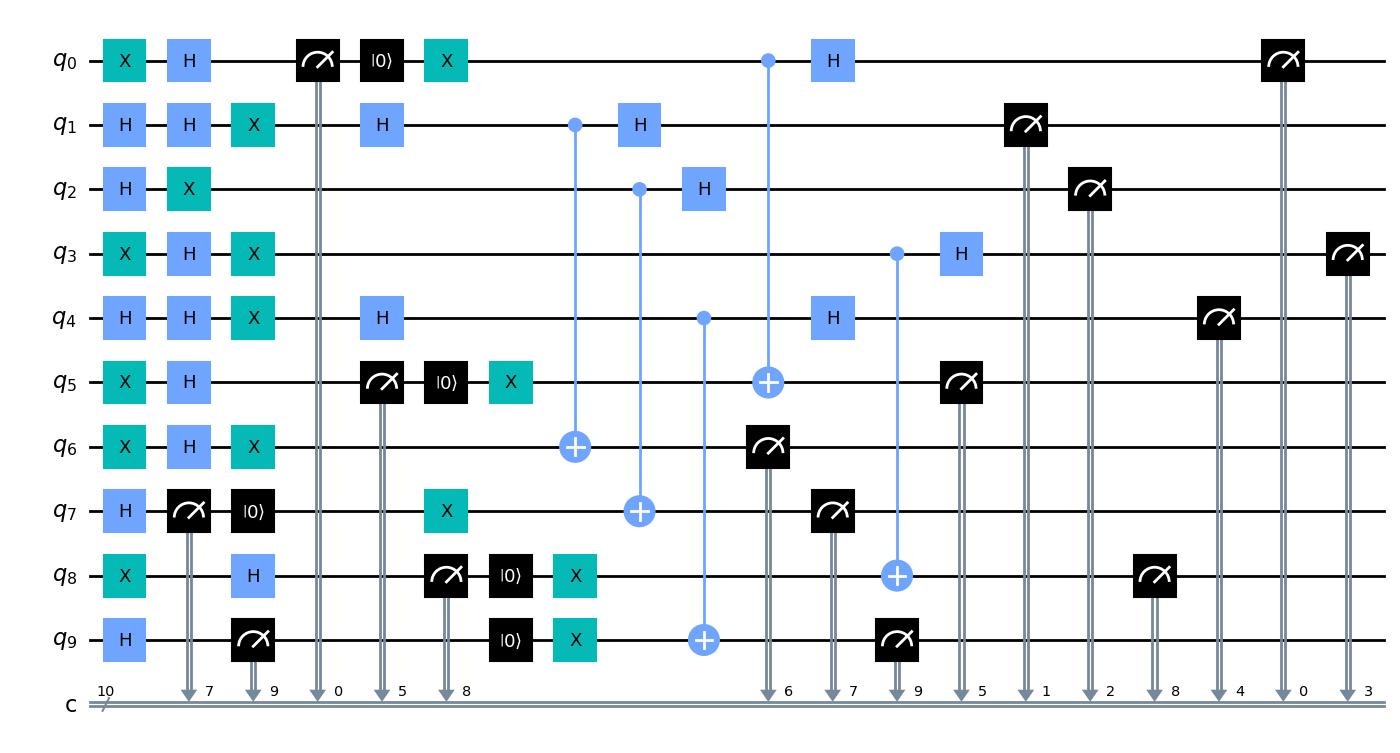

Alice operations: ['SIFT', 'CTRL', 'CTRL', 'CTRL', 'CTRL']
Bob operations  : ['SIFT', 'CTRL', 'SIFT', 'SIFT', 'SIFT']
Alice's final measurement result: [0]
Bob's final measurement result  : [1, 1, 0, 0]
Presence of Eavesdropper : False
Alice's raw key  : [0]
Bob's derived key: [1]


In [23]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer
import numpy as np

def prepare_initial_state(qc, qubit, state):
    if state == '+':
        qc.h(qubit)  # Hadamard gate to prepare |+⟩ state
    elif state == '-':
        qc.x(qubit)
        qc.h(qubit)  # Hadamard gate followed by X gate to prepare |−⟩ state

def create_msqkd_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits * 2, num_qubits * 2)  # 2 * num_qubits qubits and classical bits
    operations = []

    for i in range(num_qubits):
        # Step 1: TP generates single photons in X-basis (|+⟩ or |−⟩)
        tp_state_alice = np.random.choice(['+', '-'])
        tp_state_bob = np.random.choice(['+', '-'])

        prepare_initial_state(qc, i, tp_state_alice)  # Prepare state for Alice
        prepare_initial_state(qc, num_qubits + i, tp_state_bob)  # Prepare state for Bob

        # Step 2: Alice and Bob perform their operations
        # Randomly choose between SIFT and CTRL for each qubit
        alice_operation = np.random.choice(['SIFT', 'CTRL'])
        bob_operation = np.random.choice(['SIFT', 'CTRL'])
        operations.append((alice_operation, bob_operation))

        if alice_operation == 'SIFT':
            qc.measure(i, i)  # SIFT operation: Measure qubit in Z-basis
            qc.reset(i)
            qc.x(i)
        else:  # CTRL operation: Replace photon
            replace_state = np.random.choice(['X', 'Z'])
            if replace_state == 'X':
                qc.h(i)
            qc.x(i)
            if replace_state == 'X':
                qc.h(i)

        if bob_operation == 'SIFT':
            qc.measure(num_qubits + i, num_qubits + i)  # SIFT operation: Measure qubit in Z-basis
            qc.reset(num_qubits + i)
            qc.x(num_qubits + i)
        else:  # CTRL operation: Replace photon
            replace_state = np.random.choice(['X', 'Z'])
            if replace_state == 'X':
                qc.h(num_qubits + i)
            qc.x(num_qubits + i)
            if replace_state == 'X':
                qc.h(num_qubits + i)

        # Step 4: TP performs Bell state measurement
        qc.cx(i, num_qubits + i)  # CNOT gate with Alice's qubit as control and Bob's qubit as target
        qc.h(i)  # Hadamard gate on Alice's qubit
        qc.measure([i, num_qubits + i], [i, num_qubits + i])  # Measure qubits in Z-basis

    return qc, operations

# Create and visualize the quantum circuit
num_qubits = 5
qc, operations = create_msqkd_circuit(num_qubits)
print("Quantum Circuit:")
display(qc.draw(output='mpl', style ='Clifford', fold = 40))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = qiskit.transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1)
result = job.result()
counts = result.get_counts()

# Display the results
plot_histogram(counts)

# Format operations for display
alice_ops = [op[0] for op in operations]
bob_ops = [op[1] for op in operations]
print(f"Alice operations: {alice_ops}")
print(f"Bob operations  : {bob_ops}")

# Process the Bell measurement results
bell_results = ['00', '01', '10', '11']
alice_measurements = []
bob_measurements = []
bell_measurement_results = []
raw_key = []
derived_key = []

for key, count in counts.items():
    # Convert the key (which is a string) to a list of integers
    bits = [int(bit) for bit in key]
    for i in range(num_qubits):
        bell_result = f"{bits[i]}{bits[num_qubits + i]}"
        bell_measurement_results.append(bell_result)
        if alice_ops[i] == 'SIFT':
            alice_measurements.append(bits[i])
        if bob_ops[i] == 'SIFT':
            bob_measurements.append(bits[num_qubits + i])
        if alice_ops[i] == 'SIFT' and bob_ops[i] == 'SIFT':
            if bits[i] == bits[num_qubits + i]:
                raw_key.append(bits[i])
                derived_key.append(bits[i])
            else:
                raw_key.append(bits[i])
                derived_key.append(bits[num_qubits + i])



print(f"Alice's final measurement result: {alice_measurements}")
print(f"Bob's final measurement result  : {bob_measurements}")

# Detect presence of eavesdropper (simplified for demonstration purposes)
eavesdropper_present = any(bell_result not in bell_results for bell_result in bell_measurement_results)
print(f"Presence of Eavesdropper : {eavesdropper_present}")

print(f"Alice's raw key  : {raw_key}")
print(f"Bob's derived key: {derived_key}")


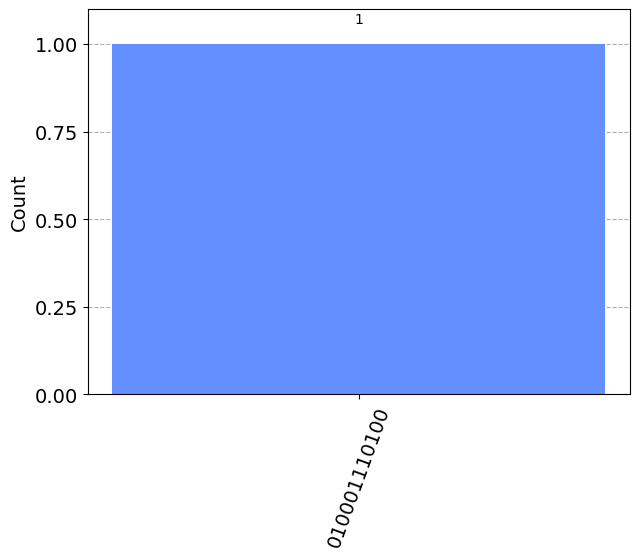

In [22]:
plot_histogram(counts)

In [7]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import csv

def prepare_initial_state(qc, qubit, state):
    if state == '+':
        qc.h(qubit)  # Hadamard gate to prepare |+⟩ state
    elif state == '-':
        qc.x(qubit)
        qc.h(qubit)  # Hadamard gate followed by X gate to prepare |−⟩ state

def create_msqkd_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits * 2, num_qubits * 2)  # 2 * num_qubits qubits and classical bits
    operations = []

    for i in range(num_qubits):
        tp_state_alice = np.random.choice(['+', '-'])
        tp_state_bob = np.random.choice(['+', '-'])

        prepare_initial_state(qc, i, tp_state_alice)  # Prepare state for Alice
        prepare_initial_state(qc, num_qubits + i, tp_state_bob)  # Prepare state for Bob

        alice_operation = np.random.choice(['SIFT', 'CTRL'])
        bob_operation = np.random.choice(['SIFT', 'CTRL'])
        operations.append((alice_operation, bob_operation))

        if alice_operation == 'SIFT':
            qc.measure(i, i)  # SIFT operation: Measure qubit in Z-basis
            qc.reset(i)
            qc.x(i)
        else:  # CTRL operation: Replace photon
            replace_state = np.random.choice(['X', 'Z'])
            if replace_state == 'X':
                qc.h(i)
            qc.x(i)
            if replace_state == 'X':
                qc.h(i)

        if bob_operation == 'SIFT':
            qc.measure(num_qubits + i, num_qubits + i)  # SIFT operation: Measure qubit in Z-basis
            qc.reset(num_qubits + i)
            qc.x(num_qubits + i)
        else:  # CTRL operation: Replace photon
            replace_state = np.random.choice(['X', 'Z'])
            if replace_state == 'X':
                qc.h(num_qubits + i)
            qc.x(num_qubits + i)
            if replace_state == 'X':
                qc.h(num_qubits + i)

        qc.cx(i, num_qubits + i)  # CNOT gate with Alice's qubit as control and Bob's qubit as target
        qc.h(i)  # Hadamard gate on Alice's qubit
        qc.measure([i, num_qubits + i], [i, num_qubits + i])  # Measure qubits in Z-basis

    return qc, operations

def run_simulation(num_qubits, noise_level):
    qc, operations = create_msqkd_circuit(num_qubits)

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = qiskit.transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1, noise_model=None)  # add noise model if needed
    result = job.result()
    counts = result.get_counts()

    # Format operations for display
    alice_ops = [op[0] for op in operations]
    bob_ops = [op[1] for op in operations]

    # Process the Bell measurement results
    bell_results = ['00', '01', '10', '11']
    alice_measurements = []
    bob_measurements = []
    bell_measurement_results = []
    raw_key = []
    derived_key = []

    for key, count in counts.items():
        bits = [int(bit) for bit in key]
        for i in range(num_qubits):
            bell_result = f"{bits[i]}{bits[num_qubits + i]}"
            bell_measurement_results.append(bell_result)
            if alice_ops[i] == 'SIFT':
                alice_measurements.append(bits[i])
            if bob_ops[i] == 'SIFT':
                bob_measurements.append(bits[num_qubits + i])
            if alice_ops[i] == 'SIFT' and bob_ops[i] == 'SIFT':
                if bits[i] == bits[num_qubits + i]:
                    raw_key.append(bits[i])
                    derived_key.append(bits[i])
                else:
                    raw_key.append(bits[i])
                    derived_key.append(bits[num_qubits + i])

    eavesdropper_present = any(bell_result not in bell_results for bell_result in bell_measurement_results)
    key_generation_rate = len(raw_key) / num_qubits
    final_key_length = len(derived_key)
    eavesdropper_detected = eavesdropper_present

    return {
        "Num_Qubits": num_qubits,
        "Noise_Level": noise_level,
        "Eavesdropper_Present": eavesdropper_present,
        "Key_Generation_Rate": key_generation_rate,
        "Final_Key_Length": final_key_length,
        "Eavesdropper_Detected": eavesdropper_detected
    }

# Run the simulation for different parameters and save the results to CSV
num_runs = 1
num_qubits_list = [5, 10]
noise_levels = [0.0, 0.1, 0.2]

with open('msqkd_simulation_results.csv', 'w', newline='') as csvfile:
    fieldnames = ["Num_Qubits", "Noise_Level", "Eavesdropper_Present", "Key_Generation_Rate", "Final_Key_Length", "Eavesdropper_Detected"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    total_simulations = num_runs * len(num_qubits_list) * len(noise_levels)
    current_simulation = 0

    for num_qubits in num_qubits_list:
        for noise_level in noise_levels:
            for run in range(num_runs):
                current_simulation += 1
                result = run_simulation(num_qubits, noise_level)
                writer.writerow(result)
                print(f"Progress: {current_simulation}/{total_simulations} simulations completed")


Progress: 1/6 simulations completed
Progress: 2/6 simulations completed
Progress: 3/6 simulations completed
Progress: 4/6 simulations completed
Progress: 5/6 simulations completed
Progress: 6/6 simulations completed


In [ ]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import csv

def prepare_initial_state(qc, qubit):
    qc.h(qubit)  # Hadamard gate to prepare |+⟩ state
    
def prepare_eve_state(qc, qubit):
    qc.x(qubit)
    qc.h(qubit)

def create_msqkd_circuit(num_qubits, eavesdropper_present=False):
    qc = QuantumCircuit(num_qubits * 2, num_qubits * 2)  # 2 * num_qubits qubits and classical bits
    operations = []
    prepared_states = []

    for i in range(num_qubits):
        tp_state_alice = '+'
        tp_state_bob = '+'

        prepare_initial_state(qc, i)  # Prepare state for Alice
        prepare_initial_state(qc, num_qubits + i)  # Prepare state for Bob

        alice_operation = np.random.choice(['SIFT', 'CTRL'])
        bob_operation = np.random.choice(['SIFT', 'CTRL'])
        operations.append((alice_operation, bob_operation))
        prepared_states.append((tp_state_alice, tp_state_bob))

        if alice_operation == 'SIFT':
            qc.reset(i)
            qc.measure(i, i)
            qc.initialize([1, 0], i)  # Initialize to |0⟩ state (Z-basis qubit)
        if bob_operation == 'SIFT':
            qc.reset(num_qubits + i)
            qc.measure(num_qubits + i, num_qubits + i)
            qc.initialize([1, 0], num_qubits + i)  # Initialize to |0⟩ state (Z-basis qubit)

        # Eavesdropper actions
        if eavesdropper_present:
            qc.h(i)  # Eve applies Hadamard gate (example of eavesdropping action)
            qc.measure(i, i)  # Eve measures the qubit
            qc.reset(i)  # Reset after measurement
            prepare_eve_state(qc, i)  # Re-prepare the state

        qc.cx(i, num_qubits + i)  # CNOT gate with Alice's qubit as control and Bob's qubit as target
        qc.h(i)  # Hadamard gate on Alice's qubit
        qc.measure([i, num_qubits + i], [i, num_qubits + i])  # Measure qubits in Z-basis

    return qc, operations, prepared_states

def run_simulation(num_qubits, noise_level, eavesdropper_present=False):
    qc, operations, prepared_states = create_msqkd_circuit(num_qubits, eavesdropper_present)

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = qiskit.transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1, noise_model=None)  # Add noise model if needed
    result = job.result()
    counts = result.get_counts()

    # Format operations for display
    alice_ops = [op[0] for op in operations]
    bob_ops = [op[1] for op in operations]

    # Process the Bell measurement results
    bell_results = ['00', '01', '10', '11']
    alice_measurements = []
    bob_measurements = []
    bell_measurement_results = []
    raw_key = []
    derived_key = []
    ctrl_discrepancies = 0
    total_ctrl_qubits = 0
    sift_correlation = 0
    total_sift_pairs = 0

    for key, count in counts.items():
        bits = [int(bit) for bit in key]
        for i in range(num_qubits):
            bell_result = f"{bits[i]}{bits[num_qubits + i]}"
            bell_measurement_results.append(bell_result)
            if alice_ops[i] == 'SIFT':
                alice_measurements.append(bits[i])
            if bob_ops[i] == 'SIFT':
                bob_measurements.append(bits[num_qubits + i])
            if alice_ops[i] == 'SIFT' and bob_ops[i] == 'SIFT':
                total_sift_pairs += 1
                if bits[i] == bits[num_qubits + i]:
                    raw_key.append(bits[i])
                    derived_key.append(bits[i])
                    sift_correlation += 1
                else:
                    raw_key.append(bits[i])
                    derived_key.append(bits[num_qubits + i])
            if alice_ops[i] == 'CTRL' and bob_ops[i] == 'CTRL':
                total_ctrl_qubits += 1
                if bits[i] != bits[num_qubits + i]:  # Checking discrepancies in CTRL qubits
                    ctrl_discrepancies += 1

    eavesdropper_detected_ctrl = ctrl_discrepancies > 0
    sift_correlation_rate = sift_correlation / total_sift_pairs if total_sift_pairs > 0 else 0
    eavesdropper_detected_sift = sift_correlation_rate < 1  # Assuming a threshold of 75%

    key_generation_rate = len(raw_key) / num_qubits
    final_key_length = len(derived_key)
    eavesdropper_detected = eavesdropper_detected_ctrl or eavesdropper_detected_sift

    return {
        "Num_Qubits": num_qubits,
        "Noise_Level": noise_level,
        "Eavesdropper_Present": eavesdropper_present,
        "Key_Generation_Rate": key_generation_rate,
        "Final_Key_Length": final_key_length,
        "Eavesdropper_Detected": eavesdropper_detected
    }

# Run the simulation for different parameters and save the results to CSV
num_runs = 1
num_qubits_list = [4,5,6,7,8,9,10,11,12,13,14]
noise_levels = [0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

with open('msqkd_sim_results.csv', 'w', newline='') as csvfile:
    fieldnames = ["Num_Qubits", "Noise_Level", "Eavesdropper_Present", "Key_Generation_Rate", "Final_Key_Length", "Eavesdropper_Detected"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    total_simulations = num_runs * len(num_qubits_list) * len(noise_levels) * 2  # Including eavesdropper and no eavesdropper cases
    current_simulation = 0

    for num_qubits in num_qubits_list:
        for noise_level in noise_levels:
            for run in range(num_runs):
                for eavesdropper_present in [False, True]:
                    current_simulation += 1
                    result = run_simulation(num_qubits, noise_level, eavesdropper_present)
                    writer.writerow(result)
                    print(f"Progress: {current_simulation}/{total_simulations} simulations completed")


Progress: 1/202752 simulations completed
Progress: 2/202752 simulations completed
Progress: 3/202752 simulations completed
Progress: 4/202752 simulations completed
Progress: 5/202752 simulations completed
Progress: 6/202752 simulations completed
Progress: 7/202752 simulations completed
Progress: 8/202752 simulations completed
Progress: 9/202752 simulations completed
Progress: 10/202752 simulations completed
Progress: 11/202752 simulations completed
Progress: 12/202752 simulations completed
Progress: 13/202752 simulations completed
Progress: 14/202752 simulations completed
Progress: 15/202752 simulations completed
Progress: 16/202752 simulations completed
Progress: 17/202752 simulations completed
Progress: 18/202752 simulations completed
Progress: 19/202752 simulations completed
Progress: 20/202752 simulations completed
Progress: 21/202752 simulations completed
Progress: 22/202752 simulations completed
Progress: 23/202752 simulations completed
Progress: 24/202752 simulations completed
P

Progress: 196/202752 simulations completed
Progress: 197/202752 simulations completed
Progress: 198/202752 simulations completed
Progress: 199/202752 simulations completed
Progress: 200/202752 simulations completed
Progress: 201/202752 simulations completed
Progress: 202/202752 simulations completed
Progress: 203/202752 simulations completed
Progress: 204/202752 simulations completed
Progress: 205/202752 simulations completed
Progress: 206/202752 simulations completed
Progress: 207/202752 simulations completed
Progress: 208/202752 simulations completed
Progress: 209/202752 simulations completed
Progress: 210/202752 simulations completed
Progress: 211/202752 simulations completed
Progress: 212/202752 simulations completed
Progress: 213/202752 simulations completed
Progress: 214/202752 simulations completed
Progress: 215/202752 simulations completed
Progress: 216/202752 simulations completed
Progress: 217/202752 simulations completed
Progress: 218/202752 simulations completed
Progress: 2

Progress: 390/202752 simulations completed
Progress: 391/202752 simulations completed
Progress: 392/202752 simulations completed
Progress: 393/202752 simulations completed
Progress: 394/202752 simulations completed
Progress: 395/202752 simulations completed
Progress: 396/202752 simulations completed
Progress: 397/202752 simulations completed
Progress: 398/202752 simulations completed
Progress: 399/202752 simulations completed
Progress: 400/202752 simulations completed
Progress: 401/202752 simulations completed
Progress: 402/202752 simulations completed
Progress: 403/202752 simulations completed
Progress: 404/202752 simulations completed
Progress: 405/202752 simulations completed
Progress: 406/202752 simulations completed
Progress: 407/202752 simulations completed
Progress: 408/202752 simulations completed
Progress: 409/202752 simulations completed
Progress: 410/202752 simulations completed
Progress: 411/202752 simulations completed
Progress: 412/202752 simulations completed
Progress: 4

Progress: 584/202752 simulations completed
Progress: 585/202752 simulations completed
Progress: 586/202752 simulations completed
Progress: 587/202752 simulations completed
Progress: 588/202752 simulations completed
Progress: 589/202752 simulations completed
Progress: 590/202752 simulations completed
Progress: 591/202752 simulations completed
Progress: 592/202752 simulations completed
Progress: 593/202752 simulations completed
Progress: 594/202752 simulations completed
Progress: 595/202752 simulations completed
Progress: 596/202752 simulations completed
Progress: 597/202752 simulations completed
Progress: 598/202752 simulations completed
Progress: 599/202752 simulations completed
Progress: 600/202752 simulations completed
Progress: 601/202752 simulations completed
Progress: 602/202752 simulations completed
Progress: 603/202752 simulations completed
Progress: 604/202752 simulations completed
Progress: 605/202752 simulations completed
Progress: 606/202752 simulations completed
Progress: 6

Progress: 776/202752 simulations completed
Progress: 777/202752 simulations completed
Progress: 778/202752 simulations completed
Progress: 779/202752 simulations completed
Progress: 780/202752 simulations completed
Progress: 781/202752 simulations completed
Progress: 782/202752 simulations completed
Progress: 783/202752 simulations completed
Progress: 784/202752 simulations completed
Progress: 785/202752 simulations completed
Progress: 786/202752 simulations completed
Progress: 787/202752 simulations completed
Progress: 788/202752 simulations completed
Progress: 789/202752 simulations completed
Progress: 790/202752 simulations completed
Progress: 791/202752 simulations completed
Progress: 792/202752 simulations completed
Progress: 793/202752 simulations completed
Progress: 794/202752 simulations completed
Progress: 795/202752 simulations completed
Progress: 796/202752 simulations completed
Progress: 797/202752 simulations completed
Progress: 798/202752 simulations completed
Progress: 7

Progress: 969/202752 simulations completed
Progress: 970/202752 simulations completed
Progress: 971/202752 simulations completed
Progress: 972/202752 simulations completed
Progress: 973/202752 simulations completed
Progress: 974/202752 simulations completed
Progress: 975/202752 simulations completed
Progress: 976/202752 simulations completed
Progress: 977/202752 simulations completed
Progress: 978/202752 simulations completed
Progress: 979/202752 simulations completed
Progress: 980/202752 simulations completed
Progress: 981/202752 simulations completed
Progress: 982/202752 simulations completed
Progress: 983/202752 simulations completed
Progress: 984/202752 simulations completed
Progress: 985/202752 simulations completed
Progress: 986/202752 simulations completed
Progress: 987/202752 simulations completed
Progress: 988/202752 simulations completed
Progress: 989/202752 simulations completed
Progress: 990/202752 simulations completed
Progress: 991/202752 simulations completed
Progress: 9

Progress: 1156/202752 simulations completed
Progress: 1157/202752 simulations completed
Progress: 1158/202752 simulations completed
Progress: 1159/202752 simulations completed
Progress: 1160/202752 simulations completed
Progress: 1161/202752 simulations completed
Progress: 1162/202752 simulations completed
Progress: 1163/202752 simulations completed
Progress: 1164/202752 simulations completed
Progress: 1165/202752 simulations completed
Progress: 1166/202752 simulations completed
Progress: 1167/202752 simulations completed
Progress: 1168/202752 simulations completed
Progress: 1169/202752 simulations completed
Progress: 1170/202752 simulations completed
Progress: 1171/202752 simulations completed
Progress: 1172/202752 simulations completed
Progress: 1173/202752 simulations completed
Progress: 1174/202752 simulations completed
Progress: 1175/202752 simulations completed
Progress: 1176/202752 simulations completed
Progress: 1177/202752 simulations completed
Progress: 1178/202752 simulation

Progress: 1344/202752 simulations completed
Progress: 1345/202752 simulations completed
Progress: 1346/202752 simulations completed
Progress: 1347/202752 simulations completed
Progress: 1348/202752 simulations completed
Progress: 1349/202752 simulations completed
Progress: 1350/202752 simulations completed
Progress: 1351/202752 simulations completed
Progress: 1352/202752 simulations completed
Progress: 1353/202752 simulations completed
Progress: 1354/202752 simulations completed
Progress: 1355/202752 simulations completed
Progress: 1356/202752 simulations completed
Progress: 1357/202752 simulations completed
Progress: 1358/202752 simulations completed
Progress: 1359/202752 simulations completed
Progress: 1360/202752 simulations completed
Progress: 1361/202752 simulations completed
Progress: 1362/202752 simulations completed
Progress: 1363/202752 simulations completed
Progress: 1364/202752 simulations completed
Progress: 1365/202752 simulations completed
Progress: 1366/202752 simulation

Progress: 1532/202752 simulations completed
Progress: 1533/202752 simulations completed
Progress: 1534/202752 simulations completed
Progress: 1535/202752 simulations completed
Progress: 1536/202752 simulations completed
Progress: 1537/202752 simulations completed
Progress: 1538/202752 simulations completed
Progress: 1539/202752 simulations completed
Progress: 1540/202752 simulations completed
Progress: 1541/202752 simulations completed
Progress: 1542/202752 simulations completed
Progress: 1543/202752 simulations completed
Progress: 1544/202752 simulations completed
Progress: 1545/202752 simulations completed
Progress: 1546/202752 simulations completed
Progress: 1547/202752 simulations completed
Progress: 1548/202752 simulations completed
Progress: 1549/202752 simulations completed
Progress: 1550/202752 simulations completed
Progress: 1551/202752 simulations completed
Progress: 1552/202752 simulations completed
Progress: 1553/202752 simulations completed
Progress: 1554/202752 simulation

Progress: 1721/202752 simulations completed
Progress: 1722/202752 simulations completed
Progress: 1723/202752 simulations completed
Progress: 1724/202752 simulations completed
Progress: 1725/202752 simulations completed
Progress: 1726/202752 simulations completed
Progress: 1727/202752 simulations completed
Progress: 1728/202752 simulations completed
Progress: 1729/202752 simulations completed
Progress: 1730/202752 simulations completed
Progress: 1731/202752 simulations completed
Progress: 1732/202752 simulations completed
Progress: 1733/202752 simulations completed
Progress: 1734/202752 simulations completed
Progress: 1735/202752 simulations completed
Progress: 1736/202752 simulations completed
Progress: 1737/202752 simulations completed
Progress: 1738/202752 simulations completed
Progress: 1739/202752 simulations completed
Progress: 1740/202752 simulations completed
Progress: 1741/202752 simulations completed
Progress: 1742/202752 simulations completed
Progress: 1743/202752 simulation

Progress: 1908/202752 simulations completed
Progress: 1909/202752 simulations completed
Progress: 1910/202752 simulations completed
Progress: 1911/202752 simulations completed
Progress: 1912/202752 simulations completed
Progress: 1913/202752 simulations completed
Progress: 1914/202752 simulations completed
Progress: 1915/202752 simulations completed
Progress: 1916/202752 simulations completed
Progress: 1917/202752 simulations completed
Progress: 1918/202752 simulations completed
Progress: 1919/202752 simulations completed
Progress: 1920/202752 simulations completed
Progress: 1921/202752 simulations completed
Progress: 1922/202752 simulations completed
Progress: 1923/202752 simulations completed
Progress: 1924/202752 simulations completed
Progress: 1925/202752 simulations completed
Progress: 1926/202752 simulations completed
Progress: 1927/202752 simulations completed
Progress: 1928/202752 simulations completed
Progress: 1929/202752 simulations completed
Progress: 1930/202752 simulation

Progress: 2098/202752 simulations completed
Progress: 2099/202752 simulations completed
Progress: 2100/202752 simulations completed
Progress: 2101/202752 simulations completed
Progress: 2102/202752 simulations completed
Progress: 2103/202752 simulations completed
Progress: 2104/202752 simulations completed
Progress: 2105/202752 simulations completed
Progress: 2106/202752 simulations completed
Progress: 2107/202752 simulations completed
Progress: 2108/202752 simulations completed
Progress: 2109/202752 simulations completed
Progress: 2110/202752 simulations completed
Progress: 2111/202752 simulations completed
Progress: 2112/202752 simulations completed
Progress: 2113/202752 simulations completed
Progress: 2114/202752 simulations completed
Progress: 2115/202752 simulations completed
Progress: 2116/202752 simulations completed
Progress: 2117/202752 simulations completed
Progress: 2118/202752 simulations completed
Progress: 2119/202752 simulations completed
Progress: 2120/202752 simulation

Progress: 2287/202752 simulations completed
Progress: 2288/202752 simulations completed
Progress: 2289/202752 simulations completed
Progress: 2290/202752 simulations completed
Progress: 2291/202752 simulations completed
Progress: 2292/202752 simulations completed
Progress: 2293/202752 simulations completed
Progress: 2294/202752 simulations completed
Progress: 2295/202752 simulations completed
Progress: 2296/202752 simulations completed
Progress: 2297/202752 simulations completed
Progress: 2298/202752 simulations completed
Progress: 2299/202752 simulations completed
Progress: 2300/202752 simulations completed
Progress: 2301/202752 simulations completed
Progress: 2302/202752 simulations completed
Progress: 2303/202752 simulations completed
Progress: 2304/202752 simulations completed
Progress: 2305/202752 simulations completed
Progress: 2306/202752 simulations completed
Progress: 2307/202752 simulations completed
Progress: 2308/202752 simulations completed
Progress: 2309/202752 simulation

Progress: 2474/202752 simulations completed
Progress: 2475/202752 simulations completed
Progress: 2476/202752 simulations completed
Progress: 2477/202752 simulations completed
Progress: 2478/202752 simulations completed
Progress: 2479/202752 simulations completed
Progress: 2480/202752 simulations completed
Progress: 2481/202752 simulations completed
Progress: 2482/202752 simulations completed
Progress: 2483/202752 simulations completed
Progress: 2484/202752 simulations completed
Progress: 2485/202752 simulations completed
Progress: 2486/202752 simulations completed
Progress: 2487/202752 simulations completed
Progress: 2488/202752 simulations completed
Progress: 2489/202752 simulations completed
Progress: 2490/202752 simulations completed
Progress: 2491/202752 simulations completed
Progress: 2492/202752 simulations completed
Progress: 2493/202752 simulations completed
Progress: 2494/202752 simulations completed
Progress: 2495/202752 simulations completed
Progress: 2496/202752 simulation

Progress: 2662/202752 simulations completed
Progress: 2663/202752 simulations completed
Progress: 2664/202752 simulations completed
Progress: 2665/202752 simulations completed
Progress: 2666/202752 simulations completed
Progress: 2667/202752 simulations completed
Progress: 2668/202752 simulations completed
Progress: 2669/202752 simulations completed
Progress: 2670/202752 simulations completed
Progress: 2671/202752 simulations completed
Progress: 2672/202752 simulations completed
Progress: 2673/202752 simulations completed
Progress: 2674/202752 simulations completed
Progress: 2675/202752 simulations completed
Progress: 2676/202752 simulations completed
Progress: 2677/202752 simulations completed
Progress: 2678/202752 simulations completed
Progress: 2679/202752 simulations completed
Progress: 2680/202752 simulations completed
Progress: 2681/202752 simulations completed
Progress: 2682/202752 simulations completed
Progress: 2683/202752 simulations completed
Progress: 2684/202752 simulation

Progress: 2852/202752 simulations completed
Progress: 2853/202752 simulations completed
Progress: 2854/202752 simulations completed
Progress: 2855/202752 simulations completed
Progress: 2856/202752 simulations completed
Progress: 2857/202752 simulations completed
Progress: 2858/202752 simulations completed
Progress: 2859/202752 simulations completed
Progress: 2860/202752 simulations completed
Progress: 2861/202752 simulations completed
Progress: 2862/202752 simulations completed
Progress: 2863/202752 simulations completed
Progress: 2864/202752 simulations completed
Progress: 2865/202752 simulations completed
Progress: 2866/202752 simulations completed
Progress: 2867/202752 simulations completed
Progress: 2868/202752 simulations completed
Progress: 2869/202752 simulations completed
Progress: 2870/202752 simulations completed
Progress: 2871/202752 simulations completed
Progress: 2872/202752 simulations completed
Progress: 2873/202752 simulations completed
Progress: 2874/202752 simulation

Progress: 3040/202752 simulations completed
Progress: 3041/202752 simulations completed
Progress: 3042/202752 simulations completed
Progress: 3043/202752 simulations completed
Progress: 3044/202752 simulations completed
Progress: 3045/202752 simulations completed
Progress: 3046/202752 simulations completed
Progress: 3047/202752 simulations completed
Progress: 3048/202752 simulations completed
Progress: 3049/202752 simulations completed
Progress: 3050/202752 simulations completed
Progress: 3051/202752 simulations completed
Progress: 3052/202752 simulations completed
Progress: 3053/202752 simulations completed
Progress: 3054/202752 simulations completed
Progress: 3055/202752 simulations completed
Progress: 3056/202752 simulations completed
Progress: 3057/202752 simulations completed
Progress: 3058/202752 simulations completed
Progress: 3059/202752 simulations completed
Progress: 3060/202752 simulations completed
Progress: 3061/202752 simulations completed
Progress: 3062/202752 simulation

Progress: 3230/202752 simulations completed
Progress: 3231/202752 simulations completed
Progress: 3232/202752 simulations completed
Progress: 3233/202752 simulations completed
Progress: 3234/202752 simulations completed
Progress: 3235/202752 simulations completed
Progress: 3236/202752 simulations completed
Progress: 3237/202752 simulations completed
Progress: 3238/202752 simulations completed
Progress: 3239/202752 simulations completed
Progress: 3240/202752 simulations completed
Progress: 3241/202752 simulations completed
Progress: 3242/202752 simulations completed
Progress: 3243/202752 simulations completed
Progress: 3244/202752 simulations completed
Progress: 3245/202752 simulations completed
Progress: 3246/202752 simulations completed
Progress: 3247/202752 simulations completed
Progress: 3248/202752 simulations completed
Progress: 3249/202752 simulations completed
Progress: 3250/202752 simulations completed
Progress: 3251/202752 simulations completed
Progress: 3252/202752 simulation

Progress: 3417/202752 simulations completed
Progress: 3418/202752 simulations completed
Progress: 3419/202752 simulations completed
Progress: 3420/202752 simulations completed
Progress: 3421/202752 simulations completed
Progress: 3422/202752 simulations completed
Progress: 3423/202752 simulations completed
Progress: 3424/202752 simulations completed
Progress: 3425/202752 simulations completed
Progress: 3426/202752 simulations completed
Progress: 3427/202752 simulations completed
Progress: 3428/202752 simulations completed
Progress: 3429/202752 simulations completed
Progress: 3430/202752 simulations completed
Progress: 3431/202752 simulations completed
Progress: 3432/202752 simulations completed
Progress: 3433/202752 simulations completed
Progress: 3434/202752 simulations completed
Progress: 3435/202752 simulations completed
Progress: 3436/202752 simulations completed
Progress: 3437/202752 simulations completed
Progress: 3438/202752 simulations completed
Progress: 3439/202752 simulation

Progress: 3608/202752 simulations completed
Progress: 3609/202752 simulations completed
Progress: 3610/202752 simulations completed
Progress: 3611/202752 simulations completed
Progress: 3612/202752 simulations completed
Progress: 3613/202752 simulations completed
Progress: 3614/202752 simulations completed
Progress: 3615/202752 simulations completed
Progress: 3616/202752 simulations completed
Progress: 3617/202752 simulations completed
Progress: 3618/202752 simulations completed
Progress: 3619/202752 simulations completed
Progress: 3620/202752 simulations completed
Progress: 3621/202752 simulations completed
Progress: 3622/202752 simulations completed
Progress: 3623/202752 simulations completed
Progress: 3624/202752 simulations completed
Progress: 3625/202752 simulations completed
Progress: 3626/202752 simulations completed
Progress: 3627/202752 simulations completed
Progress: 3628/202752 simulations completed
Progress: 3629/202752 simulations completed
Progress: 3630/202752 simulation

Progress: 3797/202752 simulations completed
Progress: 3798/202752 simulations completed
Progress: 3799/202752 simulations completed
Progress: 3800/202752 simulations completed
Progress: 3801/202752 simulations completed
Progress: 3802/202752 simulations completed
Progress: 3803/202752 simulations completed
Progress: 3804/202752 simulations completed
Progress: 3805/202752 simulations completed
Progress: 3806/202752 simulations completed
Progress: 3807/202752 simulations completed
Progress: 3808/202752 simulations completed
Progress: 3809/202752 simulations completed
Progress: 3810/202752 simulations completed
Progress: 3811/202752 simulations completed
Progress: 3812/202752 simulations completed
Progress: 3813/202752 simulations completed
Progress: 3814/202752 simulations completed
Progress: 3815/202752 simulations completed
Progress: 3816/202752 simulations completed
Progress: 3817/202752 simulations completed
Progress: 3818/202752 simulations completed
Progress: 3819/202752 simulation

Progress: 3986/202752 simulations completed
Progress: 3987/202752 simulations completed
Progress: 3988/202752 simulations completed
Progress: 3989/202752 simulations completed
Progress: 3990/202752 simulations completed
Progress: 3991/202752 simulations completed
Progress: 3992/202752 simulations completed
Progress: 3993/202752 simulations completed
Progress: 3994/202752 simulations completed
Progress: 3995/202752 simulations completed
Progress: 3996/202752 simulations completed
Progress: 3997/202752 simulations completed
Progress: 3998/202752 simulations completed
Progress: 3999/202752 simulations completed
Progress: 4000/202752 simulations completed
Progress: 4001/202752 simulations completed
Progress: 4002/202752 simulations completed
Progress: 4003/202752 simulations completed
Progress: 4004/202752 simulations completed
Progress: 4005/202752 simulations completed
Progress: 4006/202752 simulations completed
Progress: 4007/202752 simulations completed
Progress: 4008/202752 simulation

Progress: 4175/202752 simulations completed
Progress: 4176/202752 simulations completed
Progress: 4177/202752 simulations completed
Progress: 4178/202752 simulations completed
Progress: 4179/202752 simulations completed
Progress: 4180/202752 simulations completed
Progress: 4181/202752 simulations completed
Progress: 4182/202752 simulations completed
Progress: 4183/202752 simulations completed
Progress: 4184/202752 simulations completed
Progress: 4185/202752 simulations completed
Progress: 4186/202752 simulations completed
Progress: 4187/202752 simulations completed
Progress: 4188/202752 simulations completed
Progress: 4189/202752 simulations completed
Progress: 4190/202752 simulations completed
Progress: 4191/202752 simulations completed
Progress: 4192/202752 simulations completed
Progress: 4193/202752 simulations completed
Progress: 4194/202752 simulations completed
Progress: 4195/202752 simulations completed
Progress: 4196/202752 simulations completed
Progress: 4197/202752 simulation

Progress: 4362/202752 simulations completed
Progress: 4363/202752 simulations completed
Progress: 4364/202752 simulations completed
Progress: 4365/202752 simulations completed
Progress: 4366/202752 simulations completed
Progress: 4367/202752 simulations completed
Progress: 4368/202752 simulations completed
Progress: 4369/202752 simulations completed
Progress: 4370/202752 simulations completed
Progress: 4371/202752 simulations completed
Progress: 4372/202752 simulations completed
Progress: 4373/202752 simulations completed
Progress: 4374/202752 simulations completed
Progress: 4375/202752 simulations completed
Progress: 4376/202752 simulations completed
Progress: 4377/202752 simulations completed
Progress: 4378/202752 simulations completed
Progress: 4379/202752 simulations completed
Progress: 4380/202752 simulations completed
Progress: 4381/202752 simulations completed
Progress: 4382/202752 simulations completed
Progress: 4383/202752 simulations completed
Progress: 4384/202752 simulation

Progress: 4549/202752 simulations completed
Progress: 4550/202752 simulations completed
Progress: 4551/202752 simulations completed
Progress: 4552/202752 simulations completed
Progress: 4553/202752 simulations completed
Progress: 4554/202752 simulations completed
Progress: 4555/202752 simulations completed
Progress: 4556/202752 simulations completed
Progress: 4557/202752 simulations completed
Progress: 4558/202752 simulations completed
Progress: 4559/202752 simulations completed
Progress: 4560/202752 simulations completed
Progress: 4561/202752 simulations completed
Progress: 4562/202752 simulations completed
Progress: 4563/202752 simulations completed
Progress: 4564/202752 simulations completed
Progress: 4565/202752 simulations completed
Progress: 4566/202752 simulations completed
Progress: 4567/202752 simulations completed
Progress: 4568/202752 simulations completed
Progress: 4569/202752 simulations completed
Progress: 4570/202752 simulations completed
Progress: 4571/202752 simulation

Progress: 4739/202752 simulations completed
Progress: 4740/202752 simulations completed
Progress: 4741/202752 simulations completed
Progress: 4742/202752 simulations completed
Progress: 4743/202752 simulations completed
Progress: 4744/202752 simulations completed
Progress: 4745/202752 simulations completed
Progress: 4746/202752 simulations completed
Progress: 4747/202752 simulations completed
Progress: 4748/202752 simulations completed
Progress: 4749/202752 simulations completed
Progress: 4750/202752 simulations completed
Progress: 4751/202752 simulations completed
Progress: 4752/202752 simulations completed
Progress: 4753/202752 simulations completed
Progress: 4754/202752 simulations completed
Progress: 4755/202752 simulations completed
Progress: 4756/202752 simulations completed
Progress: 4757/202752 simulations completed
Progress: 4758/202752 simulations completed
Progress: 4759/202752 simulations completed
Progress: 4760/202752 simulations completed
Progress: 4761/202752 simulation

Progress: 4928/202752 simulations completed
Progress: 4929/202752 simulations completed
Progress: 4930/202752 simulations completed
Progress: 4931/202752 simulations completed
Progress: 4932/202752 simulations completed
Progress: 4933/202752 simulations completed
Progress: 4934/202752 simulations completed
Progress: 4935/202752 simulations completed
Progress: 4936/202752 simulations completed
Progress: 4937/202752 simulations completed
Progress: 4938/202752 simulations completed
Progress: 4939/202752 simulations completed
Progress: 4940/202752 simulations completed
Progress: 4941/202752 simulations completed
Progress: 4942/202752 simulations completed
Progress: 4943/202752 simulations completed
Progress: 4944/202752 simulations completed
Progress: 4945/202752 simulations completed
Progress: 4946/202752 simulations completed
Progress: 4947/202752 simulations completed
Progress: 4948/202752 simulations completed
Progress: 4949/202752 simulations completed
Progress: 4950/202752 simulation

Progress: 5116/202752 simulations completed
Progress: 5117/202752 simulations completed
Progress: 5118/202752 simulations completed
Progress: 5119/202752 simulations completed
Progress: 5120/202752 simulations completed
Progress: 5121/202752 simulations completed
Progress: 5122/202752 simulations completed
Progress: 5123/202752 simulations completed
Progress: 5124/202752 simulations completed
Progress: 5125/202752 simulations completed
Progress: 5126/202752 simulations completed
Progress: 5127/202752 simulations completed
Progress: 5128/202752 simulations completed
Progress: 5129/202752 simulations completed
Progress: 5130/202752 simulations completed
Progress: 5131/202752 simulations completed
Progress: 5132/202752 simulations completed
Progress: 5133/202752 simulations completed
Progress: 5134/202752 simulations completed
Progress: 5135/202752 simulations completed
Progress: 5136/202752 simulations completed
Progress: 5137/202752 simulations completed
Progress: 5138/202752 simulation

Progress: 5306/202752 simulations completed
Progress: 5307/202752 simulations completed
Progress: 5308/202752 simulations completed
Progress: 5309/202752 simulations completed
Progress: 5310/202752 simulations completed
Progress: 5311/202752 simulations completed
Progress: 5312/202752 simulations completed
Progress: 5313/202752 simulations completed
Progress: 5314/202752 simulations completed
Progress: 5315/202752 simulations completed
Progress: 5316/202752 simulations completed
Progress: 5317/202752 simulations completed
Progress: 5318/202752 simulations completed
Progress: 5319/202752 simulations completed
Progress: 5320/202752 simulations completed
Progress: 5321/202752 simulations completed
Progress: 5322/202752 simulations completed
Progress: 5323/202752 simulations completed
Progress: 5324/202752 simulations completed
Progress: 5325/202752 simulations completed
Progress: 5326/202752 simulations completed
Progress: 5327/202752 simulations completed
Progress: 5328/202752 simulation

Progress: 5496/202752 simulations completed
Progress: 5497/202752 simulations completed
Progress: 5498/202752 simulations completed
Progress: 5499/202752 simulations completed
Progress: 5500/202752 simulations completed
Progress: 5501/202752 simulations completed
Progress: 5502/202752 simulations completed
Progress: 5503/202752 simulations completed
Progress: 5504/202752 simulations completed
Progress: 5505/202752 simulations completed
Progress: 5506/202752 simulations completed
Progress: 5507/202752 simulations completed
Progress: 5508/202752 simulations completed
Progress: 5509/202752 simulations completed
Progress: 5510/202752 simulations completed
Progress: 5511/202752 simulations completed
Progress: 5512/202752 simulations completed
Progress: 5513/202752 simulations completed
Progress: 5514/202752 simulations completed
Progress: 5515/202752 simulations completed
Progress: 5516/202752 simulations completed
Progress: 5517/202752 simulations completed
Progress: 5518/202752 simulation

Progress: 5686/202752 simulations completed
Progress: 5687/202752 simulations completed
Progress: 5688/202752 simulations completed
Progress: 5689/202752 simulations completed
Progress: 5690/202752 simulations completed
Progress: 5691/202752 simulations completed
Progress: 5692/202752 simulations completed
Progress: 5693/202752 simulations completed
Progress: 5694/202752 simulations completed
Progress: 5695/202752 simulations completed
Progress: 5696/202752 simulations completed
Progress: 5697/202752 simulations completed
Progress: 5698/202752 simulations completed
Progress: 5699/202752 simulations completed
Progress: 5700/202752 simulations completed
Progress: 5701/202752 simulations completed
Progress: 5702/202752 simulations completed
Progress: 5703/202752 simulations completed
Progress: 5704/202752 simulations completed
Progress: 5705/202752 simulations completed
Progress: 5706/202752 simulations completed
Progress: 5707/202752 simulations completed
Progress: 5708/202752 simulation

Progress: 5874/202752 simulations completed
Progress: 5875/202752 simulations completed
Progress: 5876/202752 simulations completed
Progress: 5877/202752 simulations completed
Progress: 5878/202752 simulations completed
Progress: 5879/202752 simulations completed
Progress: 5880/202752 simulations completed
Progress: 5881/202752 simulations completed
Progress: 5882/202752 simulations completed
Progress: 5883/202752 simulations completed
Progress: 5884/202752 simulations completed
Progress: 5885/202752 simulations completed
Progress: 5886/202752 simulations completed
Progress: 5887/202752 simulations completed
Progress: 5888/202752 simulations completed
Progress: 5889/202752 simulations completed
Progress: 5890/202752 simulations completed
Progress: 5891/202752 simulations completed
Progress: 5892/202752 simulations completed
Progress: 5893/202752 simulations completed
Progress: 5894/202752 simulations completed
Progress: 5895/202752 simulations completed
Progress: 5896/202752 simulation

Progress: 6063/202752 simulations completed
Progress: 6064/202752 simulations completed
Progress: 6065/202752 simulations completed
Progress: 6066/202752 simulations completed
Progress: 6067/202752 simulations completed
Progress: 6068/202752 simulations completed
Progress: 6069/202752 simulations completed
Progress: 6070/202752 simulations completed
Progress: 6071/202752 simulations completed
Progress: 6072/202752 simulations completed
Progress: 6073/202752 simulations completed
Progress: 6074/202752 simulations completed
Progress: 6075/202752 simulations completed
Progress: 6076/202752 simulations completed
Progress: 6077/202752 simulations completed
Progress: 6078/202752 simulations completed
Progress: 6079/202752 simulations completed
Progress: 6080/202752 simulations completed
Progress: 6081/202752 simulations completed
Progress: 6082/202752 simulations completed
Progress: 6083/202752 simulations completed
Progress: 6084/202752 simulations completed
Progress: 6085/202752 simulation

Progress: 6250/202752 simulations completed
Progress: 6251/202752 simulations completed
Progress: 6252/202752 simulations completed
Progress: 6253/202752 simulations completed
Progress: 6254/202752 simulations completed
Progress: 6255/202752 simulations completed
Progress: 6256/202752 simulations completed
Progress: 6257/202752 simulations completed
Progress: 6258/202752 simulations completed
Progress: 6259/202752 simulations completed
Progress: 6260/202752 simulations completed
Progress: 6261/202752 simulations completed
Progress: 6262/202752 simulations completed
Progress: 6263/202752 simulations completed
Progress: 6264/202752 simulations completed
Progress: 6265/202752 simulations completed
Progress: 6266/202752 simulations completed
Progress: 6267/202752 simulations completed
Progress: 6268/202752 simulations completed
Progress: 6269/202752 simulations completed
Progress: 6270/202752 simulations completed
Progress: 6271/202752 simulations completed
Progress: 6272/202752 simulation

Progress: 6437/202752 simulations completed
Progress: 6438/202752 simulations completed
Progress: 6439/202752 simulations completed
Progress: 6440/202752 simulations completed
Progress: 6441/202752 simulations completed
Progress: 6442/202752 simulations completed
Progress: 6443/202752 simulations completed
Progress: 6444/202752 simulations completed
Progress: 6445/202752 simulations completed
Progress: 6446/202752 simulations completed
Progress: 6447/202752 simulations completed
Progress: 6448/202752 simulations completed
Progress: 6449/202752 simulations completed
Progress: 6450/202752 simulations completed
Progress: 6451/202752 simulations completed
Progress: 6452/202752 simulations completed
Progress: 6453/202752 simulations completed
Progress: 6454/202752 simulations completed
Progress: 6455/202752 simulations completed
Progress: 6456/202752 simulations completed
Progress: 6457/202752 simulations completed
Progress: 6458/202752 simulations completed
Progress: 6459/202752 simulation

Progress: 6625/202752 simulations completed
Progress: 6626/202752 simulations completed
Progress: 6627/202752 simulations completed
Progress: 6628/202752 simulations completed
Progress: 6629/202752 simulations completed
Progress: 6630/202752 simulations completed
Progress: 6631/202752 simulations completed
Progress: 6632/202752 simulations completed
Progress: 6633/202752 simulations completed
Progress: 6634/202752 simulations completed
Progress: 6635/202752 simulations completed
Progress: 6636/202752 simulations completed
Progress: 6637/202752 simulations completed
Progress: 6638/202752 simulations completed
Progress: 6639/202752 simulations completed
Progress: 6640/202752 simulations completed
Progress: 6641/202752 simulations completed
Progress: 6642/202752 simulations completed
Progress: 6643/202752 simulations completed
Progress: 6644/202752 simulations completed
Progress: 6645/202752 simulations completed
Progress: 6646/202752 simulations completed
Progress: 6647/202752 simulation

Progress: 6813/202752 simulations completed
Progress: 6814/202752 simulations completed
Progress: 6815/202752 simulations completed
Progress: 6816/202752 simulations completed
Progress: 6817/202752 simulations completed
Progress: 6818/202752 simulations completed
Progress: 6819/202752 simulations completed
Progress: 6820/202752 simulations completed
Progress: 6821/202752 simulations completed
Progress: 6822/202752 simulations completed
Progress: 6823/202752 simulations completed
Progress: 6824/202752 simulations completed
Progress: 6825/202752 simulations completed
Progress: 6826/202752 simulations completed
Progress: 6827/202752 simulations completed
Progress: 6828/202752 simulations completed
Progress: 6829/202752 simulations completed
Progress: 6830/202752 simulations completed
Progress: 6831/202752 simulations completed
Progress: 6832/202752 simulations completed
Progress: 6833/202752 simulations completed
Progress: 6834/202752 simulations completed
Progress: 6835/202752 simulation

Progress: 7002/202752 simulations completed
Progress: 7003/202752 simulations completed
Progress: 7004/202752 simulations completed
Progress: 7005/202752 simulations completed
Progress: 7006/202752 simulations completed
Progress: 7007/202752 simulations completed
Progress: 7008/202752 simulations completed
Progress: 7009/202752 simulations completed
Progress: 7010/202752 simulations completed
Progress: 7011/202752 simulations completed
Progress: 7012/202752 simulations completed
Progress: 7013/202752 simulations completed
Progress: 7014/202752 simulations completed
Progress: 7015/202752 simulations completed
Progress: 7016/202752 simulations completed
Progress: 7017/202752 simulations completed
Progress: 7018/202752 simulations completed
Progress: 7019/202752 simulations completed
Progress: 7020/202752 simulations completed
Progress: 7021/202752 simulations completed
Progress: 7022/202752 simulations completed
Progress: 7023/202752 simulations completed
Progress: 7024/202752 simulation

Progress: 7190/202752 simulations completed
Progress: 7191/202752 simulations completed
Progress: 7192/202752 simulations completed
Progress: 7193/202752 simulations completed
Progress: 7194/202752 simulations completed
Progress: 7195/202752 simulations completed
Progress: 7196/202752 simulations completed
Progress: 7197/202752 simulations completed
Progress: 7198/202752 simulations completed
Progress: 7199/202752 simulations completed
Progress: 7200/202752 simulations completed
Progress: 7201/202752 simulations completed
Progress: 7202/202752 simulations completed
Progress: 7203/202752 simulations completed
Progress: 7204/202752 simulations completed
Progress: 7205/202752 simulations completed
Progress: 7206/202752 simulations completed
Progress: 7207/202752 simulations completed
Progress: 7208/202752 simulations completed
Progress: 7209/202752 simulations completed
Progress: 7210/202752 simulations completed
Progress: 7211/202752 simulations completed
Progress: 7212/202752 simulation

Progress: 7380/202752 simulations completed
Progress: 7381/202752 simulations completed
Progress: 7382/202752 simulations completed
Progress: 7383/202752 simulations completed
Progress: 7384/202752 simulations completed
Progress: 7385/202752 simulations completed
Progress: 7386/202752 simulations completed
Progress: 7387/202752 simulations completed
Progress: 7388/202752 simulations completed
Progress: 7389/202752 simulations completed
Progress: 7390/202752 simulations completed
Progress: 7391/202752 simulations completed
Progress: 7392/202752 simulations completed
Progress: 7393/202752 simulations completed
Progress: 7394/202752 simulations completed
Progress: 7395/202752 simulations completed
Progress: 7396/202752 simulations completed
Progress: 7397/202752 simulations completed
Progress: 7398/202752 simulations completed
Progress: 7399/202752 simulations completed
Progress: 7400/202752 simulations completed
Progress: 7401/202752 simulations completed
Progress: 7402/202752 simulation

Progress: 7568/202752 simulations completed
Progress: 7569/202752 simulations completed
Progress: 7570/202752 simulations completed
Progress: 7571/202752 simulations completed
Progress: 7572/202752 simulations completed
Progress: 7573/202752 simulations completed
Progress: 7574/202752 simulations completed
Progress: 7575/202752 simulations completed
Progress: 7576/202752 simulations completed
Progress: 7577/202752 simulations completed
Progress: 7578/202752 simulations completed
Progress: 7579/202752 simulations completed
Progress: 7580/202752 simulations completed
Progress: 7581/202752 simulations completed
Progress: 7582/202752 simulations completed
Progress: 7583/202752 simulations completed
Progress: 7584/202752 simulations completed
Progress: 7585/202752 simulations completed
Progress: 7586/202752 simulations completed
Progress: 7587/202752 simulations completed
Progress: 7588/202752 simulations completed
Progress: 7589/202752 simulations completed
Progress: 7590/202752 simulation

Progress: 7755/202752 simulations completed
Progress: 7756/202752 simulations completed
Progress: 7757/202752 simulations completed
Progress: 7758/202752 simulations completed
Progress: 7759/202752 simulations completed
Progress: 7760/202752 simulations completed
Progress: 7761/202752 simulations completed
Progress: 7762/202752 simulations completed
Progress: 7763/202752 simulations completed
Progress: 7764/202752 simulations completed
Progress: 7765/202752 simulations completed
Progress: 7766/202752 simulations completed
Progress: 7767/202752 simulations completed
Progress: 7768/202752 simulations completed
Progress: 7769/202752 simulations completed
Progress: 7770/202752 simulations completed
Progress: 7771/202752 simulations completed
Progress: 7772/202752 simulations completed
Progress: 7773/202752 simulations completed
Progress: 7774/202752 simulations completed
Progress: 7775/202752 simulations completed
Progress: 7776/202752 simulations completed
Progress: 7777/202752 simulation

Progress: 7944/202752 simulations completed
Progress: 7945/202752 simulations completed
Progress: 7946/202752 simulations completed
Progress: 7947/202752 simulations completed
Progress: 7948/202752 simulations completed
Progress: 7949/202752 simulations completed
Progress: 7950/202752 simulations completed
Progress: 7951/202752 simulations completed
Progress: 7952/202752 simulations completed
Progress: 7953/202752 simulations completed
Progress: 7954/202752 simulations completed
Progress: 7955/202752 simulations completed
Progress: 7956/202752 simulations completed
Progress: 7957/202752 simulations completed
Progress: 7958/202752 simulations completed
Progress: 7959/202752 simulations completed
Progress: 7960/202752 simulations completed
Progress: 7961/202752 simulations completed
Progress: 7962/202752 simulations completed
Progress: 7963/202752 simulations completed
Progress: 7964/202752 simulations completed
Progress: 7965/202752 simulations completed
Progress: 7966/202752 simulation

Progress: 8133/202752 simulations completed
Progress: 8134/202752 simulations completed
Progress: 8135/202752 simulations completed
Progress: 8136/202752 simulations completed
Progress: 8137/202752 simulations completed
Progress: 8138/202752 simulations completed
Progress: 8139/202752 simulations completed
Progress: 8140/202752 simulations completed
Progress: 8141/202752 simulations completed
Progress: 8142/202752 simulations completed
Progress: 8143/202752 simulations completed
Progress: 8144/202752 simulations completed
Progress: 8145/202752 simulations completed
Progress: 8146/202752 simulations completed
Progress: 8147/202752 simulations completed
Progress: 8148/202752 simulations completed
Progress: 8149/202752 simulations completed
Progress: 8150/202752 simulations completed
Progress: 8151/202752 simulations completed
Progress: 8152/202752 simulations completed
Progress: 8153/202752 simulations completed
Progress: 8154/202752 simulations completed
Progress: 8155/202752 simulation

Progress: 8321/202752 simulations completed
Progress: 8322/202752 simulations completed
Progress: 8323/202752 simulations completed
Progress: 8324/202752 simulations completed
Progress: 8325/202752 simulations completed
Progress: 8326/202752 simulations completed
Progress: 8327/202752 simulations completed
Progress: 8328/202752 simulations completed
Progress: 8329/202752 simulations completed
Progress: 8330/202752 simulations completed
Progress: 8331/202752 simulations completed
Progress: 8332/202752 simulations completed
Progress: 8333/202752 simulations completed
Progress: 8334/202752 simulations completed
Progress: 8335/202752 simulations completed
Progress: 8336/202752 simulations completed
Progress: 8337/202752 simulations completed
Progress: 8338/202752 simulations completed
Progress: 8339/202752 simulations completed
Progress: 8340/202752 simulations completed
Progress: 8341/202752 simulations completed
Progress: 8342/202752 simulations completed
Progress: 8343/202752 simulation

Progress: 8509/202752 simulations completed
Progress: 8510/202752 simulations completed
Progress: 8511/202752 simulations completed
Progress: 8512/202752 simulations completed
Progress: 8513/202752 simulations completed
Progress: 8514/202752 simulations completed
Progress: 8515/202752 simulations completed
Progress: 8516/202752 simulations completed
Progress: 8517/202752 simulations completed
Progress: 8518/202752 simulations completed
Progress: 8519/202752 simulations completed
Progress: 8520/202752 simulations completed
Progress: 8521/202752 simulations completed
Progress: 8522/202752 simulations completed
Progress: 8523/202752 simulations completed
Progress: 8524/202752 simulations completed
Progress: 8525/202752 simulations completed
Progress: 8526/202752 simulations completed
Progress: 8527/202752 simulations completed
Progress: 8528/202752 simulations completed
Progress: 8529/202752 simulations completed
Progress: 8530/202752 simulations completed
Progress: 8531/202752 simulation

Progress: 8696/202752 simulations completed
Progress: 8697/202752 simulations completed
Progress: 8698/202752 simulations completed
Progress: 8699/202752 simulations completed
Progress: 8700/202752 simulations completed
Progress: 8701/202752 simulations completed
Progress: 8702/202752 simulations completed
Progress: 8703/202752 simulations completed
Progress: 8704/202752 simulations completed
Progress: 8705/202752 simulations completed
Progress: 8706/202752 simulations completed
Progress: 8707/202752 simulations completed
Progress: 8708/202752 simulations completed
Progress: 8709/202752 simulations completed
Progress: 8710/202752 simulations completed
Progress: 8711/202752 simulations completed
Progress: 8712/202752 simulations completed
Progress: 8713/202752 simulations completed
Progress: 8714/202752 simulations completed
Progress: 8715/202752 simulations completed
Progress: 8716/202752 simulations completed
Progress: 8717/202752 simulations completed
Progress: 8718/202752 simulation

Progress: 8884/202752 simulations completed
Progress: 8885/202752 simulations completed
Progress: 8886/202752 simulations completed
Progress: 8887/202752 simulations completed
Progress: 8888/202752 simulations completed
Progress: 8889/202752 simulations completed
Progress: 8890/202752 simulations completed
Progress: 8891/202752 simulations completed
Progress: 8892/202752 simulations completed
Progress: 8893/202752 simulations completed
Progress: 8894/202752 simulations completed
Progress: 8895/202752 simulations completed
Progress: 8896/202752 simulations completed
Progress: 8897/202752 simulations completed
Progress: 8898/202752 simulations completed
Progress: 8899/202752 simulations completed
Progress: 8900/202752 simulations completed
Progress: 8901/202752 simulations completed
Progress: 8902/202752 simulations completed
Progress: 8903/202752 simulations completed
Progress: 8904/202752 simulations completed
Progress: 8905/202752 simulations completed
Progress: 8906/202752 simulation

Progress: 9072/202752 simulations completed
Progress: 9073/202752 simulations completed
Progress: 9074/202752 simulations completed
Progress: 9075/202752 simulations completed
Progress: 9076/202752 simulations completed
Progress: 9077/202752 simulations completed
Progress: 9078/202752 simulations completed
Progress: 9079/202752 simulations completed
Progress: 9080/202752 simulations completed
Progress: 9081/202752 simulations completed
Progress: 9082/202752 simulations completed
Progress: 9083/202752 simulations completed
Progress: 9084/202752 simulations completed
Progress: 9085/202752 simulations completed
Progress: 9086/202752 simulations completed
Progress: 9087/202752 simulations completed
Progress: 9088/202752 simulations completed
Progress: 9089/202752 simulations completed
Progress: 9090/202752 simulations completed
Progress: 9091/202752 simulations completed
Progress: 9092/202752 simulations completed
Progress: 9093/202752 simulations completed
Progress: 9094/202752 simulation

Progress: 9261/202752 simulations completed
Progress: 9262/202752 simulations completed
Progress: 9263/202752 simulations completed
Progress: 9264/202752 simulations completed
Progress: 9265/202752 simulations completed
Progress: 9266/202752 simulations completed
Progress: 9267/202752 simulations completed
Progress: 9268/202752 simulations completed
Progress: 9269/202752 simulations completed
Progress: 9270/202752 simulations completed
Progress: 9271/202752 simulations completed
Progress: 9272/202752 simulations completed
Progress: 9273/202752 simulations completed
Progress: 9274/202752 simulations completed
Progress: 9275/202752 simulations completed
Progress: 9276/202752 simulations completed
Progress: 9277/202752 simulations completed
Progress: 9278/202752 simulations completed
Progress: 9279/202752 simulations completed
Progress: 9280/202752 simulations completed
Progress: 9281/202752 simulations completed
Progress: 9282/202752 simulations completed
Progress: 9283/202752 simulation

Progress: 9450/202752 simulations completed
Progress: 9451/202752 simulations completed
Progress: 9452/202752 simulations completed
Progress: 9453/202752 simulations completed
Progress: 9454/202752 simulations completed
Progress: 9455/202752 simulations completed
Progress: 9456/202752 simulations completed
Progress: 9457/202752 simulations completed
Progress: 9458/202752 simulations completed
Progress: 9459/202752 simulations completed
Progress: 9460/202752 simulations completed
Progress: 9461/202752 simulations completed
Progress: 9462/202752 simulations completed
Progress: 9463/202752 simulations completed
Progress: 9464/202752 simulations completed
Progress: 9465/202752 simulations completed
Progress: 9466/202752 simulations completed
Progress: 9467/202752 simulations completed
Progress: 9468/202752 simulations completed
Progress: 9469/202752 simulations completed
Progress: 9470/202752 simulations completed
Progress: 9471/202752 simulations completed
Progress: 9472/202752 simulation

Progress: 9637/202752 simulations completed
Progress: 9638/202752 simulations completed
Progress: 9639/202752 simulations completed
Progress: 9640/202752 simulations completed
Progress: 9641/202752 simulations completed
Progress: 9642/202752 simulations completed
Progress: 9643/202752 simulations completed
Progress: 9644/202752 simulations completed
Progress: 9645/202752 simulations completed
Progress: 9646/202752 simulations completed
Progress: 9647/202752 simulations completed
Progress: 9648/202752 simulations completed
Progress: 9649/202752 simulations completed
Progress: 9650/202752 simulations completed
Progress: 9651/202752 simulations completed
Progress: 9652/202752 simulations completed
Progress: 9653/202752 simulations completed
Progress: 9654/202752 simulations completed
Progress: 9655/202752 simulations completed
Progress: 9656/202752 simulations completed
Progress: 9657/202752 simulations completed
Progress: 9658/202752 simulations completed
Progress: 9659/202752 simulation

Progress: 9826/202752 simulations completed
Progress: 9827/202752 simulations completed
Progress: 9828/202752 simulations completed
Progress: 9829/202752 simulations completed
Progress: 9830/202752 simulations completed
Progress: 9831/202752 simulations completed
Progress: 9832/202752 simulations completed
Progress: 9833/202752 simulations completed
Progress: 9834/202752 simulations completed
Progress: 9835/202752 simulations completed
Progress: 9836/202752 simulations completed
Progress: 9837/202752 simulations completed
Progress: 9838/202752 simulations completed
Progress: 9839/202752 simulations completed
Progress: 9840/202752 simulations completed
Progress: 9841/202752 simulations completed
Progress: 9842/202752 simulations completed
Progress: 9843/202752 simulations completed
Progress: 9844/202752 simulations completed
Progress: 9845/202752 simulations completed
Progress: 9846/202752 simulations completed
Progress: 9847/202752 simulations completed
Progress: 9848/202752 simulation

Progress: 10012/202752 simulations completed
Progress: 10013/202752 simulations completed
Progress: 10014/202752 simulations completed
Progress: 10015/202752 simulations completed
Progress: 10016/202752 simulations completed
Progress: 10017/202752 simulations completed
Progress: 10018/202752 simulations completed
Progress: 10019/202752 simulations completed
Progress: 10020/202752 simulations completed
Progress: 10021/202752 simulations completed
Progress: 10022/202752 simulations completed
Progress: 10023/202752 simulations completed
Progress: 10024/202752 simulations completed
Progress: 10025/202752 simulations completed
Progress: 10026/202752 simulations completed
Progress: 10027/202752 simulations completed
Progress: 10028/202752 simulations completed
Progress: 10029/202752 simulations completed
Progress: 10030/202752 simulations completed
Progress: 10031/202752 simulations completed
Progress: 10032/202752 simulations completed
Progress: 10033/202752 simulations completed
Progress: 

Progress: 10195/202752 simulations completed
Progress: 10196/202752 simulations completed
Progress: 10197/202752 simulations completed
Progress: 10198/202752 simulations completed
Progress: 10199/202752 simulations completed
Progress: 10200/202752 simulations completed
Progress: 10201/202752 simulations completed
Progress: 10202/202752 simulations completed
Progress: 10203/202752 simulations completed
Progress: 10204/202752 simulations completed
Progress: 10205/202752 simulations completed
Progress: 10206/202752 simulations completed
Progress: 10207/202752 simulations completed
Progress: 10208/202752 simulations completed
Progress: 10209/202752 simulations completed
Progress: 10210/202752 simulations completed
Progress: 10211/202752 simulations completed
Progress: 10212/202752 simulations completed
Progress: 10213/202752 simulations completed
Progress: 10214/202752 simulations completed
Progress: 10215/202752 simulations completed
Progress: 10216/202752 simulations completed
Progress: 

Progress: 10379/202752 simulations completed
Progress: 10380/202752 simulations completed
Progress: 10381/202752 simulations completed
Progress: 10382/202752 simulations completed
Progress: 10383/202752 simulations completed
Progress: 10384/202752 simulations completed
Progress: 10385/202752 simulations completed
Progress: 10386/202752 simulations completed
Progress: 10387/202752 simulations completed
Progress: 10388/202752 simulations completed
Progress: 10389/202752 simulations completed
Progress: 10390/202752 simulations completed
Progress: 10391/202752 simulations completed
Progress: 10392/202752 simulations completed
Progress: 10393/202752 simulations completed
Progress: 10394/202752 simulations completed
Progress: 10395/202752 simulations completed
Progress: 10396/202752 simulations completed
Progress: 10397/202752 simulations completed
Progress: 10398/202752 simulations completed
Progress: 10399/202752 simulations completed
Progress: 10400/202752 simulations completed
Progress: 

Progress: 10563/202752 simulations completed
Progress: 10564/202752 simulations completed
Progress: 10565/202752 simulations completed
Progress: 10566/202752 simulations completed
Progress: 10567/202752 simulations completed
Progress: 10568/202752 simulations completed
Progress: 10569/202752 simulations completed
Progress: 10570/202752 simulations completed
Progress: 10571/202752 simulations completed
Progress: 10572/202752 simulations completed
Progress: 10573/202752 simulations completed
Progress: 10574/202752 simulations completed
Progress: 10575/202752 simulations completed
Progress: 10576/202752 simulations completed
Progress: 10577/202752 simulations completed
Progress: 10578/202752 simulations completed
Progress: 10579/202752 simulations completed
Progress: 10580/202752 simulations completed
Progress: 10581/202752 simulations completed
Progress: 10582/202752 simulations completed
Progress: 10583/202752 simulations completed
Progress: 10584/202752 simulations completed
Progress: 

Progress: 10747/202752 simulations completed
Progress: 10748/202752 simulations completed
Progress: 10749/202752 simulations completed
Progress: 10750/202752 simulations completed
Progress: 10751/202752 simulations completed
Progress: 10752/202752 simulations completed
Progress: 10753/202752 simulations completed
Progress: 10754/202752 simulations completed
Progress: 10755/202752 simulations completed
Progress: 10756/202752 simulations completed
Progress: 10757/202752 simulations completed
Progress: 10758/202752 simulations completed
Progress: 10759/202752 simulations completed
Progress: 10760/202752 simulations completed
Progress: 10761/202752 simulations completed
Progress: 10762/202752 simulations completed
Progress: 10763/202752 simulations completed
Progress: 10764/202752 simulations completed
Progress: 10765/202752 simulations completed
Progress: 10766/202752 simulations completed
Progress: 10767/202752 simulations completed
Progress: 10768/202752 simulations completed
Progress: 

Progress: 10932/202752 simulations completed
Progress: 10933/202752 simulations completed
Progress: 10934/202752 simulations completed
Progress: 10935/202752 simulations completed
Progress: 10936/202752 simulations completed
Progress: 10937/202752 simulations completed
Progress: 10938/202752 simulations completed
Progress: 10939/202752 simulations completed
Progress: 10940/202752 simulations completed
Progress: 10941/202752 simulations completed
Progress: 10942/202752 simulations completed
Progress: 10943/202752 simulations completed
Progress: 10944/202752 simulations completed
Progress: 10945/202752 simulations completed
Progress: 10946/202752 simulations completed
Progress: 10947/202752 simulations completed
Progress: 10948/202752 simulations completed
Progress: 10949/202752 simulations completed
Progress: 10950/202752 simulations completed
Progress: 10951/202752 simulations completed
Progress: 10952/202752 simulations completed
Progress: 10953/202752 simulations completed
Progress: 

Progress: 11117/202752 simulations completed
Progress: 11118/202752 simulations completed
Progress: 11119/202752 simulations completed
Progress: 11120/202752 simulations completed
Progress: 11121/202752 simulations completed
Progress: 11122/202752 simulations completed
Progress: 11123/202752 simulations completed
Progress: 11124/202752 simulations completed
Progress: 11125/202752 simulations completed
Progress: 11126/202752 simulations completed
Progress: 11127/202752 simulations completed
Progress: 11128/202752 simulations completed
Progress: 11129/202752 simulations completed
Progress: 11130/202752 simulations completed
Progress: 11131/202752 simulations completed
Progress: 11132/202752 simulations completed
Progress: 11133/202752 simulations completed
Progress: 11134/202752 simulations completed
Progress: 11135/202752 simulations completed
Progress: 11136/202752 simulations completed
Progress: 11137/202752 simulations completed
Progress: 11138/202752 simulations completed
Progress: 

Progress: 11302/202752 simulations completed
Progress: 11303/202752 simulations completed
Progress: 11304/202752 simulations completed
Progress: 11305/202752 simulations completed
Progress: 11306/202752 simulations completed
Progress: 11307/202752 simulations completed
Progress: 11308/202752 simulations completed
Progress: 11309/202752 simulations completed
Progress: 11310/202752 simulations completed
Progress: 11311/202752 simulations completed
Progress: 11312/202752 simulations completed
Progress: 11313/202752 simulations completed
Progress: 11314/202752 simulations completed
Progress: 11315/202752 simulations completed
Progress: 11316/202752 simulations completed
Progress: 11317/202752 simulations completed
Progress: 11318/202752 simulations completed
Progress: 11319/202752 simulations completed
Progress: 11320/202752 simulations completed
Progress: 11321/202752 simulations completed
Progress: 11322/202752 simulations completed
Progress: 11323/202752 simulations completed
Progress: 

Progress: 11486/202752 simulations completed
Progress: 11487/202752 simulations completed
Progress: 11488/202752 simulations completed
Progress: 11489/202752 simulations completed
Progress: 11490/202752 simulations completed
Progress: 11491/202752 simulations completed
Progress: 11492/202752 simulations completed
Progress: 11493/202752 simulations completed
Progress: 11494/202752 simulations completed
Progress: 11495/202752 simulations completed
Progress: 11496/202752 simulations completed
Progress: 11497/202752 simulations completed
Progress: 11498/202752 simulations completed
Progress: 11499/202752 simulations completed
Progress: 11500/202752 simulations completed
Progress: 11501/202752 simulations completed
Progress: 11502/202752 simulations completed
Progress: 11503/202752 simulations completed
Progress: 11504/202752 simulations completed
Progress: 11505/202752 simulations completed
Progress: 11506/202752 simulations completed
Progress: 11507/202752 simulations completed
Progress: 

Progress: 11671/202752 simulations completed
Progress: 11672/202752 simulations completed
Progress: 11673/202752 simulations completed
Progress: 11674/202752 simulations completed
Progress: 11675/202752 simulations completed
Progress: 11676/202752 simulations completed
Progress: 11677/202752 simulations completed
Progress: 11678/202752 simulations completed
Progress: 11679/202752 simulations completed
Progress: 11680/202752 simulations completed
Progress: 11681/202752 simulations completed
Progress: 11682/202752 simulations completed
Progress: 11683/202752 simulations completed
Progress: 11684/202752 simulations completed
Progress: 11685/202752 simulations completed
Progress: 11686/202752 simulations completed
Progress: 11687/202752 simulations completed
Progress: 11688/202752 simulations completed
Progress: 11689/202752 simulations completed
Progress: 11690/202752 simulations completed
Progress: 11691/202752 simulations completed
Progress: 11692/202752 simulations completed
Progress: 

Progress: 11855/202752 simulations completed
Progress: 11856/202752 simulations completed
Progress: 11857/202752 simulations completed
Progress: 11858/202752 simulations completed
Progress: 11859/202752 simulations completed
Progress: 11860/202752 simulations completed
Progress: 11861/202752 simulations completed
Progress: 11862/202752 simulations completed
Progress: 11863/202752 simulations completed
Progress: 11864/202752 simulations completed
Progress: 11865/202752 simulations completed
Progress: 11866/202752 simulations completed
Progress: 11867/202752 simulations completed
Progress: 11868/202752 simulations completed
Progress: 11869/202752 simulations completed
Progress: 11870/202752 simulations completed
Progress: 11871/202752 simulations completed
Progress: 11872/202752 simulations completed
Progress: 11873/202752 simulations completed
Progress: 11874/202752 simulations completed
Progress: 11875/202752 simulations completed
Progress: 11876/202752 simulations completed
Progress: 

Progress: 12038/202752 simulations completed
Progress: 12039/202752 simulations completed
Progress: 12040/202752 simulations completed
Progress: 12041/202752 simulations completed
Progress: 12042/202752 simulations completed
Progress: 12043/202752 simulations completed
Progress: 12044/202752 simulations completed
Progress: 12045/202752 simulations completed
Progress: 12046/202752 simulations completed
Progress: 12047/202752 simulations completed
Progress: 12048/202752 simulations completed
Progress: 12049/202752 simulations completed
Progress: 12050/202752 simulations completed
Progress: 12051/202752 simulations completed
Progress: 12052/202752 simulations completed
Progress: 12053/202752 simulations completed
Progress: 12054/202752 simulations completed
Progress: 12055/202752 simulations completed
Progress: 12056/202752 simulations completed
Progress: 12057/202752 simulations completed
Progress: 12058/202752 simulations completed
Progress: 12059/202752 simulations completed
Progress: 

Progress: 12224/202752 simulations completed
Progress: 12225/202752 simulations completed
Progress: 12226/202752 simulations completed
Progress: 12227/202752 simulations completed
Progress: 12228/202752 simulations completed
Progress: 12229/202752 simulations completed
Progress: 12230/202752 simulations completed
Progress: 12231/202752 simulations completed
Progress: 12232/202752 simulations completed
Progress: 12233/202752 simulations completed
Progress: 12234/202752 simulations completed
Progress: 12235/202752 simulations completed
Progress: 12236/202752 simulations completed
Progress: 12237/202752 simulations completed
Progress: 12238/202752 simulations completed
Progress: 12239/202752 simulations completed
Progress: 12240/202752 simulations completed
Progress: 12241/202752 simulations completed
Progress: 12242/202752 simulations completed
Progress: 12243/202752 simulations completed
Progress: 12244/202752 simulations completed
Progress: 12245/202752 simulations completed
Progress: 

Progress: 12408/202752 simulations completed
Progress: 12409/202752 simulations completed
Progress: 12410/202752 simulations completed
Progress: 12411/202752 simulations completed
Progress: 12412/202752 simulations completed
Progress: 12413/202752 simulations completed
Progress: 12414/202752 simulations completed
Progress: 12415/202752 simulations completed
Progress: 12416/202752 simulations completed
Progress: 12417/202752 simulations completed
Progress: 12418/202752 simulations completed
Progress: 12419/202752 simulations completed
Progress: 12420/202752 simulations completed
Progress: 12421/202752 simulations completed
Progress: 12422/202752 simulations completed
Progress: 12423/202752 simulations completed
Progress: 12424/202752 simulations completed
Progress: 12425/202752 simulations completed
Progress: 12426/202752 simulations completed
Progress: 12427/202752 simulations completed
Progress: 12428/202752 simulations completed
Progress: 12429/202752 simulations completed
Progress: 

Progress: 12592/202752 simulations completed
Progress: 12593/202752 simulations completed
Progress: 12594/202752 simulations completed
Progress: 12595/202752 simulations completed
Progress: 12596/202752 simulations completed
Progress: 12597/202752 simulations completed
Progress: 12598/202752 simulations completed
Progress: 12599/202752 simulations completed
Progress: 12600/202752 simulations completed
Progress: 12601/202752 simulations completed
Progress: 12602/202752 simulations completed
Progress: 12603/202752 simulations completed
Progress: 12604/202752 simulations completed
Progress: 12605/202752 simulations completed
Progress: 12606/202752 simulations completed
Progress: 12607/202752 simulations completed
Progress: 12608/202752 simulations completed
Progress: 12609/202752 simulations completed
Progress: 12610/202752 simulations completed
Progress: 12611/202752 simulations completed
Progress: 12612/202752 simulations completed
Progress: 12613/202752 simulations completed
Progress: 

Progress: 12777/202752 simulations completed
Progress: 12778/202752 simulations completed
Progress: 12779/202752 simulations completed
Progress: 12780/202752 simulations completed
Progress: 12781/202752 simulations completed
Progress: 12782/202752 simulations completed
Progress: 12783/202752 simulations completed
Progress: 12784/202752 simulations completed
Progress: 12785/202752 simulations completed
Progress: 12786/202752 simulations completed
Progress: 12787/202752 simulations completed
Progress: 12788/202752 simulations completed
Progress: 12789/202752 simulations completed
Progress: 12790/202752 simulations completed
Progress: 12791/202752 simulations completed
Progress: 12792/202752 simulations completed
Progress: 12793/202752 simulations completed
Progress: 12794/202752 simulations completed
Progress: 12795/202752 simulations completed
Progress: 12796/202752 simulations completed
Progress: 12797/202752 simulations completed
Progress: 12798/202752 simulations completed
Progress: 

Progress: 12960/202752 simulations completed
Progress: 12961/202752 simulations completed
Progress: 12962/202752 simulations completed
Progress: 12963/202752 simulations completed
Progress: 12964/202752 simulations completed
Progress: 12965/202752 simulations completed
Progress: 12966/202752 simulations completed
Progress: 12967/202752 simulations completed
Progress: 12968/202752 simulations completed
Progress: 12969/202752 simulations completed
Progress: 12970/202752 simulations completed
Progress: 12971/202752 simulations completed
Progress: 12972/202752 simulations completed
Progress: 12973/202752 simulations completed
Progress: 12974/202752 simulations completed
Progress: 12975/202752 simulations completed
Progress: 12976/202752 simulations completed
Progress: 12977/202752 simulations completed
Progress: 12978/202752 simulations completed
Progress: 12979/202752 simulations completed
Progress: 12980/202752 simulations completed
Progress: 12981/202752 simulations completed
Progress: 

Progress: 13144/202752 simulations completed
Progress: 13145/202752 simulations completed
Progress: 13146/202752 simulations completed
Progress: 13147/202752 simulations completed
Progress: 13148/202752 simulations completed
Progress: 13149/202752 simulations completed
Progress: 13150/202752 simulations completed
Progress: 13151/202752 simulations completed
Progress: 13152/202752 simulations completed
Progress: 13153/202752 simulations completed
Progress: 13154/202752 simulations completed
Progress: 13155/202752 simulations completed
Progress: 13156/202752 simulations completed
Progress: 13157/202752 simulations completed
Progress: 13158/202752 simulations completed
Progress: 13159/202752 simulations completed
Progress: 13160/202752 simulations completed
Progress: 13161/202752 simulations completed
Progress: 13162/202752 simulations completed
Progress: 13163/202752 simulations completed
Progress: 13164/202752 simulations completed
Progress: 13165/202752 simulations completed
Progress: 

Progress: 13329/202752 simulations completed
Progress: 13330/202752 simulations completed
Progress: 13331/202752 simulations completed
Progress: 13332/202752 simulations completed
Progress: 13333/202752 simulations completed
Progress: 13334/202752 simulations completed
Progress: 13335/202752 simulations completed
Progress: 13336/202752 simulations completed
Progress: 13337/202752 simulations completed
Progress: 13338/202752 simulations completed
Progress: 13339/202752 simulations completed
Progress: 13340/202752 simulations completed
Progress: 13341/202752 simulations completed
Progress: 13342/202752 simulations completed
Progress: 13343/202752 simulations completed
Progress: 13344/202752 simulations completed
Progress: 13345/202752 simulations completed
Progress: 13346/202752 simulations completed
Progress: 13347/202752 simulations completed
Progress: 13348/202752 simulations completed
Progress: 13349/202752 simulations completed
Progress: 13350/202752 simulations completed
Progress: 

Progress: 13515/202752 simulations completed
Progress: 13516/202752 simulations completed
Progress: 13517/202752 simulations completed
Progress: 13518/202752 simulations completed
Progress: 13519/202752 simulations completed
Progress: 13520/202752 simulations completed
Progress: 13521/202752 simulations completed
Progress: 13522/202752 simulations completed
Progress: 13523/202752 simulations completed
Progress: 13524/202752 simulations completed
Progress: 13525/202752 simulations completed
Progress: 13526/202752 simulations completed
Progress: 13527/202752 simulations completed
Progress: 13528/202752 simulations completed
Progress: 13529/202752 simulations completed
Progress: 13530/202752 simulations completed
Progress: 13531/202752 simulations completed
Progress: 13532/202752 simulations completed
Progress: 13533/202752 simulations completed
Progress: 13534/202752 simulations completed
Progress: 13535/202752 simulations completed
Progress: 13536/202752 simulations completed
Progress: 

Progress: 13699/202752 simulations completed
Progress: 13700/202752 simulations completed
Progress: 13701/202752 simulations completed
Progress: 13702/202752 simulations completed
Progress: 13703/202752 simulations completed
Progress: 13704/202752 simulations completed
Progress: 13705/202752 simulations completed
Progress: 13706/202752 simulations completed
Progress: 13707/202752 simulations completed
Progress: 13708/202752 simulations completed
Progress: 13709/202752 simulations completed
Progress: 13710/202752 simulations completed
Progress: 13711/202752 simulations completed
Progress: 13712/202752 simulations completed
Progress: 13713/202752 simulations completed
Progress: 13714/202752 simulations completed
Progress: 13715/202752 simulations completed
Progress: 13716/202752 simulations completed
Progress: 13717/202752 simulations completed
Progress: 13718/202752 simulations completed
Progress: 13719/202752 simulations completed
Progress: 13720/202752 simulations completed
Progress: 

Progress: 13882/202752 simulations completed
Progress: 13883/202752 simulations completed
Progress: 13884/202752 simulations completed
Progress: 13885/202752 simulations completed
Progress: 13886/202752 simulations completed
Progress: 13887/202752 simulations completed
Progress: 13888/202752 simulations completed
Progress: 13889/202752 simulations completed
Progress: 13890/202752 simulations completed
Progress: 13891/202752 simulations completed
Progress: 13892/202752 simulations completed
Progress: 13893/202752 simulations completed
Progress: 13894/202752 simulations completed
Progress: 13895/202752 simulations completed
Progress: 13896/202752 simulations completed
Progress: 13897/202752 simulations completed
Progress: 13898/202752 simulations completed
Progress: 13899/202752 simulations completed
Progress: 13900/202752 simulations completed
Progress: 13901/202752 simulations completed
Progress: 13902/202752 simulations completed
Progress: 13903/202752 simulations completed
Progress: 

Progress: 14065/202752 simulations completed
Progress: 14066/202752 simulations completed
Progress: 14067/202752 simulations completed
Progress: 14068/202752 simulations completed
Progress: 14069/202752 simulations completed
Progress: 14070/202752 simulations completed
Progress: 14071/202752 simulations completed
Progress: 14072/202752 simulations completed
Progress: 14073/202752 simulations completed
Progress: 14074/202752 simulations completed
Progress: 14075/202752 simulations completed
Progress: 14076/202752 simulations completed
Progress: 14077/202752 simulations completed
Progress: 14078/202752 simulations completed
Progress: 14079/202752 simulations completed
Progress: 14080/202752 simulations completed
Progress: 14081/202752 simulations completed
Progress: 14082/202752 simulations completed
Progress: 14083/202752 simulations completed
Progress: 14084/202752 simulations completed
Progress: 14085/202752 simulations completed
Progress: 14086/202752 simulations completed
Progress: 

Progress: 14250/202752 simulations completed
Progress: 14251/202752 simulations completed
Progress: 14252/202752 simulations completed
Progress: 14253/202752 simulations completed
Progress: 14254/202752 simulations completed
Progress: 14255/202752 simulations completed
Progress: 14256/202752 simulations completed
Progress: 14257/202752 simulations completed
Progress: 14258/202752 simulations completed
Progress: 14259/202752 simulations completed
Progress: 14260/202752 simulations completed
Progress: 14261/202752 simulations completed
Progress: 14262/202752 simulations completed
Progress: 14263/202752 simulations completed
Progress: 14264/202752 simulations completed
Progress: 14265/202752 simulations completed
Progress: 14266/202752 simulations completed
Progress: 14267/202752 simulations completed
Progress: 14268/202752 simulations completed
Progress: 14269/202752 simulations completed
Progress: 14270/202752 simulations completed
Progress: 14271/202752 simulations completed
Progress: 

Progress: 14436/202752 simulations completed
Progress: 14437/202752 simulations completed
Progress: 14438/202752 simulations completed
Progress: 14439/202752 simulations completed
Progress: 14440/202752 simulations completed
Progress: 14441/202752 simulations completed
Progress: 14442/202752 simulations completed
Progress: 14443/202752 simulations completed
Progress: 14444/202752 simulations completed
Progress: 14445/202752 simulations completed
Progress: 14446/202752 simulations completed
Progress: 14447/202752 simulations completed
Progress: 14448/202752 simulations completed
Progress: 14449/202752 simulations completed
Progress: 14450/202752 simulations completed
Progress: 14451/202752 simulations completed
Progress: 14452/202752 simulations completed
Progress: 14453/202752 simulations completed
Progress: 14454/202752 simulations completed
Progress: 14455/202752 simulations completed
Progress: 14456/202752 simulations completed
Progress: 14457/202752 simulations completed
Progress: 

Progress: 14620/202752 simulations completed
Progress: 14621/202752 simulations completed
Progress: 14622/202752 simulations completed
Progress: 14623/202752 simulations completed
Progress: 14624/202752 simulations completed
Progress: 14625/202752 simulations completed
Progress: 14626/202752 simulations completed
Progress: 14627/202752 simulations completed
Progress: 14628/202752 simulations completed
Progress: 14629/202752 simulations completed
Progress: 14630/202752 simulations completed
Progress: 14631/202752 simulations completed
Progress: 14632/202752 simulations completed
Progress: 14633/202752 simulations completed
Progress: 14634/202752 simulations completed
Progress: 14635/202752 simulations completed
Progress: 14636/202752 simulations completed
Progress: 14637/202752 simulations completed
Progress: 14638/202752 simulations completed
Progress: 14639/202752 simulations completed
Progress: 14640/202752 simulations completed
Progress: 14641/202752 simulations completed
Progress: 

Progress: 14804/202752 simulations completed
Progress: 14805/202752 simulations completed
Progress: 14806/202752 simulations completed
Progress: 14807/202752 simulations completed
Progress: 14808/202752 simulations completed
Progress: 14809/202752 simulations completed
Progress: 14810/202752 simulations completed
Progress: 14811/202752 simulations completed
Progress: 14812/202752 simulations completed
Progress: 14813/202752 simulations completed
Progress: 14814/202752 simulations completed
Progress: 14815/202752 simulations completed
Progress: 14816/202752 simulations completed
Progress: 14817/202752 simulations completed
Progress: 14818/202752 simulations completed
Progress: 14819/202752 simulations completed
Progress: 14820/202752 simulations completed
Progress: 14821/202752 simulations completed
Progress: 14822/202752 simulations completed
Progress: 14823/202752 simulations completed
Progress: 14824/202752 simulations completed
Progress: 14825/202752 simulations completed
Progress: 

Progress: 14990/202752 simulations completed
Progress: 14991/202752 simulations completed
Progress: 14992/202752 simulations completed
Progress: 14993/202752 simulations completed
Progress: 14994/202752 simulations completed
Progress: 14995/202752 simulations completed
Progress: 14996/202752 simulations completed
Progress: 14997/202752 simulations completed
Progress: 14998/202752 simulations completed
Progress: 14999/202752 simulations completed
Progress: 15000/202752 simulations completed
Progress: 15001/202752 simulations completed
Progress: 15002/202752 simulations completed
Progress: 15003/202752 simulations completed
Progress: 15004/202752 simulations completed
Progress: 15005/202752 simulations completed
Progress: 15006/202752 simulations completed
Progress: 15007/202752 simulations completed
Progress: 15008/202752 simulations completed
Progress: 15009/202752 simulations completed
Progress: 15010/202752 simulations completed
Progress: 15011/202752 simulations completed
Progress: 

Progress: 15176/202752 simulations completed
Progress: 15177/202752 simulations completed
Progress: 15178/202752 simulations completed
Progress: 15179/202752 simulations completed
Progress: 15180/202752 simulations completed
Progress: 15181/202752 simulations completed
Progress: 15182/202752 simulations completed
Progress: 15183/202752 simulations completed
Progress: 15184/202752 simulations completed
Progress: 15185/202752 simulations completed
Progress: 15186/202752 simulations completed
Progress: 15187/202752 simulations completed
Progress: 15188/202752 simulations completed
Progress: 15189/202752 simulations completed
Progress: 15190/202752 simulations completed
Progress: 15191/202752 simulations completed
Progress: 15192/202752 simulations completed
Progress: 15193/202752 simulations completed
Progress: 15194/202752 simulations completed
Progress: 15195/202752 simulations completed
Progress: 15196/202752 simulations completed
Progress: 15197/202752 simulations completed
Progress: 

Progress: 15362/202752 simulations completed
Progress: 15363/202752 simulations completed
Progress: 15364/202752 simulations completed
Progress: 15365/202752 simulations completed
Progress: 15366/202752 simulations completed
Progress: 15367/202752 simulations completed
Progress: 15368/202752 simulations completed
Progress: 15369/202752 simulations completed
Progress: 15370/202752 simulations completed
Progress: 15371/202752 simulations completed
Progress: 15372/202752 simulations completed
Progress: 15373/202752 simulations completed
Progress: 15374/202752 simulations completed
Progress: 15375/202752 simulations completed
Progress: 15376/202752 simulations completed
Progress: 15377/202752 simulations completed
Progress: 15378/202752 simulations completed
Progress: 15379/202752 simulations completed
Progress: 15380/202752 simulations completed
Progress: 15381/202752 simulations completed
Progress: 15382/202752 simulations completed
Progress: 15383/202752 simulations completed
Progress: 

Progress: 15546/202752 simulations completed
Progress: 15547/202752 simulations completed
Progress: 15548/202752 simulations completed
Progress: 15549/202752 simulations completed
Progress: 15550/202752 simulations completed
Progress: 15551/202752 simulations completed
Progress: 15552/202752 simulations completed
Progress: 15553/202752 simulations completed
Progress: 15554/202752 simulations completed
Progress: 15555/202752 simulations completed
Progress: 15556/202752 simulations completed
Progress: 15557/202752 simulations completed
Progress: 15558/202752 simulations completed
Progress: 15559/202752 simulations completed
Progress: 15560/202752 simulations completed
Progress: 15561/202752 simulations completed
Progress: 15562/202752 simulations completed
Progress: 15563/202752 simulations completed
Progress: 15564/202752 simulations completed
Progress: 15565/202752 simulations completed
Progress: 15566/202752 simulations completed
Progress: 15567/202752 simulations completed
Progress: 

Progress: 15729/202752 simulations completed
Progress: 15730/202752 simulations completed
Progress: 15731/202752 simulations completed
Progress: 15732/202752 simulations completed
Progress: 15733/202752 simulations completed
Progress: 15734/202752 simulations completed
Progress: 15735/202752 simulations completed
Progress: 15736/202752 simulations completed
Progress: 15737/202752 simulations completed
Progress: 15738/202752 simulations completed
Progress: 15739/202752 simulations completed
Progress: 15740/202752 simulations completed
Progress: 15741/202752 simulations completed
Progress: 15742/202752 simulations completed
Progress: 15743/202752 simulations completed
Progress: 15744/202752 simulations completed
Progress: 15745/202752 simulations completed
Progress: 15746/202752 simulations completed
Progress: 15747/202752 simulations completed
Progress: 15748/202752 simulations completed
Progress: 15749/202752 simulations completed
Progress: 15750/202752 simulations completed
Progress: 

Progress: 15914/202752 simulations completed
Progress: 15915/202752 simulations completed
Progress: 15916/202752 simulations completed
Progress: 15917/202752 simulations completed
Progress: 15918/202752 simulations completed
Progress: 15919/202752 simulations completed
Progress: 15920/202752 simulations completed
Progress: 15921/202752 simulations completed
Progress: 15922/202752 simulations completed
Progress: 15923/202752 simulations completed
Progress: 15924/202752 simulations completed
Progress: 15925/202752 simulations completed
Progress: 15926/202752 simulations completed
Progress: 15927/202752 simulations completed
Progress: 15928/202752 simulations completed
Progress: 15929/202752 simulations completed
Progress: 15930/202752 simulations completed
Progress: 15931/202752 simulations completed
Progress: 15932/202752 simulations completed
Progress: 15933/202752 simulations completed
Progress: 15934/202752 simulations completed
Progress: 15935/202752 simulations completed
Progress: 

Progress: 16097/202752 simulations completed
Progress: 16098/202752 simulations completed
Progress: 16099/202752 simulations completed
Progress: 16100/202752 simulations completed
Progress: 16101/202752 simulations completed
Progress: 16102/202752 simulations completed
Progress: 16103/202752 simulations completed
Progress: 16104/202752 simulations completed
Progress: 16105/202752 simulations completed
Progress: 16106/202752 simulations completed
Progress: 16107/202752 simulations completed
Progress: 16108/202752 simulations completed
Progress: 16109/202752 simulations completed
Progress: 16110/202752 simulations completed
Progress: 16111/202752 simulations completed
Progress: 16112/202752 simulations completed
Progress: 16113/202752 simulations completed
Progress: 16114/202752 simulations completed
Progress: 16115/202752 simulations completed
Progress: 16116/202752 simulations completed
Progress: 16117/202752 simulations completed
Progress: 16118/202752 simulations completed
Progress: 

Progress: 16282/202752 simulations completed
Progress: 16283/202752 simulations completed
Progress: 16284/202752 simulations completed
Progress: 16285/202752 simulations completed
Progress: 16286/202752 simulations completed
Progress: 16287/202752 simulations completed
Progress: 16288/202752 simulations completed
Progress: 16289/202752 simulations completed
Progress: 16290/202752 simulations completed
Progress: 16291/202752 simulations completed
Progress: 16292/202752 simulations completed
Progress: 16293/202752 simulations completed
Progress: 16294/202752 simulations completed
Progress: 16295/202752 simulations completed
Progress: 16296/202752 simulations completed
Progress: 16297/202752 simulations completed
Progress: 16298/202752 simulations completed
Progress: 16299/202752 simulations completed
Progress: 16300/202752 simulations completed
Progress: 16301/202752 simulations completed
Progress: 16302/202752 simulations completed
Progress: 16303/202752 simulations completed
Progress: 

Progress: 16466/202752 simulations completed
Progress: 16467/202752 simulations completed
Progress: 16468/202752 simulations completed
Progress: 16469/202752 simulations completed
Progress: 16470/202752 simulations completed
Progress: 16471/202752 simulations completed
Progress: 16472/202752 simulations completed
Progress: 16473/202752 simulations completed
Progress: 16474/202752 simulations completed
Progress: 16475/202752 simulations completed
Progress: 16476/202752 simulations completed
Progress: 16477/202752 simulations completed
Progress: 16478/202752 simulations completed
Progress: 16479/202752 simulations completed
Progress: 16480/202752 simulations completed
Progress: 16481/202752 simulations completed
Progress: 16482/202752 simulations completed
Progress: 16483/202752 simulations completed
Progress: 16484/202752 simulations completed
Progress: 16485/202752 simulations completed
Progress: 16486/202752 simulations completed
Progress: 16487/202752 simulations completed
Progress: 

Progress: 16650/202752 simulations completed
Progress: 16651/202752 simulations completed
Progress: 16652/202752 simulations completed
Progress: 16653/202752 simulations completed
Progress: 16654/202752 simulations completed
Progress: 16655/202752 simulations completed
Progress: 16656/202752 simulations completed
Progress: 16657/202752 simulations completed
Progress: 16658/202752 simulations completed
Progress: 16659/202752 simulations completed
Progress: 16660/202752 simulations completed
Progress: 16661/202752 simulations completed
Progress: 16662/202752 simulations completed
Progress: 16663/202752 simulations completed
Progress: 16664/202752 simulations completed
Progress: 16665/202752 simulations completed
Progress: 16666/202752 simulations completed
Progress: 16667/202752 simulations completed
Progress: 16668/202752 simulations completed
Progress: 16669/202752 simulations completed
Progress: 16670/202752 simulations completed
Progress: 16671/202752 simulations completed
Progress: 

Progress: 16833/202752 simulations completed
Progress: 16834/202752 simulations completed
Progress: 16835/202752 simulations completed
Progress: 16836/202752 simulations completed
Progress: 16837/202752 simulations completed
Progress: 16838/202752 simulations completed
Progress: 16839/202752 simulations completed
Progress: 16840/202752 simulations completed
Progress: 16841/202752 simulations completed
Progress: 16842/202752 simulations completed
Progress: 16843/202752 simulations completed
Progress: 16844/202752 simulations completed
Progress: 16845/202752 simulations completed
Progress: 16846/202752 simulations completed
Progress: 16847/202752 simulations completed
Progress: 16848/202752 simulations completed
Progress: 16849/202752 simulations completed
Progress: 16850/202752 simulations completed
Progress: 16851/202752 simulations completed
Progress: 16852/202752 simulations completed
Progress: 16853/202752 simulations completed
Progress: 16854/202752 simulations completed
Progress: 

Progress: 17016/202752 simulations completed
Progress: 17017/202752 simulations completed
Progress: 17018/202752 simulations completed
Progress: 17019/202752 simulations completed
Progress: 17020/202752 simulations completed
Progress: 17021/202752 simulations completed
Progress: 17022/202752 simulations completed
Progress: 17023/202752 simulations completed
Progress: 17024/202752 simulations completed
Progress: 17025/202752 simulations completed
Progress: 17026/202752 simulations completed
Progress: 17027/202752 simulations completed
Progress: 17028/202752 simulations completed
Progress: 17029/202752 simulations completed
Progress: 17030/202752 simulations completed
Progress: 17031/202752 simulations completed
Progress: 17032/202752 simulations completed
Progress: 17033/202752 simulations completed
Progress: 17034/202752 simulations completed
Progress: 17035/202752 simulations completed
Progress: 17036/202752 simulations completed
Progress: 17037/202752 simulations completed
Progress: 

Progress: 17199/202752 simulations completed
Progress: 17200/202752 simulations completed
Progress: 17201/202752 simulations completed
Progress: 17202/202752 simulations completed
Progress: 17203/202752 simulations completed
Progress: 17204/202752 simulations completed
Progress: 17205/202752 simulations completed
Progress: 17206/202752 simulations completed
Progress: 17207/202752 simulations completed
Progress: 17208/202752 simulations completed
Progress: 17209/202752 simulations completed
Progress: 17210/202752 simulations completed
Progress: 17211/202752 simulations completed
Progress: 17212/202752 simulations completed
Progress: 17213/202752 simulations completed
Progress: 17214/202752 simulations completed
Progress: 17215/202752 simulations completed
Progress: 17216/202752 simulations completed
Progress: 17217/202752 simulations completed
Progress: 17218/202752 simulations completed
Progress: 17219/202752 simulations completed
Progress: 17220/202752 simulations completed
Progress: 

Progress: 17382/202752 simulations completed
Progress: 17383/202752 simulations completed
Progress: 17384/202752 simulations completed
Progress: 17385/202752 simulations completed
Progress: 17386/202752 simulations completed
Progress: 17387/202752 simulations completed
Progress: 17388/202752 simulations completed
Progress: 17389/202752 simulations completed
Progress: 17390/202752 simulations completed
Progress: 17391/202752 simulations completed
Progress: 17392/202752 simulations completed
Progress: 17393/202752 simulations completed
Progress: 17394/202752 simulations completed
Progress: 17395/202752 simulations completed
Progress: 17396/202752 simulations completed
Progress: 17397/202752 simulations completed
Progress: 17398/202752 simulations completed
Progress: 17399/202752 simulations completed
Progress: 17400/202752 simulations completed
Progress: 17401/202752 simulations completed
Progress: 17402/202752 simulations completed
Progress: 17403/202752 simulations completed
Progress: 

Progress: 17566/202752 simulations completed
Progress: 17567/202752 simulations completed
Progress: 17568/202752 simulations completed
Progress: 17569/202752 simulations completed
Progress: 17570/202752 simulations completed
Progress: 17571/202752 simulations completed
Progress: 17572/202752 simulations completed
Progress: 17573/202752 simulations completed
Progress: 17574/202752 simulations completed
Progress: 17575/202752 simulations completed
Progress: 17576/202752 simulations completed
Progress: 17577/202752 simulations completed
Progress: 17578/202752 simulations completed
Progress: 17579/202752 simulations completed
Progress: 17580/202752 simulations completed
Progress: 17581/202752 simulations completed
Progress: 17582/202752 simulations completed
Progress: 17583/202752 simulations completed
Progress: 17584/202752 simulations completed
Progress: 17585/202752 simulations completed
Progress: 17586/202752 simulations completed
Progress: 17587/202752 simulations completed
Progress: 

Progress: 17750/202752 simulations completed
Progress: 17751/202752 simulations completed
Progress: 17752/202752 simulations completed
Progress: 17753/202752 simulations completed
Progress: 17754/202752 simulations completed
Progress: 17755/202752 simulations completed
Progress: 17756/202752 simulations completed
Progress: 17757/202752 simulations completed
Progress: 17758/202752 simulations completed
Progress: 17759/202752 simulations completed
Progress: 17760/202752 simulations completed
Progress: 17761/202752 simulations completed
Progress: 17762/202752 simulations completed
Progress: 17763/202752 simulations completed
Progress: 17764/202752 simulations completed
Progress: 17765/202752 simulations completed
Progress: 17766/202752 simulations completed
Progress: 17767/202752 simulations completed
Progress: 17768/202752 simulations completed
Progress: 17769/202752 simulations completed
Progress: 17770/202752 simulations completed
Progress: 17771/202752 simulations completed
Progress: 

Progress: 17934/202752 simulations completed
Progress: 17935/202752 simulations completed
Progress: 17936/202752 simulations completed
Progress: 17937/202752 simulations completed
Progress: 17938/202752 simulations completed
Progress: 17939/202752 simulations completed
Progress: 17940/202752 simulations completed
Progress: 17941/202752 simulations completed
Progress: 17942/202752 simulations completed
Progress: 17943/202752 simulations completed
Progress: 17944/202752 simulations completed
Progress: 17945/202752 simulations completed
Progress: 17946/202752 simulations completed
Progress: 17947/202752 simulations completed
Progress: 17948/202752 simulations completed
Progress: 17949/202752 simulations completed
Progress: 17950/202752 simulations completed
Progress: 17951/202752 simulations completed
Progress: 17952/202752 simulations completed
Progress: 17953/202752 simulations completed
Progress: 17954/202752 simulations completed
Progress: 17955/202752 simulations completed
Progress: 

Progress: 18120/202752 simulations completed
Progress: 18121/202752 simulations completed
Progress: 18122/202752 simulations completed
Progress: 18123/202752 simulations completed
Progress: 18124/202752 simulations completed
Progress: 18125/202752 simulations completed
Progress: 18126/202752 simulations completed
Progress: 18127/202752 simulations completed
Progress: 18128/202752 simulations completed
Progress: 18129/202752 simulations completed
Progress: 18130/202752 simulations completed
Progress: 18131/202752 simulations completed
Progress: 18132/202752 simulations completed
Progress: 18133/202752 simulations completed
Progress: 18134/202752 simulations completed
Progress: 18135/202752 simulations completed
Progress: 18136/202752 simulations completed
Progress: 18137/202752 simulations completed
Progress: 18138/202752 simulations completed
Progress: 18139/202752 simulations completed
Progress: 18140/202752 simulations completed
Progress: 18141/202752 simulations completed
Progress: 

Progress: 18307/202752 simulations completed
Progress: 18308/202752 simulations completed
Progress: 18309/202752 simulations completed
Progress: 18310/202752 simulations completed
Progress: 18311/202752 simulations completed
Progress: 18312/202752 simulations completed
Progress: 18313/202752 simulations completed
Progress: 18314/202752 simulations completed
Progress: 18315/202752 simulations completed
Progress: 18316/202752 simulations completed
Progress: 18317/202752 simulations completed
Progress: 18318/202752 simulations completed
Progress: 18319/202752 simulations completed
Progress: 18320/202752 simulations completed
Progress: 18321/202752 simulations completed
Progress: 18322/202752 simulations completed
Progress: 18323/202752 simulations completed
Progress: 18324/202752 simulations completed
Progress: 18325/202752 simulations completed
Progress: 18326/202752 simulations completed
Progress: 18327/202752 simulations completed
Progress: 18328/202752 simulations completed
Progress: 

Progress: 18491/202752 simulations completed
Progress: 18492/202752 simulations completed
Progress: 18493/202752 simulations completed
Progress: 18494/202752 simulations completed
Progress: 18495/202752 simulations completed
Progress: 18496/202752 simulations completed
Progress: 18497/202752 simulations completed
Progress: 18498/202752 simulations completed
Progress: 18499/202752 simulations completed
Progress: 18500/202752 simulations completed
Progress: 18501/202752 simulations completed
Progress: 18502/202752 simulations completed
Progress: 18503/202752 simulations completed
Progress: 18504/202752 simulations completed
Progress: 18505/202752 simulations completed
Progress: 18506/202752 simulations completed
Progress: 18507/202752 simulations completed
Progress: 18508/202752 simulations completed
Progress: 18509/202752 simulations completed
Progress: 18510/202752 simulations completed
Progress: 18511/202752 simulations completed
Progress: 18512/202752 simulations completed
Progress: 

Progress: 18677/202752 simulations completed
Progress: 18678/202752 simulations completed
Progress: 18679/202752 simulations completed
Progress: 18680/202752 simulations completed
Progress: 18681/202752 simulations completed
Progress: 18682/202752 simulations completed
Progress: 18683/202752 simulations completed
Progress: 18684/202752 simulations completed
Progress: 18685/202752 simulations completed
Progress: 18686/202752 simulations completed
Progress: 18687/202752 simulations completed
Progress: 18688/202752 simulations completed
Progress: 18689/202752 simulations completed
Progress: 18690/202752 simulations completed
Progress: 18691/202752 simulations completed
Progress: 18692/202752 simulations completed
Progress: 18693/202752 simulations completed
Progress: 18694/202752 simulations completed
Progress: 18695/202752 simulations completed
Progress: 18696/202752 simulations completed
Progress: 18697/202752 simulations completed
Progress: 18698/202752 simulations completed
Progress: 

Progress: 18866/202752 simulations completed
Progress: 18867/202752 simulations completed
Progress: 18868/202752 simulations completed
Progress: 18869/202752 simulations completed
Progress: 18870/202752 simulations completed
Progress: 18871/202752 simulations completed
Progress: 18872/202752 simulations completed
Progress: 18873/202752 simulations completed
Progress: 18874/202752 simulations completed
Progress: 18875/202752 simulations completed
Progress: 18876/202752 simulations completed
Progress: 18877/202752 simulations completed
Progress: 18878/202752 simulations completed
Progress: 18879/202752 simulations completed
Progress: 18880/202752 simulations completed
Progress: 18881/202752 simulations completed
Progress: 18882/202752 simulations completed
Progress: 18883/202752 simulations completed
Progress: 18884/202752 simulations completed
Progress: 18885/202752 simulations completed
Progress: 18886/202752 simulations completed
Progress: 18887/202752 simulations completed
Progress: 

Progress: 19052/202752 simulations completed
Progress: 19053/202752 simulations completed
Progress: 19054/202752 simulations completed
Progress: 19055/202752 simulations completed
Progress: 19056/202752 simulations completed
Progress: 19057/202752 simulations completed
Progress: 19058/202752 simulations completed
Progress: 19059/202752 simulations completed
Progress: 19060/202752 simulations completed
Progress: 19061/202752 simulations completed
Progress: 19062/202752 simulations completed
Progress: 19063/202752 simulations completed
Progress: 19064/202752 simulations completed
Progress: 19065/202752 simulations completed
Progress: 19066/202752 simulations completed
Progress: 19067/202752 simulations completed
Progress: 19068/202752 simulations completed
Progress: 19069/202752 simulations completed
Progress: 19070/202752 simulations completed
Progress: 19071/202752 simulations completed
Progress: 19072/202752 simulations completed
Progress: 19073/202752 simulations completed
Progress: 

Progress: 19236/202752 simulations completed
Progress: 19237/202752 simulations completed
Progress: 19238/202752 simulations completed
Progress: 19239/202752 simulations completed
Progress: 19240/202752 simulations completed
Progress: 19241/202752 simulations completed
Progress: 19242/202752 simulations completed
Progress: 19243/202752 simulations completed
Progress: 19244/202752 simulations completed
Progress: 19245/202752 simulations completed
Progress: 19246/202752 simulations completed
Progress: 19247/202752 simulations completed
Progress: 19248/202752 simulations completed
Progress: 19249/202752 simulations completed
Progress: 19250/202752 simulations completed
Progress: 19251/202752 simulations completed
Progress: 19252/202752 simulations completed
Progress: 19253/202752 simulations completed
Progress: 19254/202752 simulations completed
Progress: 19255/202752 simulations completed
Progress: 19256/202752 simulations completed
Progress: 19257/202752 simulations completed
Progress: 

Progress: 19424/202752 simulations completed
Progress: 19425/202752 simulations completed
Progress: 19426/202752 simulations completed
Progress: 19427/202752 simulations completed
Progress: 19428/202752 simulations completed
Progress: 19429/202752 simulations completed
Progress: 19430/202752 simulations completed
Progress: 19431/202752 simulations completed
Progress: 19432/202752 simulations completed
Progress: 19433/202752 simulations completed
Progress: 19434/202752 simulations completed
Progress: 19435/202752 simulations completed
Progress: 19436/202752 simulations completed
Progress: 19437/202752 simulations completed
Progress: 19438/202752 simulations completed
Progress: 19439/202752 simulations completed
Progress: 19440/202752 simulations completed
Progress: 19441/202752 simulations completed
Progress: 19442/202752 simulations completed
Progress: 19443/202752 simulations completed
Progress: 19444/202752 simulations completed
Progress: 19445/202752 simulations completed
Progress: 

Progress: 19608/202752 simulations completed
Progress: 19609/202752 simulations completed
Progress: 19610/202752 simulations completed
Progress: 19611/202752 simulations completed
Progress: 19612/202752 simulations completed
Progress: 19613/202752 simulations completed
Progress: 19614/202752 simulations completed
Progress: 19615/202752 simulations completed
Progress: 19616/202752 simulations completed
Progress: 19617/202752 simulations completed
Progress: 19618/202752 simulations completed
Progress: 19619/202752 simulations completed
Progress: 19620/202752 simulations completed
Progress: 19621/202752 simulations completed
Progress: 19622/202752 simulations completed
Progress: 19623/202752 simulations completed
Progress: 19624/202752 simulations completed
Progress: 19625/202752 simulations completed
Progress: 19626/202752 simulations completed
Progress: 19627/202752 simulations completed
Progress: 19628/202752 simulations completed
Progress: 19629/202752 simulations completed
Progress: 

Progress: 19792/202752 simulations completed
Progress: 19793/202752 simulations completed
Progress: 19794/202752 simulations completed
Progress: 19795/202752 simulations completed
Progress: 19796/202752 simulations completed
Progress: 19797/202752 simulations completed
Progress: 19798/202752 simulations completed
Progress: 19799/202752 simulations completed
Progress: 19800/202752 simulations completed
Progress: 19801/202752 simulations completed
Progress: 19802/202752 simulations completed
Progress: 19803/202752 simulations completed
Progress: 19804/202752 simulations completed
Progress: 19805/202752 simulations completed
Progress: 19806/202752 simulations completed
Progress: 19807/202752 simulations completed
Progress: 19808/202752 simulations completed
Progress: 19809/202752 simulations completed
Progress: 19810/202752 simulations completed
Progress: 19811/202752 simulations completed
Progress: 19812/202752 simulations completed
Progress: 19813/202752 simulations completed
Progress: 

Progress: 19975/202752 simulations completed
Progress: 19976/202752 simulations completed
Progress: 19977/202752 simulations completed
Progress: 19978/202752 simulations completed
Progress: 19979/202752 simulations completed
Progress: 19980/202752 simulations completed
Progress: 19981/202752 simulations completed
Progress: 19982/202752 simulations completed
Progress: 19983/202752 simulations completed
Progress: 19984/202752 simulations completed
Progress: 19985/202752 simulations completed
Progress: 19986/202752 simulations completed
Progress: 19987/202752 simulations completed
Progress: 19988/202752 simulations completed
Progress: 19989/202752 simulations completed
Progress: 19990/202752 simulations completed
Progress: 19991/202752 simulations completed
Progress: 19992/202752 simulations completed
Progress: 19993/202752 simulations completed
Progress: 19994/202752 simulations completed
Progress: 19995/202752 simulations completed
Progress: 19996/202752 simulations completed
Progress: 

Progress: 20161/202752 simulations completed
Progress: 20162/202752 simulations completed
Progress: 20163/202752 simulations completed
Progress: 20164/202752 simulations completed
Progress: 20165/202752 simulations completed
Progress: 20166/202752 simulations completed
Progress: 20167/202752 simulations completed
Progress: 20168/202752 simulations completed
Progress: 20169/202752 simulations completed
Progress: 20170/202752 simulations completed
Progress: 20171/202752 simulations completed
Progress: 20172/202752 simulations completed
Progress: 20173/202752 simulations completed
Progress: 20174/202752 simulations completed
Progress: 20175/202752 simulations completed
Progress: 20176/202752 simulations completed
Progress: 20177/202752 simulations completed
Progress: 20178/202752 simulations completed
Progress: 20179/202752 simulations completed
Progress: 20180/202752 simulations completed
Progress: 20181/202752 simulations completed
Progress: 20182/202752 simulations completed
Progress: 

Progress: 20348/202752 simulations completed
Progress: 20349/202752 simulations completed
Progress: 20350/202752 simulations completed
Progress: 20351/202752 simulations completed
Progress: 20352/202752 simulations completed
Progress: 20353/202752 simulations completed
Progress: 20354/202752 simulations completed
Progress: 20355/202752 simulations completed
Progress: 20356/202752 simulations completed
Progress: 20357/202752 simulations completed
Progress: 20358/202752 simulations completed
Progress: 20359/202752 simulations completed
Progress: 20360/202752 simulations completed
Progress: 20361/202752 simulations completed
Progress: 20362/202752 simulations completed
Progress: 20363/202752 simulations completed
Progress: 20364/202752 simulations completed
Progress: 20365/202752 simulations completed
Progress: 20366/202752 simulations completed
Progress: 20367/202752 simulations completed
Progress: 20368/202752 simulations completed
Progress: 20369/202752 simulations completed
Progress: 

Progress: 20533/202752 simulations completed
Progress: 20534/202752 simulations completed
Progress: 20535/202752 simulations completed
Progress: 20536/202752 simulations completed
Progress: 20537/202752 simulations completed
Progress: 20538/202752 simulations completed
Progress: 20539/202752 simulations completed
Progress: 20540/202752 simulations completed
Progress: 20541/202752 simulations completed
Progress: 20542/202752 simulations completed
Progress: 20543/202752 simulations completed
Progress: 20544/202752 simulations completed
Progress: 20545/202752 simulations completed
Progress: 20546/202752 simulations completed
Progress: 20547/202752 simulations completed
Progress: 20548/202752 simulations completed
Progress: 20549/202752 simulations completed
Progress: 20550/202752 simulations completed
Progress: 20551/202752 simulations completed
Progress: 20552/202752 simulations completed
Progress: 20553/202752 simulations completed
Progress: 20554/202752 simulations completed
Progress: 

Progress: 20720/202752 simulations completed
Progress: 20721/202752 simulations completed
Progress: 20722/202752 simulations completed
Progress: 20723/202752 simulations completed
Progress: 20724/202752 simulations completed
Progress: 20725/202752 simulations completed
Progress: 20726/202752 simulations completed
Progress: 20727/202752 simulations completed
Progress: 20728/202752 simulations completed
Progress: 20729/202752 simulations completed
Progress: 20730/202752 simulations completed
Progress: 20731/202752 simulations completed
Progress: 20732/202752 simulations completed
Progress: 20733/202752 simulations completed
Progress: 20734/202752 simulations completed
Progress: 20735/202752 simulations completed
Progress: 20736/202752 simulations completed
Progress: 20737/202752 simulations completed
Progress: 20738/202752 simulations completed
Progress: 20739/202752 simulations completed
Progress: 20740/202752 simulations completed
Progress: 20741/202752 simulations completed
Progress: 

Progress: 20904/202752 simulations completed
Progress: 20905/202752 simulations completed
Progress: 20906/202752 simulations completed
Progress: 20907/202752 simulations completed
Progress: 20908/202752 simulations completed
Progress: 20909/202752 simulations completed
Progress: 20910/202752 simulations completed
Progress: 20911/202752 simulations completed
Progress: 20912/202752 simulations completed
Progress: 20913/202752 simulations completed
Progress: 20914/202752 simulations completed
Progress: 20915/202752 simulations completed
Progress: 20916/202752 simulations completed
Progress: 20917/202752 simulations completed
Progress: 20918/202752 simulations completed
Progress: 20919/202752 simulations completed
Progress: 20920/202752 simulations completed
Progress: 20921/202752 simulations completed
Progress: 20922/202752 simulations completed
Progress: 20923/202752 simulations completed
Progress: 20924/202752 simulations completed
Progress: 20925/202752 simulations completed
Progress: 

Progress: 21091/202752 simulations completed
Progress: 21092/202752 simulations completed
Progress: 21093/202752 simulations completed
Progress: 21094/202752 simulations completed
Progress: 21095/202752 simulations completed
Progress: 21096/202752 simulations completed
Progress: 21097/202752 simulations completed
Progress: 21098/202752 simulations completed
Progress: 21099/202752 simulations completed
Progress: 21100/202752 simulations completed
Progress: 21101/202752 simulations completed
Progress: 21102/202752 simulations completed
Progress: 21103/202752 simulations completed
Progress: 21104/202752 simulations completed
Progress: 21105/202752 simulations completed
Progress: 21106/202752 simulations completed
Progress: 21107/202752 simulations completed
Progress: 21108/202752 simulations completed
Progress: 21109/202752 simulations completed
Progress: 21110/202752 simulations completed
Progress: 21111/202752 simulations completed
Progress: 21112/202752 simulations completed
Progress: 

Progress: 21278/202752 simulations completed
Progress: 21279/202752 simulations completed
Progress: 21280/202752 simulations completed
Progress: 21281/202752 simulations completed
Progress: 21282/202752 simulations completed
Progress: 21283/202752 simulations completed
Progress: 21284/202752 simulations completed
Progress: 21285/202752 simulations completed
Progress: 21286/202752 simulations completed
Progress: 21287/202752 simulations completed
Progress: 21288/202752 simulations completed
Progress: 21289/202752 simulations completed
Progress: 21290/202752 simulations completed
Progress: 21291/202752 simulations completed
Progress: 21292/202752 simulations completed
Progress: 21293/202752 simulations completed
Progress: 21294/202752 simulations completed
Progress: 21295/202752 simulations completed
Progress: 21296/202752 simulations completed
Progress: 21297/202752 simulations completed
Progress: 21298/202752 simulations completed
Progress: 21299/202752 simulations completed
Progress: 

Progress: 21463/202752 simulations completed
Progress: 21464/202752 simulations completed
Progress: 21465/202752 simulations completed
Progress: 21466/202752 simulations completed
Progress: 21467/202752 simulations completed
Progress: 21468/202752 simulations completed
Progress: 21469/202752 simulations completed
Progress: 21470/202752 simulations completed
Progress: 21471/202752 simulations completed
Progress: 21472/202752 simulations completed
Progress: 21473/202752 simulations completed
Progress: 21474/202752 simulations completed
Progress: 21475/202752 simulations completed
Progress: 21476/202752 simulations completed
Progress: 21477/202752 simulations completed
Progress: 21478/202752 simulations completed
Progress: 21479/202752 simulations completed
Progress: 21480/202752 simulations completed
Progress: 21481/202752 simulations completed
Progress: 21482/202752 simulations completed
Progress: 21483/202752 simulations completed
Progress: 21484/202752 simulations completed
Progress: 

Progress: 21646/202752 simulations completed
Progress: 21647/202752 simulations completed
Progress: 21648/202752 simulations completed
Progress: 21649/202752 simulations completed
Progress: 21650/202752 simulations completed
Progress: 21651/202752 simulations completed
Progress: 21652/202752 simulations completed
Progress: 21653/202752 simulations completed
Progress: 21654/202752 simulations completed
Progress: 21655/202752 simulations completed
Progress: 21656/202752 simulations completed
Progress: 21657/202752 simulations completed
Progress: 21658/202752 simulations completed
Progress: 21659/202752 simulations completed
Progress: 21660/202752 simulations completed
Progress: 21661/202752 simulations completed
Progress: 21662/202752 simulations completed
Progress: 21663/202752 simulations completed
Progress: 21664/202752 simulations completed
Progress: 21665/202752 simulations completed
Progress: 21666/202752 simulations completed
Progress: 21667/202752 simulations completed
Progress: 

Progress: 21834/202752 simulations completed
Progress: 21835/202752 simulations completed
Progress: 21836/202752 simulations completed
Progress: 21837/202752 simulations completed
Progress: 21838/202752 simulations completed
Progress: 21839/202752 simulations completed
Progress: 21840/202752 simulations completed
Progress: 21841/202752 simulations completed
Progress: 21842/202752 simulations completed
Progress: 21843/202752 simulations completed
Progress: 21844/202752 simulations completed
Progress: 21845/202752 simulations completed
Progress: 21846/202752 simulations completed
Progress: 21847/202752 simulations completed
Progress: 21848/202752 simulations completed
Progress: 21849/202752 simulations completed
Progress: 21850/202752 simulations completed
Progress: 21851/202752 simulations completed
Progress: 21852/202752 simulations completed
Progress: 21853/202752 simulations completed
Progress: 21854/202752 simulations completed
Progress: 21855/202752 simulations completed
Progress: 

Progress: 22021/202752 simulations completed
Progress: 22022/202752 simulations completed
Progress: 22023/202752 simulations completed
Progress: 22024/202752 simulations completed
Progress: 22025/202752 simulations completed
Progress: 22026/202752 simulations completed
Progress: 22027/202752 simulations completed
Progress: 22028/202752 simulations completed
Progress: 22029/202752 simulations completed
Progress: 22030/202752 simulations completed
Progress: 22031/202752 simulations completed
Progress: 22032/202752 simulations completed
Progress: 22033/202752 simulations completed
Progress: 22034/202752 simulations completed
Progress: 22035/202752 simulations completed
Progress: 22036/202752 simulations completed
Progress: 22037/202752 simulations completed
Progress: 22038/202752 simulations completed
Progress: 22039/202752 simulations completed
Progress: 22040/202752 simulations completed
Progress: 22041/202752 simulations completed
Progress: 22042/202752 simulations completed
Progress: 

Progress: 22206/202752 simulations completed
Progress: 22207/202752 simulations completed
Progress: 22208/202752 simulations completed
Progress: 22209/202752 simulations completed
Progress: 22210/202752 simulations completed
Progress: 22211/202752 simulations completed
Progress: 22212/202752 simulations completed
Progress: 22213/202752 simulations completed
Progress: 22214/202752 simulations completed
Progress: 22215/202752 simulations completed
Progress: 22216/202752 simulations completed
Progress: 22217/202752 simulations completed
Progress: 22218/202752 simulations completed
Progress: 22219/202752 simulations completed
Progress: 22220/202752 simulations completed
Progress: 22221/202752 simulations completed
Progress: 22222/202752 simulations completed
Progress: 22223/202752 simulations completed
Progress: 22224/202752 simulations completed
Progress: 22225/202752 simulations completed
Progress: 22226/202752 simulations completed
Progress: 22227/202752 simulations completed
Progress: 

Progress: 22390/202752 simulations completed
Progress: 22391/202752 simulations completed
Progress: 22392/202752 simulations completed
Progress: 22393/202752 simulations completed
Progress: 22394/202752 simulations completed
Progress: 22395/202752 simulations completed
Progress: 22396/202752 simulations completed
Progress: 22397/202752 simulations completed
Progress: 22398/202752 simulations completed
Progress: 22399/202752 simulations completed
Progress: 22400/202752 simulations completed
Progress: 22401/202752 simulations completed
Progress: 22402/202752 simulations completed
Progress: 22403/202752 simulations completed
Progress: 22404/202752 simulations completed
Progress: 22405/202752 simulations completed
Progress: 22406/202752 simulations completed
Progress: 22407/202752 simulations completed
Progress: 22408/202752 simulations completed
Progress: 22409/202752 simulations completed
Progress: 22410/202752 simulations completed
Progress: 22411/202752 simulations completed
Progress: 

Progress: 22574/202752 simulations completed
Progress: 22575/202752 simulations completed
Progress: 22576/202752 simulations completed
Progress: 22577/202752 simulations completed
Progress: 22578/202752 simulations completed
Progress: 22579/202752 simulations completed
Progress: 22580/202752 simulations completed
Progress: 22581/202752 simulations completed
Progress: 22582/202752 simulations completed
Progress: 22583/202752 simulations completed
Progress: 22584/202752 simulations completed
Progress: 22585/202752 simulations completed
Progress: 22586/202752 simulations completed
Progress: 22587/202752 simulations completed
Progress: 22588/202752 simulations completed
Progress: 22589/202752 simulations completed
Progress: 22590/202752 simulations completed
Progress: 22591/202752 simulations completed
Progress: 22592/202752 simulations completed
Progress: 22593/202752 simulations completed
Progress: 22594/202752 simulations completed
Progress: 22595/202752 simulations completed
Progress: 

Progress: 22757/202752 simulations completed
Progress: 22758/202752 simulations completed
Progress: 22759/202752 simulations completed
Progress: 22760/202752 simulations completed
Progress: 22761/202752 simulations completed
Progress: 22762/202752 simulations completed
Progress: 22763/202752 simulations completed
Progress: 22764/202752 simulations completed
Progress: 22765/202752 simulations completed
Progress: 22766/202752 simulations completed
Progress: 22767/202752 simulations completed
Progress: 22768/202752 simulations completed
Progress: 22769/202752 simulations completed
Progress: 22770/202752 simulations completed
Progress: 22771/202752 simulations completed
Progress: 22772/202752 simulations completed
Progress: 22773/202752 simulations completed
Progress: 22774/202752 simulations completed
Progress: 22775/202752 simulations completed
Progress: 22776/202752 simulations completed
Progress: 22777/202752 simulations completed
Progress: 22778/202752 simulations completed
Progress: 

Progress: 22942/202752 simulations completed
Progress: 22943/202752 simulations completed
Progress: 22944/202752 simulations completed
Progress: 22945/202752 simulations completed
Progress: 22946/202752 simulations completed
Progress: 22947/202752 simulations completed
Progress: 22948/202752 simulations completed
Progress: 22949/202752 simulations completed
Progress: 22950/202752 simulations completed
Progress: 22951/202752 simulations completed
Progress: 22952/202752 simulations completed
Progress: 22953/202752 simulations completed
Progress: 22954/202752 simulations completed
Progress: 22955/202752 simulations completed
Progress: 22956/202752 simulations completed
Progress: 22957/202752 simulations completed
Progress: 22958/202752 simulations completed
Progress: 22959/202752 simulations completed
Progress: 22960/202752 simulations completed
Progress: 22961/202752 simulations completed
Progress: 22962/202752 simulations completed
Progress: 22963/202752 simulations completed
Progress: 

Progress: 23128/202752 simulations completed
Progress: 23129/202752 simulations completed
Progress: 23130/202752 simulations completed
Progress: 23131/202752 simulations completed
Progress: 23132/202752 simulations completed
Progress: 23133/202752 simulations completed
Progress: 23134/202752 simulations completed
Progress: 23135/202752 simulations completed
Progress: 23136/202752 simulations completed
Progress: 23137/202752 simulations completed
Progress: 23138/202752 simulations completed
Progress: 23139/202752 simulations completed
Progress: 23140/202752 simulations completed
Progress: 23141/202752 simulations completed
Progress: 23142/202752 simulations completed
Progress: 23143/202752 simulations completed
Progress: 23144/202752 simulations completed
Progress: 23145/202752 simulations completed
Progress: 23146/202752 simulations completed
Progress: 23147/202752 simulations completed
Progress: 23148/202752 simulations completed
Progress: 23149/202752 simulations completed
Progress: 

Progress: 23315/202752 simulations completed
Progress: 23316/202752 simulations completed
Progress: 23317/202752 simulations completed
Progress: 23318/202752 simulations completed
Progress: 23319/202752 simulations completed
Progress: 23320/202752 simulations completed
Progress: 23321/202752 simulations completed
Progress: 23322/202752 simulations completed
Progress: 23323/202752 simulations completed
Progress: 23324/202752 simulations completed
Progress: 23325/202752 simulations completed
Progress: 23326/202752 simulations completed
Progress: 23327/202752 simulations completed
Progress: 23328/202752 simulations completed
Progress: 23329/202752 simulations completed
Progress: 23330/202752 simulations completed
Progress: 23331/202752 simulations completed
Progress: 23332/202752 simulations completed
Progress: 23333/202752 simulations completed
Progress: 23334/202752 simulations completed
Progress: 23335/202752 simulations completed
Progress: 23336/202752 simulations completed
Progress: 

Progress: 23500/202752 simulations completed
Progress: 23501/202752 simulations completed
Progress: 23502/202752 simulations completed
Progress: 23503/202752 simulations completed
Progress: 23504/202752 simulations completed
Progress: 23505/202752 simulations completed
Progress: 23506/202752 simulations completed
Progress: 23507/202752 simulations completed
Progress: 23508/202752 simulations completed
Progress: 23509/202752 simulations completed
Progress: 23510/202752 simulations completed
Progress: 23511/202752 simulations completed
Progress: 23512/202752 simulations completed
Progress: 23513/202752 simulations completed
Progress: 23514/202752 simulations completed
Progress: 23515/202752 simulations completed
Progress: 23516/202752 simulations completed
Progress: 23517/202752 simulations completed
Progress: 23518/202752 simulations completed
Progress: 23519/202752 simulations completed
Progress: 23520/202752 simulations completed
Progress: 23521/202752 simulations completed
Progress: 

Progress: 23684/202752 simulations completed
Progress: 23685/202752 simulations completed
Progress: 23686/202752 simulations completed
Progress: 23687/202752 simulations completed
Progress: 23688/202752 simulations completed
Progress: 23689/202752 simulations completed
Progress: 23690/202752 simulations completed
Progress: 23691/202752 simulations completed
Progress: 23692/202752 simulations completed
Progress: 23693/202752 simulations completed
Progress: 23694/202752 simulations completed
Progress: 23695/202752 simulations completed
Progress: 23696/202752 simulations completed
Progress: 23697/202752 simulations completed
Progress: 23698/202752 simulations completed
Progress: 23699/202752 simulations completed
Progress: 23700/202752 simulations completed
Progress: 23701/202752 simulations completed
Progress: 23702/202752 simulations completed
Progress: 23703/202752 simulations completed
Progress: 23704/202752 simulations completed
Progress: 23705/202752 simulations completed
Progress: 

Progress: 23869/202752 simulations completed
Progress: 23870/202752 simulations completed
Progress: 23871/202752 simulations completed
Progress: 23872/202752 simulations completed
Progress: 23873/202752 simulations completed
Progress: 23874/202752 simulations completed
Progress: 23875/202752 simulations completed
Progress: 23876/202752 simulations completed
Progress: 23877/202752 simulations completed
Progress: 23878/202752 simulations completed
Progress: 23879/202752 simulations completed
Progress: 23880/202752 simulations completed
Progress: 23881/202752 simulations completed
Progress: 23882/202752 simulations completed
Progress: 23883/202752 simulations completed
Progress: 23884/202752 simulations completed
Progress: 23885/202752 simulations completed
Progress: 23886/202752 simulations completed
Progress: 23887/202752 simulations completed
Progress: 23888/202752 simulations completed
Progress: 23889/202752 simulations completed
Progress: 23890/202752 simulations completed
Progress: 

Progress: 24055/202752 simulations completed
Progress: 24056/202752 simulations completed
Progress: 24057/202752 simulations completed
Progress: 24058/202752 simulations completed
Progress: 24059/202752 simulations completed
Progress: 24060/202752 simulations completed
Progress: 24061/202752 simulations completed
Progress: 24062/202752 simulations completed
Progress: 24063/202752 simulations completed
Progress: 24064/202752 simulations completed
Progress: 24065/202752 simulations completed
Progress: 24066/202752 simulations completed
Progress: 24067/202752 simulations completed
Progress: 24068/202752 simulations completed
Progress: 24069/202752 simulations completed
Progress: 24070/202752 simulations completed
Progress: 24071/202752 simulations completed
Progress: 24072/202752 simulations completed
Progress: 24073/202752 simulations completed
Progress: 24074/202752 simulations completed
Progress: 24075/202752 simulations completed
Progress: 24076/202752 simulations completed
Progress: 

Progress: 24240/202752 simulations completed
Progress: 24241/202752 simulations completed
Progress: 24242/202752 simulations completed
Progress: 24243/202752 simulations completed
Progress: 24244/202752 simulations completed
Progress: 24245/202752 simulations completed
Progress: 24246/202752 simulations completed
Progress: 24247/202752 simulations completed
Progress: 24248/202752 simulations completed
Progress: 24249/202752 simulations completed
Progress: 24250/202752 simulations completed
Progress: 24251/202752 simulations completed
Progress: 24252/202752 simulations completed
Progress: 24253/202752 simulations completed
Progress: 24254/202752 simulations completed
Progress: 24255/202752 simulations completed
Progress: 24256/202752 simulations completed
Progress: 24257/202752 simulations completed
Progress: 24258/202752 simulations completed
Progress: 24259/202752 simulations completed
Progress: 24260/202752 simulations completed
Progress: 24261/202752 simulations completed
Progress: 

Progress: 24427/202752 simulations completed
Progress: 24428/202752 simulations completed
Progress: 24429/202752 simulations completed
Progress: 24430/202752 simulations completed
Progress: 24431/202752 simulations completed
Progress: 24432/202752 simulations completed
Progress: 24433/202752 simulations completed
Progress: 24434/202752 simulations completed
Progress: 24435/202752 simulations completed
Progress: 24436/202752 simulations completed
Progress: 24437/202752 simulations completed
Progress: 24438/202752 simulations completed
Progress: 24439/202752 simulations completed
Progress: 24440/202752 simulations completed
Progress: 24441/202752 simulations completed
Progress: 24442/202752 simulations completed
Progress: 24443/202752 simulations completed
Progress: 24444/202752 simulations completed
Progress: 24445/202752 simulations completed
Progress: 24446/202752 simulations completed
Progress: 24447/202752 simulations completed
Progress: 24448/202752 simulations completed
Progress: 

Progress: 24611/202752 simulations completed
Progress: 24612/202752 simulations completed
Progress: 24613/202752 simulations completed
Progress: 24614/202752 simulations completed
Progress: 24615/202752 simulations completed
Progress: 24616/202752 simulations completed
Progress: 24617/202752 simulations completed
Progress: 24618/202752 simulations completed
Progress: 24619/202752 simulations completed
Progress: 24620/202752 simulations completed
Progress: 24621/202752 simulations completed
Progress: 24622/202752 simulations completed
Progress: 24623/202752 simulations completed
Progress: 24624/202752 simulations completed
Progress: 24625/202752 simulations completed
Progress: 24626/202752 simulations completed
Progress: 24627/202752 simulations completed
Progress: 24628/202752 simulations completed
Progress: 24629/202752 simulations completed
Progress: 24630/202752 simulations completed
Progress: 24631/202752 simulations completed
Progress: 24632/202752 simulations completed
Progress: 

Progress: 24796/202752 simulations completed
Progress: 24797/202752 simulations completed
Progress: 24798/202752 simulations completed
Progress: 24799/202752 simulations completed
Progress: 24800/202752 simulations completed
Progress: 24801/202752 simulations completed
Progress: 24802/202752 simulations completed
Progress: 24803/202752 simulations completed
Progress: 24804/202752 simulations completed
Progress: 24805/202752 simulations completed
Progress: 24806/202752 simulations completed
Progress: 24807/202752 simulations completed
Progress: 24808/202752 simulations completed
Progress: 24809/202752 simulations completed
Progress: 24810/202752 simulations completed
Progress: 24811/202752 simulations completed
Progress: 24812/202752 simulations completed
Progress: 24813/202752 simulations completed
Progress: 24814/202752 simulations completed
Progress: 24815/202752 simulations completed
Progress: 24816/202752 simulations completed
Progress: 24817/202752 simulations completed
Progress: 

Progress: 24980/202752 simulations completed
Progress: 24981/202752 simulations completed
Progress: 24982/202752 simulations completed
Progress: 24983/202752 simulations completed
Progress: 24984/202752 simulations completed
Progress: 24985/202752 simulations completed
Progress: 24986/202752 simulations completed
Progress: 24987/202752 simulations completed
Progress: 24988/202752 simulations completed
Progress: 24989/202752 simulations completed
Progress: 24990/202752 simulations completed
Progress: 24991/202752 simulations completed
Progress: 24992/202752 simulations completed
Progress: 24993/202752 simulations completed
Progress: 24994/202752 simulations completed
Progress: 24995/202752 simulations completed
Progress: 24996/202752 simulations completed
Progress: 24997/202752 simulations completed
Progress: 24998/202752 simulations completed
Progress: 24999/202752 simulations completed
Progress: 25000/202752 simulations completed
Progress: 25001/202752 simulations completed
Progress: 

Progress: 25166/202752 simulations completed
Progress: 25167/202752 simulations completed
Progress: 25168/202752 simulations completed
Progress: 25169/202752 simulations completed
Progress: 25170/202752 simulations completed
Progress: 25171/202752 simulations completed
Progress: 25172/202752 simulations completed
Progress: 25173/202752 simulations completed
Progress: 25174/202752 simulations completed
Progress: 25175/202752 simulations completed
Progress: 25176/202752 simulations completed
Progress: 25177/202752 simulations completed
Progress: 25178/202752 simulations completed
Progress: 25179/202752 simulations completed
Progress: 25180/202752 simulations completed
Progress: 25181/202752 simulations completed
Progress: 25182/202752 simulations completed
Progress: 25183/202752 simulations completed
Progress: 25184/202752 simulations completed
Progress: 25185/202752 simulations completed
Progress: 25186/202752 simulations completed
Progress: 25187/202752 simulations completed
Progress: 

Progress: 25349/202752 simulations completed
Progress: 25350/202752 simulations completed
Progress: 25351/202752 simulations completed
Progress: 25352/202752 simulations completed
Progress: 25353/202752 simulations completed
Progress: 25354/202752 simulations completed
Progress: 25355/202752 simulations completed
Progress: 25356/202752 simulations completed
Progress: 25357/202752 simulations completed
Progress: 25358/202752 simulations completed
Progress: 25359/202752 simulations completed
Progress: 25360/202752 simulations completed
Progress: 25361/202752 simulations completed
Progress: 25362/202752 simulations completed
Progress: 25363/202752 simulations completed
Progress: 25364/202752 simulations completed
Progress: 25365/202752 simulations completed
Progress: 25366/202752 simulations completed
Progress: 25367/202752 simulations completed
Progress: 25368/202752 simulations completed
Progress: 25369/202752 simulations completed
Progress: 25370/202752 simulations completed
Progress: 

Progress: 25532/202752 simulations completed
Progress: 25533/202752 simulations completed
Progress: 25534/202752 simulations completed
Progress: 25535/202752 simulations completed
Progress: 25536/202752 simulations completed
Progress: 25537/202752 simulations completed
Progress: 25538/202752 simulations completed
Progress: 25539/202752 simulations completed
Progress: 25540/202752 simulations completed
Progress: 25541/202752 simulations completed
Progress: 25542/202752 simulations completed
Progress: 25543/202752 simulations completed
Progress: 25544/202752 simulations completed
Progress: 25545/202752 simulations completed
Progress: 25546/202752 simulations completed
Progress: 25547/202752 simulations completed
Progress: 25548/202752 simulations completed
Progress: 25549/202752 simulations completed
Progress: 25550/202752 simulations completed
Progress: 25551/202752 simulations completed
Progress: 25552/202752 simulations completed
Progress: 25553/202752 simulations completed
Progress: 

Progress: 25719/202752 simulations completed
Progress: 25720/202752 simulations completed
Progress: 25721/202752 simulations completed
Progress: 25722/202752 simulations completed
Progress: 25723/202752 simulations completed
Progress: 25724/202752 simulations completed
Progress: 25725/202752 simulations completed
Progress: 25726/202752 simulations completed
Progress: 25727/202752 simulations completed
Progress: 25728/202752 simulations completed
Progress: 25729/202752 simulations completed
Progress: 25730/202752 simulations completed
Progress: 25731/202752 simulations completed
Progress: 25732/202752 simulations completed
Progress: 25733/202752 simulations completed
Progress: 25734/202752 simulations completed
Progress: 25735/202752 simulations completed
Progress: 25736/202752 simulations completed
Progress: 25737/202752 simulations completed
Progress: 25738/202752 simulations completed
Progress: 25739/202752 simulations completed
Progress: 25740/202752 simulations completed
Progress: 

Progress: 25903/202752 simulations completed
Progress: 25904/202752 simulations completed
Progress: 25905/202752 simulations completed
Progress: 25906/202752 simulations completed
Progress: 25907/202752 simulations completed
Progress: 25908/202752 simulations completed
Progress: 25909/202752 simulations completed
Progress: 25910/202752 simulations completed
Progress: 25911/202752 simulations completed
Progress: 25912/202752 simulations completed
Progress: 25913/202752 simulations completed
Progress: 25914/202752 simulations completed
Progress: 25915/202752 simulations completed
Progress: 25916/202752 simulations completed
Progress: 25917/202752 simulations completed
Progress: 25918/202752 simulations completed
Progress: 25919/202752 simulations completed
Progress: 25920/202752 simulations completed
Progress: 25921/202752 simulations completed
Progress: 25922/202752 simulations completed
Progress: 25923/202752 simulations completed
Progress: 25924/202752 simulations completed
Progress: 

Progress: 26088/202752 simulations completed
Progress: 26089/202752 simulations completed
Progress: 26090/202752 simulations completed
Progress: 26091/202752 simulations completed
Progress: 26092/202752 simulations completed
Progress: 26093/202752 simulations completed
Progress: 26094/202752 simulations completed
Progress: 26095/202752 simulations completed
Progress: 26096/202752 simulations completed
Progress: 26097/202752 simulations completed
Progress: 26098/202752 simulations completed
Progress: 26099/202752 simulations completed
Progress: 26100/202752 simulations completed
Progress: 26101/202752 simulations completed
Progress: 26102/202752 simulations completed
Progress: 26103/202752 simulations completed
Progress: 26104/202752 simulations completed
Progress: 26105/202752 simulations completed
Progress: 26106/202752 simulations completed
Progress: 26107/202752 simulations completed
Progress: 26108/202752 simulations completed
Progress: 26109/202752 simulations completed
Progress: 

Progress: 26272/202752 simulations completed
Progress: 26273/202752 simulations completed
Progress: 26274/202752 simulations completed
Progress: 26275/202752 simulations completed
Progress: 26276/202752 simulations completed
Progress: 26277/202752 simulations completed
Progress: 26278/202752 simulations completed
Progress: 26279/202752 simulations completed
Progress: 26280/202752 simulations completed
Progress: 26281/202752 simulations completed
Progress: 26282/202752 simulations completed
Progress: 26283/202752 simulations completed
Progress: 26284/202752 simulations completed
Progress: 26285/202752 simulations completed
Progress: 26286/202752 simulations completed
Progress: 26287/202752 simulations completed
Progress: 26288/202752 simulations completed
Progress: 26289/202752 simulations completed
Progress: 26290/202752 simulations completed
Progress: 26291/202752 simulations completed
Progress: 26292/202752 simulations completed
Progress: 26293/202752 simulations completed
Progress: 

Progress: 26459/202752 simulations completed
Progress: 26460/202752 simulations completed
Progress: 26461/202752 simulations completed
Progress: 26462/202752 simulations completed
Progress: 26463/202752 simulations completed
Progress: 26464/202752 simulations completed
Progress: 26465/202752 simulations completed
Progress: 26466/202752 simulations completed
Progress: 26467/202752 simulations completed
Progress: 26468/202752 simulations completed
Progress: 26469/202752 simulations completed
Progress: 26470/202752 simulations completed
Progress: 26471/202752 simulations completed
Progress: 26472/202752 simulations completed
Progress: 26473/202752 simulations completed
Progress: 26474/202752 simulations completed
Progress: 26475/202752 simulations completed
Progress: 26476/202752 simulations completed
Progress: 26477/202752 simulations completed
Progress: 26478/202752 simulations completed
Progress: 26479/202752 simulations completed
Progress: 26480/202752 simulations completed
Progress: 

Progress: 26644/202752 simulations completed
Progress: 26645/202752 simulations completed
Progress: 26646/202752 simulations completed
Progress: 26647/202752 simulations completed
Progress: 26648/202752 simulations completed
Progress: 26649/202752 simulations completed
Progress: 26650/202752 simulations completed
Progress: 26651/202752 simulations completed
Progress: 26652/202752 simulations completed
Progress: 26653/202752 simulations completed
Progress: 26654/202752 simulations completed
Progress: 26655/202752 simulations completed
Progress: 26656/202752 simulations completed
Progress: 26657/202752 simulations completed
Progress: 26658/202752 simulations completed
Progress: 26659/202752 simulations completed
Progress: 26660/202752 simulations completed
Progress: 26661/202752 simulations completed
Progress: 26662/202752 simulations completed
Progress: 26663/202752 simulations completed
Progress: 26664/202752 simulations completed
Progress: 26665/202752 simulations completed
Progress: 

Progress: 26827/202752 simulations completed
Progress: 26828/202752 simulations completed
Progress: 26829/202752 simulations completed
Progress: 26830/202752 simulations completed
Progress: 26831/202752 simulations completed
Progress: 26832/202752 simulations completed
Progress: 26833/202752 simulations completed
Progress: 26834/202752 simulations completed
Progress: 26835/202752 simulations completed
Progress: 26836/202752 simulations completed
Progress: 26837/202752 simulations completed
Progress: 26838/202752 simulations completed
Progress: 26839/202752 simulations completed
Progress: 26840/202752 simulations completed
Progress: 26841/202752 simulations completed
Progress: 26842/202752 simulations completed
Progress: 26843/202752 simulations completed
Progress: 26844/202752 simulations completed
Progress: 26845/202752 simulations completed
Progress: 26846/202752 simulations completed
Progress: 26847/202752 simulations completed
Progress: 26848/202752 simulations completed
Progress: 

Progress: 27012/202752 simulations completed
Progress: 27013/202752 simulations completed
Progress: 27014/202752 simulations completed
Progress: 27015/202752 simulations completed
Progress: 27016/202752 simulations completed
Progress: 27017/202752 simulations completed
Progress: 27018/202752 simulations completed
Progress: 27019/202752 simulations completed
Progress: 27020/202752 simulations completed
Progress: 27021/202752 simulations completed
Progress: 27022/202752 simulations completed
Progress: 27023/202752 simulations completed
Progress: 27024/202752 simulations completed
Progress: 27025/202752 simulations completed
Progress: 27026/202752 simulations completed
Progress: 27027/202752 simulations completed
Progress: 27028/202752 simulations completed
Progress: 27029/202752 simulations completed
Progress: 27030/202752 simulations completed
Progress: 27031/202752 simulations completed
Progress: 27032/202752 simulations completed
Progress: 27033/202752 simulations completed
Progress: 

Progress: 27198/202752 simulations completed
Progress: 27199/202752 simulations completed
Progress: 27200/202752 simulations completed
Progress: 27201/202752 simulations completed
Progress: 27202/202752 simulations completed
Progress: 27203/202752 simulations completed
Progress: 27204/202752 simulations completed
Progress: 27205/202752 simulations completed
Progress: 27206/202752 simulations completed
Progress: 27207/202752 simulations completed
Progress: 27208/202752 simulations completed
Progress: 27209/202752 simulations completed
Progress: 27210/202752 simulations completed
Progress: 27211/202752 simulations completed
Progress: 27212/202752 simulations completed
Progress: 27213/202752 simulations completed
Progress: 27214/202752 simulations completed
Progress: 27215/202752 simulations completed
Progress: 27216/202752 simulations completed
Progress: 27217/202752 simulations completed
Progress: 27218/202752 simulations completed
Progress: 27219/202752 simulations completed
Progress: 

Progress: 27383/202752 simulations completed
Progress: 27384/202752 simulations completed
Progress: 27385/202752 simulations completed
Progress: 27386/202752 simulations completed
Progress: 27387/202752 simulations completed
Progress: 27388/202752 simulations completed
Progress: 27389/202752 simulations completed
Progress: 27390/202752 simulations completed
Progress: 27391/202752 simulations completed
Progress: 27392/202752 simulations completed
Progress: 27393/202752 simulations completed
Progress: 27394/202752 simulations completed
Progress: 27395/202752 simulations completed
Progress: 27396/202752 simulations completed
Progress: 27397/202752 simulations completed
Progress: 27398/202752 simulations completed
Progress: 27399/202752 simulations completed
Progress: 27400/202752 simulations completed
Progress: 27401/202752 simulations completed
Progress: 27402/202752 simulations completed
Progress: 27403/202752 simulations completed
Progress: 27404/202752 simulations completed
Progress: 

Progress: 27567/202752 simulations completed
Progress: 27568/202752 simulations completed
Progress: 27569/202752 simulations completed
Progress: 27570/202752 simulations completed
Progress: 27571/202752 simulations completed
Progress: 27572/202752 simulations completed
Progress: 27573/202752 simulations completed
Progress: 27574/202752 simulations completed
Progress: 27575/202752 simulations completed
Progress: 27576/202752 simulations completed
Progress: 27577/202752 simulations completed
Progress: 27578/202752 simulations completed
Progress: 27579/202752 simulations completed
Progress: 27580/202752 simulations completed
Progress: 27581/202752 simulations completed
Progress: 27582/202752 simulations completed
Progress: 27583/202752 simulations completed
Progress: 27584/202752 simulations completed
Progress: 27585/202752 simulations completed
Progress: 27586/202752 simulations completed
Progress: 27587/202752 simulations completed
Progress: 27588/202752 simulations completed
Progress: 

Progress: 27753/202752 simulations completed
Progress: 27754/202752 simulations completed
Progress: 27755/202752 simulations completed
Progress: 27756/202752 simulations completed
Progress: 27757/202752 simulations completed
Progress: 27758/202752 simulations completed
Progress: 27759/202752 simulations completed
Progress: 27760/202752 simulations completed
Progress: 27761/202752 simulations completed
Progress: 27762/202752 simulations completed
Progress: 27763/202752 simulations completed
Progress: 27764/202752 simulations completed
Progress: 27765/202752 simulations completed
Progress: 27766/202752 simulations completed
Progress: 27767/202752 simulations completed
Progress: 27768/202752 simulations completed
Progress: 27769/202752 simulations completed
Progress: 27770/202752 simulations completed
Progress: 27771/202752 simulations completed
Progress: 27772/202752 simulations completed
Progress: 27773/202752 simulations completed
Progress: 27774/202752 simulations completed
Progress: 

Progress: 27938/202752 simulations completed
Progress: 27939/202752 simulations completed
Progress: 27940/202752 simulations completed
Progress: 27941/202752 simulations completed
Progress: 27942/202752 simulations completed
Progress: 27943/202752 simulations completed
Progress: 27944/202752 simulations completed
Progress: 27945/202752 simulations completed
Progress: 27946/202752 simulations completed
Progress: 27947/202752 simulations completed
Progress: 27948/202752 simulations completed
Progress: 27949/202752 simulations completed
Progress: 27950/202752 simulations completed
Progress: 27951/202752 simulations completed
Progress: 27952/202752 simulations completed
Progress: 27953/202752 simulations completed
Progress: 27954/202752 simulations completed
Progress: 27955/202752 simulations completed
Progress: 27956/202752 simulations completed
Progress: 27957/202752 simulations completed
Progress: 27958/202752 simulations completed
Progress: 27959/202752 simulations completed
Progress: 

Progress: 28126/202752 simulations completed
Progress: 28127/202752 simulations completed
Progress: 28128/202752 simulations completed
Progress: 28129/202752 simulations completed
Progress: 28130/202752 simulations completed
Progress: 28131/202752 simulations completed
Progress: 28132/202752 simulations completed
Progress: 28133/202752 simulations completed
Progress: 28134/202752 simulations completed
Progress: 28135/202752 simulations completed
Progress: 28136/202752 simulations completed
Progress: 28137/202752 simulations completed
Progress: 28138/202752 simulations completed
Progress: 28139/202752 simulations completed
Progress: 28140/202752 simulations completed
Progress: 28141/202752 simulations completed
Progress: 28142/202752 simulations completed
Progress: 28143/202752 simulations completed
Progress: 28144/202752 simulations completed
Progress: 28145/202752 simulations completed
Progress: 28146/202752 simulations completed
Progress: 28147/202752 simulations completed
Progress: 

Progress: 28310/202752 simulations completed
Progress: 28311/202752 simulations completed
Progress: 28312/202752 simulations completed
Progress: 28313/202752 simulations completed
Progress: 28314/202752 simulations completed
Progress: 28315/202752 simulations completed
Progress: 28316/202752 simulations completed
Progress: 28317/202752 simulations completed
Progress: 28318/202752 simulations completed
Progress: 28319/202752 simulations completed
Progress: 28320/202752 simulations completed
Progress: 28321/202752 simulations completed
Progress: 28322/202752 simulations completed
Progress: 28323/202752 simulations completed
Progress: 28324/202752 simulations completed
Progress: 28325/202752 simulations completed
Progress: 28326/202752 simulations completed
Progress: 28327/202752 simulations completed
Progress: 28328/202752 simulations completed
Progress: 28329/202752 simulations completed
Progress: 28330/202752 simulations completed
Progress: 28331/202752 simulations completed
Progress: 

Progress: 28494/202752 simulations completed
Progress: 28495/202752 simulations completed
Progress: 28496/202752 simulations completed
Progress: 28497/202752 simulations completed
Progress: 28498/202752 simulations completed
Progress: 28499/202752 simulations completed
Progress: 28500/202752 simulations completed
Progress: 28501/202752 simulations completed
Progress: 28502/202752 simulations completed
Progress: 28503/202752 simulations completed
Progress: 28504/202752 simulations completed
Progress: 28505/202752 simulations completed
Progress: 28506/202752 simulations completed
Progress: 28507/202752 simulations completed
Progress: 28508/202752 simulations completed
Progress: 28509/202752 simulations completed
Progress: 28510/202752 simulations completed
Progress: 28511/202752 simulations completed
Progress: 28512/202752 simulations completed
Progress: 28513/202752 simulations completed
Progress: 28514/202752 simulations completed
Progress: 28515/202752 simulations completed
Progress: 

Progress: 28677/202752 simulations completed
Progress: 28678/202752 simulations completed
Progress: 28679/202752 simulations completed
Progress: 28680/202752 simulations completed
Progress: 28681/202752 simulations completed
Progress: 28682/202752 simulations completed
Progress: 28683/202752 simulations completed
Progress: 28684/202752 simulations completed
Progress: 28685/202752 simulations completed
Progress: 28686/202752 simulations completed
Progress: 28687/202752 simulations completed
Progress: 28688/202752 simulations completed
Progress: 28689/202752 simulations completed
Progress: 28690/202752 simulations completed
Progress: 28691/202752 simulations completed
Progress: 28692/202752 simulations completed
Progress: 28693/202752 simulations completed
Progress: 28694/202752 simulations completed
Progress: 28695/202752 simulations completed
Progress: 28696/202752 simulations completed
Progress: 28697/202752 simulations completed
Progress: 28698/202752 simulations completed
Progress: 

Progress: 28861/202752 simulations completed
Progress: 28862/202752 simulations completed
Progress: 28863/202752 simulations completed
Progress: 28864/202752 simulations completed
Progress: 28865/202752 simulations completed
Progress: 28866/202752 simulations completed
Progress: 28867/202752 simulations completed
Progress: 28868/202752 simulations completed
Progress: 28869/202752 simulations completed
Progress: 28870/202752 simulations completed
Progress: 28871/202752 simulations completed
Progress: 28872/202752 simulations completed
Progress: 28873/202752 simulations completed
Progress: 28874/202752 simulations completed
Progress: 28875/202752 simulations completed
Progress: 28876/202752 simulations completed
Progress: 28877/202752 simulations completed
Progress: 28878/202752 simulations completed
Progress: 28879/202752 simulations completed
Progress: 28880/202752 simulations completed
Progress: 28881/202752 simulations completed
Progress: 28882/202752 simulations completed
Progress: 

Progress: 29048/202752 simulations completed
Progress: 29049/202752 simulations completed
Progress: 29050/202752 simulations completed
Progress: 29051/202752 simulations completed
Progress: 29052/202752 simulations completed
Progress: 29053/202752 simulations completed
Progress: 29054/202752 simulations completed
Progress: 29055/202752 simulations completed
Progress: 29056/202752 simulations completed
Progress: 29057/202752 simulations completed
Progress: 29058/202752 simulations completed
Progress: 29059/202752 simulations completed
Progress: 29060/202752 simulations completed
Progress: 29061/202752 simulations completed
Progress: 29062/202752 simulations completed
Progress: 29063/202752 simulations completed
Progress: 29064/202752 simulations completed
Progress: 29065/202752 simulations completed
Progress: 29066/202752 simulations completed
Progress: 29067/202752 simulations completed
Progress: 29068/202752 simulations completed
Progress: 29069/202752 simulations completed
Progress: 

Progress: 29232/202752 simulations completed
Progress: 29233/202752 simulations completed
Progress: 29234/202752 simulations completed
Progress: 29235/202752 simulations completed
Progress: 29236/202752 simulations completed
Progress: 29237/202752 simulations completed
Progress: 29238/202752 simulations completed
Progress: 29239/202752 simulations completed
Progress: 29240/202752 simulations completed
Progress: 29241/202752 simulations completed
Progress: 29242/202752 simulations completed
Progress: 29243/202752 simulations completed
Progress: 29244/202752 simulations completed
Progress: 29245/202752 simulations completed
Progress: 29246/202752 simulations completed
Progress: 29247/202752 simulations completed
Progress: 29248/202752 simulations completed
Progress: 29249/202752 simulations completed
Progress: 29250/202752 simulations completed
Progress: 29251/202752 simulations completed
Progress: 29252/202752 simulations completed
Progress: 29253/202752 simulations completed
Progress: 

Progress: 29417/202752 simulations completed
Progress: 29418/202752 simulations completed
Progress: 29419/202752 simulations completed
Progress: 29420/202752 simulations completed
Progress: 29421/202752 simulations completed
Progress: 29422/202752 simulations completed
Progress: 29423/202752 simulations completed
Progress: 29424/202752 simulations completed
Progress: 29425/202752 simulations completed
Progress: 29426/202752 simulations completed
Progress: 29427/202752 simulations completed
Progress: 29428/202752 simulations completed
Progress: 29429/202752 simulations completed
Progress: 29430/202752 simulations completed
Progress: 29431/202752 simulations completed
Progress: 29432/202752 simulations completed
Progress: 29433/202752 simulations completed
Progress: 29434/202752 simulations completed
Progress: 29435/202752 simulations completed
Progress: 29436/202752 simulations completed
Progress: 29437/202752 simulations completed
Progress: 29438/202752 simulations completed
Progress: 

Progress: 29601/202752 simulations completed
Progress: 29602/202752 simulations completed
Progress: 29603/202752 simulations completed
Progress: 29604/202752 simulations completed
Progress: 29605/202752 simulations completed
Progress: 29606/202752 simulations completed
Progress: 29607/202752 simulations completed
Progress: 29608/202752 simulations completed
Progress: 29609/202752 simulations completed
Progress: 29610/202752 simulations completed
Progress: 29611/202752 simulations completed
Progress: 29612/202752 simulations completed
Progress: 29613/202752 simulations completed
Progress: 29614/202752 simulations completed
Progress: 29615/202752 simulations completed
Progress: 29616/202752 simulations completed
Progress: 29617/202752 simulations completed
Progress: 29618/202752 simulations completed
Progress: 29619/202752 simulations completed
Progress: 29620/202752 simulations completed
Progress: 29621/202752 simulations completed
Progress: 29622/202752 simulations completed
Progress: 

Progress: 29786/202752 simulations completed
Progress: 29787/202752 simulations completed
Progress: 29788/202752 simulations completed
Progress: 29789/202752 simulations completed
Progress: 29790/202752 simulations completed
Progress: 29791/202752 simulations completed
Progress: 29792/202752 simulations completed
Progress: 29793/202752 simulations completed
Progress: 29794/202752 simulations completed
Progress: 29795/202752 simulations completed
Progress: 29796/202752 simulations completed
Progress: 29797/202752 simulations completed
Progress: 29798/202752 simulations completed
Progress: 29799/202752 simulations completed
Progress: 29800/202752 simulations completed
Progress: 29801/202752 simulations completed
Progress: 29802/202752 simulations completed
Progress: 29803/202752 simulations completed
Progress: 29804/202752 simulations completed
Progress: 29805/202752 simulations completed
Progress: 29806/202752 simulations completed
Progress: 29807/202752 simulations completed
Progress: 

Progress: 29971/202752 simulations completed
Progress: 29972/202752 simulations completed
Progress: 29973/202752 simulations completed
Progress: 29974/202752 simulations completed
Progress: 29975/202752 simulations completed
Progress: 29976/202752 simulations completed
Progress: 29977/202752 simulations completed
Progress: 29978/202752 simulations completed
Progress: 29979/202752 simulations completed
Progress: 29980/202752 simulations completed
Progress: 29981/202752 simulations completed
Progress: 29982/202752 simulations completed
Progress: 29983/202752 simulations completed
Progress: 29984/202752 simulations completed
Progress: 29985/202752 simulations completed
Progress: 29986/202752 simulations completed
Progress: 29987/202752 simulations completed
Progress: 29988/202752 simulations completed
Progress: 29989/202752 simulations completed
Progress: 29990/202752 simulations completed
Progress: 29991/202752 simulations completed
Progress: 29992/202752 simulations completed
Progress: 

Progress: 30154/202752 simulations completed
Progress: 30155/202752 simulations completed
Progress: 30156/202752 simulations completed
Progress: 30157/202752 simulations completed
Progress: 30158/202752 simulations completed
Progress: 30159/202752 simulations completed
Progress: 30160/202752 simulations completed
Progress: 30161/202752 simulations completed
Progress: 30162/202752 simulations completed
Progress: 30163/202752 simulations completed
Progress: 30164/202752 simulations completed
Progress: 30165/202752 simulations completed
Progress: 30166/202752 simulations completed
Progress: 30167/202752 simulations completed
Progress: 30168/202752 simulations completed
Progress: 30169/202752 simulations completed
Progress: 30170/202752 simulations completed
Progress: 30171/202752 simulations completed
Progress: 30172/202752 simulations completed
Progress: 30173/202752 simulations completed
Progress: 30174/202752 simulations completed
Progress: 30175/202752 simulations completed
Progress: 

Progress: 30341/202752 simulations completed
Progress: 30342/202752 simulations completed
Progress: 30343/202752 simulations completed
Progress: 30344/202752 simulations completed
Progress: 30345/202752 simulations completed
Progress: 30346/202752 simulations completed
Progress: 30347/202752 simulations completed
Progress: 30348/202752 simulations completed
Progress: 30349/202752 simulations completed
Progress: 30350/202752 simulations completed
Progress: 30351/202752 simulations completed
Progress: 30352/202752 simulations completed
Progress: 30353/202752 simulations completed
Progress: 30354/202752 simulations completed
Progress: 30355/202752 simulations completed
Progress: 30356/202752 simulations completed
Progress: 30357/202752 simulations completed
Progress: 30358/202752 simulations completed
Progress: 30359/202752 simulations completed
Progress: 30360/202752 simulations completed
Progress: 30361/202752 simulations completed
Progress: 30362/202752 simulations completed
Progress: 

Progress: 30526/202752 simulations completed
Progress: 30527/202752 simulations completed
Progress: 30528/202752 simulations completed
Progress: 30529/202752 simulations completed
Progress: 30530/202752 simulations completed
Progress: 30531/202752 simulations completed
Progress: 30532/202752 simulations completed
Progress: 30533/202752 simulations completed
Progress: 30534/202752 simulations completed
Progress: 30535/202752 simulations completed
Progress: 30536/202752 simulations completed
Progress: 30537/202752 simulations completed
Progress: 30538/202752 simulations completed
Progress: 30539/202752 simulations completed
Progress: 30540/202752 simulations completed
Progress: 30541/202752 simulations completed
Progress: 30542/202752 simulations completed
Progress: 30543/202752 simulations completed
Progress: 30544/202752 simulations completed
Progress: 30545/202752 simulations completed
Progress: 30546/202752 simulations completed
Progress: 30547/202752 simulations completed
Progress: 

Progress: 30711/202752 simulations completed
Progress: 30712/202752 simulations completed
Progress: 30713/202752 simulations completed
Progress: 30714/202752 simulations completed
Progress: 30715/202752 simulations completed
Progress: 30716/202752 simulations completed
Progress: 30717/202752 simulations completed
Progress: 30718/202752 simulations completed
Progress: 30719/202752 simulations completed
Progress: 30720/202752 simulations completed
Progress: 30721/202752 simulations completed
Progress: 30722/202752 simulations completed
Progress: 30723/202752 simulations completed
Progress: 30724/202752 simulations completed
Progress: 30725/202752 simulations completed
Progress: 30726/202752 simulations completed
Progress: 30727/202752 simulations completed
Progress: 30728/202752 simulations completed
Progress: 30729/202752 simulations completed
Progress: 30730/202752 simulations completed
Progress: 30731/202752 simulations completed
Progress: 30732/202752 simulations completed
Progress: 

Progress: 30897/202752 simulations completed
Progress: 30898/202752 simulations completed
Progress: 30899/202752 simulations completed
Progress: 30900/202752 simulations completed
Progress: 30901/202752 simulations completed
Progress: 30902/202752 simulations completed
Progress: 30903/202752 simulations completed
Progress: 30904/202752 simulations completed
Progress: 30905/202752 simulations completed
Progress: 30906/202752 simulations completed
Progress: 30907/202752 simulations completed
Progress: 30908/202752 simulations completed
Progress: 30909/202752 simulations completed
Progress: 30910/202752 simulations completed
Progress: 30911/202752 simulations completed
Progress: 30912/202752 simulations completed
Progress: 30913/202752 simulations completed
Progress: 30914/202752 simulations completed
Progress: 30915/202752 simulations completed
Progress: 30916/202752 simulations completed
Progress: 30917/202752 simulations completed
Progress: 30918/202752 simulations completed
Progress: 

Progress: 31082/202752 simulations completed
Progress: 31083/202752 simulations completed
Progress: 31084/202752 simulations completed
Progress: 31085/202752 simulations completed
Progress: 31086/202752 simulations completed
Progress: 31087/202752 simulations completed
Progress: 31088/202752 simulations completed
Progress: 31089/202752 simulations completed
Progress: 31090/202752 simulations completed
Progress: 31091/202752 simulations completed
Progress: 31092/202752 simulations completed
Progress: 31093/202752 simulations completed
Progress: 31094/202752 simulations completed
Progress: 31095/202752 simulations completed
Progress: 31096/202752 simulations completed
Progress: 31097/202752 simulations completed
Progress: 31098/202752 simulations completed
Progress: 31099/202752 simulations completed
Progress: 31100/202752 simulations completed
Progress: 31101/202752 simulations completed
Progress: 31102/202752 simulations completed
Progress: 31103/202752 simulations completed
Progress: 

Progress: 31269/202752 simulations completed
Progress: 31270/202752 simulations completed
Progress: 31271/202752 simulations completed
Progress: 31272/202752 simulations completed
Progress: 31273/202752 simulations completed
Progress: 31274/202752 simulations completed
Progress: 31275/202752 simulations completed
Progress: 31276/202752 simulations completed
Progress: 31277/202752 simulations completed
Progress: 31278/202752 simulations completed
Progress: 31279/202752 simulations completed
Progress: 31280/202752 simulations completed
Progress: 31281/202752 simulations completed
Progress: 31282/202752 simulations completed
Progress: 31283/202752 simulations completed
Progress: 31284/202752 simulations completed
Progress: 31285/202752 simulations completed
Progress: 31286/202752 simulations completed
Progress: 31287/202752 simulations completed
Progress: 31288/202752 simulations completed
Progress: 31289/202752 simulations completed
Progress: 31290/202752 simulations completed
Progress: 

Progress: 31453/202752 simulations completed
Progress: 31454/202752 simulations completed
Progress: 31455/202752 simulations completed
Progress: 31456/202752 simulations completed
Progress: 31457/202752 simulations completed
Progress: 31458/202752 simulations completed
Progress: 31459/202752 simulations completed
Progress: 31460/202752 simulations completed
Progress: 31461/202752 simulations completed
Progress: 31462/202752 simulations completed
Progress: 31463/202752 simulations completed
Progress: 31464/202752 simulations completed
Progress: 31465/202752 simulations completed
Progress: 31466/202752 simulations completed
Progress: 31467/202752 simulations completed
Progress: 31468/202752 simulations completed
Progress: 31469/202752 simulations completed
Progress: 31470/202752 simulations completed
Progress: 31471/202752 simulations completed
Progress: 31472/202752 simulations completed
Progress: 31473/202752 simulations completed
Progress: 31474/202752 simulations completed
Progress: 

Progress: 31640/202752 simulations completed
Progress: 31641/202752 simulations completed
Progress: 31642/202752 simulations completed
Progress: 31643/202752 simulations completed
Progress: 31644/202752 simulations completed
Progress: 31645/202752 simulations completed
Progress: 31646/202752 simulations completed
Progress: 31647/202752 simulations completed
Progress: 31648/202752 simulations completed
Progress: 31649/202752 simulations completed
Progress: 31650/202752 simulations completed
Progress: 31651/202752 simulations completed
Progress: 31652/202752 simulations completed
Progress: 31653/202752 simulations completed
Progress: 31654/202752 simulations completed
Progress: 31655/202752 simulations completed
Progress: 31656/202752 simulations completed
Progress: 31657/202752 simulations completed
Progress: 31658/202752 simulations completed
Progress: 31659/202752 simulations completed
Progress: 31660/202752 simulations completed
Progress: 31661/202752 simulations completed
Progress: 

Progress: 31826/202752 simulations completed
Progress: 31827/202752 simulations completed
Progress: 31828/202752 simulations completed
Progress: 31829/202752 simulations completed
Progress: 31830/202752 simulations completed
Progress: 31831/202752 simulations completed
Progress: 31832/202752 simulations completed
Progress: 31833/202752 simulations completed
Progress: 31834/202752 simulations completed
Progress: 31835/202752 simulations completed
Progress: 31836/202752 simulations completed
Progress: 31837/202752 simulations completed
Progress: 31838/202752 simulations completed
Progress: 31839/202752 simulations completed
Progress: 31840/202752 simulations completed
Progress: 31841/202752 simulations completed
Progress: 31842/202752 simulations completed
Progress: 31843/202752 simulations completed
Progress: 31844/202752 simulations completed
Progress: 31845/202752 simulations completed
Progress: 31846/202752 simulations completed
Progress: 31847/202752 simulations completed
Progress: 

Progress: 32010/202752 simulations completed
Progress: 32011/202752 simulations completed
Progress: 32012/202752 simulations completed
Progress: 32013/202752 simulations completed
Progress: 32014/202752 simulations completed
Progress: 32015/202752 simulations completed
Progress: 32016/202752 simulations completed
Progress: 32017/202752 simulations completed
Progress: 32018/202752 simulations completed
Progress: 32019/202752 simulations completed
Progress: 32020/202752 simulations completed
Progress: 32021/202752 simulations completed
Progress: 32022/202752 simulations completed
Progress: 32023/202752 simulations completed
Progress: 32024/202752 simulations completed
Progress: 32025/202752 simulations completed
Progress: 32026/202752 simulations completed
Progress: 32027/202752 simulations completed
Progress: 32028/202752 simulations completed
Progress: 32029/202752 simulations completed
Progress: 32030/202752 simulations completed
Progress: 32031/202752 simulations completed
Progress: 

Progress: 32198/202752 simulations completed
Progress: 32199/202752 simulations completed
Progress: 32200/202752 simulations completed
Progress: 32201/202752 simulations completed
Progress: 32202/202752 simulations completed
Progress: 32203/202752 simulations completed
Progress: 32204/202752 simulations completed
Progress: 32205/202752 simulations completed
Progress: 32206/202752 simulations completed
Progress: 32207/202752 simulations completed
Progress: 32208/202752 simulations completed
Progress: 32209/202752 simulations completed
Progress: 32210/202752 simulations completed
Progress: 32211/202752 simulations completed
Progress: 32212/202752 simulations completed
Progress: 32213/202752 simulations completed
Progress: 32214/202752 simulations completed
Progress: 32215/202752 simulations completed
Progress: 32216/202752 simulations completed
Progress: 32217/202752 simulations completed
Progress: 32218/202752 simulations completed
Progress: 32219/202752 simulations completed
Progress: 

Progress: 32384/202752 simulations completed
Progress: 32385/202752 simulations completed
Progress: 32386/202752 simulations completed
Progress: 32387/202752 simulations completed
Progress: 32388/202752 simulations completed
Progress: 32389/202752 simulations completed
Progress: 32390/202752 simulations completed
Progress: 32391/202752 simulations completed
Progress: 32392/202752 simulations completed
Progress: 32393/202752 simulations completed
Progress: 32394/202752 simulations completed
Progress: 32395/202752 simulations completed
Progress: 32396/202752 simulations completed
Progress: 32397/202752 simulations completed
Progress: 32398/202752 simulations completed
Progress: 32399/202752 simulations completed
Progress: 32400/202752 simulations completed
Progress: 32401/202752 simulations completed
Progress: 32402/202752 simulations completed
Progress: 32403/202752 simulations completed
Progress: 32404/202752 simulations completed
Progress: 32405/202752 simulations completed
Progress: 

Progress: 32571/202752 simulations completed
Progress: 32572/202752 simulations completed
Progress: 32573/202752 simulations completed
Progress: 32574/202752 simulations completed
Progress: 32575/202752 simulations completed
Progress: 32576/202752 simulations completed
Progress: 32577/202752 simulations completed
Progress: 32578/202752 simulations completed
Progress: 32579/202752 simulations completed
Progress: 32580/202752 simulations completed
Progress: 32581/202752 simulations completed
Progress: 32582/202752 simulations completed
Progress: 32583/202752 simulations completed
Progress: 32584/202752 simulations completed
Progress: 32585/202752 simulations completed
Progress: 32586/202752 simulations completed
Progress: 32587/202752 simulations completed
Progress: 32588/202752 simulations completed
Progress: 32589/202752 simulations completed
Progress: 32590/202752 simulations completed
Progress: 32591/202752 simulations completed
Progress: 32592/202752 simulations completed
Progress: 

Progress: 32756/202752 simulations completed
Progress: 32757/202752 simulations completed
Progress: 32758/202752 simulations completed
Progress: 32759/202752 simulations completed
Progress: 32760/202752 simulations completed
Progress: 32761/202752 simulations completed
Progress: 32762/202752 simulations completed
Progress: 32763/202752 simulations completed
Progress: 32764/202752 simulations completed
Progress: 32765/202752 simulations completed
Progress: 32766/202752 simulations completed
Progress: 32767/202752 simulations completed
Progress: 32768/202752 simulations completed
Progress: 32769/202752 simulations completed
Progress: 32770/202752 simulations completed
Progress: 32771/202752 simulations completed
Progress: 32772/202752 simulations completed
Progress: 32773/202752 simulations completed
Progress: 32774/202752 simulations completed
Progress: 32775/202752 simulations completed
Progress: 32776/202752 simulations completed
Progress: 32777/202752 simulations completed
Progress: 

Progress: 32941/202752 simulations completed
Progress: 32942/202752 simulations completed
Progress: 32943/202752 simulations completed
Progress: 32944/202752 simulations completed
Progress: 32945/202752 simulations completed
Progress: 32946/202752 simulations completed
Progress: 32947/202752 simulations completed
Progress: 32948/202752 simulations completed
Progress: 32949/202752 simulations completed
Progress: 32950/202752 simulations completed
Progress: 32951/202752 simulations completed
Progress: 32952/202752 simulations completed
Progress: 32953/202752 simulations completed
Progress: 32954/202752 simulations completed
Progress: 32955/202752 simulations completed
Progress: 32956/202752 simulations completed
Progress: 32957/202752 simulations completed
Progress: 32958/202752 simulations completed
Progress: 32959/202752 simulations completed
Progress: 32960/202752 simulations completed
Progress: 32961/202752 simulations completed
Progress: 32962/202752 simulations completed
Progress: 

Progress: 33126/202752 simulations completed
Progress: 33127/202752 simulations completed
Progress: 33128/202752 simulations completed
Progress: 33129/202752 simulations completed
Progress: 33130/202752 simulations completed
Progress: 33131/202752 simulations completed
Progress: 33132/202752 simulations completed
Progress: 33133/202752 simulations completed
Progress: 33134/202752 simulations completed
Progress: 33135/202752 simulations completed
Progress: 33136/202752 simulations completed
Progress: 33137/202752 simulations completed
Progress: 33138/202752 simulations completed
Progress: 33139/202752 simulations completed
Progress: 33140/202752 simulations completed
Progress: 33141/202752 simulations completed
Progress: 33142/202752 simulations completed
Progress: 33143/202752 simulations completed
Progress: 33144/202752 simulations completed
Progress: 33145/202752 simulations completed
Progress: 33146/202752 simulations completed
Progress: 33147/202752 simulations completed
Progress: 

Progress: 33310/202752 simulations completed
Progress: 33311/202752 simulations completed
Progress: 33312/202752 simulations completed
Progress: 33313/202752 simulations completed
Progress: 33314/202752 simulations completed
Progress: 33315/202752 simulations completed
Progress: 33316/202752 simulations completed
Progress: 33317/202752 simulations completed
Progress: 33318/202752 simulations completed
Progress: 33319/202752 simulations completed
Progress: 33320/202752 simulations completed
Progress: 33321/202752 simulations completed
Progress: 33322/202752 simulations completed
Progress: 33323/202752 simulations completed
Progress: 33324/202752 simulations completed
Progress: 33325/202752 simulations completed
Progress: 33326/202752 simulations completed
Progress: 33327/202752 simulations completed
Progress: 33328/202752 simulations completed
Progress: 33329/202752 simulations completed
Progress: 33330/202752 simulations completed
Progress: 33331/202752 simulations completed
Progress: 

Progress: 33494/202752 simulations completed
Progress: 33495/202752 simulations completed
Progress: 33496/202752 simulations completed
Progress: 33497/202752 simulations completed
Progress: 33498/202752 simulations completed
Progress: 33499/202752 simulations completed
Progress: 33500/202752 simulations completed
Progress: 33501/202752 simulations completed
Progress: 33502/202752 simulations completed
Progress: 33503/202752 simulations completed
Progress: 33504/202752 simulations completed
Progress: 33505/202752 simulations completed
Progress: 33506/202752 simulations completed
Progress: 33507/202752 simulations completed
Progress: 33508/202752 simulations completed
Progress: 33509/202752 simulations completed
Progress: 33510/202752 simulations completed
Progress: 33511/202752 simulations completed
Progress: 33512/202752 simulations completed
Progress: 33513/202752 simulations completed
Progress: 33514/202752 simulations completed
Progress: 33515/202752 simulations completed
Progress: 

Progress: 33679/202752 simulations completed
Progress: 33680/202752 simulations completed
Progress: 33681/202752 simulations completed
Progress: 33682/202752 simulations completed
Progress: 33683/202752 simulations completed
Progress: 33684/202752 simulations completed
Progress: 33685/202752 simulations completed
Progress: 33686/202752 simulations completed
Progress: 33687/202752 simulations completed
Progress: 33688/202752 simulations completed
Progress: 33689/202752 simulations completed
Progress: 33690/202752 simulations completed
Progress: 33691/202752 simulations completed
Progress: 33692/202752 simulations completed
Progress: 33693/202752 simulations completed
Progress: 33694/202752 simulations completed
Progress: 33695/202752 simulations completed
Progress: 33696/202752 simulations completed
Progress: 33697/202752 simulations completed
Progress: 33698/202752 simulations completed
Progress: 33699/202752 simulations completed
Progress: 33700/202752 simulations completed
Progress: 

Progress: 33865/202752 simulations completed
Progress: 33866/202752 simulations completed
Progress: 33867/202752 simulations completed
Progress: 33868/202752 simulations completed
Progress: 33869/202752 simulations completed
Progress: 33870/202752 simulations completed
Progress: 33871/202752 simulations completed
Progress: 33872/202752 simulations completed
Progress: 33873/202752 simulations completed
Progress: 33874/202752 simulations completed
Progress: 33875/202752 simulations completed
Progress: 33876/202752 simulations completed
Progress: 33877/202752 simulations completed
Progress: 33878/202752 simulations completed
Progress: 33879/202752 simulations completed
Progress: 33880/202752 simulations completed
Progress: 33881/202752 simulations completed
Progress: 33882/202752 simulations completed
Progress: 33883/202752 simulations completed
Progress: 33884/202752 simulations completed
Progress: 33885/202752 simulations completed
Progress: 33886/202752 simulations completed
Progress: 

Progress: 34049/202752 simulations completed
Progress: 34050/202752 simulations completed
Progress: 34051/202752 simulations completed
Progress: 34052/202752 simulations completed
Progress: 34053/202752 simulations completed
Progress: 34054/202752 simulations completed
Progress: 34055/202752 simulations completed
Progress: 34056/202752 simulations completed
Progress: 34057/202752 simulations completed
Progress: 34058/202752 simulations completed
Progress: 34059/202752 simulations completed
Progress: 34060/202752 simulations completed
Progress: 34061/202752 simulations completed
Progress: 34062/202752 simulations completed
Progress: 34063/202752 simulations completed
Progress: 34064/202752 simulations completed
Progress: 34065/202752 simulations completed
Progress: 34066/202752 simulations completed
Progress: 34067/202752 simulations completed
Progress: 34068/202752 simulations completed
Progress: 34069/202752 simulations completed
Progress: 34070/202752 simulations completed
Progress: 

Progress: 34234/202752 simulations completed
Progress: 34235/202752 simulations completed
Progress: 34236/202752 simulations completed
Progress: 34237/202752 simulations completed
Progress: 34238/202752 simulations completed
Progress: 34239/202752 simulations completed
Progress: 34240/202752 simulations completed
Progress: 34241/202752 simulations completed
Progress: 34242/202752 simulations completed
Progress: 34243/202752 simulations completed
Progress: 34244/202752 simulations completed
Progress: 34245/202752 simulations completed
Progress: 34246/202752 simulations completed
Progress: 34247/202752 simulations completed
Progress: 34248/202752 simulations completed
Progress: 34249/202752 simulations completed
Progress: 34250/202752 simulations completed
Progress: 34251/202752 simulations completed
Progress: 34252/202752 simulations completed
Progress: 34253/202752 simulations completed
Progress: 34254/202752 simulations completed
Progress: 34255/202752 simulations completed
Progress: 

Progress: 34419/202752 simulations completed
Progress: 34420/202752 simulations completed
Progress: 34421/202752 simulations completed
Progress: 34422/202752 simulations completed
Progress: 34423/202752 simulations completed
Progress: 34424/202752 simulations completed
Progress: 34425/202752 simulations completed
Progress: 34426/202752 simulations completed
Progress: 34427/202752 simulations completed
Progress: 34428/202752 simulations completed
Progress: 34429/202752 simulations completed
Progress: 34430/202752 simulations completed
Progress: 34431/202752 simulations completed
Progress: 34432/202752 simulations completed
Progress: 34433/202752 simulations completed
Progress: 34434/202752 simulations completed
Progress: 34435/202752 simulations completed
Progress: 34436/202752 simulations completed
Progress: 34437/202752 simulations completed
Progress: 34438/202752 simulations completed
Progress: 34439/202752 simulations completed
Progress: 34440/202752 simulations completed
Progress: 

Progress: 34606/202752 simulations completed
Progress: 34607/202752 simulations completed
Progress: 34608/202752 simulations completed
Progress: 34609/202752 simulations completed
Progress: 34610/202752 simulations completed
Progress: 34611/202752 simulations completed
Progress: 34612/202752 simulations completed
Progress: 34613/202752 simulations completed
Progress: 34614/202752 simulations completed
Progress: 34615/202752 simulations completed
Progress: 34616/202752 simulations completed
Progress: 34617/202752 simulations completed
Progress: 34618/202752 simulations completed
Progress: 34619/202752 simulations completed
Progress: 34620/202752 simulations completed
Progress: 34621/202752 simulations completed
Progress: 34622/202752 simulations completed
Progress: 34623/202752 simulations completed
Progress: 34624/202752 simulations completed
Progress: 34625/202752 simulations completed
Progress: 34626/202752 simulations completed
Progress: 34627/202752 simulations completed
Progress: 

Progress: 34794/202752 simulations completed
Progress: 34795/202752 simulations completed
Progress: 34796/202752 simulations completed
Progress: 34797/202752 simulations completed
Progress: 34798/202752 simulations completed
Progress: 34799/202752 simulations completed
Progress: 34800/202752 simulations completed
Progress: 34801/202752 simulations completed
Progress: 34802/202752 simulations completed
Progress: 34803/202752 simulations completed
Progress: 34804/202752 simulations completed
Progress: 34805/202752 simulations completed
Progress: 34806/202752 simulations completed
Progress: 34807/202752 simulations completed
Progress: 34808/202752 simulations completed
Progress: 34809/202752 simulations completed
Progress: 34810/202752 simulations completed
Progress: 34811/202752 simulations completed
Progress: 34812/202752 simulations completed
Progress: 34813/202752 simulations completed
Progress: 34814/202752 simulations completed
Progress: 34815/202752 simulations completed
Progress: 

Progress: 34978/202752 simulations completed
Progress: 34979/202752 simulations completed
Progress: 34980/202752 simulations completed
Progress: 34981/202752 simulations completed
Progress: 34982/202752 simulations completed
Progress: 34983/202752 simulations completed
Progress: 34984/202752 simulations completed
Progress: 34985/202752 simulations completed
Progress: 34986/202752 simulations completed
Progress: 34987/202752 simulations completed
Progress: 34988/202752 simulations completed
Progress: 34989/202752 simulations completed
Progress: 34990/202752 simulations completed
Progress: 34991/202752 simulations completed
Progress: 34992/202752 simulations completed
Progress: 34993/202752 simulations completed
Progress: 34994/202752 simulations completed
Progress: 34995/202752 simulations completed
Progress: 34996/202752 simulations completed
Progress: 34997/202752 simulations completed
Progress: 34998/202752 simulations completed
Progress: 34999/202752 simulations completed
Progress: 

Progress: 35165/202752 simulations completed
Progress: 35166/202752 simulations completed
Progress: 35167/202752 simulations completed
Progress: 35168/202752 simulations completed
Progress: 35169/202752 simulations completed
Progress: 35170/202752 simulations completed
Progress: 35171/202752 simulations completed
Progress: 35172/202752 simulations completed
Progress: 35173/202752 simulations completed
Progress: 35174/202752 simulations completed
Progress: 35175/202752 simulations completed
Progress: 35176/202752 simulations completed
Progress: 35177/202752 simulations completed
Progress: 35178/202752 simulations completed
Progress: 35179/202752 simulations completed
Progress: 35180/202752 simulations completed
Progress: 35181/202752 simulations completed
Progress: 35182/202752 simulations completed
Progress: 35183/202752 simulations completed
Progress: 35184/202752 simulations completed
Progress: 35185/202752 simulations completed
Progress: 35186/202752 simulations completed
Progress: 

Progress: 35351/202752 simulations completed
Progress: 35352/202752 simulations completed
Progress: 35353/202752 simulations completed
Progress: 35354/202752 simulations completed
Progress: 35355/202752 simulations completed
Progress: 35356/202752 simulations completed
Progress: 35357/202752 simulations completed
Progress: 35358/202752 simulations completed
Progress: 35359/202752 simulations completed
Progress: 35360/202752 simulations completed
Progress: 35361/202752 simulations completed
Progress: 35362/202752 simulations completed
Progress: 35363/202752 simulations completed
Progress: 35364/202752 simulations completed
Progress: 35365/202752 simulations completed
Progress: 35366/202752 simulations completed
Progress: 35367/202752 simulations completed
Progress: 35368/202752 simulations completed
Progress: 35369/202752 simulations completed
Progress: 35370/202752 simulations completed
Progress: 35371/202752 simulations completed
Progress: 35372/202752 simulations completed
Progress: 

Progress: 35534/202752 simulations completed
Progress: 35535/202752 simulations completed
Progress: 35536/202752 simulations completed
Progress: 35537/202752 simulations completed
Progress: 35538/202752 simulations completed
Progress: 35539/202752 simulations completed
Progress: 35540/202752 simulations completed
Progress: 35541/202752 simulations completed
Progress: 35542/202752 simulations completed
Progress: 35543/202752 simulations completed
Progress: 35544/202752 simulations completed
Progress: 35545/202752 simulations completed
Progress: 35546/202752 simulations completed
Progress: 35547/202752 simulations completed
Progress: 35548/202752 simulations completed
Progress: 35549/202752 simulations completed
Progress: 35550/202752 simulations completed
Progress: 35551/202752 simulations completed
Progress: 35552/202752 simulations completed
Progress: 35553/202752 simulations completed
Progress: 35554/202752 simulations completed
Progress: 35555/202752 simulations completed
Progress: 

Progress: 35717/202752 simulations completed
Progress: 35718/202752 simulations completed
Progress: 35719/202752 simulations completed
Progress: 35720/202752 simulations completed
Progress: 35721/202752 simulations completed
Progress: 35722/202752 simulations completed
Progress: 35723/202752 simulations completed
Progress: 35724/202752 simulations completed
Progress: 35725/202752 simulations completed
Progress: 35726/202752 simulations completed
Progress: 35727/202752 simulations completed
Progress: 35728/202752 simulations completed
Progress: 35729/202752 simulations completed
Progress: 35730/202752 simulations completed
Progress: 35731/202752 simulations completed
Progress: 35732/202752 simulations completed
Progress: 35733/202752 simulations completed
Progress: 35734/202752 simulations completed
Progress: 35735/202752 simulations completed
Progress: 35736/202752 simulations completed
Progress: 35737/202752 simulations completed
Progress: 35738/202752 simulations completed
Progress: 

Progress: 35900/202752 simulations completed
Progress: 35901/202752 simulations completed
Progress: 35902/202752 simulations completed
Progress: 35903/202752 simulations completed
Progress: 35904/202752 simulations completed
Progress: 35905/202752 simulations completed
Progress: 35906/202752 simulations completed
Progress: 35907/202752 simulations completed
Progress: 35908/202752 simulations completed
Progress: 35909/202752 simulations completed
Progress: 35910/202752 simulations completed
Progress: 35911/202752 simulations completed
Progress: 35912/202752 simulations completed
Progress: 35913/202752 simulations completed
Progress: 35914/202752 simulations completed
Progress: 35915/202752 simulations completed
Progress: 35916/202752 simulations completed
Progress: 35917/202752 simulations completed
Progress: 35918/202752 simulations completed
Progress: 35919/202752 simulations completed
Progress: 35920/202752 simulations completed
Progress: 35921/202752 simulations completed
Progress: 

Progress: 36087/202752 simulations completed
Progress: 36088/202752 simulations completed
Progress: 36089/202752 simulations completed
Progress: 36090/202752 simulations completed
Progress: 36091/202752 simulations completed
Progress: 36092/202752 simulations completed
Progress: 36093/202752 simulations completed
Progress: 36094/202752 simulations completed
Progress: 36095/202752 simulations completed
Progress: 36096/202752 simulations completed
Progress: 36097/202752 simulations completed
Progress: 36098/202752 simulations completed
Progress: 36099/202752 simulations completed
Progress: 36100/202752 simulations completed
Progress: 36101/202752 simulations completed
Progress: 36102/202752 simulations completed
Progress: 36103/202752 simulations completed
Progress: 36104/202752 simulations completed
Progress: 36105/202752 simulations completed
Progress: 36106/202752 simulations completed
Progress: 36107/202752 simulations completed
Progress: 36108/202752 simulations completed
Progress: 

Progress: 36275/202752 simulations completed
Progress: 36276/202752 simulations completed
Progress: 36277/202752 simulations completed
Progress: 36278/202752 simulations completed
Progress: 36279/202752 simulations completed
Progress: 36280/202752 simulations completed
Progress: 36281/202752 simulations completed
Progress: 36282/202752 simulations completed
Progress: 36283/202752 simulations completed
Progress: 36284/202752 simulations completed
Progress: 36285/202752 simulations completed
Progress: 36286/202752 simulations completed
Progress: 36287/202752 simulations completed
Progress: 36288/202752 simulations completed
Progress: 36289/202752 simulations completed
Progress: 36290/202752 simulations completed
Progress: 36291/202752 simulations completed
Progress: 36292/202752 simulations completed
Progress: 36293/202752 simulations completed
Progress: 36294/202752 simulations completed
Progress: 36295/202752 simulations completed
Progress: 36296/202752 simulations completed
Progress: 

Progress: 36462/202752 simulations completed
Progress: 36463/202752 simulations completed
Progress: 36464/202752 simulations completed
Progress: 36465/202752 simulations completed
Progress: 36466/202752 simulations completed
Progress: 36467/202752 simulations completed
Progress: 36468/202752 simulations completed
Progress: 36469/202752 simulations completed
Progress: 36470/202752 simulations completed
Progress: 36471/202752 simulations completed
Progress: 36472/202752 simulations completed
Progress: 36473/202752 simulations completed
Progress: 36474/202752 simulations completed
Progress: 36475/202752 simulations completed
Progress: 36476/202752 simulations completed
Progress: 36477/202752 simulations completed
Progress: 36478/202752 simulations completed
Progress: 36479/202752 simulations completed
Progress: 36480/202752 simulations completed
Progress: 36481/202752 simulations completed
Progress: 36482/202752 simulations completed
Progress: 36483/202752 simulations completed
Progress: 

Progress: 36645/202752 simulations completed
Progress: 36646/202752 simulations completed
Progress: 36647/202752 simulations completed
Progress: 36648/202752 simulations completed
Progress: 36649/202752 simulations completed
Progress: 36650/202752 simulations completed
Progress: 36651/202752 simulations completed
Progress: 36652/202752 simulations completed
Progress: 36653/202752 simulations completed
Progress: 36654/202752 simulations completed
Progress: 36655/202752 simulations completed
Progress: 36656/202752 simulations completed
Progress: 36657/202752 simulations completed
Progress: 36658/202752 simulations completed
Progress: 36659/202752 simulations completed
Progress: 36660/202752 simulations completed
Progress: 36661/202752 simulations completed
Progress: 36662/202752 simulations completed
Progress: 36663/202752 simulations completed
Progress: 36664/202752 simulations completed
Progress: 36665/202752 simulations completed
Progress: 36666/202752 simulations completed
Progress: 

Progress: 36832/202752 simulations completed
Progress: 36833/202752 simulations completed
Progress: 36834/202752 simulations completed
Progress: 36835/202752 simulations completed
Progress: 36836/202752 simulations completed
Progress: 36837/202752 simulations completed
Progress: 36838/202752 simulations completed
Progress: 36839/202752 simulations completed
Progress: 36840/202752 simulations completed
Progress: 36841/202752 simulations completed
Progress: 36842/202752 simulations completed
Progress: 36843/202752 simulations completed
Progress: 36844/202752 simulations completed
Progress: 36845/202752 simulations completed
Progress: 36846/202752 simulations completed
Progress: 36847/202752 simulations completed
Progress: 36848/202752 simulations completed
Progress: 36849/202752 simulations completed
Progress: 36850/202752 simulations completed
Progress: 36851/202752 simulations completed
Progress: 36852/202752 simulations completed
Progress: 36853/202752 simulations completed
Progress: 

Progress: 37015/202752 simulations completed
Progress: 37016/202752 simulations completed
Progress: 37017/202752 simulations completed
Progress: 37018/202752 simulations completed
Progress: 37019/202752 simulations completed
Progress: 37020/202752 simulations completed
Progress: 37021/202752 simulations completed
Progress: 37022/202752 simulations completed
Progress: 37023/202752 simulations completed
Progress: 37024/202752 simulations completed
Progress: 37025/202752 simulations completed
Progress: 37026/202752 simulations completed
Progress: 37027/202752 simulations completed
Progress: 37028/202752 simulations completed
Progress: 37029/202752 simulations completed
Progress: 37030/202752 simulations completed
Progress: 37031/202752 simulations completed
Progress: 37032/202752 simulations completed
Progress: 37033/202752 simulations completed
Progress: 37034/202752 simulations completed
Progress: 37035/202752 simulations completed
Progress: 37036/202752 simulations completed
Progress: 

Progress: 37200/202752 simulations completed
Progress: 37201/202752 simulations completed
Progress: 37202/202752 simulations completed
Progress: 37203/202752 simulations completed
Progress: 37204/202752 simulations completed
Progress: 37205/202752 simulations completed
Progress: 37206/202752 simulations completed
Progress: 37207/202752 simulations completed
Progress: 37208/202752 simulations completed
Progress: 37209/202752 simulations completed
Progress: 37210/202752 simulations completed
Progress: 37211/202752 simulations completed
Progress: 37212/202752 simulations completed
Progress: 37213/202752 simulations completed
Progress: 37214/202752 simulations completed
Progress: 37215/202752 simulations completed
Progress: 37216/202752 simulations completed
Progress: 37217/202752 simulations completed
Progress: 37218/202752 simulations completed
Progress: 37219/202752 simulations completed
Progress: 37220/202752 simulations completed
Progress: 37221/202752 simulations completed
Progress: 

Progress: 37385/202752 simulations completed
Progress: 37386/202752 simulations completed
Progress: 37387/202752 simulations completed
Progress: 37388/202752 simulations completed
Progress: 37389/202752 simulations completed
Progress: 37390/202752 simulations completed
Progress: 37391/202752 simulations completed
Progress: 37392/202752 simulations completed
Progress: 37393/202752 simulations completed
Progress: 37394/202752 simulations completed
Progress: 37395/202752 simulations completed
Progress: 37396/202752 simulations completed
Progress: 37397/202752 simulations completed
Progress: 37398/202752 simulations completed
Progress: 37399/202752 simulations completed
Progress: 37400/202752 simulations completed
Progress: 37401/202752 simulations completed
Progress: 37402/202752 simulations completed
Progress: 37403/202752 simulations completed
Progress: 37404/202752 simulations completed
Progress: 37405/202752 simulations completed
Progress: 37406/202752 simulations completed
Progress: 

Progress: 37570/202752 simulations completed
Progress: 37571/202752 simulations completed
Progress: 37572/202752 simulations completed
Progress: 37573/202752 simulations completed
Progress: 37574/202752 simulations completed
Progress: 37575/202752 simulations completed
Progress: 37576/202752 simulations completed
Progress: 37577/202752 simulations completed
Progress: 37578/202752 simulations completed
Progress: 37579/202752 simulations completed
Progress: 37580/202752 simulations completed
Progress: 37581/202752 simulations completed
Progress: 37582/202752 simulations completed
Progress: 37583/202752 simulations completed
Progress: 37584/202752 simulations completed
Progress: 37585/202752 simulations completed
Progress: 37586/202752 simulations completed
Progress: 37587/202752 simulations completed
Progress: 37588/202752 simulations completed
Progress: 37589/202752 simulations completed
Progress: 37590/202752 simulations completed
Progress: 37591/202752 simulations completed
Progress: 

Progress: 37754/202752 simulations completed
Progress: 37755/202752 simulations completed
Progress: 37756/202752 simulations completed
Progress: 37757/202752 simulations completed
Progress: 37758/202752 simulations completed
Progress: 37759/202752 simulations completed
Progress: 37760/202752 simulations completed
Progress: 37761/202752 simulations completed
Progress: 37762/202752 simulations completed
Progress: 37763/202752 simulations completed
Progress: 37764/202752 simulations completed
Progress: 37765/202752 simulations completed
Progress: 37766/202752 simulations completed
Progress: 37767/202752 simulations completed
Progress: 37768/202752 simulations completed
Progress: 37769/202752 simulations completed
Progress: 37770/202752 simulations completed
Progress: 37771/202752 simulations completed
Progress: 37772/202752 simulations completed
Progress: 37773/202752 simulations completed
Progress: 37774/202752 simulations completed
Progress: 37775/202752 simulations completed
Progress: 

Progress: 37937/202752 simulations completed
Progress: 37938/202752 simulations completed
Progress: 37939/202752 simulations completed
Progress: 37940/202752 simulations completed
Progress: 37941/202752 simulations completed
Progress: 37942/202752 simulations completed
Progress: 37943/202752 simulations completed
Progress: 37944/202752 simulations completed
Progress: 37945/202752 simulations completed
Progress: 37946/202752 simulations completed
Progress: 37947/202752 simulations completed
Progress: 37948/202752 simulations completed
Progress: 37949/202752 simulations completed
Progress: 37950/202752 simulations completed
Progress: 37951/202752 simulations completed
Progress: 37952/202752 simulations completed
Progress: 37953/202752 simulations completed
Progress: 37954/202752 simulations completed
Progress: 37955/202752 simulations completed
Progress: 37956/202752 simulations completed
Progress: 37957/202752 simulations completed
Progress: 37958/202752 simulations completed
Progress: 

Progress: 38120/202752 simulations completed
Progress: 38121/202752 simulations completed
Progress: 38122/202752 simulations completed
Progress: 38123/202752 simulations completed
Progress: 38124/202752 simulations completed
Progress: 38125/202752 simulations completed
Progress: 38126/202752 simulations completed
Progress: 38127/202752 simulations completed
Progress: 38128/202752 simulations completed
Progress: 38129/202752 simulations completed
Progress: 38130/202752 simulations completed
Progress: 38131/202752 simulations completed
Progress: 38132/202752 simulations completed
Progress: 38133/202752 simulations completed
Progress: 38134/202752 simulations completed
Progress: 38135/202752 simulations completed
Progress: 38136/202752 simulations completed
Progress: 38137/202752 simulations completed
Progress: 38138/202752 simulations completed
Progress: 38139/202752 simulations completed
Progress: 38140/202752 simulations completed
Progress: 38141/202752 simulations completed
Progress: 

Progress: 38309/202752 simulations completed
Progress: 38310/202752 simulations completed
Progress: 38311/202752 simulations completed
Progress: 38312/202752 simulations completed
Progress: 38313/202752 simulations completed
Progress: 38314/202752 simulations completed
Progress: 38315/202752 simulations completed
Progress: 38316/202752 simulations completed
Progress: 38317/202752 simulations completed
Progress: 38318/202752 simulations completed
Progress: 38319/202752 simulations completed
Progress: 38320/202752 simulations completed
Progress: 38321/202752 simulations completed
Progress: 38322/202752 simulations completed
Progress: 38323/202752 simulations completed
Progress: 38324/202752 simulations completed
Progress: 38325/202752 simulations completed
Progress: 38326/202752 simulations completed
Progress: 38327/202752 simulations completed
Progress: 38328/202752 simulations completed
Progress: 38329/202752 simulations completed
Progress: 38330/202752 simulations completed
Progress: 

Progress: 38492/202752 simulations completed
Progress: 38493/202752 simulations completed
Progress: 38494/202752 simulations completed
Progress: 38495/202752 simulations completed
Progress: 38496/202752 simulations completed
Progress: 38497/202752 simulations completed
Progress: 38498/202752 simulations completed
Progress: 38499/202752 simulations completed
Progress: 38500/202752 simulations completed
Progress: 38501/202752 simulations completed
Progress: 38502/202752 simulations completed
Progress: 38503/202752 simulations completed
Progress: 38504/202752 simulations completed
Progress: 38505/202752 simulations completed
Progress: 38506/202752 simulations completed
Progress: 38507/202752 simulations completed
Progress: 38508/202752 simulations completed
Progress: 38509/202752 simulations completed
Progress: 38510/202752 simulations completed
Progress: 38511/202752 simulations completed
Progress: 38512/202752 simulations completed
Progress: 38513/202752 simulations completed
Progress: 

Progress: 38676/202752 simulations completed
Progress: 38677/202752 simulations completed
Progress: 38678/202752 simulations completed
Progress: 38679/202752 simulations completed
Progress: 38680/202752 simulations completed
Progress: 38681/202752 simulations completed
Progress: 38682/202752 simulations completed
Progress: 38683/202752 simulations completed
Progress: 38684/202752 simulations completed
Progress: 38685/202752 simulations completed
Progress: 38686/202752 simulations completed
Progress: 38687/202752 simulations completed
Progress: 38688/202752 simulations completed
Progress: 38689/202752 simulations completed
Progress: 38690/202752 simulations completed
Progress: 38691/202752 simulations completed
Progress: 38692/202752 simulations completed
Progress: 38693/202752 simulations completed
Progress: 38694/202752 simulations completed
Progress: 38695/202752 simulations completed
Progress: 38696/202752 simulations completed
Progress: 38697/202752 simulations completed
Progress: 

Progress: 38861/202752 simulations completed
Progress: 38862/202752 simulations completed
Progress: 38863/202752 simulations completed
Progress: 38864/202752 simulations completed
Progress: 38865/202752 simulations completed
Progress: 38866/202752 simulations completed
Progress: 38867/202752 simulations completed
Progress: 38868/202752 simulations completed
Progress: 38869/202752 simulations completed
Progress: 38870/202752 simulations completed
Progress: 38871/202752 simulations completed
Progress: 38872/202752 simulations completed
Progress: 38873/202752 simulations completed
Progress: 38874/202752 simulations completed
Progress: 38875/202752 simulations completed
Progress: 38876/202752 simulations completed
Progress: 38877/202752 simulations completed
Progress: 38878/202752 simulations completed
Progress: 38879/202752 simulations completed
Progress: 38880/202752 simulations completed
Progress: 38881/202752 simulations completed
Progress: 38882/202752 simulations completed
Progress: 

Progress: 39047/202752 simulations completed
Progress: 39048/202752 simulations completed
Progress: 39049/202752 simulations completed
Progress: 39050/202752 simulations completed
Progress: 39051/202752 simulations completed
Progress: 39052/202752 simulations completed
Progress: 39053/202752 simulations completed
Progress: 39054/202752 simulations completed
Progress: 39055/202752 simulations completed
Progress: 39056/202752 simulations completed
Progress: 39057/202752 simulations completed
Progress: 39058/202752 simulations completed
Progress: 39059/202752 simulations completed
Progress: 39060/202752 simulations completed
Progress: 39061/202752 simulations completed
Progress: 39062/202752 simulations completed
Progress: 39063/202752 simulations completed
Progress: 39064/202752 simulations completed
Progress: 39065/202752 simulations completed
Progress: 39066/202752 simulations completed
Progress: 39067/202752 simulations completed
Progress: 39068/202752 simulations completed
Progress: 

Progress: 39230/202752 simulations completed
Progress: 39231/202752 simulations completed
Progress: 39232/202752 simulations completed
Progress: 39233/202752 simulations completed
Progress: 39234/202752 simulations completed
Progress: 39235/202752 simulations completed
Progress: 39236/202752 simulations completed
Progress: 39237/202752 simulations completed
Progress: 39238/202752 simulations completed
Progress: 39239/202752 simulations completed
Progress: 39240/202752 simulations completed
Progress: 39241/202752 simulations completed
Progress: 39242/202752 simulations completed
Progress: 39243/202752 simulations completed
Progress: 39244/202752 simulations completed
Progress: 39245/202752 simulations completed
Progress: 39246/202752 simulations completed
Progress: 39247/202752 simulations completed
Progress: 39248/202752 simulations completed
Progress: 39249/202752 simulations completed
Progress: 39250/202752 simulations completed
Progress: 39251/202752 simulations completed
Progress: 

Progress: 39416/202752 simulations completed
Progress: 39417/202752 simulations completed
Progress: 39418/202752 simulations completed
Progress: 39419/202752 simulations completed
Progress: 39420/202752 simulations completed
Progress: 39421/202752 simulations completed
Progress: 39422/202752 simulations completed
Progress: 39423/202752 simulations completed
Progress: 39424/202752 simulations completed
Progress: 39425/202752 simulations completed
Progress: 39426/202752 simulations completed
Progress: 39427/202752 simulations completed
Progress: 39428/202752 simulations completed
Progress: 39429/202752 simulations completed
Progress: 39430/202752 simulations completed
Progress: 39431/202752 simulations completed
Progress: 39432/202752 simulations completed
Progress: 39433/202752 simulations completed
Progress: 39434/202752 simulations completed
Progress: 39435/202752 simulations completed
Progress: 39436/202752 simulations completed
Progress: 39437/202752 simulations completed
Progress: 

Progress: 39600/202752 simulations completed
Progress: 39601/202752 simulations completed
Progress: 39602/202752 simulations completed
Progress: 39603/202752 simulations completed
Progress: 39604/202752 simulations completed
Progress: 39605/202752 simulations completed
Progress: 39606/202752 simulations completed
Progress: 39607/202752 simulations completed
Progress: 39608/202752 simulations completed
Progress: 39609/202752 simulations completed
Progress: 39610/202752 simulations completed
Progress: 39611/202752 simulations completed
Progress: 39612/202752 simulations completed
Progress: 39613/202752 simulations completed
Progress: 39614/202752 simulations completed
Progress: 39615/202752 simulations completed
Progress: 39616/202752 simulations completed
Progress: 39617/202752 simulations completed
Progress: 39618/202752 simulations completed
Progress: 39619/202752 simulations completed
Progress: 39620/202752 simulations completed
Progress: 39621/202752 simulations completed
Progress: 

Progress: 39785/202752 simulations completed
Progress: 39786/202752 simulations completed
Progress: 39787/202752 simulations completed
Progress: 39788/202752 simulations completed
Progress: 39789/202752 simulations completed
Progress: 39790/202752 simulations completed
Progress: 39791/202752 simulations completed
Progress: 39792/202752 simulations completed
Progress: 39793/202752 simulations completed
Progress: 39794/202752 simulations completed
Progress: 39795/202752 simulations completed
Progress: 39796/202752 simulations completed
Progress: 39797/202752 simulations completed
Progress: 39798/202752 simulations completed
Progress: 39799/202752 simulations completed
Progress: 39800/202752 simulations completed
Progress: 39801/202752 simulations completed
Progress: 39802/202752 simulations completed
Progress: 39803/202752 simulations completed
Progress: 39804/202752 simulations completed
Progress: 39805/202752 simulations completed
Progress: 39806/202752 simulations completed
Progress: 

Progress: 39968/202752 simulations completed
Progress: 39969/202752 simulations completed
Progress: 39970/202752 simulations completed
Progress: 39971/202752 simulations completed
Progress: 39972/202752 simulations completed
Progress: 39973/202752 simulations completed
Progress: 39974/202752 simulations completed
Progress: 39975/202752 simulations completed
Progress: 39976/202752 simulations completed
Progress: 39977/202752 simulations completed
Progress: 39978/202752 simulations completed
Progress: 39979/202752 simulations completed
Progress: 39980/202752 simulations completed
Progress: 39981/202752 simulations completed
Progress: 39982/202752 simulations completed
Progress: 39983/202752 simulations completed
Progress: 39984/202752 simulations completed
Progress: 39985/202752 simulations completed
Progress: 39986/202752 simulations completed
Progress: 39987/202752 simulations completed
Progress: 39988/202752 simulations completed
Progress: 39989/202752 simulations completed
Progress: 

Progress: 40152/202752 simulations completed
Progress: 40153/202752 simulations completed
Progress: 40154/202752 simulations completed
Progress: 40155/202752 simulations completed
Progress: 40156/202752 simulations completed
Progress: 40157/202752 simulations completed
Progress: 40158/202752 simulations completed
Progress: 40159/202752 simulations completed
Progress: 40160/202752 simulations completed
Progress: 40161/202752 simulations completed
Progress: 40162/202752 simulations completed
Progress: 40163/202752 simulations completed
Progress: 40164/202752 simulations completed
Progress: 40165/202752 simulations completed
Progress: 40166/202752 simulations completed
Progress: 40167/202752 simulations completed
Progress: 40168/202752 simulations completed
Progress: 40169/202752 simulations completed
Progress: 40170/202752 simulations completed
Progress: 40171/202752 simulations completed
Progress: 40172/202752 simulations completed
Progress: 40173/202752 simulations completed
Progress: 

Progress: 40335/202752 simulations completed
Progress: 40336/202752 simulations completed
Progress: 40337/202752 simulations completed
Progress: 40338/202752 simulations completed
Progress: 40339/202752 simulations completed
Progress: 40340/202752 simulations completed
Progress: 40341/202752 simulations completed
Progress: 40342/202752 simulations completed
Progress: 40343/202752 simulations completed
Progress: 40344/202752 simulations completed
Progress: 40345/202752 simulations completed
Progress: 40346/202752 simulations completed
Progress: 40347/202752 simulations completed
Progress: 40348/202752 simulations completed
Progress: 40349/202752 simulations completed
Progress: 40350/202752 simulations completed
Progress: 40351/202752 simulations completed
Progress: 40352/202752 simulations completed
Progress: 40353/202752 simulations completed
Progress: 40354/202752 simulations completed
Progress: 40355/202752 simulations completed
Progress: 40356/202752 simulations completed
Progress: 

Progress: 40518/202752 simulations completed
Progress: 40519/202752 simulations completed
Progress: 40520/202752 simulations completed
Progress: 40521/202752 simulations completed
Progress: 40522/202752 simulations completed
Progress: 40523/202752 simulations completed
Progress: 40524/202752 simulations completed
Progress: 40525/202752 simulations completed
Progress: 40526/202752 simulations completed
Progress: 40527/202752 simulations completed
Progress: 40528/202752 simulations completed
Progress: 40529/202752 simulations completed
Progress: 40530/202752 simulations completed
Progress: 40531/202752 simulations completed
Progress: 40532/202752 simulations completed
Progress: 40533/202752 simulations completed
Progress: 40534/202752 simulations completed
Progress: 40535/202752 simulations completed
Progress: 40536/202752 simulations completed
Progress: 40537/202752 simulations completed
Progress: 40538/202752 simulations completed
Progress: 40539/202752 simulations completed
Progress: 

Progress: 40703/202752 simulations completed
Progress: 40704/202752 simulations completed
Progress: 40705/202752 simulations completed
Progress: 40706/202752 simulations completed
Progress: 40707/202752 simulations completed
Progress: 40708/202752 simulations completed
Progress: 40709/202752 simulations completed
Progress: 40710/202752 simulations completed
Progress: 40711/202752 simulations completed
Progress: 40712/202752 simulations completed
Progress: 40713/202752 simulations completed
Progress: 40714/202752 simulations completed
Progress: 40715/202752 simulations completed
Progress: 40716/202752 simulations completed
Progress: 40717/202752 simulations completed
Progress: 40718/202752 simulations completed
Progress: 40719/202752 simulations completed
Progress: 40720/202752 simulations completed
Progress: 40721/202752 simulations completed
Progress: 40722/202752 simulations completed
Progress: 40723/202752 simulations completed
Progress: 40724/202752 simulations completed
Progress: 

Progress: 40888/202752 simulations completed
Progress: 40889/202752 simulations completed
Progress: 40890/202752 simulations completed
Progress: 40891/202752 simulations completed
Progress: 40892/202752 simulations completed
Progress: 40893/202752 simulations completed
Progress: 40894/202752 simulations completed
Progress: 40895/202752 simulations completed
Progress: 40896/202752 simulations completed
Progress: 40897/202752 simulations completed
Progress: 40898/202752 simulations completed
Progress: 40899/202752 simulations completed
Progress: 40900/202752 simulations completed
Progress: 40901/202752 simulations completed
Progress: 40902/202752 simulations completed
Progress: 40903/202752 simulations completed
Progress: 40904/202752 simulations completed
Progress: 40905/202752 simulations completed
Progress: 40906/202752 simulations completed
Progress: 40907/202752 simulations completed
Progress: 40908/202752 simulations completed
Progress: 40909/202752 simulations completed
Progress: 

Progress: 41075/202752 simulations completed
Progress: 41076/202752 simulations completed
Progress: 41077/202752 simulations completed
Progress: 41078/202752 simulations completed
Progress: 41079/202752 simulations completed
Progress: 41080/202752 simulations completed
Progress: 41081/202752 simulations completed
Progress: 41082/202752 simulations completed
Progress: 41083/202752 simulations completed
Progress: 41084/202752 simulations completed
Progress: 41085/202752 simulations completed
Progress: 41086/202752 simulations completed
Progress: 41087/202752 simulations completed
Progress: 41088/202752 simulations completed
Progress: 41089/202752 simulations completed
Progress: 41090/202752 simulations completed
Progress: 41091/202752 simulations completed
Progress: 41092/202752 simulations completed
Progress: 41093/202752 simulations completed
Progress: 41094/202752 simulations completed
Progress: 41095/202752 simulations completed
Progress: 41096/202752 simulations completed
Progress: 

Progress: 41259/202752 simulations completed
Progress: 41260/202752 simulations completed
Progress: 41261/202752 simulations completed
Progress: 41262/202752 simulations completed
Progress: 41263/202752 simulations completed
Progress: 41264/202752 simulations completed
Progress: 41265/202752 simulations completed
Progress: 41266/202752 simulations completed
Progress: 41267/202752 simulations completed
Progress: 41268/202752 simulations completed
Progress: 41269/202752 simulations completed
Progress: 41270/202752 simulations completed
Progress: 41271/202752 simulations completed
Progress: 41272/202752 simulations completed
Progress: 41273/202752 simulations completed
Progress: 41274/202752 simulations completed
Progress: 41275/202752 simulations completed
Progress: 41276/202752 simulations completed
Progress: 41277/202752 simulations completed
Progress: 41278/202752 simulations completed
Progress: 41279/202752 simulations completed
Progress: 41280/202752 simulations completed
Progress: 

Progress: 41445/202752 simulations completed
Progress: 41446/202752 simulations completed
Progress: 41447/202752 simulations completed
Progress: 41448/202752 simulations completed
Progress: 41449/202752 simulations completed
Progress: 41450/202752 simulations completed
Progress: 41451/202752 simulations completed
Progress: 41452/202752 simulations completed
Progress: 41453/202752 simulations completed
Progress: 41454/202752 simulations completed
Progress: 41455/202752 simulations completed
Progress: 41456/202752 simulations completed
Progress: 41457/202752 simulations completed
Progress: 41458/202752 simulations completed
Progress: 41459/202752 simulations completed
Progress: 41460/202752 simulations completed
Progress: 41461/202752 simulations completed
Progress: 41462/202752 simulations completed
Progress: 41463/202752 simulations completed
Progress: 41464/202752 simulations completed
Progress: 41465/202752 simulations completed
Progress: 41466/202752 simulations completed
Progress: 

Progress: 41628/202752 simulations completed
Progress: 41629/202752 simulations completed
Progress: 41630/202752 simulations completed
Progress: 41631/202752 simulations completed
Progress: 41632/202752 simulations completed
Progress: 41633/202752 simulations completed
Progress: 41634/202752 simulations completed
Progress: 41635/202752 simulations completed
Progress: 41636/202752 simulations completed
Progress: 41637/202752 simulations completed
Progress: 41638/202752 simulations completed
Progress: 41639/202752 simulations completed
Progress: 41640/202752 simulations completed
Progress: 41641/202752 simulations completed
Progress: 41642/202752 simulations completed
Progress: 41643/202752 simulations completed
Progress: 41644/202752 simulations completed
Progress: 41645/202752 simulations completed
Progress: 41646/202752 simulations completed
Progress: 41647/202752 simulations completed
Progress: 41648/202752 simulations completed
Progress: 41649/202752 simulations completed
Progress: 

Progress: 41811/202752 simulations completed
Progress: 41812/202752 simulations completed
Progress: 41813/202752 simulations completed
Progress: 41814/202752 simulations completed
Progress: 41815/202752 simulations completed
Progress: 41816/202752 simulations completed
Progress: 41817/202752 simulations completed
Progress: 41818/202752 simulations completed
Progress: 41819/202752 simulations completed
Progress: 41820/202752 simulations completed
Progress: 41821/202752 simulations completed
Progress: 41822/202752 simulations completed
Progress: 41823/202752 simulations completed
Progress: 41824/202752 simulations completed
Progress: 41825/202752 simulations completed
Progress: 41826/202752 simulations completed
Progress: 41827/202752 simulations completed
Progress: 41828/202752 simulations completed
Progress: 41829/202752 simulations completed
Progress: 41830/202752 simulations completed
Progress: 41831/202752 simulations completed
Progress: 41832/202752 simulations completed
Progress: 

Progress: 41996/202752 simulations completed
Progress: 41997/202752 simulations completed
Progress: 41998/202752 simulations completed
Progress: 41999/202752 simulations completed
Progress: 42000/202752 simulations completed
Progress: 42001/202752 simulations completed
Progress: 42002/202752 simulations completed
Progress: 42003/202752 simulations completed
Progress: 42004/202752 simulations completed
Progress: 42005/202752 simulations completed
Progress: 42006/202752 simulations completed
Progress: 42007/202752 simulations completed
Progress: 42008/202752 simulations completed
Progress: 42009/202752 simulations completed
Progress: 42010/202752 simulations completed
Progress: 42011/202752 simulations completed
Progress: 42012/202752 simulations completed
Progress: 42013/202752 simulations completed
Progress: 42014/202752 simulations completed
Progress: 42015/202752 simulations completed
Progress: 42016/202752 simulations completed
Progress: 42017/202752 simulations completed
Progress: 

Progress: 42181/202752 simulations completed
Progress: 42182/202752 simulations completed
Progress: 42183/202752 simulations completed
Progress: 42184/202752 simulations completed
Progress: 42185/202752 simulations completed
Progress: 42186/202752 simulations completed
Progress: 42187/202752 simulations completed
Progress: 42188/202752 simulations completed
Progress: 42189/202752 simulations completed
Progress: 42190/202752 simulations completed
Progress: 42191/202752 simulations completed
Progress: 42192/202752 simulations completed
Progress: 42193/202752 simulations completed
Progress: 42194/202752 simulations completed
Progress: 42195/202752 simulations completed
Progress: 42196/202752 simulations completed
Progress: 42197/202752 simulations completed
Progress: 42198/202752 simulations completed
Progress: 42199/202752 simulations completed
Progress: 42200/202752 simulations completed
Progress: 42201/202752 simulations completed
Progress: 42202/202752 simulations completed
Progress: 

Progress: 42364/202752 simulations completed
Progress: 42365/202752 simulations completed
Progress: 42366/202752 simulations completed
Progress: 42367/202752 simulations completed
Progress: 42368/202752 simulations completed
Progress: 42369/202752 simulations completed
Progress: 42370/202752 simulations completed
Progress: 42371/202752 simulations completed
Progress: 42372/202752 simulations completed
Progress: 42373/202752 simulations completed
Progress: 42374/202752 simulations completed
Progress: 42375/202752 simulations completed
Progress: 42376/202752 simulations completed
Progress: 42377/202752 simulations completed
Progress: 42378/202752 simulations completed
Progress: 42379/202752 simulations completed
Progress: 42380/202752 simulations completed
Progress: 42381/202752 simulations completed
Progress: 42382/202752 simulations completed
Progress: 42383/202752 simulations completed
Progress: 42384/202752 simulations completed
Progress: 42385/202752 simulations completed
Progress: 

Progress: 42547/202752 simulations completed
Progress: 42548/202752 simulations completed
Progress: 42549/202752 simulations completed
Progress: 42550/202752 simulations completed
Progress: 42551/202752 simulations completed
Progress: 42552/202752 simulations completed
Progress: 42553/202752 simulations completed
Progress: 42554/202752 simulations completed
Progress: 42555/202752 simulations completed
Progress: 42556/202752 simulations completed
Progress: 42557/202752 simulations completed
Progress: 42558/202752 simulations completed
Progress: 42559/202752 simulations completed
Progress: 42560/202752 simulations completed
Progress: 42561/202752 simulations completed
Progress: 42562/202752 simulations completed
Progress: 42563/202752 simulations completed
Progress: 42564/202752 simulations completed
Progress: 42565/202752 simulations completed
Progress: 42566/202752 simulations completed
Progress: 42567/202752 simulations completed
Progress: 42568/202752 simulations completed
Progress: 

Progress: 42731/202752 simulations completed
Progress: 42732/202752 simulations completed
Progress: 42733/202752 simulations completed
Progress: 42734/202752 simulations completed
Progress: 42735/202752 simulations completed
Progress: 42736/202752 simulations completed
Progress: 42737/202752 simulations completed
Progress: 42738/202752 simulations completed
Progress: 42739/202752 simulations completed
Progress: 42740/202752 simulations completed
Progress: 42741/202752 simulations completed
Progress: 42742/202752 simulations completed
Progress: 42743/202752 simulations completed
Progress: 42744/202752 simulations completed
Progress: 42745/202752 simulations completed
Progress: 42746/202752 simulations completed
Progress: 42747/202752 simulations completed
Progress: 42748/202752 simulations completed
Progress: 42749/202752 simulations completed
Progress: 42750/202752 simulations completed
Progress: 42751/202752 simulations completed
Progress: 42752/202752 simulations completed
Progress: 

Progress: 42914/202752 simulations completed
Progress: 42915/202752 simulations completed
Progress: 42916/202752 simulations completed
Progress: 42917/202752 simulations completed
Progress: 42918/202752 simulations completed
Progress: 42919/202752 simulations completed
Progress: 42920/202752 simulations completed
Progress: 42921/202752 simulations completed
Progress: 42922/202752 simulations completed
Progress: 42923/202752 simulations completed
Progress: 42924/202752 simulations completed
Progress: 42925/202752 simulations completed
Progress: 42926/202752 simulations completed
Progress: 42927/202752 simulations completed
Progress: 42928/202752 simulations completed
Progress: 42929/202752 simulations completed
Progress: 42930/202752 simulations completed
Progress: 42931/202752 simulations completed
Progress: 42932/202752 simulations completed
Progress: 42933/202752 simulations completed
Progress: 42934/202752 simulations completed
Progress: 42935/202752 simulations completed
Progress: 

Progress: 43100/202752 simulations completed
Progress: 43101/202752 simulations completed
Progress: 43102/202752 simulations completed
Progress: 43103/202752 simulations completed
Progress: 43104/202752 simulations completed
Progress: 43105/202752 simulations completed
Progress: 43106/202752 simulations completed
Progress: 43107/202752 simulations completed
Progress: 43108/202752 simulations completed
Progress: 43109/202752 simulations completed
Progress: 43110/202752 simulations completed
Progress: 43111/202752 simulations completed
Progress: 43112/202752 simulations completed
Progress: 43113/202752 simulations completed
Progress: 43114/202752 simulations completed
Progress: 43115/202752 simulations completed
Progress: 43116/202752 simulations completed
Progress: 43117/202752 simulations completed
Progress: 43118/202752 simulations completed
Progress: 43119/202752 simulations completed
Progress: 43120/202752 simulations completed
Progress: 43121/202752 simulations completed
Progress: 

Progress: 43286/202752 simulations completed
Progress: 43287/202752 simulations completed
Progress: 43288/202752 simulations completed
Progress: 43289/202752 simulations completed
Progress: 43290/202752 simulations completed
Progress: 43291/202752 simulations completed
Progress: 43292/202752 simulations completed
Progress: 43293/202752 simulations completed
Progress: 43294/202752 simulations completed
Progress: 43295/202752 simulations completed
Progress: 43296/202752 simulations completed
Progress: 43297/202752 simulations completed
Progress: 43298/202752 simulations completed
Progress: 43299/202752 simulations completed
Progress: 43300/202752 simulations completed
Progress: 43301/202752 simulations completed
Progress: 43302/202752 simulations completed
Progress: 43303/202752 simulations completed
Progress: 43304/202752 simulations completed
Progress: 43305/202752 simulations completed
Progress: 43306/202752 simulations completed
Progress: 43307/202752 simulations completed
Progress: 

Progress: 43472/202752 simulations completed
Progress: 43473/202752 simulations completed
Progress: 43474/202752 simulations completed
Progress: 43475/202752 simulations completed
Progress: 43476/202752 simulations completed
Progress: 43477/202752 simulations completed
Progress: 43478/202752 simulations completed
Progress: 43479/202752 simulations completed
Progress: 43480/202752 simulations completed
Progress: 43481/202752 simulations completed
Progress: 43482/202752 simulations completed
Progress: 43483/202752 simulations completed
Progress: 43484/202752 simulations completed
Progress: 43485/202752 simulations completed
Progress: 43486/202752 simulations completed
Progress: 43487/202752 simulations completed
Progress: 43488/202752 simulations completed
Progress: 43489/202752 simulations completed
Progress: 43490/202752 simulations completed
Progress: 43491/202752 simulations completed
Progress: 43492/202752 simulations completed
Progress: 43493/202752 simulations completed
Progress: 

Progress: 43661/202752 simulations completed
Progress: 43662/202752 simulations completed
Progress: 43663/202752 simulations completed
Progress: 43664/202752 simulations completed
Progress: 43665/202752 simulations completed
Progress: 43666/202752 simulations completed
Progress: 43667/202752 simulations completed
Progress: 43668/202752 simulations completed
Progress: 43669/202752 simulations completed
Progress: 43670/202752 simulations completed
Progress: 43671/202752 simulations completed
Progress: 43672/202752 simulations completed
Progress: 43673/202752 simulations completed
Progress: 43674/202752 simulations completed
Progress: 43675/202752 simulations completed
Progress: 43676/202752 simulations completed
Progress: 43677/202752 simulations completed
Progress: 43678/202752 simulations completed
Progress: 43679/202752 simulations completed
Progress: 43680/202752 simulations completed
Progress: 43681/202752 simulations completed
Progress: 43682/202752 simulations completed
Progress: 

Progress: 43846/202752 simulations completed
Progress: 43847/202752 simulations completed
Progress: 43848/202752 simulations completed
Progress: 43849/202752 simulations completed
Progress: 43850/202752 simulations completed
Progress: 43851/202752 simulations completed
Progress: 43852/202752 simulations completed
Progress: 43853/202752 simulations completed
Progress: 43854/202752 simulations completed
Progress: 43855/202752 simulations completed
Progress: 43856/202752 simulations completed
Progress: 43857/202752 simulations completed
Progress: 43858/202752 simulations completed
Progress: 43859/202752 simulations completed
Progress: 43860/202752 simulations completed
Progress: 43861/202752 simulations completed
Progress: 43862/202752 simulations completed
Progress: 43863/202752 simulations completed
Progress: 43864/202752 simulations completed
Progress: 43865/202752 simulations completed
Progress: 43866/202752 simulations completed
Progress: 43867/202752 simulations completed
Progress: 

Progress: 44031/202752 simulations completed
Progress: 44032/202752 simulations completed
Progress: 44033/202752 simulations completed
Progress: 44034/202752 simulations completed
Progress: 44035/202752 simulations completed
Progress: 44036/202752 simulations completed
Progress: 44037/202752 simulations completed
Progress: 44038/202752 simulations completed
Progress: 44039/202752 simulations completed
Progress: 44040/202752 simulations completed
Progress: 44041/202752 simulations completed
Progress: 44042/202752 simulations completed
Progress: 44043/202752 simulations completed
Progress: 44044/202752 simulations completed
Progress: 44045/202752 simulations completed
Progress: 44046/202752 simulations completed
Progress: 44047/202752 simulations completed
Progress: 44048/202752 simulations completed
Progress: 44049/202752 simulations completed
Progress: 44050/202752 simulations completed
Progress: 44051/202752 simulations completed
Progress: 44052/202752 simulations completed
Progress: 

Progress: 44217/202752 simulations completed
Progress: 44218/202752 simulations completed
Progress: 44219/202752 simulations completed
Progress: 44220/202752 simulations completed
Progress: 44221/202752 simulations completed
Progress: 44222/202752 simulations completed
Progress: 44223/202752 simulations completed
Progress: 44224/202752 simulations completed
Progress: 44225/202752 simulations completed
Progress: 44226/202752 simulations completed
Progress: 44227/202752 simulations completed
Progress: 44228/202752 simulations completed
Progress: 44229/202752 simulations completed
Progress: 44230/202752 simulations completed
Progress: 44231/202752 simulations completed
Progress: 44232/202752 simulations completed
Progress: 44233/202752 simulations completed
Progress: 44234/202752 simulations completed
Progress: 44235/202752 simulations completed
Progress: 44236/202752 simulations completed
Progress: 44237/202752 simulations completed
Progress: 44238/202752 simulations completed
Progress: 

Progress: 44401/202752 simulations completed
Progress: 44402/202752 simulations completed
Progress: 44403/202752 simulations completed
Progress: 44404/202752 simulations completed
Progress: 44405/202752 simulations completed
Progress: 44406/202752 simulations completed
Progress: 44407/202752 simulations completed
Progress: 44408/202752 simulations completed
Progress: 44409/202752 simulations completed
Progress: 44410/202752 simulations completed
Progress: 44411/202752 simulations completed
Progress: 44412/202752 simulations completed
Progress: 44413/202752 simulations completed
Progress: 44414/202752 simulations completed
Progress: 44415/202752 simulations completed
Progress: 44416/202752 simulations completed
Progress: 44417/202752 simulations completed
Progress: 44418/202752 simulations completed
Progress: 44419/202752 simulations completed
Progress: 44420/202752 simulations completed
Progress: 44421/202752 simulations completed
Progress: 44422/202752 simulations completed
Progress: 

Progress: 44586/202752 simulations completed
Progress: 44587/202752 simulations completed
Progress: 44588/202752 simulations completed
Progress: 44589/202752 simulations completed
Progress: 44590/202752 simulations completed
Progress: 44591/202752 simulations completed
Progress: 44592/202752 simulations completed
Progress: 44593/202752 simulations completed
Progress: 44594/202752 simulations completed
Progress: 44595/202752 simulations completed
Progress: 44596/202752 simulations completed
Progress: 44597/202752 simulations completed
Progress: 44598/202752 simulations completed
Progress: 44599/202752 simulations completed
Progress: 44600/202752 simulations completed
Progress: 44601/202752 simulations completed
Progress: 44602/202752 simulations completed
Progress: 44603/202752 simulations completed
Progress: 44604/202752 simulations completed
Progress: 44605/202752 simulations completed
Progress: 44606/202752 simulations completed
Progress: 44607/202752 simulations completed
Progress: 

Progress: 44770/202752 simulations completed
Progress: 44771/202752 simulations completed
Progress: 44772/202752 simulations completed
Progress: 44773/202752 simulations completed
Progress: 44774/202752 simulations completed
Progress: 44775/202752 simulations completed
Progress: 44776/202752 simulations completed
Progress: 44777/202752 simulations completed
Progress: 44778/202752 simulations completed
Progress: 44779/202752 simulations completed
Progress: 44780/202752 simulations completed
Progress: 44781/202752 simulations completed
Progress: 44782/202752 simulations completed
Progress: 44783/202752 simulations completed
Progress: 44784/202752 simulations completed
Progress: 44785/202752 simulations completed
Progress: 44786/202752 simulations completed
Progress: 44787/202752 simulations completed
Progress: 44788/202752 simulations completed
Progress: 44789/202752 simulations completed
Progress: 44790/202752 simulations completed
Progress: 44791/202752 simulations completed
Progress: 

Progress: 44953/202752 simulations completed
Progress: 44954/202752 simulations completed
Progress: 44955/202752 simulations completed
Progress: 44956/202752 simulations completed
Progress: 44957/202752 simulations completed
Progress: 44958/202752 simulations completed
Progress: 44959/202752 simulations completed
Progress: 44960/202752 simulations completed
Progress: 44961/202752 simulations completed
Progress: 44962/202752 simulations completed
Progress: 44963/202752 simulations completed
Progress: 44964/202752 simulations completed
Progress: 44965/202752 simulations completed
Progress: 44966/202752 simulations completed
Progress: 44967/202752 simulations completed
Progress: 44968/202752 simulations completed
Progress: 44969/202752 simulations completed
Progress: 44970/202752 simulations completed
Progress: 44971/202752 simulations completed
Progress: 44972/202752 simulations completed
Progress: 44973/202752 simulations completed
Progress: 44974/202752 simulations completed
Progress: 

Progress: 45138/202752 simulations completed
Progress: 45139/202752 simulations completed
Progress: 45140/202752 simulations completed
Progress: 45141/202752 simulations completed
Progress: 45142/202752 simulations completed
Progress: 45143/202752 simulations completed
Progress: 45144/202752 simulations completed
Progress: 45145/202752 simulations completed
Progress: 45146/202752 simulations completed
Progress: 45147/202752 simulations completed
Progress: 45148/202752 simulations completed
Progress: 45149/202752 simulations completed
Progress: 45150/202752 simulations completed
Progress: 45151/202752 simulations completed
Progress: 45152/202752 simulations completed
Progress: 45153/202752 simulations completed
Progress: 45154/202752 simulations completed
Progress: 45155/202752 simulations completed
Progress: 45156/202752 simulations completed
Progress: 45157/202752 simulations completed
Progress: 45158/202752 simulations completed
Progress: 45159/202752 simulations completed
Progress: 

Progress: 45324/202752 simulations completed
Progress: 45325/202752 simulations completed
Progress: 45326/202752 simulations completed
Progress: 45327/202752 simulations completed
Progress: 45328/202752 simulations completed
Progress: 45329/202752 simulations completed
Progress: 45330/202752 simulations completed
Progress: 45331/202752 simulations completed
Progress: 45332/202752 simulations completed
Progress: 45333/202752 simulations completed
Progress: 45334/202752 simulations completed
Progress: 45335/202752 simulations completed
Progress: 45336/202752 simulations completed
Progress: 45337/202752 simulations completed
Progress: 45338/202752 simulations completed
Progress: 45339/202752 simulations completed
Progress: 45340/202752 simulations completed
Progress: 45341/202752 simulations completed
Progress: 45342/202752 simulations completed
Progress: 45343/202752 simulations completed
Progress: 45344/202752 simulations completed
Progress: 45345/202752 simulations completed
Progress: 

Progress: 45510/202752 simulations completed
Progress: 45511/202752 simulations completed
Progress: 45512/202752 simulations completed
Progress: 45513/202752 simulations completed
Progress: 45514/202752 simulations completed
Progress: 45515/202752 simulations completed
Progress: 45516/202752 simulations completed
Progress: 45517/202752 simulations completed
Progress: 45518/202752 simulations completed
Progress: 45519/202752 simulations completed
Progress: 45520/202752 simulations completed
Progress: 45521/202752 simulations completed
Progress: 45522/202752 simulations completed
Progress: 45523/202752 simulations completed
Progress: 45524/202752 simulations completed
Progress: 45525/202752 simulations completed
Progress: 45526/202752 simulations completed
Progress: 45527/202752 simulations completed
Progress: 45528/202752 simulations completed
Progress: 45529/202752 simulations completed
Progress: 45530/202752 simulations completed
Progress: 45531/202752 simulations completed
Progress: 

Progress: 45694/202752 simulations completed
Progress: 45695/202752 simulations completed
Progress: 45696/202752 simulations completed
Progress: 45697/202752 simulations completed
Progress: 45698/202752 simulations completed
Progress: 45699/202752 simulations completed
Progress: 45700/202752 simulations completed
Progress: 45701/202752 simulations completed
Progress: 45702/202752 simulations completed
Progress: 45703/202752 simulations completed
Progress: 45704/202752 simulations completed
Progress: 45705/202752 simulations completed
Progress: 45706/202752 simulations completed
Progress: 45707/202752 simulations completed
Progress: 45708/202752 simulations completed
Progress: 45709/202752 simulations completed
Progress: 45710/202752 simulations completed
Progress: 45711/202752 simulations completed
Progress: 45712/202752 simulations completed
Progress: 45713/202752 simulations completed
Progress: 45714/202752 simulations completed
Progress: 45715/202752 simulations completed
Progress: 

Progress: 45880/202752 simulations completed
Progress: 45881/202752 simulations completed
Progress: 45882/202752 simulations completed
Progress: 45883/202752 simulations completed
Progress: 45884/202752 simulations completed
Progress: 45885/202752 simulations completed
Progress: 45886/202752 simulations completed
Progress: 45887/202752 simulations completed
Progress: 45888/202752 simulations completed
Progress: 45889/202752 simulations completed
Progress: 45890/202752 simulations completed
Progress: 45891/202752 simulations completed
Progress: 45892/202752 simulations completed
Progress: 45893/202752 simulations completed
Progress: 45894/202752 simulations completed
Progress: 45895/202752 simulations completed
Progress: 45896/202752 simulations completed
Progress: 45897/202752 simulations completed
Progress: 45898/202752 simulations completed
Progress: 45899/202752 simulations completed
Progress: 45900/202752 simulations completed
Progress: 45901/202752 simulations completed
Progress: 

Progress: 46067/202752 simulations completed
Progress: 46068/202752 simulations completed
Progress: 46069/202752 simulations completed
Progress: 46070/202752 simulations completed
Progress: 46071/202752 simulations completed
Progress: 46072/202752 simulations completed
Progress: 46073/202752 simulations completed
Progress: 46074/202752 simulations completed
Progress: 46075/202752 simulations completed
Progress: 46076/202752 simulations completed
Progress: 46077/202752 simulations completed
Progress: 46078/202752 simulations completed
Progress: 46079/202752 simulations completed
Progress: 46080/202752 simulations completed
Progress: 46081/202752 simulations completed
Progress: 46082/202752 simulations completed
Progress: 46083/202752 simulations completed
Progress: 46084/202752 simulations completed
Progress: 46085/202752 simulations completed
Progress: 46086/202752 simulations completed
Progress: 46087/202752 simulations completed
Progress: 46088/202752 simulations completed
Progress: 

Progress: 46253/202752 simulations completed
Progress: 46254/202752 simulations completed
Progress: 46255/202752 simulations completed
Progress: 46256/202752 simulations completed
Progress: 46257/202752 simulations completed
Progress: 46258/202752 simulations completed
Progress: 46259/202752 simulations completed
Progress: 46260/202752 simulations completed
Progress: 46261/202752 simulations completed
Progress: 46262/202752 simulations completed
Progress: 46263/202752 simulations completed
Progress: 46264/202752 simulations completed
Progress: 46265/202752 simulations completed
Progress: 46266/202752 simulations completed
Progress: 46267/202752 simulations completed
Progress: 46268/202752 simulations completed
Progress: 46269/202752 simulations completed
Progress: 46270/202752 simulations completed
Progress: 46271/202752 simulations completed
Progress: 46272/202752 simulations completed
Progress: 46273/202752 simulations completed
Progress: 46274/202752 simulations completed
Progress: 

Progress: 46439/202752 simulations completed
Progress: 46440/202752 simulations completed
Progress: 46441/202752 simulations completed
Progress: 46442/202752 simulations completed
Progress: 46443/202752 simulations completed
Progress: 46444/202752 simulations completed
Progress: 46445/202752 simulations completed
Progress: 46446/202752 simulations completed
Progress: 46447/202752 simulations completed
Progress: 46448/202752 simulations completed
Progress: 46449/202752 simulations completed
Progress: 46450/202752 simulations completed
Progress: 46451/202752 simulations completed
Progress: 46452/202752 simulations completed
Progress: 46453/202752 simulations completed
Progress: 46454/202752 simulations completed
Progress: 46455/202752 simulations completed
Progress: 46456/202752 simulations completed
Progress: 46457/202752 simulations completed
Progress: 46458/202752 simulations completed
Progress: 46459/202752 simulations completed
Progress: 46460/202752 simulations completed
Progress: 

Progress: 46622/202752 simulations completed
Progress: 46623/202752 simulations completed
Progress: 46624/202752 simulations completed
Progress: 46625/202752 simulations completed
Progress: 46626/202752 simulations completed
Progress: 46627/202752 simulations completed
Progress: 46628/202752 simulations completed
Progress: 46629/202752 simulations completed
Progress: 46630/202752 simulations completed
Progress: 46631/202752 simulations completed
Progress: 46632/202752 simulations completed
Progress: 46633/202752 simulations completed
Progress: 46634/202752 simulations completed
Progress: 46635/202752 simulations completed
Progress: 46636/202752 simulations completed
Progress: 46637/202752 simulations completed
Progress: 46638/202752 simulations completed
Progress: 46639/202752 simulations completed
Progress: 46640/202752 simulations completed
Progress: 46641/202752 simulations completed
Progress: 46642/202752 simulations completed
Progress: 46643/202752 simulations completed
Progress: 

Progress: 46808/202752 simulations completed
Progress: 46809/202752 simulations completed
Progress: 46810/202752 simulations completed
Progress: 46811/202752 simulations completed
Progress: 46812/202752 simulations completed
Progress: 46813/202752 simulations completed
Progress: 46814/202752 simulations completed
Progress: 46815/202752 simulations completed
Progress: 46816/202752 simulations completed
Progress: 46817/202752 simulations completed
Progress: 46818/202752 simulations completed
Progress: 46819/202752 simulations completed
Progress: 46820/202752 simulations completed
Progress: 46821/202752 simulations completed
Progress: 46822/202752 simulations completed
Progress: 46823/202752 simulations completed
Progress: 46824/202752 simulations completed
Progress: 46825/202752 simulations completed
Progress: 46826/202752 simulations completed
Progress: 46827/202752 simulations completed
Progress: 46828/202752 simulations completed
Progress: 46829/202752 simulations completed
Progress: 

Progress: 46991/202752 simulations completed
Progress: 46992/202752 simulations completed
Progress: 46993/202752 simulations completed
Progress: 46994/202752 simulations completed
Progress: 46995/202752 simulations completed
Progress: 46996/202752 simulations completed
Progress: 46997/202752 simulations completed
Progress: 46998/202752 simulations completed
Progress: 46999/202752 simulations completed
Progress: 47000/202752 simulations completed
Progress: 47001/202752 simulations completed
Progress: 47002/202752 simulations completed
Progress: 47003/202752 simulations completed
Progress: 47004/202752 simulations completed
Progress: 47005/202752 simulations completed
Progress: 47006/202752 simulations completed
Progress: 47007/202752 simulations completed
Progress: 47008/202752 simulations completed
Progress: 47009/202752 simulations completed
Progress: 47010/202752 simulations completed
Progress: 47011/202752 simulations completed
Progress: 47012/202752 simulations completed
Progress: 

Progress: 47177/202752 simulations completed
Progress: 47178/202752 simulations completed
Progress: 47179/202752 simulations completed
Progress: 47180/202752 simulations completed
Progress: 47181/202752 simulations completed
Progress: 47182/202752 simulations completed
Progress: 47183/202752 simulations completed
Progress: 47184/202752 simulations completed
Progress: 47185/202752 simulations completed
Progress: 47186/202752 simulations completed
Progress: 47187/202752 simulations completed
Progress: 47188/202752 simulations completed
Progress: 47189/202752 simulations completed
Progress: 47190/202752 simulations completed
Progress: 47191/202752 simulations completed
Progress: 47192/202752 simulations completed
Progress: 47193/202752 simulations completed
Progress: 47194/202752 simulations completed
Progress: 47195/202752 simulations completed
Progress: 47196/202752 simulations completed
Progress: 47197/202752 simulations completed
Progress: 47198/202752 simulations completed
Progress: 

Progress: 47362/202752 simulations completed
Progress: 47363/202752 simulations completed
Progress: 47364/202752 simulations completed
Progress: 47365/202752 simulations completed
Progress: 47366/202752 simulations completed
Progress: 47367/202752 simulations completed
Progress: 47368/202752 simulations completed
Progress: 47369/202752 simulations completed
Progress: 47370/202752 simulations completed
Progress: 47371/202752 simulations completed
Progress: 47372/202752 simulations completed
Progress: 47373/202752 simulations completed
Progress: 47374/202752 simulations completed
Progress: 47375/202752 simulations completed
Progress: 47376/202752 simulations completed
Progress: 47377/202752 simulations completed
Progress: 47378/202752 simulations completed
Progress: 47379/202752 simulations completed
Progress: 47380/202752 simulations completed
Progress: 47381/202752 simulations completed
Progress: 47382/202752 simulations completed
Progress: 47383/202752 simulations completed
Progress: 

Progress: 47545/202752 simulations completed
Progress: 47546/202752 simulations completed
Progress: 47547/202752 simulations completed
Progress: 47548/202752 simulations completed
Progress: 47549/202752 simulations completed
Progress: 47550/202752 simulations completed
Progress: 47551/202752 simulations completed
Progress: 47552/202752 simulations completed
Progress: 47553/202752 simulations completed
Progress: 47554/202752 simulations completed
Progress: 47555/202752 simulations completed
Progress: 47556/202752 simulations completed
Progress: 47557/202752 simulations completed
Progress: 47558/202752 simulations completed
Progress: 47559/202752 simulations completed
Progress: 47560/202752 simulations completed
Progress: 47561/202752 simulations completed
Progress: 47562/202752 simulations completed
Progress: 47563/202752 simulations completed
Progress: 47564/202752 simulations completed
Progress: 47565/202752 simulations completed
Progress: 47566/202752 simulations completed
Progress: 

Progress: 47728/202752 simulations completed
Progress: 47729/202752 simulations completed
Progress: 47730/202752 simulations completed
Progress: 47731/202752 simulations completed
Progress: 47732/202752 simulations completed
Progress: 47733/202752 simulations completed
Progress: 47734/202752 simulations completed
Progress: 47735/202752 simulations completed
Progress: 47736/202752 simulations completed
Progress: 47737/202752 simulations completed
Progress: 47738/202752 simulations completed
Progress: 47739/202752 simulations completed
Progress: 47740/202752 simulations completed
Progress: 47741/202752 simulations completed
Progress: 47742/202752 simulations completed
Progress: 47743/202752 simulations completed
Progress: 47744/202752 simulations completed
Progress: 47745/202752 simulations completed
Progress: 47746/202752 simulations completed
Progress: 47747/202752 simulations completed
Progress: 47748/202752 simulations completed
Progress: 47749/202752 simulations completed
Progress: 

Progress: 47911/202752 simulations completed
Progress: 47912/202752 simulations completed
Progress: 47913/202752 simulations completed
Progress: 47914/202752 simulations completed
Progress: 47915/202752 simulations completed
Progress: 47916/202752 simulations completed
Progress: 47917/202752 simulations completed
Progress: 47918/202752 simulations completed
Progress: 47919/202752 simulations completed
Progress: 47920/202752 simulations completed
Progress: 47921/202752 simulations completed
Progress: 47922/202752 simulations completed
Progress: 47923/202752 simulations completed
Progress: 47924/202752 simulations completed
Progress: 47925/202752 simulations completed
Progress: 47926/202752 simulations completed
Progress: 47927/202752 simulations completed
Progress: 47928/202752 simulations completed
Progress: 47929/202752 simulations completed
Progress: 47930/202752 simulations completed
Progress: 47931/202752 simulations completed
Progress: 47932/202752 simulations completed
Progress: 

Progress: 48096/202752 simulations completed
Progress: 48097/202752 simulations completed
Progress: 48098/202752 simulations completed
Progress: 48099/202752 simulations completed
Progress: 48100/202752 simulations completed
Progress: 48101/202752 simulations completed
Progress: 48102/202752 simulations completed
Progress: 48103/202752 simulations completed
Progress: 48104/202752 simulations completed
Progress: 48105/202752 simulations completed
Progress: 48106/202752 simulations completed
Progress: 48107/202752 simulations completed
Progress: 48108/202752 simulations completed
Progress: 48109/202752 simulations completed
Progress: 48110/202752 simulations completed
Progress: 48111/202752 simulations completed
Progress: 48112/202752 simulations completed
Progress: 48113/202752 simulations completed
Progress: 48114/202752 simulations completed
Progress: 48115/202752 simulations completed
Progress: 48116/202752 simulations completed
Progress: 48117/202752 simulations completed
Progress: 

Progress: 48282/202752 simulations completed
Progress: 48283/202752 simulations completed
Progress: 48284/202752 simulations completed
Progress: 48285/202752 simulations completed
Progress: 48286/202752 simulations completed
Progress: 48287/202752 simulations completed
Progress: 48288/202752 simulations completed
Progress: 48289/202752 simulations completed
Progress: 48290/202752 simulations completed
Progress: 48291/202752 simulations completed
Progress: 48292/202752 simulations completed
Progress: 48293/202752 simulations completed
Progress: 48294/202752 simulations completed
Progress: 48295/202752 simulations completed
Progress: 48296/202752 simulations completed
Progress: 48297/202752 simulations completed
Progress: 48298/202752 simulations completed
Progress: 48299/202752 simulations completed
Progress: 48300/202752 simulations completed
Progress: 48301/202752 simulations completed
Progress: 48302/202752 simulations completed
Progress: 48303/202752 simulations completed
Progress: 

Progress: 48467/202752 simulations completed
Progress: 48468/202752 simulations completed
Progress: 48469/202752 simulations completed
Progress: 48470/202752 simulations completed
Progress: 48471/202752 simulations completed
Progress: 48472/202752 simulations completed
Progress: 48473/202752 simulations completed
Progress: 48474/202752 simulations completed
Progress: 48475/202752 simulations completed
Progress: 48476/202752 simulations completed
Progress: 48477/202752 simulations completed
Progress: 48478/202752 simulations completed
Progress: 48479/202752 simulations completed
Progress: 48480/202752 simulations completed
Progress: 48481/202752 simulations completed
Progress: 48482/202752 simulations completed
Progress: 48483/202752 simulations completed
Progress: 48484/202752 simulations completed
Progress: 48485/202752 simulations completed
Progress: 48486/202752 simulations completed
Progress: 48487/202752 simulations completed
Progress: 48488/202752 simulations completed
Progress: 

Progress: 48651/202752 simulations completed
Progress: 48652/202752 simulations completed
Progress: 48653/202752 simulations completed
Progress: 48654/202752 simulations completed
Progress: 48655/202752 simulations completed
Progress: 48656/202752 simulations completed
Progress: 48657/202752 simulations completed
Progress: 48658/202752 simulations completed
Progress: 48659/202752 simulations completed
Progress: 48660/202752 simulations completed
Progress: 48661/202752 simulations completed
Progress: 48662/202752 simulations completed
Progress: 48663/202752 simulations completed
Progress: 48664/202752 simulations completed
Progress: 48665/202752 simulations completed
Progress: 48666/202752 simulations completed
Progress: 48667/202752 simulations completed
Progress: 48668/202752 simulations completed
Progress: 48669/202752 simulations completed
Progress: 48670/202752 simulations completed
Progress: 48671/202752 simulations completed
Progress: 48672/202752 simulations completed
Progress: 

Progress: 48836/202752 simulations completed
Progress: 48837/202752 simulations completed
Progress: 48838/202752 simulations completed
Progress: 48839/202752 simulations completed
Progress: 48840/202752 simulations completed
Progress: 48841/202752 simulations completed
Progress: 48842/202752 simulations completed
Progress: 48843/202752 simulations completed
Progress: 48844/202752 simulations completed
Progress: 48845/202752 simulations completed
Progress: 48846/202752 simulations completed
Progress: 48847/202752 simulations completed
Progress: 48848/202752 simulations completed
Progress: 48849/202752 simulations completed
Progress: 48850/202752 simulations completed
Progress: 48851/202752 simulations completed
Progress: 48852/202752 simulations completed
Progress: 48853/202752 simulations completed
Progress: 48854/202752 simulations completed
Progress: 48855/202752 simulations completed
Progress: 48856/202752 simulations completed
Progress: 48857/202752 simulations completed
Progress: 

Progress: 49020/202752 simulations completed
Progress: 49021/202752 simulations completed
Progress: 49022/202752 simulations completed
Progress: 49023/202752 simulations completed
Progress: 49024/202752 simulations completed
Progress: 49025/202752 simulations completed
Progress: 49026/202752 simulations completed
Progress: 49027/202752 simulations completed
Progress: 49028/202752 simulations completed
Progress: 49029/202752 simulations completed
Progress: 49030/202752 simulations completed
Progress: 49031/202752 simulations completed
Progress: 49032/202752 simulations completed
Progress: 49033/202752 simulations completed
Progress: 49034/202752 simulations completed
Progress: 49035/202752 simulations completed
Progress: 49036/202752 simulations completed
Progress: 49037/202752 simulations completed
Progress: 49038/202752 simulations completed
Progress: 49039/202752 simulations completed
Progress: 49040/202752 simulations completed
Progress: 49041/202752 simulations completed
Progress: 

Progress: 49204/202752 simulations completed
Progress: 49205/202752 simulations completed
Progress: 49206/202752 simulations completed
Progress: 49207/202752 simulations completed
Progress: 49208/202752 simulations completed
Progress: 49209/202752 simulations completed
Progress: 49210/202752 simulations completed
Progress: 49211/202752 simulations completed
Progress: 49212/202752 simulations completed
Progress: 49213/202752 simulations completed
Progress: 49214/202752 simulations completed
Progress: 49215/202752 simulations completed
Progress: 49216/202752 simulations completed
Progress: 49217/202752 simulations completed
Progress: 49218/202752 simulations completed
Progress: 49219/202752 simulations completed
Progress: 49220/202752 simulations completed
Progress: 49221/202752 simulations completed
Progress: 49222/202752 simulations completed
Progress: 49223/202752 simulations completed
Progress: 49224/202752 simulations completed
Progress: 49225/202752 simulations completed
Progress: 

Progress: 49389/202752 simulations completed
Progress: 49390/202752 simulations completed
Progress: 49391/202752 simulations completed
Progress: 49392/202752 simulations completed
Progress: 49393/202752 simulations completed
Progress: 49394/202752 simulations completed
Progress: 49395/202752 simulations completed
Progress: 49396/202752 simulations completed
Progress: 49397/202752 simulations completed
Progress: 49398/202752 simulations completed
Progress: 49399/202752 simulations completed
Progress: 49400/202752 simulations completed
Progress: 49401/202752 simulations completed
Progress: 49402/202752 simulations completed
Progress: 49403/202752 simulations completed
Progress: 49404/202752 simulations completed
Progress: 49405/202752 simulations completed
Progress: 49406/202752 simulations completed
Progress: 49407/202752 simulations completed
Progress: 49408/202752 simulations completed
Progress: 49409/202752 simulations completed
Progress: 49410/202752 simulations completed
Progress: 

Progress: 49573/202752 simulations completed
Progress: 49574/202752 simulations completed
Progress: 49575/202752 simulations completed
Progress: 49576/202752 simulations completed
Progress: 49577/202752 simulations completed
Progress: 49578/202752 simulations completed
Progress: 49579/202752 simulations completed
Progress: 49580/202752 simulations completed
Progress: 49581/202752 simulations completed
Progress: 49582/202752 simulations completed
Progress: 49583/202752 simulations completed
Progress: 49584/202752 simulations completed
Progress: 49585/202752 simulations completed
Progress: 49586/202752 simulations completed
Progress: 49587/202752 simulations completed
Progress: 49588/202752 simulations completed
Progress: 49589/202752 simulations completed
Progress: 49590/202752 simulations completed
Progress: 49591/202752 simulations completed
Progress: 49592/202752 simulations completed
Progress: 49593/202752 simulations completed
Progress: 49594/202752 simulations completed
Progress: 

Progress: 49758/202752 simulations completed
Progress: 49759/202752 simulations completed
Progress: 49760/202752 simulations completed
Progress: 49761/202752 simulations completed
Progress: 49762/202752 simulations completed
Progress: 49763/202752 simulations completed
Progress: 49764/202752 simulations completed
Progress: 49765/202752 simulations completed
Progress: 49766/202752 simulations completed
Progress: 49767/202752 simulations completed
Progress: 49768/202752 simulations completed
Progress: 49769/202752 simulations completed
Progress: 49770/202752 simulations completed
Progress: 49771/202752 simulations completed
Progress: 49772/202752 simulations completed
Progress: 49773/202752 simulations completed
Progress: 49774/202752 simulations completed
Progress: 49775/202752 simulations completed
Progress: 49776/202752 simulations completed
Progress: 49777/202752 simulations completed
Progress: 49778/202752 simulations completed
Progress: 49779/202752 simulations completed
Progress: 

Progress: 49941/202752 simulations completed
Progress: 49942/202752 simulations completed
Progress: 49943/202752 simulations completed
Progress: 49944/202752 simulations completed
Progress: 49945/202752 simulations completed
Progress: 49946/202752 simulations completed
Progress: 49947/202752 simulations completed
Progress: 49948/202752 simulations completed
Progress: 49949/202752 simulations completed
Progress: 49950/202752 simulations completed
Progress: 49951/202752 simulations completed
Progress: 49952/202752 simulations completed
Progress: 49953/202752 simulations completed
Progress: 49954/202752 simulations completed
Progress: 49955/202752 simulations completed
Progress: 49956/202752 simulations completed
Progress: 49957/202752 simulations completed
Progress: 49958/202752 simulations completed
Progress: 49959/202752 simulations completed
Progress: 49960/202752 simulations completed
Progress: 49961/202752 simulations completed
Progress: 49962/202752 simulations completed
Progress: 

Progress: 50125/202752 simulations completed
Progress: 50126/202752 simulations completed
Progress: 50127/202752 simulations completed
Progress: 50128/202752 simulations completed
Progress: 50129/202752 simulations completed
Progress: 50130/202752 simulations completed
Progress: 50131/202752 simulations completed
Progress: 50132/202752 simulations completed
Progress: 50133/202752 simulations completed
Progress: 50134/202752 simulations completed
Progress: 50135/202752 simulations completed
Progress: 50136/202752 simulations completed
Progress: 50137/202752 simulations completed
Progress: 50138/202752 simulations completed
Progress: 50139/202752 simulations completed
Progress: 50140/202752 simulations completed
Progress: 50141/202752 simulations completed
Progress: 50142/202752 simulations completed
Progress: 50143/202752 simulations completed
Progress: 50144/202752 simulations completed
Progress: 50145/202752 simulations completed
Progress: 50146/202752 simulations completed
Progress: 

Progress: 50308/202752 simulations completed
Progress: 50309/202752 simulations completed
Progress: 50310/202752 simulations completed
Progress: 50311/202752 simulations completed
Progress: 50312/202752 simulations completed
Progress: 50313/202752 simulations completed
Progress: 50314/202752 simulations completed
Progress: 50315/202752 simulations completed
Progress: 50316/202752 simulations completed
Progress: 50317/202752 simulations completed
Progress: 50318/202752 simulations completed
Progress: 50319/202752 simulations completed
Progress: 50320/202752 simulations completed
Progress: 50321/202752 simulations completed
Progress: 50322/202752 simulations completed
Progress: 50323/202752 simulations completed
Progress: 50324/202752 simulations completed
Progress: 50325/202752 simulations completed
Progress: 50326/202752 simulations completed
Progress: 50327/202752 simulations completed
Progress: 50328/202752 simulations completed
Progress: 50329/202752 simulations completed
Progress: 

Progress: 50493/202752 simulations completed
Progress: 50494/202752 simulations completed
Progress: 50495/202752 simulations completed
Progress: 50496/202752 simulations completed
Progress: 50497/202752 simulations completed
Progress: 50498/202752 simulations completed
Progress: 50499/202752 simulations completed
Progress: 50500/202752 simulations completed
Progress: 50501/202752 simulations completed
Progress: 50502/202752 simulations completed
Progress: 50503/202752 simulations completed
Progress: 50504/202752 simulations completed
Progress: 50505/202752 simulations completed
Progress: 50506/202752 simulations completed
Progress: 50507/202752 simulations completed
Progress: 50508/202752 simulations completed
Progress: 50509/202752 simulations completed
Progress: 50510/202752 simulations completed
Progress: 50511/202752 simulations completed
Progress: 50512/202752 simulations completed
Progress: 50513/202752 simulations completed
Progress: 50514/202752 simulations completed
Progress: 

Progress: 50679/202752 simulations completed
Progress: 50680/202752 simulations completed
Progress: 50681/202752 simulations completed
Progress: 50682/202752 simulations completed
Progress: 50683/202752 simulations completed
Progress: 50684/202752 simulations completed
Progress: 50685/202752 simulations completed
Progress: 50686/202752 simulations completed
Progress: 50687/202752 simulations completed
Progress: 50688/202752 simulations completed
Progress: 50689/202752 simulations completed
Progress: 50690/202752 simulations completed
Progress: 50691/202752 simulations completed
Progress: 50692/202752 simulations completed
Progress: 50693/202752 simulations completed
Progress: 50694/202752 simulations completed
Progress: 50695/202752 simulations completed
Progress: 50696/202752 simulations completed
Progress: 50697/202752 simulations completed
Progress: 50698/202752 simulations completed
Progress: 50699/202752 simulations completed
Progress: 50700/202752 simulations completed
Progress: 

Progress: 50862/202752 simulations completed
Progress: 50863/202752 simulations completed
Progress: 50864/202752 simulations completed
Progress: 50865/202752 simulations completed
Progress: 50866/202752 simulations completed
Progress: 50867/202752 simulations completed
Progress: 50868/202752 simulations completed
Progress: 50869/202752 simulations completed
Progress: 50870/202752 simulations completed
Progress: 50871/202752 simulations completed
Progress: 50872/202752 simulations completed
Progress: 50873/202752 simulations completed
Progress: 50874/202752 simulations completed
Progress: 50875/202752 simulations completed
Progress: 50876/202752 simulations completed
Progress: 50877/202752 simulations completed
Progress: 50878/202752 simulations completed
Progress: 50879/202752 simulations completed
Progress: 50880/202752 simulations completed
Progress: 50881/202752 simulations completed
Progress: 50882/202752 simulations completed
Progress: 50883/202752 simulations completed
Progress: 

Progress: 51046/202752 simulations completed
Progress: 51047/202752 simulations completed
Progress: 51048/202752 simulations completed
Progress: 51049/202752 simulations completed
Progress: 51050/202752 simulations completed
Progress: 51051/202752 simulations completed
Progress: 51052/202752 simulations completed
Progress: 51053/202752 simulations completed
Progress: 51054/202752 simulations completed
Progress: 51055/202752 simulations completed
Progress: 51056/202752 simulations completed
Progress: 51057/202752 simulations completed
Progress: 51058/202752 simulations completed
Progress: 51059/202752 simulations completed
Progress: 51060/202752 simulations completed
Progress: 51061/202752 simulations completed
Progress: 51062/202752 simulations completed
Progress: 51063/202752 simulations completed
Progress: 51064/202752 simulations completed
Progress: 51065/202752 simulations completed
Progress: 51066/202752 simulations completed
Progress: 51067/202752 simulations completed
Progress: 

Progress: 51229/202752 simulations completed
Progress: 51230/202752 simulations completed
Progress: 51231/202752 simulations completed
Progress: 51232/202752 simulations completed
Progress: 51233/202752 simulations completed
Progress: 51234/202752 simulations completed
Progress: 51235/202752 simulations completed
Progress: 51236/202752 simulations completed
Progress: 51237/202752 simulations completed
Progress: 51238/202752 simulations completed
Progress: 51239/202752 simulations completed
Progress: 51240/202752 simulations completed
Progress: 51241/202752 simulations completed
Progress: 51242/202752 simulations completed
Progress: 51243/202752 simulations completed
Progress: 51244/202752 simulations completed
Progress: 51245/202752 simulations completed
Progress: 51246/202752 simulations completed
Progress: 51247/202752 simulations completed
Progress: 51248/202752 simulations completed
Progress: 51249/202752 simulations completed
Progress: 51250/202752 simulations completed
Progress: 

Progress: 51414/202752 simulations completed
Progress: 51415/202752 simulations completed
Progress: 51416/202752 simulations completed
Progress: 51417/202752 simulations completed
Progress: 51418/202752 simulations completed
Progress: 51419/202752 simulations completed
Progress: 51420/202752 simulations completed
Progress: 51421/202752 simulations completed
Progress: 51422/202752 simulations completed
Progress: 51423/202752 simulations completed
Progress: 51424/202752 simulations completed
Progress: 51425/202752 simulations completed
Progress: 51426/202752 simulations completed
Progress: 51427/202752 simulations completed
Progress: 51428/202752 simulations completed
Progress: 51429/202752 simulations completed
Progress: 51430/202752 simulations completed
Progress: 51431/202752 simulations completed
Progress: 51432/202752 simulations completed
Progress: 51433/202752 simulations completed
Progress: 51434/202752 simulations completed
Progress: 51435/202752 simulations completed
Progress: 

Progress: 51599/202752 simulations completed
Progress: 51600/202752 simulations completed
Progress: 51601/202752 simulations completed
Progress: 51602/202752 simulations completed
Progress: 51603/202752 simulations completed
Progress: 51604/202752 simulations completed
Progress: 51605/202752 simulations completed
Progress: 51606/202752 simulations completed
Progress: 51607/202752 simulations completed
Progress: 51608/202752 simulations completed
Progress: 51609/202752 simulations completed
Progress: 51610/202752 simulations completed
Progress: 51611/202752 simulations completed
Progress: 51612/202752 simulations completed
Progress: 51613/202752 simulations completed
Progress: 51614/202752 simulations completed
Progress: 51615/202752 simulations completed
Progress: 51616/202752 simulations completed
Progress: 51617/202752 simulations completed
Progress: 51618/202752 simulations completed
Progress: 51619/202752 simulations completed
Progress: 51620/202752 simulations completed
Progress: 

Progress: 51782/202752 simulations completed
Progress: 51783/202752 simulations completed
Progress: 51784/202752 simulations completed
Progress: 51785/202752 simulations completed
Progress: 51786/202752 simulations completed
Progress: 51787/202752 simulations completed
Progress: 51788/202752 simulations completed
Progress: 51789/202752 simulations completed
Progress: 51790/202752 simulations completed
Progress: 51791/202752 simulations completed
Progress: 51792/202752 simulations completed
Progress: 51793/202752 simulations completed
Progress: 51794/202752 simulations completed
Progress: 51795/202752 simulations completed
Progress: 51796/202752 simulations completed
Progress: 51797/202752 simulations completed
Progress: 51798/202752 simulations completed
Progress: 51799/202752 simulations completed
Progress: 51800/202752 simulations completed
Progress: 51801/202752 simulations completed
Progress: 51802/202752 simulations completed
Progress: 51803/202752 simulations completed
Progress: 

Progress: 51966/202752 simulations completed
Progress: 51967/202752 simulations completed
Progress: 51968/202752 simulations completed
Progress: 51969/202752 simulations completed
Progress: 51970/202752 simulations completed
Progress: 51971/202752 simulations completed
Progress: 51972/202752 simulations completed
Progress: 51973/202752 simulations completed
Progress: 51974/202752 simulations completed
Progress: 51975/202752 simulations completed
Progress: 51976/202752 simulations completed
Progress: 51977/202752 simulations completed
Progress: 51978/202752 simulations completed
Progress: 51979/202752 simulations completed
Progress: 51980/202752 simulations completed
Progress: 51981/202752 simulations completed
Progress: 51982/202752 simulations completed
Progress: 51983/202752 simulations completed
Progress: 51984/202752 simulations completed
Progress: 51985/202752 simulations completed
Progress: 51986/202752 simulations completed
Progress: 51987/202752 simulations completed
Progress: 

Progress: 52149/202752 simulations completed
Progress: 52150/202752 simulations completed
Progress: 52151/202752 simulations completed
Progress: 52152/202752 simulations completed
Progress: 52153/202752 simulations completed
Progress: 52154/202752 simulations completed
Progress: 52155/202752 simulations completed
Progress: 52156/202752 simulations completed
Progress: 52157/202752 simulations completed
Progress: 52158/202752 simulations completed
Progress: 52159/202752 simulations completed
Progress: 52160/202752 simulations completed
Progress: 52161/202752 simulations completed
Progress: 52162/202752 simulations completed
Progress: 52163/202752 simulations completed
Progress: 52164/202752 simulations completed
Progress: 52165/202752 simulations completed
Progress: 52166/202752 simulations completed
Progress: 52167/202752 simulations completed
Progress: 52168/202752 simulations completed
Progress: 52169/202752 simulations completed
Progress: 52170/202752 simulations completed
Progress: 

Progress: 52332/202752 simulations completed
Progress: 52333/202752 simulations completed
Progress: 52334/202752 simulations completed
Progress: 52335/202752 simulations completed
Progress: 52336/202752 simulations completed
Progress: 52337/202752 simulations completed
Progress: 52338/202752 simulations completed
Progress: 52339/202752 simulations completed
Progress: 52340/202752 simulations completed
Progress: 52341/202752 simulations completed
Progress: 52342/202752 simulations completed
Progress: 52343/202752 simulations completed
Progress: 52344/202752 simulations completed
Progress: 52345/202752 simulations completed
Progress: 52346/202752 simulations completed
Progress: 52347/202752 simulations completed
Progress: 52348/202752 simulations completed
Progress: 52349/202752 simulations completed
Progress: 52350/202752 simulations completed
Progress: 52351/202752 simulations completed
Progress: 52352/202752 simulations completed
Progress: 52353/202752 simulations completed
Progress: 

Progress: 52516/202752 simulations completed
Progress: 52517/202752 simulations completed
Progress: 52518/202752 simulations completed
Progress: 52519/202752 simulations completed
Progress: 52520/202752 simulations completed
Progress: 52521/202752 simulations completed
Progress: 52522/202752 simulations completed
Progress: 52523/202752 simulations completed
Progress: 52524/202752 simulations completed
Progress: 52525/202752 simulations completed
Progress: 52526/202752 simulations completed
Progress: 52527/202752 simulations completed
Progress: 52528/202752 simulations completed
Progress: 52529/202752 simulations completed
Progress: 52530/202752 simulations completed
Progress: 52531/202752 simulations completed
Progress: 52532/202752 simulations completed
Progress: 52533/202752 simulations completed
Progress: 52534/202752 simulations completed
Progress: 52535/202752 simulations completed
Progress: 52536/202752 simulations completed
Progress: 52537/202752 simulations completed
Progress: 

Progress: 52699/202752 simulations completed
Progress: 52700/202752 simulations completed
Progress: 52701/202752 simulations completed
Progress: 52702/202752 simulations completed
Progress: 52703/202752 simulations completed
Progress: 52704/202752 simulations completed
Progress: 52705/202752 simulations completed
Progress: 52706/202752 simulations completed
Progress: 52707/202752 simulations completed
Progress: 52708/202752 simulations completed
Progress: 52709/202752 simulations completed
Progress: 52710/202752 simulations completed
Progress: 52711/202752 simulations completed
Progress: 52712/202752 simulations completed
Progress: 52713/202752 simulations completed
Progress: 52714/202752 simulations completed
Progress: 52715/202752 simulations completed
Progress: 52716/202752 simulations completed
Progress: 52717/202752 simulations completed
Progress: 52718/202752 simulations completed
Progress: 52719/202752 simulations completed
Progress: 52720/202752 simulations completed
Progress: 

Progress: 52887/202752 simulations completed
Progress: 52888/202752 simulations completed
Progress: 52889/202752 simulations completed
Progress: 52890/202752 simulations completed
Progress: 52891/202752 simulations completed
Progress: 52892/202752 simulations completed
Progress: 52893/202752 simulations completed
Progress: 52894/202752 simulations completed
Progress: 52895/202752 simulations completed
Progress: 52896/202752 simulations completed
Progress: 52897/202752 simulations completed
Progress: 52898/202752 simulations completed
Progress: 52899/202752 simulations completed
Progress: 52900/202752 simulations completed
Progress: 52901/202752 simulations completed
Progress: 52902/202752 simulations completed
Progress: 52903/202752 simulations completed
Progress: 52904/202752 simulations completed
Progress: 52905/202752 simulations completed
Progress: 52906/202752 simulations completed
Progress: 52907/202752 simulations completed
Progress: 52908/202752 simulations completed
Progress: 

Progress: 53074/202752 simulations completed
Progress: 53075/202752 simulations completed
Progress: 53076/202752 simulations completed
Progress: 53077/202752 simulations completed
Progress: 53078/202752 simulations completed
Progress: 53079/202752 simulations completed
Progress: 53080/202752 simulations completed
Progress: 53081/202752 simulations completed
Progress: 53082/202752 simulations completed
Progress: 53083/202752 simulations completed
Progress: 53084/202752 simulations completed
Progress: 53085/202752 simulations completed
Progress: 53086/202752 simulations completed
Progress: 53087/202752 simulations completed
Progress: 53088/202752 simulations completed
Progress: 53089/202752 simulations completed
Progress: 53090/202752 simulations completed
Progress: 53091/202752 simulations completed
Progress: 53092/202752 simulations completed
Progress: 53093/202752 simulations completed
Progress: 53094/202752 simulations completed
Progress: 53095/202752 simulations completed
Progress: 

Progress: 53261/202752 simulations completed
Progress: 53262/202752 simulations completed
Progress: 53263/202752 simulations completed
Progress: 53264/202752 simulations completed
Progress: 53265/202752 simulations completed
Progress: 53266/202752 simulations completed
Progress: 53267/202752 simulations completed
Progress: 53268/202752 simulations completed
Progress: 53269/202752 simulations completed
Progress: 53270/202752 simulations completed
Progress: 53271/202752 simulations completed
Progress: 53272/202752 simulations completed
Progress: 53273/202752 simulations completed
Progress: 53274/202752 simulations completed
Progress: 53275/202752 simulations completed
Progress: 53276/202752 simulations completed
Progress: 53277/202752 simulations completed
Progress: 53278/202752 simulations completed
Progress: 53279/202752 simulations completed
Progress: 53280/202752 simulations completed
Progress: 53281/202752 simulations completed
Progress: 53282/202752 simulations completed
Progress: 

Progress: 53444/202752 simulations completed
Progress: 53445/202752 simulations completed
Progress: 53446/202752 simulations completed
Progress: 53447/202752 simulations completed
Progress: 53448/202752 simulations completed
Progress: 53449/202752 simulations completed
Progress: 53450/202752 simulations completed
Progress: 53451/202752 simulations completed
Progress: 53452/202752 simulations completed
Progress: 53453/202752 simulations completed
Progress: 53454/202752 simulations completed
Progress: 53455/202752 simulations completed
Progress: 53456/202752 simulations completed
Progress: 53457/202752 simulations completed
Progress: 53458/202752 simulations completed
Progress: 53459/202752 simulations completed
Progress: 53460/202752 simulations completed
Progress: 53461/202752 simulations completed
Progress: 53462/202752 simulations completed
Progress: 53463/202752 simulations completed
Progress: 53464/202752 simulations completed
Progress: 53465/202752 simulations completed
Progress: 

Progress: 53629/202752 simulations completed
Progress: 53630/202752 simulations completed
Progress: 53631/202752 simulations completed
Progress: 53632/202752 simulations completed
Progress: 53633/202752 simulations completed
Progress: 53634/202752 simulations completed
Progress: 53635/202752 simulations completed
Progress: 53636/202752 simulations completed
Progress: 53637/202752 simulations completed
Progress: 53638/202752 simulations completed
Progress: 53639/202752 simulations completed
Progress: 53640/202752 simulations completed
Progress: 53641/202752 simulations completed
Progress: 53642/202752 simulations completed
Progress: 53643/202752 simulations completed
Progress: 53644/202752 simulations completed
Progress: 53645/202752 simulations completed
Progress: 53646/202752 simulations completed
Progress: 53647/202752 simulations completed
Progress: 53648/202752 simulations completed
Progress: 53649/202752 simulations completed
Progress: 53650/202752 simulations completed
Progress: 

Progress: 53815/202752 simulations completed
Progress: 53816/202752 simulations completed
Progress: 53817/202752 simulations completed
Progress: 53818/202752 simulations completed
Progress: 53819/202752 simulations completed
Progress: 53820/202752 simulations completed
Progress: 53821/202752 simulations completed
Progress: 53822/202752 simulations completed
Progress: 53823/202752 simulations completed
Progress: 53824/202752 simulations completed
Progress: 53825/202752 simulations completed
Progress: 53826/202752 simulations completed
Progress: 53827/202752 simulations completed
Progress: 53828/202752 simulations completed
Progress: 53829/202752 simulations completed
Progress: 53830/202752 simulations completed
Progress: 53831/202752 simulations completed
Progress: 53832/202752 simulations completed
Progress: 53833/202752 simulations completed
Progress: 53834/202752 simulations completed
Progress: 53835/202752 simulations completed
Progress: 53836/202752 simulations completed
Progress: 

Progress: 53998/202752 simulations completed
Progress: 53999/202752 simulations completed
Progress: 54000/202752 simulations completed
Progress: 54001/202752 simulations completed
Progress: 54002/202752 simulations completed
Progress: 54003/202752 simulations completed
Progress: 54004/202752 simulations completed
Progress: 54005/202752 simulations completed
Progress: 54006/202752 simulations completed
Progress: 54007/202752 simulations completed
Progress: 54008/202752 simulations completed
Progress: 54009/202752 simulations completed
Progress: 54010/202752 simulations completed
Progress: 54011/202752 simulations completed
Progress: 54012/202752 simulations completed
Progress: 54013/202752 simulations completed
Progress: 54014/202752 simulations completed
Progress: 54015/202752 simulations completed
Progress: 54016/202752 simulations completed
Progress: 54017/202752 simulations completed
Progress: 54018/202752 simulations completed
Progress: 54019/202752 simulations completed
Progress: 

Progress: 54182/202752 simulations completed
Progress: 54183/202752 simulations completed
Progress: 54184/202752 simulations completed
Progress: 54185/202752 simulations completed
Progress: 54186/202752 simulations completed
Progress: 54187/202752 simulations completed
Progress: 54188/202752 simulations completed
Progress: 54189/202752 simulations completed
Progress: 54190/202752 simulations completed
Progress: 54191/202752 simulations completed
Progress: 54192/202752 simulations completed
Progress: 54193/202752 simulations completed
Progress: 54194/202752 simulations completed
Progress: 54195/202752 simulations completed
Progress: 54196/202752 simulations completed
Progress: 54197/202752 simulations completed
Progress: 54198/202752 simulations completed
Progress: 54199/202752 simulations completed
Progress: 54200/202752 simulations completed
Progress: 54201/202752 simulations completed
Progress: 54202/202752 simulations completed
Progress: 54203/202752 simulations completed
Progress: 

Progress: 54366/202752 simulations completed
Progress: 54367/202752 simulations completed
Progress: 54368/202752 simulations completed
Progress: 54369/202752 simulations completed
Progress: 54370/202752 simulations completed
Progress: 54371/202752 simulations completed
Progress: 54372/202752 simulations completed
Progress: 54373/202752 simulations completed
Progress: 54374/202752 simulations completed
Progress: 54375/202752 simulations completed
Progress: 54376/202752 simulations completed
Progress: 54377/202752 simulations completed
Progress: 54378/202752 simulations completed
Progress: 54379/202752 simulations completed
Progress: 54380/202752 simulations completed
Progress: 54381/202752 simulations completed
Progress: 54382/202752 simulations completed
Progress: 54383/202752 simulations completed
Progress: 54384/202752 simulations completed
Progress: 54385/202752 simulations completed
Progress: 54386/202752 simulations completed
Progress: 54387/202752 simulations completed
Progress: 

Progress: 54551/202752 simulations completed
Progress: 54552/202752 simulations completed
Progress: 54553/202752 simulations completed
Progress: 54554/202752 simulations completed
Progress: 54555/202752 simulations completed
Progress: 54556/202752 simulations completed
Progress: 54557/202752 simulations completed
Progress: 54558/202752 simulations completed
Progress: 54559/202752 simulations completed
Progress: 54560/202752 simulations completed
Progress: 54561/202752 simulations completed
Progress: 54562/202752 simulations completed
Progress: 54563/202752 simulations completed
Progress: 54564/202752 simulations completed
Progress: 54565/202752 simulations completed
Progress: 54566/202752 simulations completed
Progress: 54567/202752 simulations completed
Progress: 54568/202752 simulations completed
Progress: 54569/202752 simulations completed
Progress: 54570/202752 simulations completed
Progress: 54571/202752 simulations completed
Progress: 54572/202752 simulations completed
Progress: 

Progress: 54736/202752 simulations completed
Progress: 54737/202752 simulations completed
Progress: 54738/202752 simulations completed
Progress: 54739/202752 simulations completed
Progress: 54740/202752 simulations completed
Progress: 54741/202752 simulations completed
Progress: 54742/202752 simulations completed
Progress: 54743/202752 simulations completed
Progress: 54744/202752 simulations completed
Progress: 54745/202752 simulations completed
Progress: 54746/202752 simulations completed
Progress: 54747/202752 simulations completed
Progress: 54748/202752 simulations completed
Progress: 54749/202752 simulations completed
Progress: 54750/202752 simulations completed
Progress: 54751/202752 simulations completed
Progress: 54752/202752 simulations completed
Progress: 54753/202752 simulations completed
Progress: 54754/202752 simulations completed
Progress: 54755/202752 simulations completed
Progress: 54756/202752 simulations completed
Progress: 54757/202752 simulations completed
Progress: 

Progress: 54922/202752 simulations completed
Progress: 54923/202752 simulations completed
Progress: 54924/202752 simulations completed
Progress: 54925/202752 simulations completed
Progress: 54926/202752 simulations completed
Progress: 54927/202752 simulations completed
Progress: 54928/202752 simulations completed
Progress: 54929/202752 simulations completed
Progress: 54930/202752 simulations completed
Progress: 54931/202752 simulations completed
Progress: 54932/202752 simulations completed
Progress: 54933/202752 simulations completed
Progress: 54934/202752 simulations completed
Progress: 54935/202752 simulations completed
Progress: 54936/202752 simulations completed
Progress: 54937/202752 simulations completed
Progress: 54938/202752 simulations completed
Progress: 54939/202752 simulations completed
Progress: 54940/202752 simulations completed
Progress: 54941/202752 simulations completed
Progress: 54942/202752 simulations completed
Progress: 54943/202752 simulations completed
Progress: 

Progress: 55108/202752 simulations completed
Progress: 55109/202752 simulations completed
Progress: 55110/202752 simulations completed
Progress: 55111/202752 simulations completed
Progress: 55112/202752 simulations completed
Progress: 55113/202752 simulations completed
Progress: 55114/202752 simulations completed
Progress: 55115/202752 simulations completed
Progress: 55116/202752 simulations completed
Progress: 55117/202752 simulations completed
Progress: 55118/202752 simulations completed
Progress: 55119/202752 simulations completed
Progress: 55120/202752 simulations completed
Progress: 55121/202752 simulations completed
Progress: 55122/202752 simulations completed
Progress: 55123/202752 simulations completed
Progress: 55124/202752 simulations completed
Progress: 55125/202752 simulations completed
Progress: 55126/202752 simulations completed
Progress: 55127/202752 simulations completed
Progress: 55128/202752 simulations completed
Progress: 55129/202752 simulations completed
Progress: 

Progress: 55291/202752 simulations completed
Progress: 55292/202752 simulations completed
Progress: 55293/202752 simulations completed
Progress: 55294/202752 simulations completed
Progress: 55295/202752 simulations completed
Progress: 55296/202752 simulations completed
Progress: 55297/202752 simulations completed
Progress: 55298/202752 simulations completed
Progress: 55299/202752 simulations completed
Progress: 55300/202752 simulations completed
Progress: 55301/202752 simulations completed
Progress: 55302/202752 simulations completed
Progress: 55303/202752 simulations completed
Progress: 55304/202752 simulations completed
Progress: 55305/202752 simulations completed
Progress: 55306/202752 simulations completed
Progress: 55307/202752 simulations completed
Progress: 55308/202752 simulations completed
Progress: 55309/202752 simulations completed
Progress: 55310/202752 simulations completed
Progress: 55311/202752 simulations completed
Progress: 55312/202752 simulations completed
Progress: 

Progress: 55474/202752 simulations completed
Progress: 55475/202752 simulations completed
Progress: 55476/202752 simulations completed
Progress: 55477/202752 simulations completed
Progress: 55478/202752 simulations completed
Progress: 55479/202752 simulations completed
Progress: 55480/202752 simulations completed
Progress: 55481/202752 simulations completed
Progress: 55482/202752 simulations completed
Progress: 55483/202752 simulations completed
Progress: 55484/202752 simulations completed
Progress: 55485/202752 simulations completed
Progress: 55486/202752 simulations completed
Progress: 55487/202752 simulations completed
Progress: 55488/202752 simulations completed
Progress: 55489/202752 simulations completed
Progress: 55490/202752 simulations completed
Progress: 55491/202752 simulations completed
Progress: 55492/202752 simulations completed
Progress: 55493/202752 simulations completed
Progress: 55494/202752 simulations completed
Progress: 55495/202752 simulations completed
Progress: 

Progress: 55657/202752 simulations completed
Progress: 55658/202752 simulations completed
Progress: 55659/202752 simulations completed
Progress: 55660/202752 simulations completed
Progress: 55661/202752 simulations completed
Progress: 55662/202752 simulations completed
Progress: 55663/202752 simulations completed
Progress: 55664/202752 simulations completed
Progress: 55665/202752 simulations completed
Progress: 55666/202752 simulations completed
Progress: 55667/202752 simulations completed
Progress: 55668/202752 simulations completed
Progress: 55669/202752 simulations completed
Progress: 55670/202752 simulations completed
Progress: 55671/202752 simulations completed
Progress: 55672/202752 simulations completed
Progress: 55673/202752 simulations completed
Progress: 55674/202752 simulations completed
Progress: 55675/202752 simulations completed
Progress: 55676/202752 simulations completed
Progress: 55677/202752 simulations completed
Progress: 55678/202752 simulations completed
Progress: 

Progress: 55841/202752 simulations completed
Progress: 55842/202752 simulations completed
Progress: 55843/202752 simulations completed
Progress: 55844/202752 simulations completed
Progress: 55845/202752 simulations completed
Progress: 55846/202752 simulations completed
Progress: 55847/202752 simulations completed
Progress: 55848/202752 simulations completed
Progress: 55849/202752 simulations completed
Progress: 55850/202752 simulations completed
Progress: 55851/202752 simulations completed
Progress: 55852/202752 simulations completed
Progress: 55853/202752 simulations completed
Progress: 55854/202752 simulations completed
Progress: 55855/202752 simulations completed
Progress: 55856/202752 simulations completed
Progress: 55857/202752 simulations completed
Progress: 55858/202752 simulations completed
Progress: 55859/202752 simulations completed
Progress: 55860/202752 simulations completed
Progress: 55861/202752 simulations completed
Progress: 55862/202752 simulations completed
Progress: 

Progress: 56025/202752 simulations completed
Progress: 56026/202752 simulations completed
Progress: 56027/202752 simulations completed
Progress: 56028/202752 simulations completed
Progress: 56029/202752 simulations completed
Progress: 56030/202752 simulations completed
Progress: 56031/202752 simulations completed
Progress: 56032/202752 simulations completed
Progress: 56033/202752 simulations completed
Progress: 56034/202752 simulations completed
Progress: 56035/202752 simulations completed
Progress: 56036/202752 simulations completed
Progress: 56037/202752 simulations completed
Progress: 56038/202752 simulations completed
Progress: 56039/202752 simulations completed
Progress: 56040/202752 simulations completed
Progress: 56041/202752 simulations completed
Progress: 56042/202752 simulations completed
Progress: 56043/202752 simulations completed
Progress: 56044/202752 simulations completed
Progress: 56045/202752 simulations completed
Progress: 56046/202752 simulations completed
Progress: 

Progress: 56208/202752 simulations completed
Progress: 56209/202752 simulations completed
Progress: 56210/202752 simulations completed
Progress: 56211/202752 simulations completed
Progress: 56212/202752 simulations completed
Progress: 56213/202752 simulations completed
Progress: 56214/202752 simulations completed
Progress: 56215/202752 simulations completed
Progress: 56216/202752 simulations completed
Progress: 56217/202752 simulations completed
Progress: 56218/202752 simulations completed
Progress: 56219/202752 simulations completed
Progress: 56220/202752 simulations completed
Progress: 56221/202752 simulations completed
Progress: 56222/202752 simulations completed
Progress: 56223/202752 simulations completed
Progress: 56224/202752 simulations completed
Progress: 56225/202752 simulations completed
Progress: 56226/202752 simulations completed
Progress: 56227/202752 simulations completed
Progress: 56228/202752 simulations completed
Progress: 56229/202752 simulations completed
Progress: 

Progress: 56392/202752 simulations completed
Progress: 56393/202752 simulations completed
Progress: 56394/202752 simulations completed
Progress: 56395/202752 simulations completed
Progress: 56396/202752 simulations completed
Progress: 56397/202752 simulations completed
Progress: 56398/202752 simulations completed
Progress: 56399/202752 simulations completed
Progress: 56400/202752 simulations completed
Progress: 56401/202752 simulations completed
Progress: 56402/202752 simulations completed
Progress: 56403/202752 simulations completed
Progress: 56404/202752 simulations completed
Progress: 56405/202752 simulations completed
Progress: 56406/202752 simulations completed
Progress: 56407/202752 simulations completed
Progress: 56408/202752 simulations completed
Progress: 56409/202752 simulations completed
Progress: 56410/202752 simulations completed
Progress: 56411/202752 simulations completed
Progress: 56412/202752 simulations completed
Progress: 56413/202752 simulations completed
Progress: 

Progress: 56576/202752 simulations completed
Progress: 56577/202752 simulations completed
Progress: 56578/202752 simulations completed
Progress: 56579/202752 simulations completed
Progress: 56580/202752 simulations completed
Progress: 56581/202752 simulations completed
Progress: 56582/202752 simulations completed
Progress: 56583/202752 simulations completed
Progress: 56584/202752 simulations completed
Progress: 56585/202752 simulations completed
Progress: 56586/202752 simulations completed
Progress: 56587/202752 simulations completed
Progress: 56588/202752 simulations completed
Progress: 56589/202752 simulations completed
Progress: 56590/202752 simulations completed
Progress: 56591/202752 simulations completed
Progress: 56592/202752 simulations completed
Progress: 56593/202752 simulations completed
Progress: 56594/202752 simulations completed
Progress: 56595/202752 simulations completed
Progress: 56596/202752 simulations completed
Progress: 56597/202752 simulations completed
Progress: 

Progress: 56759/202752 simulations completed
Progress: 56760/202752 simulations completed
Progress: 56761/202752 simulations completed
Progress: 56762/202752 simulations completed
Progress: 56763/202752 simulations completed
Progress: 56764/202752 simulations completed
Progress: 56765/202752 simulations completed
Progress: 56766/202752 simulations completed
Progress: 56767/202752 simulations completed
Progress: 56768/202752 simulations completed
Progress: 56769/202752 simulations completed
Progress: 56770/202752 simulations completed
Progress: 56771/202752 simulations completed
Progress: 56772/202752 simulations completed
Progress: 56773/202752 simulations completed
Progress: 56774/202752 simulations completed
Progress: 56775/202752 simulations completed
Progress: 56776/202752 simulations completed
Progress: 56777/202752 simulations completed
Progress: 56778/202752 simulations completed
Progress: 56779/202752 simulations completed
Progress: 56780/202752 simulations completed
Progress: 

Progress: 56943/202752 simulations completed
Progress: 56944/202752 simulations completed
Progress: 56945/202752 simulations completed
Progress: 56946/202752 simulations completed
Progress: 56947/202752 simulations completed
Progress: 56948/202752 simulations completed
Progress: 56949/202752 simulations completed
Progress: 56950/202752 simulations completed
Progress: 56951/202752 simulations completed
Progress: 56952/202752 simulations completed
Progress: 56953/202752 simulations completed
Progress: 56954/202752 simulations completed
Progress: 56955/202752 simulations completed
Progress: 56956/202752 simulations completed
Progress: 56957/202752 simulations completed
Progress: 56958/202752 simulations completed
Progress: 56959/202752 simulations completed
Progress: 56960/202752 simulations completed
Progress: 56961/202752 simulations completed
Progress: 56962/202752 simulations completed
Progress: 56963/202752 simulations completed
Progress: 56964/202752 simulations completed
Progress: 

Progress: 57127/202752 simulations completed
Progress: 57128/202752 simulations completed
Progress: 57129/202752 simulations completed
Progress: 57130/202752 simulations completed
Progress: 57131/202752 simulations completed
Progress: 57132/202752 simulations completed
Progress: 57133/202752 simulations completed
Progress: 57134/202752 simulations completed
Progress: 57135/202752 simulations completed
Progress: 57136/202752 simulations completed
Progress: 57137/202752 simulations completed
Progress: 57138/202752 simulations completed
Progress: 57139/202752 simulations completed
Progress: 57140/202752 simulations completed
Progress: 57141/202752 simulations completed
Progress: 57142/202752 simulations completed
Progress: 57143/202752 simulations completed
Progress: 57144/202752 simulations completed
Progress: 57145/202752 simulations completed
Progress: 57146/202752 simulations completed
Progress: 57147/202752 simulations completed
Progress: 57148/202752 simulations completed
Progress: 

Progress: 57311/202752 simulations completed
Progress: 57312/202752 simulations completed
Progress: 57313/202752 simulations completed
Progress: 57314/202752 simulations completed
Progress: 57315/202752 simulations completed
Progress: 57316/202752 simulations completed
Progress: 57317/202752 simulations completed
Progress: 57318/202752 simulations completed
Progress: 57319/202752 simulations completed
Progress: 57320/202752 simulations completed
Progress: 57321/202752 simulations completed
Progress: 57322/202752 simulations completed
Progress: 57323/202752 simulations completed
Progress: 57324/202752 simulations completed
Progress: 57325/202752 simulations completed
Progress: 57326/202752 simulations completed
Progress: 57327/202752 simulations completed
Progress: 57328/202752 simulations completed
Progress: 57329/202752 simulations completed
Progress: 57330/202752 simulations completed
Progress: 57331/202752 simulations completed
Progress: 57332/202752 simulations completed
Progress: 

Progress: 57497/202752 simulations completed
Progress: 57498/202752 simulations completed
Progress: 57499/202752 simulations completed
Progress: 57500/202752 simulations completed
Progress: 57501/202752 simulations completed
Progress: 57502/202752 simulations completed
Progress: 57503/202752 simulations completed
Progress: 57504/202752 simulations completed
Progress: 57505/202752 simulations completed
Progress: 57506/202752 simulations completed
Progress: 57507/202752 simulations completed
Progress: 57508/202752 simulations completed
Progress: 57509/202752 simulations completed
Progress: 57510/202752 simulations completed
Progress: 57511/202752 simulations completed
Progress: 57512/202752 simulations completed
Progress: 57513/202752 simulations completed
Progress: 57514/202752 simulations completed
Progress: 57515/202752 simulations completed
Progress: 57516/202752 simulations completed
Progress: 57517/202752 simulations completed
Progress: 57518/202752 simulations completed
Progress: 

Progress: 57680/202752 simulations completed
Progress: 57681/202752 simulations completed
Progress: 57682/202752 simulations completed
Progress: 57683/202752 simulations completed
Progress: 57684/202752 simulations completed
Progress: 57685/202752 simulations completed
Progress: 57686/202752 simulations completed
Progress: 57687/202752 simulations completed
Progress: 57688/202752 simulations completed
Progress: 57689/202752 simulations completed
Progress: 57690/202752 simulations completed
Progress: 57691/202752 simulations completed
Progress: 57692/202752 simulations completed
Progress: 57693/202752 simulations completed
Progress: 57694/202752 simulations completed
Progress: 57695/202752 simulations completed
Progress: 57696/202752 simulations completed
Progress: 57697/202752 simulations completed
Progress: 57698/202752 simulations completed
Progress: 57699/202752 simulations completed
Progress: 57700/202752 simulations completed
Progress: 57701/202752 simulations completed
Progress: 

Progress: 57863/202752 simulations completed
Progress: 57864/202752 simulations completed
Progress: 57865/202752 simulations completed
Progress: 57866/202752 simulations completed
Progress: 57867/202752 simulations completed
Progress: 57868/202752 simulations completed
Progress: 57869/202752 simulations completed
Progress: 57870/202752 simulations completed
Progress: 57871/202752 simulations completed
Progress: 57872/202752 simulations completed
Progress: 57873/202752 simulations completed
Progress: 57874/202752 simulations completed
Progress: 57875/202752 simulations completed
Progress: 57876/202752 simulations completed
Progress: 57877/202752 simulations completed
Progress: 57878/202752 simulations completed
Progress: 57879/202752 simulations completed
Progress: 57880/202752 simulations completed
Progress: 57881/202752 simulations completed
Progress: 57882/202752 simulations completed
Progress: 57883/202752 simulations completed
Progress: 57884/202752 simulations completed
Progress: 

Progress: 58048/202752 simulations completed
Progress: 58049/202752 simulations completed
Progress: 58050/202752 simulations completed
Progress: 58051/202752 simulations completed
Progress: 58052/202752 simulations completed
Progress: 58053/202752 simulations completed
Progress: 58054/202752 simulations completed
Progress: 58055/202752 simulations completed
Progress: 58056/202752 simulations completed
Progress: 58057/202752 simulations completed
Progress: 58058/202752 simulations completed
Progress: 58059/202752 simulations completed
Progress: 58060/202752 simulations completed
Progress: 58061/202752 simulations completed
Progress: 58062/202752 simulations completed
Progress: 58063/202752 simulations completed
Progress: 58064/202752 simulations completed
Progress: 58065/202752 simulations completed
Progress: 58066/202752 simulations completed
Progress: 58067/202752 simulations completed
Progress: 58068/202752 simulations completed
Progress: 58069/202752 simulations completed
Progress: 

Progress: 58233/202752 simulations completed
Progress: 58234/202752 simulations completed
Progress: 58235/202752 simulations completed
Progress: 58236/202752 simulations completed
Progress: 58237/202752 simulations completed
Progress: 58238/202752 simulations completed
Progress: 58239/202752 simulations completed
Progress: 58240/202752 simulations completed
Progress: 58241/202752 simulations completed
Progress: 58242/202752 simulations completed
Progress: 58243/202752 simulations completed
Progress: 58244/202752 simulations completed
Progress: 58245/202752 simulations completed
Progress: 58246/202752 simulations completed
Progress: 58247/202752 simulations completed
Progress: 58248/202752 simulations completed
Progress: 58249/202752 simulations completed
Progress: 58250/202752 simulations completed
Progress: 58251/202752 simulations completed
Progress: 58252/202752 simulations completed
Progress: 58253/202752 simulations completed
Progress: 58254/202752 simulations completed
Progress: 

Progress: 58416/202752 simulations completed
Progress: 58417/202752 simulations completed
Progress: 58418/202752 simulations completed
Progress: 58419/202752 simulations completed
Progress: 58420/202752 simulations completed
Progress: 58421/202752 simulations completed
Progress: 58422/202752 simulations completed
Progress: 58423/202752 simulations completed
Progress: 58424/202752 simulations completed
Progress: 58425/202752 simulations completed
Progress: 58426/202752 simulations completed
Progress: 58427/202752 simulations completed
Progress: 58428/202752 simulations completed
Progress: 58429/202752 simulations completed
Progress: 58430/202752 simulations completed
Progress: 58431/202752 simulations completed
Progress: 58432/202752 simulations completed
Progress: 58433/202752 simulations completed
Progress: 58434/202752 simulations completed
Progress: 58435/202752 simulations completed
Progress: 58436/202752 simulations completed
Progress: 58437/202752 simulations completed
Progress: 

Progress: 58602/202752 simulations completed
Progress: 58603/202752 simulations completed
Progress: 58604/202752 simulations completed
Progress: 58605/202752 simulations completed
Progress: 58606/202752 simulations completed
Progress: 58607/202752 simulations completed
Progress: 58608/202752 simulations completed
Progress: 58609/202752 simulations completed
Progress: 58610/202752 simulations completed
Progress: 58611/202752 simulations completed
Progress: 58612/202752 simulations completed
Progress: 58613/202752 simulations completed
Progress: 58614/202752 simulations completed
Progress: 58615/202752 simulations completed
Progress: 58616/202752 simulations completed
Progress: 58617/202752 simulations completed
Progress: 58618/202752 simulations completed
Progress: 58619/202752 simulations completed
Progress: 58620/202752 simulations completed
Progress: 58621/202752 simulations completed
Progress: 58622/202752 simulations completed
Progress: 58623/202752 simulations completed
Progress: 

Progress: 58788/202752 simulations completed
Progress: 58789/202752 simulations completed
Progress: 58790/202752 simulations completed
Progress: 58791/202752 simulations completed
Progress: 58792/202752 simulations completed
Progress: 58793/202752 simulations completed
Progress: 58794/202752 simulations completed
Progress: 58795/202752 simulations completed
Progress: 58796/202752 simulations completed
Progress: 58797/202752 simulations completed
Progress: 58798/202752 simulations completed
Progress: 58799/202752 simulations completed
Progress: 58800/202752 simulations completed
Progress: 58801/202752 simulations completed
Progress: 58802/202752 simulations completed
Progress: 58803/202752 simulations completed
Progress: 58804/202752 simulations completed
Progress: 58805/202752 simulations completed
Progress: 58806/202752 simulations completed
Progress: 58807/202752 simulations completed
Progress: 58808/202752 simulations completed
Progress: 58809/202752 simulations completed
Progress: 

Progress: 58973/202752 simulations completed
Progress: 58974/202752 simulations completed
Progress: 58975/202752 simulations completed
Progress: 58976/202752 simulations completed
Progress: 58977/202752 simulations completed
Progress: 58978/202752 simulations completed
Progress: 58979/202752 simulations completed
Progress: 58980/202752 simulations completed
Progress: 58981/202752 simulations completed
Progress: 58982/202752 simulations completed
Progress: 58983/202752 simulations completed
Progress: 58984/202752 simulations completed
Progress: 58985/202752 simulations completed
Progress: 58986/202752 simulations completed
Progress: 58987/202752 simulations completed
Progress: 58988/202752 simulations completed
Progress: 58989/202752 simulations completed
Progress: 58990/202752 simulations completed
Progress: 58991/202752 simulations completed
Progress: 58992/202752 simulations completed
Progress: 58993/202752 simulations completed
Progress: 58994/202752 simulations completed
Progress: 

Progress: 59157/202752 simulations completed
Progress: 59158/202752 simulations completed
Progress: 59159/202752 simulations completed
Progress: 59160/202752 simulations completed
Progress: 59161/202752 simulations completed
Progress: 59162/202752 simulations completed
Progress: 59163/202752 simulations completed
Progress: 59164/202752 simulations completed
Progress: 59165/202752 simulations completed
Progress: 59166/202752 simulations completed
Progress: 59167/202752 simulations completed
Progress: 59168/202752 simulations completed
Progress: 59169/202752 simulations completed
Progress: 59170/202752 simulations completed
Progress: 59171/202752 simulations completed
Progress: 59172/202752 simulations completed
Progress: 59173/202752 simulations completed
Progress: 59174/202752 simulations completed
Progress: 59175/202752 simulations completed
Progress: 59176/202752 simulations completed
Progress: 59177/202752 simulations completed
Progress: 59178/202752 simulations completed
Progress: 

Progress: 59342/202752 simulations completed
Progress: 59343/202752 simulations completed
Progress: 59344/202752 simulations completed
Progress: 59345/202752 simulations completed
Progress: 59346/202752 simulations completed
Progress: 59347/202752 simulations completed
Progress: 59348/202752 simulations completed
Progress: 59349/202752 simulations completed
Progress: 59350/202752 simulations completed
Progress: 59351/202752 simulations completed
Progress: 59352/202752 simulations completed
Progress: 59353/202752 simulations completed
Progress: 59354/202752 simulations completed
Progress: 59355/202752 simulations completed
Progress: 59356/202752 simulations completed
Progress: 59357/202752 simulations completed
Progress: 59358/202752 simulations completed
Progress: 59359/202752 simulations completed
Progress: 59360/202752 simulations completed
Progress: 59361/202752 simulations completed
Progress: 59362/202752 simulations completed
Progress: 59363/202752 simulations completed
Progress: 

Progress: 59528/202752 simulations completed
Progress: 59529/202752 simulations completed
Progress: 59530/202752 simulations completed
Progress: 59531/202752 simulations completed
Progress: 59532/202752 simulations completed
Progress: 59533/202752 simulations completed
Progress: 59534/202752 simulations completed
Progress: 59535/202752 simulations completed
Progress: 59536/202752 simulations completed
Progress: 59537/202752 simulations completed
Progress: 59538/202752 simulations completed
Progress: 59539/202752 simulations completed
Progress: 59540/202752 simulations completed
Progress: 59541/202752 simulations completed
Progress: 59542/202752 simulations completed
Progress: 59543/202752 simulations completed
Progress: 59544/202752 simulations completed
Progress: 59545/202752 simulations completed
Progress: 59546/202752 simulations completed
Progress: 59547/202752 simulations completed
Progress: 59548/202752 simulations completed
Progress: 59549/202752 simulations completed
Progress: 

Progress: 59712/202752 simulations completed
Progress: 59713/202752 simulations completed
Progress: 59714/202752 simulations completed
Progress: 59715/202752 simulations completed
Progress: 59716/202752 simulations completed
Progress: 59717/202752 simulations completed
Progress: 59718/202752 simulations completed
Progress: 59719/202752 simulations completed
Progress: 59720/202752 simulations completed
Progress: 59721/202752 simulations completed
Progress: 59722/202752 simulations completed
Progress: 59723/202752 simulations completed
Progress: 59724/202752 simulations completed
Progress: 59725/202752 simulations completed
Progress: 59726/202752 simulations completed
Progress: 59727/202752 simulations completed
Progress: 59728/202752 simulations completed
Progress: 59729/202752 simulations completed
Progress: 59730/202752 simulations completed
Progress: 59731/202752 simulations completed
Progress: 59732/202752 simulations completed
Progress: 59733/202752 simulations completed
Progress: 

Progress: 59897/202752 simulations completed
Progress: 59898/202752 simulations completed
Progress: 59899/202752 simulations completed
Progress: 59900/202752 simulations completed
Progress: 59901/202752 simulations completed
Progress: 59902/202752 simulations completed
Progress: 59903/202752 simulations completed
Progress: 59904/202752 simulations completed
Progress: 59905/202752 simulations completed
Progress: 59906/202752 simulations completed
Progress: 59907/202752 simulations completed
Progress: 59908/202752 simulations completed
Progress: 59909/202752 simulations completed
Progress: 59910/202752 simulations completed
Progress: 59911/202752 simulations completed
Progress: 59912/202752 simulations completed
Progress: 59913/202752 simulations completed
Progress: 59914/202752 simulations completed
Progress: 59915/202752 simulations completed
Progress: 59916/202752 simulations completed
Progress: 59917/202752 simulations completed
Progress: 59918/202752 simulations completed
Progress: 

Progress: 60085/202752 simulations completed
Progress: 60086/202752 simulations completed
Progress: 60087/202752 simulations completed
Progress: 60088/202752 simulations completed
Progress: 60089/202752 simulations completed
Progress: 60090/202752 simulations completed
Progress: 60091/202752 simulations completed
Progress: 60092/202752 simulations completed
Progress: 60093/202752 simulations completed
Progress: 60094/202752 simulations completed
Progress: 60095/202752 simulations completed
Progress: 60096/202752 simulations completed
Progress: 60097/202752 simulations completed
Progress: 60098/202752 simulations completed
Progress: 60099/202752 simulations completed
Progress: 60100/202752 simulations completed
Progress: 60101/202752 simulations completed
Progress: 60102/202752 simulations completed
Progress: 60103/202752 simulations completed
Progress: 60104/202752 simulations completed
Progress: 60105/202752 simulations completed
Progress: 60106/202752 simulations completed
Progress: 

Progress: 60270/202752 simulations completed
Progress: 60271/202752 simulations completed
Progress: 60272/202752 simulations completed
Progress: 60273/202752 simulations completed
Progress: 60274/202752 simulations completed
Progress: 60275/202752 simulations completed
Progress: 60276/202752 simulations completed
Progress: 60277/202752 simulations completed
Progress: 60278/202752 simulations completed
Progress: 60279/202752 simulations completed
Progress: 60280/202752 simulations completed
Progress: 60281/202752 simulations completed
Progress: 60282/202752 simulations completed
Progress: 60283/202752 simulations completed
Progress: 60284/202752 simulations completed
Progress: 60285/202752 simulations completed
Progress: 60286/202752 simulations completed
Progress: 60287/202752 simulations completed
Progress: 60288/202752 simulations completed
Progress: 60289/202752 simulations completed
Progress: 60290/202752 simulations completed
Progress: 60291/202752 simulations completed
Progress: 

Progress: 60453/202752 simulations completed
Progress: 60454/202752 simulations completed
Progress: 60455/202752 simulations completed
Progress: 60456/202752 simulations completed
Progress: 60457/202752 simulations completed
Progress: 60458/202752 simulations completed
Progress: 60459/202752 simulations completed
Progress: 60460/202752 simulations completed
Progress: 60461/202752 simulations completed
Progress: 60462/202752 simulations completed
Progress: 60463/202752 simulations completed
Progress: 60464/202752 simulations completed
Progress: 60465/202752 simulations completed
Progress: 60466/202752 simulations completed
Progress: 60467/202752 simulations completed
Progress: 60468/202752 simulations completed
Progress: 60469/202752 simulations completed
Progress: 60470/202752 simulations completed
Progress: 60471/202752 simulations completed
Progress: 60472/202752 simulations completed
Progress: 60473/202752 simulations completed
Progress: 60474/202752 simulations completed
Progress: 

Progress: 60636/202752 simulations completed
Progress: 60637/202752 simulations completed
Progress: 60638/202752 simulations completed
Progress: 60639/202752 simulations completed
Progress: 60640/202752 simulations completed
Progress: 60641/202752 simulations completed
Progress: 60642/202752 simulations completed
Progress: 60643/202752 simulations completed
Progress: 60644/202752 simulations completed
Progress: 60645/202752 simulations completed
Progress: 60646/202752 simulations completed
Progress: 60647/202752 simulations completed
Progress: 60648/202752 simulations completed
Progress: 60649/202752 simulations completed
Progress: 60650/202752 simulations completed
Progress: 60651/202752 simulations completed
Progress: 60652/202752 simulations completed
Progress: 60653/202752 simulations completed
Progress: 60654/202752 simulations completed
Progress: 60655/202752 simulations completed
Progress: 60656/202752 simulations completed
Progress: 60657/202752 simulations completed
Progress: 

Progress: 60824/202752 simulations completed
Progress: 60825/202752 simulations completed
Progress: 60826/202752 simulations completed
Progress: 60827/202752 simulations completed
Progress: 60828/202752 simulations completed
Progress: 60829/202752 simulations completed
Progress: 60830/202752 simulations completed
Progress: 60831/202752 simulations completed
Progress: 60832/202752 simulations completed
Progress: 60833/202752 simulations completed
Progress: 60834/202752 simulations completed
Progress: 60835/202752 simulations completed
Progress: 60836/202752 simulations completed
Progress: 60837/202752 simulations completed
Progress: 60838/202752 simulations completed
Progress: 60839/202752 simulations completed
Progress: 60840/202752 simulations completed
Progress: 60841/202752 simulations completed
Progress: 60842/202752 simulations completed
Progress: 60843/202752 simulations completed
Progress: 60844/202752 simulations completed
Progress: 60845/202752 simulations completed
Progress: 

Progress: 61010/202752 simulations completed
Progress: 61011/202752 simulations completed
Progress: 61012/202752 simulations completed
Progress: 61013/202752 simulations completed
Progress: 61014/202752 simulations completed
Progress: 61015/202752 simulations completed
Progress: 61016/202752 simulations completed
Progress: 61017/202752 simulations completed
Progress: 61018/202752 simulations completed
Progress: 61019/202752 simulations completed
Progress: 61020/202752 simulations completed
Progress: 61021/202752 simulations completed
Progress: 61022/202752 simulations completed
Progress: 61023/202752 simulations completed
Progress: 61024/202752 simulations completed
Progress: 61025/202752 simulations completed
Progress: 61026/202752 simulations completed
Progress: 61027/202752 simulations completed
Progress: 61028/202752 simulations completed
Progress: 61029/202752 simulations completed
Progress: 61030/202752 simulations completed
Progress: 61031/202752 simulations completed
Progress: 

Progress: 61196/202752 simulations completed
Progress: 61197/202752 simulations completed
Progress: 61198/202752 simulations completed
Progress: 61199/202752 simulations completed
Progress: 61200/202752 simulations completed
Progress: 61201/202752 simulations completed
Progress: 61202/202752 simulations completed
Progress: 61203/202752 simulations completed
Progress: 61204/202752 simulations completed
Progress: 61205/202752 simulations completed
Progress: 61206/202752 simulations completed
Progress: 61207/202752 simulations completed
Progress: 61208/202752 simulations completed
Progress: 61209/202752 simulations completed
Progress: 61210/202752 simulations completed
Progress: 61211/202752 simulations completed
Progress: 61212/202752 simulations completed
Progress: 61213/202752 simulations completed
Progress: 61214/202752 simulations completed
Progress: 61215/202752 simulations completed
Progress: 61216/202752 simulations completed
Progress: 61217/202752 simulations completed
Progress: 

Progress: 61379/202752 simulations completed
Progress: 61380/202752 simulations completed
Progress: 61381/202752 simulations completed
Progress: 61382/202752 simulations completed
Progress: 61383/202752 simulations completed
Progress: 61384/202752 simulations completed
Progress: 61385/202752 simulations completed
Progress: 61386/202752 simulations completed
Progress: 61387/202752 simulations completed
Progress: 61388/202752 simulations completed
Progress: 61389/202752 simulations completed
Progress: 61390/202752 simulations completed
Progress: 61391/202752 simulations completed
Progress: 61392/202752 simulations completed
Progress: 61393/202752 simulations completed
Progress: 61394/202752 simulations completed
Progress: 61395/202752 simulations completed
Progress: 61396/202752 simulations completed
Progress: 61397/202752 simulations completed
Progress: 61398/202752 simulations completed
Progress: 61399/202752 simulations completed
Progress: 61400/202752 simulations completed
Progress: 

Progress: 61563/202752 simulations completed
Progress: 61564/202752 simulations completed
Progress: 61565/202752 simulations completed
Progress: 61566/202752 simulations completed
Progress: 61567/202752 simulations completed
Progress: 61568/202752 simulations completed
Progress: 61569/202752 simulations completed
Progress: 61570/202752 simulations completed
Progress: 61571/202752 simulations completed
Progress: 61572/202752 simulations completed
Progress: 61573/202752 simulations completed
Progress: 61574/202752 simulations completed
Progress: 61575/202752 simulations completed
Progress: 61576/202752 simulations completed
Progress: 61577/202752 simulations completed
Progress: 61578/202752 simulations completed
Progress: 61579/202752 simulations completed
Progress: 61580/202752 simulations completed
Progress: 61581/202752 simulations completed
Progress: 61582/202752 simulations completed
Progress: 61583/202752 simulations completed
Progress: 61584/202752 simulations completed
Progress: 

Progress: 61746/202752 simulations completed
Progress: 61747/202752 simulations completed
Progress: 61748/202752 simulations completed
Progress: 61749/202752 simulations completed
Progress: 61750/202752 simulations completed
Progress: 61751/202752 simulations completed
Progress: 61752/202752 simulations completed
Progress: 61753/202752 simulations completed
Progress: 61754/202752 simulations completed
Progress: 61755/202752 simulations completed
Progress: 61756/202752 simulations completed
Progress: 61757/202752 simulations completed
Progress: 61758/202752 simulations completed
Progress: 61759/202752 simulations completed
Progress: 61760/202752 simulations completed
Progress: 61761/202752 simulations completed
Progress: 61762/202752 simulations completed
Progress: 61763/202752 simulations completed
Progress: 61764/202752 simulations completed
Progress: 61765/202752 simulations completed
Progress: 61766/202752 simulations completed
Progress: 61767/202752 simulations completed
Progress: 

Progress: 61933/202752 simulations completed
Progress: 61934/202752 simulations completed
Progress: 61935/202752 simulations completed
Progress: 61936/202752 simulations completed
Progress: 61937/202752 simulations completed
Progress: 61938/202752 simulations completed
Progress: 61939/202752 simulations completed
Progress: 61940/202752 simulations completed
Progress: 61941/202752 simulations completed
Progress: 61942/202752 simulations completed
Progress: 61943/202752 simulations completed
Progress: 61944/202752 simulations completed
Progress: 61945/202752 simulations completed
Progress: 61946/202752 simulations completed
Progress: 61947/202752 simulations completed
Progress: 61948/202752 simulations completed
Progress: 61949/202752 simulations completed
Progress: 61950/202752 simulations completed
Progress: 61951/202752 simulations completed
Progress: 61952/202752 simulations completed
Progress: 61953/202752 simulations completed
Progress: 61954/202752 simulations completed
Progress: 

Progress: 62118/202752 simulations completed
Progress: 62119/202752 simulations completed
Progress: 62120/202752 simulations completed
Progress: 62121/202752 simulations completed
Progress: 62122/202752 simulations completed
Progress: 62123/202752 simulations completed
Progress: 62124/202752 simulations completed
Progress: 62125/202752 simulations completed
Progress: 62126/202752 simulations completed
Progress: 62127/202752 simulations completed
Progress: 62128/202752 simulations completed
Progress: 62129/202752 simulations completed
Progress: 62130/202752 simulations completed
Progress: 62131/202752 simulations completed
Progress: 62132/202752 simulations completed
Progress: 62133/202752 simulations completed
Progress: 62134/202752 simulations completed
Progress: 62135/202752 simulations completed
Progress: 62136/202752 simulations completed
Progress: 62137/202752 simulations completed
Progress: 62138/202752 simulations completed
Progress: 62139/202752 simulations completed
Progress: 

Progress: 62305/202752 simulations completed
Progress: 62306/202752 simulations completed
Progress: 62307/202752 simulations completed
Progress: 62308/202752 simulations completed
Progress: 62309/202752 simulations completed
Progress: 62310/202752 simulations completed
Progress: 62311/202752 simulations completed
Progress: 62312/202752 simulations completed
Progress: 62313/202752 simulations completed
Progress: 62314/202752 simulations completed
Progress: 62315/202752 simulations completed
Progress: 62316/202752 simulations completed
Progress: 62317/202752 simulations completed
Progress: 62318/202752 simulations completed
Progress: 62319/202752 simulations completed
Progress: 62320/202752 simulations completed
Progress: 62321/202752 simulations completed
Progress: 62322/202752 simulations completed
Progress: 62323/202752 simulations completed
Progress: 62324/202752 simulations completed
Progress: 62325/202752 simulations completed
Progress: 62326/202752 simulations completed
Progress: 

Progress: 62492/202752 simulations completed
Progress: 62493/202752 simulations completed
Progress: 62494/202752 simulations completed
Progress: 62495/202752 simulations completed
Progress: 62496/202752 simulations completed
Progress: 62497/202752 simulations completed
Progress: 62498/202752 simulations completed
Progress: 62499/202752 simulations completed
Progress: 62500/202752 simulations completed
Progress: 62501/202752 simulations completed
Progress: 62502/202752 simulations completed
Progress: 62503/202752 simulations completed
Progress: 62504/202752 simulations completed
Progress: 62505/202752 simulations completed
Progress: 62506/202752 simulations completed
Progress: 62507/202752 simulations completed
Progress: 62508/202752 simulations completed
Progress: 62509/202752 simulations completed
Progress: 62510/202752 simulations completed
Progress: 62511/202752 simulations completed
Progress: 62512/202752 simulations completed
Progress: 62513/202752 simulations completed
Progress: 

Progress: 62679/202752 simulations completed
Progress: 62680/202752 simulations completed
Progress: 62681/202752 simulations completed
Progress: 62682/202752 simulations completed
Progress: 62683/202752 simulations completed
Progress: 62684/202752 simulations completed
Progress: 62685/202752 simulations completed
Progress: 62686/202752 simulations completed
Progress: 62687/202752 simulations completed
Progress: 62688/202752 simulations completed
Progress: 62689/202752 simulations completed
Progress: 62690/202752 simulations completed
Progress: 62691/202752 simulations completed
Progress: 62692/202752 simulations completed
Progress: 62693/202752 simulations completed
Progress: 62694/202752 simulations completed
Progress: 62695/202752 simulations completed
Progress: 62696/202752 simulations completed
Progress: 62697/202752 simulations completed
Progress: 62698/202752 simulations completed
Progress: 62699/202752 simulations completed
Progress: 62700/202752 simulations completed
Progress: 

Progress: 62865/202752 simulations completed
Progress: 62866/202752 simulations completed
Progress: 62867/202752 simulations completed
Progress: 62868/202752 simulations completed
Progress: 62869/202752 simulations completed
Progress: 62870/202752 simulations completed
Progress: 62871/202752 simulations completed
Progress: 62872/202752 simulations completed
Progress: 62873/202752 simulations completed
Progress: 62874/202752 simulations completed
Progress: 62875/202752 simulations completed
Progress: 62876/202752 simulations completed
Progress: 62877/202752 simulations completed
Progress: 62878/202752 simulations completed
Progress: 62879/202752 simulations completed
Progress: 62880/202752 simulations completed
Progress: 62881/202752 simulations completed
Progress: 62882/202752 simulations completed
Progress: 62883/202752 simulations completed
Progress: 62884/202752 simulations completed
Progress: 62885/202752 simulations completed
Progress: 62886/202752 simulations completed
Progress: 

Progress: 63049/202752 simulations completed
Progress: 63050/202752 simulations completed
Progress: 63051/202752 simulations completed
Progress: 63052/202752 simulations completed
Progress: 63053/202752 simulations completed
Progress: 63054/202752 simulations completed
Progress: 63055/202752 simulations completed
Progress: 63056/202752 simulations completed
Progress: 63057/202752 simulations completed
Progress: 63058/202752 simulations completed
Progress: 63059/202752 simulations completed
Progress: 63060/202752 simulations completed
Progress: 63061/202752 simulations completed
Progress: 63062/202752 simulations completed
Progress: 63063/202752 simulations completed
Progress: 63064/202752 simulations completed
Progress: 63065/202752 simulations completed
Progress: 63066/202752 simulations completed
Progress: 63067/202752 simulations completed
Progress: 63068/202752 simulations completed
Progress: 63069/202752 simulations completed
Progress: 63070/202752 simulations completed
Progress: 

Progress: 63235/202752 simulations completed
Progress: 63236/202752 simulations completed
Progress: 63237/202752 simulations completed
Progress: 63238/202752 simulations completed
Progress: 63239/202752 simulations completed
Progress: 63240/202752 simulations completed
Progress: 63241/202752 simulations completed
Progress: 63242/202752 simulations completed
Progress: 63243/202752 simulations completed
Progress: 63244/202752 simulations completed
Progress: 63245/202752 simulations completed
Progress: 63246/202752 simulations completed
Progress: 63247/202752 simulations completed
Progress: 63248/202752 simulations completed
Progress: 63249/202752 simulations completed
Progress: 63250/202752 simulations completed
Progress: 63251/202752 simulations completed
Progress: 63252/202752 simulations completed
Progress: 63253/202752 simulations completed
Progress: 63254/202752 simulations completed
Progress: 63255/202752 simulations completed
Progress: 63256/202752 simulations completed
Progress: 

Progress: 63421/202752 simulations completed
Progress: 63422/202752 simulations completed
Progress: 63423/202752 simulations completed
Progress: 63424/202752 simulations completed
Progress: 63425/202752 simulations completed
Progress: 63426/202752 simulations completed
Progress: 63427/202752 simulations completed
Progress: 63428/202752 simulations completed
Progress: 63429/202752 simulations completed
Progress: 63430/202752 simulations completed
Progress: 63431/202752 simulations completed
Progress: 63432/202752 simulations completed
Progress: 63433/202752 simulations completed
Progress: 63434/202752 simulations completed
Progress: 63435/202752 simulations completed
Progress: 63436/202752 simulations completed
Progress: 63437/202752 simulations completed
Progress: 63438/202752 simulations completed
Progress: 63439/202752 simulations completed
Progress: 63440/202752 simulations completed
Progress: 63441/202752 simulations completed
Progress: 63442/202752 simulations completed
Progress: 

Progress: 63605/202752 simulations completed
Progress: 63606/202752 simulations completed
Progress: 63607/202752 simulations completed
Progress: 63608/202752 simulations completed
Progress: 63609/202752 simulations completed
Progress: 63610/202752 simulations completed
Progress: 63611/202752 simulations completed
Progress: 63612/202752 simulations completed
Progress: 63613/202752 simulations completed
Progress: 63614/202752 simulations completed
Progress: 63615/202752 simulations completed
Progress: 63616/202752 simulations completed
Progress: 63617/202752 simulations completed
Progress: 63618/202752 simulations completed
Progress: 63619/202752 simulations completed
Progress: 63620/202752 simulations completed
Progress: 63621/202752 simulations completed
Progress: 63622/202752 simulations completed
Progress: 63623/202752 simulations completed
Progress: 63624/202752 simulations completed
Progress: 63625/202752 simulations completed
Progress: 63626/202752 simulations completed
Progress: 

Progress: 63792/202752 simulations completed
Progress: 63793/202752 simulations completed
Progress: 63794/202752 simulations completed
Progress: 63795/202752 simulations completed
Progress: 63796/202752 simulations completed
Progress: 63797/202752 simulations completed
Progress: 63798/202752 simulations completed
Progress: 63799/202752 simulations completed
Progress: 63800/202752 simulations completed
Progress: 63801/202752 simulations completed
Progress: 63802/202752 simulations completed
Progress: 63803/202752 simulations completed
Progress: 63804/202752 simulations completed
Progress: 63805/202752 simulations completed
Progress: 63806/202752 simulations completed
Progress: 63807/202752 simulations completed
Progress: 63808/202752 simulations completed
Progress: 63809/202752 simulations completed
Progress: 63810/202752 simulations completed
Progress: 63811/202752 simulations completed
Progress: 63812/202752 simulations completed
Progress: 63813/202752 simulations completed
Progress: 

Progress: 63978/202752 simulations completed
Progress: 63979/202752 simulations completed
Progress: 63980/202752 simulations completed
Progress: 63981/202752 simulations completed
Progress: 63982/202752 simulations completed
Progress: 63983/202752 simulations completed
Progress: 63984/202752 simulations completed
Progress: 63985/202752 simulations completed
Progress: 63986/202752 simulations completed
Progress: 63987/202752 simulations completed
Progress: 63988/202752 simulations completed
Progress: 63989/202752 simulations completed
Progress: 63990/202752 simulations completed
Progress: 63991/202752 simulations completed
Progress: 63992/202752 simulations completed
Progress: 63993/202752 simulations completed
Progress: 63994/202752 simulations completed
Progress: 63995/202752 simulations completed
Progress: 63996/202752 simulations completed
Progress: 63997/202752 simulations completed
Progress: 63998/202752 simulations completed
Progress: 63999/202752 simulations completed
Progress: 

Progress: 64164/202752 simulations completed
Progress: 64165/202752 simulations completed
Progress: 64166/202752 simulations completed
Progress: 64167/202752 simulations completed
Progress: 64168/202752 simulations completed
Progress: 64169/202752 simulations completed
Progress: 64170/202752 simulations completed
Progress: 64171/202752 simulations completed
Progress: 64172/202752 simulations completed
Progress: 64173/202752 simulations completed
Progress: 64174/202752 simulations completed
Progress: 64175/202752 simulations completed
Progress: 64176/202752 simulations completed
Progress: 64177/202752 simulations completed
Progress: 64178/202752 simulations completed
Progress: 64179/202752 simulations completed
Progress: 64180/202752 simulations completed
Progress: 64181/202752 simulations completed
Progress: 64182/202752 simulations completed
Progress: 64183/202752 simulations completed
Progress: 64184/202752 simulations completed
Progress: 64185/202752 simulations completed
Progress: 

Progress: 64349/202752 simulations completed
Progress: 64350/202752 simulations completed
Progress: 64351/202752 simulations completed
Progress: 64352/202752 simulations completed
Progress: 64353/202752 simulations completed
Progress: 64354/202752 simulations completed
Progress: 64355/202752 simulations completed
Progress: 64356/202752 simulations completed
Progress: 64357/202752 simulations completed
Progress: 64358/202752 simulations completed
Progress: 64359/202752 simulations completed
Progress: 64360/202752 simulations completed
Progress: 64361/202752 simulations completed
Progress: 64362/202752 simulations completed
Progress: 64363/202752 simulations completed
Progress: 64364/202752 simulations completed
Progress: 64365/202752 simulations completed
Progress: 64366/202752 simulations completed
Progress: 64367/202752 simulations completed
Progress: 64368/202752 simulations completed
Progress: 64369/202752 simulations completed
Progress: 64370/202752 simulations completed
Progress: 

Progress: 64534/202752 simulations completed
Progress: 64535/202752 simulations completed
Progress: 64536/202752 simulations completed
Progress: 64537/202752 simulations completed
Progress: 64538/202752 simulations completed
Progress: 64539/202752 simulations completed
Progress: 64540/202752 simulations completed
Progress: 64541/202752 simulations completed
Progress: 64542/202752 simulations completed
Progress: 64543/202752 simulations completed
Progress: 64544/202752 simulations completed
Progress: 64545/202752 simulations completed
Progress: 64546/202752 simulations completed
Progress: 64547/202752 simulations completed
Progress: 64548/202752 simulations completed
Progress: 64549/202752 simulations completed
Progress: 64550/202752 simulations completed
Progress: 64551/202752 simulations completed
Progress: 64552/202752 simulations completed
Progress: 64553/202752 simulations completed
Progress: 64554/202752 simulations completed
Progress: 64555/202752 simulations completed
Progress: 

Progress: 64718/202752 simulations completed
Progress: 64719/202752 simulations completed
Progress: 64720/202752 simulations completed
Progress: 64721/202752 simulations completed
Progress: 64722/202752 simulations completed
Progress: 64723/202752 simulations completed
Progress: 64724/202752 simulations completed
Progress: 64725/202752 simulations completed
Progress: 64726/202752 simulations completed
Progress: 64727/202752 simulations completed
Progress: 64728/202752 simulations completed
Progress: 64729/202752 simulations completed
Progress: 64730/202752 simulations completed
Progress: 64731/202752 simulations completed
Progress: 64732/202752 simulations completed
Progress: 64733/202752 simulations completed
Progress: 64734/202752 simulations completed
Progress: 64735/202752 simulations completed
Progress: 64736/202752 simulations completed
Progress: 64737/202752 simulations completed
Progress: 64738/202752 simulations completed
Progress: 64739/202752 simulations completed
Progress: 

Progress: 64903/202752 simulations completed
Progress: 64904/202752 simulations completed
Progress: 64905/202752 simulations completed
Progress: 64906/202752 simulations completed
Progress: 64907/202752 simulations completed
Progress: 64908/202752 simulations completed
Progress: 64909/202752 simulations completed
Progress: 64910/202752 simulations completed
Progress: 64911/202752 simulations completed
Progress: 64912/202752 simulations completed
Progress: 64913/202752 simulations completed
Progress: 64914/202752 simulations completed
Progress: 64915/202752 simulations completed
Progress: 64916/202752 simulations completed
Progress: 64917/202752 simulations completed
Progress: 64918/202752 simulations completed
Progress: 64919/202752 simulations completed
Progress: 64920/202752 simulations completed
Progress: 64921/202752 simulations completed
Progress: 64922/202752 simulations completed
Progress: 64923/202752 simulations completed
Progress: 64924/202752 simulations completed
Progress: 

Progress: 65089/202752 simulations completed
Progress: 65090/202752 simulations completed
Progress: 65091/202752 simulations completed
Progress: 65092/202752 simulations completed
Progress: 65093/202752 simulations completed
Progress: 65094/202752 simulations completed
Progress: 65095/202752 simulations completed
Progress: 65096/202752 simulations completed
Progress: 65097/202752 simulations completed
Progress: 65098/202752 simulations completed
Progress: 65099/202752 simulations completed
Progress: 65100/202752 simulations completed
Progress: 65101/202752 simulations completed
Progress: 65102/202752 simulations completed
Progress: 65103/202752 simulations completed
Progress: 65104/202752 simulations completed
Progress: 65105/202752 simulations completed
Progress: 65106/202752 simulations completed
Progress: 65107/202752 simulations completed
Progress: 65108/202752 simulations completed
Progress: 65109/202752 simulations completed
Progress: 65110/202752 simulations completed
Progress: 

Progress: 65273/202752 simulations completed
Progress: 65274/202752 simulations completed
Progress: 65275/202752 simulations completed
Progress: 65276/202752 simulations completed
Progress: 65277/202752 simulations completed
Progress: 65278/202752 simulations completed
Progress: 65279/202752 simulations completed
Progress: 65280/202752 simulations completed
Progress: 65281/202752 simulations completed
Progress: 65282/202752 simulations completed
Progress: 65283/202752 simulations completed
Progress: 65284/202752 simulations completed
Progress: 65285/202752 simulations completed
Progress: 65286/202752 simulations completed
Progress: 65287/202752 simulations completed
Progress: 65288/202752 simulations completed
Progress: 65289/202752 simulations completed
Progress: 65290/202752 simulations completed
Progress: 65291/202752 simulations completed
Progress: 65292/202752 simulations completed
Progress: 65293/202752 simulations completed
Progress: 65294/202752 simulations completed
Progress: 

Progress: 65457/202752 simulations completed
Progress: 65458/202752 simulations completed
Progress: 65459/202752 simulations completed
Progress: 65460/202752 simulations completed
Progress: 65461/202752 simulations completed
Progress: 65462/202752 simulations completed
Progress: 65463/202752 simulations completed
Progress: 65464/202752 simulations completed
Progress: 65465/202752 simulations completed
Progress: 65466/202752 simulations completed
Progress: 65467/202752 simulations completed
Progress: 65468/202752 simulations completed
Progress: 65469/202752 simulations completed
Progress: 65470/202752 simulations completed
Progress: 65471/202752 simulations completed
Progress: 65472/202752 simulations completed
Progress: 65473/202752 simulations completed
Progress: 65474/202752 simulations completed
Progress: 65475/202752 simulations completed
Progress: 65476/202752 simulations completed
Progress: 65477/202752 simulations completed
Progress: 65478/202752 simulations completed
Progress: 

Progress: 65640/202752 simulations completed
Progress: 65641/202752 simulations completed
Progress: 65642/202752 simulations completed
Progress: 65643/202752 simulations completed
Progress: 65644/202752 simulations completed
Progress: 65645/202752 simulations completed
Progress: 65646/202752 simulations completed
Progress: 65647/202752 simulations completed
Progress: 65648/202752 simulations completed
Progress: 65649/202752 simulations completed
Progress: 65650/202752 simulations completed
Progress: 65651/202752 simulations completed
Progress: 65652/202752 simulations completed
Progress: 65653/202752 simulations completed
Progress: 65654/202752 simulations completed
Progress: 65655/202752 simulations completed
Progress: 65656/202752 simulations completed
Progress: 65657/202752 simulations completed
Progress: 65658/202752 simulations completed
Progress: 65659/202752 simulations completed
Progress: 65660/202752 simulations completed
Progress: 65661/202752 simulations completed
Progress: 

Progress: 65827/202752 simulations completed
Progress: 65828/202752 simulations completed
Progress: 65829/202752 simulations completed
Progress: 65830/202752 simulations completed
Progress: 65831/202752 simulations completed
Progress: 65832/202752 simulations completed
Progress: 65833/202752 simulations completed
Progress: 65834/202752 simulations completed
Progress: 65835/202752 simulations completed
Progress: 65836/202752 simulations completed
Progress: 65837/202752 simulations completed
Progress: 65838/202752 simulations completed
Progress: 65839/202752 simulations completed
Progress: 65840/202752 simulations completed
Progress: 65841/202752 simulations completed
Progress: 65842/202752 simulations completed
Progress: 65843/202752 simulations completed
Progress: 65844/202752 simulations completed
Progress: 65845/202752 simulations completed
Progress: 65846/202752 simulations completed
Progress: 65847/202752 simulations completed
Progress: 65848/202752 simulations completed
Progress: 

Progress: 66010/202752 simulations completed
Progress: 66011/202752 simulations completed
Progress: 66012/202752 simulations completed
Progress: 66013/202752 simulations completed
Progress: 66014/202752 simulations completed
Progress: 66015/202752 simulations completed
Progress: 66016/202752 simulations completed
Progress: 66017/202752 simulations completed
Progress: 66018/202752 simulations completed
Progress: 66019/202752 simulations completed
Progress: 66020/202752 simulations completed
Progress: 66021/202752 simulations completed
Progress: 66022/202752 simulations completed
Progress: 66023/202752 simulations completed
Progress: 66024/202752 simulations completed
Progress: 66025/202752 simulations completed
Progress: 66026/202752 simulations completed
Progress: 66027/202752 simulations completed
Progress: 66028/202752 simulations completed
Progress: 66029/202752 simulations completed
Progress: 66030/202752 simulations completed
Progress: 66031/202752 simulations completed
Progress: 

Progress: 66196/202752 simulations completed
Progress: 66197/202752 simulations completed
Progress: 66198/202752 simulations completed
Progress: 66199/202752 simulations completed
Progress: 66200/202752 simulations completed
Progress: 66201/202752 simulations completed
Progress: 66202/202752 simulations completed
Progress: 66203/202752 simulations completed
Progress: 66204/202752 simulations completed
Progress: 66205/202752 simulations completed
Progress: 66206/202752 simulations completed
Progress: 66207/202752 simulations completed
Progress: 66208/202752 simulations completed
Progress: 66209/202752 simulations completed
Progress: 66210/202752 simulations completed
Progress: 66211/202752 simulations completed
Progress: 66212/202752 simulations completed
Progress: 66213/202752 simulations completed
Progress: 66214/202752 simulations completed
Progress: 66215/202752 simulations completed
Progress: 66216/202752 simulations completed
Progress: 66217/202752 simulations completed
Progress: 

Progress: 66382/202752 simulations completed
Progress: 66383/202752 simulations completed
Progress: 66384/202752 simulations completed
Progress: 66385/202752 simulations completed
Progress: 66386/202752 simulations completed
Progress: 66387/202752 simulations completed
Progress: 66388/202752 simulations completed
Progress: 66389/202752 simulations completed
Progress: 66390/202752 simulations completed
Progress: 66391/202752 simulations completed
Progress: 66392/202752 simulations completed
Progress: 66393/202752 simulations completed
Progress: 66394/202752 simulations completed
Progress: 66395/202752 simulations completed
Progress: 66396/202752 simulations completed
Progress: 66397/202752 simulations completed
Progress: 66398/202752 simulations completed
Progress: 66399/202752 simulations completed
Progress: 66400/202752 simulations completed
Progress: 66401/202752 simulations completed
Progress: 66402/202752 simulations completed
Progress: 66403/202752 simulations completed
Progress: 

Progress: 66569/202752 simulations completed
Progress: 66570/202752 simulations completed
Progress: 66571/202752 simulations completed
Progress: 66572/202752 simulations completed
Progress: 66573/202752 simulations completed
Progress: 66574/202752 simulations completed
Progress: 66575/202752 simulations completed
Progress: 66576/202752 simulations completed
Progress: 66577/202752 simulations completed
Progress: 66578/202752 simulations completed
Progress: 66579/202752 simulations completed
Progress: 66580/202752 simulations completed
Progress: 66581/202752 simulations completed
Progress: 66582/202752 simulations completed
Progress: 66583/202752 simulations completed
Progress: 66584/202752 simulations completed
Progress: 66585/202752 simulations completed
Progress: 66586/202752 simulations completed
Progress: 66587/202752 simulations completed
Progress: 66588/202752 simulations completed
Progress: 66589/202752 simulations completed
Progress: 66590/202752 simulations completed
Progress: 

Progress: 66756/202752 simulations completed
Progress: 66757/202752 simulations completed
Progress: 66758/202752 simulations completed
Progress: 66759/202752 simulations completed
Progress: 66760/202752 simulations completed
Progress: 66761/202752 simulations completed
Progress: 66762/202752 simulations completed
Progress: 66763/202752 simulations completed
Progress: 66764/202752 simulations completed
Progress: 66765/202752 simulations completed
Progress: 66766/202752 simulations completed
Progress: 66767/202752 simulations completed
Progress: 66768/202752 simulations completed
Progress: 66769/202752 simulations completed
Progress: 66770/202752 simulations completed
Progress: 66771/202752 simulations completed
Progress: 66772/202752 simulations completed
Progress: 66773/202752 simulations completed
Progress: 66774/202752 simulations completed
Progress: 66775/202752 simulations completed
Progress: 66776/202752 simulations completed
Progress: 66777/202752 simulations completed
Progress: 

Progress: 66943/202752 simulations completed
Progress: 66944/202752 simulations completed
Progress: 66945/202752 simulations completed
Progress: 66946/202752 simulations completed
Progress: 66947/202752 simulations completed
Progress: 66948/202752 simulations completed
Progress: 66949/202752 simulations completed
Progress: 66950/202752 simulations completed
Progress: 66951/202752 simulations completed
Progress: 66952/202752 simulations completed
Progress: 66953/202752 simulations completed
Progress: 66954/202752 simulations completed
Progress: 66955/202752 simulations completed
Progress: 66956/202752 simulations completed
Progress: 66957/202752 simulations completed
Progress: 66958/202752 simulations completed
Progress: 66959/202752 simulations completed
Progress: 66960/202752 simulations completed
Progress: 66961/202752 simulations completed
Progress: 66962/202752 simulations completed
Progress: 66963/202752 simulations completed
Progress: 66964/202752 simulations completed
Progress: 

Progress: 67129/202752 simulations completed
Progress: 67130/202752 simulations completed
Progress: 67131/202752 simulations completed
Progress: 67132/202752 simulations completed
Progress: 67133/202752 simulations completed
Progress: 67134/202752 simulations completed
Progress: 67135/202752 simulations completed
Progress: 67136/202752 simulations completed
Progress: 67137/202752 simulations completed
Progress: 67138/202752 simulations completed
Progress: 67139/202752 simulations completed
Progress: 67140/202752 simulations completed
Progress: 67141/202752 simulations completed
Progress: 67142/202752 simulations completed
Progress: 67143/202752 simulations completed
Progress: 67144/202752 simulations completed
Progress: 67145/202752 simulations completed
Progress: 67146/202752 simulations completed
Progress: 67147/202752 simulations completed
Progress: 67148/202752 simulations completed
Progress: 67149/202752 simulations completed
Progress: 67150/202752 simulations completed
Progress: 

Progress: 67313/202752 simulations completed
Progress: 67314/202752 simulations completed
Progress: 67315/202752 simulations completed
Progress: 67316/202752 simulations completed
Progress: 67317/202752 simulations completed
Progress: 67318/202752 simulations completed
Progress: 67319/202752 simulations completed
Progress: 67320/202752 simulations completed
Progress: 67321/202752 simulations completed
Progress: 67322/202752 simulations completed
Progress: 67323/202752 simulations completed
Progress: 67324/202752 simulations completed
Progress: 67325/202752 simulations completed
Progress: 67326/202752 simulations completed
Progress: 67327/202752 simulations completed
Progress: 67328/202752 simulations completed
Progress: 67329/202752 simulations completed
Progress: 67330/202752 simulations completed
Progress: 67331/202752 simulations completed
Progress: 67332/202752 simulations completed
Progress: 67333/202752 simulations completed
Progress: 67334/202752 simulations completed
Progress: 

Progress: 67497/202752 simulations completed
Progress: 67498/202752 simulations completed
Progress: 67499/202752 simulations completed
Progress: 67500/202752 simulations completed
Progress: 67501/202752 simulations completed
Progress: 67502/202752 simulations completed
Progress: 67503/202752 simulations completed
Progress: 67504/202752 simulations completed
Progress: 67505/202752 simulations completed
Progress: 67506/202752 simulations completed
Progress: 67507/202752 simulations completed
Progress: 67508/202752 simulations completed
Progress: 67509/202752 simulations completed
Progress: 67510/202752 simulations completed
Progress: 67511/202752 simulations completed
Progress: 67512/202752 simulations completed
Progress: 67513/202752 simulations completed
Progress: 67514/202752 simulations completed
Progress: 67515/202752 simulations completed
Progress: 67516/202752 simulations completed
Progress: 67517/202752 simulations completed
Progress: 67518/202752 simulations completed
Progress: 

Progress: 67683/202752 simulations completed
Progress: 67684/202752 simulations completed
Progress: 67685/202752 simulations completed
Progress: 67686/202752 simulations completed
Progress: 67687/202752 simulations completed
Progress: 67688/202752 simulations completed
Progress: 67689/202752 simulations completed
Progress: 67690/202752 simulations completed
Progress: 67691/202752 simulations completed
Progress: 67692/202752 simulations completed
Progress: 67693/202752 simulations completed
Progress: 67694/202752 simulations completed
Progress: 67695/202752 simulations completed
Progress: 67696/202752 simulations completed
Progress: 67697/202752 simulations completed
Progress: 67698/202752 simulations completed
Progress: 67699/202752 simulations completed
Progress: 67700/202752 simulations completed
Progress: 67701/202752 simulations completed
Progress: 67702/202752 simulations completed
Progress: 67703/202752 simulations completed
Progress: 67704/202752 simulations completed
Progress: 

Progress: 67869/202752 simulations completed
Progress: 67870/202752 simulations completed
Progress: 67871/202752 simulations completed
Progress: 67872/202752 simulations completed
Progress: 67873/202752 simulations completed
Progress: 67874/202752 simulations completed
Progress: 67875/202752 simulations completed
Progress: 67876/202752 simulations completed
Progress: 67877/202752 simulations completed
Progress: 67878/202752 simulations completed
Progress: 67879/202752 simulations completed
Progress: 67880/202752 simulations completed
Progress: 67881/202752 simulations completed
Progress: 67882/202752 simulations completed
Progress: 67883/202752 simulations completed
Progress: 67884/202752 simulations completed
Progress: 67885/202752 simulations completed
Progress: 67886/202752 simulations completed
Progress: 67887/202752 simulations completed
Progress: 67888/202752 simulations completed
Progress: 67889/202752 simulations completed
Progress: 67890/202752 simulations completed
Progress: 

Progress: 68052/202752 simulations completed
Progress: 68053/202752 simulations completed
Progress: 68054/202752 simulations completed
Progress: 68055/202752 simulations completed
Progress: 68056/202752 simulations completed
Progress: 68057/202752 simulations completed
Progress: 68058/202752 simulations completed
Progress: 68059/202752 simulations completed
Progress: 68060/202752 simulations completed
Progress: 68061/202752 simulations completed
Progress: 68062/202752 simulations completed
Progress: 68063/202752 simulations completed
Progress: 68064/202752 simulations completed
Progress: 68065/202752 simulations completed
Progress: 68066/202752 simulations completed
Progress: 68067/202752 simulations completed
Progress: 68068/202752 simulations completed
Progress: 68069/202752 simulations completed
Progress: 68070/202752 simulations completed
Progress: 68071/202752 simulations completed
Progress: 68072/202752 simulations completed
Progress: 68073/202752 simulations completed
Progress: 

Progress: 68237/202752 simulations completed
Progress: 68238/202752 simulations completed
Progress: 68239/202752 simulations completed
Progress: 68240/202752 simulations completed
Progress: 68241/202752 simulations completed
Progress: 68242/202752 simulations completed
Progress: 68243/202752 simulations completed
Progress: 68244/202752 simulations completed
Progress: 68245/202752 simulations completed
Progress: 68246/202752 simulations completed
Progress: 68247/202752 simulations completed
Progress: 68248/202752 simulations completed
Progress: 68249/202752 simulations completed
Progress: 68250/202752 simulations completed
Progress: 68251/202752 simulations completed
Progress: 68252/202752 simulations completed
Progress: 68253/202752 simulations completed
Progress: 68254/202752 simulations completed
Progress: 68255/202752 simulations completed
Progress: 68256/202752 simulations completed
Progress: 68257/202752 simulations completed
Progress: 68258/202752 simulations completed
Progress: 

Progress: 68420/202752 simulations completed
Progress: 68421/202752 simulations completed
Progress: 68422/202752 simulations completed
Progress: 68423/202752 simulations completed
Progress: 68424/202752 simulations completed
Progress: 68425/202752 simulations completed
Progress: 68426/202752 simulations completed
Progress: 68427/202752 simulations completed
Progress: 68428/202752 simulations completed
Progress: 68429/202752 simulations completed
Progress: 68430/202752 simulations completed
Progress: 68431/202752 simulations completed
Progress: 68432/202752 simulations completed
Progress: 68433/202752 simulations completed
Progress: 68434/202752 simulations completed
Progress: 68435/202752 simulations completed
Progress: 68436/202752 simulations completed
Progress: 68437/202752 simulations completed
Progress: 68438/202752 simulations completed
Progress: 68439/202752 simulations completed
Progress: 68440/202752 simulations completed
Progress: 68441/202752 simulations completed
Progress: 

Progress: 68603/202752 simulations completed
Progress: 68604/202752 simulations completed
Progress: 68605/202752 simulations completed
Progress: 68606/202752 simulations completed
Progress: 68607/202752 simulations completed
Progress: 68608/202752 simulations completed
Progress: 68609/202752 simulations completed
Progress: 68610/202752 simulations completed
Progress: 68611/202752 simulations completed
Progress: 68612/202752 simulations completed
Progress: 68613/202752 simulations completed
Progress: 68614/202752 simulations completed
Progress: 68615/202752 simulations completed
Progress: 68616/202752 simulations completed
Progress: 68617/202752 simulations completed
Progress: 68618/202752 simulations completed
Progress: 68619/202752 simulations completed
Progress: 68620/202752 simulations completed
Progress: 68621/202752 simulations completed
Progress: 68622/202752 simulations completed
Progress: 68623/202752 simulations completed
Progress: 68624/202752 simulations completed
Progress: 

Progress: 68788/202752 simulations completed
Progress: 68789/202752 simulations completed
Progress: 68790/202752 simulations completed
Progress: 68791/202752 simulations completed
Progress: 68792/202752 simulations completed
Progress: 68793/202752 simulations completed
Progress: 68794/202752 simulations completed
Progress: 68795/202752 simulations completed
Progress: 68796/202752 simulations completed
Progress: 68797/202752 simulations completed
Progress: 68798/202752 simulations completed
Progress: 68799/202752 simulations completed
Progress: 68800/202752 simulations completed
Progress: 68801/202752 simulations completed
Progress: 68802/202752 simulations completed
Progress: 68803/202752 simulations completed
Progress: 68804/202752 simulations completed
Progress: 68805/202752 simulations completed
Progress: 68806/202752 simulations completed
Progress: 68807/202752 simulations completed
Progress: 68808/202752 simulations completed
Progress: 68809/202752 simulations completed
Progress: 

Progress: 68971/202752 simulations completed
Progress: 68972/202752 simulations completed
Progress: 68973/202752 simulations completed
Progress: 68974/202752 simulations completed
Progress: 68975/202752 simulations completed
Progress: 68976/202752 simulations completed
Progress: 68977/202752 simulations completed
Progress: 68978/202752 simulations completed
Progress: 68979/202752 simulations completed
Progress: 68980/202752 simulations completed
Progress: 68981/202752 simulations completed
Progress: 68982/202752 simulations completed
Progress: 68983/202752 simulations completed
Progress: 68984/202752 simulations completed
Progress: 68985/202752 simulations completed
Progress: 68986/202752 simulations completed
Progress: 68987/202752 simulations completed
Progress: 68988/202752 simulations completed
Progress: 68989/202752 simulations completed
Progress: 68990/202752 simulations completed
Progress: 68991/202752 simulations completed
Progress: 68992/202752 simulations completed
Progress: 

Progress: 69158/202752 simulations completed
Progress: 69159/202752 simulations completed
Progress: 69160/202752 simulations completed
Progress: 69161/202752 simulations completed
Progress: 69162/202752 simulations completed
Progress: 69163/202752 simulations completed
Progress: 69164/202752 simulations completed
Progress: 69165/202752 simulations completed
Progress: 69166/202752 simulations completed
Progress: 69167/202752 simulations completed
Progress: 69168/202752 simulations completed
Progress: 69169/202752 simulations completed
Progress: 69170/202752 simulations completed
Progress: 69171/202752 simulations completed
Progress: 69172/202752 simulations completed
Progress: 69173/202752 simulations completed
Progress: 69174/202752 simulations completed
Progress: 69175/202752 simulations completed
Progress: 69176/202752 simulations completed
Progress: 69177/202752 simulations completed
Progress: 69178/202752 simulations completed
Progress: 69179/202752 simulations completed
Progress: 

Progress: 69343/202752 simulations completed
Progress: 69344/202752 simulations completed
Progress: 69345/202752 simulations completed
Progress: 69346/202752 simulations completed
Progress: 69347/202752 simulations completed
Progress: 69348/202752 simulations completed
Progress: 69349/202752 simulations completed
Progress: 69350/202752 simulations completed
Progress: 69351/202752 simulations completed
Progress: 69352/202752 simulations completed
Progress: 69353/202752 simulations completed
Progress: 69354/202752 simulations completed
Progress: 69355/202752 simulations completed
Progress: 69356/202752 simulations completed
Progress: 69357/202752 simulations completed
Progress: 69358/202752 simulations completed
Progress: 69359/202752 simulations completed
Progress: 69360/202752 simulations completed
Progress: 69361/202752 simulations completed
Progress: 69362/202752 simulations completed
Progress: 69363/202752 simulations completed
Progress: 69364/202752 simulations completed
Progress: 

Progress: 69528/202752 simulations completed
Progress: 69529/202752 simulations completed
Progress: 69530/202752 simulations completed
Progress: 69531/202752 simulations completed
Progress: 69532/202752 simulations completed
Progress: 69533/202752 simulations completed
Progress: 69534/202752 simulations completed
Progress: 69535/202752 simulations completed
Progress: 69536/202752 simulations completed
Progress: 69537/202752 simulations completed
Progress: 69538/202752 simulations completed
Progress: 69539/202752 simulations completed
Progress: 69540/202752 simulations completed
Progress: 69541/202752 simulations completed
Progress: 69542/202752 simulations completed
Progress: 69543/202752 simulations completed
Progress: 69544/202752 simulations completed
Progress: 69545/202752 simulations completed
Progress: 69546/202752 simulations completed
Progress: 69547/202752 simulations completed
Progress: 69548/202752 simulations completed
Progress: 69549/202752 simulations completed
Progress: 

Progress: 69715/202752 simulations completed
Progress: 69716/202752 simulations completed
Progress: 69717/202752 simulations completed
Progress: 69718/202752 simulations completed
Progress: 69719/202752 simulations completed
Progress: 69720/202752 simulations completed
Progress: 69721/202752 simulations completed
Progress: 69722/202752 simulations completed
Progress: 69723/202752 simulations completed
Progress: 69724/202752 simulations completed
Progress: 69725/202752 simulations completed
Progress: 69726/202752 simulations completed
Progress: 69727/202752 simulations completed
Progress: 69728/202752 simulations completed
Progress: 69729/202752 simulations completed
Progress: 69730/202752 simulations completed
Progress: 69731/202752 simulations completed
Progress: 69732/202752 simulations completed
Progress: 69733/202752 simulations completed
Progress: 69734/202752 simulations completed
Progress: 69735/202752 simulations completed
Progress: 69736/202752 simulations completed
Progress: 

Progress: 69899/202752 simulations completed
Progress: 69900/202752 simulations completed
Progress: 69901/202752 simulations completed
Progress: 69902/202752 simulations completed
Progress: 69903/202752 simulations completed
Progress: 69904/202752 simulations completed
Progress: 69905/202752 simulations completed
Progress: 69906/202752 simulations completed
Progress: 69907/202752 simulations completed
Progress: 69908/202752 simulations completed
Progress: 69909/202752 simulations completed
Progress: 69910/202752 simulations completed
Progress: 69911/202752 simulations completed
Progress: 69912/202752 simulations completed
Progress: 69913/202752 simulations completed
Progress: 69914/202752 simulations completed
Progress: 69915/202752 simulations completed
Progress: 69916/202752 simulations completed
Progress: 69917/202752 simulations completed
Progress: 69918/202752 simulations completed
Progress: 69919/202752 simulations completed
Progress: 69920/202752 simulations completed
Progress: 

Progress: 70085/202752 simulations completed
Progress: 70086/202752 simulations completed
Progress: 70087/202752 simulations completed
Progress: 70088/202752 simulations completed
Progress: 70089/202752 simulations completed
Progress: 70090/202752 simulations completed
Progress: 70091/202752 simulations completed
Progress: 70092/202752 simulations completed
Progress: 70093/202752 simulations completed
Progress: 70094/202752 simulations completed
Progress: 70095/202752 simulations completed
Progress: 70096/202752 simulations completed
Progress: 70097/202752 simulations completed
Progress: 70098/202752 simulations completed
Progress: 70099/202752 simulations completed
Progress: 70100/202752 simulations completed
Progress: 70101/202752 simulations completed
Progress: 70102/202752 simulations completed
Progress: 70103/202752 simulations completed
Progress: 70104/202752 simulations completed
Progress: 70105/202752 simulations completed
Progress: 70106/202752 simulations completed
Progress: 

Progress: 70270/202752 simulations completed
Progress: 70271/202752 simulations completed
Progress: 70272/202752 simulations completed
Progress: 70273/202752 simulations completed
Progress: 70274/202752 simulations completed
Progress: 70275/202752 simulations completed
Progress: 70276/202752 simulations completed
Progress: 70277/202752 simulations completed
Progress: 70278/202752 simulations completed
Progress: 70279/202752 simulations completed
Progress: 70280/202752 simulations completed
Progress: 70281/202752 simulations completed
Progress: 70282/202752 simulations completed
Progress: 70283/202752 simulations completed
Progress: 70284/202752 simulations completed
Progress: 70285/202752 simulations completed
Progress: 70286/202752 simulations completed
Progress: 70287/202752 simulations completed
Progress: 70288/202752 simulations completed
Progress: 70289/202752 simulations completed
Progress: 70290/202752 simulations completed
Progress: 70291/202752 simulations completed
Progress: 

Progress: 70457/202752 simulations completed
Progress: 70458/202752 simulations completed
Progress: 70459/202752 simulations completed
Progress: 70460/202752 simulations completed
Progress: 70461/202752 simulations completed
Progress: 70462/202752 simulations completed
Progress: 70463/202752 simulations completed
Progress: 70464/202752 simulations completed
Progress: 70465/202752 simulations completed
Progress: 70466/202752 simulations completed
Progress: 70467/202752 simulations completed
Progress: 70468/202752 simulations completed
Progress: 70469/202752 simulations completed
Progress: 70470/202752 simulations completed
Progress: 70471/202752 simulations completed
Progress: 70472/202752 simulations completed
Progress: 70473/202752 simulations completed
Progress: 70474/202752 simulations completed
Progress: 70475/202752 simulations completed
Progress: 70476/202752 simulations completed
Progress: 70477/202752 simulations completed
Progress: 70478/202752 simulations completed
Progress: 

Progress: 70641/202752 simulations completed
Progress: 70642/202752 simulations completed
Progress: 70643/202752 simulations completed
Progress: 70644/202752 simulations completed
Progress: 70645/202752 simulations completed
Progress: 70646/202752 simulations completed
Progress: 70647/202752 simulations completed
Progress: 70648/202752 simulations completed
Progress: 70649/202752 simulations completed
Progress: 70650/202752 simulations completed
Progress: 70651/202752 simulations completed
Progress: 70652/202752 simulations completed
Progress: 70653/202752 simulations completed
Progress: 70654/202752 simulations completed
Progress: 70655/202752 simulations completed
Progress: 70656/202752 simulations completed
Progress: 70657/202752 simulations completed
Progress: 70658/202752 simulations completed
Progress: 70659/202752 simulations completed
Progress: 70660/202752 simulations completed
Progress: 70661/202752 simulations completed
Progress: 70662/202752 simulations completed
Progress: 

Progress: 70824/202752 simulations completed
Progress: 70825/202752 simulations completed
Progress: 70826/202752 simulations completed
Progress: 70827/202752 simulations completed
Progress: 70828/202752 simulations completed
Progress: 70829/202752 simulations completed
Progress: 70830/202752 simulations completed
Progress: 70831/202752 simulations completed
Progress: 70832/202752 simulations completed
Progress: 70833/202752 simulations completed
Progress: 70834/202752 simulations completed
Progress: 70835/202752 simulations completed
Progress: 70836/202752 simulations completed
Progress: 70837/202752 simulations completed
Progress: 70838/202752 simulations completed
Progress: 70839/202752 simulations completed
Progress: 70840/202752 simulations completed
Progress: 70841/202752 simulations completed
Progress: 70842/202752 simulations completed
Progress: 70843/202752 simulations completed
Progress: 70844/202752 simulations completed
Progress: 70845/202752 simulations completed
Progress: 

Progress: 71007/202752 simulations completed
Progress: 71008/202752 simulations completed
Progress: 71009/202752 simulations completed
Progress: 71010/202752 simulations completed
Progress: 71011/202752 simulations completed
Progress: 71012/202752 simulations completed
Progress: 71013/202752 simulations completed
Progress: 71014/202752 simulations completed
Progress: 71015/202752 simulations completed
Progress: 71016/202752 simulations completed
Progress: 71017/202752 simulations completed
Progress: 71018/202752 simulations completed
Progress: 71019/202752 simulations completed
Progress: 71020/202752 simulations completed
Progress: 71021/202752 simulations completed
Progress: 71022/202752 simulations completed
Progress: 71023/202752 simulations completed
Progress: 71024/202752 simulations completed
Progress: 71025/202752 simulations completed
Progress: 71026/202752 simulations completed
Progress: 71027/202752 simulations completed
Progress: 71028/202752 simulations completed
Progress: 

Progress: 71194/202752 simulations completed
Progress: 71195/202752 simulations completed
Progress: 71196/202752 simulations completed
Progress: 71197/202752 simulations completed
Progress: 71198/202752 simulations completed
Progress: 71199/202752 simulations completed
Progress: 71200/202752 simulations completed
Progress: 71201/202752 simulations completed
Progress: 71202/202752 simulations completed
Progress: 71203/202752 simulations completed
Progress: 71204/202752 simulations completed
Progress: 71205/202752 simulations completed
Progress: 71206/202752 simulations completed
Progress: 71207/202752 simulations completed
Progress: 71208/202752 simulations completed
Progress: 71209/202752 simulations completed
Progress: 71210/202752 simulations completed
Progress: 71211/202752 simulations completed
Progress: 71212/202752 simulations completed
Progress: 71213/202752 simulations completed
Progress: 71214/202752 simulations completed
Progress: 71215/202752 simulations completed
Progress: 

Progress: 71377/202752 simulations completed
Progress: 71378/202752 simulations completed
Progress: 71379/202752 simulations completed
Progress: 71380/202752 simulations completed
Progress: 71381/202752 simulations completed
Progress: 71382/202752 simulations completed
Progress: 71383/202752 simulations completed
Progress: 71384/202752 simulations completed
Progress: 71385/202752 simulations completed
Progress: 71386/202752 simulations completed
Progress: 71387/202752 simulations completed
Progress: 71388/202752 simulations completed
Progress: 71389/202752 simulations completed
Progress: 71390/202752 simulations completed
Progress: 71391/202752 simulations completed
Progress: 71392/202752 simulations completed
Progress: 71393/202752 simulations completed
Progress: 71394/202752 simulations completed
Progress: 71395/202752 simulations completed
Progress: 71396/202752 simulations completed
Progress: 71397/202752 simulations completed
Progress: 71398/202752 simulations completed
Progress: 

Progress: 71564/202752 simulations completed
Progress: 71565/202752 simulations completed
Progress: 71566/202752 simulations completed
Progress: 71567/202752 simulations completed
Progress: 71568/202752 simulations completed
Progress: 71569/202752 simulations completed
Progress: 71570/202752 simulations completed
Progress: 71571/202752 simulations completed
Progress: 71572/202752 simulations completed
Progress: 71573/202752 simulations completed
Progress: 71574/202752 simulations completed
Progress: 71575/202752 simulations completed
Progress: 71576/202752 simulations completed
Progress: 71577/202752 simulations completed
Progress: 71578/202752 simulations completed
Progress: 71579/202752 simulations completed
Progress: 71580/202752 simulations completed
Progress: 71581/202752 simulations completed
Progress: 71582/202752 simulations completed
Progress: 71583/202752 simulations completed
Progress: 71584/202752 simulations completed
Progress: 71585/202752 simulations completed
Progress: 

Progress: 71751/202752 simulations completed
Progress: 71752/202752 simulations completed
Progress: 71753/202752 simulations completed
Progress: 71754/202752 simulations completed
Progress: 71755/202752 simulations completed
Progress: 71756/202752 simulations completed
Progress: 71757/202752 simulations completed
Progress: 71758/202752 simulations completed
Progress: 71759/202752 simulations completed
Progress: 71760/202752 simulations completed
Progress: 71761/202752 simulations completed
Progress: 71762/202752 simulations completed
Progress: 71763/202752 simulations completed
Progress: 71764/202752 simulations completed
Progress: 71765/202752 simulations completed
Progress: 71766/202752 simulations completed
Progress: 71767/202752 simulations completed
Progress: 71768/202752 simulations completed
Progress: 71769/202752 simulations completed
Progress: 71770/202752 simulations completed
Progress: 71771/202752 simulations completed
Progress: 71772/202752 simulations completed
Progress: 

Progress: 71935/202752 simulations completed
Progress: 71936/202752 simulations completed
Progress: 71937/202752 simulations completed
Progress: 71938/202752 simulations completed
Progress: 71939/202752 simulations completed
Progress: 71940/202752 simulations completed
Progress: 71941/202752 simulations completed
Progress: 71942/202752 simulations completed
Progress: 71943/202752 simulations completed
Progress: 71944/202752 simulations completed
Progress: 71945/202752 simulations completed
Progress: 71946/202752 simulations completed
Progress: 71947/202752 simulations completed
Progress: 71948/202752 simulations completed
Progress: 71949/202752 simulations completed
Progress: 71950/202752 simulations completed
Progress: 71951/202752 simulations completed
Progress: 71952/202752 simulations completed
Progress: 71953/202752 simulations completed
Progress: 71954/202752 simulations completed
Progress: 71955/202752 simulations completed
Progress: 71956/202752 simulations completed
Progress: 

Progress: 72118/202752 simulations completed
Progress: 72119/202752 simulations completed
Progress: 72120/202752 simulations completed
Progress: 72121/202752 simulations completed
Progress: 72122/202752 simulations completed
Progress: 72123/202752 simulations completed
Progress: 72124/202752 simulations completed
Progress: 72125/202752 simulations completed
Progress: 72126/202752 simulations completed
Progress: 72127/202752 simulations completed
Progress: 72128/202752 simulations completed
Progress: 72129/202752 simulations completed
Progress: 72130/202752 simulations completed
Progress: 72131/202752 simulations completed
Progress: 72132/202752 simulations completed
Progress: 72133/202752 simulations completed
Progress: 72134/202752 simulations completed
Progress: 72135/202752 simulations completed
Progress: 72136/202752 simulations completed
Progress: 72137/202752 simulations completed
Progress: 72138/202752 simulations completed
Progress: 72139/202752 simulations completed
Progress: 

Progress: 72301/202752 simulations completed
Progress: 72302/202752 simulations completed
Progress: 72303/202752 simulations completed
Progress: 72304/202752 simulations completed
Progress: 72305/202752 simulations completed
Progress: 72306/202752 simulations completed
Progress: 72307/202752 simulations completed
Progress: 72308/202752 simulations completed
Progress: 72309/202752 simulations completed
Progress: 72310/202752 simulations completed
Progress: 72311/202752 simulations completed
Progress: 72312/202752 simulations completed
Progress: 72313/202752 simulations completed
Progress: 72314/202752 simulations completed
Progress: 72315/202752 simulations completed
Progress: 72316/202752 simulations completed
Progress: 72317/202752 simulations completed
Progress: 72318/202752 simulations completed
Progress: 72319/202752 simulations completed
Progress: 72320/202752 simulations completed
Progress: 72321/202752 simulations completed
Progress: 72322/202752 simulations completed
Progress: 

Progress: 72486/202752 simulations completed
Progress: 72487/202752 simulations completed
Progress: 72488/202752 simulations completed
Progress: 72489/202752 simulations completed
Progress: 72490/202752 simulations completed
Progress: 72491/202752 simulations completed
Progress: 72492/202752 simulations completed
Progress: 72493/202752 simulations completed
Progress: 72494/202752 simulations completed
Progress: 72495/202752 simulations completed
Progress: 72496/202752 simulations completed
Progress: 72497/202752 simulations completed
Progress: 72498/202752 simulations completed
Progress: 72499/202752 simulations completed
Progress: 72500/202752 simulations completed
Progress: 72501/202752 simulations completed
Progress: 72502/202752 simulations completed
Progress: 72503/202752 simulations completed
Progress: 72504/202752 simulations completed
Progress: 72505/202752 simulations completed
Progress: 72506/202752 simulations completed
Progress: 72507/202752 simulations completed
Progress: 

Progress: 72669/202752 simulations completed
Progress: 72670/202752 simulations completed
Progress: 72671/202752 simulations completed
Progress: 72672/202752 simulations completed
Progress: 72673/202752 simulations completed
Progress: 72674/202752 simulations completed
Progress: 72675/202752 simulations completed
Progress: 72676/202752 simulations completed
Progress: 72677/202752 simulations completed
Progress: 72678/202752 simulations completed
Progress: 72679/202752 simulations completed
Progress: 72680/202752 simulations completed
Progress: 72681/202752 simulations completed
Progress: 72682/202752 simulations completed
Progress: 72683/202752 simulations completed
Progress: 72684/202752 simulations completed
Progress: 72685/202752 simulations completed
Progress: 72686/202752 simulations completed
Progress: 72687/202752 simulations completed
Progress: 72688/202752 simulations completed
Progress: 72689/202752 simulations completed
Progress: 72690/202752 simulations completed
Progress: 

Progress: 72855/202752 simulations completed
Progress: 72856/202752 simulations completed
Progress: 72857/202752 simulations completed
Progress: 72858/202752 simulations completed
Progress: 72859/202752 simulations completed
Progress: 72860/202752 simulations completed
Progress: 72861/202752 simulations completed
Progress: 72862/202752 simulations completed
Progress: 72863/202752 simulations completed
Progress: 72864/202752 simulations completed
Progress: 72865/202752 simulations completed
Progress: 72866/202752 simulations completed
Progress: 72867/202752 simulations completed
Progress: 72868/202752 simulations completed
Progress: 72869/202752 simulations completed
Progress: 72870/202752 simulations completed
Progress: 72871/202752 simulations completed
Progress: 72872/202752 simulations completed
Progress: 72873/202752 simulations completed
Progress: 72874/202752 simulations completed
Progress: 72875/202752 simulations completed
Progress: 72876/202752 simulations completed
Progress: 

Progress: 73041/202752 simulations completed
Progress: 73042/202752 simulations completed
Progress: 73043/202752 simulations completed
Progress: 73044/202752 simulations completed
Progress: 73045/202752 simulations completed
Progress: 73046/202752 simulations completed
Progress: 73047/202752 simulations completed
Progress: 73048/202752 simulations completed
Progress: 73049/202752 simulations completed
Progress: 73050/202752 simulations completed
Progress: 73051/202752 simulations completed
Progress: 73052/202752 simulations completed
Progress: 73053/202752 simulations completed
Progress: 73054/202752 simulations completed
Progress: 73055/202752 simulations completed
Progress: 73056/202752 simulations completed
Progress: 73057/202752 simulations completed
Progress: 73058/202752 simulations completed
Progress: 73059/202752 simulations completed
Progress: 73060/202752 simulations completed
Progress: 73061/202752 simulations completed
Progress: 73062/202752 simulations completed
Progress: 

Progress: 73226/202752 simulations completed
Progress: 73227/202752 simulations completed
Progress: 73228/202752 simulations completed
Progress: 73229/202752 simulations completed
Progress: 73230/202752 simulations completed
Progress: 73231/202752 simulations completed
Progress: 73232/202752 simulations completed
Progress: 73233/202752 simulations completed
Progress: 73234/202752 simulations completed
Progress: 73235/202752 simulations completed
Progress: 73236/202752 simulations completed
Progress: 73237/202752 simulations completed
Progress: 73238/202752 simulations completed
Progress: 73239/202752 simulations completed
Progress: 73240/202752 simulations completed
Progress: 73241/202752 simulations completed
Progress: 73242/202752 simulations completed
Progress: 73243/202752 simulations completed
Progress: 73244/202752 simulations completed
Progress: 73245/202752 simulations completed
Progress: 73246/202752 simulations completed
Progress: 73247/202752 simulations completed
Progress: 

Progress: 73412/202752 simulations completed
Progress: 73413/202752 simulations completed
Progress: 73414/202752 simulations completed
Progress: 73415/202752 simulations completed
Progress: 73416/202752 simulations completed
Progress: 73417/202752 simulations completed
Progress: 73418/202752 simulations completed
Progress: 73419/202752 simulations completed
Progress: 73420/202752 simulations completed
Progress: 73421/202752 simulations completed
Progress: 73422/202752 simulations completed
Progress: 73423/202752 simulations completed
Progress: 73424/202752 simulations completed
Progress: 73425/202752 simulations completed
Progress: 73426/202752 simulations completed
Progress: 73427/202752 simulations completed
Progress: 73428/202752 simulations completed
Progress: 73429/202752 simulations completed
Progress: 73430/202752 simulations completed
Progress: 73431/202752 simulations completed
Progress: 73432/202752 simulations completed
Progress: 73433/202752 simulations completed
Progress: 

Progress: 73599/202752 simulations completed
Progress: 73600/202752 simulations completed
Progress: 73601/202752 simulations completed
Progress: 73602/202752 simulations completed
Progress: 73603/202752 simulations completed
Progress: 73604/202752 simulations completed
Progress: 73605/202752 simulations completed
Progress: 73606/202752 simulations completed
Progress: 73607/202752 simulations completed
Progress: 73608/202752 simulations completed
Progress: 73609/202752 simulations completed
Progress: 73610/202752 simulations completed
Progress: 73611/202752 simulations completed
Progress: 73612/202752 simulations completed
Progress: 73613/202752 simulations completed
Progress: 73614/202752 simulations completed
Progress: 73615/202752 simulations completed
Progress: 73616/202752 simulations completed
Progress: 73617/202752 simulations completed
Progress: 73618/202752 simulations completed
Progress: 73619/202752 simulations completed
Progress: 73620/202752 simulations completed
Progress: 

Progress: 73782/202752 simulations completed
Progress: 73783/202752 simulations completed
Progress: 73784/202752 simulations completed
Progress: 73785/202752 simulations completed
Progress: 73786/202752 simulations completed
Progress: 73787/202752 simulations completed
Progress: 73788/202752 simulations completed
Progress: 73789/202752 simulations completed
Progress: 73790/202752 simulations completed
Progress: 73791/202752 simulations completed
Progress: 73792/202752 simulations completed
Progress: 73793/202752 simulations completed
Progress: 73794/202752 simulations completed
Progress: 73795/202752 simulations completed
Progress: 73796/202752 simulations completed
Progress: 73797/202752 simulations completed
Progress: 73798/202752 simulations completed
Progress: 73799/202752 simulations completed
Progress: 73800/202752 simulations completed
Progress: 73801/202752 simulations completed
Progress: 73802/202752 simulations completed
Progress: 73803/202752 simulations completed
Progress: 

Progress: 73967/202752 simulations completed
Progress: 73968/202752 simulations completed
Progress: 73969/202752 simulations completed
Progress: 73970/202752 simulations completed
Progress: 73971/202752 simulations completed
Progress: 73972/202752 simulations completed
Progress: 73973/202752 simulations completed
Progress: 73974/202752 simulations completed
Progress: 73975/202752 simulations completed
Progress: 73976/202752 simulations completed
Progress: 73977/202752 simulations completed
Progress: 73978/202752 simulations completed
Progress: 73979/202752 simulations completed
Progress: 73980/202752 simulations completed
Progress: 73981/202752 simulations completed
Progress: 73982/202752 simulations completed
Progress: 73983/202752 simulations completed
Progress: 73984/202752 simulations completed
Progress: 73985/202752 simulations completed
Progress: 73986/202752 simulations completed
Progress: 73987/202752 simulations completed
Progress: 73988/202752 simulations completed
Progress: 

Progress: 74151/202752 simulations completed
Progress: 74152/202752 simulations completed
Progress: 74153/202752 simulations completed
Progress: 74154/202752 simulations completed
Progress: 74155/202752 simulations completed
Progress: 74156/202752 simulations completed
Progress: 74157/202752 simulations completed
Progress: 74158/202752 simulations completed
Progress: 74159/202752 simulations completed
Progress: 74160/202752 simulations completed
Progress: 74161/202752 simulations completed
Progress: 74162/202752 simulations completed
Progress: 74163/202752 simulations completed
Progress: 74164/202752 simulations completed
Progress: 74165/202752 simulations completed
Progress: 74166/202752 simulations completed
Progress: 74167/202752 simulations completed
Progress: 74168/202752 simulations completed
Progress: 74169/202752 simulations completed
Progress: 74170/202752 simulations completed
Progress: 74171/202752 simulations completed
Progress: 74172/202752 simulations completed
Progress: 

Progress: 74335/202752 simulations completed
Progress: 74336/202752 simulations completed
Progress: 74337/202752 simulations completed
Progress: 74338/202752 simulations completed
Progress: 74339/202752 simulations completed
Progress: 74340/202752 simulations completed
Progress: 74341/202752 simulations completed
Progress: 74342/202752 simulations completed
Progress: 74343/202752 simulations completed
Progress: 74344/202752 simulations completed
Progress: 74345/202752 simulations completed
Progress: 74346/202752 simulations completed
Progress: 74347/202752 simulations completed
Progress: 74348/202752 simulations completed
Progress: 74349/202752 simulations completed
Progress: 74350/202752 simulations completed
Progress: 74351/202752 simulations completed
Progress: 74352/202752 simulations completed
Progress: 74353/202752 simulations completed
Progress: 74354/202752 simulations completed
Progress: 74355/202752 simulations completed
Progress: 74356/202752 simulations completed
Progress: 

Progress: 74519/202752 simulations completed
Progress: 74520/202752 simulations completed
Progress: 74521/202752 simulations completed
Progress: 74522/202752 simulations completed
Progress: 74523/202752 simulations completed
Progress: 74524/202752 simulations completed
Progress: 74525/202752 simulations completed
Progress: 74526/202752 simulations completed
Progress: 74527/202752 simulations completed
Progress: 74528/202752 simulations completed
Progress: 74529/202752 simulations completed
Progress: 74530/202752 simulations completed
Progress: 74531/202752 simulations completed
Progress: 74532/202752 simulations completed
Progress: 74533/202752 simulations completed
Progress: 74534/202752 simulations completed
Progress: 74535/202752 simulations completed
Progress: 74536/202752 simulations completed
Progress: 74537/202752 simulations completed
Progress: 74538/202752 simulations completed
Progress: 74539/202752 simulations completed
Progress: 74540/202752 simulations completed
Progress: 

Progress: 74702/202752 simulations completed
Progress: 74703/202752 simulations completed
Progress: 74704/202752 simulations completed
Progress: 74705/202752 simulations completed
Progress: 74706/202752 simulations completed
Progress: 74707/202752 simulations completed
Progress: 74708/202752 simulations completed
Progress: 74709/202752 simulations completed
Progress: 74710/202752 simulations completed
Progress: 74711/202752 simulations completed
Progress: 74712/202752 simulations completed
Progress: 74713/202752 simulations completed
Progress: 74714/202752 simulations completed
Progress: 74715/202752 simulations completed
Progress: 74716/202752 simulations completed
Progress: 74717/202752 simulations completed
Progress: 74718/202752 simulations completed
Progress: 74719/202752 simulations completed
Progress: 74720/202752 simulations completed
Progress: 74721/202752 simulations completed
Progress: 74722/202752 simulations completed
Progress: 74723/202752 simulations completed
Progress: 

Progress: 74885/202752 simulations completed
Progress: 74886/202752 simulations completed
Progress: 74887/202752 simulations completed
Progress: 74888/202752 simulations completed
Progress: 74889/202752 simulations completed
Progress: 74890/202752 simulations completed
Progress: 74891/202752 simulations completed
Progress: 74892/202752 simulations completed
Progress: 74893/202752 simulations completed
Progress: 74894/202752 simulations completed
Progress: 74895/202752 simulations completed
Progress: 74896/202752 simulations completed
Progress: 74897/202752 simulations completed
Progress: 74898/202752 simulations completed
Progress: 74899/202752 simulations completed
Progress: 74900/202752 simulations completed
Progress: 74901/202752 simulations completed
Progress: 74902/202752 simulations completed
Progress: 74903/202752 simulations completed
Progress: 74904/202752 simulations completed
Progress: 74905/202752 simulations completed
Progress: 74906/202752 simulations completed
Progress: 

Progress: 75069/202752 simulations completed
Progress: 75070/202752 simulations completed
Progress: 75071/202752 simulations completed
Progress: 75072/202752 simulations completed
Progress: 75073/202752 simulations completed
Progress: 75074/202752 simulations completed
Progress: 75075/202752 simulations completed
Progress: 75076/202752 simulations completed
Progress: 75077/202752 simulations completed
Progress: 75078/202752 simulations completed
Progress: 75079/202752 simulations completed
Progress: 75080/202752 simulations completed
Progress: 75081/202752 simulations completed
Progress: 75082/202752 simulations completed
Progress: 75083/202752 simulations completed
Progress: 75084/202752 simulations completed
Progress: 75085/202752 simulations completed
Progress: 75086/202752 simulations completed
Progress: 75087/202752 simulations completed
Progress: 75088/202752 simulations completed
Progress: 75089/202752 simulations completed
Progress: 75090/202752 simulations completed
Progress: 

Progress: 75253/202752 simulations completed
Progress: 75254/202752 simulations completed
Progress: 75255/202752 simulations completed
Progress: 75256/202752 simulations completed
Progress: 75257/202752 simulations completed
Progress: 75258/202752 simulations completed
Progress: 75259/202752 simulations completed
Progress: 75260/202752 simulations completed
Progress: 75261/202752 simulations completed
Progress: 75262/202752 simulations completed
Progress: 75263/202752 simulations completed
Progress: 75264/202752 simulations completed
Progress: 75265/202752 simulations completed
Progress: 75266/202752 simulations completed
Progress: 75267/202752 simulations completed
Progress: 75268/202752 simulations completed
Progress: 75269/202752 simulations completed
Progress: 75270/202752 simulations completed
Progress: 75271/202752 simulations completed
Progress: 75272/202752 simulations completed
Progress: 75273/202752 simulations completed
Progress: 75274/202752 simulations completed
Progress: 

Progress: 75436/202752 simulations completed
Progress: 75437/202752 simulations completed
Progress: 75438/202752 simulations completed
Progress: 75439/202752 simulations completed
Progress: 75440/202752 simulations completed
Progress: 75441/202752 simulations completed
Progress: 75442/202752 simulations completed
Progress: 75443/202752 simulations completed
Progress: 75444/202752 simulations completed
Progress: 75445/202752 simulations completed
Progress: 75446/202752 simulations completed
Progress: 75447/202752 simulations completed
Progress: 75448/202752 simulations completed
Progress: 75449/202752 simulations completed
Progress: 75450/202752 simulations completed
Progress: 75451/202752 simulations completed
Progress: 75452/202752 simulations completed
Progress: 75453/202752 simulations completed
Progress: 75454/202752 simulations completed
Progress: 75455/202752 simulations completed
Progress: 75456/202752 simulations completed
Progress: 75457/202752 simulations completed
Progress: 

Progress: 75619/202752 simulations completed
Progress: 75620/202752 simulations completed
Progress: 75621/202752 simulations completed
Progress: 75622/202752 simulations completed
Progress: 75623/202752 simulations completed
Progress: 75624/202752 simulations completed
Progress: 75625/202752 simulations completed
Progress: 75626/202752 simulations completed
Progress: 75627/202752 simulations completed
Progress: 75628/202752 simulations completed
Progress: 75629/202752 simulations completed
Progress: 75630/202752 simulations completed
Progress: 75631/202752 simulations completed
Progress: 75632/202752 simulations completed
Progress: 75633/202752 simulations completed
Progress: 75634/202752 simulations completed
Progress: 75635/202752 simulations completed
Progress: 75636/202752 simulations completed
Progress: 75637/202752 simulations completed
Progress: 75638/202752 simulations completed
Progress: 75639/202752 simulations completed
Progress: 75640/202752 simulations completed
Progress: 

Progress: 75802/202752 simulations completed
Progress: 75803/202752 simulations completed
Progress: 75804/202752 simulations completed
Progress: 75805/202752 simulations completed
Progress: 75806/202752 simulations completed
Progress: 75807/202752 simulations completed
Progress: 75808/202752 simulations completed
Progress: 75809/202752 simulations completed
Progress: 75810/202752 simulations completed
Progress: 75811/202752 simulations completed
Progress: 75812/202752 simulations completed
Progress: 75813/202752 simulations completed
Progress: 75814/202752 simulations completed
Progress: 75815/202752 simulations completed
Progress: 75816/202752 simulations completed
Progress: 75817/202752 simulations completed
Progress: 75818/202752 simulations completed
Progress: 75819/202752 simulations completed
Progress: 75820/202752 simulations completed
Progress: 75821/202752 simulations completed
Progress: 75822/202752 simulations completed
Progress: 75823/202752 simulations completed
Progress: 

Progress: 75987/202752 simulations completed
Progress: 75988/202752 simulations completed
Progress: 75989/202752 simulations completed
Progress: 75990/202752 simulations completed
Progress: 75991/202752 simulations completed
Progress: 75992/202752 simulations completed
Progress: 75993/202752 simulations completed
Progress: 75994/202752 simulations completed
Progress: 75995/202752 simulations completed
Progress: 75996/202752 simulations completed
Progress: 75997/202752 simulations completed
Progress: 75998/202752 simulations completed
Progress: 75999/202752 simulations completed
Progress: 76000/202752 simulations completed
Progress: 76001/202752 simulations completed
Progress: 76002/202752 simulations completed
Progress: 76003/202752 simulations completed
Progress: 76004/202752 simulations completed
Progress: 76005/202752 simulations completed
Progress: 76006/202752 simulations completed
Progress: 76007/202752 simulations completed
Progress: 76008/202752 simulations completed
Progress: 

Progress: 76170/202752 simulations completed
Progress: 76171/202752 simulations completed
Progress: 76172/202752 simulations completed
Progress: 76173/202752 simulations completed
Progress: 76174/202752 simulations completed
Progress: 76175/202752 simulations completed
Progress: 76176/202752 simulations completed
Progress: 76177/202752 simulations completed
Progress: 76178/202752 simulations completed
Progress: 76179/202752 simulations completed
Progress: 76180/202752 simulations completed
Progress: 76181/202752 simulations completed
Progress: 76182/202752 simulations completed
Progress: 76183/202752 simulations completed
Progress: 76184/202752 simulations completed
Progress: 76185/202752 simulations completed
Progress: 76186/202752 simulations completed
Progress: 76187/202752 simulations completed
Progress: 76188/202752 simulations completed
Progress: 76189/202752 simulations completed
Progress: 76190/202752 simulations completed
Progress: 76191/202752 simulations completed
Progress: 

Progress: 76354/202752 simulations completed
Progress: 76355/202752 simulations completed
Progress: 76356/202752 simulations completed
Progress: 76357/202752 simulations completed
Progress: 76358/202752 simulations completed
Progress: 76359/202752 simulations completed
Progress: 76360/202752 simulations completed
Progress: 76361/202752 simulations completed
Progress: 76362/202752 simulations completed
Progress: 76363/202752 simulations completed
Progress: 76364/202752 simulations completed
Progress: 76365/202752 simulations completed
Progress: 76366/202752 simulations completed
Progress: 76367/202752 simulations completed
Progress: 76368/202752 simulations completed
Progress: 76369/202752 simulations completed
Progress: 76370/202752 simulations completed
Progress: 76371/202752 simulations completed
Progress: 76372/202752 simulations completed
Progress: 76373/202752 simulations completed
Progress: 76374/202752 simulations completed
Progress: 76375/202752 simulations completed
Progress: 

Progress: 76539/202752 simulations completed
Progress: 76540/202752 simulations completed
Progress: 76541/202752 simulations completed
Progress: 76542/202752 simulations completed
Progress: 76543/202752 simulations completed
Progress: 76544/202752 simulations completed
Progress: 76545/202752 simulations completed
Progress: 76546/202752 simulations completed
Progress: 76547/202752 simulations completed
Progress: 76548/202752 simulations completed
Progress: 76549/202752 simulations completed
Progress: 76550/202752 simulations completed
Progress: 76551/202752 simulations completed
Progress: 76552/202752 simulations completed
Progress: 76553/202752 simulations completed
Progress: 76554/202752 simulations completed
Progress: 76555/202752 simulations completed
Progress: 76556/202752 simulations completed
Progress: 76557/202752 simulations completed
Progress: 76558/202752 simulations completed
Progress: 76559/202752 simulations completed
Progress: 76560/202752 simulations completed
Progress: 

Progress: 76722/202752 simulations completed
Progress: 76723/202752 simulations completed
Progress: 76724/202752 simulations completed
Progress: 76725/202752 simulations completed
Progress: 76726/202752 simulations completed
Progress: 76727/202752 simulations completed
Progress: 76728/202752 simulations completed
Progress: 76729/202752 simulations completed
Progress: 76730/202752 simulations completed
Progress: 76731/202752 simulations completed
Progress: 76732/202752 simulations completed
Progress: 76733/202752 simulations completed
Progress: 76734/202752 simulations completed
Progress: 76735/202752 simulations completed
Progress: 76736/202752 simulations completed
Progress: 76737/202752 simulations completed
Progress: 76738/202752 simulations completed
Progress: 76739/202752 simulations completed
Progress: 76740/202752 simulations completed
Progress: 76741/202752 simulations completed
Progress: 76742/202752 simulations completed
Progress: 76743/202752 simulations completed
Progress: 

Progress: 76905/202752 simulations completed
Progress: 76906/202752 simulations completed
Progress: 76907/202752 simulations completed
Progress: 76908/202752 simulations completed
Progress: 76909/202752 simulations completed
Progress: 76910/202752 simulations completed
Progress: 76911/202752 simulations completed
Progress: 76912/202752 simulations completed
Progress: 76913/202752 simulations completed
Progress: 76914/202752 simulations completed
Progress: 76915/202752 simulations completed
Progress: 76916/202752 simulations completed
Progress: 76917/202752 simulations completed
Progress: 76918/202752 simulations completed
Progress: 76919/202752 simulations completed
Progress: 76920/202752 simulations completed
Progress: 76921/202752 simulations completed
Progress: 76922/202752 simulations completed
Progress: 76923/202752 simulations completed
Progress: 76924/202752 simulations completed
Progress: 76925/202752 simulations completed
Progress: 76926/202752 simulations completed
Progress: 

Progress: 77088/202752 simulations completed
Progress: 77089/202752 simulations completed
Progress: 77090/202752 simulations completed
Progress: 77091/202752 simulations completed
Progress: 77092/202752 simulations completed
Progress: 77093/202752 simulations completed
Progress: 77094/202752 simulations completed
Progress: 77095/202752 simulations completed
Progress: 77096/202752 simulations completed
Progress: 77097/202752 simulations completed
Progress: 77098/202752 simulations completed
Progress: 77099/202752 simulations completed
Progress: 77100/202752 simulations completed
Progress: 77101/202752 simulations completed
Progress: 77102/202752 simulations completed
Progress: 77103/202752 simulations completed
Progress: 77104/202752 simulations completed
Progress: 77105/202752 simulations completed
Progress: 77106/202752 simulations completed
Progress: 77107/202752 simulations completed
Progress: 77108/202752 simulations completed
Progress: 77109/202752 simulations completed
Progress: 

Progress: 77272/202752 simulations completed
Progress: 77273/202752 simulations completed
Progress: 77274/202752 simulations completed
Progress: 77275/202752 simulations completed
Progress: 77276/202752 simulations completed
Progress: 77277/202752 simulations completed
Progress: 77278/202752 simulations completed
Progress: 77279/202752 simulations completed
Progress: 77280/202752 simulations completed
Progress: 77281/202752 simulations completed
Progress: 77282/202752 simulations completed
Progress: 77283/202752 simulations completed
Progress: 77284/202752 simulations completed
Progress: 77285/202752 simulations completed
Progress: 77286/202752 simulations completed
Progress: 77287/202752 simulations completed
Progress: 77288/202752 simulations completed
Progress: 77289/202752 simulations completed
Progress: 77290/202752 simulations completed
Progress: 77291/202752 simulations completed
Progress: 77292/202752 simulations completed
Progress: 77293/202752 simulations completed
Progress: 

Progress: 77457/202752 simulations completed
Progress: 77458/202752 simulations completed
Progress: 77459/202752 simulations completed
Progress: 77460/202752 simulations completed
Progress: 77461/202752 simulations completed
Progress: 77462/202752 simulations completed
Progress: 77463/202752 simulations completed
Progress: 77464/202752 simulations completed
Progress: 77465/202752 simulations completed
Progress: 77466/202752 simulations completed
Progress: 77467/202752 simulations completed
Progress: 77468/202752 simulations completed
Progress: 77469/202752 simulations completed
Progress: 77470/202752 simulations completed
Progress: 77471/202752 simulations completed
Progress: 77472/202752 simulations completed
Progress: 77473/202752 simulations completed
Progress: 77474/202752 simulations completed
Progress: 77475/202752 simulations completed
Progress: 77476/202752 simulations completed
Progress: 77477/202752 simulations completed
Progress: 77478/202752 simulations completed
Progress: 

Progress: 77640/202752 simulations completed
Progress: 77641/202752 simulations completed
Progress: 77642/202752 simulations completed
Progress: 77643/202752 simulations completed
Progress: 77644/202752 simulations completed
Progress: 77645/202752 simulations completed
Progress: 77646/202752 simulations completed
Progress: 77647/202752 simulations completed
Progress: 77648/202752 simulations completed
Progress: 77649/202752 simulations completed
Progress: 77650/202752 simulations completed
Progress: 77651/202752 simulations completed
Progress: 77652/202752 simulations completed
Progress: 77653/202752 simulations completed
Progress: 77654/202752 simulations completed
Progress: 77655/202752 simulations completed
Progress: 77656/202752 simulations completed
Progress: 77657/202752 simulations completed
Progress: 77658/202752 simulations completed
Progress: 77659/202752 simulations completed
Progress: 77660/202752 simulations completed
Progress: 77661/202752 simulations completed
Progress: 

Progress: 77825/202752 simulations completed
Progress: 77826/202752 simulations completed
Progress: 77827/202752 simulations completed
Progress: 77828/202752 simulations completed
Progress: 77829/202752 simulations completed
Progress: 77830/202752 simulations completed
Progress: 77831/202752 simulations completed
Progress: 77832/202752 simulations completed
Progress: 77833/202752 simulations completed
Progress: 77834/202752 simulations completed
Progress: 77835/202752 simulations completed
Progress: 77836/202752 simulations completed
Progress: 77837/202752 simulations completed
Progress: 77838/202752 simulations completed
Progress: 77839/202752 simulations completed
Progress: 77840/202752 simulations completed
Progress: 77841/202752 simulations completed
Progress: 77842/202752 simulations completed
Progress: 77843/202752 simulations completed
Progress: 77844/202752 simulations completed
Progress: 77845/202752 simulations completed
Progress: 77846/202752 simulations completed
Progress: 

Progress: 78010/202752 simulations completed
Progress: 78011/202752 simulations completed
Progress: 78012/202752 simulations completed
Progress: 78013/202752 simulations completed
Progress: 78014/202752 simulations completed
Progress: 78015/202752 simulations completed
Progress: 78016/202752 simulations completed
Progress: 78017/202752 simulations completed
Progress: 78018/202752 simulations completed
Progress: 78019/202752 simulations completed
Progress: 78020/202752 simulations completed
Progress: 78021/202752 simulations completed
Progress: 78022/202752 simulations completed
Progress: 78023/202752 simulations completed
Progress: 78024/202752 simulations completed
Progress: 78025/202752 simulations completed
Progress: 78026/202752 simulations completed
Progress: 78027/202752 simulations completed
Progress: 78028/202752 simulations completed
Progress: 78029/202752 simulations completed
Progress: 78030/202752 simulations completed
Progress: 78031/202752 simulations completed
Progress: 

Progress: 78194/202752 simulations completed
Progress: 78195/202752 simulations completed
Progress: 78196/202752 simulations completed
Progress: 78197/202752 simulations completed
Progress: 78198/202752 simulations completed
Progress: 78199/202752 simulations completed
Progress: 78200/202752 simulations completed
Progress: 78201/202752 simulations completed
Progress: 78202/202752 simulations completed
Progress: 78203/202752 simulations completed
Progress: 78204/202752 simulations completed
Progress: 78205/202752 simulations completed
Progress: 78206/202752 simulations completed
Progress: 78207/202752 simulations completed
Progress: 78208/202752 simulations completed
Progress: 78209/202752 simulations completed
Progress: 78210/202752 simulations completed
Progress: 78211/202752 simulations completed
Progress: 78212/202752 simulations completed
Progress: 78213/202752 simulations completed
Progress: 78214/202752 simulations completed
Progress: 78215/202752 simulations completed
Progress: 

Progress: 78379/202752 simulations completed
Progress: 78380/202752 simulations completed
Progress: 78381/202752 simulations completed
Progress: 78382/202752 simulations completed
Progress: 78383/202752 simulations completed
Progress: 78384/202752 simulations completed
Progress: 78385/202752 simulations completed
Progress: 78386/202752 simulations completed
Progress: 78387/202752 simulations completed
Progress: 78388/202752 simulations completed
Progress: 78389/202752 simulations completed
Progress: 78390/202752 simulations completed
Progress: 78391/202752 simulations completed
Progress: 78392/202752 simulations completed
Progress: 78393/202752 simulations completed
Progress: 78394/202752 simulations completed
Progress: 78395/202752 simulations completed
Progress: 78396/202752 simulations completed
Progress: 78397/202752 simulations completed
Progress: 78398/202752 simulations completed
Progress: 78399/202752 simulations completed
Progress: 78400/202752 simulations completed
Progress: 

Progress: 78562/202752 simulations completed
Progress: 78563/202752 simulations completed
Progress: 78564/202752 simulations completed
Progress: 78565/202752 simulations completed
Progress: 78566/202752 simulations completed
Progress: 78567/202752 simulations completed
Progress: 78568/202752 simulations completed
Progress: 78569/202752 simulations completed
Progress: 78570/202752 simulations completed
Progress: 78571/202752 simulations completed
Progress: 78572/202752 simulations completed
Progress: 78573/202752 simulations completed
Progress: 78574/202752 simulations completed
Progress: 78575/202752 simulations completed
Progress: 78576/202752 simulations completed
Progress: 78577/202752 simulations completed
Progress: 78578/202752 simulations completed
Progress: 78579/202752 simulations completed
Progress: 78580/202752 simulations completed
Progress: 78581/202752 simulations completed
Progress: 78582/202752 simulations completed
Progress: 78583/202752 simulations completed
Progress: 

Progress: 78745/202752 simulations completed
Progress: 78746/202752 simulations completed
Progress: 78747/202752 simulations completed
Progress: 78748/202752 simulations completed
Progress: 78749/202752 simulations completed
Progress: 78750/202752 simulations completed
Progress: 78751/202752 simulations completed
Progress: 78752/202752 simulations completed
Progress: 78753/202752 simulations completed
Progress: 78754/202752 simulations completed
Progress: 78755/202752 simulations completed
Progress: 78756/202752 simulations completed
Progress: 78757/202752 simulations completed
Progress: 78758/202752 simulations completed
Progress: 78759/202752 simulations completed
Progress: 78760/202752 simulations completed
Progress: 78761/202752 simulations completed
Progress: 78762/202752 simulations completed
Progress: 78763/202752 simulations completed
Progress: 78764/202752 simulations completed
Progress: 78765/202752 simulations completed
Progress: 78766/202752 simulations completed
Progress: 

Progress: 78928/202752 simulations completed
Progress: 78929/202752 simulations completed
Progress: 78930/202752 simulations completed
Progress: 78931/202752 simulations completed
Progress: 78932/202752 simulations completed
Progress: 78933/202752 simulations completed
Progress: 78934/202752 simulations completed
Progress: 78935/202752 simulations completed
Progress: 78936/202752 simulations completed
Progress: 78937/202752 simulations completed
Progress: 78938/202752 simulations completed
Progress: 78939/202752 simulations completed
Progress: 78940/202752 simulations completed
Progress: 78941/202752 simulations completed
Progress: 78942/202752 simulations completed
Progress: 78943/202752 simulations completed
Progress: 78944/202752 simulations completed
Progress: 78945/202752 simulations completed
Progress: 78946/202752 simulations completed
Progress: 78947/202752 simulations completed
Progress: 78948/202752 simulations completed
Progress: 78949/202752 simulations completed
Progress: 

Progress: 79113/202752 simulations completed
Progress: 79114/202752 simulations completed
Progress: 79115/202752 simulations completed
Progress: 79116/202752 simulations completed
Progress: 79117/202752 simulations completed
Progress: 79118/202752 simulations completed
Progress: 79119/202752 simulations completed
Progress: 79120/202752 simulations completed
Progress: 79121/202752 simulations completed
Progress: 79122/202752 simulations completed
Progress: 79123/202752 simulations completed
Progress: 79124/202752 simulations completed
Progress: 79125/202752 simulations completed
Progress: 79126/202752 simulations completed
Progress: 79127/202752 simulations completed
Progress: 79128/202752 simulations completed
Progress: 79129/202752 simulations completed
Progress: 79130/202752 simulations completed
Progress: 79131/202752 simulations completed
Progress: 79132/202752 simulations completed
Progress: 79133/202752 simulations completed
Progress: 79134/202752 simulations completed
Progress: 

Progress: 79296/202752 simulations completed
Progress: 79297/202752 simulations completed
Progress: 79298/202752 simulations completed
Progress: 79299/202752 simulations completed
Progress: 79300/202752 simulations completed
Progress: 79301/202752 simulations completed
Progress: 79302/202752 simulations completed
Progress: 79303/202752 simulations completed
Progress: 79304/202752 simulations completed
Progress: 79305/202752 simulations completed
Progress: 79306/202752 simulations completed
Progress: 79307/202752 simulations completed
Progress: 79308/202752 simulations completed
Progress: 79309/202752 simulations completed
Progress: 79310/202752 simulations completed
Progress: 79311/202752 simulations completed
Progress: 79312/202752 simulations completed
Progress: 79313/202752 simulations completed
Progress: 79314/202752 simulations completed
Progress: 79315/202752 simulations completed
Progress: 79316/202752 simulations completed
Progress: 79317/202752 simulations completed
Progress: 

Progress: 79480/202752 simulations completed
Progress: 79481/202752 simulations completed
Progress: 79482/202752 simulations completed
Progress: 79483/202752 simulations completed
Progress: 79484/202752 simulations completed
Progress: 79485/202752 simulations completed
Progress: 79486/202752 simulations completed
Progress: 79487/202752 simulations completed
Progress: 79488/202752 simulations completed
Progress: 79489/202752 simulations completed
Progress: 79490/202752 simulations completed
Progress: 79491/202752 simulations completed
Progress: 79492/202752 simulations completed
Progress: 79493/202752 simulations completed
Progress: 79494/202752 simulations completed
Progress: 79495/202752 simulations completed
Progress: 79496/202752 simulations completed
Progress: 79497/202752 simulations completed
Progress: 79498/202752 simulations completed
Progress: 79499/202752 simulations completed
Progress: 79500/202752 simulations completed
Progress: 79501/202752 simulations completed
Progress: 

Progress: 79663/202752 simulations completed
Progress: 79664/202752 simulations completed
Progress: 79665/202752 simulations completed
Progress: 79666/202752 simulations completed
Progress: 79667/202752 simulations completed
Progress: 79668/202752 simulations completed
Progress: 79669/202752 simulations completed
Progress: 79670/202752 simulations completed
Progress: 79671/202752 simulations completed
Progress: 79672/202752 simulations completed
Progress: 79673/202752 simulations completed
Progress: 79674/202752 simulations completed
Progress: 79675/202752 simulations completed
Progress: 79676/202752 simulations completed
Progress: 79677/202752 simulations completed
Progress: 79678/202752 simulations completed
Progress: 79679/202752 simulations completed
Progress: 79680/202752 simulations completed
Progress: 79681/202752 simulations completed
Progress: 79682/202752 simulations completed
Progress: 79683/202752 simulations completed
Progress: 79684/202752 simulations completed
Progress: 

Progress: 79846/202752 simulations completed
Progress: 79847/202752 simulations completed
Progress: 79848/202752 simulations completed
Progress: 79849/202752 simulations completed
Progress: 79850/202752 simulations completed
Progress: 79851/202752 simulations completed
Progress: 79852/202752 simulations completed
Progress: 79853/202752 simulations completed
Progress: 79854/202752 simulations completed
Progress: 79855/202752 simulations completed
Progress: 79856/202752 simulations completed
Progress: 79857/202752 simulations completed
Progress: 79858/202752 simulations completed
Progress: 79859/202752 simulations completed
Progress: 79860/202752 simulations completed
Progress: 79861/202752 simulations completed
Progress: 79862/202752 simulations completed
Progress: 79863/202752 simulations completed
Progress: 79864/202752 simulations completed
Progress: 79865/202752 simulations completed
Progress: 79866/202752 simulations completed
Progress: 79867/202752 simulations completed
Progress: 

Progress: 80030/202752 simulations completed
Progress: 80031/202752 simulations completed
Progress: 80032/202752 simulations completed
Progress: 80033/202752 simulations completed
Progress: 80034/202752 simulations completed
Progress: 80035/202752 simulations completed
Progress: 80036/202752 simulations completed
Progress: 80037/202752 simulations completed
Progress: 80038/202752 simulations completed
Progress: 80039/202752 simulations completed
Progress: 80040/202752 simulations completed
Progress: 80041/202752 simulations completed
Progress: 80042/202752 simulations completed
Progress: 80043/202752 simulations completed
Progress: 80044/202752 simulations completed
Progress: 80045/202752 simulations completed
Progress: 80046/202752 simulations completed
Progress: 80047/202752 simulations completed
Progress: 80048/202752 simulations completed
Progress: 80049/202752 simulations completed
Progress: 80050/202752 simulations completed
Progress: 80051/202752 simulations completed
Progress: 

Progress: 80213/202752 simulations completed
Progress: 80214/202752 simulations completed
Progress: 80215/202752 simulations completed
Progress: 80216/202752 simulations completed
Progress: 80217/202752 simulations completed
Progress: 80218/202752 simulations completed
Progress: 80219/202752 simulations completed
Progress: 80220/202752 simulations completed
Progress: 80221/202752 simulations completed
Progress: 80222/202752 simulations completed
Progress: 80223/202752 simulations completed
Progress: 80224/202752 simulations completed
Progress: 80225/202752 simulations completed
Progress: 80226/202752 simulations completed
Progress: 80227/202752 simulations completed
Progress: 80228/202752 simulations completed
Progress: 80229/202752 simulations completed
Progress: 80230/202752 simulations completed
Progress: 80231/202752 simulations completed
Progress: 80232/202752 simulations completed
Progress: 80233/202752 simulations completed
Progress: 80234/202752 simulations completed
Progress: 

Progress: 80396/202752 simulations completed
Progress: 80397/202752 simulations completed
Progress: 80398/202752 simulations completed
Progress: 80399/202752 simulations completed
Progress: 80400/202752 simulations completed
Progress: 80401/202752 simulations completed
Progress: 80402/202752 simulations completed
Progress: 80403/202752 simulations completed
Progress: 80404/202752 simulations completed
Progress: 80405/202752 simulations completed
Progress: 80406/202752 simulations completed
Progress: 80407/202752 simulations completed
Progress: 80408/202752 simulations completed
Progress: 80409/202752 simulations completed
Progress: 80410/202752 simulations completed
Progress: 80411/202752 simulations completed
Progress: 80412/202752 simulations completed
Progress: 80413/202752 simulations completed
Progress: 80414/202752 simulations completed
Progress: 80415/202752 simulations completed
Progress: 80416/202752 simulations completed
Progress: 80417/202752 simulations completed
Progress: 

Progress: 80580/202752 simulations completed
Progress: 80581/202752 simulations completed
Progress: 80582/202752 simulations completed
Progress: 80583/202752 simulations completed
Progress: 80584/202752 simulations completed
Progress: 80585/202752 simulations completed
Progress: 80586/202752 simulations completed
Progress: 80587/202752 simulations completed
Progress: 80588/202752 simulations completed
Progress: 80589/202752 simulations completed
Progress: 80590/202752 simulations completed
Progress: 80591/202752 simulations completed
Progress: 80592/202752 simulations completed
Progress: 80593/202752 simulations completed
Progress: 80594/202752 simulations completed
Progress: 80595/202752 simulations completed
Progress: 80596/202752 simulations completed
Progress: 80597/202752 simulations completed
Progress: 80598/202752 simulations completed
Progress: 80599/202752 simulations completed
Progress: 80600/202752 simulations completed
Progress: 80601/202752 simulations completed
Progress: 

Progress: 80763/202752 simulations completed
Progress: 80764/202752 simulations completed
Progress: 80765/202752 simulations completed
Progress: 80766/202752 simulations completed
Progress: 80767/202752 simulations completed
Progress: 80768/202752 simulations completed
Progress: 80769/202752 simulations completed
Progress: 80770/202752 simulations completed
Progress: 80771/202752 simulations completed
Progress: 80772/202752 simulations completed
Progress: 80773/202752 simulations completed
Progress: 80774/202752 simulations completed
Progress: 80775/202752 simulations completed
Progress: 80776/202752 simulations completed
Progress: 80777/202752 simulations completed
Progress: 80778/202752 simulations completed
Progress: 80779/202752 simulations completed
Progress: 80780/202752 simulations completed
Progress: 80781/202752 simulations completed
Progress: 80782/202752 simulations completed
Progress: 80783/202752 simulations completed
Progress: 80784/202752 simulations completed
Progress: 

Progress: 80947/202752 simulations completed
Progress: 80948/202752 simulations completed
Progress: 80949/202752 simulations completed
Progress: 80950/202752 simulations completed
Progress: 80951/202752 simulations completed
Progress: 80952/202752 simulations completed
Progress: 80953/202752 simulations completed
Progress: 80954/202752 simulations completed
Progress: 80955/202752 simulations completed
Progress: 80956/202752 simulations completed
Progress: 80957/202752 simulations completed
Progress: 80958/202752 simulations completed
Progress: 80959/202752 simulations completed
Progress: 80960/202752 simulations completed
Progress: 80961/202752 simulations completed
Progress: 80962/202752 simulations completed
Progress: 80963/202752 simulations completed
Progress: 80964/202752 simulations completed
Progress: 80965/202752 simulations completed
Progress: 80966/202752 simulations completed
Progress: 80967/202752 simulations completed
Progress: 80968/202752 simulations completed
Progress: 

Progress: 81131/202752 simulations completed
Progress: 81132/202752 simulations completed
Progress: 81133/202752 simulations completed
Progress: 81134/202752 simulations completed
Progress: 81135/202752 simulations completed
Progress: 81136/202752 simulations completed
Progress: 81137/202752 simulations completed
Progress: 81138/202752 simulations completed
Progress: 81139/202752 simulations completed
Progress: 81140/202752 simulations completed
Progress: 81141/202752 simulations completed
Progress: 81142/202752 simulations completed
Progress: 81143/202752 simulations completed
Progress: 81144/202752 simulations completed
Progress: 81145/202752 simulations completed
Progress: 81146/202752 simulations completed
Progress: 81147/202752 simulations completed
Progress: 81148/202752 simulations completed
Progress: 81149/202752 simulations completed
Progress: 81150/202752 simulations completed
Progress: 81151/202752 simulations completed
Progress: 81152/202752 simulations completed
Progress: 

Progress: 81315/202752 simulations completed
Progress: 81316/202752 simulations completed
Progress: 81317/202752 simulations completed
Progress: 81318/202752 simulations completed
Progress: 81319/202752 simulations completed
Progress: 81320/202752 simulations completed
Progress: 81321/202752 simulations completed
Progress: 81322/202752 simulations completed
Progress: 81323/202752 simulations completed
Progress: 81324/202752 simulations completed
Progress: 81325/202752 simulations completed
Progress: 81326/202752 simulations completed
Progress: 81327/202752 simulations completed
Progress: 81328/202752 simulations completed
Progress: 81329/202752 simulations completed
Progress: 81330/202752 simulations completed
Progress: 81331/202752 simulations completed
Progress: 81332/202752 simulations completed
Progress: 81333/202752 simulations completed
Progress: 81334/202752 simulations completed
Progress: 81335/202752 simulations completed
Progress: 81336/202752 simulations completed
Progress: 

Progress: 81498/202752 simulations completed
Progress: 81499/202752 simulations completed
Progress: 81500/202752 simulations completed
Progress: 81501/202752 simulations completed
Progress: 81502/202752 simulations completed
Progress: 81503/202752 simulations completed
Progress: 81504/202752 simulations completed
Progress: 81505/202752 simulations completed
Progress: 81506/202752 simulations completed
Progress: 81507/202752 simulations completed
Progress: 81508/202752 simulations completed
Progress: 81509/202752 simulations completed
Progress: 81510/202752 simulations completed
Progress: 81511/202752 simulations completed
Progress: 81512/202752 simulations completed
Progress: 81513/202752 simulations completed
Progress: 81514/202752 simulations completed
Progress: 81515/202752 simulations completed
Progress: 81516/202752 simulations completed
Progress: 81517/202752 simulations completed
Progress: 81518/202752 simulations completed
Progress: 81519/202752 simulations completed
Progress: 

Progress: 81681/202752 simulations completed
Progress: 81682/202752 simulations completed
Progress: 81683/202752 simulations completed
Progress: 81684/202752 simulations completed
Progress: 81685/202752 simulations completed
Progress: 81686/202752 simulations completed
Progress: 81687/202752 simulations completed
Progress: 81688/202752 simulations completed
Progress: 81689/202752 simulations completed
Progress: 81690/202752 simulations completed
Progress: 81691/202752 simulations completed
Progress: 81692/202752 simulations completed
Progress: 81693/202752 simulations completed
Progress: 81694/202752 simulations completed
Progress: 81695/202752 simulations completed
Progress: 81696/202752 simulations completed
Progress: 81697/202752 simulations completed
Progress: 81698/202752 simulations completed
Progress: 81699/202752 simulations completed
Progress: 81700/202752 simulations completed
Progress: 81701/202752 simulations completed
Progress: 81702/202752 simulations completed
Progress: 

Progress: 81864/202752 simulations completed
Progress: 81865/202752 simulations completed
Progress: 81866/202752 simulations completed
Progress: 81867/202752 simulations completed
Progress: 81868/202752 simulations completed
Progress: 81869/202752 simulations completed
Progress: 81870/202752 simulations completed
Progress: 81871/202752 simulations completed
Progress: 81872/202752 simulations completed
Progress: 81873/202752 simulations completed
Progress: 81874/202752 simulations completed
Progress: 81875/202752 simulations completed
Progress: 81876/202752 simulations completed
Progress: 81877/202752 simulations completed
Progress: 81878/202752 simulations completed
Progress: 81879/202752 simulations completed
Progress: 81880/202752 simulations completed
Progress: 81881/202752 simulations completed
Progress: 81882/202752 simulations completed
Progress: 81883/202752 simulations completed
Progress: 81884/202752 simulations completed
Progress: 81885/202752 simulations completed
Progress: 

Progress: 82047/202752 simulations completed
Progress: 82048/202752 simulations completed
Progress: 82049/202752 simulations completed
Progress: 82050/202752 simulations completed
Progress: 82051/202752 simulations completed
Progress: 82052/202752 simulations completed
Progress: 82053/202752 simulations completed
Progress: 82054/202752 simulations completed
Progress: 82055/202752 simulations completed
Progress: 82056/202752 simulations completed
Progress: 82057/202752 simulations completed
Progress: 82058/202752 simulations completed
Progress: 82059/202752 simulations completed
Progress: 82060/202752 simulations completed
Progress: 82061/202752 simulations completed
Progress: 82062/202752 simulations completed
Progress: 82063/202752 simulations completed
Progress: 82064/202752 simulations completed
Progress: 82065/202752 simulations completed
Progress: 82066/202752 simulations completed
Progress: 82067/202752 simulations completed
Progress: 82068/202752 simulations completed
Progress: 

Progress: 82231/202752 simulations completed
Progress: 82232/202752 simulations completed
Progress: 82233/202752 simulations completed
Progress: 82234/202752 simulations completed
Progress: 82235/202752 simulations completed
Progress: 82236/202752 simulations completed
Progress: 82237/202752 simulations completed
Progress: 82238/202752 simulations completed
Progress: 82239/202752 simulations completed
Progress: 82240/202752 simulations completed
Progress: 82241/202752 simulations completed
Progress: 82242/202752 simulations completed
Progress: 82243/202752 simulations completed
Progress: 82244/202752 simulations completed
Progress: 82245/202752 simulations completed
Progress: 82246/202752 simulations completed
Progress: 82247/202752 simulations completed
Progress: 82248/202752 simulations completed
Progress: 82249/202752 simulations completed
Progress: 82250/202752 simulations completed
Progress: 82251/202752 simulations completed
Progress: 82252/202752 simulations completed
Progress: 

Progress: 82415/202752 simulations completed
Progress: 82416/202752 simulations completed
Progress: 82417/202752 simulations completed
Progress: 82418/202752 simulations completed
Progress: 82419/202752 simulations completed
Progress: 82420/202752 simulations completed
Progress: 82421/202752 simulations completed
Progress: 82422/202752 simulations completed
Progress: 82423/202752 simulations completed
Progress: 82424/202752 simulations completed
Progress: 82425/202752 simulations completed
Progress: 82426/202752 simulations completed
Progress: 82427/202752 simulations completed
Progress: 82428/202752 simulations completed
Progress: 82429/202752 simulations completed
Progress: 82430/202752 simulations completed
Progress: 82431/202752 simulations completed
Progress: 82432/202752 simulations completed
Progress: 82433/202752 simulations completed
Progress: 82434/202752 simulations completed
Progress: 82435/202752 simulations completed
Progress: 82436/202752 simulations completed
Progress: 

Progress: 82598/202752 simulations completed
Progress: 82599/202752 simulations completed
Progress: 82600/202752 simulations completed
Progress: 82601/202752 simulations completed
Progress: 82602/202752 simulations completed
Progress: 82603/202752 simulations completed
Progress: 82604/202752 simulations completed
Progress: 82605/202752 simulations completed
Progress: 82606/202752 simulations completed
Progress: 82607/202752 simulations completed
Progress: 82608/202752 simulations completed
Progress: 82609/202752 simulations completed
Progress: 82610/202752 simulations completed
Progress: 82611/202752 simulations completed
Progress: 82612/202752 simulations completed
Progress: 82613/202752 simulations completed
Progress: 82614/202752 simulations completed
Progress: 82615/202752 simulations completed
Progress: 82616/202752 simulations completed
Progress: 82617/202752 simulations completed
Progress: 82618/202752 simulations completed
Progress: 82619/202752 simulations completed
Progress: 

Progress: 82781/202752 simulations completed
Progress: 82782/202752 simulations completed
Progress: 82783/202752 simulations completed
Progress: 82784/202752 simulations completed
Progress: 82785/202752 simulations completed
Progress: 82786/202752 simulations completed
Progress: 82787/202752 simulations completed
Progress: 82788/202752 simulations completed
Progress: 82789/202752 simulations completed
Progress: 82790/202752 simulations completed
Progress: 82791/202752 simulations completed
Progress: 82792/202752 simulations completed
Progress: 82793/202752 simulations completed
Progress: 82794/202752 simulations completed
Progress: 82795/202752 simulations completed
Progress: 82796/202752 simulations completed
Progress: 82797/202752 simulations completed
Progress: 82798/202752 simulations completed
Progress: 82799/202752 simulations completed
Progress: 82800/202752 simulations completed
Progress: 82801/202752 simulations completed
Progress: 82802/202752 simulations completed
Progress: 

Progress: 82965/202752 simulations completed
Progress: 82966/202752 simulations completed
Progress: 82967/202752 simulations completed
Progress: 82968/202752 simulations completed
Progress: 82969/202752 simulations completed
Progress: 82970/202752 simulations completed
Progress: 82971/202752 simulations completed
Progress: 82972/202752 simulations completed
Progress: 82973/202752 simulations completed
Progress: 82974/202752 simulations completed
Progress: 82975/202752 simulations completed
Progress: 82976/202752 simulations completed
Progress: 82977/202752 simulations completed
Progress: 82978/202752 simulations completed
Progress: 82979/202752 simulations completed
Progress: 82980/202752 simulations completed
Progress: 82981/202752 simulations completed
Progress: 82982/202752 simulations completed
Progress: 82983/202752 simulations completed
Progress: 82984/202752 simulations completed
Progress: 82985/202752 simulations completed
Progress: 82986/202752 simulations completed
Progress: 

Progress: 83148/202752 simulations completed
Progress: 83149/202752 simulations completed
Progress: 83150/202752 simulations completed
Progress: 83151/202752 simulations completed
Progress: 83152/202752 simulations completed
Progress: 83153/202752 simulations completed
Progress: 83154/202752 simulations completed
Progress: 83155/202752 simulations completed
Progress: 83156/202752 simulations completed
Progress: 83157/202752 simulations completed
Progress: 83158/202752 simulations completed
Progress: 83159/202752 simulations completed
Progress: 83160/202752 simulations completed
Progress: 83161/202752 simulations completed
Progress: 83162/202752 simulations completed
Progress: 83163/202752 simulations completed
Progress: 83164/202752 simulations completed
Progress: 83165/202752 simulations completed
Progress: 83166/202752 simulations completed
Progress: 83167/202752 simulations completed
Progress: 83168/202752 simulations completed
Progress: 83169/202752 simulations completed
Progress: 

Progress: 83331/202752 simulations completed
Progress: 83332/202752 simulations completed
Progress: 83333/202752 simulations completed
Progress: 83334/202752 simulations completed
Progress: 83335/202752 simulations completed
Progress: 83336/202752 simulations completed
Progress: 83337/202752 simulations completed
Progress: 83338/202752 simulations completed
Progress: 83339/202752 simulations completed
Progress: 83340/202752 simulations completed
Progress: 83341/202752 simulations completed
Progress: 83342/202752 simulations completed
Progress: 83343/202752 simulations completed
Progress: 83344/202752 simulations completed
Progress: 83345/202752 simulations completed
Progress: 83346/202752 simulations completed
Progress: 83347/202752 simulations completed
Progress: 83348/202752 simulations completed
Progress: 83349/202752 simulations completed
Progress: 83350/202752 simulations completed
Progress: 83351/202752 simulations completed
Progress: 83352/202752 simulations completed
Progress: 

Progress: 83515/202752 simulations completed
Progress: 83516/202752 simulations completed
Progress: 83517/202752 simulations completed
Progress: 83518/202752 simulations completed
Progress: 83519/202752 simulations completed
Progress: 83520/202752 simulations completed
Progress: 83521/202752 simulations completed
Progress: 83522/202752 simulations completed
Progress: 83523/202752 simulations completed
Progress: 83524/202752 simulations completed
Progress: 83525/202752 simulations completed
Progress: 83526/202752 simulations completed
Progress: 83527/202752 simulations completed
Progress: 83528/202752 simulations completed
Progress: 83529/202752 simulations completed
Progress: 83530/202752 simulations completed
Progress: 83531/202752 simulations completed
Progress: 83532/202752 simulations completed
Progress: 83533/202752 simulations completed
Progress: 83534/202752 simulations completed
Progress: 83535/202752 simulations completed
Progress: 83536/202752 simulations completed
Progress: 

Progress: 83699/202752 simulations completed
Progress: 83700/202752 simulations completed
Progress: 83701/202752 simulations completed
Progress: 83702/202752 simulations completed
Progress: 83703/202752 simulations completed
Progress: 83704/202752 simulations completed
Progress: 83705/202752 simulations completed
Progress: 83706/202752 simulations completed
Progress: 83707/202752 simulations completed
Progress: 83708/202752 simulations completed
Progress: 83709/202752 simulations completed
Progress: 83710/202752 simulations completed
Progress: 83711/202752 simulations completed
Progress: 83712/202752 simulations completed
Progress: 83713/202752 simulations completed
Progress: 83714/202752 simulations completed
Progress: 83715/202752 simulations completed
Progress: 83716/202752 simulations completed
Progress: 83717/202752 simulations completed
Progress: 83718/202752 simulations completed
Progress: 83719/202752 simulations completed
Progress: 83720/202752 simulations completed
Progress: 

Progress: 83883/202752 simulations completed
Progress: 83884/202752 simulations completed
Progress: 83885/202752 simulations completed
Progress: 83886/202752 simulations completed
Progress: 83887/202752 simulations completed
Progress: 83888/202752 simulations completed
Progress: 83889/202752 simulations completed
Progress: 83890/202752 simulations completed
Progress: 83891/202752 simulations completed
Progress: 83892/202752 simulations completed
Progress: 83893/202752 simulations completed
Progress: 83894/202752 simulations completed
Progress: 83895/202752 simulations completed
Progress: 83896/202752 simulations completed
Progress: 83897/202752 simulations completed
Progress: 83898/202752 simulations completed
Progress: 83899/202752 simulations completed
Progress: 83900/202752 simulations completed
Progress: 83901/202752 simulations completed
Progress: 83902/202752 simulations completed
Progress: 83903/202752 simulations completed
Progress: 83904/202752 simulations completed
Progress: 

Progress: 84067/202752 simulations completed
Progress: 84068/202752 simulations completed
Progress: 84069/202752 simulations completed
Progress: 84070/202752 simulations completed
Progress: 84071/202752 simulations completed
Progress: 84072/202752 simulations completed
Progress: 84073/202752 simulations completed
Progress: 84074/202752 simulations completed
Progress: 84075/202752 simulations completed
Progress: 84076/202752 simulations completed
Progress: 84077/202752 simulations completed
Progress: 84078/202752 simulations completed
Progress: 84079/202752 simulations completed
Progress: 84080/202752 simulations completed
Progress: 84081/202752 simulations completed
Progress: 84082/202752 simulations completed
Progress: 84083/202752 simulations completed
Progress: 84084/202752 simulations completed
Progress: 84085/202752 simulations completed
Progress: 84086/202752 simulations completed
Progress: 84087/202752 simulations completed
Progress: 84088/202752 simulations completed
Progress: 

Progress: 84250/202752 simulations completed
Progress: 84251/202752 simulations completed
Progress: 84252/202752 simulations completed
Progress: 84253/202752 simulations completed
Progress: 84254/202752 simulations completed
Progress: 84255/202752 simulations completed
Progress: 84256/202752 simulations completed
Progress: 84257/202752 simulations completed
Progress: 84258/202752 simulations completed
Progress: 84259/202752 simulations completed
Progress: 84260/202752 simulations completed
Progress: 84261/202752 simulations completed
Progress: 84262/202752 simulations completed
Progress: 84263/202752 simulations completed
Progress: 84264/202752 simulations completed
Progress: 84265/202752 simulations completed
Progress: 84266/202752 simulations completed
Progress: 84267/202752 simulations completed
Progress: 84268/202752 simulations completed
Progress: 84269/202752 simulations completed
Progress: 84270/202752 simulations completed
Progress: 84271/202752 simulations completed
Progress: 

Progress: 84433/202752 simulations completed
Progress: 84434/202752 simulations completed
Progress: 84435/202752 simulations completed
Progress: 84436/202752 simulations completed
Progress: 84437/202752 simulations completed
Progress: 84438/202752 simulations completed
Progress: 84439/202752 simulations completed
Progress: 84440/202752 simulations completed
Progress: 84441/202752 simulations completed
Progress: 84442/202752 simulations completed
Progress: 84443/202752 simulations completed
Progress: 84444/202752 simulations completed
Progress: 84445/202752 simulations completed
Progress: 84446/202752 simulations completed
Progress: 84447/202752 simulations completed
Progress: 84448/202752 simulations completed
Progress: 84449/202752 simulations completed
Progress: 84450/202752 simulations completed
Progress: 84451/202752 simulations completed
Progress: 84452/202752 simulations completed
Progress: 84453/202752 simulations completed
Progress: 84454/202752 simulations completed
Progress: 

Progress: 84617/202752 simulations completed
Progress: 84618/202752 simulations completed
Progress: 84619/202752 simulations completed
Progress: 84620/202752 simulations completed
Progress: 84621/202752 simulations completed
Progress: 84622/202752 simulations completed
Progress: 84623/202752 simulations completed
Progress: 84624/202752 simulations completed
Progress: 84625/202752 simulations completed
Progress: 84626/202752 simulations completed
Progress: 84627/202752 simulations completed
Progress: 84628/202752 simulations completed
Progress: 84629/202752 simulations completed
Progress: 84630/202752 simulations completed
Progress: 84631/202752 simulations completed
Progress: 84632/202752 simulations completed
Progress: 84633/202752 simulations completed
Progress: 84634/202752 simulations completed
Progress: 84635/202752 simulations completed
Progress: 84636/202752 simulations completed
Progress: 84637/202752 simulations completed
Progress: 84638/202752 simulations completed
Progress: 

Progress: 84800/202752 simulations completed
Progress: 84801/202752 simulations completed
Progress: 84802/202752 simulations completed
Progress: 84803/202752 simulations completed
Progress: 84804/202752 simulations completed
Progress: 84805/202752 simulations completed
Progress: 84806/202752 simulations completed
Progress: 84807/202752 simulations completed
Progress: 84808/202752 simulations completed
Progress: 84809/202752 simulations completed
Progress: 84810/202752 simulations completed
Progress: 84811/202752 simulations completed
Progress: 84812/202752 simulations completed
Progress: 84813/202752 simulations completed
Progress: 84814/202752 simulations completed
Progress: 84815/202752 simulations completed
Progress: 84816/202752 simulations completed
Progress: 84817/202752 simulations completed
Progress: 84818/202752 simulations completed
Progress: 84819/202752 simulations completed
Progress: 84820/202752 simulations completed
Progress: 84821/202752 simulations completed
Progress: 

Progress: 84983/202752 simulations completed
Progress: 84984/202752 simulations completed
Progress: 84985/202752 simulations completed
Progress: 84986/202752 simulations completed
Progress: 84987/202752 simulations completed
Progress: 84988/202752 simulations completed
Progress: 84989/202752 simulations completed
Progress: 84990/202752 simulations completed
Progress: 84991/202752 simulations completed
Progress: 84992/202752 simulations completed
Progress: 84993/202752 simulations completed
Progress: 84994/202752 simulations completed
Progress: 84995/202752 simulations completed
Progress: 84996/202752 simulations completed
Progress: 84997/202752 simulations completed
Progress: 84998/202752 simulations completed
Progress: 84999/202752 simulations completed
Progress: 85000/202752 simulations completed
Progress: 85001/202752 simulations completed
Progress: 85002/202752 simulations completed
Progress: 85003/202752 simulations completed
Progress: 85004/202752 simulations completed
Progress: 

Progress: 85166/202752 simulations completed
Progress: 85167/202752 simulations completed
Progress: 85168/202752 simulations completed
Progress: 85169/202752 simulations completed
Progress: 85170/202752 simulations completed
Progress: 85171/202752 simulations completed
Progress: 85172/202752 simulations completed
Progress: 85173/202752 simulations completed
Progress: 85174/202752 simulations completed
Progress: 85175/202752 simulations completed
Progress: 85176/202752 simulations completed
Progress: 85177/202752 simulations completed
Progress: 85178/202752 simulations completed
Progress: 85179/202752 simulations completed
Progress: 85180/202752 simulations completed
Progress: 85181/202752 simulations completed
Progress: 85182/202752 simulations completed
Progress: 85183/202752 simulations completed
Progress: 85184/202752 simulations completed
Progress: 85185/202752 simulations completed
Progress: 85186/202752 simulations completed
Progress: 85187/202752 simulations completed
Progress: 

Progress: 85349/202752 simulations completed
Progress: 85350/202752 simulations completed
Progress: 85351/202752 simulations completed
Progress: 85352/202752 simulations completed
Progress: 85353/202752 simulations completed
Progress: 85354/202752 simulations completed
Progress: 85355/202752 simulations completed
Progress: 85356/202752 simulations completed
Progress: 85357/202752 simulations completed
Progress: 85358/202752 simulations completed
Progress: 85359/202752 simulations completed
Progress: 85360/202752 simulations completed
Progress: 85361/202752 simulations completed
Progress: 85362/202752 simulations completed
Progress: 85363/202752 simulations completed
Progress: 85364/202752 simulations completed
Progress: 85365/202752 simulations completed
Progress: 85366/202752 simulations completed
Progress: 85367/202752 simulations completed
Progress: 85368/202752 simulations completed
Progress: 85369/202752 simulations completed
Progress: 85370/202752 simulations completed
Progress: 

Progress: 85533/202752 simulations completed
Progress: 85534/202752 simulations completed
Progress: 85535/202752 simulations completed
Progress: 85536/202752 simulations completed
Progress: 85537/202752 simulations completed
Progress: 85538/202752 simulations completed
Progress: 85539/202752 simulations completed
Progress: 85540/202752 simulations completed
Progress: 85541/202752 simulations completed
Progress: 85542/202752 simulations completed
Progress: 85543/202752 simulations completed
Progress: 85544/202752 simulations completed
Progress: 85545/202752 simulations completed
Progress: 85546/202752 simulations completed
Progress: 85547/202752 simulations completed
Progress: 85548/202752 simulations completed
Progress: 85549/202752 simulations completed
Progress: 85550/202752 simulations completed
Progress: 85551/202752 simulations completed
Progress: 85552/202752 simulations completed
Progress: 85553/202752 simulations completed
Progress: 85554/202752 simulations completed
Progress: 

Progress: 85717/202752 simulations completed
Progress: 85718/202752 simulations completed
Progress: 85719/202752 simulations completed
Progress: 85720/202752 simulations completed
Progress: 85721/202752 simulations completed
Progress: 85722/202752 simulations completed
Progress: 85723/202752 simulations completed
Progress: 85724/202752 simulations completed
Progress: 85725/202752 simulations completed
Progress: 85726/202752 simulations completed
Progress: 85727/202752 simulations completed
Progress: 85728/202752 simulations completed
Progress: 85729/202752 simulations completed
Progress: 85730/202752 simulations completed
Progress: 85731/202752 simulations completed
Progress: 85732/202752 simulations completed
Progress: 85733/202752 simulations completed
Progress: 85734/202752 simulations completed
Progress: 85735/202752 simulations completed
Progress: 85736/202752 simulations completed
Progress: 85737/202752 simulations completed
Progress: 85738/202752 simulations completed
Progress: 

Progress: 85901/202752 simulations completed
Progress: 85902/202752 simulations completed
Progress: 85903/202752 simulations completed
Progress: 85904/202752 simulations completed
Progress: 85905/202752 simulations completed
Progress: 85906/202752 simulations completed
Progress: 85907/202752 simulations completed
Progress: 85908/202752 simulations completed
Progress: 85909/202752 simulations completed
Progress: 85910/202752 simulations completed
Progress: 85911/202752 simulations completed
Progress: 85912/202752 simulations completed
Progress: 85913/202752 simulations completed
Progress: 85914/202752 simulations completed
Progress: 85915/202752 simulations completed
Progress: 85916/202752 simulations completed
Progress: 85917/202752 simulations completed
Progress: 85918/202752 simulations completed
Progress: 85919/202752 simulations completed
Progress: 85920/202752 simulations completed
Progress: 85921/202752 simulations completed
Progress: 85922/202752 simulations completed
Progress: 

Progress: 86085/202752 simulations completed
Progress: 86086/202752 simulations completed
Progress: 86087/202752 simulations completed
Progress: 86088/202752 simulations completed
Progress: 86089/202752 simulations completed
Progress: 86090/202752 simulations completed
Progress: 86091/202752 simulations completed
Progress: 86092/202752 simulations completed
Progress: 86093/202752 simulations completed
Progress: 86094/202752 simulations completed
Progress: 86095/202752 simulations completed
Progress: 86096/202752 simulations completed
Progress: 86097/202752 simulations completed
Progress: 86098/202752 simulations completed
Progress: 86099/202752 simulations completed
Progress: 86100/202752 simulations completed
Progress: 86101/202752 simulations completed
Progress: 86102/202752 simulations completed
Progress: 86103/202752 simulations completed
Progress: 86104/202752 simulations completed
Progress: 86105/202752 simulations completed
Progress: 86106/202752 simulations completed
Progress: 

Progress: 86268/202752 simulations completed
Progress: 86269/202752 simulations completed
Progress: 86270/202752 simulations completed
Progress: 86271/202752 simulations completed
Progress: 86272/202752 simulations completed
Progress: 86273/202752 simulations completed
Progress: 86274/202752 simulations completed
Progress: 86275/202752 simulations completed
Progress: 86276/202752 simulations completed
Progress: 86277/202752 simulations completed
Progress: 86278/202752 simulations completed
Progress: 86279/202752 simulations completed
Progress: 86280/202752 simulations completed
Progress: 86281/202752 simulations completed
Progress: 86282/202752 simulations completed
Progress: 86283/202752 simulations completed
Progress: 86284/202752 simulations completed
Progress: 86285/202752 simulations completed
Progress: 86286/202752 simulations completed
Progress: 86287/202752 simulations completed
Progress: 86288/202752 simulations completed
Progress: 86289/202752 simulations completed
Progress: 

Progress: 86451/202752 simulations completed
Progress: 86452/202752 simulations completed
Progress: 86453/202752 simulations completed
Progress: 86454/202752 simulations completed
Progress: 86455/202752 simulations completed
Progress: 86456/202752 simulations completed
Progress: 86457/202752 simulations completed
Progress: 86458/202752 simulations completed
Progress: 86459/202752 simulations completed
Progress: 86460/202752 simulations completed
Progress: 86461/202752 simulations completed
Progress: 86462/202752 simulations completed
Progress: 86463/202752 simulations completed
Progress: 86464/202752 simulations completed
Progress: 86465/202752 simulations completed
Progress: 86466/202752 simulations completed
Progress: 86467/202752 simulations completed
Progress: 86468/202752 simulations completed
Progress: 86469/202752 simulations completed
Progress: 86470/202752 simulations completed
Progress: 86471/202752 simulations completed
Progress: 86472/202752 simulations completed
Progress: 

Progress: 86635/202752 simulations completed
Progress: 86636/202752 simulations completed
Progress: 86637/202752 simulations completed
Progress: 86638/202752 simulations completed
Progress: 86639/202752 simulations completed
Progress: 86640/202752 simulations completed
Progress: 86641/202752 simulations completed
Progress: 86642/202752 simulations completed
Progress: 86643/202752 simulations completed
Progress: 86644/202752 simulations completed
Progress: 86645/202752 simulations completed
Progress: 86646/202752 simulations completed
Progress: 86647/202752 simulations completed
Progress: 86648/202752 simulations completed
Progress: 86649/202752 simulations completed
Progress: 86650/202752 simulations completed
Progress: 86651/202752 simulations completed
Progress: 86652/202752 simulations completed
Progress: 86653/202752 simulations completed
Progress: 86654/202752 simulations completed
Progress: 86655/202752 simulations completed
Progress: 86656/202752 simulations completed
Progress: 

Progress: 86819/202752 simulations completed
Progress: 86820/202752 simulations completed
Progress: 86821/202752 simulations completed
Progress: 86822/202752 simulations completed
Progress: 86823/202752 simulations completed
Progress: 86824/202752 simulations completed
Progress: 86825/202752 simulations completed
Progress: 86826/202752 simulations completed
Progress: 86827/202752 simulations completed
Progress: 86828/202752 simulations completed
Progress: 86829/202752 simulations completed
Progress: 86830/202752 simulations completed
Progress: 86831/202752 simulations completed
Progress: 86832/202752 simulations completed
Progress: 86833/202752 simulations completed
Progress: 86834/202752 simulations completed
Progress: 86835/202752 simulations completed
Progress: 86836/202752 simulations completed
Progress: 86837/202752 simulations completed
Progress: 86838/202752 simulations completed
Progress: 86839/202752 simulations completed
Progress: 86840/202752 simulations completed
Progress: 

Progress: 87003/202752 simulations completed
Progress: 87004/202752 simulations completed
Progress: 87005/202752 simulations completed
Progress: 87006/202752 simulations completed
Progress: 87007/202752 simulations completed
Progress: 87008/202752 simulations completed
Progress: 87009/202752 simulations completed
Progress: 87010/202752 simulations completed
Progress: 87011/202752 simulations completed
Progress: 87012/202752 simulations completed
Progress: 87013/202752 simulations completed
Progress: 87014/202752 simulations completed
Progress: 87015/202752 simulations completed
Progress: 87016/202752 simulations completed
Progress: 87017/202752 simulations completed
Progress: 87018/202752 simulations completed
Progress: 87019/202752 simulations completed
Progress: 87020/202752 simulations completed
Progress: 87021/202752 simulations completed
Progress: 87022/202752 simulations completed
Progress: 87023/202752 simulations completed
Progress: 87024/202752 simulations completed
Progress: 

Progress: 87186/202752 simulations completed
Progress: 87187/202752 simulations completed
Progress: 87188/202752 simulations completed
Progress: 87189/202752 simulations completed
Progress: 87190/202752 simulations completed
Progress: 87191/202752 simulations completed
Progress: 87192/202752 simulations completed
Progress: 87193/202752 simulations completed
Progress: 87194/202752 simulations completed
Progress: 87195/202752 simulations completed
Progress: 87196/202752 simulations completed
Progress: 87197/202752 simulations completed
Progress: 87198/202752 simulations completed
Progress: 87199/202752 simulations completed
Progress: 87200/202752 simulations completed
Progress: 87201/202752 simulations completed
Progress: 87202/202752 simulations completed
Progress: 87203/202752 simulations completed
Progress: 87204/202752 simulations completed
Progress: 87205/202752 simulations completed
Progress: 87206/202752 simulations completed
Progress: 87207/202752 simulations completed
Progress: 

Progress: 87370/202752 simulations completed
Progress: 87371/202752 simulations completed
Progress: 87372/202752 simulations completed
Progress: 87373/202752 simulations completed
Progress: 87374/202752 simulations completed
Progress: 87375/202752 simulations completed
Progress: 87376/202752 simulations completed
Progress: 87377/202752 simulations completed
Progress: 87378/202752 simulations completed
Progress: 87379/202752 simulations completed
Progress: 87380/202752 simulations completed
Progress: 87381/202752 simulations completed
Progress: 87382/202752 simulations completed
Progress: 87383/202752 simulations completed
Progress: 87384/202752 simulations completed
Progress: 87385/202752 simulations completed
Progress: 87386/202752 simulations completed
Progress: 87387/202752 simulations completed
Progress: 87388/202752 simulations completed
Progress: 87389/202752 simulations completed
Progress: 87390/202752 simulations completed
Progress: 87391/202752 simulations completed
Progress: 

Progress: 87554/202752 simulations completed
Progress: 87555/202752 simulations completed
Progress: 87556/202752 simulations completed
Progress: 87557/202752 simulations completed
Progress: 87558/202752 simulations completed
Progress: 87559/202752 simulations completed
Progress: 87560/202752 simulations completed
Progress: 87561/202752 simulations completed
Progress: 87562/202752 simulations completed
Progress: 87563/202752 simulations completed
Progress: 87564/202752 simulations completed
Progress: 87565/202752 simulations completed
Progress: 87566/202752 simulations completed
Progress: 87567/202752 simulations completed
Progress: 87568/202752 simulations completed
Progress: 87569/202752 simulations completed
Progress: 87570/202752 simulations completed
Progress: 87571/202752 simulations completed
Progress: 87572/202752 simulations completed
Progress: 87573/202752 simulations completed
Progress: 87574/202752 simulations completed
Progress: 87575/202752 simulations completed
Progress: 

Progress: 87738/202752 simulations completed
Progress: 87739/202752 simulations completed
Progress: 87740/202752 simulations completed
Progress: 87741/202752 simulations completed
Progress: 87742/202752 simulations completed
Progress: 87743/202752 simulations completed
Progress: 87744/202752 simulations completed
Progress: 87745/202752 simulations completed
Progress: 87746/202752 simulations completed
Progress: 87747/202752 simulations completed
Progress: 87748/202752 simulations completed
Progress: 87749/202752 simulations completed
Progress: 87750/202752 simulations completed
Progress: 87751/202752 simulations completed
Progress: 87752/202752 simulations completed
Progress: 87753/202752 simulations completed
Progress: 87754/202752 simulations completed
Progress: 87755/202752 simulations completed
Progress: 87756/202752 simulations completed
Progress: 87757/202752 simulations completed
Progress: 87758/202752 simulations completed
Progress: 87759/202752 simulations completed
Progress: 

Progress: 87922/202752 simulations completed
Progress: 87923/202752 simulations completed
Progress: 87924/202752 simulations completed
Progress: 87925/202752 simulations completed
Progress: 87926/202752 simulations completed
Progress: 87927/202752 simulations completed
Progress: 87928/202752 simulations completed
Progress: 87929/202752 simulations completed
Progress: 87930/202752 simulations completed
Progress: 87931/202752 simulations completed
Progress: 87932/202752 simulations completed
Progress: 87933/202752 simulations completed
Progress: 87934/202752 simulations completed
Progress: 87935/202752 simulations completed
Progress: 87936/202752 simulations completed
Progress: 87937/202752 simulations completed
Progress: 87938/202752 simulations completed
Progress: 87939/202752 simulations completed
Progress: 87940/202752 simulations completed
Progress: 87941/202752 simulations completed
Progress: 87942/202752 simulations completed
Progress: 87943/202752 simulations completed
Progress: 

Progress: 88105/202752 simulations completed
Progress: 88106/202752 simulations completed
Progress: 88107/202752 simulations completed
Progress: 88108/202752 simulations completed
Progress: 88109/202752 simulations completed
Progress: 88110/202752 simulations completed
Progress: 88111/202752 simulations completed
Progress: 88112/202752 simulations completed
Progress: 88113/202752 simulations completed
Progress: 88114/202752 simulations completed
Progress: 88115/202752 simulations completed
Progress: 88116/202752 simulations completed
Progress: 88117/202752 simulations completed
Progress: 88118/202752 simulations completed
Progress: 88119/202752 simulations completed
Progress: 88120/202752 simulations completed
Progress: 88121/202752 simulations completed
Progress: 88122/202752 simulations completed
Progress: 88123/202752 simulations completed
Progress: 88124/202752 simulations completed
Progress: 88125/202752 simulations completed
Progress: 88126/202752 simulations completed
Progress: 

Progress: 88289/202752 simulations completed
Progress: 88290/202752 simulations completed
Progress: 88291/202752 simulations completed
Progress: 88292/202752 simulations completed
Progress: 88293/202752 simulations completed
Progress: 88294/202752 simulations completed
Progress: 88295/202752 simulations completed
Progress: 88296/202752 simulations completed
Progress: 88297/202752 simulations completed
Progress: 88298/202752 simulations completed
Progress: 88299/202752 simulations completed
Progress: 88300/202752 simulations completed
Progress: 88301/202752 simulations completed
Progress: 88302/202752 simulations completed
Progress: 88303/202752 simulations completed
Progress: 88304/202752 simulations completed
Progress: 88305/202752 simulations completed
Progress: 88306/202752 simulations completed
Progress: 88307/202752 simulations completed
Progress: 88308/202752 simulations completed
Progress: 88309/202752 simulations completed
Progress: 88310/202752 simulations completed
Progress: 

Progress: 88472/202752 simulations completed
Progress: 88473/202752 simulations completed
Progress: 88474/202752 simulations completed
Progress: 88475/202752 simulations completed
Progress: 88476/202752 simulations completed
Progress: 88477/202752 simulations completed
Progress: 88478/202752 simulations completed
Progress: 88479/202752 simulations completed
Progress: 88480/202752 simulations completed
Progress: 88481/202752 simulations completed
Progress: 88482/202752 simulations completed
Progress: 88483/202752 simulations completed
Progress: 88484/202752 simulations completed
Progress: 88485/202752 simulations completed
Progress: 88486/202752 simulations completed
Progress: 88487/202752 simulations completed
Progress: 88488/202752 simulations completed
Progress: 88489/202752 simulations completed
Progress: 88490/202752 simulations completed
Progress: 88491/202752 simulations completed
Progress: 88492/202752 simulations completed
Progress: 88493/202752 simulations completed
Progress: 

Progress: 88655/202752 simulations completed
Progress: 88656/202752 simulations completed
Progress: 88657/202752 simulations completed
Progress: 88658/202752 simulations completed
Progress: 88659/202752 simulations completed
Progress: 88660/202752 simulations completed
Progress: 88661/202752 simulations completed
Progress: 88662/202752 simulations completed
Progress: 88663/202752 simulations completed
Progress: 88664/202752 simulations completed
Progress: 88665/202752 simulations completed
Progress: 88666/202752 simulations completed
Progress: 88667/202752 simulations completed
Progress: 88668/202752 simulations completed
Progress: 88669/202752 simulations completed
Progress: 88670/202752 simulations completed
Progress: 88671/202752 simulations completed
Progress: 88672/202752 simulations completed
Progress: 88673/202752 simulations completed
Progress: 88674/202752 simulations completed
Progress: 88675/202752 simulations completed
Progress: 88676/202752 simulations completed
Progress: 

Progress: 88839/202752 simulations completed
Progress: 88840/202752 simulations completed
Progress: 88841/202752 simulations completed
Progress: 88842/202752 simulations completed
Progress: 88843/202752 simulations completed
Progress: 88844/202752 simulations completed
Progress: 88845/202752 simulations completed
Progress: 88846/202752 simulations completed
Progress: 88847/202752 simulations completed
Progress: 88848/202752 simulations completed
Progress: 88849/202752 simulations completed
Progress: 88850/202752 simulations completed
Progress: 88851/202752 simulations completed
Progress: 88852/202752 simulations completed
Progress: 88853/202752 simulations completed
Progress: 88854/202752 simulations completed
Progress: 88855/202752 simulations completed
Progress: 88856/202752 simulations completed
Progress: 88857/202752 simulations completed
Progress: 88858/202752 simulations completed
Progress: 88859/202752 simulations completed
Progress: 88860/202752 simulations completed
Progress: 

Progress: 89022/202752 simulations completed
Progress: 89023/202752 simulations completed
Progress: 89024/202752 simulations completed
Progress: 89025/202752 simulations completed
Progress: 89026/202752 simulations completed
Progress: 89027/202752 simulations completed
Progress: 89028/202752 simulations completed
Progress: 89029/202752 simulations completed
Progress: 89030/202752 simulations completed
Progress: 89031/202752 simulations completed
Progress: 89032/202752 simulations completed
Progress: 89033/202752 simulations completed
Progress: 89034/202752 simulations completed
Progress: 89035/202752 simulations completed
Progress: 89036/202752 simulations completed
Progress: 89037/202752 simulations completed
Progress: 89038/202752 simulations completed
Progress: 89039/202752 simulations completed
Progress: 89040/202752 simulations completed
Progress: 89041/202752 simulations completed
Progress: 89042/202752 simulations completed
Progress: 89043/202752 simulations completed
Progress: 

Progress: 89206/202752 simulations completed
Progress: 89207/202752 simulations completed
Progress: 89208/202752 simulations completed
Progress: 89209/202752 simulations completed
Progress: 89210/202752 simulations completed
Progress: 89211/202752 simulations completed
Progress: 89212/202752 simulations completed
Progress: 89213/202752 simulations completed
Progress: 89214/202752 simulations completed
Progress: 89215/202752 simulations completed
Progress: 89216/202752 simulations completed
Progress: 89217/202752 simulations completed
Progress: 89218/202752 simulations completed
Progress: 89219/202752 simulations completed
Progress: 89220/202752 simulations completed
Progress: 89221/202752 simulations completed
Progress: 89222/202752 simulations completed
Progress: 89223/202752 simulations completed
Progress: 89224/202752 simulations completed
Progress: 89225/202752 simulations completed
Progress: 89226/202752 simulations completed
Progress: 89227/202752 simulations completed
Progress: 

Progress: 89390/202752 simulations completed
Progress: 89391/202752 simulations completed
Progress: 89392/202752 simulations completed
Progress: 89393/202752 simulations completed
Progress: 89394/202752 simulations completed
Progress: 89395/202752 simulations completed
Progress: 89396/202752 simulations completed
Progress: 89397/202752 simulations completed
Progress: 89398/202752 simulations completed
Progress: 89399/202752 simulations completed
Progress: 89400/202752 simulations completed
Progress: 89401/202752 simulations completed
Progress: 89402/202752 simulations completed
Progress: 89403/202752 simulations completed
Progress: 89404/202752 simulations completed
Progress: 89405/202752 simulations completed
Progress: 89406/202752 simulations completed
Progress: 89407/202752 simulations completed
Progress: 89408/202752 simulations completed
Progress: 89409/202752 simulations completed
Progress: 89410/202752 simulations completed
Progress: 89411/202752 simulations completed
Progress: 

Progress: 89574/202752 simulations completed
Progress: 89575/202752 simulations completed
Progress: 89576/202752 simulations completed
Progress: 89577/202752 simulations completed
Progress: 89578/202752 simulations completed
Progress: 89579/202752 simulations completed
Progress: 89580/202752 simulations completed
Progress: 89581/202752 simulations completed
Progress: 89582/202752 simulations completed
Progress: 89583/202752 simulations completed
Progress: 89584/202752 simulations completed
Progress: 89585/202752 simulations completed
Progress: 89586/202752 simulations completed
Progress: 89587/202752 simulations completed
Progress: 89588/202752 simulations completed
Progress: 89589/202752 simulations completed
Progress: 89590/202752 simulations completed
Progress: 89591/202752 simulations completed
Progress: 89592/202752 simulations completed
Progress: 89593/202752 simulations completed
Progress: 89594/202752 simulations completed
Progress: 89595/202752 simulations completed
Progress: 

Progress: 89758/202752 simulations completed
Progress: 89759/202752 simulations completed
Progress: 89760/202752 simulations completed
Progress: 89761/202752 simulations completed
Progress: 89762/202752 simulations completed
Progress: 89763/202752 simulations completed
Progress: 89764/202752 simulations completed
Progress: 89765/202752 simulations completed
Progress: 89766/202752 simulations completed
Progress: 89767/202752 simulations completed
Progress: 89768/202752 simulations completed
Progress: 89769/202752 simulations completed
Progress: 89770/202752 simulations completed
Progress: 89771/202752 simulations completed
Progress: 89772/202752 simulations completed
Progress: 89773/202752 simulations completed
Progress: 89774/202752 simulations completed
Progress: 89775/202752 simulations completed
Progress: 89776/202752 simulations completed
Progress: 89777/202752 simulations completed
Progress: 89778/202752 simulations completed
Progress: 89779/202752 simulations completed
Progress: 

Progress: 89941/202752 simulations completed
Progress: 89942/202752 simulations completed
Progress: 89943/202752 simulations completed
Progress: 89944/202752 simulations completed
Progress: 89945/202752 simulations completed
Progress: 89946/202752 simulations completed
Progress: 89947/202752 simulations completed
Progress: 89948/202752 simulations completed
Progress: 89949/202752 simulations completed
Progress: 89950/202752 simulations completed
Progress: 89951/202752 simulations completed
Progress: 89952/202752 simulations completed
Progress: 89953/202752 simulations completed
Progress: 89954/202752 simulations completed
Progress: 89955/202752 simulations completed
Progress: 89956/202752 simulations completed
Progress: 89957/202752 simulations completed
Progress: 89958/202752 simulations completed
Progress: 89959/202752 simulations completed
Progress: 89960/202752 simulations completed
Progress: 89961/202752 simulations completed
Progress: 89962/202752 simulations completed
Progress: 

Progress: 90124/202752 simulations completed
Progress: 90125/202752 simulations completed
Progress: 90126/202752 simulations completed
Progress: 90127/202752 simulations completed
Progress: 90128/202752 simulations completed
Progress: 90129/202752 simulations completed
Progress: 90130/202752 simulations completed
Progress: 90131/202752 simulations completed
Progress: 90132/202752 simulations completed
Progress: 90133/202752 simulations completed
Progress: 90134/202752 simulations completed
Progress: 90135/202752 simulations completed
Progress: 90136/202752 simulations completed
Progress: 90137/202752 simulations completed
Progress: 90138/202752 simulations completed
Progress: 90139/202752 simulations completed
Progress: 90140/202752 simulations completed
Progress: 90141/202752 simulations completed
Progress: 90142/202752 simulations completed
Progress: 90143/202752 simulations completed
Progress: 90144/202752 simulations completed
Progress: 90145/202752 simulations completed
Progress: 

Progress: 90308/202752 simulations completed
Progress: 90309/202752 simulations completed
Progress: 90310/202752 simulations completed
Progress: 90311/202752 simulations completed
Progress: 90312/202752 simulations completed
Progress: 90313/202752 simulations completed
Progress: 90314/202752 simulations completed
Progress: 90315/202752 simulations completed
Progress: 90316/202752 simulations completed
Progress: 90317/202752 simulations completed
Progress: 90318/202752 simulations completed
Progress: 90319/202752 simulations completed
Progress: 90320/202752 simulations completed
Progress: 90321/202752 simulations completed
Progress: 90322/202752 simulations completed
Progress: 90323/202752 simulations completed
Progress: 90324/202752 simulations completed
Progress: 90325/202752 simulations completed
Progress: 90326/202752 simulations completed
Progress: 90327/202752 simulations completed
Progress: 90328/202752 simulations completed
Progress: 90329/202752 simulations completed
Progress: 

Progress: 90493/202752 simulations completed
Progress: 90494/202752 simulations completed
Progress: 90495/202752 simulations completed
Progress: 90496/202752 simulations completed
Progress: 90497/202752 simulations completed
Progress: 90498/202752 simulations completed
Progress: 90499/202752 simulations completed
Progress: 90500/202752 simulations completed
Progress: 90501/202752 simulations completed
Progress: 90502/202752 simulations completed
Progress: 90503/202752 simulations completed
Progress: 90504/202752 simulations completed
Progress: 90505/202752 simulations completed
Progress: 90506/202752 simulations completed
Progress: 90507/202752 simulations completed
Progress: 90508/202752 simulations completed
Progress: 90509/202752 simulations completed
Progress: 90510/202752 simulations completed
Progress: 90511/202752 simulations completed
Progress: 90512/202752 simulations completed
Progress: 90513/202752 simulations completed
Progress: 90514/202752 simulations completed
Progress: 

Progress: 90677/202752 simulations completed
Progress: 90678/202752 simulations completed
Progress: 90679/202752 simulations completed
Progress: 90680/202752 simulations completed
Progress: 90681/202752 simulations completed
Progress: 90682/202752 simulations completed
Progress: 90683/202752 simulations completed
Progress: 90684/202752 simulations completed
Progress: 90685/202752 simulations completed
Progress: 90686/202752 simulations completed
Progress: 90687/202752 simulations completed
Progress: 90688/202752 simulations completed
Progress: 90689/202752 simulations completed
Progress: 90690/202752 simulations completed
Progress: 90691/202752 simulations completed
Progress: 90692/202752 simulations completed
Progress: 90693/202752 simulations completed
Progress: 90694/202752 simulations completed
Progress: 90695/202752 simulations completed
Progress: 90696/202752 simulations completed
Progress: 90697/202752 simulations completed
Progress: 90698/202752 simulations completed
Progress: 

Progress: 90860/202752 simulations completed
Progress: 90861/202752 simulations completed
Progress: 90862/202752 simulations completed
Progress: 90863/202752 simulations completed
Progress: 90864/202752 simulations completed
Progress: 90865/202752 simulations completed
Progress: 90866/202752 simulations completed
Progress: 90867/202752 simulations completed
Progress: 90868/202752 simulations completed
Progress: 90869/202752 simulations completed
Progress: 90870/202752 simulations completed
Progress: 90871/202752 simulations completed
Progress: 90872/202752 simulations completed
Progress: 90873/202752 simulations completed
Progress: 90874/202752 simulations completed
Progress: 90875/202752 simulations completed
Progress: 90876/202752 simulations completed
Progress: 90877/202752 simulations completed
Progress: 90878/202752 simulations completed
Progress: 90879/202752 simulations completed
Progress: 90880/202752 simulations completed
Progress: 90881/202752 simulations completed
Progress: 

Progress: 91043/202752 simulations completed
Progress: 91044/202752 simulations completed
Progress: 91045/202752 simulations completed
Progress: 91046/202752 simulations completed
Progress: 91047/202752 simulations completed
Progress: 91048/202752 simulations completed
Progress: 91049/202752 simulations completed
Progress: 91050/202752 simulations completed
Progress: 91051/202752 simulations completed
Progress: 91052/202752 simulations completed
Progress: 91053/202752 simulations completed
Progress: 91054/202752 simulations completed
Progress: 91055/202752 simulations completed
Progress: 91056/202752 simulations completed
Progress: 91057/202752 simulations completed
Progress: 91058/202752 simulations completed
Progress: 91059/202752 simulations completed
Progress: 91060/202752 simulations completed
Progress: 91061/202752 simulations completed
Progress: 91062/202752 simulations completed
Progress: 91063/202752 simulations completed
Progress: 91064/202752 simulations completed
Progress: 

Progress: 91227/202752 simulations completed
Progress: 91228/202752 simulations completed
Progress: 91229/202752 simulations completed
Progress: 91230/202752 simulations completed
Progress: 91231/202752 simulations completed
Progress: 91232/202752 simulations completed
Progress: 91233/202752 simulations completed
Progress: 91234/202752 simulations completed
Progress: 91235/202752 simulations completed
Progress: 91236/202752 simulations completed
Progress: 91237/202752 simulations completed
Progress: 91238/202752 simulations completed
Progress: 91239/202752 simulations completed
Progress: 91240/202752 simulations completed
Progress: 91241/202752 simulations completed
Progress: 91242/202752 simulations completed
Progress: 91243/202752 simulations completed
Progress: 91244/202752 simulations completed
Progress: 91245/202752 simulations completed
Progress: 91246/202752 simulations completed
Progress: 91247/202752 simulations completed
Progress: 91248/202752 simulations completed
Progress: 

Progress: 91411/202752 simulations completed
Progress: 91412/202752 simulations completed
Progress: 91413/202752 simulations completed
Progress: 91414/202752 simulations completed
Progress: 91415/202752 simulations completed
Progress: 91416/202752 simulations completed
Progress: 91417/202752 simulations completed
Progress: 91418/202752 simulations completed
Progress: 91419/202752 simulations completed
Progress: 91420/202752 simulations completed
Progress: 91421/202752 simulations completed
Progress: 91422/202752 simulations completed
Progress: 91423/202752 simulations completed
Progress: 91424/202752 simulations completed
Progress: 91425/202752 simulations completed
Progress: 91426/202752 simulations completed
Progress: 91427/202752 simulations completed
Progress: 91428/202752 simulations completed
Progress: 91429/202752 simulations completed
Progress: 91430/202752 simulations completed
Progress: 91431/202752 simulations completed
Progress: 91432/202752 simulations completed
Progress: 

Progress: 91595/202752 simulations completed
Progress: 91596/202752 simulations completed
Progress: 91597/202752 simulations completed
Progress: 91598/202752 simulations completed
Progress: 91599/202752 simulations completed
Progress: 91600/202752 simulations completed
Progress: 91601/202752 simulations completed
Progress: 91602/202752 simulations completed
Progress: 91603/202752 simulations completed
Progress: 91604/202752 simulations completed
Progress: 91605/202752 simulations completed
Progress: 91606/202752 simulations completed
Progress: 91607/202752 simulations completed
Progress: 91608/202752 simulations completed
Progress: 91609/202752 simulations completed
Progress: 91610/202752 simulations completed
Progress: 91611/202752 simulations completed
Progress: 91612/202752 simulations completed
Progress: 91613/202752 simulations completed
Progress: 91614/202752 simulations completed
Progress: 91615/202752 simulations completed
Progress: 91616/202752 simulations completed
Progress: 

Progress: 91779/202752 simulations completed
Progress: 91780/202752 simulations completed
Progress: 91781/202752 simulations completed
Progress: 91782/202752 simulations completed
Progress: 91783/202752 simulations completed
Progress: 91784/202752 simulations completed
Progress: 91785/202752 simulations completed
Progress: 91786/202752 simulations completed
Progress: 91787/202752 simulations completed
Progress: 91788/202752 simulations completed
Progress: 91789/202752 simulations completed
Progress: 91790/202752 simulations completed
Progress: 91791/202752 simulations completed
Progress: 91792/202752 simulations completed
Progress: 91793/202752 simulations completed
Progress: 91794/202752 simulations completed
Progress: 91795/202752 simulations completed
Progress: 91796/202752 simulations completed
Progress: 91797/202752 simulations completed
Progress: 91798/202752 simulations completed
Progress: 91799/202752 simulations completed
Progress: 91800/202752 simulations completed
Progress: 

Progress: 91963/202752 simulations completed
Progress: 91964/202752 simulations completed
Progress: 91965/202752 simulations completed
Progress: 91966/202752 simulations completed
Progress: 91967/202752 simulations completed
Progress: 91968/202752 simulations completed
Progress: 91969/202752 simulations completed
Progress: 91970/202752 simulations completed
Progress: 91971/202752 simulations completed
Progress: 91972/202752 simulations completed
Progress: 91973/202752 simulations completed
Progress: 91974/202752 simulations completed
Progress: 91975/202752 simulations completed
Progress: 91976/202752 simulations completed
Progress: 91977/202752 simulations completed
Progress: 91978/202752 simulations completed
Progress: 91979/202752 simulations completed
Progress: 91980/202752 simulations completed
Progress: 91981/202752 simulations completed
Progress: 91982/202752 simulations completed
Progress: 91983/202752 simulations completed
Progress: 91984/202752 simulations completed
Progress: 

Progress: 92146/202752 simulations completed
Progress: 92147/202752 simulations completed
Progress: 92148/202752 simulations completed
Progress: 92149/202752 simulations completed
Progress: 92150/202752 simulations completed
Progress: 92151/202752 simulations completed
Progress: 92152/202752 simulations completed
Progress: 92153/202752 simulations completed
Progress: 92154/202752 simulations completed
Progress: 92155/202752 simulations completed
Progress: 92156/202752 simulations completed
Progress: 92157/202752 simulations completed
Progress: 92158/202752 simulations completed
Progress: 92159/202752 simulations completed
Progress: 92160/202752 simulations completed
Progress: 92161/202752 simulations completed
Progress: 92162/202752 simulations completed
Progress: 92163/202752 simulations completed
Progress: 92164/202752 simulations completed
Progress: 92165/202752 simulations completed
Progress: 92166/202752 simulations completed
Progress: 92167/202752 simulations completed
Progress: 

Progress: 92329/202752 simulations completed
Progress: 92330/202752 simulations completed
Progress: 92331/202752 simulations completed
Progress: 92332/202752 simulations completed
Progress: 92333/202752 simulations completed
Progress: 92334/202752 simulations completed
Progress: 92335/202752 simulations completed
Progress: 92336/202752 simulations completed
Progress: 92337/202752 simulations completed
Progress: 92338/202752 simulations completed
Progress: 92339/202752 simulations completed
Progress: 92340/202752 simulations completed
Progress: 92341/202752 simulations completed
Progress: 92342/202752 simulations completed
Progress: 92343/202752 simulations completed
Progress: 92344/202752 simulations completed
Progress: 92345/202752 simulations completed
Progress: 92346/202752 simulations completed
Progress: 92347/202752 simulations completed
Progress: 92348/202752 simulations completed
Progress: 92349/202752 simulations completed
Progress: 92350/202752 simulations completed
Progress: 

Progress: 92512/202752 simulations completed
Progress: 92513/202752 simulations completed
Progress: 92514/202752 simulations completed
Progress: 92515/202752 simulations completed
Progress: 92516/202752 simulations completed
Progress: 92517/202752 simulations completed
Progress: 92518/202752 simulations completed
Progress: 92519/202752 simulations completed
Progress: 92520/202752 simulations completed
Progress: 92521/202752 simulations completed
Progress: 92522/202752 simulations completed
Progress: 92523/202752 simulations completed
Progress: 92524/202752 simulations completed
Progress: 92525/202752 simulations completed
Progress: 92526/202752 simulations completed
Progress: 92527/202752 simulations completed
Progress: 92528/202752 simulations completed
Progress: 92529/202752 simulations completed
Progress: 92530/202752 simulations completed
Progress: 92531/202752 simulations completed
Progress: 92532/202752 simulations completed
Progress: 92533/202752 simulations completed
Progress: 

Progress: 92695/202752 simulations completed
Progress: 92696/202752 simulations completed
Progress: 92697/202752 simulations completed
Progress: 92698/202752 simulations completed
Progress: 92699/202752 simulations completed
Progress: 92700/202752 simulations completed
Progress: 92701/202752 simulations completed
Progress: 92702/202752 simulations completed
Progress: 92703/202752 simulations completed
Progress: 92704/202752 simulations completed
Progress: 92705/202752 simulations completed
Progress: 92706/202752 simulations completed
Progress: 92707/202752 simulations completed
Progress: 92708/202752 simulations completed
Progress: 92709/202752 simulations completed
Progress: 92710/202752 simulations completed
Progress: 92711/202752 simulations completed
Progress: 92712/202752 simulations completed
Progress: 92713/202752 simulations completed
Progress: 92714/202752 simulations completed
Progress: 92715/202752 simulations completed
Progress: 92716/202752 simulations completed
Progress: 

Progress: 92878/202752 simulations completed
Progress: 92879/202752 simulations completed
Progress: 92880/202752 simulations completed
Progress: 92881/202752 simulations completed
Progress: 92882/202752 simulations completed
Progress: 92883/202752 simulations completed
Progress: 92884/202752 simulations completed
Progress: 92885/202752 simulations completed
Progress: 92886/202752 simulations completed
Progress: 92887/202752 simulations completed
Progress: 92888/202752 simulations completed
Progress: 92889/202752 simulations completed
Progress: 92890/202752 simulations completed
Progress: 92891/202752 simulations completed
Progress: 92892/202752 simulations completed
Progress: 92893/202752 simulations completed
Progress: 92894/202752 simulations completed
Progress: 92895/202752 simulations completed
Progress: 92896/202752 simulations completed
Progress: 92897/202752 simulations completed
Progress: 92898/202752 simulations completed
Progress: 92899/202752 simulations completed
Progress: 

Progress: 93061/202752 simulations completed
Progress: 93062/202752 simulations completed
Progress: 93063/202752 simulations completed
Progress: 93064/202752 simulations completed
Progress: 93065/202752 simulations completed
Progress: 93066/202752 simulations completed
Progress: 93067/202752 simulations completed
Progress: 93068/202752 simulations completed
Progress: 93069/202752 simulations completed
Progress: 93070/202752 simulations completed
Progress: 93071/202752 simulations completed
Progress: 93072/202752 simulations completed
Progress: 93073/202752 simulations completed
Progress: 93074/202752 simulations completed
Progress: 93075/202752 simulations completed
Progress: 93076/202752 simulations completed
Progress: 93077/202752 simulations completed
Progress: 93078/202752 simulations completed
Progress: 93079/202752 simulations completed
Progress: 93080/202752 simulations completed
Progress: 93081/202752 simulations completed
Progress: 93082/202752 simulations completed
Progress: 

Progress: 93244/202752 simulations completed
Progress: 93245/202752 simulations completed
Progress: 93246/202752 simulations completed
Progress: 93247/202752 simulations completed
Progress: 93248/202752 simulations completed
Progress: 93249/202752 simulations completed
Progress: 93250/202752 simulations completed
Progress: 93251/202752 simulations completed
Progress: 93252/202752 simulations completed
Progress: 93253/202752 simulations completed
Progress: 93254/202752 simulations completed
Progress: 93255/202752 simulations completed
Progress: 93256/202752 simulations completed
Progress: 93257/202752 simulations completed
Progress: 93258/202752 simulations completed
Progress: 93259/202752 simulations completed
Progress: 93260/202752 simulations completed
Progress: 93261/202752 simulations completed
Progress: 93262/202752 simulations completed
Progress: 93263/202752 simulations completed
Progress: 93264/202752 simulations completed
Progress: 93265/202752 simulations completed
Progress: 

Progress: 93427/202752 simulations completed
Progress: 93428/202752 simulations completed
Progress: 93429/202752 simulations completed
Progress: 93430/202752 simulations completed
Progress: 93431/202752 simulations completed
Progress: 93432/202752 simulations completed
Progress: 93433/202752 simulations completed
Progress: 93434/202752 simulations completed
Progress: 93435/202752 simulations completed
Progress: 93436/202752 simulations completed
Progress: 93437/202752 simulations completed
Progress: 93438/202752 simulations completed
Progress: 93439/202752 simulations completed
Progress: 93440/202752 simulations completed
Progress: 93441/202752 simulations completed
Progress: 93442/202752 simulations completed
Progress: 93443/202752 simulations completed
Progress: 93444/202752 simulations completed
Progress: 93445/202752 simulations completed
Progress: 93446/202752 simulations completed
Progress: 93447/202752 simulations completed
Progress: 93448/202752 simulations completed
Progress: 

Progress: 93610/202752 simulations completed
Progress: 93611/202752 simulations completed
Progress: 93612/202752 simulations completed
Progress: 93613/202752 simulations completed
Progress: 93614/202752 simulations completed
Progress: 93615/202752 simulations completed
Progress: 93616/202752 simulations completed
Progress: 93617/202752 simulations completed
Progress: 93618/202752 simulations completed
Progress: 93619/202752 simulations completed
Progress: 93620/202752 simulations completed
Progress: 93621/202752 simulations completed
Progress: 93622/202752 simulations completed
Progress: 93623/202752 simulations completed
Progress: 93624/202752 simulations completed
Progress: 93625/202752 simulations completed
Progress: 93626/202752 simulations completed
Progress: 93627/202752 simulations completed
Progress: 93628/202752 simulations completed
Progress: 93629/202752 simulations completed
Progress: 93630/202752 simulations completed
Progress: 93631/202752 simulations completed
Progress: 

Progress: 93793/202752 simulations completed
Progress: 93794/202752 simulations completed
Progress: 93795/202752 simulations completed
Progress: 93796/202752 simulations completed
Progress: 93797/202752 simulations completed
Progress: 93798/202752 simulations completed
Progress: 93799/202752 simulations completed
Progress: 93800/202752 simulations completed
Progress: 93801/202752 simulations completed
Progress: 93802/202752 simulations completed
Progress: 93803/202752 simulations completed
Progress: 93804/202752 simulations completed
Progress: 93805/202752 simulations completed
Progress: 93806/202752 simulations completed
Progress: 93807/202752 simulations completed
Progress: 93808/202752 simulations completed
Progress: 93809/202752 simulations completed
Progress: 93810/202752 simulations completed
Progress: 93811/202752 simulations completed
Progress: 93812/202752 simulations completed
Progress: 93813/202752 simulations completed
Progress: 93814/202752 simulations completed
Progress: 

Progress: 93976/202752 simulations completed
Progress: 93977/202752 simulations completed
Progress: 93978/202752 simulations completed
Progress: 93979/202752 simulations completed
Progress: 93980/202752 simulations completed
Progress: 93981/202752 simulations completed
Progress: 93982/202752 simulations completed
Progress: 93983/202752 simulations completed
Progress: 93984/202752 simulations completed
Progress: 93985/202752 simulations completed
Progress: 93986/202752 simulations completed
Progress: 93987/202752 simulations completed
Progress: 93988/202752 simulations completed
Progress: 93989/202752 simulations completed
Progress: 93990/202752 simulations completed
Progress: 93991/202752 simulations completed
Progress: 93992/202752 simulations completed
Progress: 93993/202752 simulations completed
Progress: 93994/202752 simulations completed
Progress: 93995/202752 simulations completed
Progress: 93996/202752 simulations completed
Progress: 93997/202752 simulations completed
Progress: 

Progress: 94159/202752 simulations completed
Progress: 94160/202752 simulations completed
Progress: 94161/202752 simulations completed
Progress: 94162/202752 simulations completed
Progress: 94163/202752 simulations completed
Progress: 94164/202752 simulations completed
Progress: 94165/202752 simulations completed
Progress: 94166/202752 simulations completed
Progress: 94167/202752 simulations completed
Progress: 94168/202752 simulations completed
Progress: 94169/202752 simulations completed
Progress: 94170/202752 simulations completed
Progress: 94171/202752 simulations completed
Progress: 94172/202752 simulations completed
Progress: 94173/202752 simulations completed
Progress: 94174/202752 simulations completed
Progress: 94175/202752 simulations completed
Progress: 94176/202752 simulations completed
Progress: 94177/202752 simulations completed
Progress: 94178/202752 simulations completed
Progress: 94179/202752 simulations completed
Progress: 94180/202752 simulations completed
Progress: 

Progress: 94342/202752 simulations completed
Progress: 94343/202752 simulations completed
Progress: 94344/202752 simulations completed
Progress: 94345/202752 simulations completed
Progress: 94346/202752 simulations completed
Progress: 94347/202752 simulations completed
Progress: 94348/202752 simulations completed
Progress: 94349/202752 simulations completed
Progress: 94350/202752 simulations completed
Progress: 94351/202752 simulations completed
Progress: 94352/202752 simulations completed
Progress: 94353/202752 simulations completed
Progress: 94354/202752 simulations completed
Progress: 94355/202752 simulations completed
Progress: 94356/202752 simulations completed
Progress: 94357/202752 simulations completed
Progress: 94358/202752 simulations completed
Progress: 94359/202752 simulations completed
Progress: 94360/202752 simulations completed
Progress: 94361/202752 simulations completed
Progress: 94362/202752 simulations completed
Progress: 94363/202752 simulations completed
Progress: 

Progress: 94526/202752 simulations completed
Progress: 94527/202752 simulations completed
Progress: 94528/202752 simulations completed
Progress: 94529/202752 simulations completed
Progress: 94530/202752 simulations completed
Progress: 94531/202752 simulations completed
Progress: 94532/202752 simulations completed
Progress: 94533/202752 simulations completed
Progress: 94534/202752 simulations completed
Progress: 94535/202752 simulations completed
Progress: 94536/202752 simulations completed
Progress: 94537/202752 simulations completed
Progress: 94538/202752 simulations completed
Progress: 94539/202752 simulations completed
Progress: 94540/202752 simulations completed
Progress: 94541/202752 simulations completed
Progress: 94542/202752 simulations completed
Progress: 94543/202752 simulations completed
Progress: 94544/202752 simulations completed
Progress: 94545/202752 simulations completed
Progress: 94546/202752 simulations completed
Progress: 94547/202752 simulations completed
Progress: 

Progress: 94710/202752 simulations completed
Progress: 94711/202752 simulations completed
Progress: 94712/202752 simulations completed
Progress: 94713/202752 simulations completed
Progress: 94714/202752 simulations completed
Progress: 94715/202752 simulations completed
Progress: 94716/202752 simulations completed
Progress: 94717/202752 simulations completed
Progress: 94718/202752 simulations completed
Progress: 94719/202752 simulations completed
Progress: 94720/202752 simulations completed
Progress: 94721/202752 simulations completed
Progress: 94722/202752 simulations completed
Progress: 94723/202752 simulations completed
Progress: 94724/202752 simulations completed
Progress: 94725/202752 simulations completed
Progress: 94726/202752 simulations completed
Progress: 94727/202752 simulations completed
Progress: 94728/202752 simulations completed
Progress: 94729/202752 simulations completed
Progress: 94730/202752 simulations completed
Progress: 94731/202752 simulations completed
Progress: 

Progress: 94893/202752 simulations completed
Progress: 94894/202752 simulations completed
Progress: 94895/202752 simulations completed
Progress: 94896/202752 simulations completed
Progress: 94897/202752 simulations completed
Progress: 94898/202752 simulations completed
Progress: 94899/202752 simulations completed
Progress: 94900/202752 simulations completed
Progress: 94901/202752 simulations completed
Progress: 94902/202752 simulations completed
Progress: 94903/202752 simulations completed
Progress: 94904/202752 simulations completed
Progress: 94905/202752 simulations completed
Progress: 94906/202752 simulations completed
Progress: 94907/202752 simulations completed
Progress: 94908/202752 simulations completed
Progress: 94909/202752 simulations completed
Progress: 94910/202752 simulations completed
Progress: 94911/202752 simulations completed
Progress: 94912/202752 simulations completed
Progress: 94913/202752 simulations completed
Progress: 94914/202752 simulations completed
Progress: 

Progress: 95076/202752 simulations completed
Progress: 95077/202752 simulations completed
Progress: 95078/202752 simulations completed
Progress: 95079/202752 simulations completed
Progress: 95080/202752 simulations completed
Progress: 95081/202752 simulations completed
Progress: 95082/202752 simulations completed
Progress: 95083/202752 simulations completed
Progress: 95084/202752 simulations completed
Progress: 95085/202752 simulations completed
Progress: 95086/202752 simulations completed
Progress: 95087/202752 simulations completed
Progress: 95088/202752 simulations completed
Progress: 95089/202752 simulations completed
Progress: 95090/202752 simulations completed
Progress: 95091/202752 simulations completed
Progress: 95092/202752 simulations completed
Progress: 95093/202752 simulations completed
Progress: 95094/202752 simulations completed
Progress: 95095/202752 simulations completed
Progress: 95096/202752 simulations completed
Progress: 95097/202752 simulations completed
Progress: 

Progress: 95259/202752 simulations completed
Progress: 95260/202752 simulations completed
Progress: 95261/202752 simulations completed
Progress: 95262/202752 simulations completed
Progress: 95263/202752 simulations completed
Progress: 95264/202752 simulations completed
Progress: 95265/202752 simulations completed
Progress: 95266/202752 simulations completed
Progress: 95267/202752 simulations completed
Progress: 95268/202752 simulations completed
Progress: 95269/202752 simulations completed
Progress: 95270/202752 simulations completed
Progress: 95271/202752 simulations completed
Progress: 95272/202752 simulations completed
Progress: 95273/202752 simulations completed
Progress: 95274/202752 simulations completed
Progress: 95275/202752 simulations completed
Progress: 95276/202752 simulations completed
Progress: 95277/202752 simulations completed
Progress: 95278/202752 simulations completed
Progress: 95279/202752 simulations completed
Progress: 95280/202752 simulations completed
Progress: 

Progress: 95442/202752 simulations completed
Progress: 95443/202752 simulations completed
Progress: 95444/202752 simulations completed
Progress: 95445/202752 simulations completed
Progress: 95446/202752 simulations completed
Progress: 95447/202752 simulations completed
Progress: 95448/202752 simulations completed
Progress: 95449/202752 simulations completed
Progress: 95450/202752 simulations completed
Progress: 95451/202752 simulations completed
Progress: 95452/202752 simulations completed
Progress: 95453/202752 simulations completed
Progress: 95454/202752 simulations completed
Progress: 95455/202752 simulations completed
Progress: 95456/202752 simulations completed
Progress: 95457/202752 simulations completed
Progress: 95458/202752 simulations completed
Progress: 95459/202752 simulations completed
Progress: 95460/202752 simulations completed
Progress: 95461/202752 simulations completed
Progress: 95462/202752 simulations completed
Progress: 95463/202752 simulations completed
Progress: 

Progress: 95625/202752 simulations completed
Progress: 95626/202752 simulations completed
Progress: 95627/202752 simulations completed
Progress: 95628/202752 simulations completed
Progress: 95629/202752 simulations completed
Progress: 95630/202752 simulations completed
Progress: 95631/202752 simulations completed
Progress: 95632/202752 simulations completed
Progress: 95633/202752 simulations completed
Progress: 95634/202752 simulations completed
Progress: 95635/202752 simulations completed
Progress: 95636/202752 simulations completed
Progress: 95637/202752 simulations completed
Progress: 95638/202752 simulations completed
Progress: 95639/202752 simulations completed
Progress: 95640/202752 simulations completed
Progress: 95641/202752 simulations completed
Progress: 95642/202752 simulations completed
Progress: 95643/202752 simulations completed
Progress: 95644/202752 simulations completed
Progress: 95645/202752 simulations completed
Progress: 95646/202752 simulations completed
Progress: 

Progress: 95808/202752 simulations completed
Progress: 95809/202752 simulations completed
Progress: 95810/202752 simulations completed
Progress: 95811/202752 simulations completed
Progress: 95812/202752 simulations completed
Progress: 95813/202752 simulations completed
Progress: 95814/202752 simulations completed
Progress: 95815/202752 simulations completed
Progress: 95816/202752 simulations completed
Progress: 95817/202752 simulations completed
Progress: 95818/202752 simulations completed
Progress: 95819/202752 simulations completed
Progress: 95820/202752 simulations completed
Progress: 95821/202752 simulations completed
Progress: 95822/202752 simulations completed
Progress: 95823/202752 simulations completed
Progress: 95824/202752 simulations completed
Progress: 95825/202752 simulations completed
Progress: 95826/202752 simulations completed
Progress: 95827/202752 simulations completed
Progress: 95828/202752 simulations completed
Progress: 95829/202752 simulations completed
Progress: 

Progress: 95992/202752 simulations completed
Progress: 95993/202752 simulations completed
Progress: 95994/202752 simulations completed
Progress: 95995/202752 simulations completed
Progress: 95996/202752 simulations completed
Progress: 95997/202752 simulations completed
Progress: 95998/202752 simulations completed
Progress: 95999/202752 simulations completed
Progress: 96000/202752 simulations completed
Progress: 96001/202752 simulations completed
Progress: 96002/202752 simulations completed
Progress: 96003/202752 simulations completed
Progress: 96004/202752 simulations completed
Progress: 96005/202752 simulations completed
Progress: 96006/202752 simulations completed
Progress: 96007/202752 simulations completed
Progress: 96008/202752 simulations completed
Progress: 96009/202752 simulations completed
Progress: 96010/202752 simulations completed
Progress: 96011/202752 simulations completed
Progress: 96012/202752 simulations completed
Progress: 96013/202752 simulations completed
Progress: 

Progress: 96175/202752 simulations completed
Progress: 96176/202752 simulations completed
Progress: 96177/202752 simulations completed
Progress: 96178/202752 simulations completed
Progress: 96179/202752 simulations completed
Progress: 96180/202752 simulations completed
Progress: 96181/202752 simulations completed
Progress: 96182/202752 simulations completed
Progress: 96183/202752 simulations completed
Progress: 96184/202752 simulations completed
Progress: 96185/202752 simulations completed
Progress: 96186/202752 simulations completed
Progress: 96187/202752 simulations completed
Progress: 96188/202752 simulations completed
Progress: 96189/202752 simulations completed
Progress: 96190/202752 simulations completed
Progress: 96191/202752 simulations completed
Progress: 96192/202752 simulations completed
Progress: 96193/202752 simulations completed
Progress: 96194/202752 simulations completed
Progress: 96195/202752 simulations completed
Progress: 96196/202752 simulations completed
Progress: 

Progress: 96358/202752 simulations completed
Progress: 96359/202752 simulations completed
Progress: 96360/202752 simulations completed
Progress: 96361/202752 simulations completed
Progress: 96362/202752 simulations completed
Progress: 96363/202752 simulations completed
Progress: 96364/202752 simulations completed
Progress: 96365/202752 simulations completed
Progress: 96366/202752 simulations completed
Progress: 96367/202752 simulations completed
Progress: 96368/202752 simulations completed
Progress: 96369/202752 simulations completed
Progress: 96370/202752 simulations completed
Progress: 96371/202752 simulations completed
Progress: 96372/202752 simulations completed
Progress: 96373/202752 simulations completed
Progress: 96374/202752 simulations completed
Progress: 96375/202752 simulations completed
Progress: 96376/202752 simulations completed
Progress: 96377/202752 simulations completed
Progress: 96378/202752 simulations completed
Progress: 96379/202752 simulations completed
Progress: 

Progress: 96541/202752 simulations completed
Progress: 96542/202752 simulations completed
Progress: 96543/202752 simulations completed
Progress: 96544/202752 simulations completed
Progress: 96545/202752 simulations completed
Progress: 96546/202752 simulations completed
Progress: 96547/202752 simulations completed
Progress: 96548/202752 simulations completed
Progress: 96549/202752 simulations completed
Progress: 96550/202752 simulations completed
Progress: 96551/202752 simulations completed
Progress: 96552/202752 simulations completed
Progress: 96553/202752 simulations completed
Progress: 96554/202752 simulations completed
Progress: 96555/202752 simulations completed
Progress: 96556/202752 simulations completed
Progress: 96557/202752 simulations completed
Progress: 96558/202752 simulations completed
Progress: 96559/202752 simulations completed
Progress: 96560/202752 simulations completed
Progress: 96561/202752 simulations completed
Progress: 96562/202752 simulations completed
Progress: 

Progress: 96724/202752 simulations completed
Progress: 96725/202752 simulations completed
Progress: 96726/202752 simulations completed
Progress: 96727/202752 simulations completed
Progress: 96728/202752 simulations completed
Progress: 96729/202752 simulations completed
Progress: 96730/202752 simulations completed
Progress: 96731/202752 simulations completed
Progress: 96732/202752 simulations completed
Progress: 96733/202752 simulations completed
Progress: 96734/202752 simulations completed
Progress: 96735/202752 simulations completed
Progress: 96736/202752 simulations completed
Progress: 96737/202752 simulations completed
Progress: 96738/202752 simulations completed
Progress: 96739/202752 simulations completed
Progress: 96740/202752 simulations completed
Progress: 96741/202752 simulations completed
Progress: 96742/202752 simulations completed
Progress: 96743/202752 simulations completed
Progress: 96744/202752 simulations completed
Progress: 96745/202752 simulations completed
Progress: 

Progress: 96907/202752 simulations completed
Progress: 96908/202752 simulations completed
Progress: 96909/202752 simulations completed
Progress: 96910/202752 simulations completed
Progress: 96911/202752 simulations completed
Progress: 96912/202752 simulations completed
Progress: 96913/202752 simulations completed
Progress: 96914/202752 simulations completed
Progress: 96915/202752 simulations completed
Progress: 96916/202752 simulations completed
Progress: 96917/202752 simulations completed
Progress: 96918/202752 simulations completed
Progress: 96919/202752 simulations completed
Progress: 96920/202752 simulations completed
Progress: 96921/202752 simulations completed
Progress: 96922/202752 simulations completed
Progress: 96923/202752 simulations completed
Progress: 96924/202752 simulations completed
Progress: 96925/202752 simulations completed
Progress: 96926/202752 simulations completed
Progress: 96927/202752 simulations completed
Progress: 96928/202752 simulations completed
Progress: 

Progress: 97090/202752 simulations completed
Progress: 97091/202752 simulations completed
Progress: 97092/202752 simulations completed
Progress: 97093/202752 simulations completed
Progress: 97094/202752 simulations completed
Progress: 97095/202752 simulations completed
Progress: 97096/202752 simulations completed
Progress: 97097/202752 simulations completed
Progress: 97098/202752 simulations completed
Progress: 97099/202752 simulations completed
Progress: 97100/202752 simulations completed
Progress: 97101/202752 simulations completed
Progress: 97102/202752 simulations completed
Progress: 97103/202752 simulations completed
Progress: 97104/202752 simulations completed
Progress: 97105/202752 simulations completed
Progress: 97106/202752 simulations completed
Progress: 97107/202752 simulations completed
Progress: 97108/202752 simulations completed
Progress: 97109/202752 simulations completed
Progress: 97110/202752 simulations completed
Progress: 97111/202752 simulations completed
Progress: 

Progress: 97273/202752 simulations completed
Progress: 97274/202752 simulations completed
Progress: 97275/202752 simulations completed
Progress: 97276/202752 simulations completed
Progress: 97277/202752 simulations completed
Progress: 97278/202752 simulations completed
Progress: 97279/202752 simulations completed
Progress: 97280/202752 simulations completed
Progress: 97281/202752 simulations completed
Progress: 97282/202752 simulations completed
Progress: 97283/202752 simulations completed
Progress: 97284/202752 simulations completed
Progress: 97285/202752 simulations completed
Progress: 97286/202752 simulations completed
Progress: 97287/202752 simulations completed
Progress: 97288/202752 simulations completed
Progress: 97289/202752 simulations completed
Progress: 97290/202752 simulations completed
Progress: 97291/202752 simulations completed
Progress: 97292/202752 simulations completed
Progress: 97293/202752 simulations completed
Progress: 97294/202752 simulations completed
Progress: 

Progress: 97456/202752 simulations completed
Progress: 97457/202752 simulations completed
Progress: 97458/202752 simulations completed
Progress: 97459/202752 simulations completed
Progress: 97460/202752 simulations completed
Progress: 97461/202752 simulations completed
Progress: 97462/202752 simulations completed
Progress: 97463/202752 simulations completed
Progress: 97464/202752 simulations completed
Progress: 97465/202752 simulations completed
Progress: 97466/202752 simulations completed
Progress: 97467/202752 simulations completed
Progress: 97468/202752 simulations completed
Progress: 97469/202752 simulations completed
Progress: 97470/202752 simulations completed
Progress: 97471/202752 simulations completed
Progress: 97472/202752 simulations completed
Progress: 97473/202752 simulations completed
Progress: 97474/202752 simulations completed
Progress: 97475/202752 simulations completed
Progress: 97476/202752 simulations completed
Progress: 97477/202752 simulations completed
Progress: 

Progress: 97639/202752 simulations completed
Progress: 97640/202752 simulations completed
Progress: 97641/202752 simulations completed
Progress: 97642/202752 simulations completed
Progress: 97643/202752 simulations completed
Progress: 97644/202752 simulations completed
Progress: 97645/202752 simulations completed
Progress: 97646/202752 simulations completed
Progress: 97647/202752 simulations completed
Progress: 97648/202752 simulations completed
Progress: 97649/202752 simulations completed
Progress: 97650/202752 simulations completed
Progress: 97651/202752 simulations completed
Progress: 97652/202752 simulations completed
Progress: 97653/202752 simulations completed
Progress: 97654/202752 simulations completed
Progress: 97655/202752 simulations completed
Progress: 97656/202752 simulations completed
Progress: 97657/202752 simulations completed
Progress: 97658/202752 simulations completed
Progress: 97659/202752 simulations completed
Progress: 97660/202752 simulations completed
Progress: 

Progress: 97822/202752 simulations completed
Progress: 97823/202752 simulations completed
Progress: 97824/202752 simulations completed
Progress: 97825/202752 simulations completed
Progress: 97826/202752 simulations completed
Progress: 97827/202752 simulations completed
Progress: 97828/202752 simulations completed
Progress: 97829/202752 simulations completed
Progress: 97830/202752 simulations completed
Progress: 97831/202752 simulations completed
Progress: 97832/202752 simulations completed
Progress: 97833/202752 simulations completed
Progress: 97834/202752 simulations completed
Progress: 97835/202752 simulations completed
Progress: 97836/202752 simulations completed
Progress: 97837/202752 simulations completed
Progress: 97838/202752 simulations completed
Progress: 97839/202752 simulations completed
Progress: 97840/202752 simulations completed
Progress: 97841/202752 simulations completed
Progress: 97842/202752 simulations completed
Progress: 97843/202752 simulations completed
Progress: 

Progress: 98005/202752 simulations completed
Progress: 98006/202752 simulations completed
Progress: 98007/202752 simulations completed
Progress: 98008/202752 simulations completed
Progress: 98009/202752 simulations completed
Progress: 98010/202752 simulations completed
Progress: 98011/202752 simulations completed
Progress: 98012/202752 simulations completed
Progress: 98013/202752 simulations completed
Progress: 98014/202752 simulations completed
Progress: 98015/202752 simulations completed
Progress: 98016/202752 simulations completed
Progress: 98017/202752 simulations completed
Progress: 98018/202752 simulations completed
Progress: 98019/202752 simulations completed
Progress: 98020/202752 simulations completed
Progress: 98021/202752 simulations completed
Progress: 98022/202752 simulations completed
Progress: 98023/202752 simulations completed
Progress: 98024/202752 simulations completed
Progress: 98025/202752 simulations completed
Progress: 98026/202752 simulations completed
Progress: 

Progress: 98188/202752 simulations completed
Progress: 98189/202752 simulations completed
Progress: 98190/202752 simulations completed
Progress: 98191/202752 simulations completed
Progress: 98192/202752 simulations completed
Progress: 98193/202752 simulations completed
Progress: 98194/202752 simulations completed
Progress: 98195/202752 simulations completed
Progress: 98196/202752 simulations completed
Progress: 98197/202752 simulations completed
Progress: 98198/202752 simulations completed
Progress: 98199/202752 simulations completed
Progress: 98200/202752 simulations completed
Progress: 98201/202752 simulations completed
Progress: 98202/202752 simulations completed
Progress: 98203/202752 simulations completed
Progress: 98204/202752 simulations completed
Progress: 98205/202752 simulations completed
Progress: 98206/202752 simulations completed
Progress: 98207/202752 simulations completed
Progress: 98208/202752 simulations completed
Progress: 98209/202752 simulations completed
Progress: 

Progress: 98371/202752 simulations completed
Progress: 98372/202752 simulations completed
Progress: 98373/202752 simulations completed
Progress: 98374/202752 simulations completed
Progress: 98375/202752 simulations completed
Progress: 98376/202752 simulations completed
Progress: 98377/202752 simulations completed
Progress: 98378/202752 simulations completed
Progress: 98379/202752 simulations completed
Progress: 98380/202752 simulations completed
Progress: 98381/202752 simulations completed
Progress: 98382/202752 simulations completed
Progress: 98383/202752 simulations completed
Progress: 98384/202752 simulations completed
Progress: 98385/202752 simulations completed
Progress: 98386/202752 simulations completed
Progress: 98387/202752 simulations completed
Progress: 98388/202752 simulations completed
Progress: 98389/202752 simulations completed
Progress: 98390/202752 simulations completed
Progress: 98391/202752 simulations completed
Progress: 98392/202752 simulations completed
Progress: 

Progress: 98554/202752 simulations completed
Progress: 98555/202752 simulations completed
Progress: 98556/202752 simulations completed
Progress: 98557/202752 simulations completed
Progress: 98558/202752 simulations completed
Progress: 98559/202752 simulations completed
Progress: 98560/202752 simulations completed
Progress: 98561/202752 simulations completed
Progress: 98562/202752 simulations completed
Progress: 98563/202752 simulations completed
Progress: 98564/202752 simulations completed
Progress: 98565/202752 simulations completed
Progress: 98566/202752 simulations completed
Progress: 98567/202752 simulations completed
Progress: 98568/202752 simulations completed
Progress: 98569/202752 simulations completed
Progress: 98570/202752 simulations completed
Progress: 98571/202752 simulations completed
Progress: 98572/202752 simulations completed
Progress: 98573/202752 simulations completed
Progress: 98574/202752 simulations completed
Progress: 98575/202752 simulations completed
Progress: 

Progress: 98737/202752 simulations completed
Progress: 98738/202752 simulations completed
Progress: 98739/202752 simulations completed
Progress: 98740/202752 simulations completed
Progress: 98741/202752 simulations completed
Progress: 98742/202752 simulations completed
Progress: 98743/202752 simulations completed
Progress: 98744/202752 simulations completed
Progress: 98745/202752 simulations completed
Progress: 98746/202752 simulations completed
Progress: 98747/202752 simulations completed
Progress: 98748/202752 simulations completed
Progress: 98749/202752 simulations completed
Progress: 98750/202752 simulations completed
Progress: 98751/202752 simulations completed
Progress: 98752/202752 simulations completed
Progress: 98753/202752 simulations completed
Progress: 98754/202752 simulations completed
Progress: 98755/202752 simulations completed
Progress: 98756/202752 simulations completed
Progress: 98757/202752 simulations completed
Progress: 98758/202752 simulations completed
Progress: 

Progress: 98920/202752 simulations completed
Progress: 98921/202752 simulations completed
Progress: 98922/202752 simulations completed
Progress: 98923/202752 simulations completed
Progress: 98924/202752 simulations completed
Progress: 98925/202752 simulations completed
Progress: 98926/202752 simulations completed
Progress: 98927/202752 simulations completed
Progress: 98928/202752 simulations completed
Progress: 98929/202752 simulations completed
Progress: 98930/202752 simulations completed
Progress: 98931/202752 simulations completed
Progress: 98932/202752 simulations completed
Progress: 98933/202752 simulations completed
Progress: 98934/202752 simulations completed
Progress: 98935/202752 simulations completed
Progress: 98936/202752 simulations completed
Progress: 98937/202752 simulations completed
Progress: 98938/202752 simulations completed
Progress: 98939/202752 simulations completed
Progress: 98940/202752 simulations completed
Progress: 98941/202752 simulations completed
Progress: 

Progress: 99104/202752 simulations completed
Progress: 99105/202752 simulations completed
Progress: 99106/202752 simulations completed
Progress: 99107/202752 simulations completed
Progress: 99108/202752 simulations completed
Progress: 99109/202752 simulations completed
Progress: 99110/202752 simulations completed
Progress: 99111/202752 simulations completed
Progress: 99112/202752 simulations completed
Progress: 99113/202752 simulations completed
Progress: 99114/202752 simulations completed
Progress: 99115/202752 simulations completed
Progress: 99116/202752 simulations completed
Progress: 99117/202752 simulations completed
Progress: 99118/202752 simulations completed
Progress: 99119/202752 simulations completed
Progress: 99120/202752 simulations completed
Progress: 99121/202752 simulations completed
Progress: 99122/202752 simulations completed
Progress: 99123/202752 simulations completed
Progress: 99124/202752 simulations completed
Progress: 99125/202752 simulations completed
Progress: 

Progress: 99287/202752 simulations completed
Progress: 99288/202752 simulations completed
Progress: 99289/202752 simulations completed
Progress: 99290/202752 simulations completed
Progress: 99291/202752 simulations completed
Progress: 99292/202752 simulations completed
Progress: 99293/202752 simulations completed
Progress: 99294/202752 simulations completed
Progress: 99295/202752 simulations completed
Progress: 99296/202752 simulations completed
Progress: 99297/202752 simulations completed
Progress: 99298/202752 simulations completed
Progress: 99299/202752 simulations completed
Progress: 99300/202752 simulations completed
Progress: 99301/202752 simulations completed
Progress: 99302/202752 simulations completed
Progress: 99303/202752 simulations completed
Progress: 99304/202752 simulations completed
Progress: 99305/202752 simulations completed
Progress: 99306/202752 simulations completed
Progress: 99307/202752 simulations completed
Progress: 99308/202752 simulations completed
Progress: 

Progress: 99470/202752 simulations completed
Progress: 99471/202752 simulations completed
Progress: 99472/202752 simulations completed
Progress: 99473/202752 simulations completed
Progress: 99474/202752 simulations completed
Progress: 99475/202752 simulations completed
Progress: 99476/202752 simulations completed
Progress: 99477/202752 simulations completed
Progress: 99478/202752 simulations completed
Progress: 99479/202752 simulations completed
Progress: 99480/202752 simulations completed
Progress: 99481/202752 simulations completed
Progress: 99482/202752 simulations completed
Progress: 99483/202752 simulations completed
Progress: 99484/202752 simulations completed
Progress: 99485/202752 simulations completed
Progress: 99486/202752 simulations completed
Progress: 99487/202752 simulations completed
Progress: 99488/202752 simulations completed
Progress: 99489/202752 simulations completed
Progress: 99490/202752 simulations completed
Progress: 99491/202752 simulations completed
Progress: 

Progress: 99654/202752 simulations completed
Progress: 99655/202752 simulations completed
Progress: 99656/202752 simulations completed
Progress: 99657/202752 simulations completed
Progress: 99658/202752 simulations completed
Progress: 99659/202752 simulations completed
Progress: 99660/202752 simulations completed
Progress: 99661/202752 simulations completed
Progress: 99662/202752 simulations completed
Progress: 99663/202752 simulations completed
Progress: 99664/202752 simulations completed
Progress: 99665/202752 simulations completed
Progress: 99666/202752 simulations completed
Progress: 99667/202752 simulations completed
Progress: 99668/202752 simulations completed
Progress: 99669/202752 simulations completed
Progress: 99670/202752 simulations completed
Progress: 99671/202752 simulations completed
Progress: 99672/202752 simulations completed
Progress: 99673/202752 simulations completed
Progress: 99674/202752 simulations completed
Progress: 99675/202752 simulations completed
Progress: 

Progress: 99837/202752 simulations completed
Progress: 99838/202752 simulations completed
Progress: 99839/202752 simulations completed
Progress: 99840/202752 simulations completed
Progress: 99841/202752 simulations completed
Progress: 99842/202752 simulations completed
Progress: 99843/202752 simulations completed
Progress: 99844/202752 simulations completed
Progress: 99845/202752 simulations completed
Progress: 99846/202752 simulations completed
Progress: 99847/202752 simulations completed
Progress: 99848/202752 simulations completed
Progress: 99849/202752 simulations completed
Progress: 99850/202752 simulations completed
Progress: 99851/202752 simulations completed
Progress: 99852/202752 simulations completed
Progress: 99853/202752 simulations completed
Progress: 99854/202752 simulations completed
Progress: 99855/202752 simulations completed
Progress: 99856/202752 simulations completed
Progress: 99857/202752 simulations completed
Progress: 99858/202752 simulations completed
Progress: 

Progress: 100019/202752 simulations completed
Progress: 100020/202752 simulations completed
Progress: 100021/202752 simulations completed
Progress: 100022/202752 simulations completed
Progress: 100023/202752 simulations completed
Progress: 100024/202752 simulations completed
Progress: 100025/202752 simulations completed
Progress: 100026/202752 simulations completed
Progress: 100027/202752 simulations completed
Progress: 100028/202752 simulations completed
Progress: 100029/202752 simulations completed
Progress: 100030/202752 simulations completed
Progress: 100031/202752 simulations completed
Progress: 100032/202752 simulations completed
Progress: 100033/202752 simulations completed
Progress: 100034/202752 simulations completed
Progress: 100035/202752 simulations completed
Progress: 100036/202752 simulations completed
Progress: 100037/202752 simulations completed
Progress: 100038/202752 simulations completed
Progress: 100039/202752 simulations completed
Progress: 100040/202752 simulation

Progress: 100198/202752 simulations completed
Progress: 100199/202752 simulations completed
Progress: 100200/202752 simulations completed
Progress: 100201/202752 simulations completed
Progress: 100202/202752 simulations completed
Progress: 100203/202752 simulations completed
Progress: 100204/202752 simulations completed
Progress: 100205/202752 simulations completed
Progress: 100206/202752 simulations completed
Progress: 100207/202752 simulations completed
Progress: 100208/202752 simulations completed
Progress: 100209/202752 simulations completed
Progress: 100210/202752 simulations completed
Progress: 100211/202752 simulations completed
Progress: 100212/202752 simulations completed
Progress: 100213/202752 simulations completed
Progress: 100214/202752 simulations completed
Progress: 100215/202752 simulations completed
Progress: 100216/202752 simulations completed
Progress: 100217/202752 simulations completed
Progress: 100218/202752 simulations completed
Progress: 100219/202752 simulation

Progress: 100377/202752 simulations completed
Progress: 100378/202752 simulations completed
Progress: 100379/202752 simulations completed
Progress: 100380/202752 simulations completed
Progress: 100381/202752 simulations completed
Progress: 100382/202752 simulations completed
Progress: 100383/202752 simulations completed
Progress: 100384/202752 simulations completed
Progress: 100385/202752 simulations completed
Progress: 100386/202752 simulations completed
Progress: 100387/202752 simulations completed
Progress: 100388/202752 simulations completed
Progress: 100389/202752 simulations completed
Progress: 100390/202752 simulations completed
Progress: 100391/202752 simulations completed
Progress: 100392/202752 simulations completed
Progress: 100393/202752 simulations completed
Progress: 100394/202752 simulations completed
Progress: 100395/202752 simulations completed
Progress: 100396/202752 simulations completed
Progress: 100397/202752 simulations completed
Progress: 100398/202752 simulation

Progress: 100556/202752 simulations completed
Progress: 100557/202752 simulations completed
Progress: 100558/202752 simulations completed
Progress: 100559/202752 simulations completed
Progress: 100560/202752 simulations completed
Progress: 100561/202752 simulations completed
Progress: 100562/202752 simulations completed
Progress: 100563/202752 simulations completed
Progress: 100564/202752 simulations completed
Progress: 100565/202752 simulations completed
Progress: 100566/202752 simulations completed
Progress: 100567/202752 simulations completed
Progress: 100568/202752 simulations completed
Progress: 100569/202752 simulations completed
Progress: 100570/202752 simulations completed
Progress: 100571/202752 simulations completed
Progress: 100572/202752 simulations completed
Progress: 100573/202752 simulations completed
Progress: 100574/202752 simulations completed
Progress: 100575/202752 simulations completed
Progress: 100576/202752 simulations completed
Progress: 100577/202752 simulation

Progress: 100735/202752 simulations completed
Progress: 100736/202752 simulations completed
Progress: 100737/202752 simulations completed
Progress: 100738/202752 simulations completed
Progress: 100739/202752 simulations completed
Progress: 100740/202752 simulations completed
Progress: 100741/202752 simulations completed
Progress: 100742/202752 simulations completed
Progress: 100743/202752 simulations completed
Progress: 100744/202752 simulations completed
Progress: 100745/202752 simulations completed
Progress: 100746/202752 simulations completed
Progress: 100747/202752 simulations completed
Progress: 100748/202752 simulations completed
Progress: 100749/202752 simulations completed
Progress: 100750/202752 simulations completed
Progress: 100751/202752 simulations completed
Progress: 100752/202752 simulations completed
Progress: 100753/202752 simulations completed
Progress: 100754/202752 simulations completed
Progress: 100755/202752 simulations completed
Progress: 100756/202752 simulation

Progress: 100914/202752 simulations completed
Progress: 100915/202752 simulations completed
Progress: 100916/202752 simulations completed
Progress: 100917/202752 simulations completed
Progress: 100918/202752 simulations completed
Progress: 100919/202752 simulations completed
Progress: 100920/202752 simulations completed
Progress: 100921/202752 simulations completed
Progress: 100922/202752 simulations completed
Progress: 100923/202752 simulations completed
Progress: 100924/202752 simulations completed
Progress: 100925/202752 simulations completed
Progress: 100926/202752 simulations completed
Progress: 100927/202752 simulations completed
Progress: 100928/202752 simulations completed
Progress: 100929/202752 simulations completed
Progress: 100930/202752 simulations completed
Progress: 100931/202752 simulations completed
Progress: 100932/202752 simulations completed
Progress: 100933/202752 simulations completed
Progress: 100934/202752 simulations completed
Progress: 100935/202752 simulation

Progress: 101093/202752 simulations completed
Progress: 101094/202752 simulations completed
Progress: 101095/202752 simulations completed
Progress: 101096/202752 simulations completed
Progress: 101097/202752 simulations completed
Progress: 101098/202752 simulations completed
Progress: 101099/202752 simulations completed
Progress: 101100/202752 simulations completed
Progress: 101101/202752 simulations completed
Progress: 101102/202752 simulations completed
Progress: 101103/202752 simulations completed
Progress: 101104/202752 simulations completed
Progress: 101105/202752 simulations completed
Progress: 101106/202752 simulations completed
Progress: 101107/202752 simulations completed
Progress: 101108/202752 simulations completed
Progress: 101109/202752 simulations completed
Progress: 101110/202752 simulations completed
Progress: 101111/202752 simulations completed
Progress: 101112/202752 simulations completed
Progress: 101113/202752 simulations completed
Progress: 101114/202752 simulation

Progress: 101272/202752 simulations completed
Progress: 101273/202752 simulations completed
Progress: 101274/202752 simulations completed
Progress: 101275/202752 simulations completed
Progress: 101276/202752 simulations completed
Progress: 101277/202752 simulations completed
Progress: 101278/202752 simulations completed
Progress: 101279/202752 simulations completed
Progress: 101280/202752 simulations completed
Progress: 101281/202752 simulations completed
Progress: 101282/202752 simulations completed
Progress: 101283/202752 simulations completed
Progress: 101284/202752 simulations completed
Progress: 101285/202752 simulations completed
Progress: 101286/202752 simulations completed
Progress: 101287/202752 simulations completed
Progress: 101288/202752 simulations completed
Progress: 101289/202752 simulations completed
Progress: 101290/202752 simulations completed
Progress: 101291/202752 simulations completed
Progress: 101292/202752 simulations completed
Progress: 101293/202752 simulation

Progress: 101451/202752 simulations completed
Progress: 101452/202752 simulations completed
Progress: 101453/202752 simulations completed
Progress: 101454/202752 simulations completed
Progress: 101455/202752 simulations completed
Progress: 101456/202752 simulations completed
Progress: 101457/202752 simulations completed
Progress: 101458/202752 simulations completed
Progress: 101459/202752 simulations completed
Progress: 101460/202752 simulations completed
Progress: 101461/202752 simulations completed
Progress: 101462/202752 simulations completed
Progress: 101463/202752 simulations completed
Progress: 101464/202752 simulations completed
Progress: 101465/202752 simulations completed
Progress: 101466/202752 simulations completed
Progress: 101467/202752 simulations completed
Progress: 101468/202752 simulations completed
Progress: 101469/202752 simulations completed
Progress: 101470/202752 simulations completed
Progress: 101471/202752 simulations completed
Progress: 101472/202752 simulation

Progress: 101630/202752 simulations completed
Progress: 101631/202752 simulations completed
Progress: 101632/202752 simulations completed
Progress: 101633/202752 simulations completed
Progress: 101634/202752 simulations completed
Progress: 101635/202752 simulations completed
Progress: 101636/202752 simulations completed
Progress: 101637/202752 simulations completed
Progress: 101638/202752 simulations completed
Progress: 101639/202752 simulations completed
Progress: 101640/202752 simulations completed
Progress: 101641/202752 simulations completed
Progress: 101642/202752 simulations completed
Progress: 101643/202752 simulations completed
Progress: 101644/202752 simulations completed
Progress: 101645/202752 simulations completed
Progress: 101646/202752 simulations completed
Progress: 101647/202752 simulations completed
Progress: 101648/202752 simulations completed
Progress: 101649/202752 simulations completed
Progress: 101650/202752 simulations completed
Progress: 101651/202752 simulation

Progress: 101810/202752 simulations completed
Progress: 101811/202752 simulations completed
Progress: 101812/202752 simulations completed
Progress: 101813/202752 simulations completed
Progress: 101814/202752 simulations completed
Progress: 101815/202752 simulations completed
Progress: 101816/202752 simulations completed
Progress: 101817/202752 simulations completed
Progress: 101818/202752 simulations completed
Progress: 101819/202752 simulations completed
Progress: 101820/202752 simulations completed
Progress: 101821/202752 simulations completed
Progress: 101822/202752 simulations completed
Progress: 101823/202752 simulations completed
Progress: 101824/202752 simulations completed
Progress: 101825/202752 simulations completed
Progress: 101826/202752 simulations completed
Progress: 101827/202752 simulations completed
Progress: 101828/202752 simulations completed
Progress: 101829/202752 simulations completed
Progress: 101830/202752 simulations completed
Progress: 101831/202752 simulation

Progress: 101989/202752 simulations completed
Progress: 101990/202752 simulations completed
Progress: 101991/202752 simulations completed
Progress: 101992/202752 simulations completed
Progress: 101993/202752 simulations completed
Progress: 101994/202752 simulations completed
Progress: 101995/202752 simulations completed
Progress: 101996/202752 simulations completed
Progress: 101997/202752 simulations completed
Progress: 101998/202752 simulations completed
Progress: 101999/202752 simulations completed
Progress: 102000/202752 simulations completed
Progress: 102001/202752 simulations completed
Progress: 102002/202752 simulations completed
Progress: 102003/202752 simulations completed
Progress: 102004/202752 simulations completed
Progress: 102005/202752 simulations completed
Progress: 102006/202752 simulations completed
Progress: 102007/202752 simulations completed
Progress: 102008/202752 simulations completed
Progress: 102009/202752 simulations completed
Progress: 102010/202752 simulation

Progress: 102168/202752 simulations completed
Progress: 102169/202752 simulations completed
Progress: 102170/202752 simulations completed
Progress: 102171/202752 simulations completed
Progress: 102172/202752 simulations completed
Progress: 102173/202752 simulations completed
Progress: 102174/202752 simulations completed
Progress: 102175/202752 simulations completed
Progress: 102176/202752 simulations completed
Progress: 102177/202752 simulations completed
Progress: 102178/202752 simulations completed
Progress: 102179/202752 simulations completed
Progress: 102180/202752 simulations completed
Progress: 102181/202752 simulations completed
Progress: 102182/202752 simulations completed
Progress: 102183/202752 simulations completed
Progress: 102184/202752 simulations completed
Progress: 102185/202752 simulations completed
Progress: 102186/202752 simulations completed
Progress: 102187/202752 simulations completed
Progress: 102188/202752 simulations completed
Progress: 102189/202752 simulation

Progress: 102347/202752 simulations completed
Progress: 102348/202752 simulations completed
Progress: 102349/202752 simulations completed
Progress: 102350/202752 simulations completed
Progress: 102351/202752 simulations completed
Progress: 102352/202752 simulations completed
Progress: 102353/202752 simulations completed
Progress: 102354/202752 simulations completed
Progress: 102355/202752 simulations completed
Progress: 102356/202752 simulations completed
Progress: 102357/202752 simulations completed
Progress: 102358/202752 simulations completed
Progress: 102359/202752 simulations completed
Progress: 102360/202752 simulations completed
Progress: 102361/202752 simulations completed
Progress: 102362/202752 simulations completed
Progress: 102363/202752 simulations completed
Progress: 102364/202752 simulations completed
Progress: 102365/202752 simulations completed
Progress: 102366/202752 simulations completed
Progress: 102367/202752 simulations completed
Progress: 102368/202752 simulation

Progress: 102526/202752 simulations completed
Progress: 102527/202752 simulations completed
Progress: 102528/202752 simulations completed
Progress: 102529/202752 simulations completed
Progress: 102530/202752 simulations completed
Progress: 102531/202752 simulations completed
Progress: 102532/202752 simulations completed
Progress: 102533/202752 simulations completed
Progress: 102534/202752 simulations completed
Progress: 102535/202752 simulations completed
Progress: 102536/202752 simulations completed
Progress: 102537/202752 simulations completed
Progress: 102538/202752 simulations completed
Progress: 102539/202752 simulations completed
Progress: 102540/202752 simulations completed
Progress: 102541/202752 simulations completed
Progress: 102542/202752 simulations completed
Progress: 102543/202752 simulations completed
Progress: 102544/202752 simulations completed
Progress: 102545/202752 simulations completed
Progress: 102546/202752 simulations completed
Progress: 102547/202752 simulation

Progress: 102705/202752 simulations completed
Progress: 102706/202752 simulations completed
Progress: 102707/202752 simulations completed
Progress: 102708/202752 simulations completed
Progress: 102709/202752 simulations completed
Progress: 102710/202752 simulations completed
Progress: 102711/202752 simulations completed
Progress: 102712/202752 simulations completed
Progress: 102713/202752 simulations completed
Progress: 102714/202752 simulations completed
Progress: 102715/202752 simulations completed
Progress: 102716/202752 simulations completed
Progress: 102717/202752 simulations completed
Progress: 102718/202752 simulations completed
Progress: 102719/202752 simulations completed
Progress: 102720/202752 simulations completed
Progress: 102721/202752 simulations completed
Progress: 102722/202752 simulations completed
Progress: 102723/202752 simulations completed
Progress: 102724/202752 simulations completed
Progress: 102725/202752 simulations completed
Progress: 102726/202752 simulation

Progress: 102884/202752 simulations completed
Progress: 102885/202752 simulations completed
Progress: 102886/202752 simulations completed
Progress: 102887/202752 simulations completed
Progress: 102888/202752 simulations completed
Progress: 102889/202752 simulations completed
Progress: 102890/202752 simulations completed
Progress: 102891/202752 simulations completed
Progress: 102892/202752 simulations completed
Progress: 102893/202752 simulations completed
Progress: 102894/202752 simulations completed
Progress: 102895/202752 simulations completed
Progress: 102896/202752 simulations completed
Progress: 102897/202752 simulations completed
Progress: 102898/202752 simulations completed
Progress: 102899/202752 simulations completed
Progress: 102900/202752 simulations completed
Progress: 102901/202752 simulations completed
Progress: 102902/202752 simulations completed
Progress: 102903/202752 simulations completed
Progress: 102904/202752 simulations completed
Progress: 102905/202752 simulation

Progress: 103063/202752 simulations completed
Progress: 103064/202752 simulations completed
Progress: 103065/202752 simulations completed
Progress: 103066/202752 simulations completed
Progress: 103067/202752 simulations completed
Progress: 103068/202752 simulations completed
Progress: 103069/202752 simulations completed
Progress: 103070/202752 simulations completed
Progress: 103071/202752 simulations completed
Progress: 103072/202752 simulations completed
Progress: 103073/202752 simulations completed
Progress: 103074/202752 simulations completed
Progress: 103075/202752 simulations completed
Progress: 103076/202752 simulations completed
Progress: 103077/202752 simulations completed
Progress: 103078/202752 simulations completed
Progress: 103079/202752 simulations completed
Progress: 103080/202752 simulations completed
Progress: 103081/202752 simulations completed
Progress: 103082/202752 simulations completed
Progress: 103083/202752 simulations completed
Progress: 103084/202752 simulation

Progress: 103242/202752 simulations completed
Progress: 103243/202752 simulations completed
Progress: 103244/202752 simulations completed
Progress: 103245/202752 simulations completed
Progress: 103246/202752 simulations completed
Progress: 103247/202752 simulations completed
Progress: 103248/202752 simulations completed
Progress: 103249/202752 simulations completed
Progress: 103250/202752 simulations completed
Progress: 103251/202752 simulations completed
Progress: 103252/202752 simulations completed
Progress: 103253/202752 simulations completed
Progress: 103254/202752 simulations completed
Progress: 103255/202752 simulations completed
Progress: 103256/202752 simulations completed
Progress: 103257/202752 simulations completed
Progress: 103258/202752 simulations completed
Progress: 103259/202752 simulations completed
Progress: 103260/202752 simulations completed
Progress: 103261/202752 simulations completed
Progress: 103262/202752 simulations completed
Progress: 103263/202752 simulation

Progress: 103421/202752 simulations completed
Progress: 103422/202752 simulations completed
Progress: 103423/202752 simulations completed
Progress: 103424/202752 simulations completed
Progress: 103425/202752 simulations completed
Progress: 103426/202752 simulations completed
Progress: 103427/202752 simulations completed
Progress: 103428/202752 simulations completed
Progress: 103429/202752 simulations completed
Progress: 103430/202752 simulations completed
Progress: 103431/202752 simulations completed
Progress: 103432/202752 simulations completed
Progress: 103433/202752 simulations completed
Progress: 103434/202752 simulations completed
Progress: 103435/202752 simulations completed
Progress: 103436/202752 simulations completed
Progress: 103437/202752 simulations completed
Progress: 103438/202752 simulations completed
Progress: 103439/202752 simulations completed
Progress: 103440/202752 simulations completed
Progress: 103441/202752 simulations completed
Progress: 103442/202752 simulation

Progress: 103600/202752 simulations completed
Progress: 103601/202752 simulations completed
Progress: 103602/202752 simulations completed
Progress: 103603/202752 simulations completed
Progress: 103604/202752 simulations completed
Progress: 103605/202752 simulations completed
Progress: 103606/202752 simulations completed
Progress: 103607/202752 simulations completed
Progress: 103608/202752 simulations completed
Progress: 103609/202752 simulations completed
Progress: 103610/202752 simulations completed
Progress: 103611/202752 simulations completed
Progress: 103612/202752 simulations completed
Progress: 103613/202752 simulations completed
Progress: 103614/202752 simulations completed
Progress: 103615/202752 simulations completed
Progress: 103616/202752 simulations completed
Progress: 103617/202752 simulations completed
Progress: 103618/202752 simulations completed
Progress: 103619/202752 simulations completed
Progress: 103620/202752 simulations completed
Progress: 103621/202752 simulation

Progress: 103779/202752 simulations completed
Progress: 103780/202752 simulations completed
Progress: 103781/202752 simulations completed
Progress: 103782/202752 simulations completed
Progress: 103783/202752 simulations completed
Progress: 103784/202752 simulations completed
Progress: 103785/202752 simulations completed
Progress: 103786/202752 simulations completed
Progress: 103787/202752 simulations completed
Progress: 103788/202752 simulations completed
Progress: 103789/202752 simulations completed
Progress: 103790/202752 simulations completed
Progress: 103791/202752 simulations completed
Progress: 103792/202752 simulations completed
Progress: 103793/202752 simulations completed
Progress: 103794/202752 simulations completed
Progress: 103795/202752 simulations completed
Progress: 103796/202752 simulations completed
Progress: 103797/202752 simulations completed
Progress: 103798/202752 simulations completed
Progress: 103799/202752 simulations completed
Progress: 103800/202752 simulation

Progress: 103958/202752 simulations completed
Progress: 103959/202752 simulations completed
Progress: 103960/202752 simulations completed
Progress: 103961/202752 simulations completed
Progress: 103962/202752 simulations completed
Progress: 103963/202752 simulations completed
Progress: 103964/202752 simulations completed
Progress: 103965/202752 simulations completed
Progress: 103966/202752 simulations completed
Progress: 103967/202752 simulations completed
Progress: 103968/202752 simulations completed
Progress: 103969/202752 simulations completed
Progress: 103970/202752 simulations completed
Progress: 103971/202752 simulations completed
Progress: 103972/202752 simulations completed
Progress: 103973/202752 simulations completed
Progress: 103974/202752 simulations completed
Progress: 103975/202752 simulations completed
Progress: 103976/202752 simulations completed
Progress: 103977/202752 simulations completed
Progress: 103978/202752 simulations completed
Progress: 103979/202752 simulation

Progress: 104137/202752 simulations completed
Progress: 104138/202752 simulations completed
Progress: 104139/202752 simulations completed
Progress: 104140/202752 simulations completed
Progress: 104141/202752 simulations completed
Progress: 104142/202752 simulations completed
Progress: 104143/202752 simulations completed
Progress: 104144/202752 simulations completed
Progress: 104145/202752 simulations completed
Progress: 104146/202752 simulations completed
Progress: 104147/202752 simulations completed
Progress: 104148/202752 simulations completed
Progress: 104149/202752 simulations completed
Progress: 104150/202752 simulations completed
Progress: 104151/202752 simulations completed
Progress: 104152/202752 simulations completed
Progress: 104153/202752 simulations completed
Progress: 104154/202752 simulations completed
Progress: 104155/202752 simulations completed
Progress: 104156/202752 simulations completed
Progress: 104157/202752 simulations completed
Progress: 104158/202752 simulation

Progress: 104316/202752 simulations completed
Progress: 104317/202752 simulations completed
Progress: 104318/202752 simulations completed
Progress: 104319/202752 simulations completed
Progress: 104320/202752 simulations completed
Progress: 104321/202752 simulations completed
Progress: 104322/202752 simulations completed
Progress: 104323/202752 simulations completed
Progress: 104324/202752 simulations completed
Progress: 104325/202752 simulations completed
Progress: 104326/202752 simulations completed
Progress: 104327/202752 simulations completed
Progress: 104328/202752 simulations completed
Progress: 104329/202752 simulations completed
Progress: 104330/202752 simulations completed
Progress: 104331/202752 simulations completed
Progress: 104332/202752 simulations completed
Progress: 104333/202752 simulations completed
Progress: 104334/202752 simulations completed
Progress: 104335/202752 simulations completed
Progress: 104336/202752 simulations completed
Progress: 104337/202752 simulation

Progress: 104495/202752 simulations completed
Progress: 104496/202752 simulations completed
Progress: 104497/202752 simulations completed
Progress: 104498/202752 simulations completed
Progress: 104499/202752 simulations completed
Progress: 104500/202752 simulations completed
Progress: 104501/202752 simulations completed
Progress: 104502/202752 simulations completed
Progress: 104503/202752 simulations completed
Progress: 104504/202752 simulations completed
Progress: 104505/202752 simulations completed
Progress: 104506/202752 simulations completed
Progress: 104507/202752 simulations completed
Progress: 104508/202752 simulations completed
Progress: 104509/202752 simulations completed
Progress: 104510/202752 simulations completed
Progress: 104511/202752 simulations completed
Progress: 104512/202752 simulations completed
Progress: 104513/202752 simulations completed
Progress: 104514/202752 simulations completed
Progress: 104515/202752 simulations completed
Progress: 104516/202752 simulation

Progress: 104674/202752 simulations completed
Progress: 104675/202752 simulations completed
Progress: 104676/202752 simulations completed
Progress: 104677/202752 simulations completed
Progress: 104678/202752 simulations completed
Progress: 104679/202752 simulations completed
Progress: 104680/202752 simulations completed
Progress: 104681/202752 simulations completed
Progress: 104682/202752 simulations completed
Progress: 104683/202752 simulations completed
Progress: 104684/202752 simulations completed
Progress: 104685/202752 simulations completed
Progress: 104686/202752 simulations completed
Progress: 104687/202752 simulations completed
Progress: 104688/202752 simulations completed
Progress: 104689/202752 simulations completed
Progress: 104690/202752 simulations completed
Progress: 104691/202752 simulations completed
Progress: 104692/202752 simulations completed
Progress: 104693/202752 simulations completed
Progress: 104694/202752 simulations completed
Progress: 104695/202752 simulation

Progress: 104853/202752 simulations completed
Progress: 104854/202752 simulations completed
Progress: 104855/202752 simulations completed
Progress: 104856/202752 simulations completed
Progress: 104857/202752 simulations completed
Progress: 104858/202752 simulations completed
Progress: 104859/202752 simulations completed
Progress: 104860/202752 simulations completed
Progress: 104861/202752 simulations completed
Progress: 104862/202752 simulations completed
Progress: 104863/202752 simulations completed
Progress: 104864/202752 simulations completed
Progress: 104865/202752 simulations completed
Progress: 104866/202752 simulations completed
Progress: 104867/202752 simulations completed
Progress: 104868/202752 simulations completed
Progress: 104869/202752 simulations completed
Progress: 104870/202752 simulations completed
Progress: 104871/202752 simulations completed
Progress: 104872/202752 simulations completed
Progress: 104873/202752 simulations completed
Progress: 104874/202752 simulation

Progress: 105032/202752 simulations completed
Progress: 105033/202752 simulations completed
Progress: 105034/202752 simulations completed
Progress: 105035/202752 simulations completed
Progress: 105036/202752 simulations completed
Progress: 105037/202752 simulations completed
Progress: 105038/202752 simulations completed
Progress: 105039/202752 simulations completed
Progress: 105040/202752 simulations completed
Progress: 105041/202752 simulations completed
Progress: 105042/202752 simulations completed
Progress: 105043/202752 simulations completed
Progress: 105044/202752 simulations completed
Progress: 105045/202752 simulations completed
Progress: 105046/202752 simulations completed
Progress: 105047/202752 simulations completed
Progress: 105048/202752 simulations completed
Progress: 105049/202752 simulations completed
Progress: 105050/202752 simulations completed
Progress: 105051/202752 simulations completed
Progress: 105052/202752 simulations completed
Progress: 105053/202752 simulation

Progress: 105211/202752 simulations completed
Progress: 105212/202752 simulations completed
Progress: 105213/202752 simulations completed
Progress: 105214/202752 simulations completed
Progress: 105215/202752 simulations completed
Progress: 105216/202752 simulations completed
Progress: 105217/202752 simulations completed
Progress: 105218/202752 simulations completed
Progress: 105219/202752 simulations completed
Progress: 105220/202752 simulations completed
Progress: 105221/202752 simulations completed
Progress: 105222/202752 simulations completed
Progress: 105223/202752 simulations completed
Progress: 105224/202752 simulations completed
Progress: 105225/202752 simulations completed
Progress: 105226/202752 simulations completed
Progress: 105227/202752 simulations completed
Progress: 105228/202752 simulations completed
Progress: 105229/202752 simulations completed
Progress: 105230/202752 simulations completed
Progress: 105231/202752 simulations completed
Progress: 105232/202752 simulation

Progress: 105390/202752 simulations completed
Progress: 105391/202752 simulations completed
Progress: 105392/202752 simulations completed
Progress: 105393/202752 simulations completed
Progress: 105394/202752 simulations completed
Progress: 105395/202752 simulations completed
Progress: 105396/202752 simulations completed
Progress: 105397/202752 simulations completed
Progress: 105398/202752 simulations completed
Progress: 105399/202752 simulations completed
Progress: 105400/202752 simulations completed
Progress: 105401/202752 simulations completed
Progress: 105402/202752 simulations completed
Progress: 105403/202752 simulations completed
Progress: 105404/202752 simulations completed
Progress: 105405/202752 simulations completed
Progress: 105406/202752 simulations completed
Progress: 105407/202752 simulations completed
Progress: 105408/202752 simulations completed
Progress: 105409/202752 simulations completed
Progress: 105410/202752 simulations completed
Progress: 105411/202752 simulation

Progress: 105569/202752 simulations completed
Progress: 105570/202752 simulations completed
Progress: 105571/202752 simulations completed
Progress: 105572/202752 simulations completed
Progress: 105573/202752 simulations completed
Progress: 105574/202752 simulations completed
Progress: 105575/202752 simulations completed
Progress: 105576/202752 simulations completed
Progress: 105577/202752 simulations completed
Progress: 105578/202752 simulations completed
Progress: 105579/202752 simulations completed
Progress: 105580/202752 simulations completed
Progress: 105581/202752 simulations completed
Progress: 105582/202752 simulations completed
Progress: 105583/202752 simulations completed
Progress: 105584/202752 simulations completed
Progress: 105585/202752 simulations completed
Progress: 105586/202752 simulations completed
Progress: 105587/202752 simulations completed
Progress: 105588/202752 simulations completed
Progress: 105589/202752 simulations completed
Progress: 105590/202752 simulation

Progress: 105748/202752 simulations completed
Progress: 105749/202752 simulations completed
Progress: 105750/202752 simulations completed
Progress: 105751/202752 simulations completed
Progress: 105752/202752 simulations completed
Progress: 105753/202752 simulations completed
Progress: 105754/202752 simulations completed
Progress: 105755/202752 simulations completed
Progress: 105756/202752 simulations completed
Progress: 105757/202752 simulations completed
Progress: 105758/202752 simulations completed
Progress: 105759/202752 simulations completed
Progress: 105760/202752 simulations completed
Progress: 105761/202752 simulations completed
Progress: 105762/202752 simulations completed
Progress: 105763/202752 simulations completed
Progress: 105764/202752 simulations completed
Progress: 105765/202752 simulations completed
Progress: 105766/202752 simulations completed
Progress: 105767/202752 simulations completed
Progress: 105768/202752 simulations completed
Progress: 105769/202752 simulation

Progress: 105927/202752 simulations completed
Progress: 105928/202752 simulations completed
Progress: 105929/202752 simulations completed
Progress: 105930/202752 simulations completed
Progress: 105931/202752 simulations completed
Progress: 105932/202752 simulations completed
Progress: 105933/202752 simulations completed
Progress: 105934/202752 simulations completed
Progress: 105935/202752 simulations completed
Progress: 105936/202752 simulations completed
Progress: 105937/202752 simulations completed
Progress: 105938/202752 simulations completed
Progress: 105939/202752 simulations completed
Progress: 105940/202752 simulations completed
Progress: 105941/202752 simulations completed
Progress: 105942/202752 simulations completed
Progress: 105943/202752 simulations completed
Progress: 105944/202752 simulations completed
Progress: 105945/202752 simulations completed
Progress: 105946/202752 simulations completed
Progress: 105947/202752 simulations completed
Progress: 105948/202752 simulation

Progress: 106106/202752 simulations completed
Progress: 106107/202752 simulations completed
Progress: 106108/202752 simulations completed
Progress: 106109/202752 simulations completed
Progress: 106110/202752 simulations completed
Progress: 106111/202752 simulations completed
Progress: 106112/202752 simulations completed
Progress: 106113/202752 simulations completed
Progress: 106114/202752 simulations completed
Progress: 106115/202752 simulations completed
Progress: 106116/202752 simulations completed
Progress: 106117/202752 simulations completed
Progress: 106118/202752 simulations completed
Progress: 106119/202752 simulations completed
Progress: 106120/202752 simulations completed
Progress: 106121/202752 simulations completed
Progress: 106122/202752 simulations completed
Progress: 106123/202752 simulations completed
Progress: 106124/202752 simulations completed
Progress: 106125/202752 simulations completed
Progress: 106126/202752 simulations completed
Progress: 106127/202752 simulation

Progress: 106285/202752 simulations completed
Progress: 106286/202752 simulations completed
Progress: 106287/202752 simulations completed
Progress: 106288/202752 simulations completed
Progress: 106289/202752 simulations completed
Progress: 106290/202752 simulations completed
Progress: 106291/202752 simulations completed
Progress: 106292/202752 simulations completed
Progress: 106293/202752 simulations completed
Progress: 106294/202752 simulations completed
Progress: 106295/202752 simulations completed
Progress: 106296/202752 simulations completed
Progress: 106297/202752 simulations completed
Progress: 106298/202752 simulations completed
Progress: 106299/202752 simulations completed
Progress: 106300/202752 simulations completed
Progress: 106301/202752 simulations completed
Progress: 106302/202752 simulations completed
Progress: 106303/202752 simulations completed
Progress: 106304/202752 simulations completed
Progress: 106305/202752 simulations completed
Progress: 106306/202752 simulation

Progress: 106464/202752 simulations completed
Progress: 106465/202752 simulations completed
Progress: 106466/202752 simulations completed
Progress: 106467/202752 simulations completed
Progress: 106468/202752 simulations completed
Progress: 106469/202752 simulations completed
Progress: 106470/202752 simulations completed
Progress: 106471/202752 simulations completed
Progress: 106472/202752 simulations completed
Progress: 106473/202752 simulations completed
Progress: 106474/202752 simulations completed
Progress: 106475/202752 simulations completed
Progress: 106476/202752 simulations completed
Progress: 106477/202752 simulations completed
Progress: 106478/202752 simulations completed
Progress: 106479/202752 simulations completed
Progress: 106480/202752 simulations completed
Progress: 106481/202752 simulations completed
Progress: 106482/202752 simulations completed
Progress: 106483/202752 simulations completed
Progress: 106484/202752 simulations completed
Progress: 106485/202752 simulation

Progress: 106643/202752 simulations completed
Progress: 106644/202752 simulations completed
Progress: 106645/202752 simulations completed
Progress: 106646/202752 simulations completed
Progress: 106647/202752 simulations completed
Progress: 106648/202752 simulations completed
Progress: 106649/202752 simulations completed
Progress: 106650/202752 simulations completed
Progress: 106651/202752 simulations completed
Progress: 106652/202752 simulations completed
Progress: 106653/202752 simulations completed
Progress: 106654/202752 simulations completed
Progress: 106655/202752 simulations completed
Progress: 106656/202752 simulations completed
Progress: 106657/202752 simulations completed
Progress: 106658/202752 simulations completed
Progress: 106659/202752 simulations completed
Progress: 106660/202752 simulations completed
Progress: 106661/202752 simulations completed
Progress: 106662/202752 simulations completed
Progress: 106663/202752 simulations completed
Progress: 106664/202752 simulation

Progress: 106822/202752 simulations completed
Progress: 106823/202752 simulations completed
Progress: 106824/202752 simulations completed
Progress: 106825/202752 simulations completed
Progress: 106826/202752 simulations completed
Progress: 106827/202752 simulations completed
Progress: 106828/202752 simulations completed
Progress: 106829/202752 simulations completed
Progress: 106830/202752 simulations completed
Progress: 106831/202752 simulations completed
Progress: 106832/202752 simulations completed
Progress: 106833/202752 simulations completed
Progress: 106834/202752 simulations completed
Progress: 106835/202752 simulations completed
Progress: 106836/202752 simulations completed
Progress: 106837/202752 simulations completed
Progress: 106838/202752 simulations completed
Progress: 106839/202752 simulations completed
Progress: 106840/202752 simulations completed
Progress: 106841/202752 simulations completed
Progress: 106842/202752 simulations completed
Progress: 106843/202752 simulation

Progress: 107001/202752 simulations completed
Progress: 107002/202752 simulations completed
Progress: 107003/202752 simulations completed
Progress: 107004/202752 simulations completed
Progress: 107005/202752 simulations completed
Progress: 107006/202752 simulations completed
Progress: 107007/202752 simulations completed
Progress: 107008/202752 simulations completed
Progress: 107009/202752 simulations completed
Progress: 107010/202752 simulations completed
Progress: 107011/202752 simulations completed
Progress: 107012/202752 simulations completed
Progress: 107013/202752 simulations completed
Progress: 107014/202752 simulations completed
Progress: 107015/202752 simulations completed
Progress: 107016/202752 simulations completed
Progress: 107017/202752 simulations completed
Progress: 107018/202752 simulations completed
Progress: 107019/202752 simulations completed
Progress: 107020/202752 simulations completed
Progress: 107021/202752 simulations completed
Progress: 107022/202752 simulation

Progress: 107180/202752 simulations completed
Progress: 107181/202752 simulations completed
Progress: 107182/202752 simulations completed
Progress: 107183/202752 simulations completed
Progress: 107184/202752 simulations completed
Progress: 107185/202752 simulations completed
Progress: 107186/202752 simulations completed
Progress: 107187/202752 simulations completed
Progress: 107188/202752 simulations completed
Progress: 107189/202752 simulations completed
Progress: 107190/202752 simulations completed
Progress: 107191/202752 simulations completed
Progress: 107192/202752 simulations completed
Progress: 107193/202752 simulations completed
Progress: 107194/202752 simulations completed
Progress: 107195/202752 simulations completed
Progress: 107196/202752 simulations completed
Progress: 107197/202752 simulations completed
Progress: 107198/202752 simulations completed
Progress: 107199/202752 simulations completed
Progress: 107200/202752 simulations completed
Progress: 107201/202752 simulation

Progress: 107359/202752 simulations completed
Progress: 107360/202752 simulations completed
Progress: 107361/202752 simulations completed
Progress: 107362/202752 simulations completed
Progress: 107363/202752 simulations completed
Progress: 107364/202752 simulations completed
Progress: 107365/202752 simulations completed
Progress: 107366/202752 simulations completed
Progress: 107367/202752 simulations completed
Progress: 107368/202752 simulations completed
Progress: 107369/202752 simulations completed
Progress: 107370/202752 simulations completed
Progress: 107371/202752 simulations completed
Progress: 107372/202752 simulations completed
Progress: 107373/202752 simulations completed
Progress: 107374/202752 simulations completed
Progress: 107375/202752 simulations completed
Progress: 107376/202752 simulations completed
Progress: 107377/202752 simulations completed
Progress: 107378/202752 simulations completed
Progress: 107379/202752 simulations completed
Progress: 107380/202752 simulation

Progress: 107538/202752 simulations completed
Progress: 107539/202752 simulations completed
Progress: 107540/202752 simulations completed
Progress: 107541/202752 simulations completed
Progress: 107542/202752 simulations completed
Progress: 107543/202752 simulations completed
Progress: 107544/202752 simulations completed
Progress: 107545/202752 simulations completed
Progress: 107546/202752 simulations completed
Progress: 107547/202752 simulations completed
Progress: 107548/202752 simulations completed
Progress: 107549/202752 simulations completed
Progress: 107550/202752 simulations completed
Progress: 107551/202752 simulations completed
Progress: 107552/202752 simulations completed
Progress: 107553/202752 simulations completed
Progress: 107554/202752 simulations completed
Progress: 107555/202752 simulations completed
Progress: 107556/202752 simulations completed
Progress: 107557/202752 simulations completed
Progress: 107558/202752 simulations completed
Progress: 107559/202752 simulation

Progress: 107717/202752 simulations completed
Progress: 107718/202752 simulations completed
Progress: 107719/202752 simulations completed
Progress: 107720/202752 simulations completed
Progress: 107721/202752 simulations completed
Progress: 107722/202752 simulations completed
Progress: 107723/202752 simulations completed
Progress: 107724/202752 simulations completed
Progress: 107725/202752 simulations completed
Progress: 107726/202752 simulations completed
Progress: 107727/202752 simulations completed
Progress: 107728/202752 simulations completed
Progress: 107729/202752 simulations completed
Progress: 107730/202752 simulations completed
Progress: 107731/202752 simulations completed
Progress: 107732/202752 simulations completed
Progress: 107733/202752 simulations completed
Progress: 107734/202752 simulations completed
Progress: 107735/202752 simulations completed
Progress: 107736/202752 simulations completed
Progress: 107737/202752 simulations completed
Progress: 107738/202752 simulation

Progress: 107896/202752 simulations completed
Progress: 107897/202752 simulations completed
Progress: 107898/202752 simulations completed
Progress: 107899/202752 simulations completed
Progress: 107900/202752 simulations completed
Progress: 107901/202752 simulations completed
Progress: 107902/202752 simulations completed
Progress: 107903/202752 simulations completed
Progress: 107904/202752 simulations completed
Progress: 107905/202752 simulations completed
Progress: 107906/202752 simulations completed
Progress: 107907/202752 simulations completed
Progress: 107908/202752 simulations completed
Progress: 107909/202752 simulations completed
Progress: 107910/202752 simulations completed
Progress: 107911/202752 simulations completed
Progress: 107912/202752 simulations completed
Progress: 107913/202752 simulations completed
Progress: 107914/202752 simulations completed
Progress: 107915/202752 simulations completed
Progress: 107916/202752 simulations completed
Progress: 107917/202752 simulation

Progress: 108075/202752 simulations completed
Progress: 108076/202752 simulations completed
Progress: 108077/202752 simulations completed
Progress: 108078/202752 simulations completed
Progress: 108079/202752 simulations completed
Progress: 108080/202752 simulations completed
Progress: 108081/202752 simulations completed
Progress: 108082/202752 simulations completed
Progress: 108083/202752 simulations completed
Progress: 108084/202752 simulations completed
Progress: 108085/202752 simulations completed
Progress: 108086/202752 simulations completed
Progress: 108087/202752 simulations completed
Progress: 108088/202752 simulations completed
Progress: 108089/202752 simulations completed
Progress: 108090/202752 simulations completed
Progress: 108091/202752 simulations completed
Progress: 108092/202752 simulations completed
Progress: 108093/202752 simulations completed
Progress: 108094/202752 simulations completed
Progress: 108095/202752 simulations completed
Progress: 108096/202752 simulation

Progress: 108254/202752 simulations completed
Progress: 108255/202752 simulations completed
Progress: 108256/202752 simulations completed
Progress: 108257/202752 simulations completed
Progress: 108258/202752 simulations completed
Progress: 108259/202752 simulations completed
Progress: 108260/202752 simulations completed
Progress: 108261/202752 simulations completed
Progress: 108262/202752 simulations completed
Progress: 108263/202752 simulations completed
Progress: 108264/202752 simulations completed
Progress: 108265/202752 simulations completed
Progress: 108266/202752 simulations completed
Progress: 108267/202752 simulations completed
Progress: 108268/202752 simulations completed
Progress: 108269/202752 simulations completed
Progress: 108270/202752 simulations completed
Progress: 108271/202752 simulations completed
Progress: 108272/202752 simulations completed
Progress: 108273/202752 simulations completed
Progress: 108274/202752 simulations completed
Progress: 108275/202752 simulation

Progress: 108433/202752 simulations completed
Progress: 108434/202752 simulations completed
Progress: 108435/202752 simulations completed
Progress: 108436/202752 simulations completed
Progress: 108437/202752 simulations completed
Progress: 108438/202752 simulations completed
Progress: 108439/202752 simulations completed
Progress: 108440/202752 simulations completed
Progress: 108441/202752 simulations completed
Progress: 108442/202752 simulations completed
Progress: 108443/202752 simulations completed
Progress: 108444/202752 simulations completed
Progress: 108445/202752 simulations completed
Progress: 108446/202752 simulations completed
Progress: 108447/202752 simulations completed
Progress: 108448/202752 simulations completed
Progress: 108449/202752 simulations completed
Progress: 108450/202752 simulations completed
Progress: 108451/202752 simulations completed
Progress: 108452/202752 simulations completed
Progress: 108453/202752 simulations completed
Progress: 108454/202752 simulation

Progress: 108612/202752 simulations completed
Progress: 108613/202752 simulations completed
Progress: 108614/202752 simulations completed
Progress: 108615/202752 simulations completed
Progress: 108616/202752 simulations completed
Progress: 108617/202752 simulations completed
Progress: 108618/202752 simulations completed
Progress: 108619/202752 simulations completed
Progress: 108620/202752 simulations completed
Progress: 108621/202752 simulations completed
Progress: 108622/202752 simulations completed
Progress: 108623/202752 simulations completed
Progress: 108624/202752 simulations completed
Progress: 108625/202752 simulations completed
Progress: 108626/202752 simulations completed
Progress: 108627/202752 simulations completed
Progress: 108628/202752 simulations completed
Progress: 108629/202752 simulations completed
Progress: 108630/202752 simulations completed
Progress: 108631/202752 simulations completed
Progress: 108632/202752 simulations completed
Progress: 108633/202752 simulation

Progress: 108791/202752 simulations completed
Progress: 108792/202752 simulations completed
Progress: 108793/202752 simulations completed
Progress: 108794/202752 simulations completed
Progress: 108795/202752 simulations completed
Progress: 108796/202752 simulations completed
Progress: 108797/202752 simulations completed
Progress: 108798/202752 simulations completed
Progress: 108799/202752 simulations completed
Progress: 108800/202752 simulations completed
Progress: 108801/202752 simulations completed
Progress: 108802/202752 simulations completed
Progress: 108803/202752 simulations completed
Progress: 108804/202752 simulations completed
Progress: 108805/202752 simulations completed
Progress: 108806/202752 simulations completed
Progress: 108807/202752 simulations completed
Progress: 108808/202752 simulations completed
Progress: 108809/202752 simulations completed
Progress: 108810/202752 simulations completed
Progress: 108811/202752 simulations completed
Progress: 108812/202752 simulation

Progress: 108970/202752 simulations completed
Progress: 108971/202752 simulations completed
Progress: 108972/202752 simulations completed
Progress: 108973/202752 simulations completed
Progress: 108974/202752 simulations completed
Progress: 108975/202752 simulations completed
Progress: 108976/202752 simulations completed
Progress: 108977/202752 simulations completed
Progress: 108978/202752 simulations completed
Progress: 108979/202752 simulations completed
Progress: 108980/202752 simulations completed
Progress: 108981/202752 simulations completed
Progress: 108982/202752 simulations completed
Progress: 108983/202752 simulations completed
Progress: 108984/202752 simulations completed
Progress: 108985/202752 simulations completed
Progress: 108986/202752 simulations completed
Progress: 108987/202752 simulations completed
Progress: 108988/202752 simulations completed
Progress: 108989/202752 simulations completed
Progress: 108990/202752 simulations completed
Progress: 108991/202752 simulation

Progress: 109149/202752 simulations completed
Progress: 109150/202752 simulations completed
Progress: 109151/202752 simulations completed
Progress: 109152/202752 simulations completed
Progress: 109153/202752 simulations completed
Progress: 109154/202752 simulations completed
Progress: 109155/202752 simulations completed
Progress: 109156/202752 simulations completed
Progress: 109157/202752 simulations completed
Progress: 109158/202752 simulations completed
Progress: 109159/202752 simulations completed
Progress: 109160/202752 simulations completed
Progress: 109161/202752 simulations completed
Progress: 109162/202752 simulations completed
Progress: 109163/202752 simulations completed
Progress: 109164/202752 simulations completed
Progress: 109165/202752 simulations completed
Progress: 109166/202752 simulations completed
Progress: 109167/202752 simulations completed
Progress: 109168/202752 simulations completed
Progress: 109169/202752 simulations completed
Progress: 109170/202752 simulation

Progress: 109328/202752 simulations completed
Progress: 109329/202752 simulations completed
Progress: 109330/202752 simulations completed
Progress: 109331/202752 simulations completed
Progress: 109332/202752 simulations completed
Progress: 109333/202752 simulations completed
Progress: 109334/202752 simulations completed
Progress: 109335/202752 simulations completed
Progress: 109336/202752 simulations completed
Progress: 109337/202752 simulations completed
Progress: 109338/202752 simulations completed
Progress: 109339/202752 simulations completed
Progress: 109340/202752 simulations completed
Progress: 109341/202752 simulations completed
Progress: 109342/202752 simulations completed
Progress: 109343/202752 simulations completed
Progress: 109344/202752 simulations completed
Progress: 109345/202752 simulations completed
Progress: 109346/202752 simulations completed
Progress: 109347/202752 simulations completed
Progress: 109348/202752 simulations completed
Progress: 109349/202752 simulation

Progress: 109507/202752 simulations completed
Progress: 109508/202752 simulations completed
Progress: 109509/202752 simulations completed
Progress: 109510/202752 simulations completed
Progress: 109511/202752 simulations completed
Progress: 109512/202752 simulations completed
Progress: 109513/202752 simulations completed
Progress: 109514/202752 simulations completed
Progress: 109515/202752 simulations completed
Progress: 109516/202752 simulations completed
Progress: 109517/202752 simulations completed
Progress: 109518/202752 simulations completed
Progress: 109519/202752 simulations completed
Progress: 109520/202752 simulations completed
Progress: 109521/202752 simulations completed
Progress: 109522/202752 simulations completed
Progress: 109523/202752 simulations completed
Progress: 109524/202752 simulations completed
Progress: 109525/202752 simulations completed
Progress: 109526/202752 simulations completed
Progress: 109527/202752 simulations completed
Progress: 109528/202752 simulation

Progress: 109686/202752 simulations completed
Progress: 109687/202752 simulations completed
Progress: 109688/202752 simulations completed
Progress: 109689/202752 simulations completed
Progress: 109690/202752 simulations completed
Progress: 109691/202752 simulations completed
Progress: 109692/202752 simulations completed
Progress: 109693/202752 simulations completed
Progress: 109694/202752 simulations completed
Progress: 109695/202752 simulations completed
Progress: 109696/202752 simulations completed
Progress: 109697/202752 simulations completed
Progress: 109698/202752 simulations completed
Progress: 109699/202752 simulations completed
Progress: 109700/202752 simulations completed
Progress: 109701/202752 simulations completed
Progress: 109702/202752 simulations completed
Progress: 109703/202752 simulations completed
Progress: 109704/202752 simulations completed
Progress: 109705/202752 simulations completed
Progress: 109706/202752 simulations completed
Progress: 109707/202752 simulation

Progress: 109865/202752 simulations completed
Progress: 109866/202752 simulations completed
Progress: 109867/202752 simulations completed
Progress: 109868/202752 simulations completed
Progress: 109869/202752 simulations completed
Progress: 109870/202752 simulations completed
Progress: 109871/202752 simulations completed
Progress: 109872/202752 simulations completed
Progress: 109873/202752 simulations completed
Progress: 109874/202752 simulations completed
Progress: 109875/202752 simulations completed
Progress: 109876/202752 simulations completed
Progress: 109877/202752 simulations completed
Progress: 109878/202752 simulations completed
Progress: 109879/202752 simulations completed
Progress: 109880/202752 simulations completed
Progress: 109881/202752 simulations completed
Progress: 109882/202752 simulations completed
Progress: 109883/202752 simulations completed
Progress: 109884/202752 simulations completed
Progress: 109885/202752 simulations completed
Progress: 109886/202752 simulation

Progress: 110044/202752 simulations completed
Progress: 110045/202752 simulations completed
Progress: 110046/202752 simulations completed
Progress: 110047/202752 simulations completed
Progress: 110048/202752 simulations completed
Progress: 110049/202752 simulations completed
Progress: 110050/202752 simulations completed
Progress: 110051/202752 simulations completed
Progress: 110052/202752 simulations completed
Progress: 110053/202752 simulations completed
Progress: 110054/202752 simulations completed
Progress: 110055/202752 simulations completed
Progress: 110056/202752 simulations completed
Progress: 110057/202752 simulations completed
Progress: 110058/202752 simulations completed
Progress: 110059/202752 simulations completed
Progress: 110060/202752 simulations completed
Progress: 110061/202752 simulations completed
Progress: 110062/202752 simulations completed
Progress: 110063/202752 simulations completed
Progress: 110064/202752 simulations completed
Progress: 110065/202752 simulation

Progress: 110223/202752 simulations completed
Progress: 110224/202752 simulations completed
Progress: 110225/202752 simulations completed
Progress: 110226/202752 simulations completed
Progress: 110227/202752 simulations completed
Progress: 110228/202752 simulations completed
Progress: 110229/202752 simulations completed
Progress: 110230/202752 simulations completed
Progress: 110231/202752 simulations completed
Progress: 110232/202752 simulations completed
Progress: 110233/202752 simulations completed
Progress: 110234/202752 simulations completed
Progress: 110235/202752 simulations completed
Progress: 110236/202752 simulations completed
Progress: 110237/202752 simulations completed
Progress: 110238/202752 simulations completed
Progress: 110239/202752 simulations completed
Progress: 110240/202752 simulations completed
Progress: 110241/202752 simulations completed
Progress: 110242/202752 simulations completed
Progress: 110243/202752 simulations completed
Progress: 110244/202752 simulation

Progress: 110402/202752 simulations completed
Progress: 110403/202752 simulations completed
Progress: 110404/202752 simulations completed
Progress: 110405/202752 simulations completed
Progress: 110406/202752 simulations completed
Progress: 110407/202752 simulations completed
Progress: 110408/202752 simulations completed
Progress: 110409/202752 simulations completed
Progress: 110410/202752 simulations completed
Progress: 110411/202752 simulations completed
Progress: 110412/202752 simulations completed
Progress: 110413/202752 simulations completed
Progress: 110414/202752 simulations completed
Progress: 110415/202752 simulations completed
Progress: 110416/202752 simulations completed
Progress: 110417/202752 simulations completed
Progress: 110418/202752 simulations completed
Progress: 110419/202752 simulations completed
Progress: 110420/202752 simulations completed
Progress: 110421/202752 simulations completed
Progress: 110422/202752 simulations completed
Progress: 110423/202752 simulation

Progress: 110581/202752 simulations completed
Progress: 110582/202752 simulations completed
Progress: 110583/202752 simulations completed
Progress: 110584/202752 simulations completed
Progress: 110585/202752 simulations completed
Progress: 110586/202752 simulations completed
Progress: 110587/202752 simulations completed
Progress: 110588/202752 simulations completed
Progress: 110589/202752 simulations completed
Progress: 110590/202752 simulations completed
Progress: 110591/202752 simulations completed
Progress: 110592/202752 simulations completed
Progress: 110593/202752 simulations completed
Progress: 110594/202752 simulations completed
Progress: 110595/202752 simulations completed
Progress: 110596/202752 simulations completed
Progress: 110597/202752 simulations completed
Progress: 110598/202752 simulations completed
Progress: 110599/202752 simulations completed
Progress: 110600/202752 simulations completed
Progress: 110601/202752 simulations completed
Progress: 110602/202752 simulation

Progress: 110760/202752 simulations completed
Progress: 110761/202752 simulations completed
Progress: 110762/202752 simulations completed
Progress: 110763/202752 simulations completed
Progress: 110764/202752 simulations completed
Progress: 110765/202752 simulations completed
Progress: 110766/202752 simulations completed
Progress: 110767/202752 simulations completed
Progress: 110768/202752 simulations completed
Progress: 110769/202752 simulations completed
Progress: 110770/202752 simulations completed
Progress: 110771/202752 simulations completed
Progress: 110772/202752 simulations completed
Progress: 110773/202752 simulations completed
Progress: 110774/202752 simulations completed
Progress: 110775/202752 simulations completed
Progress: 110776/202752 simulations completed
Progress: 110777/202752 simulations completed
Progress: 110778/202752 simulations completed
Progress: 110779/202752 simulations completed
Progress: 110780/202752 simulations completed
Progress: 110781/202752 simulation

Progress: 110939/202752 simulations completed
Progress: 110940/202752 simulations completed
Progress: 110941/202752 simulations completed
Progress: 110942/202752 simulations completed
Progress: 110943/202752 simulations completed
Progress: 110944/202752 simulations completed
Progress: 110945/202752 simulations completed
Progress: 110946/202752 simulations completed
Progress: 110947/202752 simulations completed
Progress: 110948/202752 simulations completed
Progress: 110949/202752 simulations completed
Progress: 110950/202752 simulations completed
Progress: 110951/202752 simulations completed
Progress: 110952/202752 simulations completed
Progress: 110953/202752 simulations completed
Progress: 110954/202752 simulations completed
Progress: 110955/202752 simulations completed
Progress: 110956/202752 simulations completed
Progress: 110957/202752 simulations completed
Progress: 110958/202752 simulations completed
Progress: 110959/202752 simulations completed
Progress: 110960/202752 simulation

Progress: 111118/202752 simulations completed
Progress: 111119/202752 simulations completed
Progress: 111120/202752 simulations completed
Progress: 111121/202752 simulations completed
Progress: 111122/202752 simulations completed
Progress: 111123/202752 simulations completed
Progress: 111124/202752 simulations completed
Progress: 111125/202752 simulations completed
Progress: 111126/202752 simulations completed
Progress: 111127/202752 simulations completed
Progress: 111128/202752 simulations completed
Progress: 111129/202752 simulations completed
Progress: 111130/202752 simulations completed
Progress: 111131/202752 simulations completed
Progress: 111132/202752 simulations completed
Progress: 111133/202752 simulations completed
Progress: 111134/202752 simulations completed
Progress: 111135/202752 simulations completed
Progress: 111136/202752 simulations completed
Progress: 111137/202752 simulations completed
Progress: 111138/202752 simulations completed
Progress: 111139/202752 simulation

Progress: 111297/202752 simulations completed
Progress: 111298/202752 simulations completed
Progress: 111299/202752 simulations completed
Progress: 111300/202752 simulations completed
Progress: 111301/202752 simulations completed
Progress: 111302/202752 simulations completed
Progress: 111303/202752 simulations completed
Progress: 111304/202752 simulations completed
Progress: 111305/202752 simulations completed
Progress: 111306/202752 simulations completed
Progress: 111307/202752 simulations completed
Progress: 111308/202752 simulations completed
Progress: 111309/202752 simulations completed
Progress: 111310/202752 simulations completed
Progress: 111311/202752 simulations completed
Progress: 111312/202752 simulations completed
Progress: 111313/202752 simulations completed
Progress: 111314/202752 simulations completed
Progress: 111315/202752 simulations completed
Progress: 111316/202752 simulations completed
Progress: 111317/202752 simulations completed
Progress: 111318/202752 simulation

Progress: 111476/202752 simulations completed
Progress: 111477/202752 simulations completed
Progress: 111478/202752 simulations completed
Progress: 111479/202752 simulations completed
Progress: 111480/202752 simulations completed
Progress: 111481/202752 simulations completed
Progress: 111482/202752 simulations completed
Progress: 111483/202752 simulations completed
Progress: 111484/202752 simulations completed
Progress: 111485/202752 simulations completed
Progress: 111486/202752 simulations completed
Progress: 111487/202752 simulations completed
Progress: 111488/202752 simulations completed
Progress: 111489/202752 simulations completed
Progress: 111490/202752 simulations completed
Progress: 111491/202752 simulations completed
Progress: 111492/202752 simulations completed
Progress: 111493/202752 simulations completed
Progress: 111494/202752 simulations completed
Progress: 111495/202752 simulations completed
Progress: 111496/202752 simulations completed
Progress: 111497/202752 simulation

Progress: 111655/202752 simulations completed
Progress: 111656/202752 simulations completed
Progress: 111657/202752 simulations completed
Progress: 111658/202752 simulations completed
Progress: 111659/202752 simulations completed
Progress: 111660/202752 simulations completed
Progress: 111661/202752 simulations completed
Progress: 111662/202752 simulations completed
Progress: 111663/202752 simulations completed
Progress: 111664/202752 simulations completed
Progress: 111665/202752 simulations completed
Progress: 111666/202752 simulations completed
Progress: 111667/202752 simulations completed
Progress: 111668/202752 simulations completed
Progress: 111669/202752 simulations completed
Progress: 111670/202752 simulations completed
Progress: 111671/202752 simulations completed
Progress: 111672/202752 simulations completed
Progress: 111673/202752 simulations completed
Progress: 111674/202752 simulations completed
Progress: 111675/202752 simulations completed
Progress: 111676/202752 simulation

Progress: 111834/202752 simulations completed
Progress: 111835/202752 simulations completed
Progress: 111836/202752 simulations completed
Progress: 111837/202752 simulations completed
Progress: 111838/202752 simulations completed
Progress: 111839/202752 simulations completed
Progress: 111840/202752 simulations completed
Progress: 111841/202752 simulations completed
Progress: 111842/202752 simulations completed
Progress: 111843/202752 simulations completed
Progress: 111844/202752 simulations completed
Progress: 111845/202752 simulations completed
Progress: 111846/202752 simulations completed
Progress: 111847/202752 simulations completed
Progress: 111848/202752 simulations completed
Progress: 111849/202752 simulations completed
Progress: 111850/202752 simulations completed
Progress: 111851/202752 simulations completed
Progress: 111852/202752 simulations completed
Progress: 111853/202752 simulations completed
Progress: 111854/202752 simulations completed
Progress: 111855/202752 simulation

Progress: 112013/202752 simulations completed
Progress: 112014/202752 simulations completed
Progress: 112015/202752 simulations completed
Progress: 112016/202752 simulations completed
Progress: 112017/202752 simulations completed
Progress: 112018/202752 simulations completed
Progress: 112019/202752 simulations completed
Progress: 112020/202752 simulations completed
Progress: 112021/202752 simulations completed
Progress: 112022/202752 simulations completed
Progress: 112023/202752 simulations completed
Progress: 112024/202752 simulations completed
Progress: 112025/202752 simulations completed
Progress: 112026/202752 simulations completed
Progress: 112027/202752 simulations completed
Progress: 112028/202752 simulations completed
Progress: 112029/202752 simulations completed
Progress: 112030/202752 simulations completed
Progress: 112031/202752 simulations completed
Progress: 112032/202752 simulations completed
Progress: 112033/202752 simulations completed
Progress: 112034/202752 simulation

Progress: 112192/202752 simulations completed
Progress: 112193/202752 simulations completed
Progress: 112194/202752 simulations completed
Progress: 112195/202752 simulations completed
Progress: 112196/202752 simulations completed
Progress: 112197/202752 simulations completed
Progress: 112198/202752 simulations completed
Progress: 112199/202752 simulations completed
Progress: 112200/202752 simulations completed
Progress: 112201/202752 simulations completed
Progress: 112202/202752 simulations completed
Progress: 112203/202752 simulations completed
Progress: 112204/202752 simulations completed
Progress: 112205/202752 simulations completed
Progress: 112206/202752 simulations completed
Progress: 112207/202752 simulations completed
Progress: 112208/202752 simulations completed
Progress: 112209/202752 simulations completed
Progress: 112210/202752 simulations completed
Progress: 112211/202752 simulations completed
Progress: 112212/202752 simulations completed
Progress: 112213/202752 simulation

Progress: 112371/202752 simulations completed
Progress: 112372/202752 simulations completed
Progress: 112373/202752 simulations completed
Progress: 112374/202752 simulations completed
Progress: 112375/202752 simulations completed
Progress: 112376/202752 simulations completed
Progress: 112377/202752 simulations completed
Progress: 112378/202752 simulations completed
Progress: 112379/202752 simulations completed
Progress: 112380/202752 simulations completed
Progress: 112381/202752 simulations completed
Progress: 112382/202752 simulations completed
Progress: 112383/202752 simulations completed
Progress: 112384/202752 simulations completed
Progress: 112385/202752 simulations completed
Progress: 112386/202752 simulations completed
Progress: 112387/202752 simulations completed
Progress: 112388/202752 simulations completed
Progress: 112389/202752 simulations completed
Progress: 112390/202752 simulations completed
Progress: 112391/202752 simulations completed
Progress: 112392/202752 simulation

Progress: 112550/202752 simulations completed
Progress: 112551/202752 simulations completed
Progress: 112552/202752 simulations completed
Progress: 112553/202752 simulations completed
Progress: 112554/202752 simulations completed
Progress: 112555/202752 simulations completed
Progress: 112556/202752 simulations completed
Progress: 112557/202752 simulations completed
Progress: 112558/202752 simulations completed
Progress: 112559/202752 simulations completed
Progress: 112560/202752 simulations completed
Progress: 112561/202752 simulations completed
Progress: 112562/202752 simulations completed
Progress: 112563/202752 simulations completed
Progress: 112564/202752 simulations completed
Progress: 112565/202752 simulations completed
Progress: 112566/202752 simulations completed
Progress: 112567/202752 simulations completed
Progress: 112568/202752 simulations completed
Progress: 112569/202752 simulations completed
Progress: 112570/202752 simulations completed
Progress: 112571/202752 simulation

Progress: 112729/202752 simulations completed
Progress: 112730/202752 simulations completed
Progress: 112731/202752 simulations completed
Progress: 112732/202752 simulations completed
Progress: 112733/202752 simulations completed
Progress: 112734/202752 simulations completed
Progress: 112735/202752 simulations completed
Progress: 112736/202752 simulations completed
Progress: 112737/202752 simulations completed
Progress: 112738/202752 simulations completed
Progress: 112739/202752 simulations completed
Progress: 112740/202752 simulations completed
Progress: 112741/202752 simulations completed
Progress: 112742/202752 simulations completed
Progress: 112743/202752 simulations completed
Progress: 112744/202752 simulations completed
Progress: 112745/202752 simulations completed
Progress: 112746/202752 simulations completed
Progress: 112747/202752 simulations completed
Progress: 112748/202752 simulations completed
Progress: 112749/202752 simulations completed
Progress: 112750/202752 simulation

Progress: 112908/202752 simulations completed
Progress: 112909/202752 simulations completed
Progress: 112910/202752 simulations completed
Progress: 112911/202752 simulations completed
Progress: 112912/202752 simulations completed
Progress: 112913/202752 simulations completed
Progress: 112914/202752 simulations completed
Progress: 112915/202752 simulations completed
Progress: 112916/202752 simulations completed
Progress: 112917/202752 simulations completed
Progress: 112918/202752 simulations completed
Progress: 112919/202752 simulations completed
Progress: 112920/202752 simulations completed
Progress: 112921/202752 simulations completed
Progress: 112922/202752 simulations completed
Progress: 112923/202752 simulations completed
Progress: 112924/202752 simulations completed
Progress: 112925/202752 simulations completed
Progress: 112926/202752 simulations completed
Progress: 112927/202752 simulations completed
Progress: 112928/202752 simulations completed
Progress: 112929/202752 simulation

Progress: 113087/202752 simulations completed
Progress: 113088/202752 simulations completed
Progress: 113089/202752 simulations completed
Progress: 113090/202752 simulations completed
Progress: 113091/202752 simulations completed
Progress: 113092/202752 simulations completed
Progress: 113093/202752 simulations completed
Progress: 113094/202752 simulations completed
Progress: 113095/202752 simulations completed
Progress: 113096/202752 simulations completed
Progress: 113097/202752 simulations completed
Progress: 113098/202752 simulations completed
Progress: 113099/202752 simulations completed
Progress: 113100/202752 simulations completed
Progress: 113101/202752 simulations completed
Progress: 113102/202752 simulations completed
Progress: 113103/202752 simulations completed
Progress: 113104/202752 simulations completed
Progress: 113105/202752 simulations completed
Progress: 113106/202752 simulations completed
Progress: 113107/202752 simulations completed
Progress: 113108/202752 simulation

Progress: 113266/202752 simulations completed
Progress: 113267/202752 simulations completed
Progress: 113268/202752 simulations completed
Progress: 113269/202752 simulations completed
Progress: 113270/202752 simulations completed
Progress: 113271/202752 simulations completed
Progress: 113272/202752 simulations completed
Progress: 113273/202752 simulations completed
Progress: 113274/202752 simulations completed
Progress: 113275/202752 simulations completed
Progress: 113276/202752 simulations completed
Progress: 113277/202752 simulations completed
Progress: 113278/202752 simulations completed
Progress: 113279/202752 simulations completed
Progress: 113280/202752 simulations completed
Progress: 113281/202752 simulations completed
Progress: 113282/202752 simulations completed
Progress: 113283/202752 simulations completed
Progress: 113284/202752 simulations completed
Progress: 113285/202752 simulations completed
Progress: 113286/202752 simulations completed
Progress: 113287/202752 simulation

Progress: 113445/202752 simulations completed
Progress: 113446/202752 simulations completed
Progress: 113447/202752 simulations completed
Progress: 113448/202752 simulations completed
Progress: 113449/202752 simulations completed
Progress: 113450/202752 simulations completed
Progress: 113451/202752 simulations completed
Progress: 113452/202752 simulations completed
Progress: 113453/202752 simulations completed
Progress: 113454/202752 simulations completed
Progress: 113455/202752 simulations completed
Progress: 113456/202752 simulations completed
Progress: 113457/202752 simulations completed
Progress: 113458/202752 simulations completed
Progress: 113459/202752 simulations completed
Progress: 113460/202752 simulations completed
Progress: 113461/202752 simulations completed
Progress: 113462/202752 simulations completed
Progress: 113463/202752 simulations completed
Progress: 113464/202752 simulations completed
Progress: 113465/202752 simulations completed
Progress: 113466/202752 simulation

Progress: 113624/202752 simulations completed
Progress: 113625/202752 simulations completed
Progress: 113626/202752 simulations completed
Progress: 113627/202752 simulations completed
Progress: 113628/202752 simulations completed
Progress: 113629/202752 simulations completed
Progress: 113630/202752 simulations completed
Progress: 113631/202752 simulations completed
Progress: 113632/202752 simulations completed
Progress: 113633/202752 simulations completed
Progress: 113634/202752 simulations completed
Progress: 113635/202752 simulations completed
Progress: 113636/202752 simulations completed
Progress: 113637/202752 simulations completed
Progress: 113638/202752 simulations completed
Progress: 113639/202752 simulations completed
Progress: 113640/202752 simulations completed
Progress: 113641/202752 simulations completed
Progress: 113642/202752 simulations completed
Progress: 113643/202752 simulations completed
Progress: 113644/202752 simulations completed
Progress: 113645/202752 simulation

Progress: 113803/202752 simulations completed
Progress: 113804/202752 simulations completed
Progress: 113805/202752 simulations completed
Progress: 113806/202752 simulations completed
Progress: 113807/202752 simulations completed
Progress: 113808/202752 simulations completed
Progress: 113809/202752 simulations completed
Progress: 113810/202752 simulations completed
Progress: 113811/202752 simulations completed
Progress: 113812/202752 simulations completed
Progress: 113813/202752 simulations completed
Progress: 113814/202752 simulations completed
Progress: 113815/202752 simulations completed
Progress: 113816/202752 simulations completed
Progress: 113817/202752 simulations completed
Progress: 113818/202752 simulations completed
Progress: 113819/202752 simulations completed
Progress: 113820/202752 simulations completed
Progress: 113821/202752 simulations completed
Progress: 113822/202752 simulations completed
Progress: 113823/202752 simulations completed
Progress: 113824/202752 simulation

Progress: 113982/202752 simulations completed
Progress: 113983/202752 simulations completed
Progress: 113984/202752 simulations completed
Progress: 113985/202752 simulations completed
Progress: 113986/202752 simulations completed
Progress: 113987/202752 simulations completed
Progress: 113988/202752 simulations completed
Progress: 113989/202752 simulations completed
Progress: 113990/202752 simulations completed
Progress: 113991/202752 simulations completed
Progress: 113992/202752 simulations completed
Progress: 113993/202752 simulations completed
Progress: 113994/202752 simulations completed
Progress: 113995/202752 simulations completed
Progress: 113996/202752 simulations completed
Progress: 113997/202752 simulations completed
Progress: 113998/202752 simulations completed
Progress: 113999/202752 simulations completed
Progress: 114000/202752 simulations completed
Progress: 114001/202752 simulations completed
Progress: 114002/202752 simulations completed
Progress: 114003/202752 simulation

Progress: 114161/202752 simulations completed
Progress: 114162/202752 simulations completed
Progress: 114163/202752 simulations completed
Progress: 114164/202752 simulations completed
Progress: 114165/202752 simulations completed
Progress: 114166/202752 simulations completed
Progress: 114167/202752 simulations completed
Progress: 114168/202752 simulations completed
Progress: 114169/202752 simulations completed
Progress: 114170/202752 simulations completed
Progress: 114171/202752 simulations completed
Progress: 114172/202752 simulations completed
Progress: 114173/202752 simulations completed
Progress: 114174/202752 simulations completed
Progress: 114175/202752 simulations completed
Progress: 114176/202752 simulations completed
Progress: 114177/202752 simulations completed
Progress: 114178/202752 simulations completed
Progress: 114179/202752 simulations completed
Progress: 114180/202752 simulations completed
Progress: 114181/202752 simulations completed
Progress: 114182/202752 simulation

Progress: 114340/202752 simulations completed
Progress: 114341/202752 simulations completed
Progress: 114342/202752 simulations completed
Progress: 114343/202752 simulations completed
Progress: 114344/202752 simulations completed
Progress: 114345/202752 simulations completed
Progress: 114346/202752 simulations completed
Progress: 114347/202752 simulations completed
Progress: 114348/202752 simulations completed
Progress: 114349/202752 simulations completed
Progress: 114350/202752 simulations completed
Progress: 114351/202752 simulations completed
Progress: 114352/202752 simulations completed
Progress: 114353/202752 simulations completed
Progress: 114354/202752 simulations completed
Progress: 114355/202752 simulations completed
Progress: 114356/202752 simulations completed
Progress: 114357/202752 simulations completed
Progress: 114358/202752 simulations completed
Progress: 114359/202752 simulations completed
Progress: 114360/202752 simulations completed
Progress: 114361/202752 simulation

Progress: 114519/202752 simulations completed
Progress: 114520/202752 simulations completed
Progress: 114521/202752 simulations completed
Progress: 114522/202752 simulations completed
Progress: 114523/202752 simulations completed
Progress: 114524/202752 simulations completed
Progress: 114525/202752 simulations completed
Progress: 114526/202752 simulations completed
Progress: 114527/202752 simulations completed
Progress: 114528/202752 simulations completed
Progress: 114529/202752 simulations completed
Progress: 114530/202752 simulations completed
Progress: 114531/202752 simulations completed
Progress: 114532/202752 simulations completed
Progress: 114533/202752 simulations completed
Progress: 114534/202752 simulations completed
Progress: 114535/202752 simulations completed
Progress: 114536/202752 simulations completed
Progress: 114537/202752 simulations completed
Progress: 114538/202752 simulations completed
Progress: 114539/202752 simulations completed
Progress: 114540/202752 simulation

Progress: 114698/202752 simulations completed
Progress: 114699/202752 simulations completed
Progress: 114700/202752 simulations completed
Progress: 114701/202752 simulations completed
Progress: 114702/202752 simulations completed
Progress: 114703/202752 simulations completed
Progress: 114704/202752 simulations completed
Progress: 114705/202752 simulations completed
Progress: 114706/202752 simulations completed
Progress: 114707/202752 simulations completed
Progress: 114708/202752 simulations completed
Progress: 114709/202752 simulations completed
Progress: 114710/202752 simulations completed
Progress: 114711/202752 simulations completed
Progress: 114712/202752 simulations completed
Progress: 114713/202752 simulations completed
Progress: 114714/202752 simulations completed
Progress: 114715/202752 simulations completed
Progress: 114716/202752 simulations completed
Progress: 114717/202752 simulations completed
Progress: 114718/202752 simulations completed
Progress: 114719/202752 simulation

Progress: 114877/202752 simulations completed
Progress: 114878/202752 simulations completed
Progress: 114879/202752 simulations completed
Progress: 114880/202752 simulations completed
Progress: 114881/202752 simulations completed
Progress: 114882/202752 simulations completed
Progress: 114883/202752 simulations completed
Progress: 114884/202752 simulations completed
Progress: 114885/202752 simulations completed
Progress: 114886/202752 simulations completed
Progress: 114887/202752 simulations completed
Progress: 114888/202752 simulations completed
Progress: 114889/202752 simulations completed
Progress: 114890/202752 simulations completed
Progress: 114891/202752 simulations completed
Progress: 114892/202752 simulations completed
Progress: 114893/202752 simulations completed
Progress: 114894/202752 simulations completed
Progress: 114895/202752 simulations completed
Progress: 114896/202752 simulations completed
Progress: 114897/202752 simulations completed
Progress: 114898/202752 simulation

Progress: 115056/202752 simulations completed
Progress: 115057/202752 simulations completed
Progress: 115058/202752 simulations completed
Progress: 115059/202752 simulations completed
Progress: 115060/202752 simulations completed
Progress: 115061/202752 simulations completed
Progress: 115062/202752 simulations completed
Progress: 115063/202752 simulations completed
Progress: 115064/202752 simulations completed
Progress: 115065/202752 simulations completed
Progress: 115066/202752 simulations completed
Progress: 115067/202752 simulations completed
Progress: 115068/202752 simulations completed
Progress: 115069/202752 simulations completed
Progress: 115070/202752 simulations completed
Progress: 115071/202752 simulations completed
Progress: 115072/202752 simulations completed
Progress: 115073/202752 simulations completed
Progress: 115074/202752 simulations completed
Progress: 115075/202752 simulations completed
Progress: 115076/202752 simulations completed
Progress: 115077/202752 simulation

Progress: 115235/202752 simulations completed
Progress: 115236/202752 simulations completed
Progress: 115237/202752 simulations completed
Progress: 115238/202752 simulations completed
Progress: 115239/202752 simulations completed
Progress: 115240/202752 simulations completed
Progress: 115241/202752 simulations completed
Progress: 115242/202752 simulations completed
Progress: 115243/202752 simulations completed
Progress: 115244/202752 simulations completed
Progress: 115245/202752 simulations completed
Progress: 115246/202752 simulations completed
Progress: 115247/202752 simulations completed
Progress: 115248/202752 simulations completed
Progress: 115249/202752 simulations completed
Progress: 115250/202752 simulations completed
Progress: 115251/202752 simulations completed
Progress: 115252/202752 simulations completed
Progress: 115253/202752 simulations completed
Progress: 115254/202752 simulations completed
Progress: 115255/202752 simulations completed
Progress: 115256/202752 simulation

Progress: 115414/202752 simulations completed
Progress: 115415/202752 simulations completed
Progress: 115416/202752 simulations completed
Progress: 115417/202752 simulations completed
Progress: 115418/202752 simulations completed
Progress: 115419/202752 simulations completed
Progress: 115420/202752 simulations completed
Progress: 115421/202752 simulations completed
Progress: 115422/202752 simulations completed
Progress: 115423/202752 simulations completed
Progress: 115424/202752 simulations completed
Progress: 115425/202752 simulations completed
Progress: 115426/202752 simulations completed
Progress: 115427/202752 simulations completed
Progress: 115428/202752 simulations completed
Progress: 115429/202752 simulations completed
Progress: 115430/202752 simulations completed
Progress: 115431/202752 simulations completed
Progress: 115432/202752 simulations completed
Progress: 115433/202752 simulations completed
Progress: 115434/202752 simulations completed
Progress: 115435/202752 simulation

Progress: 115593/202752 simulations completed
Progress: 115594/202752 simulations completed
Progress: 115595/202752 simulations completed
Progress: 115596/202752 simulations completed
Progress: 115597/202752 simulations completed
Progress: 115598/202752 simulations completed
Progress: 115599/202752 simulations completed
Progress: 115600/202752 simulations completed
Progress: 115601/202752 simulations completed
Progress: 115602/202752 simulations completed
Progress: 115603/202752 simulations completed
Progress: 115604/202752 simulations completed
Progress: 115605/202752 simulations completed
Progress: 115606/202752 simulations completed
Progress: 115607/202752 simulations completed
Progress: 115608/202752 simulations completed
Progress: 115609/202752 simulations completed
Progress: 115610/202752 simulations completed
Progress: 115611/202752 simulations completed
Progress: 115612/202752 simulations completed
Progress: 115613/202752 simulations completed
Progress: 115614/202752 simulation

Progress: 115772/202752 simulations completed
Progress: 115773/202752 simulations completed
Progress: 115774/202752 simulations completed
Progress: 115775/202752 simulations completed
Progress: 115776/202752 simulations completed
Progress: 115777/202752 simulations completed
Progress: 115778/202752 simulations completed
Progress: 115779/202752 simulations completed
Progress: 115780/202752 simulations completed
Progress: 115781/202752 simulations completed
Progress: 115782/202752 simulations completed
Progress: 115783/202752 simulations completed
Progress: 115784/202752 simulations completed
Progress: 115785/202752 simulations completed
Progress: 115786/202752 simulations completed
Progress: 115787/202752 simulations completed
Progress: 115788/202752 simulations completed
Progress: 115789/202752 simulations completed
Progress: 115790/202752 simulations completed
Progress: 115791/202752 simulations completed
Progress: 115792/202752 simulations completed
Progress: 115793/202752 simulation

Progress: 115951/202752 simulations completed
Progress: 115952/202752 simulations completed
Progress: 115953/202752 simulations completed
Progress: 115954/202752 simulations completed
Progress: 115955/202752 simulations completed
Progress: 115956/202752 simulations completed
Progress: 115957/202752 simulations completed
Progress: 115958/202752 simulations completed
Progress: 115959/202752 simulations completed
Progress: 115960/202752 simulations completed
Progress: 115961/202752 simulations completed
Progress: 115962/202752 simulations completed
Progress: 115963/202752 simulations completed
Progress: 115964/202752 simulations completed
Progress: 115965/202752 simulations completed
Progress: 115966/202752 simulations completed
Progress: 115967/202752 simulations completed
Progress: 115968/202752 simulations completed
Progress: 115969/202752 simulations completed
Progress: 115970/202752 simulations completed
Progress: 115971/202752 simulations completed
Progress: 115972/202752 simulation

Progress: 116130/202752 simulations completed
Progress: 116131/202752 simulations completed
Progress: 116132/202752 simulations completed
Progress: 116133/202752 simulations completed
Progress: 116134/202752 simulations completed
Progress: 116135/202752 simulations completed
Progress: 116136/202752 simulations completed
Progress: 116137/202752 simulations completed
Progress: 116138/202752 simulations completed
Progress: 116139/202752 simulations completed
Progress: 116140/202752 simulations completed
Progress: 116141/202752 simulations completed
Progress: 116142/202752 simulations completed
Progress: 116143/202752 simulations completed
Progress: 116144/202752 simulations completed
Progress: 116145/202752 simulations completed
Progress: 116146/202752 simulations completed
Progress: 116147/202752 simulations completed
Progress: 116148/202752 simulations completed
Progress: 116149/202752 simulations completed
Progress: 116150/202752 simulations completed
Progress: 116151/202752 simulation

Progress: 116309/202752 simulations completed
Progress: 116310/202752 simulations completed
Progress: 116311/202752 simulations completed
Progress: 116312/202752 simulations completed
Progress: 116313/202752 simulations completed
Progress: 116314/202752 simulations completed
Progress: 116315/202752 simulations completed
Progress: 116316/202752 simulations completed
Progress: 116317/202752 simulations completed
Progress: 116318/202752 simulations completed
Progress: 116319/202752 simulations completed
Progress: 116320/202752 simulations completed
Progress: 116321/202752 simulations completed
Progress: 116322/202752 simulations completed
Progress: 116323/202752 simulations completed
Progress: 116324/202752 simulations completed
Progress: 116325/202752 simulations completed
Progress: 116326/202752 simulations completed
Progress: 116327/202752 simulations completed
Progress: 116328/202752 simulations completed
Progress: 116329/202752 simulations completed
Progress: 116330/202752 simulation

Progress: 116488/202752 simulations completed
Progress: 116489/202752 simulations completed
Progress: 116490/202752 simulations completed
Progress: 116491/202752 simulations completed
Progress: 116492/202752 simulations completed
Progress: 116493/202752 simulations completed
Progress: 116494/202752 simulations completed
Progress: 116495/202752 simulations completed
Progress: 116496/202752 simulations completed
Progress: 116497/202752 simulations completed
Progress: 116498/202752 simulations completed
Progress: 116499/202752 simulations completed
Progress: 116500/202752 simulations completed
Progress: 116501/202752 simulations completed
Progress: 116502/202752 simulations completed
Progress: 116503/202752 simulations completed
Progress: 116504/202752 simulations completed
Progress: 116505/202752 simulations completed
Progress: 116506/202752 simulations completed
Progress: 116507/202752 simulations completed
Progress: 116508/202752 simulations completed
Progress: 116509/202752 simulation

Progress: 116667/202752 simulations completed
Progress: 116668/202752 simulations completed
Progress: 116669/202752 simulations completed
Progress: 116670/202752 simulations completed
Progress: 116671/202752 simulations completed
Progress: 116672/202752 simulations completed
Progress: 116673/202752 simulations completed
Progress: 116674/202752 simulations completed
Progress: 116675/202752 simulations completed
Progress: 116676/202752 simulations completed
Progress: 116677/202752 simulations completed
Progress: 116678/202752 simulations completed
Progress: 116679/202752 simulations completed
Progress: 116680/202752 simulations completed
Progress: 116681/202752 simulations completed
Progress: 116682/202752 simulations completed
Progress: 116683/202752 simulations completed
Progress: 116684/202752 simulations completed
Progress: 116685/202752 simulations completed
Progress: 116686/202752 simulations completed
Progress: 116687/202752 simulations completed
Progress: 116688/202752 simulation

Progress: 116846/202752 simulations completed
Progress: 116847/202752 simulations completed
Progress: 116848/202752 simulations completed
Progress: 116849/202752 simulations completed
Progress: 116850/202752 simulations completed
Progress: 116851/202752 simulations completed
Progress: 116852/202752 simulations completed
Progress: 116853/202752 simulations completed
Progress: 116854/202752 simulations completed
Progress: 116855/202752 simulations completed
Progress: 116856/202752 simulations completed
Progress: 116857/202752 simulations completed
Progress: 116858/202752 simulations completed
Progress: 116859/202752 simulations completed
Progress: 116860/202752 simulations completed
Progress: 116861/202752 simulations completed
Progress: 116862/202752 simulations completed
Progress: 116863/202752 simulations completed
Progress: 116864/202752 simulations completed
Progress: 116865/202752 simulations completed
Progress: 116866/202752 simulations completed
Progress: 116867/202752 simulation

Progress: 117025/202752 simulations completed
Progress: 117026/202752 simulations completed
Progress: 117027/202752 simulations completed
Progress: 117028/202752 simulations completed
Progress: 117029/202752 simulations completed
Progress: 117030/202752 simulations completed
Progress: 117031/202752 simulations completed
Progress: 117032/202752 simulations completed
Progress: 117033/202752 simulations completed
Progress: 117034/202752 simulations completed
Progress: 117035/202752 simulations completed
Progress: 117036/202752 simulations completed
Progress: 117037/202752 simulations completed
Progress: 117038/202752 simulations completed
Progress: 117039/202752 simulations completed
Progress: 117040/202752 simulations completed
Progress: 117041/202752 simulations completed
Progress: 117042/202752 simulations completed
Progress: 117043/202752 simulations completed
Progress: 117044/202752 simulations completed
Progress: 117045/202752 simulations completed
Progress: 117046/202752 simulation

Progress: 117204/202752 simulations completed
Progress: 117205/202752 simulations completed
Progress: 117206/202752 simulations completed
Progress: 117207/202752 simulations completed
Progress: 117208/202752 simulations completed
Progress: 117209/202752 simulations completed
Progress: 117210/202752 simulations completed
Progress: 117211/202752 simulations completed
Progress: 117212/202752 simulations completed
Progress: 117213/202752 simulations completed
Progress: 117214/202752 simulations completed
Progress: 117215/202752 simulations completed
Progress: 117216/202752 simulations completed
Progress: 117217/202752 simulations completed
Progress: 117218/202752 simulations completed
Progress: 117219/202752 simulations completed
Progress: 117220/202752 simulations completed
Progress: 117221/202752 simulations completed
Progress: 117222/202752 simulations completed
Progress: 117223/202752 simulations completed
Progress: 117224/202752 simulations completed
Progress: 117225/202752 simulation

Progress: 117383/202752 simulations completed
Progress: 117384/202752 simulations completed
Progress: 117385/202752 simulations completed
Progress: 117386/202752 simulations completed
Progress: 117387/202752 simulations completed
Progress: 117388/202752 simulations completed
Progress: 117389/202752 simulations completed
Progress: 117390/202752 simulations completed
Progress: 117391/202752 simulations completed
Progress: 117392/202752 simulations completed
Progress: 117393/202752 simulations completed
Progress: 117394/202752 simulations completed
Progress: 117395/202752 simulations completed
Progress: 117396/202752 simulations completed
Progress: 117397/202752 simulations completed
Progress: 117398/202752 simulations completed
Progress: 117399/202752 simulations completed
Progress: 117400/202752 simulations completed
Progress: 117401/202752 simulations completed
Progress: 117402/202752 simulations completed
Progress: 117403/202752 simulations completed
Progress: 117404/202752 simulation

Progress: 117562/202752 simulations completed
Progress: 117563/202752 simulations completed
Progress: 117564/202752 simulations completed
Progress: 117565/202752 simulations completed
Progress: 117566/202752 simulations completed
Progress: 117567/202752 simulations completed
Progress: 117568/202752 simulations completed
Progress: 117569/202752 simulations completed
Progress: 117570/202752 simulations completed
Progress: 117571/202752 simulations completed
Progress: 117572/202752 simulations completed
Progress: 117573/202752 simulations completed
Progress: 117574/202752 simulations completed
Progress: 117575/202752 simulations completed
Progress: 117576/202752 simulations completed
Progress: 117577/202752 simulations completed
Progress: 117578/202752 simulations completed
Progress: 117579/202752 simulations completed
Progress: 117580/202752 simulations completed
Progress: 117581/202752 simulations completed
Progress: 117582/202752 simulations completed
Progress: 117583/202752 simulation

Progress: 117741/202752 simulations completed
Progress: 117742/202752 simulations completed
Progress: 117743/202752 simulations completed
Progress: 117744/202752 simulations completed
Progress: 117745/202752 simulations completed
Progress: 117746/202752 simulations completed
Progress: 117747/202752 simulations completed
Progress: 117748/202752 simulations completed
Progress: 117749/202752 simulations completed
Progress: 117750/202752 simulations completed
Progress: 117751/202752 simulations completed
Progress: 117752/202752 simulations completed
Progress: 117753/202752 simulations completed
Progress: 117754/202752 simulations completed
Progress: 117755/202752 simulations completed
Progress: 117756/202752 simulations completed
Progress: 117757/202752 simulations completed
Progress: 117758/202752 simulations completed
Progress: 117759/202752 simulations completed
Progress: 117760/202752 simulations completed
Progress: 117761/202752 simulations completed
Progress: 117762/202752 simulation

Progress: 117920/202752 simulations completed
Progress: 117921/202752 simulations completed
Progress: 117922/202752 simulations completed
Progress: 117923/202752 simulations completed
Progress: 117924/202752 simulations completed
Progress: 117925/202752 simulations completed
Progress: 117926/202752 simulations completed
Progress: 117927/202752 simulations completed
Progress: 117928/202752 simulations completed
Progress: 117929/202752 simulations completed
Progress: 117930/202752 simulations completed
Progress: 117931/202752 simulations completed
Progress: 117932/202752 simulations completed
Progress: 117933/202752 simulations completed
Progress: 117934/202752 simulations completed
Progress: 117935/202752 simulations completed
Progress: 117936/202752 simulations completed
Progress: 117937/202752 simulations completed
Progress: 117938/202752 simulations completed
Progress: 117939/202752 simulations completed
Progress: 117940/202752 simulations completed
Progress: 117941/202752 simulation

Progress: 118099/202752 simulations completed
Progress: 118100/202752 simulations completed
Progress: 118101/202752 simulations completed
Progress: 118102/202752 simulations completed
Progress: 118103/202752 simulations completed
Progress: 118104/202752 simulations completed
Progress: 118105/202752 simulations completed
Progress: 118106/202752 simulations completed
Progress: 118107/202752 simulations completed
Progress: 118108/202752 simulations completed
Progress: 118109/202752 simulations completed
Progress: 118110/202752 simulations completed
Progress: 118111/202752 simulations completed
Progress: 118112/202752 simulations completed
Progress: 118113/202752 simulations completed
Progress: 118114/202752 simulations completed
Progress: 118115/202752 simulations completed
Progress: 118116/202752 simulations completed
Progress: 118117/202752 simulations completed
Progress: 118118/202752 simulations completed
Progress: 118119/202752 simulations completed
Progress: 118120/202752 simulation

Progress: 118278/202752 simulations completed
Progress: 118279/202752 simulations completed
Progress: 118280/202752 simulations completed
Progress: 118281/202752 simulations completed
Progress: 118282/202752 simulations completed
Progress: 118283/202752 simulations completed
Progress: 118284/202752 simulations completed
Progress: 118285/202752 simulations completed
Progress: 118286/202752 simulations completed
Progress: 118287/202752 simulations completed
Progress: 118288/202752 simulations completed
Progress: 118289/202752 simulations completed
Progress: 118290/202752 simulations completed
Progress: 118291/202752 simulations completed
Progress: 118292/202752 simulations completed
Progress: 118293/202752 simulations completed
Progress: 118294/202752 simulations completed
Progress: 118295/202752 simulations completed
Progress: 118296/202752 simulations completed
Progress: 118297/202752 simulations completed
Progress: 118298/202752 simulations completed
Progress: 118299/202752 simulation

Progress: 118457/202752 simulations completed
Progress: 118458/202752 simulations completed
Progress: 118459/202752 simulations completed
Progress: 118460/202752 simulations completed
Progress: 118461/202752 simulations completed
Progress: 118462/202752 simulations completed
Progress: 118463/202752 simulations completed
Progress: 118464/202752 simulations completed
Progress: 118465/202752 simulations completed
Progress: 118466/202752 simulations completed
Progress: 118467/202752 simulations completed
Progress: 118468/202752 simulations completed
Progress: 118469/202752 simulations completed
Progress: 118470/202752 simulations completed
Progress: 118471/202752 simulations completed
Progress: 118472/202752 simulations completed
Progress: 118473/202752 simulations completed
Progress: 118474/202752 simulations completed
Progress: 118475/202752 simulations completed
Progress: 118476/202752 simulations completed
Progress: 118477/202752 simulations completed
Progress: 118478/202752 simulation

Progress: 118636/202752 simulations completed
Progress: 118637/202752 simulations completed
Progress: 118638/202752 simulations completed
Progress: 118639/202752 simulations completed
Progress: 118640/202752 simulations completed
Progress: 118641/202752 simulations completed
Progress: 118642/202752 simulations completed
Progress: 118643/202752 simulations completed
Progress: 118644/202752 simulations completed
Progress: 118645/202752 simulations completed
Progress: 118646/202752 simulations completed
Progress: 118647/202752 simulations completed
Progress: 118648/202752 simulations completed
Progress: 118649/202752 simulations completed
Progress: 118650/202752 simulations completed
Progress: 118651/202752 simulations completed
Progress: 118652/202752 simulations completed
Progress: 118653/202752 simulations completed
Progress: 118654/202752 simulations completed
Progress: 118655/202752 simulations completed
Progress: 118656/202752 simulations completed
Progress: 118657/202752 simulation

Progress: 118815/202752 simulations completed
Progress: 118816/202752 simulations completed
Progress: 118817/202752 simulations completed
Progress: 118818/202752 simulations completed
Progress: 118819/202752 simulations completed
Progress: 118820/202752 simulations completed
Progress: 118821/202752 simulations completed
Progress: 118822/202752 simulations completed
Progress: 118823/202752 simulations completed
Progress: 118824/202752 simulations completed
Progress: 118825/202752 simulations completed
Progress: 118826/202752 simulations completed
Progress: 118827/202752 simulations completed
Progress: 118828/202752 simulations completed
Progress: 118829/202752 simulations completed
Progress: 118830/202752 simulations completed
Progress: 118831/202752 simulations completed
Progress: 118832/202752 simulations completed
Progress: 118833/202752 simulations completed
Progress: 118834/202752 simulations completed
Progress: 118835/202752 simulations completed
Progress: 118836/202752 simulation

Progress: 118994/202752 simulations completed
Progress: 118995/202752 simulations completed
Progress: 118996/202752 simulations completed
Progress: 118997/202752 simulations completed
Progress: 118998/202752 simulations completed
Progress: 118999/202752 simulations completed
Progress: 119000/202752 simulations completed
Progress: 119001/202752 simulations completed
Progress: 119002/202752 simulations completed
Progress: 119003/202752 simulations completed
Progress: 119004/202752 simulations completed
Progress: 119005/202752 simulations completed
Progress: 119006/202752 simulations completed
Progress: 119007/202752 simulations completed
Progress: 119008/202752 simulations completed
Progress: 119009/202752 simulations completed
Progress: 119010/202752 simulations completed
Progress: 119011/202752 simulations completed
Progress: 119012/202752 simulations completed
Progress: 119013/202752 simulations completed
Progress: 119014/202752 simulations completed
Progress: 119015/202752 simulation

Progress: 119173/202752 simulations completed
Progress: 119174/202752 simulations completed
Progress: 119175/202752 simulations completed
Progress: 119176/202752 simulations completed
Progress: 119177/202752 simulations completed
Progress: 119178/202752 simulations completed
Progress: 119179/202752 simulations completed
Progress: 119180/202752 simulations completed
Progress: 119181/202752 simulations completed
Progress: 119182/202752 simulations completed
Progress: 119183/202752 simulations completed
Progress: 119184/202752 simulations completed
Progress: 119185/202752 simulations completed
Progress: 119186/202752 simulations completed
Progress: 119187/202752 simulations completed
Progress: 119188/202752 simulations completed
Progress: 119189/202752 simulations completed
Progress: 119190/202752 simulations completed
Progress: 119191/202752 simulations completed
Progress: 119192/202752 simulations completed
Progress: 119193/202752 simulations completed
Progress: 119194/202752 simulation

Progress: 119352/202752 simulations completed
Progress: 119353/202752 simulations completed
Progress: 119354/202752 simulations completed
Progress: 119355/202752 simulations completed
Progress: 119356/202752 simulations completed
Progress: 119357/202752 simulations completed
Progress: 119358/202752 simulations completed
Progress: 119359/202752 simulations completed
Progress: 119360/202752 simulations completed
Progress: 119361/202752 simulations completed
Progress: 119362/202752 simulations completed
Progress: 119363/202752 simulations completed
Progress: 119364/202752 simulations completed
Progress: 119365/202752 simulations completed
Progress: 119366/202752 simulations completed
Progress: 119367/202752 simulations completed
Progress: 119368/202752 simulations completed
Progress: 119369/202752 simulations completed
Progress: 119370/202752 simulations completed
Progress: 119371/202752 simulations completed
Progress: 119372/202752 simulations completed
Progress: 119373/202752 simulation

Progress: 119531/202752 simulations completed
Progress: 119532/202752 simulations completed
Progress: 119533/202752 simulations completed
Progress: 119534/202752 simulations completed
Progress: 119535/202752 simulations completed
Progress: 119536/202752 simulations completed
Progress: 119537/202752 simulations completed
Progress: 119538/202752 simulations completed
Progress: 119539/202752 simulations completed
Progress: 119540/202752 simulations completed
Progress: 119541/202752 simulations completed
Progress: 119542/202752 simulations completed
Progress: 119543/202752 simulations completed
Progress: 119544/202752 simulations completed
Progress: 119545/202752 simulations completed
Progress: 119546/202752 simulations completed
Progress: 119547/202752 simulations completed
Progress: 119548/202752 simulations completed
Progress: 119549/202752 simulations completed
Progress: 119550/202752 simulations completed
Progress: 119551/202752 simulations completed
Progress: 119552/202752 simulation

Progress: 119710/202752 simulations completed
Progress: 119711/202752 simulations completed
Progress: 119712/202752 simulations completed
Progress: 119713/202752 simulations completed
Progress: 119714/202752 simulations completed
Progress: 119715/202752 simulations completed
Progress: 119716/202752 simulations completed
Progress: 119717/202752 simulations completed
Progress: 119718/202752 simulations completed
Progress: 119719/202752 simulations completed
Progress: 119720/202752 simulations completed
Progress: 119721/202752 simulations completed
Progress: 119722/202752 simulations completed
Progress: 119723/202752 simulations completed
Progress: 119724/202752 simulations completed
Progress: 119725/202752 simulations completed
Progress: 119726/202752 simulations completed
Progress: 119727/202752 simulations completed
Progress: 119728/202752 simulations completed
Progress: 119729/202752 simulations completed
Progress: 119730/202752 simulations completed
Progress: 119731/202752 simulation

Progress: 119889/202752 simulations completed
Progress: 119890/202752 simulations completed
Progress: 119891/202752 simulations completed
Progress: 119892/202752 simulations completed
Progress: 119893/202752 simulations completed
Progress: 119894/202752 simulations completed
Progress: 119895/202752 simulations completed
Progress: 119896/202752 simulations completed
Progress: 119897/202752 simulations completed
Progress: 119898/202752 simulations completed
Progress: 119899/202752 simulations completed
Progress: 119900/202752 simulations completed
Progress: 119901/202752 simulations completed
Progress: 119902/202752 simulations completed
Progress: 119903/202752 simulations completed
Progress: 119904/202752 simulations completed
Progress: 119905/202752 simulations completed
Progress: 119906/202752 simulations completed
Progress: 119907/202752 simulations completed
Progress: 119908/202752 simulations completed
Progress: 119909/202752 simulations completed
Progress: 119910/202752 simulation

Progress: 120068/202752 simulations completed
Progress: 120069/202752 simulations completed
Progress: 120070/202752 simulations completed
Progress: 120071/202752 simulations completed
Progress: 120072/202752 simulations completed
Progress: 120073/202752 simulations completed
Progress: 120074/202752 simulations completed
Progress: 120075/202752 simulations completed
Progress: 120076/202752 simulations completed
Progress: 120077/202752 simulations completed
Progress: 120078/202752 simulations completed
Progress: 120079/202752 simulations completed
Progress: 120080/202752 simulations completed
Progress: 120081/202752 simulations completed
Progress: 120082/202752 simulations completed
Progress: 120083/202752 simulations completed
Progress: 120084/202752 simulations completed
Progress: 120085/202752 simulations completed
Progress: 120086/202752 simulations completed
Progress: 120087/202752 simulations completed
Progress: 120088/202752 simulations completed
Progress: 120089/202752 simulation

Progress: 120247/202752 simulations completed
Progress: 120248/202752 simulations completed
Progress: 120249/202752 simulations completed
Progress: 120250/202752 simulations completed
Progress: 120251/202752 simulations completed
Progress: 120252/202752 simulations completed
Progress: 120253/202752 simulations completed
Progress: 120254/202752 simulations completed
Progress: 120255/202752 simulations completed
Progress: 120256/202752 simulations completed
Progress: 120257/202752 simulations completed
Progress: 120258/202752 simulations completed
Progress: 120259/202752 simulations completed
Progress: 120260/202752 simulations completed
Progress: 120261/202752 simulations completed
Progress: 120262/202752 simulations completed
Progress: 120263/202752 simulations completed
Progress: 120264/202752 simulations completed
Progress: 120265/202752 simulations completed
Progress: 120266/202752 simulations completed
Progress: 120267/202752 simulations completed
Progress: 120268/202752 simulation

Progress: 120426/202752 simulations completed
Progress: 120427/202752 simulations completed
Progress: 120428/202752 simulations completed
Progress: 120429/202752 simulations completed
Progress: 120430/202752 simulations completed
Progress: 120431/202752 simulations completed
Progress: 120432/202752 simulations completed
Progress: 120433/202752 simulations completed
Progress: 120434/202752 simulations completed
Progress: 120435/202752 simulations completed
Progress: 120436/202752 simulations completed
Progress: 120437/202752 simulations completed
Progress: 120438/202752 simulations completed
Progress: 120439/202752 simulations completed
Progress: 120440/202752 simulations completed
Progress: 120441/202752 simulations completed
Progress: 120442/202752 simulations completed
Progress: 120443/202752 simulations completed
Progress: 120444/202752 simulations completed
Progress: 120445/202752 simulations completed
Progress: 120446/202752 simulations completed
Progress: 120447/202752 simulation

Progress: 120605/202752 simulations completed
Progress: 120606/202752 simulations completed
Progress: 120607/202752 simulations completed
Progress: 120608/202752 simulations completed
Progress: 120609/202752 simulations completed
Progress: 120610/202752 simulations completed
Progress: 120611/202752 simulations completed
Progress: 120612/202752 simulations completed
Progress: 120613/202752 simulations completed
Progress: 120614/202752 simulations completed
Progress: 120615/202752 simulations completed
Progress: 120616/202752 simulations completed
Progress: 120617/202752 simulations completed
Progress: 120618/202752 simulations completed
Progress: 120619/202752 simulations completed
Progress: 120620/202752 simulations completed
Progress: 120621/202752 simulations completed
Progress: 120622/202752 simulations completed
Progress: 120623/202752 simulations completed
Progress: 120624/202752 simulations completed
Progress: 120625/202752 simulations completed
Progress: 120626/202752 simulation

Progress: 120784/202752 simulations completed
Progress: 120785/202752 simulations completed
Progress: 120786/202752 simulations completed
Progress: 120787/202752 simulations completed
Progress: 120788/202752 simulations completed
Progress: 120789/202752 simulations completed
Progress: 120790/202752 simulations completed
Progress: 120791/202752 simulations completed
Progress: 120792/202752 simulations completed
Progress: 120793/202752 simulations completed
Progress: 120794/202752 simulations completed
Progress: 120795/202752 simulations completed
Progress: 120796/202752 simulations completed
Progress: 120797/202752 simulations completed
Progress: 120798/202752 simulations completed
Progress: 120799/202752 simulations completed
Progress: 120800/202752 simulations completed
Progress: 120801/202752 simulations completed
Progress: 120802/202752 simulations completed
Progress: 120803/202752 simulations completed
Progress: 120804/202752 simulations completed
Progress: 120805/202752 simulation

Progress: 120963/202752 simulations completed
Progress: 120964/202752 simulations completed
Progress: 120965/202752 simulations completed
Progress: 120966/202752 simulations completed
Progress: 120967/202752 simulations completed
Progress: 120968/202752 simulations completed
Progress: 120969/202752 simulations completed
Progress: 120970/202752 simulations completed
Progress: 120971/202752 simulations completed
Progress: 120972/202752 simulations completed
Progress: 120973/202752 simulations completed
Progress: 120974/202752 simulations completed
Progress: 120975/202752 simulations completed
Progress: 120976/202752 simulations completed
Progress: 120977/202752 simulations completed
Progress: 120978/202752 simulations completed
Progress: 120979/202752 simulations completed
Progress: 120980/202752 simulations completed
Progress: 120981/202752 simulations completed
Progress: 120982/202752 simulations completed
Progress: 120983/202752 simulations completed
Progress: 120984/202752 simulation

Progress: 121142/202752 simulations completed
Progress: 121143/202752 simulations completed
Progress: 121144/202752 simulations completed
Progress: 121145/202752 simulations completed
Progress: 121146/202752 simulations completed
Progress: 121147/202752 simulations completed
Progress: 121148/202752 simulations completed
Progress: 121149/202752 simulations completed
Progress: 121150/202752 simulations completed
Progress: 121151/202752 simulations completed
Progress: 121152/202752 simulations completed
Progress: 121153/202752 simulations completed
Progress: 121154/202752 simulations completed
Progress: 121155/202752 simulations completed
Progress: 121156/202752 simulations completed
Progress: 121157/202752 simulations completed
Progress: 121158/202752 simulations completed
Progress: 121159/202752 simulations completed
Progress: 121160/202752 simulations completed
Progress: 121161/202752 simulations completed
Progress: 121162/202752 simulations completed
Progress: 121163/202752 simulation

Progress: 121321/202752 simulations completed
Progress: 121322/202752 simulations completed
Progress: 121323/202752 simulations completed
Progress: 121324/202752 simulations completed
Progress: 121325/202752 simulations completed
Progress: 121326/202752 simulations completed
Progress: 121327/202752 simulations completed
Progress: 121328/202752 simulations completed
Progress: 121329/202752 simulations completed
Progress: 121330/202752 simulations completed
Progress: 121331/202752 simulations completed
Progress: 121332/202752 simulations completed
Progress: 121333/202752 simulations completed
Progress: 121334/202752 simulations completed
Progress: 121335/202752 simulations completed
Progress: 121336/202752 simulations completed
Progress: 121337/202752 simulations completed
Progress: 121338/202752 simulations completed
Progress: 121339/202752 simulations completed
Progress: 121340/202752 simulations completed
Progress: 121341/202752 simulations completed
Progress: 121342/202752 simulation

Progress: 121500/202752 simulations completed
Progress: 121501/202752 simulations completed
Progress: 121502/202752 simulations completed
Progress: 121503/202752 simulations completed
Progress: 121504/202752 simulations completed
Progress: 121505/202752 simulations completed
Progress: 121506/202752 simulations completed
Progress: 121507/202752 simulations completed
Progress: 121508/202752 simulations completed
Progress: 121509/202752 simulations completed
Progress: 121510/202752 simulations completed
Progress: 121511/202752 simulations completed
Progress: 121512/202752 simulations completed
Progress: 121513/202752 simulations completed
Progress: 121514/202752 simulations completed
Progress: 121515/202752 simulations completed
Progress: 121516/202752 simulations completed
Progress: 121517/202752 simulations completed
Progress: 121518/202752 simulations completed
Progress: 121519/202752 simulations completed
Progress: 121520/202752 simulations completed
Progress: 121521/202752 simulation

Progress: 121679/202752 simulations completed
Progress: 121680/202752 simulations completed
Progress: 121681/202752 simulations completed
Progress: 121682/202752 simulations completed
Progress: 121683/202752 simulations completed
Progress: 121684/202752 simulations completed
Progress: 121685/202752 simulations completed
Progress: 121686/202752 simulations completed
Progress: 121687/202752 simulations completed
Progress: 121688/202752 simulations completed
Progress: 121689/202752 simulations completed
Progress: 121690/202752 simulations completed
Progress: 121691/202752 simulations completed
Progress: 121692/202752 simulations completed
Progress: 121693/202752 simulations completed
Progress: 121694/202752 simulations completed
Progress: 121695/202752 simulations completed
Progress: 121696/202752 simulations completed
Progress: 121697/202752 simulations completed
Progress: 121698/202752 simulations completed
Progress: 121699/202752 simulations completed
Progress: 121700/202752 simulation

Progress: 121858/202752 simulations completed
Progress: 121859/202752 simulations completed
Progress: 121860/202752 simulations completed
Progress: 121861/202752 simulations completed
Progress: 121862/202752 simulations completed
Progress: 121863/202752 simulations completed
Progress: 121864/202752 simulations completed
Progress: 121865/202752 simulations completed
Progress: 121866/202752 simulations completed
Progress: 121867/202752 simulations completed
Progress: 121868/202752 simulations completed
Progress: 121869/202752 simulations completed
Progress: 121870/202752 simulations completed
Progress: 121871/202752 simulations completed
Progress: 121872/202752 simulations completed
Progress: 121873/202752 simulations completed
Progress: 121874/202752 simulations completed
Progress: 121875/202752 simulations completed
Progress: 121876/202752 simulations completed
Progress: 121877/202752 simulations completed
Progress: 121878/202752 simulations completed
Progress: 121879/202752 simulation

Progress: 122037/202752 simulations completed
Progress: 122038/202752 simulations completed
Progress: 122039/202752 simulations completed
Progress: 122040/202752 simulations completed
Progress: 122041/202752 simulations completed
Progress: 122042/202752 simulations completed
Progress: 122043/202752 simulations completed
Progress: 122044/202752 simulations completed
Progress: 122045/202752 simulations completed
Progress: 122046/202752 simulations completed
Progress: 122047/202752 simulations completed
Progress: 122048/202752 simulations completed
Progress: 122049/202752 simulations completed
Progress: 122050/202752 simulations completed
Progress: 122051/202752 simulations completed
Progress: 122052/202752 simulations completed
Progress: 122053/202752 simulations completed
Progress: 122054/202752 simulations completed
Progress: 122055/202752 simulations completed
Progress: 122056/202752 simulations completed
Progress: 122057/202752 simulations completed
Progress: 122058/202752 simulation

Progress: 122216/202752 simulations completed
Progress: 122217/202752 simulations completed
Progress: 122218/202752 simulations completed
Progress: 122219/202752 simulations completed
Progress: 122220/202752 simulations completed
Progress: 122221/202752 simulations completed
Progress: 122222/202752 simulations completed
Progress: 122223/202752 simulations completed
Progress: 122224/202752 simulations completed
Progress: 122225/202752 simulations completed
Progress: 122226/202752 simulations completed
Progress: 122227/202752 simulations completed
Progress: 122228/202752 simulations completed
Progress: 122229/202752 simulations completed
Progress: 122230/202752 simulations completed
Progress: 122231/202752 simulations completed
Progress: 122232/202752 simulations completed
Progress: 122233/202752 simulations completed
Progress: 122234/202752 simulations completed
Progress: 122235/202752 simulations completed
Progress: 122236/202752 simulations completed
Progress: 122237/202752 simulation

Progress: 122395/202752 simulations completed
Progress: 122396/202752 simulations completed
Progress: 122397/202752 simulations completed
Progress: 122398/202752 simulations completed
Progress: 122399/202752 simulations completed
Progress: 122400/202752 simulations completed
Progress: 122401/202752 simulations completed
Progress: 122402/202752 simulations completed
Progress: 122403/202752 simulations completed
Progress: 122404/202752 simulations completed
Progress: 122405/202752 simulations completed
Progress: 122406/202752 simulations completed
Progress: 122407/202752 simulations completed
Progress: 122408/202752 simulations completed
Progress: 122409/202752 simulations completed
Progress: 122410/202752 simulations completed
Progress: 122411/202752 simulations completed
Progress: 122412/202752 simulations completed
Progress: 122413/202752 simulations completed
Progress: 122414/202752 simulations completed
Progress: 122415/202752 simulations completed
Progress: 122416/202752 simulation

Progress: 122574/202752 simulations completed
Progress: 122575/202752 simulations completed
Progress: 122576/202752 simulations completed
Progress: 122577/202752 simulations completed
Progress: 122578/202752 simulations completed
Progress: 122579/202752 simulations completed
Progress: 122580/202752 simulations completed
Progress: 122581/202752 simulations completed
Progress: 122582/202752 simulations completed
Progress: 122583/202752 simulations completed
Progress: 122584/202752 simulations completed
Progress: 122585/202752 simulations completed
Progress: 122586/202752 simulations completed
Progress: 122587/202752 simulations completed
Progress: 122588/202752 simulations completed
Progress: 122589/202752 simulations completed
Progress: 122590/202752 simulations completed
Progress: 122591/202752 simulations completed
Progress: 122592/202752 simulations completed
Progress: 122593/202752 simulations completed
Progress: 122594/202752 simulations completed
Progress: 122595/202752 simulation

Progress: 122753/202752 simulations completed
Progress: 122754/202752 simulations completed
Progress: 122755/202752 simulations completed
Progress: 122756/202752 simulations completed
Progress: 122757/202752 simulations completed
Progress: 122758/202752 simulations completed
Progress: 122759/202752 simulations completed
Progress: 122760/202752 simulations completed
Progress: 122761/202752 simulations completed
Progress: 122762/202752 simulations completed
Progress: 122763/202752 simulations completed
Progress: 122764/202752 simulations completed
Progress: 122765/202752 simulations completed
Progress: 122766/202752 simulations completed
Progress: 122767/202752 simulations completed
Progress: 122768/202752 simulations completed
Progress: 122769/202752 simulations completed
Progress: 122770/202752 simulations completed
Progress: 122771/202752 simulations completed
Progress: 122772/202752 simulations completed
Progress: 122773/202752 simulations completed
Progress: 122774/202752 simulation

Progress: 122932/202752 simulations completed
Progress: 122933/202752 simulations completed
Progress: 122934/202752 simulations completed
Progress: 122935/202752 simulations completed
Progress: 122936/202752 simulations completed
Progress: 122937/202752 simulations completed
Progress: 122938/202752 simulations completed
Progress: 122939/202752 simulations completed
Progress: 122940/202752 simulations completed
Progress: 122941/202752 simulations completed
Progress: 122942/202752 simulations completed
Progress: 122943/202752 simulations completed
Progress: 122944/202752 simulations completed
Progress: 122945/202752 simulations completed
Progress: 122946/202752 simulations completed
Progress: 122947/202752 simulations completed
Progress: 122948/202752 simulations completed
Progress: 122949/202752 simulations completed
Progress: 122950/202752 simulations completed
Progress: 122951/202752 simulations completed
Progress: 122952/202752 simulations completed
Progress: 122953/202752 simulation

Progress: 123111/202752 simulations completed
Progress: 123112/202752 simulations completed
Progress: 123113/202752 simulations completed
Progress: 123114/202752 simulations completed
Progress: 123115/202752 simulations completed
Progress: 123116/202752 simulations completed
Progress: 123117/202752 simulations completed
Progress: 123118/202752 simulations completed
Progress: 123119/202752 simulations completed
Progress: 123120/202752 simulations completed
Progress: 123121/202752 simulations completed
Progress: 123122/202752 simulations completed
Progress: 123123/202752 simulations completed
Progress: 123124/202752 simulations completed
Progress: 123125/202752 simulations completed
Progress: 123126/202752 simulations completed
Progress: 123127/202752 simulations completed
Progress: 123128/202752 simulations completed
Progress: 123129/202752 simulations completed
Progress: 123130/202752 simulations completed
Progress: 123131/202752 simulations completed
Progress: 123132/202752 simulation

Progress: 123290/202752 simulations completed
Progress: 123291/202752 simulations completed
Progress: 123292/202752 simulations completed
Progress: 123293/202752 simulations completed
Progress: 123294/202752 simulations completed
Progress: 123295/202752 simulations completed
Progress: 123296/202752 simulations completed
Progress: 123297/202752 simulations completed
Progress: 123298/202752 simulations completed
Progress: 123299/202752 simulations completed
Progress: 123300/202752 simulations completed
Progress: 123301/202752 simulations completed
Progress: 123302/202752 simulations completed
Progress: 123303/202752 simulations completed
Progress: 123304/202752 simulations completed
Progress: 123305/202752 simulations completed
Progress: 123306/202752 simulations completed
Progress: 123307/202752 simulations completed
Progress: 123308/202752 simulations completed
Progress: 123309/202752 simulations completed
Progress: 123310/202752 simulations completed
Progress: 123311/202752 simulation

Progress: 123469/202752 simulations completed
Progress: 123470/202752 simulations completed
Progress: 123471/202752 simulations completed
Progress: 123472/202752 simulations completed
Progress: 123473/202752 simulations completed
Progress: 123474/202752 simulations completed
Progress: 123475/202752 simulations completed
Progress: 123476/202752 simulations completed
Progress: 123477/202752 simulations completed
Progress: 123478/202752 simulations completed
Progress: 123479/202752 simulations completed
Progress: 123480/202752 simulations completed
Progress: 123481/202752 simulations completed
Progress: 123482/202752 simulations completed
Progress: 123483/202752 simulations completed
Progress: 123484/202752 simulations completed
Progress: 123485/202752 simulations completed
Progress: 123486/202752 simulations completed
Progress: 123487/202752 simulations completed
Progress: 123488/202752 simulations completed
Progress: 123489/202752 simulations completed
Progress: 123490/202752 simulation

Progress: 123648/202752 simulations completed
Progress: 123649/202752 simulations completed
Progress: 123650/202752 simulations completed
Progress: 123651/202752 simulations completed
Progress: 123652/202752 simulations completed
Progress: 123653/202752 simulations completed
Progress: 123654/202752 simulations completed
Progress: 123655/202752 simulations completed
Progress: 123656/202752 simulations completed
Progress: 123657/202752 simulations completed
Progress: 123658/202752 simulations completed
Progress: 123659/202752 simulations completed
Progress: 123660/202752 simulations completed
Progress: 123661/202752 simulations completed
Progress: 123662/202752 simulations completed
Progress: 123663/202752 simulations completed
Progress: 123664/202752 simulations completed
Progress: 123665/202752 simulations completed
Progress: 123666/202752 simulations completed
Progress: 123667/202752 simulations completed
Progress: 123668/202752 simulations completed
Progress: 123669/202752 simulation

Progress: 123827/202752 simulations completed
Progress: 123828/202752 simulations completed
Progress: 123829/202752 simulations completed
Progress: 123830/202752 simulations completed
Progress: 123831/202752 simulations completed
Progress: 123832/202752 simulations completed
Progress: 123833/202752 simulations completed
Progress: 123834/202752 simulations completed
Progress: 123835/202752 simulations completed
Progress: 123836/202752 simulations completed
Progress: 123837/202752 simulations completed
Progress: 123838/202752 simulations completed
Progress: 123839/202752 simulations completed
Progress: 123840/202752 simulations completed
Progress: 123841/202752 simulations completed
Progress: 123842/202752 simulations completed
Progress: 123843/202752 simulations completed
Progress: 123844/202752 simulations completed
Progress: 123845/202752 simulations completed
Progress: 123846/202752 simulations completed
Progress: 123847/202752 simulations completed
Progress: 123848/202752 simulation

Progress: 124006/202752 simulations completed
Progress: 124007/202752 simulations completed
Progress: 124008/202752 simulations completed
Progress: 124009/202752 simulations completed
Progress: 124010/202752 simulations completed
Progress: 124011/202752 simulations completed
Progress: 124012/202752 simulations completed
Progress: 124013/202752 simulations completed
Progress: 124014/202752 simulations completed
Progress: 124015/202752 simulations completed
Progress: 124016/202752 simulations completed
Progress: 124017/202752 simulations completed
Progress: 124018/202752 simulations completed
Progress: 124019/202752 simulations completed
Progress: 124020/202752 simulations completed
Progress: 124021/202752 simulations completed
Progress: 124022/202752 simulations completed
Progress: 124023/202752 simulations completed
Progress: 124024/202752 simulations completed
Progress: 124025/202752 simulations completed
Progress: 124026/202752 simulations completed
Progress: 124027/202752 simulation

Progress: 124185/202752 simulations completed
Progress: 124186/202752 simulations completed
Progress: 124187/202752 simulations completed
Progress: 124188/202752 simulations completed
Progress: 124189/202752 simulations completed
Progress: 124190/202752 simulations completed
Progress: 124191/202752 simulations completed
Progress: 124192/202752 simulations completed
Progress: 124193/202752 simulations completed
Progress: 124194/202752 simulations completed
Progress: 124195/202752 simulations completed
Progress: 124196/202752 simulations completed
Progress: 124197/202752 simulations completed
Progress: 124198/202752 simulations completed
Progress: 124199/202752 simulations completed
Progress: 124200/202752 simulations completed
Progress: 124201/202752 simulations completed
Progress: 124202/202752 simulations completed
Progress: 124203/202752 simulations completed
Progress: 124204/202752 simulations completed
Progress: 124205/202752 simulations completed
Progress: 124206/202752 simulation

Progress: 124364/202752 simulations completed
Progress: 124365/202752 simulations completed
Progress: 124366/202752 simulations completed
Progress: 124367/202752 simulations completed
Progress: 124368/202752 simulations completed
Progress: 124369/202752 simulations completed
Progress: 124370/202752 simulations completed
Progress: 124371/202752 simulations completed
Progress: 124372/202752 simulations completed
Progress: 124373/202752 simulations completed
Progress: 124374/202752 simulations completed
Progress: 124375/202752 simulations completed
Progress: 124376/202752 simulations completed
Progress: 124377/202752 simulations completed
Progress: 124378/202752 simulations completed
Progress: 124379/202752 simulations completed
Progress: 124380/202752 simulations completed
Progress: 124381/202752 simulations completed
Progress: 124382/202752 simulations completed
Progress: 124383/202752 simulations completed
Progress: 124384/202752 simulations completed
Progress: 124385/202752 simulation

Progress: 124543/202752 simulations completed
Progress: 124544/202752 simulations completed
Progress: 124545/202752 simulations completed
Progress: 124546/202752 simulations completed
Progress: 124547/202752 simulations completed
Progress: 124548/202752 simulations completed
Progress: 124549/202752 simulations completed
Progress: 124550/202752 simulations completed
Progress: 124551/202752 simulations completed
Progress: 124552/202752 simulations completed
Progress: 124553/202752 simulations completed
Progress: 124554/202752 simulations completed
Progress: 124555/202752 simulations completed
Progress: 124556/202752 simulations completed
Progress: 124557/202752 simulations completed
Progress: 124558/202752 simulations completed
Progress: 124559/202752 simulations completed
Progress: 124560/202752 simulations completed
Progress: 124561/202752 simulations completed
Progress: 124562/202752 simulations completed
Progress: 124563/202752 simulations completed
Progress: 124564/202752 simulation

Progress: 124722/202752 simulations completed
Progress: 124723/202752 simulations completed
Progress: 124724/202752 simulations completed
Progress: 124725/202752 simulations completed
Progress: 124726/202752 simulations completed
Progress: 124727/202752 simulations completed
Progress: 124728/202752 simulations completed
Progress: 124729/202752 simulations completed
Progress: 124730/202752 simulations completed
Progress: 124731/202752 simulations completed
Progress: 124732/202752 simulations completed
Progress: 124733/202752 simulations completed
Progress: 124734/202752 simulations completed
Progress: 124735/202752 simulations completed
Progress: 124736/202752 simulations completed
Progress: 124737/202752 simulations completed
Progress: 124738/202752 simulations completed
Progress: 124739/202752 simulations completed
Progress: 124740/202752 simulations completed
Progress: 124741/202752 simulations completed
Progress: 124742/202752 simulations completed
Progress: 124743/202752 simulation

Progress: 124901/202752 simulations completed
Progress: 124902/202752 simulations completed
Progress: 124903/202752 simulations completed
Progress: 124904/202752 simulations completed
Progress: 124905/202752 simulations completed
Progress: 124906/202752 simulations completed
Progress: 124907/202752 simulations completed
Progress: 124908/202752 simulations completed
Progress: 124909/202752 simulations completed
Progress: 124910/202752 simulations completed
Progress: 124911/202752 simulations completed
Progress: 124912/202752 simulations completed
Progress: 124913/202752 simulations completed
Progress: 124914/202752 simulations completed
Progress: 124915/202752 simulations completed
Progress: 124916/202752 simulations completed
Progress: 124917/202752 simulations completed
Progress: 124918/202752 simulations completed
Progress: 124919/202752 simulations completed
Progress: 124920/202752 simulations completed
Progress: 124921/202752 simulations completed
Progress: 124922/202752 simulation

Progress: 125080/202752 simulations completed
Progress: 125081/202752 simulations completed
Progress: 125082/202752 simulations completed
Progress: 125083/202752 simulations completed
Progress: 125084/202752 simulations completed
Progress: 125085/202752 simulations completed
Progress: 125086/202752 simulations completed
Progress: 125087/202752 simulations completed
Progress: 125088/202752 simulations completed
Progress: 125089/202752 simulations completed
Progress: 125090/202752 simulations completed
Progress: 125091/202752 simulations completed
Progress: 125092/202752 simulations completed
Progress: 125093/202752 simulations completed
Progress: 125094/202752 simulations completed
Progress: 125095/202752 simulations completed
Progress: 125096/202752 simulations completed
Progress: 125097/202752 simulations completed
Progress: 125098/202752 simulations completed
Progress: 125099/202752 simulations completed
Progress: 125100/202752 simulations completed
Progress: 125101/202752 simulation

Progress: 125259/202752 simulations completed
Progress: 125260/202752 simulations completed
Progress: 125261/202752 simulations completed
Progress: 125262/202752 simulations completed
Progress: 125263/202752 simulations completed
Progress: 125264/202752 simulations completed
Progress: 125265/202752 simulations completed
Progress: 125266/202752 simulations completed
Progress: 125267/202752 simulations completed
Progress: 125268/202752 simulations completed
Progress: 125269/202752 simulations completed
Progress: 125270/202752 simulations completed
Progress: 125271/202752 simulations completed
Progress: 125272/202752 simulations completed
Progress: 125273/202752 simulations completed
Progress: 125274/202752 simulations completed
Progress: 125275/202752 simulations completed
Progress: 125276/202752 simulations completed
Progress: 125277/202752 simulations completed
Progress: 125278/202752 simulations completed
Progress: 125279/202752 simulations completed
Progress: 125280/202752 simulation

Progress: 125438/202752 simulations completed
Progress: 125439/202752 simulations completed
Progress: 125440/202752 simulations completed
Progress: 125441/202752 simulations completed
Progress: 125442/202752 simulations completed
Progress: 125443/202752 simulations completed
Progress: 125444/202752 simulations completed
Progress: 125445/202752 simulations completed
Progress: 125446/202752 simulations completed
Progress: 125447/202752 simulations completed
Progress: 125448/202752 simulations completed
Progress: 125449/202752 simulations completed
Progress: 125450/202752 simulations completed
Progress: 125451/202752 simulations completed
Progress: 125452/202752 simulations completed
Progress: 125453/202752 simulations completed
Progress: 125454/202752 simulations completed
Progress: 125455/202752 simulations completed
Progress: 125456/202752 simulations completed
Progress: 125457/202752 simulations completed
Progress: 125458/202752 simulations completed
Progress: 125459/202752 simulation

Progress: 125617/202752 simulations completed
Progress: 125618/202752 simulations completed
Progress: 125619/202752 simulations completed
Progress: 125620/202752 simulations completed
Progress: 125621/202752 simulations completed
Progress: 125622/202752 simulations completed
Progress: 125623/202752 simulations completed
Progress: 125624/202752 simulations completed
Progress: 125625/202752 simulations completed
Progress: 125626/202752 simulations completed
Progress: 125627/202752 simulations completed
Progress: 125628/202752 simulations completed
Progress: 125629/202752 simulations completed
Progress: 125630/202752 simulations completed
Progress: 125631/202752 simulations completed
Progress: 125632/202752 simulations completed
Progress: 125633/202752 simulations completed
Progress: 125634/202752 simulations completed
Progress: 125635/202752 simulations completed
Progress: 125636/202752 simulations completed
Progress: 125637/202752 simulations completed
Progress: 125638/202752 simulation

Progress: 125796/202752 simulations completed
Progress: 125797/202752 simulations completed
Progress: 125798/202752 simulations completed
Progress: 125799/202752 simulations completed
Progress: 125800/202752 simulations completed
Progress: 125801/202752 simulations completed
Progress: 125802/202752 simulations completed
Progress: 125803/202752 simulations completed
Progress: 125804/202752 simulations completed
Progress: 125805/202752 simulations completed
Progress: 125806/202752 simulations completed
Progress: 125807/202752 simulations completed
Progress: 125808/202752 simulations completed
Progress: 125809/202752 simulations completed
Progress: 125810/202752 simulations completed
Progress: 125811/202752 simulations completed
Progress: 125812/202752 simulations completed
Progress: 125813/202752 simulations completed
Progress: 125814/202752 simulations completed
Progress: 125815/202752 simulations completed
Progress: 125816/202752 simulations completed
Progress: 125817/202752 simulation

Progress: 125975/202752 simulations completed
Progress: 125976/202752 simulations completed
Progress: 125977/202752 simulations completed
Progress: 125978/202752 simulations completed
Progress: 125979/202752 simulations completed
Progress: 125980/202752 simulations completed
Progress: 125981/202752 simulations completed
Progress: 125982/202752 simulations completed
Progress: 125983/202752 simulations completed
Progress: 125984/202752 simulations completed
Progress: 125985/202752 simulations completed
Progress: 125986/202752 simulations completed
Progress: 125987/202752 simulations completed
Progress: 125988/202752 simulations completed
Progress: 125989/202752 simulations completed
Progress: 125990/202752 simulations completed
Progress: 125991/202752 simulations completed
Progress: 125992/202752 simulations completed
Progress: 125993/202752 simulations completed
Progress: 125994/202752 simulations completed
Progress: 125995/202752 simulations completed
Progress: 125996/202752 simulation

Progress: 126154/202752 simulations completed
Progress: 126155/202752 simulations completed
Progress: 126156/202752 simulations completed
Progress: 126157/202752 simulations completed
Progress: 126158/202752 simulations completed
Progress: 126159/202752 simulations completed
Progress: 126160/202752 simulations completed
Progress: 126161/202752 simulations completed
Progress: 126162/202752 simulations completed
Progress: 126163/202752 simulations completed
Progress: 126164/202752 simulations completed
Progress: 126165/202752 simulations completed
Progress: 126166/202752 simulations completed
Progress: 126167/202752 simulations completed
Progress: 126168/202752 simulations completed
Progress: 126169/202752 simulations completed
Progress: 126170/202752 simulations completed
Progress: 126171/202752 simulations completed
Progress: 126172/202752 simulations completed
Progress: 126173/202752 simulations completed
Progress: 126174/202752 simulations completed
Progress: 126175/202752 simulation

Progress: 126333/202752 simulations completed
Progress: 126334/202752 simulations completed
Progress: 126335/202752 simulations completed
Progress: 126336/202752 simulations completed
Progress: 126337/202752 simulations completed
Progress: 126338/202752 simulations completed
Progress: 126339/202752 simulations completed
Progress: 126340/202752 simulations completed
Progress: 126341/202752 simulations completed
Progress: 126342/202752 simulations completed
Progress: 126343/202752 simulations completed
Progress: 126344/202752 simulations completed
Progress: 126345/202752 simulations completed
Progress: 126346/202752 simulations completed
Progress: 126347/202752 simulations completed
Progress: 126348/202752 simulations completed
Progress: 126349/202752 simulations completed
Progress: 126350/202752 simulations completed
Progress: 126351/202752 simulations completed
Progress: 126352/202752 simulations completed
Progress: 126353/202752 simulations completed
Progress: 126354/202752 simulation

Progress: 126512/202752 simulations completed
Progress: 126513/202752 simulations completed
Progress: 126514/202752 simulations completed
Progress: 126515/202752 simulations completed
Progress: 126516/202752 simulations completed
Progress: 126517/202752 simulations completed
Progress: 126518/202752 simulations completed
Progress: 126519/202752 simulations completed
Progress: 126520/202752 simulations completed
Progress: 126521/202752 simulations completed
Progress: 126522/202752 simulations completed
Progress: 126523/202752 simulations completed
Progress: 126524/202752 simulations completed
Progress: 126525/202752 simulations completed
Progress: 126526/202752 simulations completed
Progress: 126527/202752 simulations completed
Progress: 126528/202752 simulations completed
Progress: 126529/202752 simulations completed
Progress: 126530/202752 simulations completed
Progress: 126531/202752 simulations completed
Progress: 126532/202752 simulations completed
Progress: 126533/202752 simulation

Progress: 126691/202752 simulations completed
Progress: 126692/202752 simulations completed
Progress: 126693/202752 simulations completed
Progress: 126694/202752 simulations completed
Progress: 126695/202752 simulations completed
Progress: 126696/202752 simulations completed
Progress: 126697/202752 simulations completed
Progress: 126698/202752 simulations completed
Progress: 126699/202752 simulations completed
Progress: 126700/202752 simulations completed
Progress: 126701/202752 simulations completed
Progress: 126702/202752 simulations completed
Progress: 126703/202752 simulations completed
Progress: 126704/202752 simulations completed
Progress: 126705/202752 simulations completed
Progress: 126706/202752 simulations completed
Progress: 126707/202752 simulations completed
Progress: 126708/202752 simulations completed
Progress: 126709/202752 simulations completed
Progress: 126710/202752 simulations completed
Progress: 126711/202752 simulations completed
Progress: 126712/202752 simulation

Progress: 126870/202752 simulations completed
Progress: 126871/202752 simulations completed
Progress: 126872/202752 simulations completed
Progress: 126873/202752 simulations completed
Progress: 126874/202752 simulations completed
Progress: 126875/202752 simulations completed
Progress: 126876/202752 simulations completed
Progress: 126877/202752 simulations completed
Progress: 126878/202752 simulations completed
Progress: 126879/202752 simulations completed
Progress: 126880/202752 simulations completed
Progress: 126881/202752 simulations completed
Progress: 126882/202752 simulations completed
Progress: 126883/202752 simulations completed
Progress: 126884/202752 simulations completed
Progress: 126885/202752 simulations completed
Progress: 126886/202752 simulations completed
Progress: 126887/202752 simulations completed
Progress: 126888/202752 simulations completed
Progress: 126889/202752 simulations completed
Progress: 126890/202752 simulations completed
Progress: 126891/202752 simulation

Progress: 127049/202752 simulations completed
Progress: 127050/202752 simulations completed
Progress: 127051/202752 simulations completed
Progress: 127052/202752 simulations completed
Progress: 127053/202752 simulations completed
Progress: 127054/202752 simulations completed
Progress: 127055/202752 simulations completed
Progress: 127056/202752 simulations completed
Progress: 127057/202752 simulations completed
Progress: 127058/202752 simulations completed
Progress: 127059/202752 simulations completed
Progress: 127060/202752 simulations completed
Progress: 127061/202752 simulations completed
Progress: 127062/202752 simulations completed
Progress: 127063/202752 simulations completed
Progress: 127064/202752 simulations completed
Progress: 127065/202752 simulations completed
Progress: 127066/202752 simulations completed
Progress: 127067/202752 simulations completed
Progress: 127068/202752 simulations completed
Progress: 127069/202752 simulations completed
Progress: 127070/202752 simulation

Progress: 127228/202752 simulations completed
Progress: 127229/202752 simulations completed
Progress: 127230/202752 simulations completed
Progress: 127231/202752 simulations completed
Progress: 127232/202752 simulations completed
Progress: 127233/202752 simulations completed
Progress: 127234/202752 simulations completed
Progress: 127235/202752 simulations completed
Progress: 127236/202752 simulations completed
Progress: 127237/202752 simulations completed
Progress: 127238/202752 simulations completed
Progress: 127239/202752 simulations completed
Progress: 127240/202752 simulations completed
Progress: 127241/202752 simulations completed
Progress: 127242/202752 simulations completed
Progress: 127243/202752 simulations completed
Progress: 127244/202752 simulations completed
Progress: 127245/202752 simulations completed
Progress: 127246/202752 simulations completed
Progress: 127247/202752 simulations completed
Progress: 127248/202752 simulations completed
Progress: 127249/202752 simulation

Progress: 127407/202752 simulations completed
Progress: 127408/202752 simulations completed
Progress: 127409/202752 simulations completed
Progress: 127410/202752 simulations completed
Progress: 127411/202752 simulations completed
Progress: 127412/202752 simulations completed
Progress: 127413/202752 simulations completed
Progress: 127414/202752 simulations completed
Progress: 127415/202752 simulations completed
Progress: 127416/202752 simulations completed
Progress: 127417/202752 simulations completed
Progress: 127418/202752 simulations completed
Progress: 127419/202752 simulations completed
Progress: 127420/202752 simulations completed
Progress: 127421/202752 simulations completed
Progress: 127422/202752 simulations completed
Progress: 127423/202752 simulations completed
Progress: 127424/202752 simulations completed
Progress: 127425/202752 simulations completed
Progress: 127426/202752 simulations completed
Progress: 127427/202752 simulations completed
Progress: 127428/202752 simulation

Progress: 127586/202752 simulations completed
Progress: 127587/202752 simulations completed
Progress: 127588/202752 simulations completed
Progress: 127589/202752 simulations completed
Progress: 127590/202752 simulations completed
Progress: 127591/202752 simulations completed
Progress: 127592/202752 simulations completed
Progress: 127593/202752 simulations completed
Progress: 127594/202752 simulations completed
Progress: 127595/202752 simulations completed
Progress: 127596/202752 simulations completed
Progress: 127597/202752 simulations completed
Progress: 127598/202752 simulations completed
Progress: 127599/202752 simulations completed
Progress: 127600/202752 simulations completed
Progress: 127601/202752 simulations completed
Progress: 127602/202752 simulations completed
Progress: 127603/202752 simulations completed
Progress: 127604/202752 simulations completed
Progress: 127605/202752 simulations completed
Progress: 127606/202752 simulations completed
Progress: 127607/202752 simulation

Progress: 127765/202752 simulations completed
Progress: 127766/202752 simulations completed
Progress: 127767/202752 simulations completed
Progress: 127768/202752 simulations completed
Progress: 127769/202752 simulations completed
Progress: 127770/202752 simulations completed
Progress: 127771/202752 simulations completed
Progress: 127772/202752 simulations completed
Progress: 127773/202752 simulations completed
Progress: 127774/202752 simulations completed
Progress: 127775/202752 simulations completed
Progress: 127776/202752 simulations completed
Progress: 127777/202752 simulations completed
Progress: 127778/202752 simulations completed
Progress: 127779/202752 simulations completed
Progress: 127780/202752 simulations completed
Progress: 127781/202752 simulations completed
Progress: 127782/202752 simulations completed
Progress: 127783/202752 simulations completed
Progress: 127784/202752 simulations completed
Progress: 127785/202752 simulations completed
Progress: 127786/202752 simulation

Progress: 127944/202752 simulations completed
Progress: 127945/202752 simulations completed
Progress: 127946/202752 simulations completed
Progress: 127947/202752 simulations completed
Progress: 127948/202752 simulations completed
Progress: 127949/202752 simulations completed
Progress: 127950/202752 simulations completed
Progress: 127951/202752 simulations completed
Progress: 127952/202752 simulations completed
Progress: 127953/202752 simulations completed
Progress: 127954/202752 simulations completed
Progress: 127955/202752 simulations completed
Progress: 127956/202752 simulations completed
Progress: 127957/202752 simulations completed
Progress: 127958/202752 simulations completed
Progress: 127959/202752 simulations completed
Progress: 127960/202752 simulations completed
Progress: 127961/202752 simulations completed
Progress: 127962/202752 simulations completed
Progress: 127963/202752 simulations completed
Progress: 127964/202752 simulations completed
Progress: 127965/202752 simulation

Progress: 128123/202752 simulations completed
Progress: 128124/202752 simulations completed
Progress: 128125/202752 simulations completed
Progress: 128126/202752 simulations completed
Progress: 128127/202752 simulations completed
Progress: 128128/202752 simulations completed
Progress: 128129/202752 simulations completed
Progress: 128130/202752 simulations completed
Progress: 128131/202752 simulations completed
Progress: 128132/202752 simulations completed
Progress: 128133/202752 simulations completed
Progress: 128134/202752 simulations completed
Progress: 128135/202752 simulations completed
Progress: 128136/202752 simulations completed
Progress: 128137/202752 simulations completed
Progress: 128138/202752 simulations completed
Progress: 128139/202752 simulations completed
Progress: 128140/202752 simulations completed
Progress: 128141/202752 simulations completed
Progress: 128142/202752 simulations completed
Progress: 128143/202752 simulations completed
Progress: 128144/202752 simulation

Progress: 128302/202752 simulations completed
Progress: 128303/202752 simulations completed
Progress: 128304/202752 simulations completed
Progress: 128305/202752 simulations completed
Progress: 128306/202752 simulations completed
Progress: 128307/202752 simulations completed
Progress: 128308/202752 simulations completed
Progress: 128309/202752 simulations completed
Progress: 128310/202752 simulations completed
Progress: 128311/202752 simulations completed
Progress: 128312/202752 simulations completed
Progress: 128313/202752 simulations completed
Progress: 128314/202752 simulations completed
Progress: 128315/202752 simulations completed
Progress: 128316/202752 simulations completed
Progress: 128317/202752 simulations completed
Progress: 128318/202752 simulations completed
Progress: 128319/202752 simulations completed
Progress: 128320/202752 simulations completed
Progress: 128321/202752 simulations completed
Progress: 128322/202752 simulations completed
Progress: 128323/202752 simulation

Progress: 128481/202752 simulations completed
Progress: 128482/202752 simulations completed
Progress: 128483/202752 simulations completed
Progress: 128484/202752 simulations completed
Progress: 128485/202752 simulations completed
Progress: 128486/202752 simulations completed
Progress: 128487/202752 simulations completed
Progress: 128488/202752 simulations completed
Progress: 128489/202752 simulations completed
Progress: 128490/202752 simulations completed
Progress: 128491/202752 simulations completed
Progress: 128492/202752 simulations completed
Progress: 128493/202752 simulations completed
Progress: 128494/202752 simulations completed
Progress: 128495/202752 simulations completed
Progress: 128496/202752 simulations completed
Progress: 128497/202752 simulations completed
Progress: 128498/202752 simulations completed
Progress: 128499/202752 simulations completed
Progress: 128500/202752 simulations completed
Progress: 128501/202752 simulations completed
Progress: 128502/202752 simulation

Progress: 128660/202752 simulations completed
Progress: 128661/202752 simulations completed
Progress: 128662/202752 simulations completed
Progress: 128663/202752 simulations completed
Progress: 128664/202752 simulations completed
Progress: 128665/202752 simulations completed
Progress: 128666/202752 simulations completed
Progress: 128667/202752 simulations completed
Progress: 128668/202752 simulations completed
Progress: 128669/202752 simulations completed
Progress: 128670/202752 simulations completed
Progress: 128671/202752 simulations completed
Progress: 128672/202752 simulations completed
Progress: 128673/202752 simulations completed
Progress: 128674/202752 simulations completed
Progress: 128675/202752 simulations completed
Progress: 128676/202752 simulations completed
Progress: 128677/202752 simulations completed
Progress: 128678/202752 simulations completed
Progress: 128679/202752 simulations completed
Progress: 128680/202752 simulations completed
Progress: 128681/202752 simulation

Progress: 128839/202752 simulations completed
Progress: 128840/202752 simulations completed
Progress: 128841/202752 simulations completed
Progress: 128842/202752 simulations completed
Progress: 128843/202752 simulations completed
Progress: 128844/202752 simulations completed
Progress: 128845/202752 simulations completed
Progress: 128846/202752 simulations completed
Progress: 128847/202752 simulations completed
Progress: 128848/202752 simulations completed
Progress: 128849/202752 simulations completed
Progress: 128850/202752 simulations completed
Progress: 128851/202752 simulations completed
Progress: 128852/202752 simulations completed
Progress: 128853/202752 simulations completed
Progress: 128854/202752 simulations completed
Progress: 128855/202752 simulations completed
Progress: 128856/202752 simulations completed
Progress: 128857/202752 simulations completed
Progress: 128858/202752 simulations completed
Progress: 128859/202752 simulations completed
Progress: 128860/202752 simulation

Progress: 129018/202752 simulations completed
Progress: 129019/202752 simulations completed
Progress: 129020/202752 simulations completed
Progress: 129021/202752 simulations completed
Progress: 129022/202752 simulations completed
Progress: 129023/202752 simulations completed
Progress: 129024/202752 simulations completed
Progress: 129025/202752 simulations completed
Progress: 129026/202752 simulations completed
Progress: 129027/202752 simulations completed
Progress: 129028/202752 simulations completed
Progress: 129029/202752 simulations completed
Progress: 129030/202752 simulations completed
Progress: 129031/202752 simulations completed
Progress: 129032/202752 simulations completed
Progress: 129033/202752 simulations completed
Progress: 129034/202752 simulations completed
Progress: 129035/202752 simulations completed
Progress: 129036/202752 simulations completed
Progress: 129037/202752 simulations completed
Progress: 129038/202752 simulations completed
Progress: 129039/202752 simulation

Progress: 129197/202752 simulations completed
Progress: 129198/202752 simulations completed
Progress: 129199/202752 simulations completed
Progress: 129200/202752 simulations completed
Progress: 129201/202752 simulations completed
Progress: 129202/202752 simulations completed
Progress: 129203/202752 simulations completed
Progress: 129204/202752 simulations completed
Progress: 129205/202752 simulations completed
Progress: 129206/202752 simulations completed
Progress: 129207/202752 simulations completed
Progress: 129208/202752 simulations completed
Progress: 129209/202752 simulations completed
Progress: 129210/202752 simulations completed
Progress: 129211/202752 simulations completed
Progress: 129212/202752 simulations completed
Progress: 129213/202752 simulations completed
Progress: 129214/202752 simulations completed
Progress: 129215/202752 simulations completed
Progress: 129216/202752 simulations completed
Progress: 129217/202752 simulations completed
Progress: 129218/202752 simulation

Progress: 129376/202752 simulations completed
Progress: 129377/202752 simulations completed
Progress: 129378/202752 simulations completed
Progress: 129379/202752 simulations completed
Progress: 129380/202752 simulations completed
Progress: 129381/202752 simulations completed
Progress: 129382/202752 simulations completed
Progress: 129383/202752 simulations completed
Progress: 129384/202752 simulations completed
Progress: 129385/202752 simulations completed
Progress: 129386/202752 simulations completed
Progress: 129387/202752 simulations completed
Progress: 129388/202752 simulations completed
Progress: 129389/202752 simulations completed
Progress: 129390/202752 simulations completed
Progress: 129391/202752 simulations completed
Progress: 129392/202752 simulations completed
Progress: 129393/202752 simulations completed
Progress: 129394/202752 simulations completed
Progress: 129395/202752 simulations completed
Progress: 129396/202752 simulations completed
Progress: 129397/202752 simulation

Progress: 129555/202752 simulations completed
Progress: 129556/202752 simulations completed
Progress: 129557/202752 simulations completed
Progress: 129558/202752 simulations completed
Progress: 129559/202752 simulations completed
Progress: 129560/202752 simulations completed
Progress: 129561/202752 simulations completed
Progress: 129562/202752 simulations completed
Progress: 129563/202752 simulations completed
Progress: 129564/202752 simulations completed
Progress: 129565/202752 simulations completed
Progress: 129566/202752 simulations completed
Progress: 129567/202752 simulations completed
Progress: 129568/202752 simulations completed
Progress: 129569/202752 simulations completed
Progress: 129570/202752 simulations completed
Progress: 129571/202752 simulations completed
Progress: 129572/202752 simulations completed
Progress: 129573/202752 simulations completed
Progress: 129574/202752 simulations completed
Progress: 129575/202752 simulations completed
Progress: 129576/202752 simulation

Progress: 129734/202752 simulations completed
Progress: 129735/202752 simulations completed
Progress: 129736/202752 simulations completed
Progress: 129737/202752 simulations completed
Progress: 129738/202752 simulations completed
Progress: 129739/202752 simulations completed
Progress: 129740/202752 simulations completed
Progress: 129741/202752 simulations completed
Progress: 129742/202752 simulations completed
Progress: 129743/202752 simulations completed
Progress: 129744/202752 simulations completed
Progress: 129745/202752 simulations completed
Progress: 129746/202752 simulations completed
Progress: 129747/202752 simulations completed
Progress: 129748/202752 simulations completed
Progress: 129749/202752 simulations completed
Progress: 129750/202752 simulations completed
Progress: 129751/202752 simulations completed
Progress: 129752/202752 simulations completed
Progress: 129753/202752 simulations completed
Progress: 129754/202752 simulations completed
Progress: 129755/202752 simulation

Progress: 129913/202752 simulations completed
Progress: 129914/202752 simulations completed
Progress: 129915/202752 simulations completed
Progress: 129916/202752 simulations completed
Progress: 129917/202752 simulations completed
Progress: 129918/202752 simulations completed
Progress: 129919/202752 simulations completed
Progress: 129920/202752 simulations completed
Progress: 129921/202752 simulations completed
Progress: 129922/202752 simulations completed
Progress: 129923/202752 simulations completed
Progress: 129924/202752 simulations completed
Progress: 129925/202752 simulations completed
Progress: 129926/202752 simulations completed
Progress: 129927/202752 simulations completed
Progress: 129928/202752 simulations completed
Progress: 129929/202752 simulations completed
Progress: 129930/202752 simulations completed
Progress: 129931/202752 simulations completed
Progress: 129932/202752 simulations completed
Progress: 129933/202752 simulations completed
Progress: 129934/202752 simulation

Progress: 130092/202752 simulations completed
Progress: 130093/202752 simulations completed
Progress: 130094/202752 simulations completed
Progress: 130095/202752 simulations completed
Progress: 130096/202752 simulations completed
Progress: 130097/202752 simulations completed
Progress: 130098/202752 simulations completed
Progress: 130099/202752 simulations completed
Progress: 130100/202752 simulations completed
Progress: 130101/202752 simulations completed
Progress: 130102/202752 simulations completed
Progress: 130103/202752 simulations completed
Progress: 130104/202752 simulations completed
Progress: 130105/202752 simulations completed
Progress: 130106/202752 simulations completed
Progress: 130107/202752 simulations completed
Progress: 130108/202752 simulations completed
Progress: 130109/202752 simulations completed
Progress: 130110/202752 simulations completed
Progress: 130111/202752 simulations completed
Progress: 130112/202752 simulations completed
Progress: 130113/202752 simulation

Progress: 130271/202752 simulations completed
Progress: 130272/202752 simulations completed
Progress: 130273/202752 simulations completed
Progress: 130274/202752 simulations completed
Progress: 130275/202752 simulations completed
Progress: 130276/202752 simulations completed
Progress: 130277/202752 simulations completed
Progress: 130278/202752 simulations completed
Progress: 130279/202752 simulations completed
Progress: 130280/202752 simulations completed
Progress: 130281/202752 simulations completed
Progress: 130282/202752 simulations completed
Progress: 130283/202752 simulations completed
Progress: 130284/202752 simulations completed
Progress: 130285/202752 simulations completed
Progress: 130286/202752 simulations completed
Progress: 130287/202752 simulations completed
Progress: 130288/202752 simulations completed
Progress: 130289/202752 simulations completed
Progress: 130290/202752 simulations completed
Progress: 130291/202752 simulations completed
Progress: 130292/202752 simulation

Progress: 130450/202752 simulations completed
Progress: 130451/202752 simulations completed
Progress: 130452/202752 simulations completed
Progress: 130453/202752 simulations completed
Progress: 130454/202752 simulations completed
Progress: 130455/202752 simulations completed
Progress: 130456/202752 simulations completed
Progress: 130457/202752 simulations completed
Progress: 130458/202752 simulations completed
Progress: 130459/202752 simulations completed
Progress: 130460/202752 simulations completed
Progress: 130461/202752 simulations completed
Progress: 130462/202752 simulations completed
Progress: 130463/202752 simulations completed
Progress: 130464/202752 simulations completed
Progress: 130465/202752 simulations completed
Progress: 130466/202752 simulations completed
Progress: 130467/202752 simulations completed
Progress: 130468/202752 simulations completed
Progress: 130469/202752 simulations completed
Progress: 130470/202752 simulations completed
Progress: 130471/202752 simulation

Progress: 130629/202752 simulations completed
Progress: 130630/202752 simulations completed
Progress: 130631/202752 simulations completed
Progress: 130632/202752 simulations completed
Progress: 130633/202752 simulations completed
Progress: 130634/202752 simulations completed
Progress: 130635/202752 simulations completed
Progress: 130636/202752 simulations completed
Progress: 130637/202752 simulations completed
Progress: 130638/202752 simulations completed
Progress: 130639/202752 simulations completed
Progress: 130640/202752 simulations completed
Progress: 130641/202752 simulations completed
Progress: 130642/202752 simulations completed
Progress: 130643/202752 simulations completed
Progress: 130644/202752 simulations completed
Progress: 130645/202752 simulations completed
Progress: 130646/202752 simulations completed
Progress: 130647/202752 simulations completed
Progress: 130648/202752 simulations completed
Progress: 130649/202752 simulations completed
Progress: 130650/202752 simulation

Progress: 130808/202752 simulations completed
Progress: 130809/202752 simulations completed
Progress: 130810/202752 simulations completed
Progress: 130811/202752 simulations completed
Progress: 130812/202752 simulations completed
Progress: 130813/202752 simulations completed
Progress: 130814/202752 simulations completed
Progress: 130815/202752 simulations completed
Progress: 130816/202752 simulations completed
Progress: 130817/202752 simulations completed
Progress: 130818/202752 simulations completed
Progress: 130819/202752 simulations completed
Progress: 130820/202752 simulations completed
Progress: 130821/202752 simulations completed
Progress: 130822/202752 simulations completed
Progress: 130823/202752 simulations completed
Progress: 130824/202752 simulations completed
Progress: 130825/202752 simulations completed
Progress: 130826/202752 simulations completed
Progress: 130827/202752 simulations completed
Progress: 130828/202752 simulations completed
Progress: 130829/202752 simulation

Progress: 130987/202752 simulations completed
Progress: 130988/202752 simulations completed
Progress: 130989/202752 simulations completed
Progress: 130990/202752 simulations completed
Progress: 130991/202752 simulations completed
Progress: 130992/202752 simulations completed
Progress: 130993/202752 simulations completed
Progress: 130994/202752 simulations completed
Progress: 130995/202752 simulations completed
Progress: 130996/202752 simulations completed
Progress: 130997/202752 simulations completed
Progress: 130998/202752 simulations completed
Progress: 130999/202752 simulations completed
Progress: 131000/202752 simulations completed
Progress: 131001/202752 simulations completed
Progress: 131002/202752 simulations completed
Progress: 131003/202752 simulations completed
Progress: 131004/202752 simulations completed
Progress: 131005/202752 simulations completed
Progress: 131006/202752 simulations completed
Progress: 131007/202752 simulations completed
Progress: 131008/202752 simulation

Progress: 131166/202752 simulations completed
Progress: 131167/202752 simulations completed
Progress: 131168/202752 simulations completed
Progress: 131169/202752 simulations completed
Progress: 131170/202752 simulations completed
Progress: 131171/202752 simulations completed
Progress: 131172/202752 simulations completed
Progress: 131173/202752 simulations completed
Progress: 131174/202752 simulations completed
Progress: 131175/202752 simulations completed
Progress: 131176/202752 simulations completed
Progress: 131177/202752 simulations completed
Progress: 131178/202752 simulations completed
Progress: 131179/202752 simulations completed
Progress: 131180/202752 simulations completed
Progress: 131181/202752 simulations completed
Progress: 131182/202752 simulations completed
Progress: 131183/202752 simulations completed
Progress: 131184/202752 simulations completed
Progress: 131185/202752 simulations completed
Progress: 131186/202752 simulations completed
Progress: 131187/202752 simulation

Progress: 131345/202752 simulations completed
Progress: 131346/202752 simulations completed
Progress: 131347/202752 simulations completed
Progress: 131348/202752 simulations completed
Progress: 131349/202752 simulations completed
Progress: 131350/202752 simulations completed
Progress: 131351/202752 simulations completed
Progress: 131352/202752 simulations completed
Progress: 131353/202752 simulations completed
Progress: 131354/202752 simulations completed
Progress: 131355/202752 simulations completed
Progress: 131356/202752 simulations completed
Progress: 131357/202752 simulations completed
Progress: 131358/202752 simulations completed
Progress: 131359/202752 simulations completed
Progress: 131360/202752 simulations completed
Progress: 131361/202752 simulations completed
Progress: 131362/202752 simulations completed
Progress: 131363/202752 simulations completed
Progress: 131364/202752 simulations completed
Progress: 131365/202752 simulations completed
Progress: 131366/202752 simulation

Progress: 131524/202752 simulations completed
Progress: 131525/202752 simulations completed
Progress: 131526/202752 simulations completed
Progress: 131527/202752 simulations completed
Progress: 131528/202752 simulations completed
Progress: 131529/202752 simulations completed
Progress: 131530/202752 simulations completed
Progress: 131531/202752 simulations completed
Progress: 131532/202752 simulations completed
Progress: 131533/202752 simulations completed
Progress: 131534/202752 simulations completed
Progress: 131535/202752 simulations completed
Progress: 131536/202752 simulations completed
Progress: 131537/202752 simulations completed
Progress: 131538/202752 simulations completed
Progress: 131539/202752 simulations completed
Progress: 131540/202752 simulations completed
Progress: 131541/202752 simulations completed
Progress: 131542/202752 simulations completed
Progress: 131543/202752 simulations completed
Progress: 131544/202752 simulations completed
Progress: 131545/202752 simulation

Progress: 131703/202752 simulations completed
Progress: 131704/202752 simulations completed
Progress: 131705/202752 simulations completed
Progress: 131706/202752 simulations completed
Progress: 131707/202752 simulations completed
Progress: 131708/202752 simulations completed
Progress: 131709/202752 simulations completed
Progress: 131710/202752 simulations completed
Progress: 131711/202752 simulations completed
Progress: 131712/202752 simulations completed
Progress: 131713/202752 simulations completed
Progress: 131714/202752 simulations completed
Progress: 131715/202752 simulations completed
Progress: 131716/202752 simulations completed
Progress: 131717/202752 simulations completed
Progress: 131718/202752 simulations completed
Progress: 131719/202752 simulations completed
Progress: 131720/202752 simulations completed
Progress: 131721/202752 simulations completed
Progress: 131722/202752 simulations completed
Progress: 131723/202752 simulations completed
Progress: 131724/202752 simulation

Progress: 131882/202752 simulations completed
Progress: 131883/202752 simulations completed
Progress: 131884/202752 simulations completed
Progress: 131885/202752 simulations completed
Progress: 131886/202752 simulations completed
Progress: 131887/202752 simulations completed
Progress: 131888/202752 simulations completed
Progress: 131889/202752 simulations completed
Progress: 131890/202752 simulations completed
Progress: 131891/202752 simulations completed
Progress: 131892/202752 simulations completed
Progress: 131893/202752 simulations completed
Progress: 131894/202752 simulations completed
Progress: 131895/202752 simulations completed
Progress: 131896/202752 simulations completed
Progress: 131897/202752 simulations completed
Progress: 131898/202752 simulations completed
Progress: 131899/202752 simulations completed
Progress: 131900/202752 simulations completed
Progress: 131901/202752 simulations completed
Progress: 131902/202752 simulations completed
Progress: 131903/202752 simulation

Progress: 132061/202752 simulations completed
Progress: 132062/202752 simulations completed
Progress: 132063/202752 simulations completed
Progress: 132064/202752 simulations completed
Progress: 132065/202752 simulations completed
Progress: 132066/202752 simulations completed
Progress: 132067/202752 simulations completed
Progress: 132068/202752 simulations completed
Progress: 132069/202752 simulations completed
Progress: 132070/202752 simulations completed
Progress: 132071/202752 simulations completed
Progress: 132072/202752 simulations completed
Progress: 132073/202752 simulations completed
Progress: 132074/202752 simulations completed
Progress: 132075/202752 simulations completed
Progress: 132076/202752 simulations completed
Progress: 132077/202752 simulations completed
Progress: 132078/202752 simulations completed
Progress: 132079/202752 simulations completed
Progress: 132080/202752 simulations completed
Progress: 132081/202752 simulations completed
Progress: 132082/202752 simulation

Progress: 132240/202752 simulations completed
Progress: 132241/202752 simulations completed
Progress: 132242/202752 simulations completed
Progress: 132243/202752 simulations completed
Progress: 132244/202752 simulations completed
Progress: 132245/202752 simulations completed
Progress: 132246/202752 simulations completed
Progress: 132247/202752 simulations completed
Progress: 132248/202752 simulations completed
Progress: 132249/202752 simulations completed
Progress: 132250/202752 simulations completed
Progress: 132251/202752 simulations completed
Progress: 132252/202752 simulations completed
Progress: 132253/202752 simulations completed
Progress: 132254/202752 simulations completed
Progress: 132255/202752 simulations completed
Progress: 132256/202752 simulations completed
Progress: 132257/202752 simulations completed
Progress: 132258/202752 simulations completed
Progress: 132259/202752 simulations completed
Progress: 132260/202752 simulations completed
Progress: 132261/202752 simulation

Progress: 132419/202752 simulations completed
Progress: 132420/202752 simulations completed
Progress: 132421/202752 simulations completed
Progress: 132422/202752 simulations completed
Progress: 132423/202752 simulations completed
Progress: 132424/202752 simulations completed
Progress: 132425/202752 simulations completed
Progress: 132426/202752 simulations completed
Progress: 132427/202752 simulations completed
Progress: 132428/202752 simulations completed
Progress: 132429/202752 simulations completed
Progress: 132430/202752 simulations completed
Progress: 132431/202752 simulations completed
Progress: 132432/202752 simulations completed
Progress: 132433/202752 simulations completed
Progress: 132434/202752 simulations completed
Progress: 132435/202752 simulations completed
Progress: 132436/202752 simulations completed
Progress: 132437/202752 simulations completed
Progress: 132438/202752 simulations completed
Progress: 132439/202752 simulations completed
Progress: 132440/202752 simulation

Progress: 132598/202752 simulations completed
Progress: 132599/202752 simulations completed
Progress: 132600/202752 simulations completed
Progress: 132601/202752 simulations completed
Progress: 132602/202752 simulations completed
Progress: 132603/202752 simulations completed
Progress: 132604/202752 simulations completed
Progress: 132605/202752 simulations completed
Progress: 132606/202752 simulations completed
Progress: 132607/202752 simulations completed
Progress: 132608/202752 simulations completed
Progress: 132609/202752 simulations completed
Progress: 132610/202752 simulations completed
Progress: 132611/202752 simulations completed
Progress: 132612/202752 simulations completed
Progress: 132613/202752 simulations completed
Progress: 132614/202752 simulations completed
Progress: 132615/202752 simulations completed
Progress: 132616/202752 simulations completed
Progress: 132617/202752 simulations completed
Progress: 132618/202752 simulations completed
Progress: 132619/202752 simulation

Progress: 132777/202752 simulations completed
Progress: 132778/202752 simulations completed
Progress: 132779/202752 simulations completed
Progress: 132780/202752 simulations completed
Progress: 132781/202752 simulations completed
Progress: 132782/202752 simulations completed
Progress: 132783/202752 simulations completed
Progress: 132784/202752 simulations completed
Progress: 132785/202752 simulations completed
Progress: 132786/202752 simulations completed
Progress: 132787/202752 simulations completed
Progress: 132788/202752 simulations completed
Progress: 132789/202752 simulations completed
Progress: 132790/202752 simulations completed
Progress: 132791/202752 simulations completed
Progress: 132792/202752 simulations completed
Progress: 132793/202752 simulations completed
Progress: 132794/202752 simulations completed
Progress: 132795/202752 simulations completed
Progress: 132796/202752 simulations completed
Progress: 132797/202752 simulations completed
Progress: 132798/202752 simulation

Progress: 132956/202752 simulations completed
Progress: 132957/202752 simulations completed
Progress: 132958/202752 simulations completed
Progress: 132959/202752 simulations completed
Progress: 132960/202752 simulations completed
Progress: 132961/202752 simulations completed
Progress: 132962/202752 simulations completed
Progress: 132963/202752 simulations completed
Progress: 132964/202752 simulations completed
Progress: 132965/202752 simulations completed
Progress: 132966/202752 simulations completed
Progress: 132967/202752 simulations completed
Progress: 132968/202752 simulations completed
Progress: 132969/202752 simulations completed
Progress: 132970/202752 simulations completed
Progress: 132971/202752 simulations completed
Progress: 132972/202752 simulations completed
Progress: 132973/202752 simulations completed
Progress: 132974/202752 simulations completed
Progress: 132975/202752 simulations completed
Progress: 132976/202752 simulations completed
Progress: 132977/202752 simulation

Progress: 133135/202752 simulations completed
Progress: 133136/202752 simulations completed
Progress: 133137/202752 simulations completed
Progress: 133138/202752 simulations completed
Progress: 133139/202752 simulations completed
Progress: 133140/202752 simulations completed
Progress: 133141/202752 simulations completed
Progress: 133142/202752 simulations completed
Progress: 133143/202752 simulations completed
Progress: 133144/202752 simulations completed
Progress: 133145/202752 simulations completed
Progress: 133146/202752 simulations completed
Progress: 133147/202752 simulations completed
Progress: 133148/202752 simulations completed
Progress: 133149/202752 simulations completed
Progress: 133150/202752 simulations completed
Progress: 133151/202752 simulations completed
Progress: 133152/202752 simulations completed
Progress: 133153/202752 simulations completed
Progress: 133154/202752 simulations completed
Progress: 133155/202752 simulations completed
Progress: 133156/202752 simulation

Progress: 133314/202752 simulations completed
Progress: 133315/202752 simulations completed
Progress: 133316/202752 simulations completed
Progress: 133317/202752 simulations completed
Progress: 133318/202752 simulations completed
Progress: 133319/202752 simulations completed
Progress: 133320/202752 simulations completed
Progress: 133321/202752 simulations completed
Progress: 133322/202752 simulations completed
Progress: 133323/202752 simulations completed
Progress: 133324/202752 simulations completed
Progress: 133325/202752 simulations completed
Progress: 133326/202752 simulations completed
Progress: 133327/202752 simulations completed
Progress: 133328/202752 simulations completed
Progress: 133329/202752 simulations completed
Progress: 133330/202752 simulations completed
Progress: 133331/202752 simulations completed
Progress: 133332/202752 simulations completed
Progress: 133333/202752 simulations completed
Progress: 133334/202752 simulations completed
Progress: 133335/202752 simulation

Progress: 133493/202752 simulations completed
Progress: 133494/202752 simulations completed
Progress: 133495/202752 simulations completed
Progress: 133496/202752 simulations completed
Progress: 133497/202752 simulations completed
Progress: 133498/202752 simulations completed
Progress: 133499/202752 simulations completed
Progress: 133500/202752 simulations completed
Progress: 133501/202752 simulations completed
Progress: 133502/202752 simulations completed
Progress: 133503/202752 simulations completed
Progress: 133504/202752 simulations completed
Progress: 133505/202752 simulations completed
Progress: 133506/202752 simulations completed
Progress: 133507/202752 simulations completed
Progress: 133508/202752 simulations completed
Progress: 133509/202752 simulations completed
Progress: 133510/202752 simulations completed
Progress: 133511/202752 simulations completed
Progress: 133512/202752 simulations completed
Progress: 133513/202752 simulations completed
Progress: 133514/202752 simulation

Progress: 133672/202752 simulations completed
Progress: 133673/202752 simulations completed
Progress: 133674/202752 simulations completed
Progress: 133675/202752 simulations completed
Progress: 133676/202752 simulations completed
Progress: 133677/202752 simulations completed
Progress: 133678/202752 simulations completed
Progress: 133679/202752 simulations completed
Progress: 133680/202752 simulations completed
Progress: 133681/202752 simulations completed
Progress: 133682/202752 simulations completed
Progress: 133683/202752 simulations completed
Progress: 133684/202752 simulations completed
Progress: 133685/202752 simulations completed
Progress: 133686/202752 simulations completed
Progress: 133687/202752 simulations completed
Progress: 133688/202752 simulations completed
Progress: 133689/202752 simulations completed
Progress: 133690/202752 simulations completed
Progress: 133691/202752 simulations completed
Progress: 133692/202752 simulations completed
Progress: 133693/202752 simulation

Progress: 133851/202752 simulations completed
Progress: 133852/202752 simulations completed
Progress: 133853/202752 simulations completed
Progress: 133854/202752 simulations completed
Progress: 133855/202752 simulations completed
Progress: 133856/202752 simulations completed
Progress: 133857/202752 simulations completed
Progress: 133858/202752 simulations completed
Progress: 133859/202752 simulations completed
Progress: 133860/202752 simulations completed
Progress: 133861/202752 simulations completed
Progress: 133862/202752 simulations completed
Progress: 133863/202752 simulations completed
Progress: 133864/202752 simulations completed
Progress: 133865/202752 simulations completed
Progress: 133866/202752 simulations completed
Progress: 133867/202752 simulations completed
Progress: 133868/202752 simulations completed
Progress: 133869/202752 simulations completed
Progress: 133870/202752 simulations completed
Progress: 133871/202752 simulations completed
Progress: 133872/202752 simulation

Progress: 134030/202752 simulations completed
Progress: 134031/202752 simulations completed
Progress: 134032/202752 simulations completed
Progress: 134033/202752 simulations completed
Progress: 134034/202752 simulations completed
Progress: 134035/202752 simulations completed
Progress: 134036/202752 simulations completed
Progress: 134037/202752 simulations completed
Progress: 134038/202752 simulations completed
Progress: 134039/202752 simulations completed
Progress: 134040/202752 simulations completed
Progress: 134041/202752 simulations completed
Progress: 134042/202752 simulations completed
Progress: 134043/202752 simulations completed
Progress: 134044/202752 simulations completed
Progress: 134045/202752 simulations completed
Progress: 134046/202752 simulations completed
Progress: 134047/202752 simulations completed
Progress: 134048/202752 simulations completed
Progress: 134049/202752 simulations completed
Progress: 134050/202752 simulations completed
Progress: 134051/202752 simulation

Progress: 134209/202752 simulations completed
Progress: 134210/202752 simulations completed
Progress: 134211/202752 simulations completed
Progress: 134212/202752 simulations completed
Progress: 134213/202752 simulations completed
Progress: 134214/202752 simulations completed
Progress: 134215/202752 simulations completed
Progress: 134216/202752 simulations completed
Progress: 134217/202752 simulations completed
Progress: 134218/202752 simulations completed
Progress: 134219/202752 simulations completed
Progress: 134220/202752 simulations completed
Progress: 134221/202752 simulations completed
Progress: 134222/202752 simulations completed
Progress: 134223/202752 simulations completed
Progress: 134224/202752 simulations completed
Progress: 134225/202752 simulations completed
Progress: 134226/202752 simulations completed
Progress: 134227/202752 simulations completed
Progress: 134228/202752 simulations completed
Progress: 134229/202752 simulations completed
Progress: 134230/202752 simulation

Progress: 134388/202752 simulations completed
Progress: 134389/202752 simulations completed
Progress: 134390/202752 simulations completed
Progress: 134391/202752 simulations completed
Progress: 134392/202752 simulations completed
Progress: 134393/202752 simulations completed
Progress: 134394/202752 simulations completed
Progress: 134395/202752 simulations completed
Progress: 134396/202752 simulations completed
Progress: 134397/202752 simulations completed
Progress: 134398/202752 simulations completed
Progress: 134399/202752 simulations completed
Progress: 134400/202752 simulations completed
Progress: 134401/202752 simulations completed
Progress: 134402/202752 simulations completed
Progress: 134403/202752 simulations completed
Progress: 134404/202752 simulations completed
Progress: 134405/202752 simulations completed
Progress: 134406/202752 simulations completed
Progress: 134407/202752 simulations completed
Progress: 134408/202752 simulations completed
Progress: 134409/202752 simulation

Progress: 134567/202752 simulations completed
Progress: 134568/202752 simulations completed
Progress: 134569/202752 simulations completed
Progress: 134570/202752 simulations completed
Progress: 134571/202752 simulations completed
Progress: 134572/202752 simulations completed
Progress: 134573/202752 simulations completed
Progress: 134574/202752 simulations completed
Progress: 134575/202752 simulations completed
Progress: 134576/202752 simulations completed
Progress: 134577/202752 simulations completed
Progress: 134578/202752 simulations completed
Progress: 134579/202752 simulations completed
Progress: 134580/202752 simulations completed
Progress: 134581/202752 simulations completed
Progress: 134582/202752 simulations completed
Progress: 134583/202752 simulations completed
Progress: 134584/202752 simulations completed
Progress: 134585/202752 simulations completed
Progress: 134586/202752 simulations completed
Progress: 134587/202752 simulations completed
Progress: 134588/202752 simulation

Progress: 134746/202752 simulations completed
Progress: 134747/202752 simulations completed
Progress: 134748/202752 simulations completed
Progress: 134749/202752 simulations completed
Progress: 134750/202752 simulations completed
Progress: 134751/202752 simulations completed
Progress: 134752/202752 simulations completed
Progress: 134753/202752 simulations completed
Progress: 134754/202752 simulations completed
Progress: 134755/202752 simulations completed
Progress: 134756/202752 simulations completed
Progress: 134757/202752 simulations completed
Progress: 134758/202752 simulations completed
Progress: 134759/202752 simulations completed
Progress: 134760/202752 simulations completed
Progress: 134761/202752 simulations completed
Progress: 134762/202752 simulations completed
Progress: 134763/202752 simulations completed
Progress: 134764/202752 simulations completed
Progress: 134765/202752 simulations completed
Progress: 134766/202752 simulations completed
Progress: 134767/202752 simulation

In [ ]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import numpy as np
import csv

def prepare_initial_state(qc, qubit):
    qc.h(qubit)  # Hadamard gate to prepare |+⟩ state
    
def prepare_sift_state(qc, qubit):
    qc.measure(qubit, qubit)
    qc.reset(qubit)
    choice = np.random.randint(2)  # Randomly choose among two different states
    if choice == 0:
        # Prepare |0⟩ state
        qc.reset(qubit)
        qc.initialize([1, 0], qubit)
    elif choice == 1:
        # Prepare |1⟩ state
        qc.reset(qubit)
        qc.initialize([0, 1], qubit)

def prepare_eve_state(qc, qubit):
    # Example of Eve's state preparation
    choice = np.random.randint(4)  # Randomly choose among four different states
    if choice == 0:
        # Prepare |0⟩ state
        qc.reset(qubit)
        qc.initialize([1, 0], qubit)
    elif choice == 1:
        # Prepare |1⟩ state
        qc.reset(qubit)
        qc.initialize([0, 1], qubit)
    elif choice == 2:
        # Prepare |+⟩ state
        qc.reset(qubit)
        qc.h(qubit)     
    elif choice == 3:
        # Prepare |-⟩ state
        qc.reset(qubit)
        qc.x(qubit)
        qc.h(qubit)

def create_msqkd_circuit(num_qubits, eavesdropper_present=False):
    qc = QuantumCircuit(num_qubits * 2, num_qubits * 2)  # 2 * num_qubits qubits and classical bits
    operations = []
    prepared_states = []

    # Step 1: TP prepares the initial states and sends to Alice and Bob
    for i in range(num_qubits):
        prepare_initial_state(qc, i)  # Prepare state for Alice
        prepare_initial_state(qc, num_qubits + i)  # Prepare state for Bob

    for i in range(num_qubits):
        # Step 2: Alice and Bob decide the operation (CTRL or SIFT)
        alice_operation = np.random.choice(['SIFT', 'CTRL'])
        bob_operation = np.random.choice(['SIFT', 'CTRL'])
        operations.append((alice_operation, bob_operation))

        if alice_operation == 'SIFT':
            prepare_sift_state(qc, i)  # Alice performs SIFT operation
        if bob_operation == 'SIFT':
            prepare_sift_state(qc, num_qubits + i)  # Bob performs SIFT operation

        # Eavesdropper actions
        if eavesdropper_present:
            prepare_eve_state(qc, i)  # Eve prepares a state on Alice's qubit
            prepare_eve_state(qc, num_qubits + i)  # Eve prepares a state on Bob's qubit

    # Step 4: TP performs a Bell state measurement on each pair of returned qubits
    for i in range(num_qubits):
        qc.cx(i, num_qubits + i)  # CNOT gate with Alice's qubit as control and Bob's qubit as target
        qc.h(i)  # Hadamard gate on Alice's qubit
        qc.measure([i, num_qubits + i], [i, num_qubits + i])  # Measure qubits in Z-basis

    return qc, operations

def run_simulation(num_qubits, noise_level_single, noise_level_two, eavesdropper_present=False):
    # Create noise model
    noise_model = NoiseModel()

    # Error models for single and two qubit gates
    error_single_qubit = depolarizing_error(noise_level_single, 1)
    error_two_qubit = depolarizing_error(noise_level_two, 2)

    noise_model.add_all_qubit_quantum_error(error_single_qubit, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_two_qubit, ['cx'])

    qc, operations = create_msqkd_circuit(num_qubits, eavesdropper_present)

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = qiskit.transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()

    # Step 5: Alice and Bob disclose operations and verify results
    alice_ops = [op[0] for op in operations]
    bob_ops = [op[1] for op in operations]

    # Step 6: Extract raw key from SIFT operations
    raw_key = []
    sift_correlation = 0
    total_sift_pairs = 0
    ctrl_discrepancies = 0
    total_ctrl_pairs = 0

    for key, count in counts.items():
        bits = [int(bit) for bit in key]
        for i in range(num_qubits):
            if alice_ops[i] == 'SIFT' and bob_ops[i] == 'SIFT':
                total_sift_pairs += 1
                expected_bell_state = f"{bits[i]}{bits[num_qubits + i]}"
                actual_bell_state = f"{key[i]}{key[num_qubits + i]}"
                if expected_bell_state == actual_bell_state:
                    raw_key.append(bits[i])
                    sift_correlation += 1

            elif alice_ops[i] == 'CTRL' and bob_ops[i] == 'CTRL':
                total_ctrl_pairs += 1
                actual_bell_state = f"{key[i]}{key[num_qubits + i]}"
                if actual_bell_state not in ['00', '11']:  # Valid Bell states for CTRL are |ϕ+⟩ or |ψ+⟩
                    ctrl_discrepancies += 1

    sift_correlation_rate = sift_correlation / total_sift_pairs if total_sift_pairs > 0 else 0
    eavesdropper_detected = (ctrl_discrepancies > 0) or (sift_correlation_rate < 0.75)  # 75% threshold

    # Step 7: Perform error correction and privacy amplification (placeholder)
    # In practice, more complex techniques would be used here.
    final_key = raw_key  # For simplicity, we use the raw key as the final key

    key_generation_rate = len(raw_key) / num_qubits
    final_key_length = len(final_key)

    print(f"Progress: {current_simulation}/{total_simulations} simulations completed, Ctrl: {ctrl_discrepancies}, SIFT: {sift_correlation_rate}")

    return {
        "Num_Qubits": num_qubits,
        "Noise_Level_Single": noise_level_single,
        "Noise_Level_Two": noise_level_two,
        "Eavesdropper_Present": eavesdropper_present,
        "Key_Generation_Rate": key_generation_rate,
        "Final_Key_Length": final_key_length,
        "Eavesdropper_Detected": eavesdropper_detected
    }

# Run the simulation for different parameters and save the results to CSV
num_runs = 100
num_qubits_list = [4,6,8,10,12,14]
noise_levels_single = [0,0.001, 0.005, 0.01,0.05,0.1]  # Noise levels for single-qubit gates
noise_levels_two = [0,0.01, 0.05, 0.1,0.5,1.0]  # Noise levels for two-qubit gates

with open('msqkd_sim_results.csv', 'w', newline='') as csvfile:
    fieldnames = ["Num_Qubits", "Noise_Level_Single", "Noise_Level_Two", "Eavesdropper_Present", "Key_Generation_Rate", "Final_Key_Length", "Eavesdropper_Detected"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    total_simulations = num_runs * len(num_qubits_list) * len(noise_levels_single) * len(noise_levels_two) * 2  # Including eavesdropper and no eavesdropper cases
    current_simulation = 0

    for num_qubits in num_qubits_list:
        for noise_level_single in noise_levels_single:
            for noise_level_two in noise_levels_two:
                for run in range(num_runs):
                    for eavesdropper_present in [False, True]:
                        current_simulation += 1
                        result = run_simulation(num_qubits, noise_level_single, noise_level_two, eavesdropper_present)
                        writer.writerow(result)

Progress: 1/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 3/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 5/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 7/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 8/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 9/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 10/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 11/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 12/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 13/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 14/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 15/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 16/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17/43200 simu

Progress: 136/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 137/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 138/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 139/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 140/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 141/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 142/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 143/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 144/43200 simulations completed, Ctrl: 246, SIFT: 1.0
Progress: 145/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 146/43200 simulations completed, Ctrl: 24, SIFT: 0
Progress: 147/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 148/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 149/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 150/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 151/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progre

Progress: 270/43200 simulations completed, Ctrl: 65, SIFT: 1.0
Progress: 271/43200 simulations completed, Ctrl: 68, SIFT: 0
Progress: 272/43200 simulations completed, Ctrl: 66, SIFT: 0
Progress: 273/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 274/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 275/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 276/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 277/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 278/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 279/43200 simulations completed, Ctrl: 42, SIFT: 1.0
Progress: 280/43200 simulations completed, Ctrl: 42, SIFT: 1.0
Progress: 281/43200 simulations completed, Ctrl: 66, SIFT: 0
Progress: 282/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 283/43200 simulations completed, Ctrl: 69, SIFT: 0
Progress: 284/43200 simulations completed, Ctrl: 75, SIFT: 0
Progress: 285/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 286/4

Progress: 403/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 404/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 405/43200 simulations completed, Ctrl: 125, SIFT: 0
Progress: 406/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 407/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 408/43200 simulations completed, Ctrl: 77, SIFT: 0
Progress: 409/43200 simulations completed, Ctrl: 79, SIFT: 0
Progress: 410/43200 simulations completed, Ctrl: 78, SIFT: 0
Progress: 411/43200 simulations completed, Ctrl: 55, SIFT: 1.0
Progress: 412/43200 simulations completed, Ctrl: 145, SIFT: 1.0
Progress: 413/43200 simulations completed, Ctrl: 107, SIFT: 1.0
Progress: 414/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 415/43200 simulations completed, Ctrl: 48, SIFT: 1.0
Progress: 416/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 417/43200 simulations completed, Ctrl: 75, SIFT: 0
Progress: 418/43200 simulations completed, Ctrl: 127, SIFT: 0
Progr

Progress: 536/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 537/43200 simulations completed, Ctrl: 87, SIFT: 1.0
Progress: 538/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 539/43200 simulations completed, Ctrl: 35, SIFT: 1.0
Progress: 540/43200 simulations completed, Ctrl: 36, SIFT: 1.0
Progress: 541/43200 simulations completed, Ctrl: 78, SIFT: 0
Progress: 542/43200 simulations completed, Ctrl: 107, SIFT: 0
Progress: 543/43200 simulations completed, Ctrl: 73, SIFT: 0
Progress: 544/43200 simulations completed, Ctrl: 81, SIFT: 1.0
Progress: 545/43200 simulations completed, Ctrl: 52, SIFT: 1.0
Progress: 546/43200 simulations completed, Ctrl: 55, SIFT: 1.0
Progress: 547/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 548/43200 simulations completed, Ctrl: 60, SIFT: 0
Progress: 549/43200 simulations completed, Ctrl: 39, SIFT: 1.0
Progress: 550/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 551/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progr

Progress: 668/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 669/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 670/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 671/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 672/43200 simulations completed, Ctrl: 204, SIFT: 0
Progress: 673/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 674/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 675/43200 simulations completed, Ctrl: 54, SIFT: 1.0
Progress: 676/43200 simulations completed, Ctrl: 68, SIFT: 0
Progress: 677/43200 simulations completed, Ctrl: 121, SIFT: 1.0
Progress: 678/43200 simulations completed, Ctrl: 60, SIFT: 1.0
Progress: 679/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 680/43200 simulations completed, Ctrl: 71, SIFT: 0
Progress: 681/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 682/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 683/43200 simulations completed, Ctrl: 71, SIFT: 1.0
Progress: 

Progress: 800/43200 simulations completed, Ctrl: 57, SIFT: 1.0
Progress: 801/43200 simulations completed, Ctrl: 318, SIFT: 0
Progress: 802/43200 simulations completed, Ctrl: 339, SIFT: 1.0
Progress: 803/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 804/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 805/43200 simulations completed, Ctrl: 321, SIFT: 0
Progress: 806/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 807/43200 simulations completed, Ctrl: 414, SIFT: 0
Progress: 808/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 809/43200 simulations completed, Ctrl: 225, SIFT: 0
Progress: 810/43200 simulations completed, Ctrl: 121, SIFT: 1.0
Progress: 811/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 812/43200 simulations completed, Ctrl: 237, SIFT: 0
Progress: 813/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 814/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 815/43200 simulations completed, Ctrl: 0, SIFT: 1

Progress: 932/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 933/43200 simulations completed, Ctrl: 112, SIFT: 1.0
Progress: 934/43200 simulations completed, Ctrl: 119, SIFT: 1.0
Progress: 935/43200 simulations completed, Ctrl: 113, SIFT: 1.0
Progress: 936/43200 simulations completed, Ctrl: 116, SIFT: 1.0
Progress: 937/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 938/43200 simulations completed, Ctrl: 121, SIFT: 0
Progress: 939/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 940/43200 simulations completed, Ctrl: 469, SIFT: 0
Progress: 941/43200 simulations completed, Ctrl: 214, SIFT: 1.0
Progress: 942/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 943/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 944/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 945/43200 simulations completed, Ctrl: 123, SIFT: 0
Progress: 946/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 947/43200 simulations completed, Ctrl: 0, SIFT: 

Progress: 1062/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1063/43200 simulations completed, Ctrl: 127, SIFT: 0
Progress: 1064/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 1065/43200 simulations completed, Ctrl: 253, SIFT: 0
Progress: 1066/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 1067/43200 simulations completed, Ctrl: 128, SIFT: 0
Progress: 1068/43200 simulations completed, Ctrl: 128, SIFT: 0
Progress: 1069/43200 simulations completed, Ctrl: 253, SIFT: 1.0
Progress: 1070/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1071/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1072/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 1073/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1074/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 1075/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1076/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1077/43200 simulations completed, Ctrl:

Progress: 1192/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 1193/43200 simulations completed, Ctrl: 125, SIFT: 0
Progress: 1194/43200 simulations completed, Ctrl: 253, SIFT: 0
Progress: 1195/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 1196/43200 simulations completed, Ctrl: 124, SIFT: 0
Progress: 1197/43200 simulations completed, Ctrl: 250, SIFT: 0
Progress: 1198/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 1199/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1200/43200 simulations completed, Ctrl: 250, SIFT: 0
Progress: 1201/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 1202/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 1203/43200 simulations completed, Ctrl: 48, SIFT: 0
Progress: 1204/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1205/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 1206/43200 simulations completed, Ctrl: 251, SIFT: 0
Progress: 1207/43200 simulations completed, Ctrl: 1

Progress: 1322/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1323/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 1324/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 1325/43200 simulations completed, Ctrl: 8, SIFT: 1.0
Progress: 1326/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1327/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 1328/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1329/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 1330/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1331/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 1332/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 1333/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 1334/43200 simulations completed, Ctrl: 192, SIFT: 0
Progress: 1335/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1336/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 1337/43200 simulations completed, Ctrl: 32, S

Progress: 1452/43200 simulations completed, Ctrl: 38, SIFT: 0
Progress: 1453/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1454/43200 simulations completed, Ctrl: 37, SIFT: 1.0
Progress: 1455/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 1456/43200 simulations completed, Ctrl: 26, SIFT: 0
Progress: 1457/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1458/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1459/43200 simulations completed, Ctrl: 34, SIFT: 1.0
Progress: 1460/43200 simulations completed, Ctrl: 24, SIFT: 1.0
Progress: 1461/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 1462/43200 simulations completed, Ctrl: 132, SIFT: 0
Progress: 1463/43200 simulations completed, Ctrl: 74, SIFT: 0
Progress: 1464/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1465/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1466/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 1467/43200 simulations completed, Ctrl: 21, SI

Progress: 1583/43200 simulations completed, Ctrl: 34, SIFT: 1.0
Progress: 1584/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1585/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 1586/43200 simulations completed, Ctrl: 77, SIFT: 1.0
Progress: 1587/43200 simulations completed, Ctrl: 21, SIFT: 1.0
Progress: 1588/43200 simulations completed, Ctrl: 21, SIFT: 0
Progress: 1589/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1590/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1591/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 1592/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 1593/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1594/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1595/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1596/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 1597/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1598/43200 simulations completed, Ctrl: 41, SIF

Progress: 1714/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 1715/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 1716/43200 simulations completed, Ctrl: 74, SIFT: 1.0
Progress: 1717/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 1718/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1719/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1720/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1721/43200 simulations completed, Ctrl: 56, SIFT: 1.0
Progress: 1722/43200 simulations completed, Ctrl: 80, SIFT: 1.0
Progress: 1723/43200 simulations completed, Ctrl: 39, SIFT: 1.0
Progress: 1724/43200 simulations completed, Ctrl: 122, SIFT: 0
Progress: 1725/43200 simulations completed, Ctrl: 52, SIFT: 1.0
Progress: 1726/43200 simulations completed, Ctrl: 71, SIFT: 1.0
Progress: 1727/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1728/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1729/43200 simulations completed, C

Progress: 1844/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1845/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 1846/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1847/43200 simulations completed, Ctrl: 62, SIFT: 1.0
Progress: 1848/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1849/43200 simulations completed, Ctrl: 124, SIFT: 0
Progress: 1850/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1851/43200 simulations completed, Ctrl: 69, SIFT: 1.0
Progress: 1852/43200 simulations completed, Ctrl: 63, SIFT: 1.0
Progress: 1853/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1854/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 1855/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 1856/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1857/43200 simulations completed, Ctrl: 84, SIFT: 0
Progress: 1858/43200 simulations completed, Ctrl: 246, SIFT: 1.0
Progress: 1859/43200 simulations completed, Ctrl: 54,

Progress: 1974/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1975/43200 simulations completed, Ctrl: 70, SIFT: 1.0
Progress: 1976/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 1977/43200 simulations completed, Ctrl: 119, SIFT: 1.0
Progress: 1978/43200 simulations completed, Ctrl: 117, SIFT: 1.0
Progress: 1979/43200 simulations completed, Ctrl: 86, SIFT: 0
Progress: 1980/43200 simulations completed, Ctrl: 54, SIFT: 1.0
Progress: 1981/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 1982/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1983/43200 simulations completed, Ctrl: 134, SIFT: 0
Progress: 1984/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 1985/43200 simulations completed, Ctrl: 86, SIFT: 0
Progress: 1986/43200 simulations completed, Ctrl: 67, SIFT: 1.0
Progress: 1987/43200 simulations completed, Ctrl: 62, SIFT: 1.0
Progress: 1988/43200 simulations completed, Ctrl: 137, SIFT: 1.0
Progress: 1989/43200 simulations completed, Ct

Progress: 2103/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2104/43200 simulations completed, Ctrl: 366, SIFT: 1.0
Progress: 2105/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2106/43200 simulations completed, Ctrl: 108, SIFT: 0
Progress: 2107/43200 simulations completed, Ctrl: 108, SIFT: 1.0
Progress: 2108/43200 simulations completed, Ctrl: 115, SIFT: 1.0
Progress: 2109/43200 simulations completed, Ctrl: 309, SIFT: 0
Progress: 2110/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 2111/43200 simulations completed, Ctrl: 119, SIFT: 1.0
Progress: 2112/43200 simulations completed, Ctrl: 106, SIFT: 0
Progress: 2113/43200 simulations completed, Ctrl: 120, SIFT: 0
Progress: 2114/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2115/43200 simulations completed, Ctrl: 204, SIFT: 1.0
Progress: 2116/43200 simulations completed, Ctrl: 241, SIFT: 1.0
Progress: 2117/43200 simulations completed, Ctrl: 105, SIFT: 1.0
Progress: 2118/43200 simulations complete

Progress: 2232/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2233/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 2234/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 2235/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 2236/43200 simulations completed, Ctrl: 128, SIFT: 0
Progress: 2237/43200 simulations completed, Ctrl: 251, SIFT: 1.0
Progress: 2238/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2239/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2240/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2241/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2242/43200 simulations completed, Ctrl: 123, SIFT: 0
Progress: 2243/43200 simulations completed, Ctrl: 125, SIFT: 0
Progress: 2244/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2245/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2246/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2247/43200 simulations completed, Ctrl:

Progress: 2361/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2362/43200 simulations completed, Ctrl: 247, SIFT: 1.0
Progress: 2363/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2364/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 2365/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 2366/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 2367/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 2368/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 2369/43200 simulations completed, Ctrl: 253, SIFT: 0
Progress: 2370/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2371/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 2372/43200 simulations completed, Ctrl: 122, SIFT: 0
Progress: 2373/43200 simulations completed, Ctrl: 127, SIFT: 0
Progress: 2374/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 2375/43200 simulations completed, Ctrl: 247, SIFT: 0
Progress: 2376/43200 simulations completed, Ctrl:

Progress: 2491/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 2492/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2493/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2494/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2495/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 2496/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2497/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2498/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2499/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 2500/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2501/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2502/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2503/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 2504/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2505/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 2506/43200 simulations completed, Ctrl: 32, 

Progress: 2622/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 2623/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2624/43200 simulations completed, Ctrl: 34, SIFT: 1.0
Progress: 2625/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 2626/43200 simulations completed, Ctrl: 69, SIFT: 0
Progress: 2627/43200 simulations completed, Ctrl: 74, SIFT: 0
Progress: 2628/43200 simulations completed, Ctrl: 29, SIFT: 0
Progress: 2629/43200 simulations completed, Ctrl: 73, SIFT: 0
Progress: 2630/43200 simulations completed, Ctrl: 38, SIFT: 0
Progress: 2631/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2632/43200 simulations completed, Ctrl: 134, SIFT: 0
Progress: 2633/43200 simulations completed, Ctrl: 35, SIFT: 1.0
Progress: 2634/43200 simulations completed, Ctrl: 65, SIFT: 1.0
Progress: 2635/43200 simulations completed, Ctrl: 39, SIFT: 1.0
Progress: 2636/43200 simulations completed, Ctrl: 48, SIFT: 0
Progress: 2637/43200 simulations completed, Ctrl: 53, 

Progress: 2753/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2754/43200 simulations completed, Ctrl: 75, SIFT: 0
Progress: 2755/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2756/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 2757/43200 simulations completed, Ctrl: 67, SIFT: 0
Progress: 2758/43200 simulations completed, Ctrl: 20, SIFT: 0
Progress: 2759/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2760/43200 simulations completed, Ctrl: 37, SIFT: 1.0
Progress: 2761/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2762/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 2763/43200 simulations completed, Ctrl: 36, SIFT: 1.0
Progress: 2764/43200 simulations completed, Ctrl: 24, SIFT: 1.0
Progress: 2765/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 2766/43200 simulations completed, Ctrl: 70, SIFT: 1.0
Progress: 2767/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2768/43200 simulations completed, Ctrl: 37, SIFT

Progress: 2883/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2884/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2885/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2886/43200 simulations completed, Ctrl: 162, SIFT: 1.0
Progress: 2887/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 2888/43200 simulations completed, Ctrl: 99, SIFT: 1.0
Progress: 2889/43200 simulations completed, Ctrl: 103, SIFT: 0
Progress: 2890/43200 simulations completed, Ctrl: 46, SIFT: 1.0
Progress: 2891/43200 simulations completed, Ctrl: 71, SIFT: 0
Progress: 2892/43200 simulations completed, Ctrl: 52, SIFT: 0
Progress: 2893/43200 simulations completed, Ctrl: 86, SIFT: 1.0
Progress: 2894/43200 simulations completed, Ctrl: 45, SIFT: 0
Progress: 2895/43200 simulations completed, Ctrl: 73, SIFT: 0
Progress: 2896/43200 simulations completed, Ctrl: 106, SIFT: 0
Progress: 2897/43200 simulations completed, Ctrl: 133, SIFT: 0
Progress: 2898/43200 simulations completed, Ctrl: 125,

Progress: 3013/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3014/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 3015/43200 simulations completed, Ctrl: 87, SIFT: 0
Progress: 3016/43200 simulations completed, Ctrl: 59, SIFT: 0
Progress: 3017/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 3018/43200 simulations completed, Ctrl: 54, SIFT: 1.0
Progress: 3019/43200 simulations completed, Ctrl: 71, SIFT: 1.0
Progress: 3020/43200 simulations completed, Ctrl: 142, SIFT: 1.0
Progress: 3021/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 3022/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3023/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 3024/43200 simulations completed, Ctrl: 70, SIFT: 0
Progress: 3025/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3026/43200 simulations completed, Ctrl: 56, SIFT: 1.0
Progress: 3027/43200 simulations completed, Ctrl: 63, SIFT: 1.0
Progress: 3028/43200 simulations completed, Ctr

Progress: 3142/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 3143/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 3144/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3145/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 3146/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 3147/43200 simulations completed, Ctrl: 130, SIFT: 0
Progress: 3148/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 3149/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 3150/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3151/43200 simulations completed, Ctrl: 71, SIFT: 1.0
Progress: 3152/43200 simulations completed, Ctrl: 69, SIFT: 0
Progress: 3153/43200 simulations completed, Ctrl: 138, SIFT: 0
Progress: 3154/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3155/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3156/43200 simulations completed, Ctrl: 46, SIFT: 1.0
Progress: 3157/43200 simulations completed, Ctrl: 70,

Progress: 3272/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3273/43200 simulations completed, Ctrl: 112, SIFT: 1.0
Progress: 3274/43200 simulations completed, Ctrl: 221, SIFT: 0
Progress: 3275/43200 simulations completed, Ctrl: 118, SIFT: 0
Progress: 3276/43200 simulations completed, Ctrl: 202, SIFT: 0
Progress: 3277/43200 simulations completed, Ctrl: 117, SIFT: 0
Progress: 3278/43200 simulations completed, Ctrl: 115, SIFT: 0
Progress: 3279/43200 simulations completed, Ctrl: 320, SIFT: 0
Progress: 3280/43200 simulations completed, Ctrl: 114, SIFT: 0
Progress: 3281/43200 simulations completed, Ctrl: 112, SIFT: 1.0
Progress: 3282/43200 simulations completed, Ctrl: 242, SIFT: 1.0
Progress: 3283/43200 simulations completed, Ctrl: 100, SIFT: 1.0
Progress: 3284/43200 simulations completed, Ctrl: 117, SIFT: 1.0
Progress: 3285/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 3286/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 3287/43200 simulations completed, C

Progress: 3402/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 3403/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3404/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 3405/43200 simulations completed, Ctrl: 127, SIFT: 0
Progress: 3406/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 3407/43200 simulations completed, Ctrl: 251, SIFT: 1.0
Progress: 3408/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3409/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3410/43200 simulations completed, Ctrl: 249, SIFT: 0
Progress: 3411/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 3412/43200 simulations completed, Ctrl: 251, SIFT: 1.0
Progress: 3413/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 3414/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 3415/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 3416/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3417/43200 simulations complete

Progress: 3531/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 3532/43200 simulations completed, Ctrl: 124, SIFT: 0
Progress: 3533/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3534/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3535/43200 simulations completed, Ctrl: 376, SIFT: 0
Progress: 3536/43200 simulations completed, Ctrl: 253, SIFT: 0
Progress: 3537/43200 simulations completed, Ctrl: 256, SIFT: 1.0
Progress: 3538/43200 simulations completed, Ctrl: 250, SIFT: 0
Progress: 3539/43200 simulations completed, Ctrl: 381, SIFT: 0
Progress: 3540/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3541/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 3542/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 3543/43200 simulations completed, Ctrl: 125, SIFT: 0
Progress: 3544/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3545/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3546/43200 simulations completed, Ctr

Progress: 3662/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 3663/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3664/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 3665/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3666/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 3667/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3668/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 3669/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 3670/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 3671/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 3672/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 3673/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 3674/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3675/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 3676/43200 simulations completed, Ctrl: 96, SIFT: 1.0
Progress: 3677/43200 simulations completed, Ctrl: 64, 

Progress: 3792/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 3793/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 3794/43200 simulations completed, Ctrl: 8, SIFT: 1.0
Progress: 3795/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 3796/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 3797/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3798/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3799/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 3800/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 3801/43200 simulations completed, Ctrl: 23, SIFT: 1.0
Progress: 3802/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 3803/43200 simulations completed, Ctrl: 20, SIFT: 1.0
Progress: 3804/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3805/43200 simulations completed, Ctrl: 35, SIFT: 1.0
Progress: 3806/43200 simulations completed, Ctrl: 36, SIFT: 0
Progress: 3807/43200 simulations completed, Ctrl: 

Progress: 3922/43200 simulations completed, Ctrl: 19, SIFT: 1.0
Progress: 3923/43200 simulations completed, Ctrl: 73, SIFT: 0
Progress: 3924/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3925/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3926/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3927/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3928/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 3929/43200 simulations completed, Ctrl: 66, SIFT: 0
Progress: 3930/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 3931/43200 simulations completed, Ctrl: 59, SIFT: 0
Progress: 3932/43200 simulations completed, Ctrl: 20, SIFT: 1.0
Progress: 3933/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3934/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 3935/43200 simulations completed, Ctrl: 70, SIFT: 0
Progress: 3936/43200 simulations completed, Ctrl: 49, SIFT: 0
Progress: 3937/43200 simulations completed, Ctrl: 20, SIFT:

Progress: 4052/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 4053/43200 simulations completed, Ctrl: 111, SIFT: 1.0
Progress: 4054/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4055/43200 simulations completed, Ctrl: 45, SIFT: 1.0
Progress: 4056/43200 simulations completed, Ctrl: 76, SIFT: 1.0
Progress: 4057/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4058/43200 simulations completed, Ctrl: 249, SIFT: 1.0
Progress: 4059/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4060/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4061/43200 simulations completed, Ctrl: 46, SIFT: 1.0
Progress: 4062/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 4063/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4064/43200 simulations completed, Ctrl: 67, SIFT: 1.0
Progress: 4065/43200 simulations completed, Ctrl: 40, SIFT: 1.0
Progress: 4066/43200 simulations completed, Ctrl: 101, SIFT: 1.0
Progress: 4067/43200 simulations completed

Progress: 4182/43200 simulations completed, Ctrl: 61, SIFT: 1.0
Progress: 4183/43200 simulations completed, Ctrl: 98, SIFT: 0
Progress: 4184/43200 simulations completed, Ctrl: 54, SIFT: 1.0
Progress: 4185/43200 simulations completed, Ctrl: 77, SIFT: 0
Progress: 4186/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4187/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4188/43200 simulations completed, Ctrl: 74, SIFT: 1.0
Progress: 4189/43200 simulations completed, Ctrl: 61, SIFT: 1.0
Progress: 4190/43200 simulations completed, Ctrl: 191, SIFT: 0
Progress: 4191/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4192/43200 simulations completed, Ctrl: 76, SIFT: 1.0
Progress: 4193/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4194/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 4195/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4196/43200 simulations completed, Ctrl: 108, SIFT: 1.0
Progress: 4197/43200 simulations completed, Ctrl: 

Progress: 4312/43200 simulations completed, Ctrl: 44, SIFT: 1.0
Progress: 4313/43200 simulations completed, Ctrl: 44, SIFT: 1.0
Progress: 4314/43200 simulations completed, Ctrl: 81, SIFT: 1.0
Progress: 4315/43200 simulations completed, Ctrl: 85, SIFT: 0
Progress: 4316/43200 simulations completed, Ctrl: 43, SIFT: 1.0
Progress: 4317/43200 simulations completed, Ctrl: 85, SIFT: 0
Progress: 4318/43200 simulations completed, Ctrl: 48, SIFT: 1.0
Progress: 4319/43200 simulations completed, Ctrl: 56, SIFT: 1.0
Progress: 4320/43200 simulations completed, Ctrl: 69, SIFT: 1.0
Progress: 4321/43200 simulations completed, Ctrl: 48, SIFT: 1.0
Progress: 4322/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 4323/43200 simulations completed, Ctrl: 52, SIFT: 1.0
Progress: 4324/43200 simulations completed, Ctrl: 134, SIFT: 0
Progress: 4325/43200 simulations completed, Ctrl: 70, SIFT: 1.0
Progress: 4326/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4327/43200 simulations completed, Ctrl

Progress: 4442/43200 simulations completed, Ctrl: 220, SIFT: 0
Progress: 4443/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4444/43200 simulations completed, Ctrl: 111, SIFT: 1.0
Progress: 4445/43200 simulations completed, Ctrl: 322, SIFT: 0
Progress: 4446/43200 simulations completed, Ctrl: 98, SIFT: 1.0
Progress: 4447/43200 simulations completed, Ctrl: 121, SIFT: 0
Progress: 4448/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4449/43200 simulations completed, Ctrl: 109, SIFT: 1.0
Progress: 4450/43200 simulations completed, Ctrl: 313, SIFT: 1.0
Progress: 4451/43200 simulations completed, Ctrl: 123, SIFT: 0
Progress: 4452/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4453/43200 simulations completed, Ctrl: 229, SIFT: 0
Progress: 4454/43200 simulations completed, Ctrl: 113, SIFT: 1.0
Progress: 4455/43200 simulations completed, Ctrl: 101, SIFT: 1.0
Progress: 4456/43200 simulations completed, Ctrl: 197, SIFT: 1.0
Progress: 4457/43200 simulations completed, 

Progress: 4572/43200 simulations completed, Ctrl: 236, SIFT: 0
Progress: 4573/43200 simulations completed, Ctrl: 101, SIFT: 1.0
Progress: 4574/43200 simulations completed, Ctrl: 226, SIFT: 0
Progress: 4575/43200 simulations completed, Ctrl: 124, SIFT: 0
Progress: 4576/43200 simulations completed, Ctrl: 121, SIFT: 1.0
Progress: 4577/43200 simulations completed, Ctrl: 116, SIFT: 0
Progress: 4578/43200 simulations completed, Ctrl: 112, SIFT: 0
Progress: 4579/43200 simulations completed, Ctrl: 115, SIFT: 1.0
Progress: 4580/43200 simulations completed, Ctrl: 209, SIFT: 1.0
Progress: 4581/43200 simulations completed, Ctrl: 118, SIFT: 0
Progress: 4582/43200 simulations completed, Ctrl: 354, SIFT: 0
Progress: 4583/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4584/43200 simulations completed, Ctrl: 344, SIFT: 1.0
Progress: 4585/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4586/43200 simulations completed, Ctrl: 109, SIFT: 0
Progress: 4587/43200 simulations completed, C

Progress: 4702/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 4703/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4704/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4705/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 4706/43200 simulations completed, Ctrl: 249, SIFT: 1.0
Progress: 4707/43200 simulations completed, Ctrl: 378, SIFT: 1.0
Progress: 4708/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 4709/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4710/43200 simulations completed, Ctrl: 250, SIFT: 0
Progress: 4711/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4712/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4713/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 4714/43200 simulations completed, Ctrl: 251, SIFT: 1.0
Progress: 4715/43200 simulations completed, Ctrl: 251, SIFT: 0
Progress: 4716/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4717/43200 simulations completed,

Progress: 4832/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4833/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4834/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4835/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4836/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 4837/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 4838/43200 simulations completed, Ctrl: 8, SIFT: 0
Progress: 4839/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 4840/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4841/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4842/43200 simulations completed, Ctrl: 8, SIFT: 0
Progress: 4843/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4844/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4845/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4846/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 4847/43200 simulations completed, Ctrl: 64, 

Progress: 4964/43200 simulations completed, Ctrl: 16, SIFT: 0
Progress: 4965/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4966/43200 simulations completed, Ctrl: 48, SIFT: 0
Progress: 4967/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 4968/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 4969/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4970/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4971/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 4972/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4973/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4974/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 4975/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4976/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 4977/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 4978/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 4979/43200 simulations completed, Ctrl: 48, S

Progress: 5094/43200 simulations completed, Ctrl: 67, SIFT: 1.0
Progress: 5095/43200 simulations completed, Ctrl: 71, SIFT: 0
Progress: 5096/43200 simulations completed, Ctrl: 38, SIFT: 0
Progress: 5097/43200 simulations completed, Ctrl: 65, SIFT: 0
Progress: 5098/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5099/43200 simulations completed, Ctrl: 46, SIFT: 1.0
Progress: 5100/43200 simulations completed, Ctrl: 37, SIFT: 1.0
Progress: 5101/43200 simulations completed, Ctrl: 23, SIFT: 1.0
Progress: 5102/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5103/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5104/43200 simulations completed, Ctrl: 133, SIFT: 1.0
Progress: 5105/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5106/43200 simulations completed, Ctrl: 66, SIFT: 0
Progress: 5107/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 5108/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5109/43200 simulations completed, Ctrl: 53, 

Progress: 5224/43200 simulations completed, Ctrl: 81, SIFT: 1.0
Progress: 5225/43200 simulations completed, Ctrl: 47, SIFT: 1.0
Progress: 5226/43200 simulations completed, Ctrl: 90, SIFT: 0
Progress: 5227/43200 simulations completed, Ctrl: 55, SIFT: 1.0
Progress: 5228/43200 simulations completed, Ctrl: 55, SIFT: 1.0
Progress: 5229/43200 simulations completed, Ctrl: 76, SIFT: 1.0
Progress: 5230/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 5231/43200 simulations completed, Ctrl: 108, SIFT: 1.0
Progress: 5232/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5233/43200 simulations completed, Ctrl: 77, SIFT: 0
Progress: 5234/43200 simulations completed, Ctrl: 155, SIFT: 0
Progress: 5235/43200 simulations completed, Ctrl: 47, SIFT: 1.0
Progress: 5236/43200 simulations completed, Ctrl: 51, SIFT: 0
Progress: 5237/43200 simulations completed, Ctrl: 52, SIFT: 1.0
Progress: 5238/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 5239/43200 simulations completed, Ct

Progress: 5355/43200 simulations completed, Ctrl: 103, SIFT: 1.0
Progress: 5356/43200 simulations completed, Ctrl: 102, SIFT: 1.0
Progress: 5357/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 5358/43200 simulations completed, Ctrl: 71, SIFT: 1.0
Progress: 5359/43200 simulations completed, Ctrl: 70, SIFT: 0
Progress: 5360/43200 simulations completed, Ctrl: 36, SIFT: 0
Progress: 5361/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5362/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5363/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 5364/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5365/43200 simulations completed, Ctrl: 111, SIFT: 0
Progress: 5366/43200 simulations completed, Ctrl: 79, SIFT: 1.0
Progress: 5367/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5368/43200 simulations completed, Ctrl: 44, SIFT: 1.0
Progress: 5369/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5370/43200 simulations completed, Ctr

Progress: 5486/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5487/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5488/43200 simulations completed, Ctrl: 172, SIFT: 0
Progress: 5489/43200 simulations completed, Ctrl: 85, SIFT: 0
Progress: 5490/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 5491/43200 simulations completed, Ctrl: 89, SIFT: 1.0
Progress: 5492/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5493/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5494/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 5495/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5496/43200 simulations completed, Ctrl: 190, SIFT: 0
Progress: 5497/43200 simulations completed, Ctrl: 159, SIFT: 0
Progress: 5498/43200 simulations completed, Ctrl: 85, SIFT: 1.0
Progress: 5499/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5500/43200 simulations completed, Ctrl: 69, SIFT: 1.0
Progress: 5501/43200 simulations completed, Ctrl: 135,

Progress: 5616/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5617/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5618/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5619/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 5620/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5621/43200 simulations completed, Ctrl: 116, SIFT: 1.0
Progress: 5622/43200 simulations completed, Ctrl: 111, SIFT: 1.0
Progress: 5623/43200 simulations completed, Ctrl: 113, SIFT: 1.0
Progress: 5624/43200 simulations completed, Ctrl: 342, SIFT: 0
Progress: 5625/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5626/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5627/43200 simulations completed, Ctrl: 207, SIFT: 1.0
Progress: 5628/43200 simulations completed, Ctrl: 107, SIFT: 0
Progress: 5629/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5630/43200 simulations completed, Ctrl: 243, SIFT: 1.0
Progress: 5631/43200 simulations completed, C

Progress: 5746/43200 simulations completed, Ctrl: 101, SIFT: 1.0
Progress: 5747/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 5748/43200 simulations completed, Ctrl: 110, SIFT: 1.0
Progress: 5749/43200 simulations completed, Ctrl: 209, SIFT: 1.0
Progress: 5750/43200 simulations completed, Ctrl: 120, SIFT: 1.0
Progress: 5751/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 5752/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5753/43200 simulations completed, Ctrl: 217, SIFT: 1.0
Progress: 5754/43200 simulations completed, Ctrl: 253, SIFT: 1.0
Progress: 5755/43200 simulations completed, Ctrl: 116, SIFT: 0
Progress: 5756/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5757/43200 simulations completed, Ctrl: 103, SIFT: 1.0
Progress: 5758/43200 simulations completed, Ctrl: 235, SIFT: 1.0
Progress: 5759/43200 simulations completed, Ctrl: 220, SIFT: 1.0
Progress: 5760/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5761/43200 simulations co

Progress: 5875/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5876/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 5877/43200 simulations completed, Ctrl: 123, SIFT: 1.0
Progress: 5878/43200 simulations completed, Ctrl: 254, SIFT: 0
Progress: 5879/43200 simulations completed, Ctrl: 248, SIFT: 0
Progress: 5880/43200 simulations completed, Ctrl: 256, SIFT: 1.0
Progress: 5881/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5882/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 5883/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5884/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5885/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5886/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 5887/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5888/43200 simulations completed, Ctrl: 375, SIFT: 0
Progress: 5889/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 5890/43200 simulations completed, Ctrl:

Progress: 6004/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6005/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 6006/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6007/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6008/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 6009/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 6010/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 6011/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 6012/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6013/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6014/43200 simulations completed, Ctrl: 16, SIFT: 0
Progress: 6015/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6016/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6017/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6018/43200 simulations completed, Ctrl: 123, SIFT: 1.0
Progress: 6019/43200 simulations completed, Ctrl:

Progress: 6134/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 6135/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 6136/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 6137/43200 simulations completed, Ctrl: 32, SIFT: 1.0
Progress: 6138/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 6139/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6140/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6141/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6142/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6143/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 6144/43200 simulations completed, Ctrl: 24, SIFT: 0
Progress: 6145/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6146/43200 simulations completed, Ctrl: 16, SIFT: 1.0
Progress: 6147/43200 simulations completed, Ctrl: 32, SIFT: 0
Progress: 6148/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6149/43200 simulations completed, Ctrl: 48, SIFT

Progress: 6264/43200 simulations completed, Ctrl: 132, SIFT: 1.0
Progress: 6265/43200 simulations completed, Ctrl: 35, SIFT: 1.0
Progress: 6266/43200 simulations completed, Ctrl: 72, SIFT: 1.0
Progress: 6267/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 6268/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6269/43200 simulations completed, Ctrl: 12, SIFT: 1.0
Progress: 6270/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6271/43200 simulations completed, Ctrl: 50, SIFT: 1.0
Progress: 6272/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6273/43200 simulations completed, Ctrl: 19, SIFT: 1.0
Progress: 6274/43200 simulations completed, Ctrl: 38, SIFT: 0
Progress: 6275/43200 simulations completed, Ctrl: 31, SIFT: 1.0
Progress: 6276/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6277/43200 simulations completed, Ctrl: 68, SIFT: 0
Progress: 6278/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6279/43200 simulations completed, Ctrl: 

Progress: 6394/43200 simulations completed, Ctrl: 13, SIFT: 0
Progress: 6395/43200 simulations completed, Ctrl: 37, SIFT: 1.0
Progress: 6396/43200 simulations completed, Ctrl: 18, SIFT: 0
Progress: 6397/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6398/43200 simulations completed, Ctrl: 69, SIFT: 0
Progress: 6399/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6400/43200 simulations completed, Ctrl: 136, SIFT: 0
Progress: 6401/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6402/43200 simulations completed, Ctrl: 101, SIFT: 0
Progress: 6403/43200 simulations completed, Ctrl: 72, SIFT: 0
Progress: 6404/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6405/43200 simulations completed, Ctrl: 56, SIFT: 1.0
Progress: 6406/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6407/43200 simulations completed, Ctrl: 58, SIFT: 1.0
Progress: 6408/43200 simulations completed, Ctrl: 56, SIFT: 0
Progress: 6409/43200 simulations completed, Ctrl: 76, SIF

Progress: 6524/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6525/43200 simulations completed, Ctrl: 90, SIFT: 1.0
Progress: 6526/43200 simulations completed, Ctrl: 38, SIFT: 1.0
Progress: 6527/43200 simulations completed, Ctrl: 82, SIFT: 1.0
Progress: 6528/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 6529/43200 simulations completed, Ctrl: 73, SIFT: 0
Progress: 6530/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6531/43200 simulations completed, Ctrl: 78, SIFT: 0
Progress: 6532/43200 simulations completed, Ctrl: 99, SIFT: 1.0
Progress: 6533/43200 simulations completed, Ctrl: 103, SIFT: 0
Progress: 6534/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6535/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6536/43200 simulations completed, Ctrl: 53, SIFT: 1.0
Progress: 6537/43200 simulations completed, Ctrl: 55, SIFT: 1.0
Progress: 6538/43200 simulations completed, Ctrl: 45, SIFT: 0
Progress: 6539/43200 simulations completed, Ctrl: 81

Progress: 6654/43200 simulations completed, Ctrl: 80, SIFT: 0
Progress: 6655/43200 simulations completed, Ctrl: 63, SIFT: 1.0
Progress: 6656/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6657/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6658/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6659/43200 simulations completed, Ctrl: 74, SIFT: 1.0
Progress: 6660/43200 simulations completed, Ctrl: 85, SIFT: 0
Progress: 6661/43200 simulations completed, Ctrl: 107, SIFT: 1.0
Progress: 6662/43200 simulations completed, Ctrl: 252, SIFT: 0
Progress: 6663/43200 simulations completed, Ctrl: 63, SIFT: 1.0
Progress: 6664/43200 simulations completed, Ctrl: 79, SIFT: 1.0
Progress: 6665/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6666/43200 simulations completed, Ctrl: 110, SIFT: 0
Progress: 6667/43200 simulations completed, Ctrl: 118, SIFT: 1.0
Progress: 6668/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6669/43200 simulations completed, Ctrl: 60,

Progress: 6784/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6785/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 6786/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 6787/43200 simulations completed, Ctrl: 84, SIFT: 0
Progress: 6788/43200 simulations completed, Ctrl: 66, SIFT: 1.0
Progress: 6789/43200 simulations completed, Ctrl: 58, SIFT: 1.0
Progress: 6790/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6791/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6792/43200 simulations completed, Ctrl: 59, SIFT: 1.0
Progress: 6793/43200 simulations completed, Ctrl: 68, SIFT: 1.0
Progress: 6794/43200 simulations completed, Ctrl: 162, SIFT: 1.0
Progress: 6795/43200 simulations completed, Ctrl: 97, SIFT: 1.0
Progress: 6796/43200 simulations completed, Ctrl: 69, SIFT: 1.0
Progress: 6797/43200 simulations completed, Ctrl: 106, SIFT: 1.0
Progress: 6798/43200 simulations completed, Ctrl: 85, SIFT: 1.0
Progress: 6799/43200 simulations completed,

Progress: 6914/43200 simulations completed, Ctrl: 218, SIFT: 1.0
Progress: 6915/43200 simulations completed, Ctrl: 204, SIFT: 1.0
Progress: 6916/43200 simulations completed, Ctrl: 218, SIFT: 0
Progress: 6917/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 6918/43200 simulations completed, Ctrl: 105, SIFT: 0
Progress: 6919/43200 simulations completed, Ctrl: 122, SIFT: 0
Progress: 6920/43200 simulations completed, Ctrl: 102, SIFT: 1.0
Progress: 6921/43200 simulations completed, Ctrl: 231, SIFT: 0
Progress: 6922/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 6923/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6924/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6925/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 6926/43200 simulations completed, Ctrl: 112, SIFT: 0
Progress: 6927/43200 simulations completed, Ctrl: 115, SIFT: 1.0
Progress: 6928/43200 simulations completed, Ctrl: 105, SIFT: 1.0
Progress: 6929/43200 simulations completed, Ctrl:

Progress: 7043/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7044/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7045/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7046/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 7047/43200 simulations completed, Ctrl: 252, SIFT: 1.0
Progress: 7048/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 7049/43200 simulations completed, Ctrl: 378, SIFT: 0
Progress: 7050/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 7051/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 7052/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7053/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 7054/43200 simulations completed, Ctrl: 247, SIFT: 1.0
Progress: 7055/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 7056/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 7057/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 7058/43200 simulations comp

Progress: 7172/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 7173/43200 simulations completed, Ctrl: 253, SIFT: 1.0
Progress: 7174/43200 simulations completed, Ctrl: 126, SIFT: 0
Progress: 7175/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7176/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 7177/43200 simulations completed, Ctrl: 252, SIFT: 1.0
Progress: 7178/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7179/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 7180/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7181/43200 simulations completed, Ctrl: 253, SIFT: 1.0
Progress: 7182/43200 simulations completed, Ctrl: 255, SIFT: 0
Progress: 7183/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 7184/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 7185/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 7186/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 7187/43200 simulations comple

Progress: 7300/43200 simulations completed, Ctrl: 215, SIFT: 1.0
Progress: 7301/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 7302/43200 simulations completed, Ctrl: 651, SIFT: 1.0
Progress: 7303/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 7304/43200 simulations completed, Ctrl: 390, SIFT: 1.0
Progress: 7305/43200 simulations completed, Ctrl: 233, SIFT: 1.0
Progress: 7306/43200 simulations completed, Ctrl: 253, SIFT: 0
Progress: 7307/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 7308/43200 simulations completed, Ctrl: 319, SIFT: 1.0
Progress: 7309/43200 simulations completed, Ctrl: 321, SIFT: 1.0
Progress: 7310/43200 simulations completed, Ctrl: 319, SIFT: 1.0
Progress: 7311/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7312/43200 simulations completed, Ctrl: 226, SIFT: 1.0
Progress: 7313/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 7314/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 7315/43200 simulati

Progress: 7428/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7429/43200 simulations completed, Ctrl: 305, SIFT: 1.0
Progress: 7430/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7431/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7432/43200 simulations completed, Ctrl: 138, SIFT: 1.0
Progress: 7433/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7434/43200 simulations completed, Ctrl: 100, SIFT: 1.0
Progress: 7435/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7436/43200 simulations completed, Ctrl: 267, SIFT: 1.0
Progress: 7437/43200 simulations completed, Ctrl: 329, SIFT: 1.0
Progress: 7438/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7439/43200 simulations completed, Ctrl: 238, SIFT: 1.0
Progress: 7440/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7441/43200 simulations completed, Ctrl: 391, SIFT: 0
Progress: 7442/43200 simulations completed, Ctrl: 135, SIFT: 1.0
Progress: 7443/43200 simulations complete

Progress: 7556/43200 simulations completed, Ctrl: 269, SIFT: 1.0
Progress: 7557/43200 simulations completed, Ctrl: 688, SIFT: 0
Progress: 7558/43200 simulations completed, Ctrl: 462, SIFT: 1.0
Progress: 7559/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7560/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7561/43200 simulations completed, Ctrl: 287, SIFT: 1.0
Progress: 7562/43200 simulations completed, Ctrl: 659, SIFT: 1.0
Progress: 7563/43200 simulations completed, Ctrl: 136, SIFT: 1.0
Progress: 7564/43200 simulations completed, Ctrl: 138, SIFT: 1.0
Progress: 7565/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7566/43200 simulations completed, Ctrl: 217, SIFT: 1.0
Progress: 7567/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7568/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7569/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7570/43200 simulations completed, Ctrl: 137, SIFT: 1.0
Progress: 7571/43200 simulations comple

Progress: 7684/43200 simulations completed, Ctrl: 506, SIFT: 1.0
Progress: 7685/43200 simulations completed, Ctrl: 348, SIFT: 1.0
Progress: 7686/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7687/43200 simulations completed, Ctrl: 501, SIFT: 1.0
Progress: 7688/43200 simulations completed, Ctrl: 414, SIFT: 1.0
Progress: 7689/43200 simulations completed, Ctrl: 346, SIFT: 1.0
Progress: 7690/43200 simulations completed, Ctrl: 505, SIFT: 1.0
Progress: 7691/43200 simulations completed, Ctrl: 235, SIFT: 1.0
Progress: 7692/43200 simulations completed, Ctrl: 466, SIFT: 1.0
Progress: 7693/43200 simulations completed, Ctrl: 522, SIFT: 1.0
Progress: 7694/43200 simulations completed, Ctrl: 497, SIFT: 1.0
Progress: 7695/43200 simulations completed, Ctrl: 258, SIFT: 1.0
Progress: 7696/43200 simulations completed, Ctrl: 164, SIFT: 1.0
Progress: 7697/43200 simulations completed, Ctrl: 324, SIFT: 1.0
Progress: 7698/43200 simulations completed, Ctrl: 394, SIFT: 0
Progress: 7699/43200 simulati

Progress: 7812/43200 simulations completed, Ctrl: 414, SIFT: 1.0
Progress: 7813/43200 simulations completed, Ctrl: 854, SIFT: 0
Progress: 7814/43200 simulations completed, Ctrl: 172, SIFT: 1.0
Progress: 7815/43200 simulations completed, Ctrl: 423, SIFT: 1.0
Progress: 7816/43200 simulations completed, Ctrl: 415, SIFT: 1.0
Progress: 7817/43200 simulations completed, Ctrl: 560, SIFT: 1.0
Progress: 7818/43200 simulations completed, Ctrl: 817, SIFT: 1.0
Progress: 7819/43200 simulations completed, Ctrl: 359, SIFT: 1.0
Progress: 7820/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 7821/43200 simulations completed, Ctrl: 357, SIFT: 1.0
Progress: 7822/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7823/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7824/43200 simulations completed, Ctrl: 270, SIFT: 1.0
Progress: 7825/43200 simulations completed, Ctrl: 354, SIFT: 1.0
Progress: 7826/43200 simulations completed, Ctrl: 287, SIFT: 1.0
Progress: 7827/43200 simulation

Progress: 7940/43200 simulations completed, Ctrl: 1064, SIFT: 1.0
Progress: 7941/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 7942/43200 simulations completed, Ctrl: 712, SIFT: 1.0
Progress: 7943/43200 simulations completed, Ctrl: 396, SIFT: 1.0
Progress: 7944/43200 simulations completed, Ctrl: 870, SIFT: 1.0
Progress: 7945/43200 simulations completed, Ctrl: 353, SIFT: 1.0
Progress: 7946/43200 simulations completed, Ctrl: 693, SIFT: 1.0
Progress: 7947/43200 simulations completed, Ctrl: 278, SIFT: 1.0
Progress: 7948/43200 simulations completed, Ctrl: 872, SIFT: 0
Progress: 7949/43200 simulations completed, Ctrl: 427, SIFT: 1.0
Progress: 7950/43200 simulations completed, Ctrl: 1664, SIFT: 0
Progress: 7951/43200 simulations completed, Ctrl: 346, SIFT: 1.0
Progress: 7952/43200 simulations completed, Ctrl: 851, SIFT: 1.0
Progress: 7953/43200 simulations completed, Ctrl: 349, SIFT: 1.0
Progress: 7954/43200 simulations completed, Ctrl: 223, SIFT: 0
Progress: 7955/43200 simulation

Progress: 8068/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8069/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8070/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8071/43200 simulations completed, Ctrl: 414, SIFT: 1.0
Progress: 8072/43200 simulations completed, Ctrl: 1220, SIFT: 0
Progress: 8073/43200 simulations completed, Ctrl: 401, SIFT: 1.0
Progress: 8074/43200 simulations completed, Ctrl: 1281, SIFT: 1.0
Progress: 8075/43200 simulations completed, Ctrl: 800, SIFT: 1.0
Progress: 8076/43200 simulations completed, Ctrl: 823, SIFT: 1.0
Progress: 8077/43200 simulations completed, Ctrl: 767, SIFT: 1.0
Progress: 8078/43200 simulations completed, Ctrl: 832, SIFT: 1.0
Progress: 8079/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8080/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 8081/43200 simulations completed, Ctrl: 822, SIFT: 1.0
Progress: 8082/43200 simulations completed, Ctrl: 441, SIFT: 1.0
Progress: 8083/43200 simulations comp

Progress: 8196/43200 simulations completed, Ctrl: 736, SIFT: 1.0
Progress: 8197/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8198/43200 simulations completed, Ctrl: 353, SIFT: 0
Progress: 8199/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 8200/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8201/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8202/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8203/43200 simulations completed, Ctrl: 456, SIFT: 1.0
Progress: 8204/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8205/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8206/43200 simulations completed, Ctrl: 873, SIFT: 1.0
Progress: 8207/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 8208/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8209/43200 simulations completed, Ctrl: 936, SIFT: 1.0
Progress: 8210/43200 simulations completed, Ctrl: 442, SIFT: 1.0
Progress: 8211/43200 simulations completed, C

Progress: 8324/43200 simulations completed, Ctrl: 885, SIFT: 1.0
Progress: 8325/43200 simulations completed, Ctrl: 459, SIFT: 1.0
Progress: 8326/43200 simulations completed, Ctrl: 2302, SIFT: 1.0
Progress: 8327/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 8328/43200 simulations completed, Ctrl: 913, SIFT: 1.0
Progress: 8329/43200 simulations completed, Ctrl: 915, SIFT: 1.0
Progress: 8330/43200 simulations completed, Ctrl: 1377, SIFT: 1.0
Progress: 8331/43200 simulations completed, Ctrl: 460, SIFT: 1.0
Progress: 8332/43200 simulations completed, Ctrl: 426, SIFT: 1.0
Progress: 8333/43200 simulations completed, Ctrl: 1427, SIFT: 1.0
Progress: 8334/43200 simulations completed, Ctrl: 428, SIFT: 1.0
Progress: 8335/43200 simulations completed, Ctrl: 448, SIFT: 1.0
Progress: 8336/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8337/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8338/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 8339/43200 simulatio

Progress: 8452/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8453/43200 simulations completed, Ctrl: 331, SIFT: 1.0
Progress: 8454/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 8455/43200 simulations completed, Ctrl: 445, SIFT: 1.0
Progress: 8456/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 8457/43200 simulations completed, Ctrl: 223, SIFT: 1.0
Progress: 8458/43200 simulations completed, Ctrl: 657, SIFT: 1.0
Progress: 8459/43200 simulations completed, Ctrl: 128, SIFT: 1.0
Progress: 8460/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 8461/43200 simulations completed, Ctrl: 379, SIFT: 1.0
Progress: 8462/43200 simulations completed, Ctrl: 249, SIFT: 1.0
Progress: 8463/43200 simulations completed, Ctrl: 218, SIFT: 1.0
Progress: 8464/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 8465/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8466/43200 simulations completed, Ctrl: 223, SIFT: 0
Progress: 8467/43200 simulations

Progress: 8580/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8581/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 8582/43200 simulations completed, Ctrl: 323, SIFT: 1.0
Progress: 8583/43200 simulations completed, Ctrl: 375, SIFT: 1.0
Progress: 8584/43200 simulations completed, Ctrl: 322, SIFT: 1.0
Progress: 8585/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 8586/43200 simulations completed, Ctrl: 449, SIFT: 1.0
Progress: 8587/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8588/43200 simulations completed, Ctrl: 64, SIFT: 0
Progress: 8589/43200 simulations completed, Ctrl: 192, SIFT: 1.0
Progress: 8590/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 8591/43200 simulations completed, Ctrl: 428, SIFT: 1.0
Progress: 8592/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8593/43200 simulations completed, Ctrl: 333, SIFT: 1.0
Progress: 8594/43200 simulations completed, Ctrl: 438, SIFT: 1.0
Progress: 8595/43200 simulations compl

Progress: 8708/43200 simulations completed, Ctrl: 133, SIFT: 1.0
Progress: 8709/43200 simulations completed, Ctrl: 468, SIFT: 1.0
Progress: 8710/43200 simulations completed, Ctrl: 233, SIFT: 0
Progress: 8711/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8712/43200 simulations completed, Ctrl: 230, SIFT: 1.0
Progress: 8713/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8714/43200 simulations completed, Ctrl: 269, SIFT: 0
Progress: 8715/43200 simulations completed, Ctrl: 633, SIFT: 0
Progress: 8716/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8717/43200 simulations completed, Ctrl: 180, SIFT: 1.0
Progress: 8718/43200 simulations completed, Ctrl: 212, SIFT: 1.0
Progress: 8719/43200 simulations completed, Ctrl: 228, SIFT: 1.0
Progress: 8720/43200 simulations completed, Ctrl: 465, SIFT: 0
Progress: 8721/43200 simulations completed, Ctrl: 449, SIFT: 1.0
Progress: 8722/43200 simulations completed, Ctrl: 423, SIFT: 1.0
Progress: 8723/43200 simulations comple

Progress: 8836/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8837/43200 simulations completed, Ctrl: 245, SIFT: 1.0
Progress: 8838/43200 simulations completed, Ctrl: 344, SIFT: 1.0
Progress: 8839/43200 simulations completed, Ctrl: 764, SIFT: 0
Progress: 8840/43200 simulations completed, Ctrl: 347, SIFT: 1.0
Progress: 8841/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8842/43200 simulations completed, Ctrl: 428, SIFT: 1.0
Progress: 8843/43200 simulations completed, Ctrl: 755, SIFT: 0
Progress: 8844/43200 simulations completed, Ctrl: 246, SIFT: 1.0
Progress: 8845/43200 simulations completed, Ctrl: 363, SIFT: 1.0
Progress: 8846/43200 simulations completed, Ctrl: 373, SIFT: 1.0
Progress: 8847/43200 simulations completed, Ctrl: 168, SIFT: 1.0
Progress: 8848/43200 simulations completed, Ctrl: 87, SIFT: 0
Progress: 8849/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8850/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8851/43200 simulations complet

Progress: 8964/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8965/43200 simulations completed, Ctrl: 353, SIFT: 1.0
Progress: 8966/43200 simulations completed, Ctrl: 396, SIFT: 1.0
Progress: 8967/43200 simulations completed, Ctrl: 351, SIFT: 1.0
Progress: 8968/43200 simulations completed, Ctrl: 492, SIFT: 1.0
Progress: 8969/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8970/43200 simulations completed, Ctrl: 833, SIFT: 1.0
Progress: 8971/43200 simulations completed, Ctrl: 349, SIFT: 1.0
Progress: 8972/43200 simulations completed, Ctrl: 129, SIFT: 1.0
Progress: 8973/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 8974/43200 simulations completed, Ctrl: 114, SIFT: 1.0
Progress: 8975/43200 simulations completed, Ctrl: 334, SIFT: 1.0
Progress: 8976/43200 simulations completed, Ctrl: 491, SIFT: 1.0
Progress: 8977/43200 simulations completed, Ctrl: 683, SIFT: 0
Progress: 8978/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 8979/43200 simulations comp

Progress: 9092/43200 simulations completed, Ctrl: 133, SIFT: 1.0
Progress: 9093/43200 simulations completed, Ctrl: 840, SIFT: 0
Progress: 9094/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9095/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9096/43200 simulations completed, Ctrl: 265, SIFT: 1.0
Progress: 9097/43200 simulations completed, Ctrl: 665, SIFT: 1.0
Progress: 9098/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9099/43200 simulations completed, Ctrl: 278, SIFT: 1.0
Progress: 9100/43200 simulations completed, Ctrl: 506, SIFT: 0
Progress: 9101/43200 simulations completed, Ctrl: 567, SIFT: 1.0
Progress: 9102/43200 simulations completed, Ctrl: 385, SIFT: 1.0
Progress: 9103/43200 simulations completed, Ctrl: 433, SIFT: 1.0
Progress: 9104/43200 simulations completed, Ctrl: 422, SIFT: 0
Progress: 9105/43200 simulations completed, Ctrl: 375, SIFT: 1.0
Progress: 9106/43200 simulations completed, Ctrl: 286, SIFT: 1.0
Progress: 9107/43200 simulations comp

Progress: 9220/43200 simulations completed, Ctrl: 461, SIFT: 1.0
Progress: 9221/43200 simulations completed, Ctrl: 401, SIFT: 1.0
Progress: 9222/43200 simulations completed, Ctrl: 1287, SIFT: 1.0
Progress: 9223/43200 simulations completed, Ctrl: 426, SIFT: 1.0
Progress: 9224/43200 simulations completed, Ctrl: 424, SIFT: 1.0
Progress: 9225/43200 simulations completed, Ctrl: 426, SIFT: 1.0
Progress: 9226/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 9227/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9228/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9229/43200 simulations completed, Ctrl: 820, SIFT: 1.0
Progress: 9230/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9231/43200 simulations completed, Ctrl: 835, SIFT: 1.0
Progress: 9232/43200 simulations completed, Ctrl: 424, SIFT: 1.0
Progress: 9233/43200 simulations completed, Ctrl: 862, SIFT: 1.0
Progress: 9234/43200 simulations completed, Ctrl: 1268, SIFT: 1.0
Progress: 9235/43200 simulations 

Progress: 9347/43200 simulations completed, Ctrl: 761, SIFT: 1.0
Progress: 9348/43200 simulations completed, Ctrl: 848, SIFT: 1.0
Progress: 9349/43200 simulations completed, Ctrl: 425, SIFT: 1.0
Progress: 9350/43200 simulations completed, Ctrl: 450, SIFT: 1.0
Progress: 9351/43200 simulations completed, Ctrl: 395, SIFT: 1.0
Progress: 9352/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9353/43200 simulations completed, Ctrl: 405, SIFT: 1.0
Progress: 9354/43200 simulations completed, Ctrl: 384, SIFT: 1.0
Progress: 9355/43200 simulations completed, Ctrl: 743, SIFT: 1.0
Progress: 9356/43200 simulations completed, Ctrl: 418, SIFT: 1.0
Progress: 9357/43200 simulations completed, Ctrl: 411, SIFT: 1.0
Progress: 9358/43200 simulations completed, Ctrl: 785, SIFT: 1.0
Progress: 9359/43200 simulations completed, Ctrl: 1148, SIFT: 1.0
Progress: 9360/43200 simulations completed, Ctrl: 415, SIFT: 1.0
Progress: 9361/43200 simulations completed, Ctrl: 744, SIFT: 1.0
Progress: 9362/43200 simul

Progress: 9474/43200 simulations completed, Ctrl: 1363, SIFT: 0
Progress: 9475/43200 simulations completed, Ctrl: 446, SIFT: 1.0
Progress: 9476/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9477/43200 simulations completed, Ctrl: 452, SIFT: 1.0
Progress: 9478/43200 simulations completed, Ctrl: 906, SIFT: 1.0
Progress: 9479/43200 simulations completed, Ctrl: 484, SIFT: 1.0
Progress: 9480/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9481/43200 simulations completed, Ctrl: 463, SIFT: 1.0
Progress: 9482/43200 simulations completed, Ctrl: 919, SIFT: 1.0
Progress: 9483/43200 simulations completed, Ctrl: 894, SIFT: 1.0
Progress: 9484/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9485/43200 simulations completed, Ctrl: 439, SIFT: 1.0
Progress: 9486/43200 simulations completed, Ctrl: 925, SIFT: 0
Progress: 9487/43200 simulations completed, Ctrl: 466, SIFT: 1.0
Progress: 9488/43200 simulations completed, Ctrl: 906, SIFT: 1.0
Progress: 9489/43200 simulations c

Progress: 9601/43200 simulations completed, Ctrl: 327, SIFT: 1.0
Progress: 9602/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 9603/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9604/43200 simulations completed, Ctrl: 317, SIFT: 1.0
Progress: 9605/43200 simulations completed, Ctrl: 192, SIFT: 1.0
Progress: 9606/43200 simulations completed, Ctrl: 220, SIFT: 1.0
Progress: 9607/43200 simulations completed, Ctrl: 391, SIFT: 0
Progress: 9608/43200 simulations completed, Ctrl: 126, SIFT: 1.0
Progress: 9609/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9610/43200 simulations completed, Ctrl: 1385, SIFT: 0
Progress: 9611/43200 simulations completed, Ctrl: 317, SIFT: 1.0
Progress: 9612/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 9613/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 9614/43200 simulations completed, Ctrl: 404, SIFT: 0
Progress: 9615/43200 simulations completed, Ctrl: 249, SIFT: 1.0
Progress: 9616/43200 simulations comple

Progress: 9729/43200 simulations completed, Ctrl: 248, SIFT: 1.0
Progress: 9730/43200 simulations completed, Ctrl: 448, SIFT: 1.0
Progress: 9731/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9732/43200 simulations completed, Ctrl: 222, SIFT: 1.0
Progress: 9733/43200 simulations completed, Ctrl: 394, SIFT: 0
Progress: 9734/43200 simulations completed, Ctrl: 454, SIFT: 1.0
Progress: 9735/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9736/43200 simulations completed, Ctrl: 221, SIFT: 1.0
Progress: 9737/43200 simulations completed, Ctrl: 452, SIFT: 1.0
Progress: 9738/43200 simulations completed, Ctrl: 215, SIFT: 1.0
Progress: 9739/43200 simulations completed, Ctrl: 315, SIFT: 1.0
Progress: 9740/43200 simulations completed, Ctrl: 322, SIFT: 1.0
Progress: 9741/43200 simulations completed, Ctrl: 124, SIFT: 1.0
Progress: 9742/43200 simulations completed, Ctrl: 223, SIFT: 0
Progress: 9743/43200 simulations completed, Ctrl: 648, SIFT: 0
Progress: 9744/43200 simulations co

Progress: 9857/43200 simulations completed, Ctrl: 464, SIFT: 1.0
Progress: 9858/43200 simulations completed, Ctrl: 660, SIFT: 0
Progress: 9859/43200 simulations completed, Ctrl: 677, SIFT: 0
Progress: 9860/43200 simulations completed, Ctrl: 462, SIFT: 0
Progress: 9861/43200 simulations completed, Ctrl: 223, SIFT: 1.0
Progress: 9862/43200 simulations completed, Ctrl: 138, SIFT: 1.0
Progress: 9863/43200 simulations completed, Ctrl: 135, SIFT: 1.0
Progress: 9864/43200 simulations completed, Ctrl: 229, SIFT: 0
Progress: 9865/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 9866/43200 simulations completed, Ctrl: 148, SIFT: 0
Progress: 9867/43200 simulations completed, Ctrl: 233, SIFT: 1.0
Progress: 9868/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 9869/43200 simulations completed, Ctrl: 469, SIFT: 1.0
Progress: 9870/43200 simulations completed, Ctrl: 76, SIFT: 1.0
Progress: 9871/43200 simulations completed, Ctrl: 324, SIFT: 1.0
Progress: 9872/43200 simulations complet

Progress: 9985/43200 simulations completed, Ctrl: 331, SIFT: 1.0
Progress: 9986/43200 simulations completed, Ctrl: 462, SIFT: 0
Progress: 9987/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 9988/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 9989/43200 simulations completed, Ctrl: 411, SIFT: 1.0
Progress: 9990/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 9991/43200 simulations completed, Ctrl: 229, SIFT: 1.0
Progress: 9992/43200 simulations completed, Ctrl: 135, SIFT: 1.0
Progress: 9993/43200 simulations completed, Ctrl: 229, SIFT: 1.0
Progress: 9994/43200 simulations completed, Ctrl: 1223, SIFT: 0
Progress: 9995/43200 simulations completed, Ctrl: 222, SIFT: 1.0
Progress: 9996/43200 simulations completed, Ctrl: 679, SIFT: 1.0
Progress: 9997/43200 simulations completed, Ctrl: 223, SIFT: 1.0
Progress: 9998/43200 simulations completed, Ctrl: 138, SIFT: 1.0
Progress: 9999/43200 simulations completed, Ctrl: 138, SIFT: 1.0
Progress: 10000/43200 simulations 

Progress: 10111/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10112/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 10113/43200 simulations completed, Ctrl: 536, SIFT: 1.0
Progress: 10114/43200 simulations completed, Ctrl: 167, SIFT: 1.0
Progress: 10115/43200 simulations completed, Ctrl: 488, SIFT: 1.0
Progress: 10116/43200 simulations completed, Ctrl: 417, SIFT: 1.0
Progress: 10117/43200 simulations completed, Ctrl: 246, SIFT: 1.0
Progress: 10118/43200 simulations completed, Ctrl: 115, SIFT: 1.0
Progress: 10119/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10120/43200 simulations completed, Ctrl: 248, SIFT: 0
Progress: 10121/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 10122/43200 simulations completed, Ctrl: 336, SIFT: 1.0
Progress: 10123/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10124/43200 simulations completed, Ctrl: 494, SIFT: 1.0
Progress: 10125/43200 simulations completed, Ctrl: 357, SIFT: 1.0
Progress: 10126/43

Progress: 10237/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10238/43200 simulations completed, Ctrl: 1135, SIFT: 1.0
Progress: 10239/43200 simulations completed, Ctrl: 686, SIFT: 0
Progress: 10240/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 10241/43200 simulations completed, Ctrl: 349, SIFT: 1.0
Progress: 10242/43200 simulations completed, Ctrl: 306, SIFT: 1.0
Progress: 10243/43200 simulations completed, Ctrl: 629, SIFT: 1.0
Progress: 10244/43200 simulations completed, Ctrl: 356, SIFT: 1.0
Progress: 10245/43200 simulations completed, Ctrl: 283, SIFT: 1.0
Progress: 10246/43200 simulations completed, Ctrl: 362, SIFT: 1.0
Progress: 10247/43200 simulations completed, Ctrl: 365, SIFT: 1.0
Progress: 10248/43200 simulations completed, Ctrl: 1084, SIFT: 1.0
Progress: 10249/43200 simulations completed, Ctrl: 353, SIFT: 1.0
Progress: 10250/43200 simulations completed, Ctrl: 279, SIFT: 1.0
Progress: 10251/43200 simulations completed, Ctrl: 404, SIFT: 1.0
Progress: 10

Progress: 10363/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10364/43200 simulations completed, Ctrl: 716, SIFT: 1.0
Progress: 10365/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10366/43200 simulations completed, Ctrl: 273, SIFT: 1.0
Progress: 10367/43200 simulations completed, Ctrl: 235, SIFT: 1.0
Progress: 10368/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10369/43200 simulations completed, Ctrl: 689, SIFT: 0
Progress: 10370/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10371/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10372/43200 simulations completed, Ctrl: 285, SIFT: 1.0
Progress: 10373/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10374/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10375/43200 simulations completed, Ctrl: 282, SIFT: 1.0
Progress: 10376/43200 simulations completed, Ctrl: 1118, SIFT: 0
Progress: 10377/43200 simulations completed, Ctrl: 214, SIFT: 1.0
Progress: 10378/43200 simul

Progress: 10488/43200 simulations completed, Ctrl: 812, SIFT: 0
Progress: 10489/43200 simulations completed, Ctrl: 399, SIFT: 1.0
Progress: 10490/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10491/43200 simulations completed, Ctrl: 411, SIFT: 1.0
Progress: 10492/43200 simulations completed, Ctrl: 868, SIFT: 1.0
Progress: 10493/43200 simulations completed, Ctrl: 404, SIFT: 1.0
Progress: 10494/43200 simulations completed, Ctrl: 712, SIFT: 1.0
Progress: 10495/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10496/43200 simulations completed, Ctrl: 401, SIFT: 1.0
Progress: 10497/43200 simulations completed, Ctrl: 856, SIFT: 0
Progress: 10498/43200 simulations completed, Ctrl: 437, SIFT: 1.0
Progress: 10499/43200 simulations completed, Ctrl: 404, SIFT: 1.0
Progress: 10500/43200 simulations completed, Ctrl: 822, SIFT: 1.0
Progress: 10501/43200 simulations completed, Ctrl: 1143, SIFT: 1.0
Progress: 10502/43200 simulations completed, Ctrl: 806, SIFT: 0
Progress: 10503/432

Progress: 10614/43200 simulations completed, Ctrl: 438, SIFT: 1.0
Progress: 10615/43200 simulations completed, Ctrl: 454, SIFT: 0
Progress: 10616/43200 simulations completed, Ctrl: 445, SIFT: 1.0
Progress: 10617/43200 simulations completed, Ctrl: 447, SIFT: 1.0
Progress: 10618/43200 simulations completed, Ctrl: 472, SIFT: 1.0
Progress: 10619/43200 simulations completed, Ctrl: 928, SIFT: 1.0
Progress: 10620/43200 simulations completed, Ctrl: 451, SIFT: 0
Progress: 10621/43200 simulations completed, Ctrl: 467, SIFT: 0
Progress: 10622/43200 simulations completed, Ctrl: 1826, SIFT: 1.0
Progress: 10623/43200 simulations completed, Ctrl: 429, SIFT: 1.0
Progress: 10624/43200 simulations completed, Ctrl: 903, SIFT: 1.0
Progress: 10625/43200 simulations completed, Ctrl: 897, SIFT: 0
Progress: 10626/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10627/43200 simulations completed, Ctrl: 1778, SIFT: 1.0
Progress: 10628/43200 simulations completed, Ctrl: 1297, SIFT: 1.0
Progress: 10629/4

Progress: 10740/43200 simulations completed, Ctrl: 446, SIFT: 1.0
Progress: 10741/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10742/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10743/43200 simulations completed, Ctrl: 1395, SIFT: 1.0
Progress: 10744/43200 simulations completed, Ctrl: 913, SIFT: 1.0
Progress: 10745/43200 simulations completed, Ctrl: 446, SIFT: 1.0
Progress: 10746/43200 simulations completed, Ctrl: 1350, SIFT: 1.0
Progress: 10747/43200 simulations completed, Ctrl: 1342, SIFT: 1.0
Progress: 10748/43200 simulations completed, Ctrl: 893, SIFT: 1.0
Progress: 10749/43200 simulations completed, Ctrl: 455, SIFT: 0
Progress: 10750/43200 simulations completed, Ctrl: 452, SIFT: 1.0
Progress: 10751/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10752/43200 simulations completed, Ctrl: 483, SIFT: 1.0
Progress: 10753/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 10754/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 10755

Progress: 10866/43200 simulations completed, Ctrl: 224, SIFT: 1.0
Progress: 10867/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10868/43200 simulations completed, Ctrl: 125, SIFT: 0
Progress: 10869/43200 simulations completed, Ctrl: 319, SIFT: 1.0
Progress: 10870/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 10871/43200 simulations completed, Ctrl: 222, SIFT: 1.0
Progress: 10872/43200 simulations completed, Ctrl: 645, SIFT: 0
Progress: 10873/43200 simulations completed, Ctrl: 314, SIFT: 1.0
Progress: 10874/43200 simulations completed, Ctrl: 810, SIFT: 1.0
Progress: 10875/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 10876/43200 simulations completed, Ctrl: 813, SIFT: 1.0
Progress: 10877/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 10878/43200 simulations completed, Ctrl: 251, SIFT: 0
Progress: 10879/43200 simulations completed, Ctrl: 125, SIFT: 1.0
Progress: 10880/43200 simulations completed, Ctrl: 646, SIFT: 1.0
Progress: 10881/43200 si

Progress: 10992/43200 simulations completed, Ctrl: 216, SIFT: 1.0
Progress: 10993/43200 simulations completed, Ctrl: 662, SIFT: 0
Progress: 10994/43200 simulations completed, Ctrl: 408, SIFT: 1.0
Progress: 10995/43200 simulations completed, Ctrl: 252, SIFT: 1.0
Progress: 10996/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 10997/43200 simulations completed, Ctrl: 433, SIFT: 1.0
Progress: 10998/43200 simulations completed, Ctrl: 652, SIFT: 0
Progress: 10999/43200 simulations completed, Ctrl: 330, SIFT: 1.0
Progress: 11000/43200 simulations completed, Ctrl: 657, SIFT: 1.0
Progress: 11001/43200 simulations completed, Ctrl: 227, SIFT: 1.0
Progress: 11002/43200 simulations completed, Ctrl: 677, SIFT: 1.0
Progress: 11003/43200 simulations completed, Ctrl: 277, SIFT: 1.0
Progress: 11004/43200 simulations completed, Ctrl: 794, SIFT: 1.0
Progress: 11005/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 11006/43200 simulations completed, Ctrl: 77, SIFT: 1.0
Progress: 11007/4320

Progress: 11118/43200 simulations completed, Ctrl: 637, SIFT: 1.0
Progress: 11119/43200 simulations completed, Ctrl: 151, SIFT: 1.0
Progress: 11120/43200 simulations completed, Ctrl: 238, SIFT: 1.0
Progress: 11121/43200 simulations completed, Ctrl: 332, SIFT: 1.0
Progress: 11122/43200 simulations completed, Ctrl: 984, SIFT: 1.0
Progress: 11123/43200 simulations completed, Ctrl: 688, SIFT: 0
Progress: 11124/43200 simulations completed, Ctrl: 455, SIFT: 0
Progress: 11125/43200 simulations completed, Ctrl: 223, SIFT: 1.0
Progress: 11126/43200 simulations completed, Ctrl: 667, SIFT: 1.0
Progress: 11127/43200 simulations completed, Ctrl: 273, SIFT: 1.0
Progress: 11128/43200 simulations completed, Ctrl: 224, SIFT: 1.0
Progress: 11129/43200 simulations completed, Ctrl: 418, SIFT: 1.0
Progress: 11130/43200 simulations completed, Ctrl: 134, SIFT: 1.0
Progress: 11131/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 11132/43200 simulations completed, Ctrl: 642, SIFT: 1.0
Progress: 1113

Progress: 11244/43200 simulations completed, Ctrl: 682, SIFT: 1.0
Progress: 11245/43200 simulations completed, Ctrl: 495, SIFT: 1.0
Progress: 11246/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11247/43200 simulations completed, Ctrl: 512, SIFT: 1.0
Progress: 11248/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11249/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11250/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 11251/43200 simulations completed, Ctrl: 526, SIFT: 1.0
Progress: 11252/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11253/43200 simulations completed, Ctrl: 518, SIFT: 1.0
Progress: 11254/43200 simulations completed, Ctrl: 162, SIFT: 0
Progress: 11255/43200 simulations completed, Ctrl: 675, SIFT: 0
Progress: 11256/43200 simulations completed, Ctrl: 424, SIFT: 1.0
Progress: 11257/43200 simulations completed, Ctrl: 732, SIFT: 0
Progress: 11258/43200 simulations completed, Ctrl: 676, SIFT: 1.0
Progress: 11259/43200 si

Progress: 11370/43200 simulations completed, Ctrl: 824, SIFT: 1.0
Progress: 11371/43200 simulations completed, Ctrl: 497, SIFT: 1.0
Progress: 11372/43200 simulations completed, Ctrl: 152, SIFT: 1.0
Progress: 11373/43200 simulations completed, Ctrl: 507, SIFT: 1.0
Progress: 11374/43200 simulations completed, Ctrl: 656, SIFT: 1.0
Progress: 11375/43200 simulations completed, Ctrl: 334, SIFT: 1.0
Progress: 11376/43200 simulations completed, Ctrl: 333, SIFT: 1.0
Progress: 11377/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11378/43200 simulations completed, Ctrl: 768, SIFT: 1.0
Progress: 11379/43200 simulations completed, Ctrl: 535, SIFT: 1.0
Progress: 11380/43200 simulations completed, Ctrl: 1043, SIFT: 1.0
Progress: 11381/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 11382/43200 simulations completed, Ctrl: 246, SIFT: 1.0
Progress: 11383/43200 simulations completed, Ctrl: 524, SIFT: 1.0
Progress: 11384/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 113

Progress: 11496/43200 simulations completed, Ctrl: 369, SIFT: 1.0
Progress: 11497/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11498/43200 simulations completed, Ctrl: 828, SIFT: 1.0
Progress: 11499/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 11500/43200 simulations completed, Ctrl: 380, SIFT: 1.0
Progress: 11501/43200 simulations completed, Ctrl: 573, SIFT: 1.0
Progress: 11502/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11503/43200 simulations completed, Ctrl: 553, SIFT: 1.0
Progress: 11504/43200 simulations completed, Ctrl: 551, SIFT: 0
Progress: 11505/43200 simulations completed, Ctrl: 408, SIFT: 1.0
Progress: 11506/43200 simulations completed, Ctrl: 792, SIFT: 1.0
Progress: 11507/43200 simulations completed, Ctrl: 274, SIFT: 1.0
Progress: 11508/43200 simulations completed, Ctrl: 843, SIFT: 1.0
Progress: 11509/43200 simulations completed, Ctrl: 669, SIFT: 1.0
Progress: 11510/43200 simulations completed, Ctrl: 570, SIFT: 1.0
Progress: 11511/4320

Progress: 11622/43200 simulations completed, Ctrl: 380, SIFT: 0
Progress: 11623/43200 simulations completed, Ctrl: 433, SIFT: 1.0
Progress: 11624/43200 simulations completed, Ctrl: 840, SIFT: 1.0
Progress: 11625/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11626/43200 simulations completed, Ctrl: 403, SIFT: 1.0
Progress: 11627/43200 simulations completed, Ctrl: 422, SIFT: 1.0
Progress: 11628/43200 simulations completed, Ctrl: 683, SIFT: 1.0
Progress: 11629/43200 simulations completed, Ctrl: 738, SIFT: 1.0
Progress: 11630/43200 simulations completed, Ctrl: 422, SIFT: 1.0
Progress: 11631/43200 simulations completed, Ctrl: 846, SIFT: 1.0
Progress: 11632/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11633/43200 simulations completed, Ctrl: 415, SIFT: 1.0
Progress: 11634/43200 simulations completed, Ctrl: 805, SIFT: 1.0
Progress: 11635/43200 simulations completed, Ctrl: 431, SIFT: 0
Progress: 11636/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11637/4320

Progress: 11748/43200 simulations completed, Ctrl: 403, SIFT: 0
Progress: 11749/43200 simulations completed, Ctrl: 450, SIFT: 0
Progress: 11750/43200 simulations completed, Ctrl: 432, SIFT: 1.0
Progress: 11751/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11752/43200 simulations completed, Ctrl: 358, SIFT: 1.0
Progress: 11753/43200 simulations completed, Ctrl: 1161, SIFT: 1.0
Progress: 11754/43200 simulations completed, Ctrl: 757, SIFT: 0
Progress: 11755/43200 simulations completed, Ctrl: 453, SIFT: 0
Progress: 11756/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11757/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11758/43200 simulations completed, Ctrl: 401, SIFT: 1.0
Progress: 11759/43200 simulations completed, Ctrl: 1220, SIFT: 0
Progress: 11760/43200 simulations completed, Ctrl: 359, SIFT: 1.0
Progress: 11761/43200 simulations completed, Ctrl: 782, SIFT: 1.0
Progress: 11762/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11763/43200 simu

Progress: 11874/43200 simulations completed, Ctrl: 921, SIFT: 1.0
Progress: 11875/43200 simulations completed, Ctrl: 904, SIFT: 1.0
Progress: 11876/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11877/43200 simulations completed, Ctrl: 465, SIFT: 1.0
Progress: 11878/43200 simulations completed, Ctrl: 893, SIFT: 1.0
Progress: 11879/43200 simulations completed, Ctrl: 854, SIFT: 1.0
Progress: 11880/43200 simulations completed, Ctrl: 1382, SIFT: 1.0
Progress: 11881/43200 simulations completed, Ctrl: 881, SIFT: 1.0
Progress: 11882/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11883/43200 simulations completed, Ctrl: 440, SIFT: 0
Progress: 11884/43200 simulations completed, Ctrl: 902, SIFT: 1.0
Progress: 11885/43200 simulations completed, Ctrl: 1336, SIFT: 1.0
Progress: 11886/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 11887/43200 simulations completed, Ctrl: 454, SIFT: 1.0
Progress: 11888/43200 simulations completed, Ctrl: 1342, SIFT: 1.0
Progress: 11889

Progress: 12000/43200 simulations completed, Ctrl: 473, SIFT: 1.0
Progress: 12001/43200 simulations completed, Ctrl: 438, SIFT: 1.0
Progress: 12002/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12003/43200 simulations completed, Ctrl: 400, SIFT: 0
Progress: 12004/43200 simulations completed, Ctrl: 222, SIFT: 1.0
Progress: 12005/43200 simulations completed, Ctrl: 376, SIFT: 1.0
Progress: 12006/43200 simulations completed, Ctrl: 325, SIFT: 1.0
Progress: 12007/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 12008/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 12009/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 12010/43200 simulations completed, Ctrl: 227, SIFT: 0
Progress: 12011/43200 simulations completed, Ctrl: 642, SIFT: 0
Progress: 12012/43200 simulations completed, Ctrl: 660, SIFT: 1.0
Progress: 12013/43200 simulations completed, Ctrl: 427, SIFT: 0
Progress: 12014/43200 simulations completed, Ctrl: 248, SIFT: 1.0
Progress: 12015/43200 si

Progress: 12126/43200 simulations completed, Ctrl: 315, SIFT: 1.0
Progress: 12127/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 12128/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 12129/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 12130/43200 simulations completed, Ctrl: 218, SIFT: 1.0
Progress: 12131/43200 simulations completed, Ctrl: 451, SIFT: 1.0
Progress: 12132/43200 simulations completed, Ctrl: 192, SIFT: 1.0
Progress: 12133/43200 simulations completed, Ctrl: 323, SIFT: 1.0
Progress: 12134/43200 simulations completed, Ctrl: 1341, SIFT: 0
Progress: 12135/43200 simulations completed, Ctrl: 324, SIFT: 1.0
Progress: 12136/43200 simulations completed, Ctrl: 64, SIFT: 1.0
Progress: 12137/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12138/43200 simulations completed, Ctrl: 327, SIFT: 1.0
Progress: 12139/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12140/43200 simulations completed, Ctrl: 256, SIFT: 1.0
Progress: 12141/4

Progress: 12252/43200 simulations completed, Ctrl: 1237, SIFT: 0
Progress: 12253/43200 simulations completed, Ctrl: 417, SIFT: 1.0
Progress: 12254/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12255/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12256/43200 simulations completed, Ctrl: 77, SIFT: 1.0
Progress: 12257/43200 simulations completed, Ctrl: 644, SIFT: 0
Progress: 12258/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12259/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12260/43200 simulations completed, Ctrl: 324, SIFT: 1.0
Progress: 12261/43200 simulations completed, Ctrl: 224, SIFT: 1.0
Progress: 12262/43200 simulations completed, Ctrl: 141, SIFT: 0
Progress: 12263/43200 simulations completed, Ctrl: 323, SIFT: 1.0
Progress: 12264/43200 simulations completed, Ctrl: 913, SIFT: 0
Progress: 12265/43200 simulations completed, Ctrl: 154, SIFT: 1.0
Progress: 12266/43200 simulations completed, Ctrl: 137, SIFT: 1.0
Progress: 12267/43200 simu

Progress: 12378/43200 simulations completed, Ctrl: 683, SIFT: 1.0
Progress: 12379/43200 simulations completed, Ctrl: 473, SIFT: 1.0
Progress: 12380/43200 simulations completed, Ctrl: 406, SIFT: 0
Progress: 12381/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12382/43200 simulations completed, Ctrl: 402, SIFT: 0
Progress: 12383/43200 simulations completed, Ctrl: 402, SIFT: 0
Progress: 12384/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12385/43200 simulations completed, Ctrl: 691, SIFT: 0
Progress: 12386/43200 simulations completed, Ctrl: 332, SIFT: 0
Progress: 12387/43200 simulations completed, Ctrl: 329, SIFT: 1.0
Progress: 12388/43200 simulations completed, Ctrl: 899, SIFT: 1.0
Progress: 12389/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12390/43200 simulations completed, Ctrl: 664, SIFT: 1.0
Progress: 12391/43200 simulations completed, Ctrl: 229, SIFT: 1.0
Progress: 12392/43200 simulations completed, Ctrl: 405, SIFT: 1.0
Progress: 12393/43200 simu

Progress: 12504/43200 simulations completed, Ctrl: 181, SIFT: 1.0
Progress: 12505/43200 simulations completed, Ctrl: 695, SIFT: 0
Progress: 12506/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12507/43200 simulations completed, Ctrl: 394, SIFT: 0
Progress: 12508/43200 simulations completed, Ctrl: 673, SIFT: 0
Progress: 12509/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12510/43200 simulations completed, Ctrl: 245, SIFT: 1.0
Progress: 12511/43200 simulations completed, Ctrl: 168, SIFT: 1.0
Progress: 12512/43200 simulations completed, Ctrl: 1001, SIFT: 0
Progress: 12513/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12514/43200 simulations completed, Ctrl: 834, SIFT: 1.0
Progress: 12515/43200 simulations completed, Ctrl: 234, SIFT: 1.0
Progress: 12516/43200 simulations completed, Ctrl: 247, SIFT: 1.0
Progress: 12517/43200 simulations completed, Ctrl: 671, SIFT: 0
Progress: 12518/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12519/43200 simul

Progress: 12630/43200 simulations completed, Ctrl: 704, SIFT: 1.0
Progress: 12631/43200 simulations completed, Ctrl: 206, SIFT: 1.0
Progress: 12632/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12633/43200 simulations completed, Ctrl: 275, SIFT: 1.0
Progress: 12634/43200 simulations completed, Ctrl: 567, SIFT: 1.0
Progress: 12635/43200 simulations completed, Ctrl: 278, SIFT: 1.0
Progress: 12636/43200 simulations completed, Ctrl: 701, SIFT: 1.0
Progress: 12637/43200 simulations completed, Ctrl: 468, SIFT: 1.0
Progress: 12638/43200 simulations completed, Ctrl: 285, SIFT: 1.0
Progress: 12639/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12640/43200 simulations completed, Ctrl: 178, SIFT: 1.0
Progress: 12641/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12642/43200 simulations completed, Ctrl: 554, SIFT: 0
Progress: 12643/43200 simulations completed, Ctrl: 426, SIFT: 1.0
Progress: 12644/43200 simulations completed, Ctrl: 367, SIFT: 1.0
Progress: 12645/43

Progress: 12756/43200 simulations completed, Ctrl: 422, SIFT: 1.0
Progress: 12757/43200 simulations completed, Ctrl: 345, SIFT: 1.0
Progress: 12758/43200 simulations completed, Ctrl: 269, SIFT: 1.0
Progress: 12759/43200 simulations completed, Ctrl: 680, SIFT: 0
Progress: 12760/43200 simulations completed, Ctrl: 211, SIFT: 1.0
Progress: 12761/43200 simulations completed, Ctrl: 401, SIFT: 0
Progress: 12762/43200 simulations completed, Ctrl: 377, SIFT: 1.0
Progress: 12763/43200 simulations completed, Ctrl: 568, SIFT: 1.0
Progress: 12764/43200 simulations completed, Ctrl: 586, SIFT: 1.0
Progress: 12765/43200 simulations completed, Ctrl: 800, SIFT: 0
Progress: 12766/43200 simulations completed, Ctrl: 695, SIFT: 1.0
Progress: 12767/43200 simulations completed, Ctrl: 358, SIFT: 1.0
Progress: 12768/43200 simulations completed, Ctrl: 526, SIFT: 0
Progress: 12769/43200 simulations completed, Ctrl: 554, SIFT: 1.0
Progress: 12770/43200 simulations completed, Ctrl: 165, SIFT: 0
Progress: 12771/4320

Progress: 12882/43200 simulations completed, Ctrl: 416, SIFT: 1.0
Progress: 12883/43200 simulations completed, Ctrl: 1251, SIFT: 0
Progress: 12884/43200 simulations completed, Ctrl: 774, SIFT: 0
Progress: 12885/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12886/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12887/43200 simulations completed, Ctrl: 424, SIFT: 1.0
Progress: 12888/43200 simulations completed, Ctrl: 448, SIFT: 1.0
Progress: 12889/43200 simulations completed, Ctrl: 821, SIFT: 1.0
Progress: 12890/43200 simulations completed, Ctrl: 852, SIFT: 0
Progress: 12891/43200 simulations completed, Ctrl: 411, SIFT: 1.0
Progress: 12892/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 12893/43200 simulations completed, Ctrl: 786, SIFT: 1.0
Progress: 12894/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 12895/43200 simulations completed, Ctrl: 1574, SIFT: 0
Progress: 12896/43200 simulations completed, Ctrl: 394, SIFT: 1.0
Progress: 12897/43200 simu

Progress: 13008/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13009/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13010/43200 simulations completed, Ctrl: 882, SIFT: 1.0
Progress: 13011/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13012/43200 simulations completed, Ctrl: 441, SIFT: 1.0
Progress: 13013/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 13014/43200 simulations completed, Ctrl: 1822, SIFT: 0
Progress: 13015/43200 simulations completed, Ctrl: 464, SIFT: 1.0
Progress: 13016/43200 simulations completed, Ctrl: 458, SIFT: 1.0
Progress: 13017/43200 simulations completed, Ctrl: 907, SIFT: 1.0
Progress: 13018/43200 simulations completed, Ctrl: 445, SIFT: 1.0
Progress: 13019/43200 simulations completed, Ctrl: 468, SIFT: 0
Progress: 13020/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13021/43200 simulations completed, Ctrl: 892, SIFT: 1.0
Progress: 13022/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 13023/43200 sim

Progress: 13134/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13135/43200 simulations completed, Ctrl: 894, SIFT: 1.0
Progress: 13136/43200 simulations completed, Ctrl: 452, SIFT: 1.0
Progress: 13137/43200 simulations completed, Ctrl: 450, SIFT: 1.0
Progress: 13138/43200 simulations completed, Ctrl: 1371, SIFT: 1.0
Progress: 13139/43200 simulations completed, Ctrl: 890, SIFT: 0
Progress: 13140/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13141/43200 simulations completed, Ctrl: 909, SIFT: 1.0
Progress: 13142/43200 simulations completed, Ctrl: 1314, SIFT: 1.0
Progress: 13143/43200 simulations completed, Ctrl: 899, SIFT: 1.0
Progress: 13144/43200 simulations completed, Ctrl: 912, SIFT: 0
Progress: 13145/43200 simulations completed, Ctrl: 893, SIFT: 1.0
Progress: 13146/43200 simulations completed, Ctrl: 447, SIFT: 1.0
Progress: 13147/43200 simulations completed, Ctrl: 908, SIFT: 0
Progress: 13148/43200 simulations completed, Ctrl: 916, SIFT: 1.0
Progress: 13149/43

Progress: 13260/43200 simulations completed, Ctrl: 426, SIFT: 1.0
Progress: 13261/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13262/43200 simulations completed, Ctrl: 250, SIFT: 1.0
Progress: 13263/43200 simulations completed, Ctrl: 96, SIFT: 1.0
Progress: 13264/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13265/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 13266/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 13267/43200 simulations completed, Ctrl: 255, SIFT: 1.0
Progress: 13268/43200 simulations completed, Ctrl: 396, SIFT: 0
Progress: 13269/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13270/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13271/43200 simulations completed, Ctrl: 127, SIFT: 1.0
Progress: 13272/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13273/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 13274/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13275/43200 sim

Progress: 13386/43200 simulations completed, Ctrl: 228, SIFT: 0
Progress: 13387/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13388/43200 simulations completed, Ctrl: 447, SIFT: 1.0
Progress: 13389/43200 simulations completed, Ctrl: 219, SIFT: 1.0
Progress: 13390/43200 simulations completed, Ctrl: 447, SIFT: 1.0
Progress: 13391/43200 simulations completed, Ctrl: 637, SIFT: 0
Progress: 13392/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13393/43200 simulations completed, Ctrl: 254, SIFT: 1.0
Progress: 13394/43200 simulations completed, Ctrl: 448, SIFT: 1.0
Progress: 13395/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13396/43200 simulations completed, Ctrl: 324, SIFT: 1.0
Progress: 13397/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13398/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13399/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 13400/43200 simulations completed, Ctrl: 218, SIFT: 1.0
Progress: 13401/43200 si

Progress: 13513/43200 simulations completed, Ctrl: 229, SIFT: 1.0
Progress: 13514/43200 simulations completed, Ctrl: 416, SIFT: 1.0
Progress: 13515/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13516/43200 simulations completed, Ctrl: 464, SIFT: 1.0
Progress: 13517/43200 simulations completed, Ctrl: 457, SIFT: 1.0
Progress: 13518/43200 simulations completed, Ctrl: 334, SIFT: 1.0
Progress: 13519/43200 simulations completed, Ctrl: 269, SIFT: 1.0
Progress: 13520/43200 simulations completed, Ctrl: 158, SIFT: 1.0
Progress: 13521/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13522/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13523/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13524/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13525/43200 simulations completed, Ctrl: 409, SIFT: 1.0
Progress: 13526/43200 simulations completed, Ctrl: 695, SIFT: 0
Progress: 13527/43200 simulations completed, Ctrl: 683, SIFT: 0
Progress: 13528/43200 si

Progress: 13639/43200 simulations completed, Ctrl: 491, SIFT: 1.0
Progress: 13640/43200 simulations completed, Ctrl: 353, SIFT: 1.0
Progress: 13641/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13642/43200 simulations completed, Ctrl: 479, SIFT: 1.0
Progress: 13643/43200 simulations completed, Ctrl: 500, SIFT: 1.0
Progress: 13644/43200 simulations completed, Ctrl: 176, SIFT: 1.0
Progress: 13645/43200 simulations completed, Ctrl: 430, SIFT: 0
Progress: 13646/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13647/43200 simulations completed, Ctrl: 347, SIFT: 1.0
Progress: 13648/43200 simulations completed, Ctrl: 247, SIFT: 1.0
Progress: 13649/43200 simulations completed, Ctrl: 687, SIFT: 0
Progress: 13650/43200 simulations completed, Ctrl: 525, SIFT: 1.0
Progress: 13651/43200 simulations completed, Ctrl: 326, SIFT: 1.0
Progress: 13652/43200 simulations completed, Ctrl: 361, SIFT: 1.0
Progress: 13653/43200 simulations completed, Ctrl: 257, SIFT: 1.0
Progress: 13654/43

Progress: 13765/43200 simulations completed, Ctrl: 346, SIFT: 1.0
Progress: 13766/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 13767/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13768/43200 simulations completed, Ctrl: 822, SIFT: 1.0
Progress: 13769/43200 simulations completed, Ctrl: 477, SIFT: 1.0
Progress: 13770/43200 simulations completed, Ctrl: 1590, SIFT: 0
Progress: 13771/43200 simulations completed, Ctrl: 260, SIFT: 1.0
Progress: 13772/43200 simulations completed, Ctrl: 492, SIFT: 1.0
Progress: 13773/43200 simulations completed, Ctrl: 323, SIFT: 1.0
Progress: 13774/43200 simulations completed, Ctrl: 175, SIFT: 1.0
Progress: 13775/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13776/43200 simulations completed, Ctrl: 335, SIFT: 1.0
Progress: 13777/43200 simulations completed, Ctrl: 367, SIFT: 1.0
Progress: 13778/43200 simulations completed, Ctrl: 336, SIFT: 1.0
Progress: 13779/43200 simulations completed, Ctrl: 700, SIFT: 0
Progress: 13780/43200

Progress: 13891/43200 simulations completed, Ctrl: 712, SIFT: 0
Progress: 13892/43200 simulations completed, Ctrl: 390, SIFT: 1.0
Progress: 13893/43200 simulations completed, Ctrl: 429, SIFT: 1.0
Progress: 13894/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13895/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13896/43200 simulations completed, Ctrl: 565, SIFT: 0
Progress: 13897/43200 simulations completed, Ctrl: 624, SIFT: 1.0
Progress: 13898/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13899/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 13900/43200 simulations completed, Ctrl: 267, SIFT: 1.0
Progress: 13901/43200 simulations completed, Ctrl: 538, SIFT: 1.0
Progress: 13902/43200 simulations completed, Ctrl: 1637, SIFT: 1.0
Progress: 13903/43200 simulations completed, Ctrl: 715, SIFT: 0
Progress: 13904/43200 simulations completed, Ctrl: 571, SIFT: 0
Progress: 13905/43200 simulations completed, Ctrl: 495, SIFT: 1.0
Progress: 13906/43200 sim

Progress: 14017/43200 simulations completed, Ctrl: 812, SIFT: 1.0
Progress: 14018/43200 simulations completed, Ctrl: 806, SIFT: 1.0
Progress: 14019/43200 simulations completed, Ctrl: 401, SIFT: 1.0
Progress: 14020/43200 simulations completed, Ctrl: 453, SIFT: 0
Progress: 14021/43200 simulations completed, Ctrl: 415, SIFT: 1.0
Progress: 14022/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14023/43200 simulations completed, Ctrl: 422, SIFT: 0
Progress: 14024/43200 simulations completed, Ctrl: 410, SIFT: 1.0
Progress: 14025/43200 simulations completed, Ctrl: 738, SIFT: 1.0
Progress: 14026/43200 simulations completed, Ctrl: 407, SIFT: 1.0
Progress: 14027/43200 simulations completed, Ctrl: 399, SIFT: 1.0
Progress: 14028/43200 simulations completed, Ctrl: 859, SIFT: 1.0
Progress: 14029/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14030/43200 simulations completed, Ctrl: 381, SIFT: 1.0
Progress: 14031/43200 simulations completed, Ctrl: 435, SIFT: 1.0
Progress: 14032/43

Progress: 14143/43200 simulations completed, Ctrl: 851, SIFT: 1.0
Progress: 14144/43200 simulations completed, Ctrl: 441, SIFT: 1.0
Progress: 14145/43200 simulations completed, Ctrl: 1438, SIFT: 1.0
Progress: 14146/43200 simulations completed, Ctrl: 836, SIFT: 0
Progress: 14147/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14148/43200 simulations completed, Ctrl: 408, SIFT: 1.0
Progress: 14149/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14150/43200 simulations completed, Ctrl: 1259, SIFT: 0
Progress: 14151/43200 simulations completed, Ctrl: 412, SIFT: 1.0
Progress: 14152/43200 simulations completed, Ctrl: 1154, SIFT: 1.0
Progress: 14153/43200 simulations completed, Ctrl: 1186, SIFT: 1.0
Progress: 14154/43200 simulations completed, Ctrl: 438, SIFT: 1.0
Progress: 14155/43200 simulations completed, Ctrl: 1261, SIFT: 0
Progress: 14156/43200 simulations completed, Ctrl: 825, SIFT: 1.0
Progress: 14157/43200 simulations completed, Ctrl: 815, SIFT: 1.0
Progress: 14158

Progress: 14269/43200 simulations completed, Ctrl: 446, SIFT: 1.0
Progress: 14270/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14271/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 14272/43200 simulations completed, Ctrl: 898, SIFT: 1.0
Progress: 14273/43200 simulations completed, Ctrl: 888, SIFT: 1.0
Progress: 14274/43200 simulations completed, Ctrl: 455, SIFT: 1.0
Progress: 14275/43200 simulations completed, Ctrl: 1344, SIFT: 1.0
Progress: 14276/43200 simulations completed, Ctrl: 903, SIFT: 1.0
Progress: 14277/43200 simulations completed, Ctrl: 1828, SIFT: 0
Progress: 14278/43200 simulations completed, Ctrl: 895, SIFT: 0
Progress: 14279/43200 simulations completed, Ctrl: 449, SIFT: 1.0
Progress: 14280/43200 simulations completed, Ctrl: 923, SIFT: 1.0
Progress: 14281/43200 simulations completed, Ctrl: 448, SIFT: 1.0
Progress: 14282/43200 simulations completed, Ctrl: 467, SIFT: 1.0
Progress: 14283/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14284/

Progress: 14395/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 14396/43200 simulations completed, Ctrl: 1864, SIFT: 1.0
Progress: 14397/43200 simulations completed, Ctrl: 460, SIFT: 1.0
Progress: 14398/43200 simulations completed, Ctrl: 895, SIFT: 1.0
Progress: 14399/43200 simulations completed, Ctrl: 460, SIFT: 0
Progress: 14400/43200 simulations completed, Ctrl: 913, SIFT: 1.0
Progress: 14401/43200 simulations completed, Ctrl: 878, SIFT: 1.0
Progress: 14402/43200 simulations completed, Ctrl: 1242, SIFT: 1.0
Progress: 14403/43200 simulations completed, Ctrl: 510, SIFT: 1.0
Progress: 14404/43200 simulations completed, Ctrl: 1671, SIFT: 1.0
Progress: 14405/43200 simulations completed, Ctrl: 1584, SIFT: 1.0
Progress: 14406/43200 simulations completed, Ctrl: 967, SIFT: 1.0
Progress: 14407/43200 simulations completed, Ctrl: 1459, SIFT: 0
Progress: 14408/43200 simulations completed, Ctrl: 950, SIFT: 1.0
Progress: 14409/43200 simulations completed, Ctrl: 486, SIFT: 1.0
Progress: 144

Progress: 14520/43200 simulations completed, Ctrl: 950, SIFT: 1.0
Progress: 14521/43200 simulations completed, Ctrl: 471, SIFT: 1.0
Progress: 14522/43200 simulations completed, Ctrl: 473, SIFT: 1.0
Progress: 14523/43200 simulations completed, Ctrl: 462, SIFT: 1.0
Progress: 14524/43200 simulations completed, Ctrl: 912, SIFT: 1.0
Progress: 14525/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14526/43200 simulations completed, Ctrl: 953, SIFT: 1.0
Progress: 14527/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14528/43200 simulations completed, Ctrl: 961, SIFT: 1.0
Progress: 14529/43200 simulations completed, Ctrl: 506, SIFT: 1.0
Progress: 14530/43200 simulations completed, Ctrl: 388, SIFT: 1.0
Progress: 14531/43200 simulations completed, Ctrl: 1637, SIFT: 1.0
Progress: 14532/43200 simulations completed, Ctrl: 504, SIFT: 1.0
Progress: 14533/43200 simulations completed, Ctrl: 875, SIFT: 1.0
Progress: 14534/43200 simulations completed, Ctrl: 971, SIFT: 1.0
Progress: 145

Progress: 14645/43200 simulations completed, Ctrl: 807, SIFT: 1.0
Progress: 14646/43200 simulations completed, Ctrl: 486, SIFT: 1.0
Progress: 14647/43200 simulations completed, Ctrl: 495, SIFT: 1.0
Progress: 14648/43200 simulations completed, Ctrl: 1220, SIFT: 0
Progress: 14649/43200 simulations completed, Ctrl: 802, SIFT: 1.0
Progress: 14650/43200 simulations completed, Ctrl: 416, SIFT: 1.0
Progress: 14651/43200 simulations completed, Ctrl: 418, SIFT: 1.0
Progress: 14652/43200 simulations completed, Ctrl: 938, SIFT: 1.0
Progress: 14653/43200 simulations completed, Ctrl: 808, SIFT: 1.0
Progress: 14654/43200 simulations completed, Ctrl: 243, SIFT: 1.0
Progress: 14655/43200 simulations completed, Ctrl: 1327, SIFT: 1.0
Progress: 14656/43200 simulations completed, Ctrl: 1947, SIFT: 0
Progress: 14657/43200 simulations completed, Ctrl: 914, SIFT: 1.0
Progress: 14658/43200 simulations completed, Ctrl: 1950, SIFT: 1.0
Progress: 14659/43200 simulations completed, Ctrl: 1184, SIFT: 1.0
Progress:

Progress: 14770/43200 simulations completed, Ctrl: 809, SIFT: 1.0
Progress: 14771/43200 simulations completed, Ctrl: 829, SIFT: 1.0
Progress: 14772/43200 simulations completed, Ctrl: 697, SIFT: 1.0
Progress: 14773/43200 simulations completed, Ctrl: 946, SIFT: 1.0
Progress: 14774/43200 simulations completed, Ctrl: 408, SIFT: 1.0
Progress: 14775/43200 simulations completed, Ctrl: 504, SIFT: 1.0
Progress: 14776/43200 simulations completed, Ctrl: 489, SIFT: 1.0
Progress: 14777/43200 simulations completed, Ctrl: 478, SIFT: 1.0
Progress: 14778/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14779/43200 simulations completed, Ctrl: 912, SIFT: 1.0
Progress: 14780/43200 simulations completed, Ctrl: 809, SIFT: 1.0
Progress: 14781/43200 simulations completed, Ctrl: 1022, SIFT: 1.0
Progress: 14782/43200 simulations completed, Ctrl: 667, SIFT: 1.0
Progress: 14783/43200 simulations completed, Ctrl: 501, SIFT: 1.0
Progress: 14784/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 147

Progress: 14896/43200 simulations completed, Ctrl: 916, SIFT: 1.0
Progress: 14897/43200 simulations completed, Ctrl: 1346, SIFT: 1.0
Progress: 14898/43200 simulations completed, Ctrl: 1369, SIFT: 1.0
Progress: 14899/43200 simulations completed, Ctrl: 960, SIFT: 1.0
Progress: 14900/43200 simulations completed, Ctrl: 998, SIFT: 1.0
Progress: 14901/43200 simulations completed, Ctrl: 893, SIFT: 1.0
Progress: 14902/43200 simulations completed, Ctrl: 990, SIFT: 1.0
Progress: 14903/43200 simulations completed, Ctrl: 1444, SIFT: 1.0
Progress: 14904/43200 simulations completed, Ctrl: 452, SIFT: 1.0
Progress: 14905/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 14906/43200 simulations completed, Ctrl: 499, SIFT: 1.0
Progress: 14907/43200 simulations completed, Ctrl: 446, SIFT: 1.0
Progress: 14908/43200 simulations completed, Ctrl: 1391, SIFT: 1.0
Progress: 14909/43200 simulations completed, Ctrl: 1277, SIFT: 1.0
Progress: 14910/43200 simulations completed, Ctrl: 1451, SIFT: 1.0
Progre

Progress: 15021/43200 simulations completed, Ctrl: 1441, SIFT: 0
Progress: 15022/43200 simulations completed, Ctrl: 901, SIFT: 1.0
Progress: 15023/43200 simulations completed, Ctrl: 1445, SIFT: 1.0
Progress: 15024/43200 simulations completed, Ctrl: 481, SIFT: 1.0
Progress: 15025/43200 simulations completed, Ctrl: 435, SIFT: 1.0
Progress: 15026/43200 simulations completed, Ctrl: 495, SIFT: 1.0
Progress: 15027/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15028/43200 simulations completed, Ctrl: 1401, SIFT: 0
Progress: 15029/43200 simulations completed, Ctrl: 868, SIFT: 1.0
Progress: 15030/43200 simulations completed, Ctrl: 1346, SIFT: 1.0
Progress: 15031/43200 simulations completed, Ctrl: 1402, SIFT: 1.0
Progress: 15032/43200 simulations completed, Ctrl: 440, SIFT: 1.0
Progress: 15033/43200 simulations completed, Ctrl: 990, SIFT: 1.0
Progress: 15034/43200 simulations completed, Ctrl: 1481, SIFT: 1.0
Progress: 15035/43200 simulations completed, Ctrl: 449, SIFT: 1.0
Progress: 

Progress: 15146/43200 simulations completed, Ctrl: 994, SIFT: 1.0
Progress: 15147/43200 simulations completed, Ctrl: 1007, SIFT: 1.0
Progress: 15148/43200 simulations completed, Ctrl: 1398, SIFT: 1.0
Progress: 15149/43200 simulations completed, Ctrl: 1428, SIFT: 1.0
Progress: 15150/43200 simulations completed, Ctrl: 434, SIFT: 1.0
Progress: 15151/43200 simulations completed, Ctrl: 501, SIFT: 0
Progress: 15152/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15153/43200 simulations completed, Ctrl: 443, SIFT: 1.0
Progress: 15154/43200 simulations completed, Ctrl: 510, SIFT: 1.0
Progress: 15155/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15156/43200 simulations completed, Ctrl: 500, SIFT: 1.0
Progress: 15157/43200 simulations completed, Ctrl: 923, SIFT: 1.0
Progress: 15158/43200 simulations completed, Ctrl: 1322, SIFT: 1.0
Progress: 15159/43200 simulations completed, Ctrl: 1474, SIFT: 0
Progress: 15160/43200 simulations completed, Ctrl: 512, SIFT: 1.0
Progress: 151

Progress: 15271/43200 simulations completed, Ctrl: 1517, SIFT: 1.0
Progress: 15272/43200 simulations completed, Ctrl: 1437, SIFT: 1.0
Progress: 15273/43200 simulations completed, Ctrl: 1544, SIFT: 0
Progress: 15274/43200 simulations completed, Ctrl: 1993, SIFT: 1.0
Progress: 15275/43200 simulations completed, Ctrl: 1521, SIFT: 1.0
Progress: 15276/43200 simulations completed, Ctrl: 1017, SIFT: 1.0
Progress: 15277/43200 simulations completed, Ctrl: 1457, SIFT: 1.0
Progress: 15278/43200 simulations completed, Ctrl: 1003, SIFT: 0
Progress: 15279/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15280/43200 simulations completed, Ctrl: 1539, SIFT: 1.0
Progress: 15281/43200 simulations completed, Ctrl: 989, SIFT: 1.0
Progress: 15282/43200 simulations completed, Ctrl: 2039, SIFT: 0
Progress: 15283/43200 simulations completed, Ctrl: 976, SIFT: 1.0
Progress: 15284/43200 simulations completed, Ctrl: 995, SIFT: 1.0
Progress: 15285/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 

Progress: 15395/43200 simulations completed, Ctrl: 1023, SIFT: 1.0
Progress: 15396/43200 simulations completed, Ctrl: 499, SIFT: 1.0
Progress: 15397/43200 simulations completed, Ctrl: 1012, SIFT: 1.0
Progress: 15398/43200 simulations completed, Ctrl: 1481, SIFT: 1.0
Progress: 15399/43200 simulations completed, Ctrl: 514, SIFT: 1.0
Progress: 15400/43200 simulations completed, Ctrl: 991, SIFT: 1.0
Progress: 15401/43200 simulations completed, Ctrl: 1006, SIFT: 1.0
Progress: 15402/43200 simulations completed, Ctrl: 1026, SIFT: 1.0
Progress: 15403/43200 simulations completed, Ctrl: 509, SIFT: 1.0
Progress: 15404/43200 simulations completed, Ctrl: 544, SIFT: 0
Progress: 15405/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15406/43200 simulations completed, Ctrl: 519, SIFT: 1.0
Progress: 15407/43200 simulations completed, Ctrl: 1019, SIFT: 0
Progress: 15408/43200 simulations completed, Ctrl: 511, SIFT: 1.0
Progress: 15409/43200 simulations completed, Ctrl: 1067, SIFT: 1.0
Progress:

Progress: 15519/43200 simulations completed, Ctrl: 987, SIFT: 0
Progress: 15520/43200 simulations completed, Ctrl: 538, SIFT: 1.0
Progress: 15521/43200 simulations completed, Ctrl: 545, SIFT: 1.0
Progress: 15522/43200 simulations completed, Ctrl: 1521, SIFT: 1.0
Progress: 15523/43200 simulations completed, Ctrl: 515, SIFT: 1.0
Progress: 15524/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15525/43200 simulations completed, Ctrl: 1546, SIFT: 1.0
Progress: 15526/43200 simulations completed, Ctrl: 1033, SIFT: 0
Progress: 15527/43200 simulations completed, Ctrl: 2067, SIFT: 1.0
Progress: 15528/43200 simulations completed, Ctrl: 1023, SIFT: 1.0
Progress: 15529/43200 simulations completed, Ctrl: 1014, SIFT: 1.0
Progress: 15530/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15531/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15532/43200 simulations completed, Ctrl: 2022, SIFT: 0
Progress: 15533/43200 simulations completed, Ctrl: 517, SIFT: 1.0
Progress: 15534

Progress: 15644/43200 simulations completed, Ctrl: 218, SIFT: 1.0
Progress: 15645/43200 simulations completed, Ctrl: 883, SIFT: 1.0
Progress: 15646/43200 simulations completed, Ctrl: 456, SIFT: 1.0
Progress: 15647/43200 simulations completed, Ctrl: 903, SIFT: 1.0
Progress: 15648/43200 simulations completed, Ctrl: 808, SIFT: 1.0
Progress: 15649/43200 simulations completed, Ctrl: 1344, SIFT: 1.0
Progress: 15650/43200 simulations completed, Ctrl: 791, SIFT: 1.0
Progress: 15651/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15652/43200 simulations completed, Ctrl: 497, SIFT: 1.0
Progress: 15653/43200 simulations completed, Ctrl: 1214, SIFT: 1.0
Progress: 15654/43200 simulations completed, Ctrl: 827, SIFT: 1.0
Progress: 15655/43200 simulations completed, Ctrl: 1779, SIFT: 0
Progress: 15656/43200 simulations completed, Ctrl: 794, SIFT: 1.0
Progress: 15657/43200 simulations completed, Ctrl: 463, SIFT: 1.0
Progress: 15658/43200 simulations completed, Ctrl: 467, SIFT: 0
Progress: 156

Progress: 15769/43200 simulations completed, Ctrl: 496, SIFT: 1.0
Progress: 15770/43200 simulations completed, Ctrl: 378, SIFT: 1.0
Progress: 15771/43200 simulations completed, Ctrl: 483, SIFT: 1.0
Progress: 15772/43200 simulations completed, Ctrl: 1253, SIFT: 1.0
Progress: 15773/43200 simulations completed, Ctrl: 485, SIFT: 1.0
Progress: 15774/43200 simulations completed, Ctrl: 1000, SIFT: 1.0
Progress: 15775/43200 simulations completed, Ctrl: 644, SIFT: 1.0
Progress: 15776/43200 simulations completed, Ctrl: 958, SIFT: 1.0
Progress: 15777/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 15778/43200 simulations completed, Ctrl: 416, SIFT: 1.0
Progress: 15779/43200 simulations completed, Ctrl: 889, SIFT: 1.0
Progress: 15780/43200 simulations completed, Ctrl: 1812, SIFT: 1.0
Progress: 15781/43200 simulations completed, Ctrl: 473, SIFT: 1.0
Progress: 15782/43200 simulations completed, Ctrl: 460, SIFT: 0
Progress: 15783/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 157

Progress: 15894/43200 simulations completed, Ctrl: 514, SIFT: 1.0
Progress: 15895/43200 simulations completed, Ctrl: 916, SIFT: 1.0
Progress: 15896/43200 simulations completed, Ctrl: 819, SIFT: 1.0
Progress: 15897/43200 simulations completed, Ctrl: 800, SIFT: 1.0
Progress: 15898/43200 simulations completed, Ctrl: 1015, SIFT: 1.0
Progress: 15899/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 15900/43200 simulations completed, Ctrl: 792, SIFT: 1.0
Progress: 15901/43200 simulations completed, Ctrl: 993, SIFT: 1.0
Progress: 15902/43200 simulations completed, Ctrl: 481, SIFT: 1.0
Progress: 15903/43200 simulations completed, Ctrl: 1030, SIFT: 1.0
Progress: 15904/43200 simulations completed, Ctrl: 234, SIFT: 1.0
Progress: 15905/43200 simulations completed, Ctrl: 960, SIFT: 1.0
Progress: 15906/43200 simulations completed, Ctrl: 425, SIFT: 1.0
Progress: 15907/43200 simulations completed, Ctrl: 929, SIFT: 1.0
Progress: 15908/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 

Progress: 16019/43200 simulations completed, Ctrl: 1622, SIFT: 1.0
Progress: 16020/43200 simulations completed, Ctrl: 1468, SIFT: 1.0
Progress: 16021/43200 simulations completed, Ctrl: 841, SIFT: 1.0
Progress: 16022/43200 simulations completed, Ctrl: 480, SIFT: 1.0
Progress: 16023/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16024/43200 simulations completed, Ctrl: 747, SIFT: 1.0
Progress: 16025/43200 simulations completed, Ctrl: 953, SIFT: 1.0
Progress: 16026/43200 simulations completed, Ctrl: 413, SIFT: 1.0
Progress: 16027/43200 simulations completed, Ctrl: 505, SIFT: 1.0
Progress: 16028/43200 simulations completed, Ctrl: 288, SIFT: 1.0
Progress: 16029/43200 simulations completed, Ctrl: 733, SIFT: 1.0
Progress: 16030/43200 simulations completed, Ctrl: 1032, SIFT: 0
Progress: 16031/43200 simulations completed, Ctrl: 1254, SIFT: 1.0
Progress: 16032/43200 simulations completed, Ctrl: 993, SIFT: 1.0
Progress: 16033/43200 simulations completed, Ctrl: 1101, SIFT: 1.0
Progress:

Progress: 16144/43200 simulations completed, Ctrl: 1428, SIFT: 1.0
Progress: 16145/43200 simulations completed, Ctrl: 1124, SIFT: 1.0
Progress: 16146/43200 simulations completed, Ctrl: 898, SIFT: 1.0
Progress: 16147/43200 simulations completed, Ctrl: 471, SIFT: 1.0
Progress: 16148/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16149/43200 simulations completed, Ctrl: 505, SIFT: 1.0
Progress: 16150/43200 simulations completed, Ctrl: 856, SIFT: 1.0
Progress: 16151/43200 simulations completed, Ctrl: 478, SIFT: 1.0
Progress: 16152/43200 simulations completed, Ctrl: 913, SIFT: 1.0
Progress: 16153/43200 simulations completed, Ctrl: 1492, SIFT: 0
Progress: 16154/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16155/43200 simulations completed, Ctrl: 2104, SIFT: 0
Progress: 16156/43200 simulations completed, Ctrl: 1304, SIFT: 1.0
Progress: 16157/43200 simulations completed, Ctrl: 1440, SIFT: 1.0
Progress: 16158/43200 simulations completed, Ctrl: 761, SIFT: 1.0
Progress: 16

Progress: 16269/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16270/43200 simulations completed, Ctrl: 930, SIFT: 1.0
Progress: 16271/43200 simulations completed, Ctrl: 2036, SIFT: 1.0
Progress: 16272/43200 simulations completed, Ctrl: 945, SIFT: 1.0
Progress: 16273/43200 simulations completed, Ctrl: 1289, SIFT: 1.0
Progress: 16274/43200 simulations completed, Ctrl: 1997, SIFT: 1.0
Progress: 16275/43200 simulations completed, Ctrl: 1887, SIFT: 0
Progress: 16276/43200 simulations completed, Ctrl: 993, SIFT: 1.0
Progress: 16277/43200 simulations completed, Ctrl: 1449, SIFT: 1.0
Progress: 16278/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16279/43200 simulations completed, Ctrl: 970, SIFT: 1.0
Progress: 16280/43200 simulations completed, Ctrl: 1890, SIFT: 1.0
Progress: 16281/43200 simulations completed, Ctrl: 1370, SIFT: 1.0
Progress: 16282/43200 simulations completed, Ctrl: 956, SIFT: 1.0
Progress: 16283/43200 simulations completed, Ctrl: 966, SIFT: 1.0
Progress:

Progress: 16394/43200 simulations completed, Ctrl: 775, SIFT: 1.0
Progress: 16395/43200 simulations completed, Ctrl: 1045, SIFT: 1.0
Progress: 16396/43200 simulations completed, Ctrl: 2221, SIFT: 1.0
Progress: 16397/43200 simulations completed, Ctrl: 456, SIFT: 1.0
Progress: 16398/43200 simulations completed, Ctrl: 847, SIFT: 1.0
Progress: 16399/43200 simulations completed, Ctrl: 1682, SIFT: 1.0
Progress: 16400/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16401/43200 simulations completed, Ctrl: 2052, SIFT: 1.0
Progress: 16402/43200 simulations completed, Ctrl: 1501, SIFT: 0
Progress: 16403/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16404/43200 simulations completed, Ctrl: 525, SIFT: 1.0
Progress: 16405/43200 simulations completed, Ctrl: 1025, SIFT: 0
Progress: 16406/43200 simulations completed, Ctrl: 503, SIFT: 1.0
Progress: 16407/43200 simulations completed, Ctrl: 1942, SIFT: 0
Progress: 16408/43200 simulations completed, Ctrl: 991, SIFT: 1.0
Progress: 164

Progress: 16518/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16519/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16520/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16521/43200 simulations completed, Ctrl: 1993, SIFT: 1.0
Progress: 16522/43200 simulations completed, Ctrl: 511, SIFT: 1.0
Progress: 16523/43200 simulations completed, Ctrl: 1019, SIFT: 1.0
Progress: 16524/43200 simulations completed, Ctrl: 1005, SIFT: 1.0
Progress: 16525/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16526/43200 simulations completed, Ctrl: 503, SIFT: 1.0
Progress: 16527/43200 simulations completed, Ctrl: 501, SIFT: 1.0
Progress: 16528/43200 simulations completed, Ctrl: 980, SIFT: 1.0
Progress: 16529/43200 simulations completed, Ctrl: 505, SIFT: 1.0
Progress: 16530/43200 simulations completed, Ctrl: 925, SIFT: 1.0
Progress: 16531/43200 simulations completed, Ctrl: 971, SIFT: 1.0
Progress: 16532/43200 simulations completed, Ctrl: 1467, SIFT: 1.0
Progress: 1653

Progress: 16643/43200 simulations completed, Ctrl: 1524, SIFT: 1.0
Progress: 16644/43200 simulations completed, Ctrl: 1008, SIFT: 0
Progress: 16645/43200 simulations completed, Ctrl: 1499, SIFT: 1.0
Progress: 16646/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16647/43200 simulations completed, Ctrl: 1070, SIFT: 0
Progress: 16648/43200 simulations completed, Ctrl: 1010, SIFT: 1.0
Progress: 16649/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16650/43200 simulations completed, Ctrl: 538, SIFT: 1.0
Progress: 16651/43200 simulations completed, Ctrl: 480, SIFT: 1.0
Progress: 16652/43200 simulations completed, Ctrl: 1512, SIFT: 0
Progress: 16653/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16654/43200 simulations completed, Ctrl: 1481, SIFT: 1.0
Progress: 16655/43200 simulations completed, Ctrl: 2048, SIFT: 1.0
Progress: 16656/43200 simulations completed, Ctrl: 493, SIFT: 1.0
Progress: 16657/43200 simulations completed, Ctrl: 1017, SIFT: 1.0
Progress: 166

Progress: 16767/43200 simulations completed, Ctrl: 489, SIFT: 1.0
Progress: 16768/43200 simulations completed, Ctrl: 1502, SIFT: 1.0
Progress: 16769/43200 simulations completed, Ctrl: 1006, SIFT: 0
Progress: 16770/43200 simulations completed, Ctrl: 1033, SIFT: 1.0
Progress: 16771/43200 simulations completed, Ctrl: 1039, SIFT: 1.0
Progress: 16772/43200 simulations completed, Ctrl: 1542, SIFT: 1.0
Progress: 16773/43200 simulations completed, Ctrl: 1017, SIFT: 1.0
Progress: 16774/43200 simulations completed, Ctrl: 1538, SIFT: 1.0
Progress: 16775/43200 simulations completed, Ctrl: 1024, SIFT: 1.0
Progress: 16776/43200 simulations completed, Ctrl: 1541, SIFT: 1.0
Progress: 16777/43200 simulations completed, Ctrl: 991, SIFT: 1.0
Progress: 16778/43200 simulations completed, Ctrl: 528, SIFT: 1.0
Progress: 16779/43200 simulations completed, Ctrl: 1530, SIFT: 1.0
Progress: 16780/43200 simulations completed, Ctrl: 1527, SIFT: 1.0
Progress: 16781/43200 simulations completed, Ctrl: 498, SIFT: 1.0
P

Progress: 16891/43200 simulations completed, Ctrl: 1152, SIFT: 1.0
Progress: 16892/43200 simulations completed, Ctrl: 1846, SIFT: 0
Progress: 16893/43200 simulations completed, Ctrl: 871, SIFT: 1.0
Progress: 16894/43200 simulations completed, Ctrl: 489, SIFT: 1.0
Progress: 16895/43200 simulations completed, Ctrl: 996, SIFT: 0
Progress: 16896/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 16897/43200 simulations completed, Ctrl: 1586, SIFT: 1.0
Progress: 16898/43200 simulations completed, Ctrl: 1986, SIFT: 1.0
Progress: 16899/43200 simulations completed, Ctrl: 812, SIFT: 1.0
Progress: 16900/43200 simulations completed, Ctrl: 660, SIFT: 1.0
Progress: 16901/43200 simulations completed, Ctrl: 899, SIFT: 1.0
Progress: 16902/43200 simulations completed, Ctrl: 1826, SIFT: 1.0
Progress: 16903/43200 simulations completed, Ctrl: 1420, SIFT: 0
Progress: 16904/43200 simulations completed, Ctrl: 793, SIFT: 1.0
Progress: 16905/43200 simulations completed, Ctrl: 1373, SIFT: 1.0
Progress: 1

Progress: 17016/43200 simulations completed, Ctrl: 1465, SIFT: 1.0
Progress: 17017/43200 simulations completed, Ctrl: 845, SIFT: 1.0
Progress: 17018/43200 simulations completed, Ctrl: 2242, SIFT: 0
Progress: 17019/43200 simulations completed, Ctrl: 0, SIFT: 0
Progress: 17020/43200 simulations completed, Ctrl: 396, SIFT: 1.0
Progress: 17021/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17022/43200 simulations completed, Ctrl: 1372, SIFT: 0
Progress: 17023/43200 simulations completed, Ctrl: 484, SIFT: 1.0
Progress: 17024/43200 simulations completed, Ctrl: 977, SIFT: 1.0
Progress: 17025/43200 simulations completed, Ctrl: 708, SIFT: 1.0
Progress: 17026/43200 simulations completed, Ctrl: 1445, SIFT: 1.0
Progress: 17027/43200 simulations completed, Ctrl: 944, SIFT: 1.0
Progress: 17028/43200 simulations completed, Ctrl: 465, SIFT: 1.0
Progress: 17029/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17030/43200 simulations completed, Ctrl: 408, SIFT: 1.0
Progress: 17031/43

Progress: 17141/43200 simulations completed, Ctrl: 1012, SIFT: 1.0
Progress: 17142/43200 simulations completed, Ctrl: 456, SIFT: 1.0
Progress: 17143/43200 simulations completed, Ctrl: 924, SIFT: 1.0
Progress: 17144/43200 simulations completed, Ctrl: 1005, SIFT: 1.0
Progress: 17145/43200 simulations completed, Ctrl: 914, SIFT: 1.0
Progress: 17146/43200 simulations completed, Ctrl: 1819, SIFT: 1.0
Progress: 17147/43200 simulations completed, Ctrl: 987, SIFT: 1.0
Progress: 17148/43200 simulations completed, Ctrl: 1312, SIFT: 1.0
Progress: 17149/43200 simulations completed, Ctrl: 1452, SIFT: 0
Progress: 17150/43200 simulations completed, Ctrl: 897, SIFT: 1.0
Progress: 17151/43200 simulations completed, Ctrl: 353, SIFT: 1.0
Progress: 17152/43200 simulations completed, Ctrl: 2017, SIFT: 0
Progress: 17153/43200 simulations completed, Ctrl: 983, SIFT: 0
Progress: 17154/43200 simulations completed, Ctrl: 966, SIFT: 1.0
Progress: 17155/43200 simulations completed, Ctrl: 676, SIFT: 1.0
Progress: 

Progress: 17266/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17267/43200 simulations completed, Ctrl: 497, SIFT: 1.0
Progress: 17268/43200 simulations completed, Ctrl: 733, SIFT: 1.0
Progress: 17269/43200 simulations completed, Ctrl: 432, SIFT: 1.0
Progress: 17270/43200 simulations completed, Ctrl: 1387, SIFT: 1.0
Progress: 17271/43200 simulations completed, Ctrl: 1071, SIFT: 1.0
Progress: 17272/43200 simulations completed, Ctrl: 456, SIFT: 1.0
Progress: 17273/43200 simulations completed, Ctrl: 523, SIFT: 1.0
Progress: 17274/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17275/43200 simulations completed, Ctrl: 960, SIFT: 1.0
Progress: 17276/43200 simulations completed, Ctrl: 425, SIFT: 0
Progress: 17277/43200 simulations completed, Ctrl: 1396, SIFT: 1.0
Progress: 17278/43200 simulations completed, Ctrl: 1121, SIFT: 1.0
Progress: 17279/43200 simulations completed, Ctrl: 1209, SIFT: 1.0
Progress: 17280/43200 simulations completed, Ctrl: 486, SIFT: 1.0
Progress: 1

Progress: 17391/43200 simulations completed, Ctrl: 1255, SIFT: 1.0
Progress: 17392/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17393/43200 simulations completed, Ctrl: 1396, SIFT: 1.0
Progress: 17394/43200 simulations completed, Ctrl: 1478, SIFT: 1.0
Progress: 17395/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17396/43200 simulations completed, Ctrl: 382, SIFT: 1.0
Progress: 17397/43200 simulations completed, Ctrl: 464, SIFT: 1.0
Progress: 17398/43200 simulations completed, Ctrl: 453, SIFT: 1.0
Progress: 17399/43200 simulations completed, Ctrl: 509, SIFT: 1.0
Progress: 17400/43200 simulations completed, Ctrl: 527, SIFT: 1.0
Progress: 17401/43200 simulations completed, Ctrl: 1612, SIFT: 1.0
Progress: 17402/43200 simulations completed, Ctrl: 771, SIFT: 1.0
Progress: 17403/43200 simulations completed, Ctrl: 495, SIFT: 1.0
Progress: 17404/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17405/43200 simulations completed, Ctrl: 804, SIFT: 1.0
Progress: 17

Progress: 17516/43200 simulations completed, Ctrl: 1471, SIFT: 0
Progress: 17517/43200 simulations completed, Ctrl: 476, SIFT: 1.0
Progress: 17518/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17519/43200 simulations completed, Ctrl: 465, SIFT: 1.0
Progress: 17520/43200 simulations completed, Ctrl: 1051, SIFT: 1.0
Progress: 17521/43200 simulations completed, Ctrl: 885, SIFT: 1.0
Progress: 17522/43200 simulations completed, Ctrl: 486, SIFT: 1.0
Progress: 17523/43200 simulations completed, Ctrl: 1495, SIFT: 0
Progress: 17524/43200 simulations completed, Ctrl: 473, SIFT: 0
Progress: 17525/43200 simulations completed, Ctrl: 484, SIFT: 1.0
Progress: 17526/43200 simulations completed, Ctrl: 812, SIFT: 1.0
Progress: 17527/43200 simulations completed, Ctrl: 460, SIFT: 1.0
Progress: 17528/43200 simulations completed, Ctrl: 958, SIFT: 1.0
Progress: 17529/43200 simulations completed, Ctrl: 464, SIFT: 1.0
Progress: 17530/43200 simulations completed, Ctrl: 1022, SIFT: 0
Progress: 17531/

Progress: 17641/43200 simulations completed, Ctrl: 933, SIFT: 1.0
Progress: 17642/43200 simulations completed, Ctrl: 994, SIFT: 1.0
Progress: 17643/43200 simulations completed, Ctrl: 991, SIFT: 1.0
Progress: 17644/43200 simulations completed, Ctrl: 1508, SIFT: 1.0
Progress: 17645/43200 simulations completed, Ctrl: 984, SIFT: 1.0
Progress: 17646/43200 simulations completed, Ctrl: 1034, SIFT: 1.0
Progress: 17647/43200 simulations completed, Ctrl: 1467, SIFT: 1.0
Progress: 17648/43200 simulations completed, Ctrl: 982, SIFT: 0
Progress: 17649/43200 simulations completed, Ctrl: 994, SIFT: 0
Progress: 17650/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17651/43200 simulations completed, Ctrl: 985, SIFT: 1.0
Progress: 17652/43200 simulations completed, Ctrl: 1039, SIFT: 1.0
Progress: 17653/43200 simulations completed, Ctrl: 973, SIFT: 1.0
Progress: 17654/43200 simulations completed, Ctrl: 479, SIFT: 1.0
Progress: 17655/43200 simulations completed, Ctrl: 1919, SIFT: 0
Progress: 176

Progress: 17765/43200 simulations completed, Ctrl: 499, SIFT: 0
Progress: 17766/43200 simulations completed, Ctrl: 996, SIFT: 1.0
Progress: 17767/43200 simulations completed, Ctrl: 1923, SIFT: 1.0
Progress: 17768/43200 simulations completed, Ctrl: 486, SIFT: 1.0
Progress: 17769/43200 simulations completed, Ctrl: 1475, SIFT: 1.0
Progress: 17770/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17771/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17772/43200 simulations completed, Ctrl: 1012, SIFT: 1.0
Progress: 17773/43200 simulations completed, Ctrl: 998, SIFT: 1.0
Progress: 17774/43200 simulations completed, Ctrl: 482, SIFT: 1.0
Progress: 17775/43200 simulations completed, Ctrl: 1022, SIFT: 1.0
Progress: 17776/43200 simulations completed, Ctrl: 505, SIFT: 1.0
Progress: 17777/43200 simulations completed, Ctrl: 527, SIFT: 1.0
Progress: 17778/43200 simulations completed, Ctrl: 2074, SIFT: 1.0
Progress: 17779/43200 simulations completed, Ctrl: 1076, SIFT: 1.0
Progress: 

Progress: 17889/43200 simulations completed, Ctrl: 2041, SIFT: 1.0
Progress: 17890/43200 simulations completed, Ctrl: 1010, SIFT: 1.0
Progress: 17891/43200 simulations completed, Ctrl: 1001, SIFT: 1.0
Progress: 17892/43200 simulations completed, Ctrl: 1990, SIFT: 1.0
Progress: 17893/43200 simulations completed, Ctrl: 491, SIFT: 1.0
Progress: 17894/43200 simulations completed, Ctrl: 0, SIFT: 1.0
Progress: 17895/43200 simulations completed, Ctrl: 1039, SIFT: 1.0
Progress: 17896/43200 simulations completed, Ctrl: 1003, SIFT: 1.0
Progress: 17897/43200 simulations completed, Ctrl: 1508, SIFT: 1.0
Progress: 17898/43200 simulations completed, Ctrl: 956, SIFT: 0
Progress: 17899/43200 simulations completed, Ctrl: 965, SIFT: 1.0
Progress: 17900/43200 simulations completed, Ctrl: 2476, SIFT: 0
Progress: 17901/43200 simulations completed, Ctrl: 510, SIFT: 1.0
Progress: 17902/43200 simulations completed, Ctrl: 503, SIFT: 1.0
Progress: 17903/43200 simulations completed, Ctrl: 493, SIFT: 1.0
Progress

Progress: 18013/43200 simulations completed, Ctrl: 501, SIFT: 0
Progress: 18014/43200 simulations completed, Ctrl: 470, SIFT: 1.0
Progress: 18015/43200 simulations completed, Ctrl: 462, SIFT: 1.0
Progress: 18016/43200 simulations completed, Ctrl: 493, SIFT: 1.0
Progress: 18017/43200 simulations completed, Ctrl: 1202, SIFT: 1.0
Progress: 18018/43200 simulations completed, Ctrl: 630, SIFT: 1.0
Progress: 18019/43200 simulations completed, Ctrl: 1351, SIFT: 1.0
Progress: 18020/43200 simulations completed, Ctrl: 1942, SIFT: 1.0
Progress: 18021/43200 simulations completed, Ctrl: 223, SIFT: 1.0
Progress: 18022/43200 simulations completed, Ctrl: 475, SIFT: 1.0
Progress: 18023/43200 simulations completed, Ctrl: 471, SIFT: 1.0
Progress: 18024/43200 simulations completed, Ctrl: 1475, SIFT: 0
Progress: 18025/43200 simulations completed, Ctrl: 1221, SIFT: 1.0
Progress: 18026/43200 simulations completed, Ctrl: 985, SIFT: 1.0
Progress: 18027/43200 simulations completed, Ctrl: 961, SIFT: 1.0
Progress:

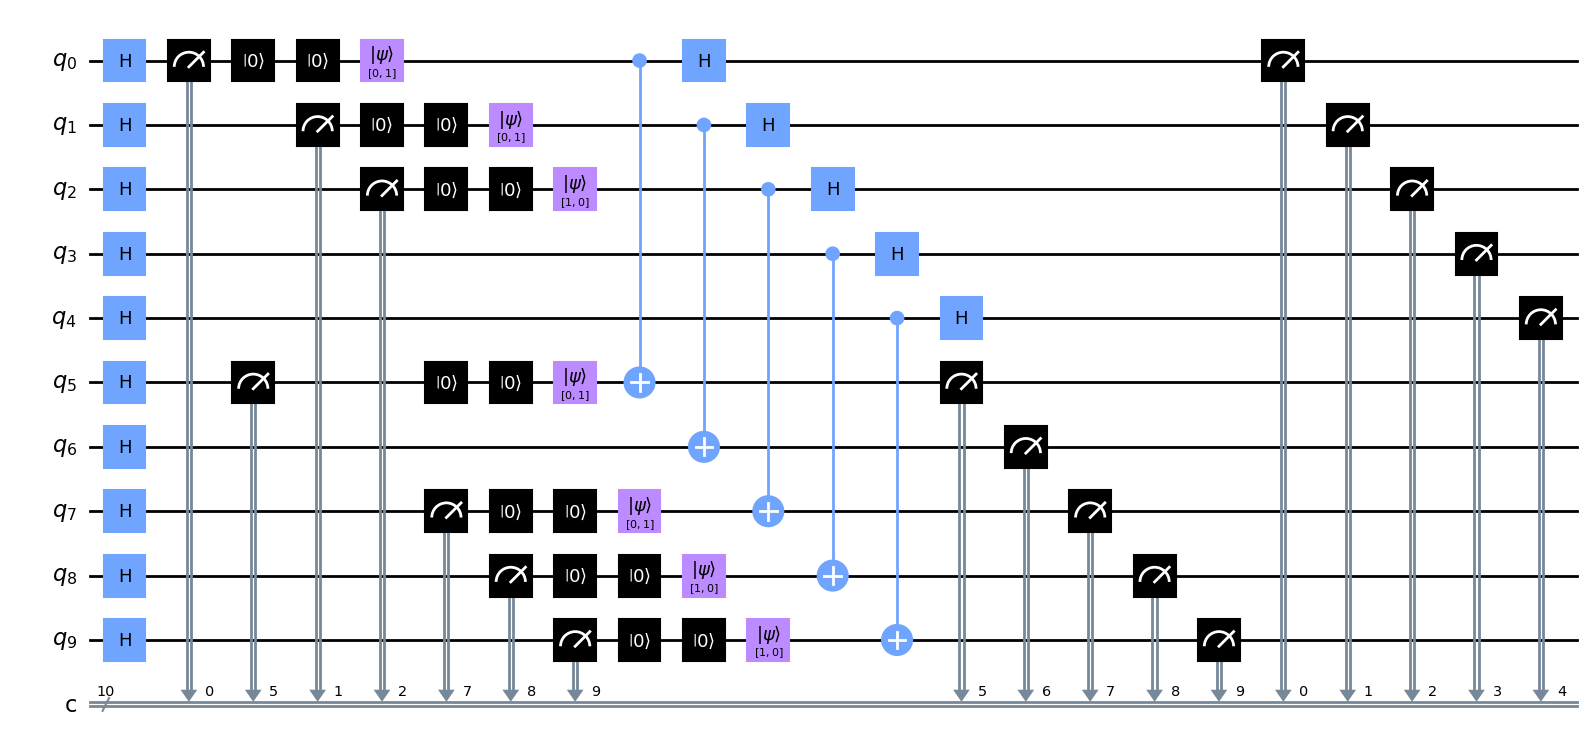

Progress: 1/2 simulations completed, Ctrl: 0, SIFT: 1.0


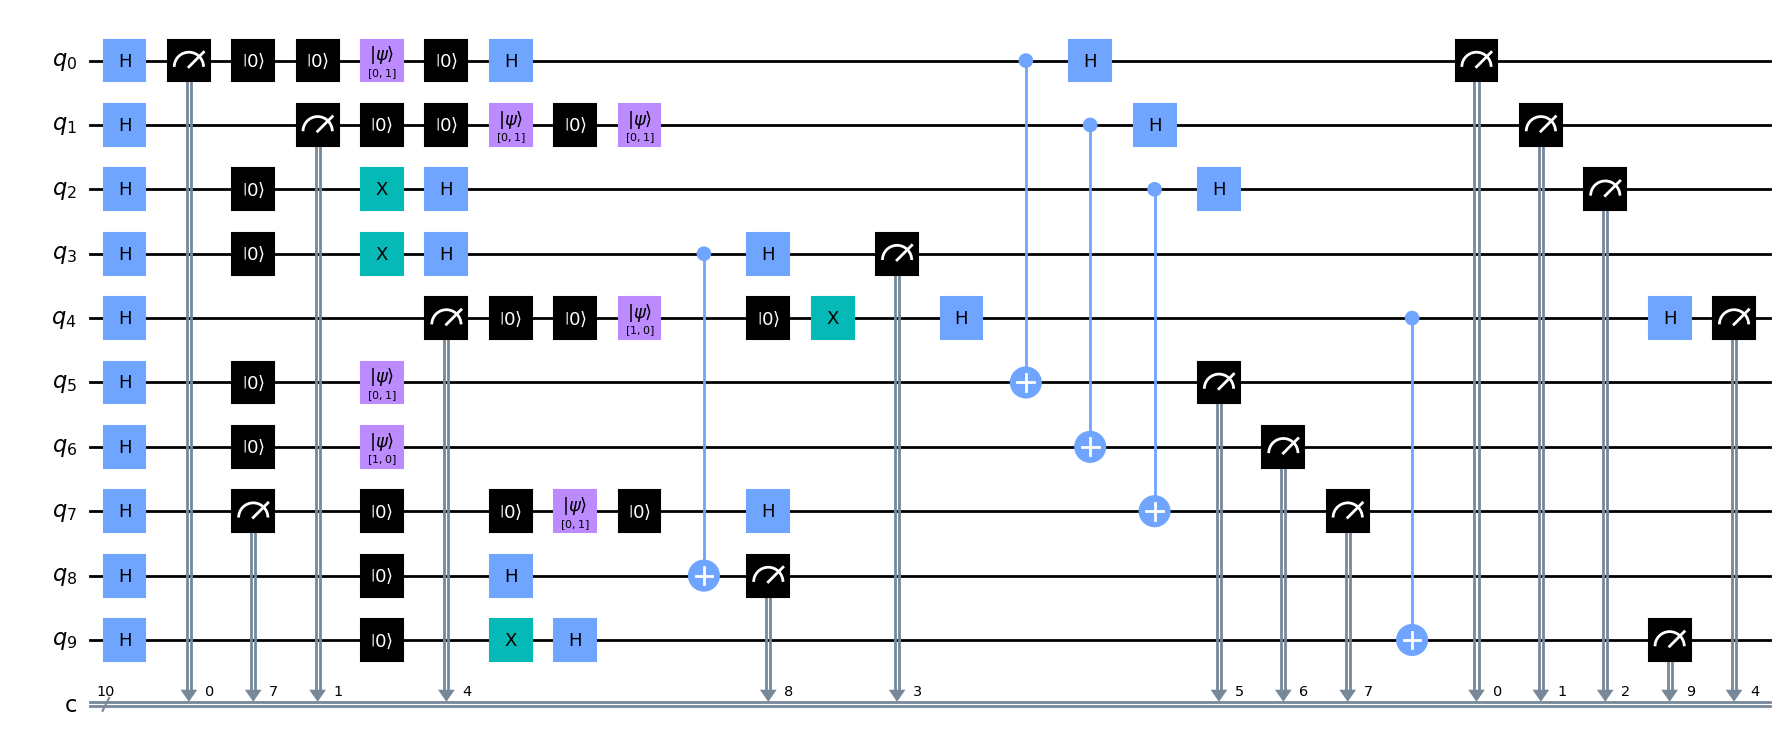

Progress: 2/2 simulations completed, Ctrl: 32, SIFT: 0


In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import numpy as np
import csv

def prepare_initial_state(qc, qubit):
    qc.h(qubit)  # Hadamard gate to prepare |+⟩ state
    
def prepare_sift_state(qc, qubit):
    qc.measure(qubit, qubit)
    qc.reset(qubit)
    choice = np.random.randint(2)  # Randomly choose among two different states
    if choice == 0:
        # Prepare |0⟩ state
        qc.reset(qubit)
        qc.initialize([1, 0], qubit)
    elif choice == 1:
        # Prepare |1⟩ state
        qc.reset(qubit)
        qc.initialize([0, 1], qubit)

def prepare_eve_state(qc, qubit):
    # Example of Eve's state preparation
    choice = np.random.randint(4)  # Randomly choose among four different states
    if choice == 0:
        # Prepare |0⟩ state
        qc.reset(qubit)
        qc.initialize([1, 0], qubit)
    elif choice == 1:
        # Prepare |1⟩ state
        qc.reset(qubit)
        qc.initialize([0, 1], qubit)
    elif choice == 2:
        # Prepare |+⟩ state
        qc.reset(qubit)
        qc.h(qubit)     
    elif choice == 3:
        # Prepare |-⟩ state
        qc.reset(qubit)
        qc.x(qubit)
        qc.h(qubit)

def create_msqkd_circuit(num_qubits, eavesdropper_present=False):
    qc = QuantumCircuit(num_qubits * 2, num_qubits * 2)  # 2 * num_qubits qubits and classical bits
    operations = []
    prepared_states = []

    # Step 1: TP prepares the initial states and sends to Alice and Bob
    for i in range(num_qubits):
        prepare_initial_state(qc, i)  # Prepare state for Alice
        prepare_initial_state(qc, num_qubits + i)  # Prepare state for Bob

    for i in range(num_qubits):
        # Step 2: Alice and Bob decide the operation (CTRL or SIFT)
        alice_operation = np.random.choice(['SIFT', 'CTRL'])
        bob_operation = np.random.choice(['SIFT', 'CTRL'])
        operations.append((alice_operation, bob_operation))

        if alice_operation == 'SIFT':
            prepare_sift_state(qc, i)  # Alice performs SIFT operation
        if bob_operation == 'SIFT':
            prepare_sift_state(qc, num_qubits + i)  # Bob performs SIFT operation

        # Eavesdropper actions
        if eavesdropper_present:
            prepare_eve_state(qc, i)  # Eve prepares a state on Alice's qubit
            prepare_eve_state(qc, num_qubits + i)  # Eve prepares a state on Bob's qubit

    # Step 4: TP performs a Bell state measurement on each pair of returned qubits
    for i in range(num_qubits):
        qc.cx(i, num_qubits + i)  # CNOT gate with Alice's qubit as control and Bob's qubit as target
        qc.h(i)  # Hadamard gate on Alice's qubit
        qc.measure([i, num_qubits + i], [i, num_qubits + i])  # Measure qubits in Z-basis

    return qc, operations

def run_simulation(num_qubits, noise_level_single, noise_level_two, eavesdropper_present=False):
    # Create noise model
    noise_model = NoiseModel()

    # Error models for single and two qubit gates
    error_single_qubit = depolarizing_error(noise_level_single, 1)
    error_two_qubit = depolarizing_error(noise_level_two, 2)

    noise_model.add_all_qubit_quantum_error(error_single_qubit, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_two_qubit, ['cx'])

    qc, operations = create_msqkd_circuit(num_qubits, eavesdropper_present)
    display(qc.draw(output='mpl', style ='Clifford', fold = 40))

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = qiskit.transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()

    # Step 5: Alice and Bob disclose operations and verify results
    alice_ops = [op[0] for op in operations]
    bob_ops = [op[1] for op in operations]

    # Step 6: Extract raw key from SIFT operations
    raw_key = []
    sift_correlation = 0
    total_sift_pairs = 0
    ctrl_discrepancies = 0
    total_ctrl_pairs = 0

    for key, count in counts.items():
        bits = [int(bit) for bit in key]
        for i in range(num_qubits):
            if alice_ops[i] == 'SIFT' and bob_ops[i] == 'SIFT':
                total_sift_pairs += 1
                expected_bell_state = f"{bits[i]}{bits[num_qubits + i]}"
                actual_bell_state = f"{key[i]}{key[num_qubits + i]}"
                if expected_bell_state == actual_bell_state:
                    raw_key.append(bits[i])
                    sift_correlation += 1

            elif alice_ops[i] == 'CTRL' and bob_ops[i] == 'CTRL':
                total_ctrl_pairs += 1
                actual_bell_state = f"{key[i]}{key[num_qubits + i]}"
                if actual_bell_state not in ['00', '11']:  # Valid Bell states for CTRL are |ϕ+⟩ or |ψ+⟩
                    ctrl_discrepancies += 1

    sift_correlation_rate = sift_correlation / total_sift_pairs if total_sift_pairs > 0 else 0
    eavesdropper_detected = (ctrl_discrepancies > 0) or (sift_correlation_rate < 0.75)  # 75% threshold

    # Step 7: Perform error correction and privacy amplification (placeholder)
    # In practice, more complex techniques would be used here.
    final_key = raw_key  # For simplicity, we use the raw key as the final key

    key_generation_rate = len(raw_key) / num_qubits
    final_key_length = len(final_key)

    print(f"Progress: {current_simulation}/{total_simulations} simulations completed, Ctrl: {ctrl_discrepancies}, SIFT: {sift_correlation_rate}")

    return {
        "Num_Qubits": num_qubits,
        "Noise_Level_Single": noise_level_single,
        "Noise_Level_Two": noise_level_two,
        "Eavesdropper_Present": eavesdropper_present,
        "Key_Generation_Rate": key_generation_rate,
        "Final_Key_Length": final_key_length,
        "Eavesdropper_Detected": eavesdropper_detected
    }

# Run the simulation for different parameters and save the results to CSV
num_runs = 1
num_qubits_list = [5]
noise_levels_single = [0]  # Noise levels for single-qubit gates
noise_levels_two = [0]  # Noise levels for two-qubit gates

with open('msqkd_sim_results.csv', 'w', newline='') as csvfile:
    fieldnames = ["Num_Qubits", "Noise_Level_Single", "Noise_Level_Two", "Eavesdropper_Present", "Key_Generation_Rate", "Final_Key_Length", "Eavesdropper_Detected"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    total_simulations = num_runs * len(num_qubits_list) * len(noise_levels_single) * len(noise_levels_two) * 2  # Including eavesdropper and no eavesdropper cases
    current_simulation = 0

    for num_qubits in num_qubits_list:
        for noise_level_single in noise_levels_single:
            for noise_level_two in noise_levels_two:
                for run in range(num_runs):
                    for eavesdropper_present in [False, True]:
                        current_simulation += 1
                        result = run_simulation(num_qubits, noise_level_single, noise_level_two, eavesdropper_present)
                        writer.writerow(result)